# Setup

In [121]:
# Add parent directory to current path. Needed for research imports.
import os.path
import sys
p = os.path.abspath('../..')
if p not in sys.path:
    sys.path.insert(0,p)

# Enable hot reloading
%load_ext autoreload
%autoreload 2


import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from experiments.irl.datasets import *
from experiments.irl.experiment_utils import *
from research.irl.fair_irl import *
from research.utils import *


logging.basicConfig(level=logging.INFO)
warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

from IPython.display import display, HTML
display(HTML("<style>.container { width:1800px !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Run experiments

In [122]:
base_exp_info = {
    'EXPERIMENT_NAME': 'thesis_7',
    
    'FEAT_EXP_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
#         'FPRPar',
#         'TNRPar',
#         'FNRPar',
#         'TPR_Z0',
#         'TPR_Z1',
#         'TNR_Z0',
#         'TNR_Z1',
#         'FPR_Z0',
#         'FPR_Z1',
#         'FNR_Z0',
#         'FNR_Z1',
    ],
    'PERF_MEAS_OBJECTIVE_NAMES': [
        'Acc',
        'DemPar',
        'EqOpp',
    ],
    
    # Expert demo parameters
    'DATASET': 'Boston',
    'TARGET_DATASET': 'COMPAS',
    'N_EXPERT_DEMOS': 3,
    'EXPERT_ALGO': None,
    'N_DATASET_SAMPLES': 20_000,
    'MIN_FREQ_FILL_PCT': .05,
    'RESTRICT_Y_ACTION': True,
    # IRL Loop parameters
    'IRL_METHOD': None,
    'METHOD': 'highs',
    # Plotting parameters
    'NOISE_FACTOR': .02,
    'ANNOTATE': True,
    'N_INIT_POLICIES': 3,
    'NON_EXPERT_ALGOS': [
        'OptAccNoisy',
        'HardtDemParNoisy',
        'HardtEqOppNoisy',
#             'Dummy',
#         'DummyNoisy',
    ],
}

In [123]:
base_exp_info['N_TRIALS'] = 24
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .06
base_exp_info['EPSILON'] = .015
base_exp_info['IGNORE_RESULTS_EPSILON'] = np.infty
# base_exp_info['IGNORE_RESULTS_EPSILON'] = .05
base_exp_info['MAX_ITER'] = 15
base_exp_info['ALLOW_NEG_WEIGHTS'] = False
base_exp_info['DOT_WEIGHTS_FEAT_EXP'] = True
base_exp_info['IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS'] = False
base_exp_info['IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS'] = False

In [124]:
experiments = [
    
    {
        'EXPERT_ALGO': 'OptAcc',
        'IRL_METHOD': 'FairIRL',
    },
    {
        'EXPERT_ALGO': 'HardtDemPar',
        'IRL_METHOD': 'FairIRL',
    },
    {
        'EXPERT_ALGO': 'HardtEqOpp',
        'IRL_METHOD': 'FairIRL',
    },
    
    {
        'EXPERT_ALGO': 'OptAcc',
        'IRL_METHOD': 'FairIRLFO',
    },
    {
        'EXPERT_ALGO': 'HardtDemPar',
        'IRL_METHOD': 'FairIRLFO',
    },
    {
        'EXPERT_ALGO': 'HardtEqOpp',
        'IRL_METHOD': 'FairIRLFO',
    },
]

In [125]:
# for exp_i, experiment in enumerate(experiments):
#     logging.info('\n\n')
#     logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
#     exp_info = dict(base_exp_info)
    
#     for k in experiment:
#         exp_info[k] = experiment[k]
        
#     run_experiment(exp_info)

In [126]:
exp_info = dict(base_exp_info)

In [127]:
source_X, source_y, source_feature_types = generate_dataset(
    exp_info['DATASET'],
    n_samples=exp_info['N_DATASET_SAMPLES'],
)
    
target_X, target_y, target_feature_types = generate_dataset(
    exp_info['TARGET_DATASET'],
    n_samples=exp_info['N_DATASET_SAMPLES'],
)

for f in source_feature_types['categoric']:
    source_X[f] = source_X[f].astype(str)
    
for f in target_feature_types['categoric']:
    target_X[f] = target_X[f].astype(str)

for exp_i, experiment in enumerate(experiments):
    logging.info('\n\n')
    logging.info(f"EXPERIMENT {exp_i+1}/{len(experiments)}")
    
    exp_info = dict(base_exp_info)
    
    for k in experiment:
        exp_info[k] = experiment[k]
        
    run_experiment(
        exp_info,
        source_X=source_X,
        source_y=source_y,
        source_feature_types=source_feature_types,
        target_X=target_X,
        target_y=target_y,
        target_feature_types=target_feature_types,
    )

INFO:root:


INFO:root:EXPERIMENT 1/6
INFO:root:exp_info: {'EXPERIMENT_NAME': 'thesis_7', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'Boston', 'TARGET_DATASET': 'COMPAS', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'OptAcc', 'N_DATASET_SAMPLES': 20000, 'MIN_FREQ_FILL_PCT': 0.05, 'RESTRICT_Y_ACTION': True, 'IRL_METHOD': 'FairIRL', 'METHOD': 'highs', 'NOISE_FACTOR': 0.02, 'ANNOTATE': True, 'N_INIT_POLICIES': 3, 'NON_EXPERT_ALGOS': ['OptAccNoisy', 'HardtDemParNoisy', 'HardtEqOppNoisy'], 'N_TRIALS': 24, 'EPSILON': 0.015, 'IGNORE_RESULTS_EPSILON': inf, 'MAX_ITER': 15, 'ALLOW_NEG_WEIGHTS': False, 'DOT_WEIGHTS_FEAT_EXP': True, 'IRL_ERROR_ENCOURAGE_EVEN_WEIGHTS': False, 'IRL_ERROR_ENCOURAGE_UNEVEN_WEIGHTS': False}
INFO:root:

TRIAL 0

INFO:root:muE:
[[0.85219512 0.72886565 0.78387701]
 [0.85658537 0.72283241 0.7410902 ]
 [0.83268293 0.68870736 0.66845507]]
INFO:root:muE_hold:
[[0.85170732 0.74232952 0.78369565]
 [0.848780

Acc    DemPar     EqOpp
0  0.852195  0.728866  0.783877
1  0.856585  0.722832  0.741090
2  0.832683  0.688707  0.668455
8  0.838374  0.837162  0.906464
5  0.730542  0.880651  0.970231

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [0.816 0.572 0.166]
INFO:root:		 Best mu_delta[3] 	= [ 0.009 -0.124 -0.175]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.009 -0.123 -0.197]
INFO:root:		 t[3] 		= 0.03675
INFO:root:		 t_hold[i] 	= 0.03978
INFO:root:		 weights[3] 	= [ 0.663  0.166 -0.171]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.848 0.701 0.707]
INFO:root:		 Best mu_delta[4] 	= [-0.001  0.013  0.025]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.001  0.009  0.021]
INFO:root:		 t[4] 		= 0.00081
INFO:root:		 t_hold[i] 	= 0.00097
INFO:root:		 weights[4] 	= [ 0.999  0.001 -0.   ]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.334
INFO:root:best weight:	 [ 0.999  0.001 -0.   ]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.852   0.729  0.784          1         0.000         0.000   
1   0.857   0.723  0.741          1         0.000         0.000   
2   0.833   0.689  0.668          1         0.000         0.000   
3   0.834   0.708  0.764          0         0.000         0.000   
4   0.727   0.996  0.966          0         0.000         0.000   
5   0.731   0.881  0.970          0         0.000         0.000   
6   0.838   0.837  0.906          0         0.838         0.846   
7   0.838   0.837  0.906          0         0.838         0.846   
8   0.838   0.837  0.906          0         0.838         0.846   
9   0.816   0.572  0.166          0         0.838         0.824   
10  0.848   0.701  0.707          0         0.848         0.857   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.846            0.837            0.839                 0.839   
7               0.846            0.837            0.839                 0.839   
8               0.846            0.837            0.839                 0.839   
9               0.846            0.837            0.583                 0.839   
10              0.857            0.701            0.706                 0.706   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.906           0.940                0.940   
7            0.906           0.940                0.940   
8            0.906           0.940                0.940   
9            0.906           0.172                0.940   
10           0.707           0.722                0.722   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                    0.000                      0.000   
1                    0.000                      0.000   
2                    0.000                      0.000   
3                    0.000                      0.000   
4                    0.000                      0.000   
5                    0.000                      0.000   
6                    0.846                      0.839   
7                    0.846                      0.839   
8                    0.846                      0.839   
9                    0.846                      0.839   
10                   0.857                      0.706   

    muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                      0.000             0.0       -1.0       0.000   
1                      0.000             0.0       -1.0       0.000   
2                      0.000             0.0       -1.0       0.000   
3                      0.000             1.0        0.0       0.000   
4                      0.000             1.0        1.0       0.000   
5                      0.000             1.0        2.0       0.000   
6                      0.940             0.0        3.0       0.606   
7                      0.940             0.0        4.0       0.801   
8                      0.940             0.0        5.0       0.801   
9                      0.940             0.0        6.0       0.663   
10                     0.722             0.0        7

INFO:root:muE_target:
[[0.6399177  0.76001793 0.77376485]
 [0.6138546  0.74535525 0.71263736]
 [0.6255144  0.58916155 0.58147212]]
INFO:root:muE_perf_target:
[[0.6399177  0.76412471 0.77889306]
 [0.61042524 0.74296729 0.70915751]
 [0.62345679 0.60245399 0.59750419]]
INFO:root:target domain muL = [0.643 0.733 0.743]
INFO:root:target domain muE = [0.626 0.698 0.689]
INFO:root:target domain muL_hold = [0.63  0.747 0.76 ]
INFO:root:target domain muL_perf_hold = [0.63  0.747 0.76 ]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.83902439 0.69492619 0.69218538]
 [0.86780488 0.74361641 0.82575167]
 [0.85707317 0.68016484 0.70325855]]
INFO:root:muE_hold:
[[0.8195122  0.77605971 0.79084967]
 [0.85073171 0.7515672  0.85305106]
 [0.84097561 0.81301504 0.84642994]]
INFO:root:muE_perf_hold:
[[0.8195122  0.77605971 0.79084967]
 [0.85170732 0.83185917 0.95977043]
 [0.84097561 0.81301504 0.84642994]]
INFO:root:muL:
[[0.84137931 0.74789529 0.77103333]
 [0.72463054 0.95558225 0.83417738]
 [0.72561576 0.87919681

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.839   0.695  0.692          1         0.000         0.000   
1  0.868   0.744  0.826          1         0.000         0.000   
2  0.857   0.680  0.703          1         0.000         0.000   
3  0.841   0.748  0.771          0         0.000         0.000   
4  0.725   0.956  0.834          0         0.000         0.000   
5  0.726   0.879  0.956          0         0.000         0.000   
6  0.539   0.074  0.361          0         0.539         0.529   
7  0.855   0.701  0.732          0         0.855         0.837   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.529            0.074            0.078                 0.078   
7              0.837            0.701            0.723                 0.723   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.361           0.320                0.320   
7           0.732           0.752                0.752   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.529                      0.078   
7                   0.837                      0.723   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.320             0.0        3.0       0.365   
7                     0.752             0.0        4.0       1.000   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6         -0.523         0.112  0.353   0.388              0.0   
7          0.000         0.000  0.001   0.000              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0

INFO:root:muE_target:
[[0.61796982 0.79083589 0.82753184]
 [0.64060357 0.63320846 0.66692828]
 [0.61796982 0.73474979 0.78302125]]
INFO:root:muE_perf_target:
[[0.62482853 0.74220348 0.77504773]
 [0.64060357 0.63212072 0.66978664]
 [0.61659808 0.74395294 0.7993976 ]]
INFO:root:target domain muL = [0.643 0.686 0.724]
INFO:root:target domain muE = [0.626 0.72  0.759]
INFO:root:target domain muL_hold = [0.627 0.719 0.702]
INFO:root:target domain muL_perf_hold = [0.627 0.719 0.702]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.84585366 0.74115203 0.77374224]
 [0.84243902 0.68536678 0.67945773]
 [0.83756098 0.71335391 0.6635767 ]]
INFO:root:muE_hold:
[[0.85268293 0.6510989  0.6470964 ]
 [0.85463415 0.72310771 0.79166667]
 [0.82439024 0.73206897 0.76042947]]
INFO:root:muE_perf_hold:
[[0.85268293 0.6510989  0.6470964 ]
 [0.85463415 0.72310771 0.79166667]
 [0.82439024 0.73206897 0.76042947]]
INFO:root:muL:
[[0.85320197 0.70317398 0.75761991]
 [0.71871921 0.97323535 0.98187061]
 [0.74433498 0.85803253

Acc    DemPar     EqOpp
0  0.845854  0.741152  0.773742
1  0.842439  0.685367  0.679458
2  0.837561  0.713354  0.663577
7  0.833496  0.853208  0.930924
4  0.718719  0.973235  0.981871

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [0.674 0.992 0.241]
INFO:root:		 Best mu_delta[2] 	= [ 0.008 -0.14  -0.225]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.008 -0.136 -0.205]
INFO:root:		 t[2] 		= 0.09237
INFO:root:		 t_hold[i] 	= 0.08569
INFO:root:		 weights[2] 	= [ 0.305  0.346 -0.349]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [0.833 0.853 0.931]
INFO:root:		 Best mu_delta[3] 	= [ 0.008 -0.14  -0.225]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.008 -0.136 -0.205]
INFO:root:		 t[3] 		= 0.03529
INFO:root:		 t_hold[i] 	= 0.03434
INFO:root:		 weights[3] 	= [0.752 0.248 0.   ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.833 0.853 0.931]
INFO:root:		 Best mu_delta[4] 	= [ 0.008 -0.14  -0.225]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.008 -0.136 -0.205]
INFO:root:		 t[4] 		= 0.02851
INFO:root:		 t_hold[i] 	= 0.02774
INFO:root:		 weights[4] 	= [0.802 0.198 0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.833 0.

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.846   0.741  0.774          1         0.000         0.000   
1   0.842   0.685  0.679          1         0.000         0.000   
2   0.838   0.713  0.664          1         0.000         0.000   
3   0.853   0.703  0.758          0         0.000         0.000   
4   0.719   0.973  0.982          0         0.000         0.000   
5   0.744   0.858  0.973          0         0.000         0.000   
6   0.833   0.853  0.931          0         0.833         0.836   
7   0.833   0.853  0.931          0         0.833         0.836   
8   0.674   0.992  0.241          0         0.833         0.679   
9   0.833   0.853  0.931          0         0.833         0.836   
10  0.833   0.853  0.931          0         0.833         0.836   
11  0.833   0.853  0.931          0         0.833         0.836   
12  0.833   0.853  0.931          0         0.833         0.836   
13  0.833   0.853  0.931          0         0.833         0.836   
14  0.833   0.853  0.931          0         0.833         0.836   
15  0.833   0.853  0.931          0         0.833         0.836   
16  0.833   0.853  0.931          0         0.833         0.836   
17  0.833   0.853  0.931          0         0.833         0.836   
18  0.838   0.828  0.906          0         0.838         0.839   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.836            0.853            0.838                 0.838   
7               0.836            0.853            0.838                 0.838   
8               0.836            0.853            0.977                 0.838   
9               0.836            0.853            0.838                 0.838   
10              0.836            0.853            0.838                 0.838   
11              0.836            0.853            0.838                 0.838   
12              0.836            0.853            0.838                 0.838   
13              0.836            0.853            0.838                 0.838   
14              0.836            0.853            0.838                 0.838   
15              0.836            0.853            0.838                 0.838   
16              0.836            0.853            0.838                 0.838   
17              0.836            0.853            0.838                 0.838   
18              0.839            0.828            0.811                 0.811   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.931           0.938                0.938   
7            0.931           0.938                0.938   
8            0.931           0.250                0.938   
9            0.931           0.938                0.938   
10           0.931           0.938                0.938   
11           0.931           0.938                0.938   
12           0.931           0.938                0.938   
13           0.931           0.938                0.938   
14           0.931           0.938                0.938   
15           0.931           0.938                0.938   
16           0.931           0.938       

INFO:root:muE_target:
[[0.61796982 0.823795   0.8301799 ]
 [0.62345679 0.66518978 0.70502462]
 [0.60219479 0.69886726 0.713252  ]]
INFO:root:muE_perf_target:
[[0.61248285 0.85048135 0.8608871 ]
 [0.62414266 0.69570599 0.73809499]
 [0.60288066 0.70322595 0.72083072]]
INFO:root:target domain muL = [0.626 0.987 0.972]
INFO:root:target domain muE = [0.615 0.729 0.749]
INFO:root:target domain muL_hold = [0.617 0.983 0.983]
INFO:root:target domain muL_perf_hold = [0.617 0.983 0.983]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.84731707 0.67278039 0.68920188]
 [0.84292683 0.68601408 0.71670435]
 [0.84878049 0.72584796 0.75932101]]
INFO:root:muE_hold:
[[0.85268293 0.76649346 0.77088707]
 [0.84195122 0.68516484 0.69537863]
 [0.85268293 0.7330427  0.7976793 ]]
INFO:root:muE_perf_hold:
[[0.85268293 0.76649346 0.77088707]
 [0.84195122 0.68516484 0.69537863]
 [0.85268293 0.7330427  0.7976793 ]]
INFO:root:muL:
[[0.83743842 0.69684384 0.64532993]
 [0.73152709 0.97700755 0.87378018]
 [0.73300493 0.83724746

Acc    DemPar     EqOpp
0  0.847317  0.672780  0.689202
1  0.842927  0.686014  0.716704
2  0.848780  0.725848  0.759321
3  0.837438  0.696844  0.645330
4  0.731527  0.977008  0.873780

INFO:root:		 muL[3] = [0.822 0.88  0.984]
INFO:root:		 Best mu_delta[3] 	= [ 0.025 -0.186 -0.262]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.03  -0.181 -0.2  ]
INFO:root:		 t[3] 		= 0.22995
INFO:root:		 t_hold[i] 	= 0.17529
INFO:root:		 weights[3] 	= [0.122 0.    0.878]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.822 0.88  0.984]
INFO:root:		 Best mu_delta[4] 	= [ 0.025 -0.186 -0.262]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.03  -0.181 -0.2  ]
INFO:root:		 t[4] 		= 0.21332
INFO:root:		 t_hold[i] 	= 0.16266
INFO:root:		 weights[4] 	= [ 0.186 -0.     0.814]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.822 0.88  0.984]
INFO:root:		 Best mu_delta[5] 	= [ 0.025 -0.186 -0.262]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.03  -0.181 -0.2  ]
INFO:root:		 t[5] 		= 0.21332
INFO:root:		 t_hold[i] 	= 0.16266
INFO:root:		 weights[5] 	= [ 0.186 -0.     0.814]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 ran

Acc    DemPar     EqOpp
0  0.847317  0.672780  0.689202
1  0.842927  0.686014  0.716704
2  0.848780  0.725848  0.759321
8  0.821789  0.880390  0.983703
7  0.821789  0.880390  0.983703

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [0.555 0.339 0.992]
INFO:root:		 Best mu_delta[6] 	= [ 0.025 -0.186 -0.262]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.03  -0.181 -0.2  ]
INFO:root:		 t[6] 		= 0.10820
INFO:root:		 t_hold[i] 	= 0.09727
INFO:root:		 weights[6] 	= [ 0.288 -0.453  0.259]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.822 0.88  0.984]
INFO:root:		 Best mu_delta[7] 	= [ 0.025 -0.186 -0.262]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.03  -0.181 -0.2  ]
INFO:root:		 t[7] 		= 0.06500
INFO:root:		 t_hold[i] 	= 0.05264
INFO:root:		 weights[7] 	= [0.762 0.    0.238]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.822 0.88  0.984]
INFO:root:		 Best mu_delta[8] 	= [ 0.025 -0.186 -0.262]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.03  -0.181 -0.2  ]
INFO:root:		 t[8] 		= 0.06501
INFO:root:		 t_hold[i] 	= 0.05265
INFO:root:		 weights[8] 	= [0.762 0.    0.238]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO

Acc    DemPar     EqOpp
0   0.847317  0.672780  0.689202
1   0.842927  0.686014  0.716704
2   0.848780  0.725848  0.759321
12  0.554634  0.339430  0.991739
5   0.733005  0.837247  0.808108

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [0.837 0.662 0.72 ]
INFO:root:		 Best mu_delta[9] 	= [0.009 0.033 0.002]
INFO:root:		 Best mu_delta_hold[i] 	= [0.009 0.035 0.034]
INFO:root:		 t[9] 		= 0.01034
INFO:root:		 t_hold[i] 	= 0.01220
INFO:root:		 weights[9] 	= [ 0.554 -0.272  0.174]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.844 0.78  0.856]
INFO:root:		 Best mu_delta[9] 	= [ 0.002 -0.085 -0.135]
INFO:root:		 Best mu_delta_hold[i] 	= [0.009 0.035 0.034]
INFO:root:		 t[9] 		= 0.01034
INFO:root:		 t_hold[i] 	= 0.01220
INFO:root:		 weights[9] 	= [ 0.554 -0.272  0.174]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.294
INFO:root:best weight:	 [0.943 0.022 0.035]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.847   0.673  0.689          1         0.000         0.000   
1   0.843   0.686  0.717          1         0.000         0.000   
2   0.849   0.726  0.759          1         0.000         0.000   
3   0.837   0.697  0.645          0         0.000         0.000   
4   0.732   0.977  0.874          0         0.000         0.000   
5   0.733   0.837  0.808          0         0.000         0.000   
6   0.822   0.880  0.984          0         0.822         0.819   
7   0.822   0.880  0.984          0         0.822         0.819   
8   0.822   0.880  0.984          0         0.822         0.819   
9   0.822   0.880  0.984          0         0.822         0.819   
10  0.822   0.880  0.984          0         0.822         0.819   
11  0.822   0.880  0.984          0         0.822         0.819   
12  0.555   0.339  0.992          0         0.822         0.561   
13  0.822   0.880  0.984          0         0.822         0.819   
14  0.822   0.880  0.984          0         0.822         0.819   
15  0.837   0.662  0.720          0         0.837         0.840   
16  0.844   0.780  0.856          0         0.844         0.842   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.819            0.880            0.909                 0.909   
7               0.819            0.880            0.909                 0.909   
8               0.819            0.880            0.909                 0.909   
9               0.819            0.880            0.909                 0.909   
10              0.819            0.880            0.909                 0.909   
11              0.819            0.880            0.909                 0.909   
12              0.819            0.880            0.356                 0.909   
13              0.819            0.880            0.909                 0.909   
14              0.819            0.880            0.909                 0.909   
15              0.840            0.662            0.693                 0.693   
16              0.842            0.780            0.814                 0.814   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.984           0.954                0.954   
7            0.984           0.954                0.954   
8            0.984           0.954                0.954   
9            0.984           0.954                0.954   
10           0.984           0.954                0.954   
11           0.984           0.954                0.954   
12           0.984           0.941                0.954   
13           0.984           0.954                0.954   
14           0.984           0.954                0.954   
15           0.720           0.721                0.721   
16           0.856           0.875                0.875   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                    0.000                      0.000   
1                    0.000                      0.000   
2                    0.000                      0.000   
3                    0.000                      0

INFO:root:muE_target:
[[0.63237311 0.74727629 0.80116942]
 [0.62277092 0.8274755  0.82798664]
 [0.65294925 0.73453878 0.76741843]]
INFO:root:muE_perf_target:
[[0.62620027 0.75240976 0.81539706]
 [0.62208505 0.81898378 0.80866297]
 [0.65294925 0.73453878 0.76741843]]
INFO:root:target domain muL = [0.639 0.978 0.968]
INFO:root:target domain muE = [0.636 0.77  0.799]
INFO:root:target domain muL_hold = [0.621 0.983 0.982]
INFO:root:target domain muL_perf_hold = [0.621 0.983 0.982]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.86780488 0.7001199  0.75076659]
 [0.84682927 0.6881136  0.71865146]
 [0.85170732 0.70534033 0.67523635]]
INFO:root:muE_hold:
[[0.83414634 0.79264454 0.81744318]
 [0.82536585 0.78784075 0.90039125]
 [0.85268293 0.74582884 0.77018634]]
INFO:root:muE_perf_hold:
[[0.83414634 0.79264454 0.81744318]
 [0.82536585 0.78784075 0.90039125]
 [0.85268293 0.74582884 0.77018634]]
INFO:root:muL:
[[0.84137931 0.7011463  0.77178899]
 [0.70788177 0.99485249 0.95101732]
 [0.74187192 0.87646841

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.868   0.700  0.751          1         0.000         0.000   
1  0.847   0.688  0.719          1         0.000         0.000   
2  0.852   0.705  0.675          1         0.000         0.000   
3  0.841   0.701  0.772          0         0.000         0.000   
4  0.708   0.995  0.951          0         0.000         0.000   
5  0.742   0.876  0.892          0         0.000         0.000   
6  0.783   0.447  0.075          0         0.783         0.777   
7  0.840   0.833  0.913          0         0.840         0.831   
8  0.844   0.813  0.892          0         0.844         0.835   
9  0.847   0.792  0.864          0         0.847         0.837   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.777            0.447            0.436                 0.436   
7              0.831            0.833            0.850                 0.850   
8              0.835            0.813            0.822                 0.822   
9              0.837            0.792            0.803                 0.803   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.075           0.067                0.067   
7           0.913           0.950                0.950   
8           0.892           0.916                0.916   
9           0.864           0.882                0.882   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.777                      0.436   
7                   0.831                      0.850   
8                   0.835                      0.822   
9                   0.837                      0.803   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.067             0.0        3.0       0.545   
7                     0.950             0.0        4.0       0.607   
8                     0.916             0.0        5.0       0.871   
9                     0.882             0.0        6.0       0.900   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf   

INFO:root:muE_target:
[[0.61111111 0.7178266  0.6945196 ]
 [0.61454047 0.86529068 0.84044299]
 [0.60631001 0.88923824 0.91763736]]
INFO:root:muE_perf_target:
[[0.60768176 0.72290274 0.70464106]
 [0.61934156 0.81396044 0.7973749 ]
 [0.60768176 0.90476738 0.94448272]]
INFO:root:target domain muL = [0.636 1.    0.972]
INFO:root:target domain muE = [0.611 0.824 0.818]
INFO:root:target domain muL_hold = [0.61  0.968 0.928]
INFO:root:target domain muL_perf_hold = [0.61  0.968 0.928]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.84292683 0.79944826 0.85300068]
 [0.84780488 0.68554945 0.75102862]
 [0.85268293 0.695797   0.66007533]]
INFO:root:muE_hold:
[[0.82536585 0.69821822 0.7       ]
 [0.83902439 0.67669173 0.66054118]
 [0.85853659 0.71683241 0.62998969]]
INFO:root:muE_perf_hold:
[[0.82536585 0.69821822 0.7       ]
 [0.83902439 0.67669173 0.66054118]
 [0.85853659 0.71683241 0.62998969]]
INFO:root:muL:
[[0.84334975 0.76729633 0.83515619]
 [0.71231527 0.98304202 0.95849057]
 [0.73448276 0.86754423

Acc    DemPar     EqOpp
0   0.842927  0.799448  0.853001
1   0.847805  0.685549  0.751029
2   0.852683  0.695797  0.660075
10  0.841301  0.835672  0.913329
11  0.841301  0.835672  0.913329

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [0.684 0.979 0.249]
INFO:root:		 Best mu_delta[6] 	= [ 0.007 -0.109 -0.159]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.008 -0.133 -0.22 ]
INFO:root:		 t[6] 		= 0.06496
INFO:root:		 t_hold[i] 	= 0.08618
INFO:root:		 weights[6] 	= [ 0.311  0.365 -0.324]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.841 0.836 0.913]
INFO:root:		 Best mu_delta[7] 	= [ 0.007 -0.109 -0.159]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.008 -0.133 -0.22 ]
INFO:root:		 t[7] 		= 0.02443
INFO:root:		 t_hold[i] 	= 0.02989
INFO:root:		 weights[7] 	= [0.78 0.22 0.  ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.841 0.836 0.913]
INFO:root:		 Best mu_delta[8] 	= [ 0.007 -0.109 -0.159]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.008 -0.133 -0.22 ]
INFO:root:		 t[8] 		= 0.01889
INFO:root:		 t_hold[i] 	= 0.02317
INFO:root:		 weights[8] 	= [0.834 0.166 0.   ]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.841 0.83

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.843   0.799  0.853          1         0.000         0.000   
1   0.848   0.686  0.751          1         0.000         0.000   
2   0.853   0.696  0.660          1         0.000         0.000   
3   0.843   0.767  0.835          0         0.000         0.000   
4   0.712   0.983  0.958          0         0.000         0.000   
5   0.734   0.868  0.990          0         0.000         0.000   
6   0.841   0.836  0.913          0         0.841         0.833   
7   0.841   0.836  0.913          0         0.841         0.833   
8   0.841   0.836  0.913          0         0.841         0.833   
9   0.841   0.836  0.913          0         0.841         0.833   
10  0.841   0.836  0.913          0         0.841         0.833   
11  0.841   0.836  0.913          0         0.841         0.833   
12  0.684   0.979  0.249          0         0.841         0.678   
13  0.841   0.836  0.913          0         0.841         0.833   
14  0.841   0.836  0.913          0         0.841         0.833   
15  0.841   0.836  0.913          0         0.841         0.833   
16  0.848   0.774  0.815          0         0.848         0.838   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.833            0.836            0.830                 0.830   
7               0.833            0.836            0.830                 0.830   
8               0.833            0.836            0.830                 0.830   
9               0.833            0.836            0.830                 0.830   
10              0.833            0.836            0.830                 0.830   
11              0.833            0.836            0.830                 0.830   
12              0.833            0.836            0.984                 0.830   
13              0.833            0.836            0.830                 0.830   
14              0.833            0.836            0.830                 0.830   
15              0.833            0.836            0.830                 0.830   
16              0.838            0.774            0.759                 0.759   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.913           0.883                0.883   
7            0.913           0.883                0.883   
8            0.913           0.883                0.883   
9            0.913           0.883                0.883   
10           0.913           0.883                0.883   
11           0.913           0.883                0.883   
12           0.913           0.254                0.883   
13           0.913           0.883                0.883   
14           0.913           0.883                0.883   
15           0.913           0.883                0.883   
16           0.815           0.756                0.756   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                    0.000                      0.000   
1                    0.000                      0.000   
2                    0.000                      0.000   
3                    0.000                      0

INFO:root:muE_target:
[[0.61796982 0.73236792 0.70608655]
 [0.62345679 0.69085543 0.65827603]
 [0.59465021 0.7951925  0.73664633]]
INFO:root:muE_perf_target:
[[0.62002743 0.68445202 0.65106801]
 [0.62277092 0.69812945 0.66024067]
 [0.59533608 0.76107493 0.70326836]]
INFO:root:target domain muL = [0.637 0.898 0.911]
INFO:root:target domain muE = [0.612 0.739 0.7  ]
INFO:root:target domain muL_hold = [0.628 0.898 0.924]
INFO:root:target domain muL_perf_hold = [0.628 0.898 0.924]
INFO:root:

TRIAL 6

INFO:root:muE:
[[0.84146341 0.70316831 0.69623444]
 [0.84829268 0.72188569 0.76839434]
 [0.84097561 0.70918255 0.70199247]]
INFO:root:muE_hold:
[[0.8497561  0.70574713 0.72910389]
 [0.84682927 0.76731333 0.85494505]
 [0.84097561 0.6674715  0.74097874]]
INFO:root:muE_perf_hold:
[[0.8497561  0.70574713 0.72910389]
 [0.84682927 0.76731333 0.85494505]
 [0.83902439 0.68651911 0.77272478]]
INFO:root:muL:
[[0.83842365 0.76042363 0.83242471]
 [0.74039409 0.97219541 0.93789869]
 [0.73546798 0.87586972

Acc    DemPar     EqOpp
0  0.841463  0.703168  0.696234
1  0.848293  0.721886  0.768394
2  0.840976  0.709183  0.701992
4  0.740394  0.972195  0.937899
8  0.839350  0.828693  0.919161

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [0.807 0.527 0.131]
INFO:root:		 Best mu_delta[3] 	= [ 0.004 -0.117 -0.197]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.015 -0.143 -0.207]
INFO:root:		 t[3] 		= 0.06434
INFO:root:		 t_hold[i] 	= 0.06848
INFO:root:		 weights[3] 	= [ 0.572  0.108 -0.32 ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.839 0.829 0.919]
INFO:root:		 Best mu_delta[4] 	= [ 0.004 -0.117 -0.197]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.015 -0.143 -0.207]
INFO:root:		 t[4] 		= 0.02616
INFO:root:		 t_hold[i] 	= 0.03013
INFO:root:		 weights[4] 	= [ 0.869 -0.     0.131]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.839 0.829 0.919]
INFO:root:		 Best mu_delta[5] 	= [ 0.004 -0.117 -0.197]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.015 -0.143 -0.207]
INFO:root:		 t[5] 		= 0.02619
INFO:root:		 t_hold[i] 	= 0.03016
INFO:root:		 weights[5] 	= [ 0.868 -0.     0.132]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...

Acc    DemPar     EqOpp
0   0.841463  0.703168  0.696234
1   0.848293  0.721886  0.768394
2   0.840976  0.709183  0.701992
11  0.839350  0.828693  0.919161
10  0.839350  0.828693  0.919161

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [0.671 0.305 0.534]
INFO:root:		 Best mu_delta[6] 	= [ 0.004 -0.117 -0.197]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.015 -0.143 -0.207]
INFO:root:		 t[6] 		= 0.04343
INFO:root:		 t_hold[i] 	= 0.05263
INFO:root:		 weights[6] 	= [ 0.573 -0.34   0.086]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.839 0.829 0.919]
INFO:root:		 Best mu_delta[7] 	= [ 0.004 -0.117 -0.197]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.015 -0.143 -0.207]
INFO:root:		 t[7] 		= 0.01815
INFO:root:		 t_hold[i] 	= 0.02306
INFO:root:		 weights[7] 	= [0.91 0.   0.09]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.839 0.829 0.919]
INFO:root:		 Best mu_delta[8] 	= [ 0.004 -0.117 -0.197]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.015 -0.143 -0.207]
INFO:root:		 t[8] 		= 0.01835
INFO:root:		 t_hold[i] 	= 0.02323
INFO:root:		 weights[8] 	= [ 0.909 -0.     0.091]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.839 0

Acc    DemPar     EqOpp
0  0.841463  0.703168  0.696234
1  0.848293  0.721886  0.768394
2  0.840976  0.709183  0.701992
7  0.839350  0.828693  0.919161
8  0.839350  0.828693  0.919161

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [0.814 0.57  0.605]
INFO:root:		 Best mu_delta[10] 	= [ 0.004 -0.117 -0.197]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.015 -0.143 -0.207]
INFO:root:		 t[10] 		= 0.03554
INFO:root:		 t_hold[i] 	= 0.04368
INFO:root:		 weights[10] 	= [ 0.653 -0.282  0.065]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [0.846 0.696 0.707]
INFO:root:		 Best mu_delta[11] 	= [-0.003  0.015  0.016]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0. -0.  0.]
INFO:root:		 t[11] 		= 0.00276
INFO:root:		 t_hold[i] 	= 0.00000
INFO:root:		 weights[11] 	= [1. 0. 0.]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.332
INFO:root:best weight:	 [1. 0. 0.]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.841   0.703  0.696          1         0.000         0.000   
1   0.848   0.722  0.768          1         0.000         0.000   
2   0.841   0.709  0.702          1         0.000         0.000   
3   0.838   0.760  0.832          0         0.000         0.000   
4   0.740   0.972  0.938          0         0.000         0.000   
5   0.735   0.876  0.979          0         0.000         0.000   
6   0.517   0.000  0.000          0         0.517         0.515   
7   0.839   0.829  0.919          0         0.839         0.831   
8   0.839   0.829  0.919          0         0.839         0.831   
9   0.807   0.527  0.131          0         0.839         0.802   
10  0.839   0.829  0.919          0         0.839         0.831   
11  0.839   0.829  0.919          0         0.839         0.831   
12  0.671   0.305  0.534          0         0.839         0.666   
13  0.839   0.829  0.919          0         0.839         0.831   
14  0.839   0.829  0.919          0         0.839         0.831   
15  0.839   0.829  0.919          0         0.839         0.831   
16  0.814   0.570  0.605          0         0.839         0.807   
17  0.846   0.696  0.707          0         0.846         0.846   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.515            0.000            0.000                 0.000   
7               0.831            0.829            0.857                 0.857   
8               0.831            0.829            0.857                 0.857   
9               0.831            0.829            0.516                 0.857   
10              0.831            0.829            0.857                 0.857   
11              0.831            0.829            0.857                 0.857   
12              0.831            0.829            0.310                 0.857   
13              0.831            0.829            0.857                 0.857   
14              0.831            0.829            0.857                 0.857   
15              0.831            0.829            0.857                 0.857   
16              0.831            0.829            0.564                 0.857   
17              0.846            0.696            0.714                 0.714   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.000           0.000                0.000   
7            0.919           0.982                0.982   
8            0.919           0.982                0.982   
9            0.919           0.134                0.982   
10           0.919           0.982                0.982   
11           0.919           0.982                0.982   
12           0.919           0.591                0.982   
13           0.919           0.982                0.982   
14           0.919           0.982                0.982   
15           0.919           0.982                0.982   
16           0.919           0.657                0.982   
17           0.707           0.775                0.775   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0            

INFO:root:muE_target:
[[0.61934156 0.75514019 0.76673568]
 [0.61728395 0.71993784 0.72500781]
 [0.65500686 0.84189998 0.85096249]]
INFO:root:muE_perf_target:
[[0.61796982 0.77349193 0.7826087 ]
 [0.61728395 0.71993784 0.72500781]
 [0.64883402 0.83895261 0.84108548]]
INFO:root:target domain muL = [0.647 0.731 0.74 ]
INFO:root:target domain muE = [0.631 0.772 0.781]
INFO:root:target domain muL_hold = [0.623 0.746 0.719]
INFO:root:target domain muL_perf_hold = [0.623 0.746 0.719]
INFO:root:

TRIAL 7

INFO:root:muE:
[[0.84195122 0.70312617 0.74168016]
 [0.84878049 0.68983781 0.71913729]
 [0.83268293 0.71152385 0.67959486]]
INFO:root:muE_hold:
[[0.8497561  0.75413458 0.77884615]
 [0.85853659 0.72107292 0.71603774]
 [0.83707317 0.80416667 0.91548764]]
INFO:root:muE_perf_hold:
[[0.8497561  0.75413458 0.77884615]
 [0.8595122  0.73796482 0.76603774]
 [0.83707317 0.80416667 0.91548764]]
INFO:root:muL:
[[0.84630542 0.72779901 0.75881722]
 [0.72906404 0.9907259  0.92050729]
 [0.74679803 0.8539992 

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.842   0.703  0.742          1         0.000         0.000   
1  0.849   0.690  0.719          1         0.000         0.000   
2  0.833   0.712  0.680          1         0.000         0.000   
3  0.846   0.728  0.759          0         0.000         0.000   
4  0.729   0.991  0.921          0         0.000         0.000   
5  0.747   0.854  0.952          0         0.000         0.000   
6  0.482   0.000  0.000          0         0.482         0.493   
7  0.842   0.698  0.710          0         0.842         0.855   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.493            0.000            0.000                 0.000   
7              0.855            0.698            0.723                 0.723   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.00           0.000                0.000   
1            0.00           0.000                0.000   
2            0.00           0.000                0.000   
3            0.00           0.000                0.000   
4            0.00           0.000                0.000   
5            0.00           0.000                0.000   
6            0.00           0.000                0.000   
7            0.71           0.744                0.744   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.493                      0.000   
7                   0.855                      0.723   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.000             0.0        3.0      -0.094   
7                     0.744             0.0        4.0       1.000   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6         -0.534        -0.371  0.460   0.505              0.0   
7         -0.000        -0.000  0.001   0.006              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0

INFO:root:muE_target:
[[0.60150892 0.74550093 0.76612622]
 [0.62962963 0.64327682 0.64260454]
 [0.64677641 0.75608074 0.77524801]]
INFO:root:muE_perf_target:
[[0.61522634 0.76374178 0.81244909]
 [0.63305898 0.62995715 0.62481797]
 [0.64677641 0.75608074 0.77524801]]
INFO:root:target domain muL = [0.65  0.731 0.748]
INFO:root:target domain muE = [0.626 0.715 0.728]
INFO:root:target domain muL_hold = [0.625 0.73  0.745]
INFO:root:target domain muL_perf_hold = [0.625 0.73  0.745]
INFO:root:

TRIAL 8

INFO:root:muE:
[[0.84926829 0.69294365 0.69492327]
 [0.84       0.74760736 0.70399858]
 [0.84341463 0.70658021 0.76844488]]
INFO:root:muE_hold:
[[0.85658537 0.69117647 0.72271089]
 [0.82926829 0.66113727 0.66943798]
 [0.85365854 0.66892911 0.7374552 ]]
INFO:root:muE_perf_hold:
[[0.85658537 0.69117647 0.72271089]
 [0.82926829 0.66113727 0.66943798]
 [0.85365854 0.66892911 0.7374552 ]]
INFO:root:muL:
[[0.83743842 0.70695762 0.70453131]
 [0.72413793 0.99670923 0.85201763]
 [0.7453202  0.86283082

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.849   0.693  0.695          1         0.000         0.000   
1   0.840   0.748  0.704          1         0.000         0.000   
2   0.843   0.707  0.768          1         0.000         0.000   
3   0.837   0.707  0.705          0         0.000         0.000   
4   0.724   0.997  0.852          0         0.000         0.000   
5   0.745   0.863  0.982          0         0.000         0.000   
6   0.838   0.848  0.930          0         0.838         0.828   
7   0.838   0.848  0.930          0         0.838         0.828   
8   0.838   0.848  0.930          0         0.838         0.828   
9   0.838   0.848  0.930          0         0.838         0.828   
10  0.838   0.848  0.930          0         0.838         0.828   
11  0.838   0.848  0.930          0         0.838         0.828   
12  0.838   0.848  0.930          0         0.838         0.828   
13  0.846   0.726  0.753          0         0.846         0.845   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.828            0.848            0.829                 0.829   
7               0.828            0.848            0.829                 0.829   
8               0.828            0.848            0.829                 0.829   
9               0.828            0.848            0.829                 0.829   
10              0.828            0.848            0.829                 0.829   
11              0.828            0.848            0.829                 0.829   
12              0.828            0.848            0.829                 0.829   
13              0.845            0.726            0.696                 0.696   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.930           0.919                0.919   
7            0.930           0.919                0.919   
8            0.930           0.919                0.919   
9            0.930           0.919                0.919   
10           0.930           0.919                0.919   
11           0.930           0.919                0.919   
12           0.930           0.919                0.919   
13           0.753           0.757                0.757   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                    0.000                      0.000   
1                    0.000                      0.000   
2                    0.000                      0.000   
3                    0.000                      0.000   
4                    0.000                      0.000   
5                    0.000                      0.000   
6                    0.828                      0.829   
7                    0.828                      0.829   
8                    0.828                      0.829   
9                    0.828                      0.829   
10                   0.828                      0.829   
11                   0.828                      0.829   
12                   0.828                      0.829   
13                   0.845                      0.696   

    muL_perf_best_hold_EqOpp  is_init_poli

INFO:root:muE_target:
[[0.61796982 0.7844053  0.77804798]
 [0.62482853 0.77085328 0.76030104]
 [0.62620027 0.78892397 0.80317814]]
INFO:root:muE_perf_target:
[[0.61934156 0.7997845  0.80165289]
 [0.62688615 0.76277539 0.75826023]
 [0.62825789 0.85462604 0.87969007]]
INFO:root:target domain muL = [0.647 0.807 0.82 ]
INFO:root:target domain muE = [0.623 0.781 0.781]
INFO:root:target domain muL_hold = [0.629 0.799 0.835]
INFO:root:target domain muL_perf_hold = [0.629 0.799 0.835]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.85609756 0.69644441 0.66476558]
 [0.86585366 0.70076275 0.73031915]
 [0.84536585 0.71211215 0.73149772]]
INFO:root:muE_hold:
[[0.84780488 0.66963525 0.66197256]
 [0.84097561 0.71115411 0.77894737]
 [0.83512195 0.75934947 0.77359176]]
INFO:root:muE_perf_hold:
[[0.84780488 0.66963525 0.66197256]
 [0.84097561 0.71115411 0.77894737]
 [0.83902439 0.72253965 0.7120533 ]]
INFO:root:muL:
[[0.83349754 0.73814288 0.79303602]
 [0.73448276 0.98754578 0.94400527]
 [0.76945813 0.83430283

Acc    DemPar     EqOpp
0  0.856098  0.696444  0.664766
1  0.865854  0.700763  0.730319
2  0.845366  0.712112  0.731498
3  0.833498  0.738143  0.793036
8  0.841301  0.846206  0.915801

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [0.771 0.735 0.161]
INFO:root:		 Best mu_delta[3] 	= [ 0.014 -0.143 -0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.006 -0.118 -0.202]
INFO:root:		 t[3] 		= 0.07852
INFO:root:		 t_hold[i] 	= 0.07524
INFO:root:		 weights[3] 	= [ 0.461  0.183 -0.356]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.856 0.702 0.71 ]
INFO:root:		 Best mu_delta[4] 	= [ 0.     0.001 -0.001]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.002  0.026  0.055]
INFO:root:		 t[4] 		= 0.00000
INFO:root:		 t_hold[i] 	= 0.00163
INFO:root:		 weights[4] 	= [ 1. -0. -0.]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.335
INFO:root:best weight:	 [ 1. -0. -0.]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.856   0.696  0.665          1         0.000         0.000   
1   0.866   0.701  0.730          1         0.000         0.000   
2   0.845   0.712  0.731          1         0.000         0.000   
3   0.833   0.738  0.793          0         0.000         0.000   
4   0.734   0.988  0.944          0         0.000         0.000   
5   0.769   0.834  0.967          0         0.000         0.000   
6   0.514   0.000  0.000          0         0.514         0.525   
7   0.841   0.846  0.916          0         0.841         0.836   
8   0.841   0.846  0.916          0         0.841         0.836   
9   0.771   0.735  0.161          0         0.841         0.759   
10  0.856   0.702  0.710          0         0.856         0.843   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.525            0.000            0.000                 0.000   
7               0.836            0.846            0.831                 0.831   
8               0.836            0.846            0.831                 0.831   
9               0.836            0.846            0.760                 0.831   
10              0.843            0.702            0.687                 0.687   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.000           0.000                0.000   
7            0.916           0.940                0.940   
8            0.916           0.940                0.940   
9            0.916           0.189                0.940   
10           0.710           0.683                0.683   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                    0.000                      0.000   
1                    0.000                      0.000   
2                    0.000                      0.000   
3                    0.000                      0.000   
4                    0.000                      0.000   
5                    0.000                      0.000   
6                    0.525                      0.000   
7                    0.836                      0.831   
8                    0.836                      0.831   
9                    0.836                      0.831   
10                   0.843                      0.687   

    muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                      0.000             0.0       -1.0       0.000   
1                      0.000             0.0       -1.0       0.000   
2                      0.000             0.0       -1.0       0.000   
3                      0.000             1.0        0.0       0.000   
4                      0.000             1.0        1.0       0.000   
5                      0.000             1.0        2.0       0.000   
6                      0.000             0.0        3.0       0.119   
7                      0.940             0.0        4.0       0.540   
8                      0.940             0.0        5.0       0.540   
9                      0.940             0.0        6.0       0.461   
10                     0.683             0.0        7

INFO:root:muE_target:
[[0.61865569 0.75451204 0.76688665]
 [0.61865569 0.73869412 0.74870579]
 [0.62894376 0.75665303 0.79163985]]
INFO:root:muE_perf_target:
[[0.61728395 0.73242183 0.75107637]
 [0.61591221 0.74546903 0.76164793]
 [0.62620027 0.73317174 0.77329417]]
INFO:root:target domain muL = [0.639 0.691 0.716]
INFO:root:target domain muE = [0.622 0.75  0.769]
INFO:root:target domain muL_hold = [0.633 0.692 0.683]
INFO:root:target domain muL_perf_hold = [0.633 0.692 0.683]
INFO:root:

TRIAL 10

INFO:root:muE:
[[0.84780488 0.77570144 0.7270857 ]
 [0.84731707 0.80819652 0.88806391]
 [0.84390244 0.72191816 0.84303843]]
INFO:root:muE_hold:
[[0.85170732 0.7206284  0.66395985]
 [0.85268293 0.73580885 0.79614846]
 [0.84       0.70800089 0.73541167]]
INFO:root:muE_perf_hold:
[[0.85170732 0.7206284  0.66395985]
 [0.85268293 0.73580885 0.79614846]
 [0.84       0.70800089 0.73541167]]
INFO:root:muL:
[[0.85369458 0.75052775 0.8523615 ]
 [0.72463054 0.9981592  0.88064182]
 [0.72216749 0.8861904

Acc    DemPar     EqOpp
0   0.847805  0.775701  0.727086
1   0.847317  0.808197  0.888064
2   0.843902  0.721918  0.843038
11  0.532846  0.999289  0.943032
6   0.842927  0.840839  0.918299

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [0.561 0.355 0.956]
INFO:root:		 Best mu_delta[7] 	= [ 0.084 -0.044 -0.044]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.09  -0.1   -0.131]
INFO:root:		 t[7] 		= 0.03618
INFO:root:		 t_hold[i] 	= 0.06047
INFO:root:		 weights[7] 	= [ 0.356 -0.373  0.271]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.829 0.892 0.99 ]
INFO:root:		 Best mu_delta[8] 	= [ 0.084 -0.044 -0.044]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.09  -0.1   -0.131]
INFO:root:		 t[8] 		= 0.04149
INFO:root:		 t_hold[i] 	= 0.07607
INFO:root:		 weights[8] 	= [0.417 0.08  0.503]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.829 0.892 0.99 ]
INFO:root:		 Best mu_delta[9] 	= [ 0.003 -0.072 -0.099]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.013 -0.127 -0.188]
INFO:root:		 t[9] 		= 0.02345
INFO:root:		 t_hold[i] 	= 0.04542
INFO:root:		 weights[9] 	= [0.764 0.    0.236]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.843

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.848   0.776  0.727          1         0.000         0.000   
1   0.847   0.808  0.888          1         0.000         0.000   
2   0.844   0.722  0.843          1         0.000         0.000   
3   0.854   0.751  0.852          0         0.000         0.000   
4   0.725   0.998  0.881          0         0.000         0.000   
5   0.722   0.886  0.963          0         0.000         0.000   
6   0.843   0.841  0.918          0         0.843         0.835   
7   0.833   0.874  0.918          0         0.843         0.827   
8   0.762   0.813  0.863          0         0.843         0.758   
9   0.843   0.841  0.918          0         0.762         0.835   
10  0.843   0.841  0.918          0         0.843         0.835   
11  0.533   0.999  0.943          0         0.762         0.525   
12  0.833   0.874  0.918          0         0.762         0.827   
13  0.561   0.355  0.956          0         0.762         0.553   
14  0.829   0.892  0.990          0         0.762         0.818   
15  0.829   0.892  0.990          0         0.843         0.818   
16  0.843   0.841  0.918          0         0.762         0.835   
17  0.843   0.841  0.918          0         0.843         0.835   
18  0.843   0.841  0.918          0         0.843         0.835   
19  0.848   0.799  0.861          0         0.848         0.843   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.835            0.841            0.849                 0.849   
7               0.835            0.841            0.874                 0.849   
8               0.835            0.841            0.821                 0.849   
9               0.758            0.813            0.849                 0.821   
10              0.835            0.841            0.849                 0.849   
11              0.758            0.813            0.974                 0.821   
12              0.758            0.813            0.874                 0.821   
13              0.758            0.813            0.332                 0.821   
14              0.758            0.813            0.911                 0.821   
15              0.835            0.841            0.911                 0.849   
16              0.758            0.813            0.849                 0.821   
17              0.835            0.841            0.849                 0.849   
18              0.835            0.841            0.849                 0.849   
19              0.843            0.799            0.798                 0.798   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.918           0.920                0.920   
7            0.918           0.920                0.920   
8            0.918           0.862                0.920   
9            0.863           0.920                0.862   
10           0.918           0.920                0.920   
11           0.863           0.924                0.862   
12           0.863           0.920                0.862   
13           0.863           0.987                0.862   
14         

INFO:root:muE_target:
[[0.63305898 0.74247619 0.76260937]
 [0.6138546  0.69669805 0.68205698]
 [0.62208505 0.83088506 0.83045081]]
INFO:root:muE_perf_target:
[[0.62962963 0.76673261 0.77851217]
 [0.61659808 0.69731673 0.68118812]
 [0.62071331 0.8125556  0.79265447]]
INFO:root:target domain muL = [0.642 0.749 0.77 ]
INFO:root:target domain muE = [0.623 0.757 0.758]
INFO:root:target domain muL_hold = [0.63  0.753 0.75 ]
INFO:root:target domain muL_perf_hold = [0.63  0.753 0.75 ]
INFO:root:

TRIAL 11

INFO:root:muE:
[[0.8395122  0.79680851 0.90084849]
 [0.83317073 0.77684943 0.80608498]
 [0.84097561 0.68621755 0.74625488]]
INFO:root:muE_hold:
[[0.84390244 0.71676066 0.70628959]
 [0.8604878  0.68554965 0.72990432]
 [0.85853659 0.73624232 0.77932223]]
INFO:root:muE_perf_hold:
[[0.84390244 0.71676066 0.70628959]
 [0.8604878  0.68554965 0.72990432]
 [0.85853659 0.73624232 0.77932223]]
INFO:root:muL:
[[0.84679803 0.73811305 0.78528732]
 [0.72413793 0.99895232 0.85355594]
 [0.73349754 0.8738162

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.840   0.797  0.901          1         0.000         0.000   
1   0.833   0.777  0.806          1         0.000         0.000   
2   0.841   0.686  0.746          1         0.000         0.000   
3   0.847   0.738  0.785          0         0.000         0.000   
4   0.724   0.999  0.854          0         0.000         0.000   
5   0.733   0.874  0.994          0         0.000         0.000   
6   0.674   0.983  0.972          0         0.674         0.672   
7   0.832   0.838  0.936          0         0.832         0.847   
8   0.823   0.872  0.989          0         0.832         0.829   
9   0.345   0.571  0.963          0         0.832         0.340   
10  0.823   0.872  0.989          0         0.832         0.829   
11  0.823   0.872  0.989          0         0.832         0.829   
12  0.823   0.872  0.989          0         0.832         0.829   
13  0.823   0.872  0.989          0         0.832         0.829   
14  0.823   0.872  0.989          0         0.832         0.829   
15  0.823   0.872  0.989          0         0.832         0.829   
16  0.823   0.872  0.989          0         0.832         0.829   
17  0.823   0.872  0.989          0         0.832         0.829   
18  0.823   0.872  0.989          0         0.832         0.829   
19  0.823   0.872  0.989          0         0.832         0.829   
20  0.823   0.872  0.989          0         0.832         0.829   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.672            0.983            0.980                 0.980   
7               0.847            0.838            0.842                 0.842   
8               0.847            0.838            0.876                 0.842   
9               0.847            0.838            0.607                 0.842   
10              0.847            0.838            0.876                 0.842   
11              0.847            0.838            0.876                 0.842   
12              0.847            0.838            0.876                 0.842   
13              0.847            0.838            0.876                 0.842   
14              0.847            0.838            0.876                 0.842   
15              0.847            0.838            0.876                 0.842   
16              0.847            0.838            0.876                 0.842   
17              0.847            0.838            0.876                 0.842   
18              0.847            0.838            0.876                 0.842   
19              0.847            0.838            0.876                 0.842   
20              0.847            0.838            0.876                 0.842   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.972           0.941                0.941   
7            0.936           0.958                0.958   
8            0.936           0.975                0.958   
9            0.936           0.966                0.958   
10           0.936           0.975                0.958   
11           0.936           0.975      

INFO:root:muE_target:
[[0.63100137 0.76999102 0.77719646]
 [0.63168724 0.83415398 0.87154229]
 [0.64746228 0.80744017 0.84509497]]
INFO:root:muE_perf_target:
[[0.6303155  0.76381402 0.77511312]
 [0.62757202 0.87616779 0.91393663]
 [0.64814815 0.80112438 0.84054951]]
INFO:root:target domain muL = [0.637 0.974 0.995]
INFO:root:target domain muE = [0.637 0.804 0.831]
INFO:root:target domain muL_hold = [0.621 0.975 0.99 ]
INFO:root:target domain muL_perf_hold = [0.621 0.975 0.99 ]
INFO:root:

TRIAL 12

INFO:root:muE:
[[0.84390244 0.70532153 0.70987608]
 [0.84439024 0.69981064 0.73044523]
 [0.85707317 0.70427332 0.7129693 ]]
INFO:root:muE_hold:
[[0.83609756 0.83724331 0.98727735]
 [0.84292683 0.87152675 0.919358  ]
 [0.84292683 0.70561149 0.75111607]]
INFO:root:muE_perf_hold:
[[0.83609756 0.83724331 0.98727735]
 [0.84292683 0.87152675 0.919358  ]
 [0.8497561  0.77294673 0.82924107]]
INFO:root:muL:
[[0.84137931 0.72038475 0.7316888 ]
 [0.71724138 0.99460882 0.98271614]
 [0.74581281 0.8799597

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.844   0.705  0.710          1         0.000         0.000   
1  0.844   0.700  0.730          1         0.000         0.000   
2  0.857   0.704  0.713          1         0.000         0.000   
3  0.841   0.720  0.732          0         0.000         0.000   
4  0.717   0.995  0.983          0         0.000         0.000   
5  0.746   0.880  0.883          0         0.000         0.000   
6  0.522   0.000  0.000          0         0.522         0.501   
7  0.848   0.703  0.717          0         0.848         0.839   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.501            0.000            0.000                 0.000   
7              0.839            0.703            0.734                 0.734   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.000           0.000                0.000   
7           0.717           0.763                0.763   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.501                      0.000   
7                   0.839                      0.734   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.000             0.0        3.0       0.107   
7                     0.763             0.0        4.0       1.000   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6         -0.691        -0.202  0.508   0.585              0.0   
7          0.000         0.000  0.000   0.002              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0

INFO:root:muE_target:
[[0.5994513  0.71036118 0.7322047 ]
 [0.5994513  0.75130283 0.7865359 ]
 [0.63786008 0.79701863 0.79587514]]
INFO:root:muE_perf_target:
[[0.60150892 0.66311867 0.68320906]
 [0.60562414 0.68477264 0.71469124]
 [0.63168724 0.7700653  0.75328874]]
INFO:root:target domain muL = [0.635 0.674 0.698]
INFO:root:target domain muE = [0.612 0.753 0.772]
INFO:root:target domain muL_hold = [0.63  0.675 0.675]
INFO:root:target domain muL_perf_hold = [0.63  0.675 0.675]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.83853659 0.72560346 0.69171744]
 [0.8404878  0.81398493 0.88249604]
 [0.84292683 0.72970292 0.73516679]]
INFO:root:muE_hold:
[[0.84878049 0.7912795  0.88467665]
 [0.84487805 0.66885759 0.64285714]
 [0.85658537 0.73203978 0.74002473]]
INFO:root:muE_perf_hold:
[[0.84878049 0.7912795  0.88467665]
 [0.84487805 0.66885759 0.64285714]
 [0.85658537 0.73203978 0.74002473]]
INFO:root:muL:
[[0.8408867  0.68986816 0.72810761]
 [0.72216749 0.99397785 0.87701244]
 [0.74630542 0.8763725

Acc    DemPar     EqOpp
0   0.838537  0.725603  0.691717
1   0.840488  0.813985  0.882496
2   0.842927  0.729703  0.735167
18  0.839512  0.856675  0.935254
12  0.839512  0.856675  0.935254

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [0.684 0.981 0.271]
INFO:root:		 Best mu_delta[14] 	= [ 0.001 -0.1   -0.165]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.013 -0.122 -0.176]
INFO:root:		 t[14] 		= 0.04834
INFO:root:		 t_hold[i] 	= 0.05463
INFO:root:		 weights[14] 	= [ 0.474  0.296 -0.231]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.300
INFO:root:best weight:	 [0.701 0.299 0.   ]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.839   0.726  0.692          1          0.00         0.000   
1   0.840   0.814  0.882          1          0.00         0.000   
2   0.843   0.730  0.735          1          0.00         0.000   
3   0.841   0.690  0.728          0          0.00         0.000   
4   0.722   0.994  0.877          0          0.00         0.000   
5   0.746   0.876  0.964          0          0.00         0.000   
6   0.840   0.857  0.935          0          0.84         0.837   
7   0.840   0.857  0.935          0          0.84         0.837   
8   0.840   0.857  0.935          0          0.84         0.837   
9   0.840   0.857  0.935          0          0.84         0.837   
10  0.840   0.857  0.935          0          0.84         0.837   
11  0.840   0.857  0.935          0          0.84         0.837   
12  0.840   0.857  0.935          0          0.84         0.837   
13  0.840   0.857  0.935          0          0.84         0.837   
14  0.840   0.857  0.935          0          0.84         0.837   
15  0.840   0.857  0.935          0          0.84         0.837   
16  0.840   0.857  0.935          0          0.84         0.837   
17  0.840   0.857  0.935          0          0.84         0.837   
18  0.840   0.857  0.935          0          0.84         0.837   
19  0.840   0.857  0.935          0          0.84         0.837   
20  0.684   0.981  0.271          0          0.84         0.695   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.837            0.857            0.853                 0.853   
7               0.837            0.857            0.853                 0.853   
8               0.837            0.857            0.853                 0.853   
9               0.837            0.857            0.853                 0.853   
10              0.837            0.857            0.853                 0.853   
11              0.837            0.857            0.853                 0.853   
12              0.837            0.857            0.853                 0.853   
13              0.837            0.857            0.853                 0.853   
14              0.837            0.857            0.853                 0.853   
15              0.837            0.857            0.853                 0.853   
16              0.837            0.857            0.853                 0.853   
17              0.837            0.857            0.853                 0.853   
18              0.837            0.857            0.853                 0.853   
19              0.837            0.857            0.853                 0.853   
20              0.837            0.857            0.959                 0.853   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.935           0.932                0.932   
7            0.935           0.932                0.932   
8            0.935           0.932                0.932   
9            0.935           0.932                0.932   
10           0.935           0.932                0.932   
11           0.935           0.932      

INFO:root:muE_target:
[[0.62620027 0.72631363 0.67961901]
 [0.61934156 0.60094857 0.50614855]
 [0.61316872 0.670712   0.64110721]]
INFO:root:muE_perf_target:
[[0.6255144  0.73541764 0.69034306]
 [0.62345679 0.64486075 0.57156911]
 [0.6138546  0.68240967 0.66100771]]
INFO:root:target domain muL = [0.631 0.987 0.97 ]
INFO:root:target domain muE = [0.62  0.666 0.609]
INFO:root:target domain muL_hold = [0.618 0.987 0.997]
INFO:root:target domain muL_perf_hold = [0.618 0.987 0.997]
INFO:root:

TRIAL 14

INFO:root:muE:
[[0.84585366 0.69706014 0.67037037]
 [0.85317073 0.7062081  0.70989011]
 [0.84439024 0.75834407 0.79318096]]
INFO:root:muE_hold:
[[0.82634146 0.70965888 0.75488181]
 [0.86341463 0.6960586  0.73060609]
 [0.83317073 0.79282653 0.82289562]]
INFO:root:muE_perf_hold:
[[0.82634146 0.70965888 0.75488181]
 [0.86341463 0.6960586  0.73060609]
 [0.83317073 0.79282653 0.82289562]]
INFO:root:muL:
[[0.84285714 0.74274595 0.83417906]
 [0.72068966 0.99979853 0.98016194]
 [0.74926108 0.8863150

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.846   0.697  0.670          1         0.000         0.000   
1   0.853   0.706  0.710          1         0.000         0.000   
2   0.844   0.758  0.793          1         0.000         0.000   
3   0.843   0.743  0.834          0         0.000         0.000   
4   0.721   1.000  0.980          0         0.000         0.000   
5   0.749   0.886  0.973          0         0.000         0.000   
6   0.725   0.628  0.072          0         0.725         0.719   
7   0.839   0.845  0.930          0         0.839         0.834   
8   0.839   0.845  0.930          0         0.839         0.834   
9   0.839   0.845  0.930          0         0.839         0.834   
10  0.839   0.845  0.930          0         0.839         0.834   
11  0.839   0.845  0.930          0         0.839         0.834   
12  0.839   0.845  0.930          0         0.839         0.834   
13  0.839   0.845  0.930          0         0.839         0.834   
14  0.839   0.845  0.930          0         0.839         0.834   
15  0.839   0.845  0.930          0         0.839         0.834   
16  0.839   0.845  0.930          0         0.839         0.834   
17  0.839   0.845  0.930          0         0.839         0.834   
18  0.839   0.845  0.930          0         0.839         0.834   
19  0.839   0.845  0.930          0         0.839         0.834   
20  0.839   0.845  0.930          0         0.839         0.834   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.719            0.628            0.592                 0.592   
7               0.834            0.845            0.854                 0.854   
8               0.834            0.845            0.854                 0.854   
9               0.834            0.845            0.854                 0.854   
10              0.834            0.845            0.854                 0.854   
11              0.834            0.845            0.854                 0.854   
12              0.834            0.845            0.854                 0.854   
13              0.834            0.845            0.854                 0.854   
14              0.834            0.845            0.854                 0.854   
15              0.834            0.845            0.854                 0.854   
16              0.834            0.845            0.854                 0.854   
17              0.834            0.845            0.854                 0.854   
18              0.834            0.845            0.854                 0.854   
19              0.834            0.845            0.854                 0.854   
20              0.834            0.845            0.854                 0.854   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.072           0.084                0.084   
7            0.930           0.945                0.945   
8            0.930           0.945                0.945   
9            0.930           0.945                0.945   
10           0.930           0.945                0.945   
11           0.930           0.945      

INFO:root:muE_target:
[[0.62894376 0.75459605 0.78164356]
 [0.61865569 0.75375562 0.74756871]
 [0.65294925 0.68624703 0.67429089]]
INFO:root:muE_perf_target:
[[0.62894376 0.76386827 0.78764356]
 [0.62139918 0.75778787 0.7615222 ]
 [0.65363512 0.70760743 0.69904336]]
INFO:root:target domain muL = [0.631 0.965 0.927]
INFO:root:target domain muE = [0.634 0.732 0.735]
INFO:root:target domain muL_hold = [0.612 0.945 0.904]
INFO:root:target domain muL_perf_hold = [0.612 0.945 0.904]
INFO:root:

TRIAL 15

INFO:root:muE:
[[0.84292683 0.69613022 0.70510137]
 [0.85560976 0.71443443 0.83574286]
 [0.84682927 0.68065661 0.70698925]]
INFO:root:muE_hold:
[[0.86536585 0.70265408 0.67782003]
 [0.84292683 0.80934066 0.81729331]
 [0.84292683 0.72980667 0.70882353]]
INFO:root:muE_perf_hold:
[[0.86536585 0.70265408 0.67782003]
 [0.84292683 0.80934066 0.81729331]
 [0.84292683 0.72980667 0.70882353]]
INFO:root:muL:
[[0.84039409 0.75835272 0.81910448]
 [0.70935961 0.9899152  0.90701141]
 [0.74926108 0.8931197

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.843   0.696  0.705          1         0.000         0.000   
1  0.856   0.714  0.836          1         0.000         0.000   
2  0.847   0.681  0.707          1         0.000         0.000   
3  0.840   0.758  0.819          0         0.000         0.000   
4  0.709   0.990  0.907          0         0.000         0.000   
5  0.749   0.893  0.942          0         0.000         0.000   
6  0.518   0.000  0.000          0         0.518         0.508   
7  0.848   0.697  0.746          0         0.848         0.854   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.508            0.000            0.000                 0.000   
7              0.854            0.697            0.708                 0.708   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.000           0.000                0.000   
7           0.746           0.675                0.675   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.508                      0.000   
7                   0.854                      0.708   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.000             0.0        3.0       0.218   
7                     0.675             0.0        4.0       1.000   

   DemPar_weight  EqOpp_weight    t  t_hold  mu_delta_l2norm  \
0          0.000         0.000  inf     inf              0.0   
1          0.000         0.000  inf     inf              0.0   
2          0.000         0.000  inf     inf              0.0   
3          0.000         0.000  inf     inf              0.0   
4          0.000         0.000  inf     inf              0.0   
5          0.000         0.000  inf     inf              0.0   
6         -0.704         0.078  0.5   0.535              0.0   
7          0.000         0.000  0.0   0.004              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0

INFO:root:muE_target:
[[0.62345679 0.66819859 0.62257687]
 [0.61591221 0.74625622 0.7393094 ]
 [0.61796982 0.7375523  0.73405821]]
INFO:root:muE_perf_target:
[[0.62345679 0.66410023 0.61842749]
 [0.61591221 0.74625622 0.7393094 ]
 [0.61796982 0.74934012 0.74928664]]
INFO:root:target domain muL = [0.643 0.678 0.696]
INFO:root:target domain muE = [0.619 0.717 0.699]
INFO:root:target domain muL_hold = [0.622 0.69  0.696]
INFO:root:target domain muL_perf_hold = [0.622 0.69  0.696]
INFO:root:

TRIAL 16

INFO:root:muE:
[[0.84390244 0.73079293 0.78745579]
 [0.85170732 0.72834548 0.76525822]
 [0.85073171 0.71406102 0.73939799]]
INFO:root:muE_hold:
[[0.84097561 0.72047717 0.7418486 ]
 [0.8302439  0.74846346 0.79675434]
 [0.84390244 0.621134   0.60075758]]
INFO:root:muE_perf_hold:
[[0.84097561 0.72047717 0.7418486 ]
 [0.8302439  0.74846346 0.79675434]
 [0.85463415 0.67178523 0.64621212]]
INFO:root:muL:
[[0.83743842 0.6870809  0.71574745]
 [0.73103448 0.98028776 0.88588719]
 [0.75172414 0.8867270

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.844   0.731  0.787          1         0.000         0.000   
1  0.852   0.728  0.765          1         0.000         0.000   
2  0.851   0.714  0.739          1         0.000         0.000   
3  0.837   0.687  0.716          0         0.000         0.000   
4  0.731   0.980  0.886          0         0.000         0.000   
5  0.752   0.887  0.979          0         0.000         0.000   
6  0.838   0.841  0.927          0         0.838         0.828   
7  0.849   0.724  0.764          0         0.849         0.840   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.828            0.841            0.872                 0.872   
7              0.840            0.724            0.738                 0.738   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.927           0.987                0.987   
7           0.764           0.778                0.778   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.828                      0.872   
7                   0.840                      0.738   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.987             0.0        3.0       0.714   
7                     0.778             0.0        4.0       0.946   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6          0.221         0.064  0.029   0.043              0.0   
7          0.054         0.000  0.000   0.003              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0

INFO:root:muE_target:
[[0.64540466 0.55738074 0.51435132]
 [0.62962963 0.68950412 0.69207125]
 [0.64814815 0.69284028 0.69126247]]
INFO:root:muE_perf_target:
[[0.64609053 0.5512063  0.51030274]
 [0.62757202 0.67121143 0.66322509]
 [0.64197531 0.6703913  0.64050105]]
INFO:root:target domain muL = [0.644 0.911 0.93 ]
INFO:root:target domain muE = [0.641 0.647 0.633]
INFO:root:target domain muL_hold = [0.61  0.943 0.98 ]
INFO:root:target domain muL_perf_hold = [0.61  0.943 0.98 ]
INFO:root:

TRIAL 17

INFO:root:muE:
[[0.83658537 0.6995743  0.71581393]
 [0.83902439 0.74031973 0.81036623]
 [0.84878049 0.73542825 0.76752898]]
INFO:root:muE_hold:
[[0.84585366 0.82750267 0.92270789]
 [0.85365854 0.82572257 0.87466253]
 [0.8595122  0.76052154 0.78413776]]
INFO:root:muE_perf_hold:
[[0.84585366 0.82750267 0.92270789]
 [0.85365854 0.82572257 0.87466253]
 [0.8595122  0.76052154 0.78413776]]
INFO:root:muL:
[[0.83743842 0.7236895  0.67208725]
 [0.7226601  0.9865224  0.91633212]
 [0.74729064 0.8698996

Acc    DemPar     EqOpp
0  0.836585  0.699574  0.715814
1  0.839024  0.740320  0.810366
2  0.848780  0.735428  0.767529
4  0.722660  0.986522  0.916332
3  0.837438  0.723689  0.672087

INFO:root:		 muL[2] = [0.822 0.881 0.978]
INFO:root:		 Best mu_delta[2] 	= [ 0.02  -0.156 -0.213]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.016 -0.058 -0.12 ]
INFO:root:		 t[2] 		= 0.19490
INFO:root:		 t_hold[i] 	= 0.11010
INFO:root:		 weights[2] 	= [ 0.086 -0.     0.914]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [0.822 0.881 0.978]
INFO:root:		 Best mu_delta[3] 	= [ 0.02  -0.156 -0.213]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.016 -0.058 -0.12 ]
INFO:root:		 t[3] 		= 0.16887
INFO:root:		 t_hold[i] 	= 0.09542
INFO:root:		 weights[3] 	= [0.208 0.    0.792]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.822 0.881 0.978]
INFO:root:		 Best mu_delta[4] 	= [ 0.02  -0.156 -0.213]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.016 -0.058 -0.12 ]
INFO:root:		 t[4] 		= 0.16887
INFO:root:		 t_hold[i] 	= 0.09542
INFO:root:		 weights[4] 	= [ 0.208 -0.     0.792]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		Stuck in loop: sampling 1 ran

Acc    DemPar     EqOpp
0  0.836585  0.699574  0.715814
1  0.839024  0.740320  0.810366
2  0.848780  0.735428  0.767529
5  0.747291  0.869900  0.979181
9  0.821626  0.880780  0.977705

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [0.556 0.341 0.974]
INFO:root:		 Best mu_delta[5] 	= [ 0.02  -0.156 -0.213]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.016 -0.058 -0.12 ]
INFO:root:		 t[5] 		= 0.09370
INFO:root:		 t_hold[i] 	= 0.04232
INFO:root:		 weights[5] 	= [ 0.256 -0.483  0.261]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [0.822 0.881 0.978]
INFO:root:		 Best mu_delta[6] 	= [ 0.02  -0.156 -0.213]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.016 -0.058 -0.12 ]
INFO:root:		 t[6] 		= 0.05216
INFO:root:		 t_hold[i] 	= 0.03062
INFO:root:		 weights[6] 	= [ 0.766 -0.     0.234]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.822 0.881 0.978]
INFO:root:		 Best mu_delta[7] 	= [ 0.02  -0.156 -0.213]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.016 -0.058 -0.12 ]
INFO:root:		 t[7] 		= 0.05216
INFO:root:		 t_hold[i] 	= 0.03062
INFO:root:		 weights[7] 	= [0.766 0.    0.234]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
IN

Acc    DemPar     EqOpp
0  0.836585  0.699574  0.715814
1  0.839024  0.740320  0.810366
2  0.848780  0.735428  0.767529
5  0.747291  0.869900  0.979181
7  0.821626  0.880780  0.977705

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [0.8   0.575 0.656]
INFO:root:		 Best mu_delta[8] 	= [0.042 0.15  0.108]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.016 -0.058 -0.12 ]
INFO:root:		 t[8] 		= 0.05203
INFO:root:		 t_hold[i] 	= 0.02608
INFO:root:		 weights[8] 	= [ 0.561 -0.29   0.149]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.837 0.825 0.92 ]
INFO:root:		 Best mu_delta[9] 	= [ 0.005 -0.1   -0.156]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.001 -0.003 -0.018]
INFO:root:		 t[9] 		= 0.01465
INFO:root:		 t_hold[i] 	= 0.00170
INFO:root:		 weights[9] 	= [ 0.91 -0.    0.09]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.837 0.825 0.92 ]
INFO:root:		 Best mu_delta[9] 	= [ 0.005 -0.1   -0.156]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.001 -0.003 -0.018]
INFO:root:		 t[9] 		= 0.01465
INFO:root:		 t_hold[i] 	= 0.00170
INFO:root:		 weights[9] 	= [ 0.91 -0.    0.09]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.84  0

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.837   0.700  0.716          1         0.000         0.000   
1   0.839   0.740  0.810          1         0.000         0.000   
2   0.849   0.735  0.768          1         0.000         0.000   
3   0.837   0.724  0.672          0         0.000         0.000   
4   0.723   0.987  0.916          0         0.000         0.000   
5   0.747   0.870  0.979          0         0.000         0.000   
6   0.822   0.881  0.978          0         0.822         0.837   
7   0.822   0.881  0.978          0         0.822         0.837   
8   0.822   0.881  0.978          0         0.822         0.837   
9   0.822   0.881  0.978          0         0.822         0.837   
10  0.822   0.881  0.978          0         0.822         0.837   
11  0.556   0.341  0.974          0         0.822         0.568   
12  0.822   0.881  0.978          0         0.822         0.837   
13  0.822   0.881  0.978          0         0.822         0.837   
14  0.800   0.575  0.656          0         0.800         0.811   
15  0.837   0.825  0.920          0         0.837         0.854   
16  0.837   0.825  0.920          0         0.837         0.854   
17  0.840   0.786  0.855          0         0.840         0.852   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.837            0.881            0.863                 0.863   
7               0.837            0.881            0.863                 0.863   
8               0.837            0.881            0.863                 0.863   
9               0.837            0.881            0.863                 0.863   
10              0.837            0.881            0.863                 0.863   
11              0.837            0.881            0.338                 0.863   
12              0.837            0.881            0.863                 0.863   
13              0.837            0.881            0.863                 0.863   
14              0.811            0.575            0.565                 0.565   
15              0.854            0.825            0.808                 0.808   
16              0.854            0.825            0.808                 0.808   
17              0.852            0.786            0.779                 0.779   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.978           0.981                0.981   
7            0.978           0.981                0.981   
8            0.978           0.981                0.981   
9            0.978           0.981                0.981   
10           0.978           0.981                0.981   
11           0.978           0.981                0.981   
12           0.978           0.981                0.981   
13           0.978           0.981                0.981   
14           0.656           0.597                0.597   
15           0.920           0.878                0.878   
16           0.920           0.878                0.878   
17           0.855           0.800                0.800   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0            

INFO:root:muE_target:
[[0.61591221 0.699223   0.71461522]
 [0.62482853 0.70969404 0.64837829]
 [0.61454047 0.70941899 0.6993001 ]]
INFO:root:muE_perf_target:
[[0.61796982 0.73558664 0.7756343 ]
 [0.6255144  0.72026486 0.6618312 ]
 [0.61728395 0.7372342  0.74866788]]
INFO:root:target domain muL = [0.637 0.853 0.864]
INFO:root:target domain muE = [0.618 0.706 0.687]
INFO:root:target domain muL_hold = [0.628 0.848 0.86 ]
INFO:root:target domain muL_perf_hold = [0.628 0.848 0.86 ]
INFO:root:

TRIAL 18

INFO:root:muE:
[[0.85317073 0.68594981 0.69460981]
 [0.85365854 0.76117191 0.80904564]
 [0.84682927 0.70697802 0.68093712]]
INFO:root:muE_hold:
[[0.83512195 0.71255657 0.74849304]
 [0.86439024 0.67767604 0.770199  ]
 [0.82341463 0.75767008 0.77680493]]
INFO:root:muE_perf_hold:
[[0.83512195 0.71255657 0.74849304]
 [0.86146341 0.68676695 0.770199  ]
 [0.82341463 0.75767008 0.77680493]]
INFO:root:muL:
[[0.82463054 0.72200332 0.73598105]
 [0.71724138 0.95536339 0.87992008]
 [0.73793103 0.8500151

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.853   0.686  0.695          1         0.000         0.000   
1  0.854   0.761  0.809          1         0.000         0.000   
2  0.847   0.707  0.681          1         0.000         0.000   
3  0.825   0.722  0.736          0         0.000         0.000   
4  0.717   0.955  0.880          0         0.000         0.000   
5  0.738   0.850  0.970          0         0.000         0.000   
6  0.847   0.802  0.868          0         0.847         0.843   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.843            0.802            0.785                 0.785   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.868           0.849                0.849   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.843                      0.785   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.849             0.0        3.0       0.891   

   DemPar_weight  EqOpp_weight     t  t_hold  mu_delta_l2norm  \
0          0.000           0.0   inf     inf              0.0   
1          0.000           0.0   inf     inf              0.0   
2          0.000           0.0   inf     inf              0.0   
3          0.000           0.0   inf     inf              0.0   
4          0.000           0.0   inf     inf              0.0   
5          0.000           0.0   inf     inf              0.0   
6          0.109          -0.0  0.01   0.008              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0

INFO:root:muE_target:
[[0.62825789 0.59201263 0.58048914]
 [0.60631001 0.77688916 0.7990287 ]
 [0.63648834 0.68504418 0.67383367]]
INFO:root:muE_perf_target:
[[0.62688615 0.58211188 0.57143937]
 [0.60699588 0.75782136 0.77763833]
 [0.63237311 0.65662886 0.64299281]]
INFO:root:target domain muL = [0.632 0.982 0.99 ]
INFO:root:target domain muE = [0.624 0.685 0.684]
INFO:root:target domain muL_hold = [0.616 0.997 0.947]
INFO:root:target domain muL_perf_hold = [0.616 0.997 0.947]
INFO:root:

TRIAL 19

INFO:root:muE:
[[0.84731707 0.69145199 0.69147527]
 [0.83853659 0.67908633 0.68070656]
 [0.85365854 0.73205545 0.72878786]]
INFO:root:muE_hold:
[[0.85853659 0.78070517 0.76363636]
 [0.83512195 0.82029658 0.9       ]
 [0.85073171 0.80895222 0.95081853]]
INFO:root:muE_perf_hold:
[[0.85853659 0.78070517 0.76363636]
 [0.83512195 0.82029658 0.9       ]
 [0.85073171 0.80895222 0.95081853]]
INFO:root:muL:
[[0.84482759 0.71623563 0.74923218]
 [0.7226601  0.97691721 0.88979209]
 [0.74482759 0.8694989

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.847   0.691  0.691          1         0.000         0.000   
1  0.839   0.679  0.681          1         0.000         0.000   
2  0.854   0.732  0.729          1         0.000         0.000   
3  0.845   0.716  0.749          0         0.000         0.000   
4  0.723   0.977  0.890          0         0.000         0.000   
5  0.745   0.869  0.917          0         0.000         0.000   
6  0.688   0.979  0.245          0         0.688         0.673   
7  0.847   0.701  0.703          0         0.847         0.845   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.673            0.979            0.974                 0.974   
7              0.845            0.701            0.703                 0.703   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.245           0.224                0.224   
7           0.703           0.707                0.707   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.673                      0.974   
7                   0.845                      0.703   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.224             0.0        3.0       0.200   
7                     0.707             0.0        4.0       0.991   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6          0.341        -0.458  0.232   0.304              0.0   
7          0.009        -0.000  0.000   0.003              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0

INFO:root:muE_target:
[[0.61659808 0.74676381 0.75688689]
 [0.61454047 0.7432985  0.74604767]
 [0.62002743 0.66778483 0.70978202]]
INFO:root:muE_perf_target:
[[0.61796982 0.74676381 0.75485437]
 [0.61934156 0.72921399 0.74604767]
 [0.61796982 0.67912821 0.71968301]]
INFO:root:target domain muL = [0.635 0.72  0.758]
INFO:root:target domain muE = [0.617 0.719 0.738]
INFO:root:target domain muL_hold = [0.63  0.733 0.715]
INFO:root:target domain muL_perf_hold = [0.63  0.733 0.715]
INFO:root:

TRIAL 20

INFO:root:muE:
[[0.85365854 0.69810272 0.68749125]
 [0.84926829 0.7162252  0.78804887]
 [0.83756098 0.73396307 0.78540726]]
INFO:root:muE_hold:
[[0.84390244 0.73214073 0.77526287]
 [0.84585366 0.67945961 0.69328087]
 [0.83707317 0.69434462 0.72182526]]
INFO:root:muE_perf_hold:
[[0.84390244 0.73214073 0.77526287]
 [0.84585366 0.67945961 0.69328087]
 [0.83707317 0.69434462 0.72182526]]
INFO:root:muL:
[[0.85221675 0.74597998 0.7135009 ]
 [0.72463054 0.97949912 0.9015445 ]
 [0.7408867  0.8510571

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.854   0.698  0.687          1         0.000         0.000   
1   0.849   0.716  0.788          1         0.000         0.000   
2   0.838   0.734  0.785          1         0.000         0.000   
3   0.852   0.746  0.714          0         0.000         0.000   
4   0.725   0.979  0.902          0         0.000         0.000   
5   0.741   0.851  0.920          0         0.000         0.000   
6   0.454   0.126  0.541          0         0.454         0.463   
7   0.825   0.882  0.980          0         0.825         0.817   
8   0.825   0.882  0.980          0         0.825         0.817   
9   0.825   0.882  0.980          0         0.825         0.817   
10  0.825   0.882  0.980          0         0.825         0.817   
11  0.825   0.882  0.980          0         0.825         0.817   
12  0.825   0.882  0.980          0         0.825         0.817   
13  0.825   0.882  0.980          0         0.825         0.817   
14  0.825   0.882  0.980          0         0.825         0.817   
15  0.825   0.882  0.980          0         0.825         0.817   
16  0.825   0.882  0.980          0         0.825         0.817   
17  0.825   0.882  0.980          0         0.825         0.817   
18  0.825   0.882  0.980          0         0.825         0.817   
19  0.825   0.882  0.980          0         0.825         0.817   
20  0.825   0.882  0.980          0         0.825         0.817   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.463            0.126            0.123                 0.123   
7               0.817            0.882            0.860                 0.860   
8               0.817            0.882            0.860                 0.860   
9               0.817            0.882            0.860                 0.860   
10              0.817            0.882            0.860                 0.860   
11              0.817            0.882            0.860                 0.860   
12              0.817            0.882            0.860                 0.860   
13              0.817            0.882            0.860                 0.860   
14              0.817            0.882            0.860                 0.860   
15              0.817            0.882            0.860                 0.860   
16              0.817            0.882            0.860                 0.860   
17              0.817            0.882            0.860                 0.860   
18              0.817            0.882            0.860                 0.860   
19              0.817            0.882            0.860                 0.860   
20              0.817            0.882            0.860                 0.860   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.541           0.547                0.547   
7            0.980           0.985                0.985   
8            0.980           0.985                0.985   
9            0.980           0.985                0.985   
10           0.980           0.985                0.985   
11           0.980           0.985      

INFO:root:muE_target:
[[0.64677641 0.81209565 0.81081081]
 [0.61934156 0.71410972 0.76466729]
 [0.61865569 0.79907454 0.8268821 ]]
INFO:root:muE_perf_target:
[[0.65020576 0.83679342 0.8215727 ]
 [0.61934156 0.70622017 0.75557638]
 [0.62139918 0.8165862  0.85919744]]
INFO:root:target domain muL = [0.641 0.974 0.98 ]
INFO:root:target domain muE = [0.628 0.775 0.801]
INFO:root:target domain muL_hold = [0.611 0.989 0.97 ]
INFO:root:target domain muL_perf_hold = [0.611 0.989 0.97 ]
INFO:root:

TRIAL 21

INFO:root:muE:
[[0.84634146 0.68308262 0.69683579]
 [0.84146341 0.8110955  0.94315926]
 [0.84146341 0.73503213 0.73287846]]
INFO:root:muE_hold:
[[0.84487805 0.70963498 0.71289308]
 [0.84585366 0.68186366 0.75357143]
 [0.84292683 0.82827499 0.861394  ]]
INFO:root:muE_perf_hold:
[[0.84487805 0.70963498 0.71289308]
 [0.84585366 0.68186366 0.75357143]
 [0.84292683 0.82827499 0.861394  ]]
INFO:root:muL:
[[0.83990148 0.7136604  0.76164458]
 [0.72512315 0.98728068 0.89421956]
 [0.73004926 0.8919684

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.846   0.683  0.697          1         0.000         0.000   
1  0.841   0.811  0.943          1         0.000         0.000   
2  0.841   0.735  0.733          1         0.000         0.000   
3  0.840   0.714  0.762          0         0.000         0.000   
4  0.725   0.987  0.894          0         0.000         0.000   
5  0.730   0.892  0.962          0         0.000         0.000   
6  0.839   0.837  0.931          0         0.839         0.838   
7  0.839   0.837  0.931          0         0.839         0.838   
8  0.839   0.837  0.931          0         0.839         0.838   
9  0.846   0.720  0.762          0         0.846         0.848   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.838            0.837            0.864                 0.864   
7              0.838            0.837            0.864                 0.864   
8              0.838            0.837            0.864                 0.864   
9              0.848            0.720            0.739                 0.739   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.931           0.961                0.961   
7           0.931           0.961                0.961   
8           0.931           0.961                0.961   
9           0.762           0.774                0.774   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.838                      0.864   
7                   0.838                      0.864   
8                   0.838                      0.864   
9                   0.848                      0.739   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.961             0.0        3.0       0.628   
7                     0.961             0.0        4.0       0.584   
8                     0.961             0.0        5.0       0.821   
9                     0.774             0.0        6.0       0.990   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000           0.0    inf     inf              0.0   
1          0.000           0.0    inf     inf              0.0   
2          0.000           0.0    inf     inf              0.0   
3          0.000           0.0    inf     inf              0.0   
4          0.000           0.0    inf   

INFO:root:muE_target:
[[0.64334705 0.71519188 0.76660545]
 [0.62825789 0.75955029 0.82150984]
 [0.62277092 0.63226628 0.63770507]]
INFO:root:muE_perf_target:
[[0.64540466 0.7044578  0.75734619]
 [0.62825789 0.75145312 0.81212016]
 [0.61796982 0.6343749  0.64431336]]
INFO:root:target domain muL = [0.65  0.731 0.776]
INFO:root:target domain muE = [0.631 0.702 0.742]
INFO:root:target domain muL_hold = [0.633 0.747 0.744]
INFO:root:target domain muL_perf_hold = [0.633 0.747 0.744]
INFO:root:

TRIAL 22

INFO:root:muE:
[[0.83902439 0.69043463 0.70177483]
 [0.85560976 0.74262391 0.7774712 ]
 [0.84439024 0.70124085 0.70038343]]
INFO:root:muE_hold:
[[0.85268293 0.67959793 0.65539452]
 [0.86536585 0.73797878 0.79766949]
 [0.84292683 0.70417325 0.7923166 ]]
INFO:root:muE_perf_hold:
[[0.85268293 0.67959793 0.65539452]
 [0.86536585 0.73797878 0.79766949]
 [0.84292683 0.70417325 0.7923166 ]]
INFO:root:muL:
[[0.83251232 0.70723365 0.70891021]
 [0.71428571 0.97251752 0.85371852]
 [0.73891626 0.8963153

Acc    DemPar     EqOpp
0  0.839024  0.690435  0.701775
1  0.855610  0.742624  0.777471
2  0.844390  0.701241  0.700383
8  0.823415  0.901278  0.967390
3  0.832512  0.707234  0.708910

INFO:root:		 muL[7] = [0.823 0.901 0.967]
INFO:root:		 Best mu_delta[7] 	= [ 0.023 -0.19  -0.241]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.026 -0.177 -0.202]
INFO:root:		 t[7] 		= 0.04377
INFO:root:		 t_hold[i] 	= 0.03940
INFO:root:		 weights[7] 	= [ 0.837 -0.     0.163]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.839024  0.690435  0.701775
1  0.855610  0.742624  0.777471
2  0.844390  0.701241  0.700383
7  0.823415  0.901278  0.967390
5  0.738916  0.896315  0.955477

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [0.811 0.566 0.605]
INFO:root:		 Best mu_delta[8] 	= [0.036 0.146 0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [0.037 0.143 0.119]
INFO:root:		 t[8] 		= 0.05031
INFO:root:		 t_hold[i] 	= 0.04975
INFO:root:		 weights[8] 	= [ 0.609 -0.302  0.089]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.823 0.901 0.967]
INFO:root:		 Best mu_delta[9] 	= [0.036 0.146 0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.026 -0.177 -0.202]
INFO:root:		 t[9] 		= 0.03508
INFO:root:		 t_hold[i] 	= 0.03554
INFO:root:		 weights[9] 	= [ 0.863 -0.     0.137]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.823 0.901 0.967]
INFO:root:		 Best mu_delta[10] 	= [0.036 0.146 0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.026 -0.177 -0.202]
INFO:root:		 t[10] 		= 0.03492
INFO:root:		 t_hold[i] 	= 0.03459
INFO:root:		 weights[10] 	= [0.869 0.    0.131]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [0.823 0.9

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.839   0.690  0.702          1         0.000         0.000   
1   0.856   0.743  0.777          1         0.000         0.000   
2   0.844   0.701  0.700          1         0.000         0.000   
3   0.833   0.707  0.709          0         0.000         0.000   
4   0.714   0.973  0.854          0         0.000         0.000   
5   0.739   0.896  0.955          0         0.000         0.000   
6   0.823   0.901  0.967          0         0.823         0.828   
7   0.823   0.901  0.967          0         0.823         0.828   
8   0.823   0.901  0.967          0         0.823         0.828   
9   0.823   0.901  0.967          0         0.823         0.828   
10  0.823   0.901  0.967          0         0.823         0.828   
11  0.823   0.901  0.967          0         0.823         0.828   
12  0.823   0.901  0.967          0         0.823         0.828   
13  0.823   0.901  0.967          0         0.823         0.828   
14  0.811   0.566  0.605          0         0.811         0.817   
15  0.823   0.901  0.967          0         0.811         0.828   
16  0.823   0.901  0.967          0         0.811         0.828   
17  0.823   0.901  0.967          0         0.811         0.828   
18  0.823   0.901  0.967          0         0.811         0.828   
19  0.823   0.901  0.967          0         0.811         0.828   
20  0.823   0.901  0.967          0         0.811         0.828   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.828            0.901            0.885                 0.885   
7               0.828            0.901            0.885                 0.885   
8               0.828            0.901            0.885                 0.885   
9               0.828            0.901            0.885                 0.885   
10              0.828            0.901            0.885                 0.885   
11              0.828            0.901            0.885                 0.885   
12              0.828            0.901            0.885                 0.885   
13              0.828            0.901            0.885                 0.885   
14              0.817            0.566            0.564                 0.564   
15              0.817            0.566            0.885                 0.564   
16              0.817            0.566            0.885                 0.564   
17              0.817            0.566            0.885                 0.564   
18              0.817            0.566            0.885                 0.564   
19              0.817            0.566            0.885                 0.564   
20              0.817            0.566            0.885                 0.564   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.967           0.951                0.951   
7            0.967           0.951                0.951   
8            0.967           0.951                0.951   
9            0.967           0.951                0.951   
10           0.967           0.951                0.951   
11           0.967           0.951      

INFO:root:muE_target:
[[0.61934156 0.72159521 0.70342137]
 [0.61179698 0.83348661 0.85168413]
 [0.6515775  0.72650319 0.72829404]]
INFO:root:muE_perf_target:
[[0.62071331 0.73401757 0.714128  ]
 [0.60973937 0.79618472 0.80105597]
 [0.64540466 0.73898206 0.7305528 ]]
INFO:root:target domain muL = [0.633 0.99  0.985]
INFO:root:target domain muE = [0.628 0.761 0.761]
INFO:root:target domain muL_hold = [0.614 0.971 0.986]
INFO:root:target domain muL_perf_hold = [0.614 0.971 0.986]
INFO:root:

TRIAL 23

INFO:root:muE:
[[0.85853659 0.69039669 0.73855718]
 [0.85609756 0.7378404  0.71970753]
 [0.83463415 0.69438246 0.74251205]]
INFO:root:muE_hold:
[[0.84682927 0.69233173 0.70703913]
 [0.83609756 0.70802724 0.71856564]
 [0.85073171 0.70833408 0.88447054]]
INFO:root:muE_perf_hold:
[[0.82439024 0.66155934 0.69443324]
 [0.83609756 0.70802724 0.71856564]
 [0.85073171 0.70833408 0.88447054]]
INFO:root:muL:
[[0.84187192 0.71678861 0.6875    ]
 [0.72512315 0.97900571 0.85229928]
 [0.74827586 0.8790436

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.859   0.690  0.739          1         0.000         0.000   
1   0.856   0.738  0.720          1         0.000         0.000   
2   0.835   0.694  0.743          1         0.000         0.000   
3   0.842   0.717  0.688          0         0.000         0.000   
4   0.725   0.979  0.852          0         0.000         0.000   
5   0.748   0.879  0.971          0         0.000         0.000   
6   0.841   0.841  0.929          0         0.841         0.834   
7   0.841   0.841  0.929          0         0.841         0.834   
8   0.841   0.841  0.929          0         0.841         0.834   
9   0.841   0.841  0.929          0         0.841         0.834   
10  0.841   0.841  0.929          0         0.841         0.834   
11  0.841   0.841  0.929          0         0.841         0.834   
12  0.841   0.841  0.929          0         0.841         0.834   
13  0.841   0.841  0.929          0         0.841         0.834   
14  0.847   0.797  0.867          0         0.847         0.841   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.834            0.841            0.841                 0.841   
7               0.834            0.841            0.841                 0.841   
8               0.834            0.841            0.841                 0.841   
9               0.834            0.841            0.841                 0.841   
10              0.834            0.841            0.841                 0.841   
11              0.834            0.841            0.841                 0.841   
12              0.834            0.841            0.841                 0.841   
13              0.834            0.841            0.841                 0.841   
14              0.841            0.797            0.803                 0.803   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.929           0.951                0.951   
7            0.929           0.951                0.951   
8            0.929           0.951                0.951   
9            0.929           0.951                0.951   
10           0.929           0.951                0.951   
11           0.929           0.951                0.951   
12           0.929           0.951                0.951   
13           0.929           0.951                0.951   
14           0.867           0.911                0.911   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                    0.000                      0.000   
1                    0.000                      0.000   
2                    0.000                      0.000   
3                    0.000                      0.000   
4                    0.000                      0.000   
5                    0.000                      0.000   
6                    0.834                      0.841   
7                    0.834                      0.841   
8                    0.834                      0.841   
9                    0.834                      0.841   
10                   0.834                      0.841   
11     

INFO:root:muE_target:
[[0.6090535  0.59782602 0.61076051]
 [0.64266118 0.82849967 0.85035995]
 [0.60356653 0.62694454 0.60494112]]
INFO:root:muE_perf_target:
[[0.61316872 0.61819262 0.64745775]
 [0.64334705 0.82334074 0.84281489]
 [0.60288066 0.61979439 0.58530555]]
INFO:root:target domain muL = [0.636 0.814 0.837]
INFO:root:target domain muE = [0.618 0.684 0.689]
INFO:root:target domain muL_hold = [0.632 0.806 0.831]
INFO:root:target domain muL_perf_hold = [0.632 0.806 0.831]
INFO:root:


INFO:root:EXPERIMENT 2/6
INFO:root:exp_info: {'EXPERIMENT_NAME': 'thesis_7', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'Boston', 'TARGET_DATASET': 'COMPAS', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'HardtDemPar', 'N_DATASET_SAMPLES': 20000, 'MIN_FREQ_FILL_PCT': 0.05, 'RESTRICT_Y_ACTION': True, 'IRL_METHOD': 'FairIRL', 'METHOD': 'highs', 'NOISE_FACTOR': 0.02, 'ANNOTATE': True, 'N_INIT_POLICIES': 3, 'NON_EXPERT_ALGOS': ['OptAc

Acc    DemPar     EqOpp
0  0.778537  0.999735  0.951344
1  0.774634  0.991800  0.858571
2  0.773171  0.983590  0.781424
3  0.842857  0.764353  0.854854
5  0.733005  0.871364  0.995254

INFO:root:		 muL[2] = [0.76  0.832 0.879]
INFO:root:		 Best mu_delta[2] 	= [ 0.016  0.16  -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [0.035 0.221 0.132]
INFO:root:		 t[2] 		= 0.14966
INFO:root:		 t_hold[i] 	= 0.20692
INFO:root:		 weights[2] 	= [0.065 0.935 0.   ]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [0.76  0.832 0.879]
INFO:root:		 Best mu_delta[3] 	= [ 0.016  0.16  -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [0.035 0.221 0.132]
INFO:root:		 t[3] 		= 0.05558
INFO:root:		 t_hold[i] 	= 0.07895
INFO:root:		 weights[3] 	= [ 0.659  0.341 -0.   ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.76  0.832 0.879]
INFO:root:		 Best mu_delta[4] 	= [ 0.016  0.16  -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [0.035 0.221 0.132]
INFO:root:		 t[4] 		= 0.05553
INFO:root:		 t_hold[i] 	= 0.07889
INFO:root:		 weights[4] 	= [0.659 0.341 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative

Acc    DemPar     EqOpp
0  0.778537  0.999735  0.951344
1  0.774634  0.991800  0.858571
2  0.773171  0.983590  0.781424
8  0.759675  0.831716  0.878881
4  0.735468  0.978939  0.898542

INFO:root:		 muL[5] = [0.76  0.832 0.879]
INFO:root:		 Best mu_delta[5] 	= [ 0.016  0.16  -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [0.035 0.221 0.132]
INFO:root:		 t[5] 		= 0.04637
INFO:root:		 t_hold[i] 	= 0.06709
INFO:root:		 weights[5] 	= [ 0.719  0.281 -0.   ]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [0.76  0.832 0.879]
INFO:root:		 Best mu_delta[6] 	= [ 0.016  0.16  -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [0.035 0.221 0.132]
INFO:root:		 t[6] 		= 0.05546
INFO:root:		 t_hold[i] 	= 0.07879
INFO:root:		 weights[6] 	= [ 0.66  0.34 -0.  ]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.76  0.832 0.879]
INFO:root:		 Best mu_delta[7] 	= [ 0.016  0.16  -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [0.035 0.221 0.132]
INFO:root:		 t[7] 		= 0.05545
INFO:root:		 t_hold[i] 	= 0.07878
INFO:root:		 weights[7] 	= [ 0.66  0.34 -0.  ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative

Acc    DemPar     EqOpp
0  0.778537  0.999735  0.951344
1  0.774634  0.991800  0.858571
2  0.773171  0.983590  0.781424
9  0.759675  0.831716  0.878881
8  0.759675  0.831716  0.878881

INFO:root:		 muL[8] = [0.76  0.832 0.879]
INFO:root:		 Best mu_delta[8] 	= [ 0.016  0.16  -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [0.035 0.221 0.132]
INFO:root:		 t[8] 		= 0.14508
INFO:root:		 t_hold[i] 	= 0.20059
INFO:root:		 weights[8] 	= [0.093 0.907 0.   ]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.76  0.832 0.879]
INFO:root:		 Best mu_delta[9] 	= [ 0.016  0.16  -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [0.035 0.221 0.132]
INFO:root:		 t[9] 		= 0.05555
INFO:root:		 t_hold[i] 	= 0.07892
INFO:root:		 weights[9] 	= [0.659 0.341 0.   ]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.76  0.832 0.879]
INFO:root:		 Best mu_delta[10] 	= [ 0.016  0.16  -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [0.035 0.221 0.132]
INFO:root:		 t[10] 		= 0.05554
INFO:root:		 t_hold[i] 	= 0.07890
INFO:root:		 weights[10] 	= [ 0.659  0.341 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		Stuck in loop: sampling 1 random n

Acc    DemPar     EqOpp
0   0.778537  0.999735  0.951344
1   0.774634  0.991800  0.858571
2   0.773171  0.983590  0.781424
5   0.733005  0.871364  0.995254
10  0.759675  0.831716  0.878881

INFO:root:		 muL[11] = [0.76  0.832 0.879]
INFO:root:		 Best mu_delta[11] 	= [ 0.016  0.16  -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [0.035 0.221 0.132]
INFO:root:		 t[11] 		= 0.12829
INFO:root:		 t_hold[i] 	= 0.17745
INFO:root:		 weights[11] 	= [ 0.198  0.802 -0.   ]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [0.76  0.832 0.879]
INFO:root:		 Best mu_delta[12] 	= [ 0.016  0.16  -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [0.035 0.221 0.132]
INFO:root:		 t[12] 		= 0.05530
INFO:root:		 t_hold[i] 	= 0.07859
INFO:root:		 weights[12] 	= [ 0.661  0.339 -0.   ]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [0.76  0.832 0.879]
INFO:root:		 Best mu_delta[13] 	= [ 0.016  0.16  -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [0.035 0.221 0.132]
INFO:root:		 t[13] 		= 0.05559
INFO:root:		 t_hold[i] 	= 0.07896
INFO:root:		 weights[13] 	= [0.659 0.341 0.   ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [0.76  0.832 0.879]
INFO:root:		 Best 

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.779   1.000  0.951          1          0.00         0.000   
1   0.775   0.992  0.859          1          0.00         0.000   
2   0.773   0.984  0.781          1          0.00         0.000   
3   0.843   0.764  0.855          0          0.00         0.000   
4   0.735   0.979  0.899          0          0.00         0.000   
5   0.733   0.871  0.995          0          0.00         0.000   
6   0.760   0.832  0.879          0          0.76         0.756   
7   0.760   0.832  0.879          0          0.76         0.756   
8   0.760   0.832  0.879          0          0.76         0.756   
9   0.760   0.832  0.879          0          0.76         0.756   
10  0.760   0.832  0.879          0          0.76         0.756   
11  0.760   0.832  0.879          0          0.76         0.756   
12  0.760   0.832  0.879          0          0.76         0.756   
13  0.760   0.832  0.879          0          0.76         0.756   
14  0.760   0.832  0.879          0          0.76         0.756   
15  0.760   0.832  0.879          0          0.76         0.756   
16  0.760   0.832  0.879          0          0.76         0.756   
17  0.760   0.832  0.879          0          0.76         0.756   
18  0.760   0.832  0.879          0          0.76         0.756   
19  0.760   0.832  0.879          0          0.76         0.756   
20  0.760   0.832  0.879          0          0.76         0.756   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.756            0.832            0.764                 0.764   
7               0.756            0.832            0.764                 0.764   
8               0.756            0.832            0.764                 0.764   
9               0.756            0.832            0.764                 0.764   
10              0.756            0.832            0.764                 0.764   
11              0.756            0.832            0.764                 0.764   
12              0.756            0.832            0.764                 0.764   
13              0.756            0.832            0.764                 0.764   
14              0.756            0.832            0.764                 0.764   
15              0.756            0.832            0.764                 0.764   
16              0.756            0.832            0.764                 0.764   
17              0.756            0.832            0.764                 0.764   
18              0.756            0.832            0.764                 0.764   
19              0.756            0.832            0.764                 0.764   
20              0.756            0.832            0.764                 0.764   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.879           0.804                0.804   
7            0.879           0.804                0.804   
8            0.879           0.804                0.804   
9            0.879           0.804                0.804   
10           0.879           0.804                0.804   
11           0.879           0.804      

INFO:root:muE_target:
[[0.5994513  0.9687521  0.99711855]
 [0.62071331 0.98223474 0.94117526]
 [0.57887517 0.97861158 0.93681614]]
INFO:root:muE_perf_target:
[[0.61934156 0.99854973 0.99306421]
 [0.62139918 0.99512452 0.96724439]
 [0.5877915  0.98665641 0.93272616]]
INFO:root:target domain muL = [0.637 1.    0.984]
INFO:root:target domain muE = [0.6   0.977 0.958]
INFO:root:target domain muL_hold = [0.607 0.974 0.934]
INFO:root:target domain muL_perf_hold = [0.607 0.974 0.934]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.77414634 0.98289056 0.86737968]
 [0.78292683 0.92793045 0.9710062 ]
 [0.77121951 0.96795202 0.93137098]]
INFO:root:muE_hold:
[[0.76585366 0.99188187 0.84954751]
 [0.77560976 0.97715834 0.79594293]
 [0.75512195 0.99435051 0.85700066]]
INFO:root:muE_perf_hold:
[[0.75609756 0.95228484 0.86040724]
 [0.76487805 0.99845141 0.76419689]
 [0.76780488 0.95301791 0.82669763]]
INFO:root:muL:
[[0.84236453 0.72394954 0.78739577]
 [0.71428571 0.95447926 0.97776866]
 [0.73793103 0.85267762

Acc    DemPar     EqOpp
0  0.774146  0.982891  0.867380
1  0.782927  0.927930  0.971006
2  0.771220  0.967952  0.931371
7  0.846016  0.845275  0.960015
6  0.846016  0.845275  0.960015

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [0.846 0.845 0.96 ]
INFO:root:		 Best mu_delta[5] 	= [-0.07   0.114 -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.151 -0.03 ]
INFO:root:		 t[5] 		= 0.06899
INFO:root:		 t_hold[i] 	= 0.08477
INFO:root:		 weights[5] 	= [0.448 0.538 0.014]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.774146  0.982891  0.867380
1  0.782927  0.927930  0.971006
2  0.771220  0.967952  0.931371
7  0.846016  0.845275  0.960015
9  0.846016  0.845275  0.960015

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [0.846 0.845 0.96 ]
INFO:root:		 Best mu_delta[6] 	= [-0.07   0.114 -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.151 -0.03 ]
INFO:root:		 t[6] 		= 0.06888
INFO:root:		 t_hold[i] 	= 0.08456
INFO:root:		 weights[6] 	= [0.45  0.536 0.014]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.846 0.845 0.96 ]
INFO:root:		 Best mu_delta[7] 	= [-0.07   0.114 -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.151 -0.03 ]
INFO:root:		 t[7] 		= 0.06900
INFO:root:		 t_hold[i] 	= 0.08479
INFO:root:		 weights[7] 	= [0.448 0.538 0.014]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.846 0.845 0.96 ]
INFO:root:		 Best mu_delta[8] 	= [-0.07   0.114 -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.151 -0.03 ]
INFO:root:		 t[8] 		= 0.06902
INFO:root:		 t_hold[i] 	= 0.08483
INFO:root:		 weights[8] 	= [0.448 0.538 0.014]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:ro

Acc    DemPar     EqOpp
0   0.774146  0.982891  0.867380
1   0.782927  0.927930  0.971006
2   0.771220  0.967952  0.931371
14  0.846016  0.845275  0.960015
13  0.846016  0.845275  0.960015

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [0.846 0.845 0.96 ]
INFO:root:		 Best mu_delta[9] 	= [-0.07   0.114 -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.151 -0.03 ]
INFO:root:		 t[9] 		= 0.06903
INFO:root:		 t_hold[i] 	= 0.08486
INFO:root:		 weights[9] 	= [0.447 0.538 0.014]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.774146  0.982891  0.867380
1   0.782927  0.927930  0.971006
2   0.771220  0.967952  0.931371
4   0.714286  0.954479  0.977769
14  0.846016  0.845275  0.960015

INFO:root:		 muL[10] = [0.846 0.845 0.96 ]
INFO:root:		 Best mu_delta[10] 	= [-0.07   0.114 -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.151 -0.03 ]
INFO:root:		 t[10] 		= 0.06913
INFO:root:		 t_hold[i] 	= 0.08504
INFO:root:		 weights[10] 	= [0.446 0.54  0.014]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [0.846 0.845 0.96 ]
INFO:root:		 Best mu_delta[11] 	= [-0.07   0.114 -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.151 -0.03 ]
INFO:root:		 t[11] 		= 0.06902
INFO:root:		 t_hold[i] 	= 0.08483
INFO:root:		 weights[11] 	= [0.448 0.538 0.014]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [0.846 0.845 0.96 ]
INFO:root:		 Best mu_delta[12] 	= [-0.07   0.114 -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.151 -0.03 ]
INFO:root:		 t[12] 		= 0.06901
INFO:root:		 t_hold[i] 	= 0.08480
INFO:root:		 weights[12] 	= [0.448 0.538 0.014]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampl

Acc    DemPar     EqOpp
0   0.774146  0.982891  0.867380
1   0.782927  0.927930  0.971006
2   0.771220  0.967952  0.931371
16  0.846016  0.845275  0.960015
7   0.846016  0.845275  0.960015

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [0.846 0.845 0.96 ]
INFO:root:		 Best mu_delta[13] 	= [-0.07   0.114 -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.151 -0.03 ]
INFO:root:		 t[13] 		= 0.06905
INFO:root:		 t_hold[i] 	= 0.08488
INFO:root:		 weights[13] 	= [0.447 0.538 0.014]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.774146  0.982891  0.867380
1   0.782927  0.927930  0.971006
2   0.771220  0.967952  0.931371
18  0.846016  0.845275  0.960015
13  0.846016  0.845275  0.960015

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [0.846 0.845 0.96 ]
INFO:root:		 Best mu_delta[14] 	= [-0.07   0.114 -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.151 -0.03 ]
INFO:root:		 t[14] 		= 0.06901
INFO:root:		 t_hold[i] 	= 0.08482
INFO:root:		 weights[14] 	= [0.448 0.538 0.014]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.306
INFO:root:best weight:	 [0.632 0.275 0.093]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.774   0.983  0.867          1         0.000         0.000   
1   0.783   0.928  0.971          1         0.000         0.000   
2   0.771   0.968  0.931          1         0.000         0.000   
3   0.842   0.724  0.787          0         0.000         0.000   
4   0.714   0.954  0.978          0         0.000         0.000   
5   0.738   0.853  0.923          0         0.000         0.000   
6   0.846   0.845  0.960          0         0.846         0.821   
7   0.846   0.845  0.960          0         0.846         0.821   
8   0.846   0.845  0.960          0         0.846         0.821   
9   0.846   0.845  0.960          0         0.846         0.821   
10  0.846   0.845  0.960          0         0.846         0.821   
11  0.846   0.845  0.960          0         0.846         0.821   
12  0.846   0.845  0.960          0         0.846         0.821   
13  0.846   0.845  0.960          0         0.846         0.821   
14  0.846   0.845  0.960          0         0.846         0.821   
15  0.846   0.845  0.960          0         0.846         0.821   
16  0.846   0.845  0.960          0         0.846         0.821   
17  0.846   0.845  0.960          0         0.846         0.821   
18  0.846   0.845  0.960          0         0.846         0.821   
19  0.846   0.845  0.960          0         0.846         0.821   
20  0.846   0.845  0.960          0         0.846         0.821   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.821            0.845            0.837                 0.837   
7               0.821            0.845            0.837                 0.837   
8               0.821            0.845            0.837                 0.837   
9               0.821            0.845            0.837                 0.837   
10              0.821            0.845            0.837                 0.837   
11              0.821            0.845            0.837                 0.837   
12              0.821            0.845            0.837                 0.837   
13              0.821            0.845            0.837                 0.837   
14              0.821            0.845            0.837                 0.837   
15              0.821            0.845            0.837                 0.837   
16              0.821            0.845            0.837                 0.837   
17              0.821            0.845            0.837                 0.837   
18              0.821            0.845            0.837                 0.837   
19              0.821            0.845            0.837                 0.837   
20              0.821            0.845            0.837                 0.837   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0             0.00           0.000                0.000   
1             0.00           0.000                0.000   
2             0.00           0.000                0.000   
3             0.00           0.000                0.000   
4             0.00           0.000                0.000   
5             0.00           0.000                0.000   
6             0.96           0.865                0.865   
7             0.96           0.865                0.865   
8             0.96           0.865                0.865   
9             0.96           0.865                0.865   
10            0.96           0.865                0.865   
11            0.96           0.865      

INFO:root:muE_target:
[[0.60631001 0.98484458 0.99247049]
 [0.58984911 0.95333194 0.93929842]
 [0.59739369 0.97140169 0.94922608]]
INFO:root:muE_perf_target:
[[0.61042524 0.99578412 0.99277574]
 [0.59396433 0.9740167  0.94136622]
 [0.59739369 0.95013616 0.9195591 ]]
INFO:root:target domain muL = [0.639 0.89  0.9  ]
INFO:root:target domain muE = [0.598 0.97  0.96 ]
INFO:root:target domain muL_hold = [0.628 0.857 0.868]
INFO:root:target domain muL_perf_hold = [0.628 0.857 0.868]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.76829268 0.97614404 0.89276309]
 [0.77317073 0.9885537  0.79127273]
 [0.79121951 0.9665529  0.89598997]]
INFO:root:muE_hold:
[[0.78731707 0.98095238 0.87662142]
 [0.80097561 0.95971116 0.88654699]
 [0.80878049 0.974636   0.95767021]]
INFO:root:muE_perf_hold:
[[0.7502439  0.91746032 0.83046757]
 [0.79121951 0.98022878 0.95411456]
 [0.80195122 0.99310593 0.98206046]]
INFO:root:muL:
[[0.86009852 0.73930299 0.77081822]
 [0.71527094 0.9725774  0.90150706]
 [0.74630542 0.87814505

Acc    DemPar     EqOpp
0  0.768293  0.976144  0.892763
1  0.773171  0.988554  0.791273
2  0.791220  0.966553  0.895990
5  0.746305  0.878145  0.972067
8  0.835935  0.840657  0.917560

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [0.697 0.994 0.277]
INFO:root:		 Best mu_delta[3] 	= [-0.058  0.136 -0.058]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.047  0.11  -0.023]
INFO:root:		 t[3] 		= 0.05978
INFO:root:		 t_hold[i] 	= 0.04756
INFO:root:		 weights[3] 	= [ 0.446  0.388 -0.166]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.836 0.841 0.918]
INFO:root:		 Best mu_delta[4] 	= [ 0.081 -0.017  0.583]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.047  0.11  -0.023]
INFO:root:		 t[4] 		= 0.04304
INFO:root:		 t_hold[i] 	= 0.05775
INFO:root:		 weights[4] 	= [0.522 0.477 0.001]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.836 0.841 0.918]
INFO:root:		 Best mu_delta[5] 	= [ 0.081 -0.017  0.583]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.047  0.11  -0.023]
INFO:root:		 t[5] 		= 0.04304
INFO:root:		 t_hold[i] 	= 0.05775
INFO:root:		 weights[5] 	= [0.522 0.477 0.001]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:

Acc    DemPar     EqOpp
0  0.768293  0.976144  0.892763
1  0.773171  0.988554  0.791273
2  0.791220  0.966553  0.895990
8  0.835935  0.840657  0.917560
7  0.835935  0.840657  0.917560

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [0.836 0.841 0.918]
INFO:root:		 Best mu_delta[6] 	= [ 0.081 -0.017  0.583]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.047  0.11  -0.023]
INFO:root:		 t[6] 		= 0.04304
INFO:root:		 t_hold[i] 	= 0.05775
INFO:root:		 weights[6] 	= [0.522 0.477 0.001]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.768293  0.976144  0.892763
1  0.773171  0.988554  0.791273
2  0.791220  0.966553  0.895990
4  0.715271  0.972577  0.901507
9  0.696585  0.994433  0.277133

INFO:root:		 muL[7] = [0.843 0.79  0.854]
INFO:root:		 Best mu_delta[7] 	= [-0.058  0.136 -0.058]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.047  0.11  -0.023]
INFO:root:		 t[7] 		= 0.05557
INFO:root:		 t_hold[i] 	= 0.04428
INFO:root:		 weights[7] 	= [ 0.942  0.058 -0.   ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.836 0.841 0.918]
INFO:root:		 Best mu_delta[8] 	= [ 0.081 -0.017  0.583]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.047  0.11  -0.023]
INFO:root:		 t[8] 		= 0.04306
INFO:root:		 t_hold[i] 	= 0.05774
INFO:root:		 weights[8] 	= [0.522 0.477 0.001]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.836 0.841 0.918]
INFO:root:		 Best mu_delta[9] 	= [ 0.081 -0.017  0.583]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.047  0.11  -0.023]
INFO:root:		 t[9] 		= 0.04304
INFO:root:		 t_hold[i] 	= 0.05775
INFO:root:		 weights[9] 	= [0.521 0.477 0.001]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		Stuck in loop: sampling 1 rand

Acc    DemPar     EqOpp
0   0.768293  0.976144  0.892763
1   0.773171  0.988554  0.791273
2   0.791220  0.966553  0.895990
13  0.842764  0.790255  0.853678
5   0.746305  0.878145  0.972067

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [0.836 0.841 0.918]
INFO:root:		 Best mu_delta[10] 	= [ 0.081 -0.017  0.583]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.047  0.11  -0.023]
INFO:root:		 t[10] 		= 0.04305
INFO:root:		 t_hold[i] 	= 0.05774
INFO:root:		 weights[10] 	= [0.522 0.477 0.001]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.768293  0.976144  0.892763
1   0.773171  0.988554  0.791273
2   0.791220  0.966553  0.895990
9   0.696585  0.994433  0.277133
10  0.835935  0.840657  0.917560

INFO:root:		 muL[11] = [0.47  0.962 0.967]
INFO:root:		 Best mu_delta[11] 	= [-0.058  0.136 -0.058]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.047  0.11  -0.023]
INFO:root:		 t[11] 		= 0.05905
INFO:root:		 t_hold[i] 	= 0.03904
INFO:root:		 weights[11] 	= [0.    0.327 0.673]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [0.836 0.841 0.918]
INFO:root:		 Best mu_delta[12] 	= [ 0.081 -0.017  0.583]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.047  0.11  -0.023]
INFO:root:		 t[12] 		= 0.04305
INFO:root:		 t_hold[i] 	= 0.05774
INFO:root:		 weights[12] 	= [0.522 0.477 0.001]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [0.836 0.841 0.918]
INFO:root:		 Best mu_delta[13] 	= [ 0.081 -0.017  0.583]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.047  0.11  -0.023]
INFO:root:		 t[13] 		= 0.04305
INFO:root:		 t_hold[i] 	= 0.05774
INFO:root:		 weights[13] 	= [0.522 0.477 0.001]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Stuck in loop: sampl

Acc    DemPar     EqOpp
0   0.768293  0.976144  0.892763
1   0.773171  0.988554  0.791273
2   0.791220  0.966553  0.895990
3   0.860099  0.739303  0.770818
12  0.835935  0.840657  0.917560

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [0.836 0.841 0.918]
INFO:root:		 Best mu_delta[14] 	= [ 0.081 -0.017  0.583]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.047  0.11  -0.023]
INFO:root:		 t[14] 		= 0.04306
INFO:root:		 t_hold[i] 	= 0.05774
INFO:root:		 weights[14] 	= [0.522 0.477 0.001]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.308
INFO:root:best weight:	 [0.522 0.477 0.001]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.768   0.976  0.893          1         0.000         0.000   
1   0.773   0.989  0.791          1         0.000         0.000   
2   0.791   0.967  0.896          1         0.000         0.000   
3   0.860   0.739  0.771          0         0.000         0.000   
4   0.715   0.973  0.902          0         0.000         0.000   
5   0.746   0.878  0.972          0         0.000         0.000   
6   0.836   0.841  0.918          0         0.836         0.846   
7   0.836   0.841  0.918          0         0.836         0.846   
8   0.836   0.841  0.918          0         0.836         0.846   
9   0.697   0.994  0.277          0         0.836         0.685   
10  0.836   0.841  0.918          0         0.697         0.846   
11  0.836   0.841  0.918          0         0.697         0.846   
12  0.836   0.841  0.918          0         0.697         0.846   
13  0.843   0.790  0.854          0         0.836         0.850   
14  0.836   0.841  0.918          0         0.697         0.846   
15  0.836   0.841  0.918          0         0.697         0.846   
16  0.836   0.841  0.918          0         0.697         0.846   
17  0.470   0.962  0.967          0         0.836         0.472   
18  0.836   0.841  0.918          0         0.697         0.846   
19  0.836   0.841  0.918          0         0.697         0.846   
20  0.836   0.841  0.918          0         0.697         0.846   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.846            0.841            0.862                 0.862   
7               0.846            0.841            0.862                 0.862   
8               0.846            0.841            0.862                 0.862   
9               0.846            0.841            0.967                 0.862   
10              0.685            0.994            0.862                 0.967   
11              0.685            0.994            0.862                 0.967   
12              0.685            0.994            0.862                 0.967   
13              0.846            0.841            0.821                 0.862   
14              0.685            0.994            0.862                 0.967   
15              0.685            0.994            0.862                 0.967   
16              0.685            0.994            0.862                 0.967   
17              0.846            0.841            0.981                 0.862   
18              0.685            0.994            0.862                 0.967   
19              0.685            0.994            0.862                 0.967   
20              0.685            0.994            0.862                 0.967   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.918           0.930                0.930   
7            0.918           0.930                0.930   
8            0.918           0.930                0.930   
9            0.918           0.279                0.930   
10           0.277           0.930                0.279   
11           0.277           0.930      

INFO:root:muE_target:
[[0.61042524 0.94763016 0.99462631]
 [0.58916324 0.98901322 0.90667266]
 [0.60699588 0.94731935 0.94792755]]
INFO:root:muE_perf_target:
[[0.61316872 0.96819953 0.9510849 ]
 [0.6042524  0.99431172 0.94814732]
 [0.58984911 0.98589744 0.93086033]]
INFO:root:target domain muL = [0.492 0.998 0.987]
INFO:root:target domain muE = [0.602 0.961 0.95 ]
INFO:root:target domain muL_hold = [0.49  0.984 0.964]
INFO:root:target domain muL_perf_hold = [0.49  0.984 0.964]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.78585366 0.954082   0.9997237 ]
 [0.76926829 0.99596485 0.82688964]
 [0.76731707 0.98924025 0.86591867]]
INFO:root:muE_hold:
[[0.7795122  0.99774074 0.9066696 ]
 [0.76       0.98859969 0.87914985]
 [0.77365854 0.9829457  0.94851582]]
INFO:root:muE_perf_hold:
[[0.78731707 0.99309065 0.95427031]
 [0.78439024 0.92589342 0.9267689 ]
 [0.76       0.96425411 0.89518248]]
INFO:root:muL:
[[0.85123153 0.72751921 0.7547081 ]
 [0.71428571 0.99205604 0.88560752]
 [0.74975369 0.87873442

Acc    DemPar     EqOpp
0  0.785854  0.954082  0.999724
1  0.769268  0.995965  0.826890
2  0.767317  0.989240  0.865919
5  0.749754  0.878734  0.968342
7  0.838374  0.857035  0.926128

INFO:root:		 muL[4] = [0.842 0.83  0.893]
INFO:root:		 Best mu_delta[4] 	= [-0.064  0.123 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.156 -0.079]
INFO:root:		 t[4] 		= 0.08035
INFO:root:		 t_hold[i] 	= 0.10157
INFO:root:		 weights[4] 	= [0.222 0.644 0.135]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.838 0.857 0.926]
INFO:root:		 Best mu_delta[5] 	= [-0.064  0.123 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.156 -0.079]
INFO:root:		 t[5] 		= 0.06461
INFO:root:		 t_hold[i] 	= 0.07778
INFO:root:		 weights[5] 	= [0.484 0.461 0.054]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [0.838 0.857 0.926]
INFO:root:		 Best mu_delta[6] 	= [-0.064  0.123 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.156 -0.079]
INFO:root:		 t[6] 		= 0.06465
INFO:root:		 t_hold[i] 	= 0.07783
INFO:root:		 weights[6] 	= [0.484 0.462 0.054]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random ne

Acc    DemPar     EqOpp
0  0.785854  0.954082  0.999724
1  0.769268  0.995965  0.826890
2  0.767317  0.989240  0.865919
4  0.714286  0.992056  0.885608
9  0.838374  0.857035  0.926128

INFO:root:		 muL[7] = [0.838 0.857 0.926]
INFO:root:		 Best mu_delta[7] 	= [-0.064  0.123 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.156 -0.079]
INFO:root:		 t[7] 		= 0.06468
INFO:root:		 t_hold[i] 	= 0.07789
INFO:root:		 weights[7] 	= [0.483 0.462 0.054]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.785854  0.954082  0.999724
1   0.769268  0.995965  0.826890
2   0.767317  0.989240  0.865919
7   0.838374  0.857035  0.926128
10  0.842439  0.829828  0.893109

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [0.838 0.857 0.926]
INFO:root:		 Best mu_delta[8] 	= [-0.064  0.123 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.156 -0.079]
INFO:root:		 t[8] 		= 0.06470
INFO:root:		 t_hold[i] 	= 0.07788
INFO:root:		 weights[8] 	= [0.485 0.462 0.053]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.838 0.857 0.926]
INFO:root:		 Best mu_delta[9] 	= [-0.064  0.123 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.156 -0.079]
INFO:root:		 t[9] 		= 0.06465
INFO:root:		 t_hold[i] 	= 0.07783
INFO:root:		 weights[9] 	= [0.484 0.462 0.054]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.838 0.857 0.926]
INFO:root:		 Best mu_delta[10] 	= [-0.064  0.123 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.156 -0.079]
INFO:root:		 t[10] 		= 0.06463
INFO:root:		 t_hold[i] 	= 0.07780
INFO:root:		 weights[10] 	= [0.485 0.461 0.054]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
I

Acc    DemPar     EqOpp
0   0.785854  0.954082  0.999724
1   0.769268  0.995965  0.826890
2   0.767317  0.989240  0.865919
6   0.838374  0.857035  0.926128
15  0.838374  0.857035  0.926128

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [0.838 0.857 0.926]
INFO:root:		 Best mu_delta[11] 	= [-0.064  0.123 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.156 -0.079]
INFO:root:		 t[11] 		= 0.06465
INFO:root:		 t_hold[i] 	= 0.07783
INFO:root:		 weights[11] 	= [0.484 0.462 0.054]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.785854  0.954082  0.999724
1   0.769268  0.995965  0.826890
2   0.767317  0.989240  0.865919
17  0.838374  0.857035  0.926128
7   0.838374  0.857035  0.926128

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [0.838 0.857 0.926]
INFO:root:		 Best mu_delta[12] 	= [-0.064  0.123 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.156 -0.079]
INFO:root:		 t[12] 		= 0.06412
INFO:root:		 t_hold[i] 	= 0.07727
INFO:root:		 weights[12] 	= [0.478 0.458 0.064]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [0.838 0.857 0.926]
INFO:root:		 Best mu_delta[13] 	= [-0.064  0.123 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.156 -0.079]
INFO:root:		 t[13] 		= 0.06457
INFO:root:		 t_hold[i] 	= 0.07773
INFO:root:		 weights[13] 	= [0.484 0.461 0.055]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [0.838 0.857 0.926]
INFO:root:		 Best mu_delta[14] 	= [-0.064  0.123 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.156 -0.079]
INFO:root:		 t[14] 		= 0.06464
INFO:root:		 t_hold[i] 	= 0.07782
INFO:root:		 weights[14] 	= [0.484 0.462 0.054]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.786   0.954  1.000          1         0.000         0.000   
1   0.769   0.996  0.827          1         0.000         0.000   
2   0.767   0.989  0.866          1         0.000         0.000   
3   0.851   0.728  0.755          0         0.000         0.000   
4   0.714   0.992  0.886          0         0.000         0.000   
5   0.750   0.879  0.968          0         0.000         0.000   
6   0.838   0.857  0.926          0         0.838         0.833   
7   0.838   0.857  0.926          0         0.838         0.833   
8   0.838   0.857  0.926          0         0.838         0.833   
9   0.838   0.857  0.926          0         0.838         0.833   
10  0.842   0.830  0.893          0         0.838         0.834   
11  0.838   0.857  0.926          0         0.838         0.833   
12  0.838   0.857  0.926          0         0.838         0.833   
13  0.838   0.857  0.926          0         0.838         0.833   
14  0.838   0.857  0.926          0         0.838         0.833   
15  0.838   0.857  0.926          0         0.838         0.833   
16  0.838   0.857  0.926          0         0.838         0.833   
17  0.838   0.857  0.926          0         0.838         0.833   
18  0.838   0.857  0.926          0         0.838         0.833   
19  0.838   0.857  0.926          0         0.838         0.833   
20  0.838   0.857  0.926          0         0.838         0.833   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.833            0.857            0.834                 0.834   
7               0.833            0.857            0.834                 0.834   
8               0.833            0.857            0.834                 0.834   
9               0.833            0.857            0.834                 0.834   
10              0.833            0.857            0.811                 0.834   
11              0.833            0.857            0.834                 0.834   
12              0.833            0.857            0.834                 0.834   
13              0.833            0.857            0.834                 0.834   
14              0.833            0.857            0.834                 0.834   
15              0.833            0.857            0.834                 0.834   
16              0.833            0.857            0.834                 0.834   
17              0.833            0.857            0.834                 0.834   
18              0.833            0.857            0.834                 0.834   
19              0.833            0.857            0.834                 0.834   
20              0.833            0.857            0.834                 0.834   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.926           0.991                0.991   
7            0.926           0.991                0.991   
8            0.926           0.991                0.991   
9            0.926           0.991                0.991   
10           0.926           0.950                0.991   
11           0.926           0.991      

INFO:root:muE_target:
[[0.60973937 0.99108721 0.98074601]
 [0.60699588 0.98924161 0.94173669]
 [0.62208505 0.98543209 0.9603073 ]]
INFO:root:muE_perf_target:
[[0.59807956 0.95952633 0.99392251]
 [0.61316872 0.99069705 0.96515406]
 [0.62071331 0.920151   0.95794769]]
INFO:root:target domain muL = [0.649 0.962 0.982]
INFO:root:target domain muE = [0.613 0.989 0.961]
INFO:root:target domain muL_hold = [0.622 0.947 0.966]
INFO:root:target domain muL_perf_hold = [0.622 0.947 0.966]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.78926829 0.95925534 0.90214067]
 [0.78146341 0.94162983 0.87915905]
 [0.7697561  0.97405675 0.87712301]]
INFO:root:muE_hold:
[[0.80878049 0.97403532 0.91073847]
 [0.78439024 0.9946829  0.92671194]
 [0.7697561  0.97560301 0.91692708]]
INFO:root:muE_perf_hold:
[[0.81365854 0.98657074 0.86010556]
 [0.78146341 0.98484926 0.86092247]
 [0.76682927 0.99134099 0.96692708]]
INFO:root:muL:
[[0.84334975 0.75542059 0.84776709]
 [0.71083744 0.95411269 0.90630631]
 [0.72857143 0.88250836

Acc    DemPar     EqOpp
0  0.789268  0.959255  0.902141
1  0.781463  0.941630  0.879159
2  0.769756  0.974057  0.877123
5  0.728571  0.882508  0.909062
4  0.710837  0.954113  0.906306

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [0.693 0.983 0.283]
INFO:root:		 Best mu_delta[2] 	= [-0.055  0.109 -0.064]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.052  0.146  0.059]
INFO:root:		 t[2] 		= 0.04594
INFO:root:		 t_hold[i] 	= 0.05563
INFO:root:		 weights[2] 	= [ 0.384  0.338 -0.278]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [0.835 0.849 0.95 ]
INFO:root:		 Best mu_delta[3] 	= [ 0.087 -0.024  0.603]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.1   -0.004  0.65 ]
INFO:root:		 t[3] 		= 0.04184
INFO:root:		 t_hold[i] 	= 0.04573
INFO:root:		 weights[3] 	= [0.45  0.539 0.012]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.835 0.849 0.95 ]
INFO:root:		 Best mu_delta[4] 	= [ 0.087 -0.024  0.603]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.1   -0.004  0.65 ]
INFO:root:		 t[4] 		= 0.04185
INFO:root:		 t_hold[i] 	= 0.04575
INFO:root:		 weights[4] 	= [0.45  0.538 0.012]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:

Acc    DemPar     EqOpp
0   0.789268  0.959255  0.902141
1   0.781463  0.941630  0.879159
2   0.769756  0.974057  0.877123
10  0.834797  0.849466  0.950222
4   0.710837  0.954113  0.906306

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [0.835 0.849 0.95 ]
INFO:root:		 Best mu_delta[5] 	= [ 0.087 -0.024  0.603]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.1   -0.004  0.65 ]
INFO:root:		 t[5] 		= 0.04186
INFO:root:		 t_hold[i] 	= 0.04576
INFO:root:		 weights[5] 	= [0.45  0.538 0.012]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.789268  0.959255  0.902141
1   0.781463  0.941630  0.879159
2   0.769756  0.974057  0.877123
6   0.834797  0.849466  0.950222
10  0.834797  0.849466  0.950222

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [0.835 0.849 0.95 ]
INFO:root:		 Best mu_delta[6] 	= [ 0.087 -0.024  0.603]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.1   -0.004  0.65 ]
INFO:root:		 t[6] 		= 0.04188
INFO:root:		 t_hold[i] 	= 0.04578
INFO:root:		 weights[6] 	= [0.45  0.538 0.012]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.789268  0.959255  0.902141
1   0.781463  0.941630  0.879159
2   0.769756  0.974057  0.877123
11  0.834797  0.849466  0.950222
12  0.834797  0.849466  0.950222

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [0.835 0.849 0.95 ]
INFO:root:		 Best mu_delta[7] 	= [ 0.087 -0.024  0.603]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.1   -0.004  0.65 ]
INFO:root:		 t[7] 		= 0.04191
INFO:root:		 t_hold[i] 	= 0.04582
INFO:root:		 weights[7] 	= [0.45  0.538 0.012]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.789268  0.959255  0.902141
1   0.781463  0.941630  0.879159
2   0.769756  0.974057  0.877123
10  0.834797  0.849466  0.950222
8   0.693171  0.982538  0.283129

INFO:root:		 muL[8] = [0.358 0.928 0.935]
INFO:root:		 Best mu_delta[8] 	= [ 0.423  0.03  -0.049]
INFO:root:		 Best mu_delta_hold[i] 	= [0.419 0.073 0.027]
INFO:root:		 t[8] 		= 0.03594
INFO:root:		 t_hold[i] 	= 0.02836
INFO:root:		 weights[8] 	= [-0.     0.287  0.713]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.835 0.849 0.95 ]
INFO:root:		 Best mu_delta[9] 	= [ 0.087 -0.024  0.603]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.1   -0.004  0.65 ]
INFO:root:		 t[9] 		= 0.04190
INFO:root:		 t_hold[i] 	= 0.04581
INFO:root:		 weights[9] 	= [0.451 0.538 0.011]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.835 0.849 0.95 ]
INFO:root:		 Best mu_delta[10] 	= [ 0.087 -0.024  0.603]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.1   -0.004  0.65 ]
INFO:root:		 t[10] 		= 0.04186
INFO:root:		 t_hold[i] 	= 0.04576
INFO:root:		 weights[10] 	= [0.45  0.538 0.012]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [0.835 0.849 0.95 ]
INFO:root:		 Best mu_de

Acc    DemPar     EqOpp
0   0.789268  0.959255  0.902141
1   0.781463  0.941630  0.879159
2   0.769756  0.974057  0.877123
10  0.834797  0.849466  0.950222
4   0.710837  0.954113  0.906306

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [0.835 0.849 0.95 ]
INFO:root:		 Best mu_delta[12] 	= [ 0.087 -0.024  0.603]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.1   -0.004  0.65 ]
INFO:root:		 t[12] 		= 0.04184
INFO:root:		 t_hold[i] 	= 0.04572
INFO:root:		 weights[12] 	= [0.449 0.539 0.012]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.789268  0.959255  0.902141
1   0.781463  0.941630  0.879159
2   0.769756  0.974057  0.877123
10  0.834797  0.849466  0.950222
13  0.834797  0.849466  0.950222

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [0.835 0.849 0.95 ]
INFO:root:		 Best mu_delta[13] 	= [ 0.087 -0.024  0.603]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.1   -0.004  0.65 ]
INFO:root:		 t[13] 		= 0.04182
INFO:root:		 t_hold[i] 	= 0.04572
INFO:root:		 weights[13] 	= [0.45  0.539 0.011]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.789268  0.959255  0.902141
1   0.781463  0.941630  0.879159
2   0.769756  0.974057  0.877123
19  0.834797  0.849466  0.950222
7   0.834797  0.849466  0.950222

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [0.835 0.849 0.95 ]
INFO:root:		 Best mu_delta[14] 	= [ 0.087 -0.024  0.603]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.1   -0.004  0.65 ]
INFO:root:		 t[14] 		= 0.04187
INFO:root:		 t_hold[i] 	= 0.04578
INFO:root:		 weights[14] 	= [0.451 0.538 0.011]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.676
INFO:root:best weight:	 [-0.     0.287  0.713]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.789   0.959  0.902          1         0.000         0.000   
1   0.781   0.942  0.879          1         0.000         0.000   
2   0.770   0.974  0.877          1         0.000         0.000   
3   0.843   0.755  0.848          0         0.000         0.000   
4   0.711   0.954  0.906          0         0.000         0.000   
5   0.729   0.883  0.909          0         0.000         0.000   
6   0.835   0.849  0.950          0         0.835         0.840   
7   0.835   0.849  0.950          0         0.835         0.840   
8   0.693   0.983  0.283          0         0.835         0.687   
9   0.835   0.849  0.950          0         0.693         0.840   
10  0.835   0.849  0.950          0         0.693         0.840   
11  0.835   0.849  0.950          0         0.693         0.840   
12  0.835   0.849  0.950          0         0.693         0.840   
13  0.835   0.849  0.950          0         0.693         0.840   
14  0.358   0.928  0.935          0         0.358         0.369   
15  0.835   0.849  0.950          0         0.693         0.840   
16  0.835   0.849  0.950          0         0.693         0.840   
17  0.835   0.849  0.950          0         0.693         0.840   
18  0.835   0.849  0.950          0         0.693         0.840   
19  0.835   0.849  0.950          0         0.693         0.840   
20  0.835   0.849  0.950          0         0.693         0.840   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.840            0.849            0.836                 0.836   
7               0.840            0.849            0.836                 0.836   
8               0.840            0.849            0.985                 0.836   
9               0.687            0.983            0.836                 0.985   
10              0.687            0.983            0.836                 0.985   
11              0.687            0.983            0.836                 0.985   
12              0.687            0.983            0.836                 0.985   
13              0.687            0.983            0.836                 0.985   
14              0.369            0.928            0.908                 0.908   
15              0.687            0.983            0.836                 0.985   
16              0.687            0.983            0.836                 0.985   
17              0.687            0.983            0.836                 0.985   
18              0.687            0.983            0.836                 0.985   
19              0.687            0.983            0.836                 0.985   
20              0.687            0.983            0.836                 0.985   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.950           0.859                0.859   
7            0.950           0.859                0.859   
8            0.950           0.268                0.859   
9            0.283           0.859                0.268   
10           0.283           0.859                0.268   
11           0.283           0.859      

INFO:root:muE_target:
[[0.60013717 0.95493921 0.93442059]
 [0.58847737 0.97062323 0.99348933]
 [0.59739369 0.9395099  0.96954486]]
INFO:root:muE_perf_target:
[[0.60356653 0.99467801 0.99448936]
 [0.60013717 0.979804   0.98034567]
 [0.58916324 0.98195225 0.91788889]]
INFO:root:target domain muL = [0.423 0.999 1.   ]
INFO:root:target domain muE = [0.595 0.955 0.966]
INFO:root:target domain muL_hold = [0.413 0.987 0.988]
INFO:root:target domain muL_perf_hold = [0.413 0.987 0.988]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.77463415 0.97088377 0.89112025]
 [0.78439024 0.94611951 0.9847837 ]
 [0.7795122  0.99983662 0.9341683 ]]
INFO:root:muE_hold:
[[0.77170732 0.97885328 0.92122757]
 [0.78731707 0.99959594 0.90591642]
 [0.78146341 0.96649401 0.83318701]]
INFO:root:muE_perf_hold:
[[0.77073171 0.98794419 0.89591112]
 [0.78926829 0.99413447 0.90591642]
 [0.78341463 0.96002151 0.83318701]]
INFO:root:muL:
[[0.83152709 0.74179538 0.77537284]
 [0.71576355 0.98082312 0.92417582]
 [0.74137931 0.86358957

Acc    DemPar     EqOpp
0  0.774634  0.970884  0.891120
1  0.784390  0.946120  0.984784
2  0.779512  0.999837  0.934168
7  0.758699  0.819227  0.864737
5  0.741379  0.863590  0.949775

INFO:root:		 muL[8] = [0.766 0.876 0.948]
INFO:root:		 Best mu_delta[8] 	= [ 0.013  0.096 -0.011]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.006  0.087 -0.052]
INFO:root:		 t[8] 		= 0.05682
INFO:root:		 t_hold[i] 	= 0.05203
INFO:root:		 weights[8] 	= [0.281 0.592 0.127]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.766 0.876 0.948]
INFO:root:		 Best mu_delta[9] 	= [ 0.013  0.096 -0.011]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.006  0.087 -0.052]
INFO:root:		 t[9] 		= 0.04305
INFO:root:		 t_hold[i] 	= 0.03896
INFO:root:		 weights[9] 	= [0.49  0.444 0.066]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.759 0.819 0.865]
INFO:root:		 Best mu_delta[10] 	= [ 0.013  0.096 -0.011]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.006  0.087 -0.052]
INFO:root:		 t[10] 		= 0.04304
INFO:root:		 t_hold[i] 	= 0.03896
INFO:root:		 weights[10] 	= [0.489 0.444 0.067]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		Stuck in loop: sampling 1 ra

Acc    DemPar     EqOpp
0   0.774634  0.970884  0.891120
1   0.784390  0.946120  0.984784
2   0.779512  0.999837  0.934168
10  0.758699  0.819227  0.864737
15  0.766016  0.876473  0.947652

INFO:root:		 muL[11] = [0.756 0.818 0.885]
INFO:root:		 Best mu_delta[11] 	= [ 0.013  0.096 -0.011]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.006  0.087 -0.052]
INFO:root:		 t[11] 		= 0.06564
INFO:root:		 t_hold[i] 	= 0.06030
INFO:root:		 weights[11] 	= [0.15  0.685 0.165]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [0.759 0.819 0.865]
INFO:root:		 Best mu_delta[12] 	= [ 0.013  0.096 -0.011]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.006  0.087 -0.052]
INFO:root:		 t[12] 		= 0.04301
INFO:root:		 t_hold[i] 	= 0.03894
INFO:root:		 weights[12] 	= [0.489 0.444 0.067]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [0.759 0.819 0.865]
INFO:root:		 Best mu_delta[13] 	= [ 0.013  0.096 -0.011]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.006  0.087 -0.052]
INFO:root:		 t[13] 		= 0.04301
INFO:root:		 t_hold[i] 	= 0.03894
INFO:root:		 weights[13] 	= [0.489 0.444 0.068]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Stuck in loop: sampl

Acc    DemPar     EqOpp
0   0.774634  0.970884  0.891120
1   0.784390  0.946120  0.984784
2   0.779512  0.999837  0.934168
15  0.766016  0.876473  0.947652
19  0.758699  0.819227  0.864737

INFO:root:		 muL[14] = [0.766 0.876 0.948]
INFO:root:		 Best mu_delta[14] 	= [ 0.013  0.096 -0.011]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.006  0.087 -0.052]
INFO:root:		 t[14] 		= 0.06566
INFO:root:		 t_hold[i] 	= 0.06032
INFO:root:		 weights[14] 	= [0.15  0.685 0.165]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.390
INFO:root:best weight:	 [0.488 0.443 0.069]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.775   0.971  0.891          1         0.000         0.000   
1   0.784   0.946  0.985          1         0.000         0.000   
2   0.780   1.000  0.934          1         0.000         0.000   
3   0.832   0.742  0.775          0         0.000         0.000   
4   0.716   0.981  0.924          0         0.000         0.000   
5   0.741   0.864  0.950          0         0.000         0.000   
6   0.841   0.840  0.942          0         0.841         0.835   
7   0.759   0.819  0.865          0         0.841         0.754   
8   0.766   0.876  0.948          0         0.766         0.774   
9   0.759   0.819  0.865          0         0.766         0.754   
10  0.759   0.819  0.865          0         0.766         0.754   
11  0.759   0.819  0.865          0         0.766         0.754   
12  0.766   0.876  0.948          0         0.766         0.774   
13  0.766   0.876  0.948          0         0.766         0.774   
14  0.766   0.876  0.948          0         0.766         0.774   
15  0.766   0.876  0.948          0         0.766         0.774   
16  0.759   0.819  0.865          0         0.766         0.754   
17  0.756   0.818  0.885          0         0.766         0.753   
18  0.759   0.819  0.865          0         0.766         0.754   
19  0.759   0.819  0.865          0         0.766         0.754   
20  0.766   0.876  0.948          0         0.766         0.774   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.835            0.840            0.863                 0.863   
7               0.835            0.840            0.791                 0.863   
8               0.774            0.876            0.894                 0.894   
9               0.774            0.876            0.791                 0.894   
10              0.774            0.876            0.791                 0.894   
11              0.774            0.876            0.791                 0.894   
12              0.774            0.876            0.894                 0.894   
13              0.774            0.876            0.894                 0.894   
14              0.774            0.876            0.894                 0.894   
15              0.774            0.876            0.894                 0.894   
16              0.774            0.876            0.791                 0.894   
17              0.774            0.876            0.793                 0.894   
18              0.774            0.876            0.791                 0.894   
19              0.774            0.876            0.791                 0.894   
20              0.774            0.876            0.894                 0.894   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.942           0.959                0.959   
7            0.942           0.850                0.959   
8            0.948           0.939                0.939   
9            0.948           0.850                0.939   
10           0.948           0.850                0.939   
11           0.948           0.850      

INFO:root:muE_target:
[[0.5733882  0.9561755  0.92394932]
 [0.58230453 0.95673666 0.98969147]
 [0.61111111 0.91928409 0.98556307]]
INFO:root:muE_perf_target:
[[0.58984911 0.92220523 0.94229795]
 [0.60013717 0.9640375  0.96426934]
 [0.61248285 0.96201441 0.97174879]]
INFO:root:target domain muL = [0.633 0.999 0.96 ]
INFO:root:target domain muE = [0.589 0.944 0.966]
INFO:root:target domain muL_hold = [0.622 0.989 0.957]
INFO:root:target domain muL_perf_hold = [0.622 0.989 0.957]
INFO:root:

TRIAL 6

INFO:root:muE:
[[0.76926829 0.96188241 0.81011619]
 [0.77512195 0.97892696 0.85924774]
 [0.7804878  0.98985461 0.91090482]]
INFO:root:muE_hold:
[[0.75317073 0.99316323 0.81921296]
 [0.76585366 0.96538847 0.80678763]
 [0.7697561  0.9910679  0.84792627]]
INFO:root:muE_perf_hold:
[[0.74926829 0.97447164 0.83483796]
 [0.76487805 0.98561368 0.85724686]
 [0.78243902 0.99931672 0.92729135]]
INFO:root:muL:
[[0.83103448 0.72566548 0.79668445]
 [0.73497537 0.9069989  0.86759323]
 [0.75024631 0.88224844

Acc    DemPar     EqOpp
0  0.769268  0.961882  0.810116
1  0.775122  0.978927  0.859248
2  0.780488  0.989855  0.910905
7  0.842927  0.837175  0.912280
5  0.750246  0.882248  0.995848

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [0.694 0.982 0.271]
INFO:root:		 Best mu_delta[2] 	= [-0.068  0.14  -0.052]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.07   0.157 -0.078]
INFO:root:		 t[2] 		= 0.07572
INFO:root:		 t_hold[i] 	= 0.08516
INFO:root:		 weights[2] 	= [ 0.306  0.517 -0.178]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [0.843 0.837 0.912]
INFO:root:		 Best mu_delta[3] 	= [ 0.081 -0.005  0.589]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.069 -0.004  0.537]
INFO:root:		 t[3] 		= 0.04135
INFO:root:		 t_hold[i] 	= 0.03652
INFO:root:		 weights[3] 	= [0.361 0.59  0.05 ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.844 0.817 0.873]
INFO:root:		 Best mu_delta[4] 	= [ 0.081 -0.005  0.589]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.069 -0.004  0.537]
INFO:root:		 t[4] 		= 0.04136
INFO:root:		 t_hold[i] 	= 0.03653
INFO:root:		 weights[4] 	= [0.361 0.59  0.05 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:

Acc    DemPar     EqOpp
0   0.769268  0.961882  0.810116
1   0.775122  0.978927  0.859248
2   0.780488  0.989855  0.910905
7   0.842927  0.837175  0.912280
10  0.843902  0.817352  0.873255

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [0.843 0.837 0.912]
INFO:root:		 Best mu_delta[5] 	= [ 0.081 -0.005  0.589]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.069 -0.004  0.537]
INFO:root:		 t[5] 		= 0.04136
INFO:root:		 t_hold[i] 	= 0.03653
INFO:root:		 weights[5] 	= [0.361 0.59  0.05 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.769268  0.961882  0.810116
1   0.775122  0.978927  0.859248
2   0.780488  0.989855  0.910905
5   0.750246  0.882248  0.995848
11  0.842927  0.837175  0.912280

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [0.844 0.817 0.873]
INFO:root:		 Best mu_delta[6] 	= [ 0.081 -0.005  0.589]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.069 -0.004  0.537]
INFO:root:		 t[6] 		= 0.04135
INFO:root:		 t_hold[i] 	= 0.03652
INFO:root:		 weights[6] 	= [0.361 0.59  0.05 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.769268  0.961882  0.810116
1   0.775122  0.978927  0.859248
2   0.780488  0.989855  0.910905
5   0.750246  0.882248  0.995848
11  0.842927  0.837175  0.912280

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [0.844 0.817 0.873]
INFO:root:		 Best mu_delta[7] 	= [ 0.081 -0.005  0.589]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.069 -0.004  0.537]
INFO:root:		 t[7] 		= 0.04135
INFO:root:		 t_hold[i] 	= 0.03652
INFO:root:		 weights[7] 	= [0.361 0.59  0.05 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.769268  0.961882  0.810116
1  0.775122  0.978927  0.859248
2  0.780488  0.989855  0.910905
5  0.750246  0.882248  0.995848
9  0.842927  0.837175  0.912280

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [0.844 0.817 0.873]
INFO:root:		 Best mu_delta[8] 	= [ 0.081 -0.005  0.589]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.069 -0.004  0.537]
INFO:root:		 t[8] 		= 0.04134
INFO:root:		 t_hold[i] 	= 0.03652
INFO:root:		 weights[8] 	= [0.361 0.59  0.05 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.769268  0.961882  0.810116
1   0.775122  0.978927  0.859248
2   0.780488  0.989855  0.910905
14  0.843902  0.817352  0.873255
7   0.842927  0.837175  0.912280

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [0.844 0.817 0.873]
INFO:root:		 Best mu_delta[9] 	= [ 0.081 -0.005  0.589]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.069 -0.004  0.537]
INFO:root:		 t[9] 		= 0.04135
INFO:root:		 t_hold[i] 	= 0.03652
INFO:root:		 weights[9] 	= [0.361 0.59  0.05 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.769268  0.961882  0.810116
1   0.775122  0.978927  0.859248
2   0.780488  0.989855  0.910905
11  0.842927  0.837175  0.912280
3   0.831034  0.725665  0.796684

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [0.844 0.817 0.873]
INFO:root:		 Best mu_delta[10] 	= [ 0.081 -0.005  0.589]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.069 -0.004  0.537]
INFO:root:		 t[10] 		= 0.04134
INFO:root:		 t_hold[i] 	= 0.03651
INFO:root:		 weights[10] 	= [0.361 0.59  0.05 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.769268  0.961882  0.810116
1   0.775122  0.978927  0.859248
2   0.780488  0.989855  0.910905
11  0.842927  0.837175  0.912280
10  0.843902  0.817352  0.873255

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [0.844 0.817 0.873]
INFO:root:		 Best mu_delta[11] 	= [ 0.081 -0.005  0.589]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.069 -0.004  0.537]
INFO:root:		 t[11] 		= 0.04135
INFO:root:		 t_hold[i] 	= 0.03652
INFO:root:		 weights[11] 	= [0.361 0.59  0.05 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.769268  0.961882  0.810116
1   0.775122  0.978927  0.859248
2   0.780488  0.989855  0.910905
13  0.843902  0.817352  0.873255
11  0.842927  0.837175  0.912280

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [0.844 0.817 0.873]
INFO:root:		 Best mu_delta[12] 	= [ 0.081 -0.005  0.589]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.069 -0.004  0.537]
INFO:root:		 t[12] 		= 0.04135
INFO:root:		 t_hold[i] 	= 0.03652
INFO:root:		 weights[12] 	= [0.361 0.59  0.05 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.769268  0.961882  0.810116
1   0.775122  0.978927  0.859248
2   0.780488  0.989855  0.910905
10  0.843902  0.817352  0.873255
16  0.843902  0.817352  0.873255

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [0.844 0.817 0.873]
INFO:root:		 Best mu_delta[13] 	= [ 0.081 -0.005  0.589]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.069 -0.004  0.537]
INFO:root:		 t[13] 		= 0.04135
INFO:root:		 t_hold[i] 	= 0.03652
INFO:root:		 weights[13] 	= [0.361 0.59  0.05 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.769268  0.961882  0.810116
1   0.775122  0.978927  0.859248
2   0.780488  0.989855  0.910905
11  0.842927  0.837175  0.912280
6   0.842927  0.837175  0.912280

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [0.843 0.837 0.912]
INFO:root:		 Best mu_delta[14] 	= [ 0.081 -0.005  0.589]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.069 -0.004  0.537]
INFO:root:		 t[14] 		= 0.04134
INFO:root:		 t_hold[i] 	= 0.03651
INFO:root:		 weights[14] 	= [0.361 0.59  0.05 ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.302
INFO:root:best weight:	 [0.361 0.59  0.05 ]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.769   0.962  0.810          1         0.000         0.000   
1   0.775   0.979  0.859          1         0.000         0.000   
2   0.780   0.990  0.911          1         0.000         0.000   
3   0.831   0.726  0.797          0         0.000         0.000   
4   0.735   0.907  0.868          0         0.000         0.000   
5   0.750   0.882  0.996          0         0.000         0.000   
6   0.843   0.837  0.912          0         0.843         0.833   
7   0.843   0.837  0.912          0         0.843         0.833   
8   0.694   0.982  0.271          0         0.843         0.694   
9   0.843   0.837  0.912          0         0.694         0.833   
10  0.844   0.817  0.873          0         0.694         0.835   
11  0.843   0.837  0.912          0         0.694         0.833   
12  0.844   0.817  0.873          0         0.694         0.835   
13  0.844   0.817  0.873          0         0.694         0.835   
14  0.844   0.817  0.873          0         0.694         0.835   
15  0.844   0.817  0.873          0         0.694         0.835   
16  0.844   0.817  0.873          0         0.694         0.835   
17  0.844   0.817  0.873          0         0.694         0.835   
18  0.844   0.817  0.873          0         0.694         0.835   
19  0.844   0.817  0.873          0         0.694         0.835   
20  0.843   0.837  0.912          0         0.694         0.833   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.833            0.837            0.826                 0.826   
7               0.833            0.837            0.826                 0.826   
8               0.833            0.837            0.987                 0.826   
9               0.694            0.982            0.826                 0.987   
10              0.694            0.982            0.805                 0.987   
11              0.694            0.982            0.826                 0.987   
12              0.694            0.982            0.805                 0.987   
13              0.694            0.982            0.805                 0.987   
14              0.694            0.982            0.805                 0.987   
15              0.694            0.982            0.805                 0.987   
16              0.694            0.982            0.805                 0.987   
17              0.694            0.982            0.805                 0.987   
18              0.694            0.982            0.805                 0.987   
19              0.694            0.982            0.805                 0.987   
20              0.694            0.982            0.826                 0.987   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.912           0.902                0.902   
7            0.912           0.902                0.902   
8            0.912           0.288                0.902   
9            0.271           0.902                0.288   
10           0.271           0.871                0.288   
11           0.271           0.902      

INFO:root:muE_target:
[[0.59602195 0.98799645 0.96931212]
 [0.62482853 0.95468988 0.88981277]
 [0.59465021 0.95308306 0.93337588]]
INFO:root:muE_perf_target:
[[0.59327846 0.95617712 0.99647474]
 [0.6138546  0.98765422 0.99222937]
 [0.59876543 0.97979049 0.97843018]]
INFO:root:target domain muL = [0.64  0.994 0.965]
INFO:root:target domain muE = [0.605 0.965 0.931]
INFO:root:target domain muL_hold = [0.619 0.99  0.967]
INFO:root:target domain muL_perf_hold = [0.619 0.99  0.967]
INFO:root:

TRIAL 7

INFO:root:muE:
[[0.79658537 0.95845455 0.91267514]
 [0.77560976 0.93992965 0.77582233]
 [0.78682927 0.98862803 0.97282088]]
INFO:root:muE_hold:
[[0.78146341 0.97205208 0.87216117]
 [0.7804878  0.97926149 0.8715198 ]
 [0.78926829 0.98038775 0.96379274]]
INFO:root:muE_perf_hold:
[[0.7902439  0.95676156 0.90549451]
 [0.77756098 0.98220266 0.84853129]
 [0.77560976 0.99484445 0.91967509]]
INFO:root:muL:
[[0.83497537 0.79567338 0.86131729]
 [0.70147783 0.95759728 0.91353096]
 [0.73497537 0.85206529

Acc    DemPar     EqOpp
0  0.796585  0.958455  0.912675
1  0.775610  0.939930  0.775822
2  0.786829  0.988628  0.972821
8  0.839350  0.849677  0.931313
3  0.834975  0.795673  0.861317

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [0.693 0.957 0.299]
INFO:root:		 Best mu_delta[3] 	= [-0.053  0.113 -0.044]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.116 -0.078]
INFO:root:		 t[3] 		= 0.05837
INFO:root:		 t_hold[i] 	= 0.06148
INFO:root:		 weights[3] 	= [ 0.393  0.481 -0.125]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.839 0.85  0.931]
INFO:root:		 Best mu_delta[4] 	= [0.093 0.005 0.588]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.018  0.648]
INFO:root:		 t[4] 		= 0.04104
INFO:root:		 t_hold[i] 	= 0.04284
INFO:root:		 weights[4] 	= [0.439 0.561 0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.839 0.85  0.931]
INFO:root:		 Best mu_delta[5] 	= [0.093 0.005 0.588]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.018  0.648]
INFO:root:		 t[5] 		= 0.04106
INFO:root:		 t_hold[i] 	= 0.04286
INFO:root:		 weights[5] 	= [ 0.44  0.56 -0.  ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:	

Acc    DemPar     EqOpp
0  0.796585  0.958455  0.912675
1  0.775610  0.939930  0.775822
2  0.786829  0.988628  0.972821
4  0.701478  0.957597  0.913531
9  0.693171  0.957438  0.299192

INFO:root:		 muL[6] = [0.848 0.735 0.776]
INFO:root:		 Best mu_delta[6] 	= [-0.053  0.113 -0.044]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.116 -0.078]
INFO:root:		 t[6] 		= 0.05301
INFO:root:		 t_hold[i] 	= 0.05951
INFO:root:		 weights[6] 	= [ 1. -0. -0.]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.839 0.85  0.931]
INFO:root:		 Best mu_delta[7] 	= [0.093 0.005 0.588]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.018  0.648]
INFO:root:		 t[7] 		= 0.04107
INFO:root:		 t_hold[i] 	= 0.04287
INFO:root:		 weights[7] 	= [ 0.44  0.56 -0.  ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.839 0.85  0.931]
INFO:root:		 Best mu_delta[8] 	= [0.093 0.005 0.588]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.018  0.648]
INFO:root:		 t[8] 		= 0.04118
INFO:root:		 t_hold[i] 	= 0.04297
INFO:root:		 weights[8] 	= [ 0.441  0.559 -0.   ]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.839 0.85  0.931]
INFO:root:		 Best mu_delta[9] 	= [0.093

Acc    DemPar     EqOpp
0   0.796585  0.958455  0.912675
1   0.775610  0.939930  0.775822
2   0.786829  0.988628  0.972821
10  0.839350  0.849677  0.931313
11  0.839350  0.849677  0.931313

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [0.839 0.85  0.931]
INFO:root:		 Best mu_delta[11] 	= [0.093 0.005 0.588]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.018  0.648]
INFO:root:		 t[11] 		= 0.04106
INFO:root:		 t_hold[i] 	= 0.04286
INFO:root:		 weights[11] 	= [ 0.438  0.556 -0.006]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [0.839 0.85  0.931]
INFO:root:		 Best mu_delta[12] 	= [0.093 0.005 0.588]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.018  0.648]
INFO:root:		 t[12] 		= 0.04104
INFO:root:		 t_hold[i] 	= 0.04284
INFO:root:		 weights[12] 	= [0.439 0.561 0.   ]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [0.839 0.85  0.931]
INFO:root:		 Best mu_delta[13] 	= [0.093 0.005 0.588]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.018  0.648]
INFO:root:		 t[13] 		= 0.04105
INFO:root:		 t_hold[i] 	= 0.04285
INFO:root:		 weights[13] 	= [ 0.44  0.56 -0.  ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 ...

Acc    DemPar     EqOpp
0   0.796585  0.958455  0.912675
1   0.775610  0.939930  0.775822
2   0.786829  0.988628  0.972821
13  0.839350  0.849677  0.931313
6   0.839350  0.849677  0.931313

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [0.839 0.85  0.931]
INFO:root:		 Best mu_delta[14] 	= [0.093 0.005 0.588]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.018  0.648]
INFO:root:		 t[14] 		= 0.04096
INFO:root:		 t_hold[i] 	= 0.04278
INFO:root:		 weights[14] 	= [ 0.437  0.557 -0.006]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.295
INFO:root:best weight:	 [0.439 0.561 0.   ]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.797   0.958  0.913          1         0.000         0.000   
1   0.776   0.940  0.776          1         0.000         0.000   
2   0.787   0.989  0.973          1         0.000         0.000   
3   0.835   0.796  0.861          0         0.000         0.000   
4   0.701   0.958  0.914          0         0.000         0.000   
5   0.735   0.852  0.986          0         0.000         0.000   
6   0.839   0.850  0.931          0         0.839         0.843   
7   0.839   0.850  0.931          0         0.839         0.843   
8   0.839   0.850  0.931          0         0.839         0.843   
9   0.693   0.957  0.299          0         0.839         0.689   
10  0.839   0.850  0.931          0         0.693         0.843   
11  0.839   0.850  0.931          0         0.693         0.843   
12  0.848   0.735  0.776          0         0.839         0.853   
13  0.839   0.850  0.931          0         0.693         0.843   
14  0.839   0.850  0.931          0         0.693         0.843   
15  0.839   0.850  0.931          0         0.693         0.843   
16  0.839   0.850  0.931          0         0.693         0.843   
17  0.839   0.850  0.931          0         0.693         0.843   
18  0.839   0.850  0.931          0         0.693         0.843   
19  0.839   0.850  0.931          0         0.693         0.843   
20  0.839   0.850  0.931          0         0.693         0.843   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.843            0.850            0.861                 0.861   
7               0.843            0.850            0.861                 0.861   
8               0.843            0.850            0.861                 0.861   
9               0.843            0.850            0.996                 0.861   
10              0.689            0.957            0.861                 0.996   
11              0.689            0.957            0.861                 0.996   
12              0.843            0.850            0.729                 0.861   
13              0.689            0.957            0.861                 0.996   
14              0.689            0.957            0.861                 0.996   
15              0.689            0.957            0.861                 0.996   
16              0.689            0.957            0.861                 0.996   
17              0.689            0.957            0.861                 0.996   
18              0.689            0.957            0.861                 0.996   
19              0.689            0.957            0.861                 0.996   
20              0.689            0.957            0.861                 0.996   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.931           0.980                0.980   
7            0.931           0.980                0.980   
8            0.931           0.980                0.980   
9            0.931           0.254                0.980   
10           0.299           0.980                0.254   
11           0.299           0.980      

INFO:root:muE_target:
[[0.58093278 0.96284287 0.89233693]
 [0.57270233 0.97095436 0.88855198]
 [0.6042524  0.95906748 0.988     ]]
INFO:root:muE_perf_target:
[[0.5829904  0.97888932 0.9217487 ]
 [0.57681756 0.98674551 0.94040842]
 [0.59876543 0.9282742  0.97673684]]
INFO:root:target domain muL = [0.627 0.965 0.984]
INFO:root:target domain muE = [0.586 0.964 0.923]
INFO:root:target domain muL_hold = [0.623 0.97  0.993]
INFO:root:target domain muL_perf_hold = [0.623 0.97  0.993]
INFO:root:

TRIAL 8

INFO:root:muE:
[[0.77365854 0.97505627 0.8668368 ]
 [0.77853659 0.98612431 0.85444248]
 [0.77121951 0.98775139 0.82088711]]
INFO:root:muE_hold:
[[0.7902439  0.97871627 0.93566215]
 [0.76682927 0.99699057 0.91982585]
 [0.77463415 0.9476814  0.96769308]]
INFO:root:muE_perf_hold:
[[0.8        0.94156457 0.92137643]
 [0.76780488 0.99284995 0.91000319]
 [0.77365854 0.96234415 0.99334588]]
INFO:root:muL:
[[0.82315271 0.7112722  0.69610195]
 [0.72216749 0.95353466 0.90887357]
 [0.75763547 0.85164085

Acc    DemPar     EqOpp
0  0.773659  0.975056  0.866837
1  0.778537  0.986124  0.854442
2  0.771220  0.987751  0.820887
5  0.757635  0.851641  0.916341
6  0.840650  0.828484  0.924242

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [0.697 0.981 0.283]
INFO:root:		 Best mu_delta[2] 	= [-0.066  0.154 -0.077]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.059  0.126  0.013]
INFO:root:		 t[2] 		= 0.06539
INFO:root:		 t_hold[i] 	= 0.05238
INFO:root:		 weights[2] 	= [ 0.398  0.37  -0.232]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [0.841 0.828 0.924]
INFO:root:		 Best mu_delta[3] 	= [0.077 0.002 0.565]
INFO:root:		 Best mu_delta_hold[i] 	= [0.104 0.007 0.662]
INFO:root:		 t[3] 		= 0.03963
INFO:root:		 t_hold[i] 	= 0.05367
INFO:root:		 weights[3] 	= [0.513 0.486 0.001]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.841 0.828 0.924]
INFO:root:		 Best mu_delta[4] 	= [0.077 0.002 0.565]
INFO:root:		 Best mu_delta_hold[i] 	= [0.104 0.007 0.662]
INFO:root:		 t[4] 		= 0.03962
INFO:root:		 t_hold[i] 	= 0.05367
INFO:root:		 weights[4] 	= [0.513 0.486 0.001]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		Stuck

Acc    DemPar     EqOpp
0  0.773659  0.975056  0.866837
1  0.778537  0.986124  0.854442
2  0.771220  0.987751  0.820887
7  0.840650  0.828484  0.924242
9  0.840650  0.828484  0.924242

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [0.841 0.828 0.924]
INFO:root:		 Best mu_delta[5] 	= [0.077 0.002 0.565]
INFO:root:		 Best mu_delta_hold[i] 	= [0.104 0.007 0.662]
INFO:root:		 t[5] 		= 0.03962
INFO:root:		 t_hold[i] 	= 0.05367
INFO:root:		 weights[5] 	= [0.513 0.486 0.001]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.773659  0.975056  0.866837
1  0.778537  0.986124  0.854442
2  0.771220  0.987751  0.820887
9  0.840650  0.828484  0.924242
7  0.840650  0.828484  0.924242

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [0.841 0.828 0.924]
INFO:root:		 Best mu_delta[6] 	= [0.077 0.002 0.565]
INFO:root:		 Best mu_delta_hold[i] 	= [0.104 0.007 0.662]
INFO:root:		 t[6] 		= 0.03962
INFO:root:		 t_hold[i] 	= 0.05366
INFO:root:		 weights[6] 	= [0.513 0.486 0.001]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.773659  0.975056  0.866837
1  0.778537  0.986124  0.854442
2  0.771220  0.987751  0.820887
9  0.840650  0.828484  0.924242
5  0.757635  0.851641  0.916341

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [0.841 0.828 0.924]
INFO:root:		 Best mu_delta[7] 	= [0.077 0.002 0.565]
INFO:root:		 Best mu_delta_hold[i] 	= [0.104 0.007 0.662]
INFO:root:		 t[7] 		= 0.03962
INFO:root:		 t_hold[i] 	= 0.05366
INFO:root:		 weights[7] 	= [0.513 0.486 0.001]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.773659  0.975056  0.866837
1  0.778537  0.986124  0.854442
2  0.771220  0.987751  0.820887
6  0.840650  0.828484  0.924242
8  0.697236  0.981282  0.282828

INFO:root:		 muL[8] = [0.28  0.83  0.801]
INFO:root:		 Best mu_delta[8] 	= [0.494 0.153 0.046]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.059  0.126  0.013]
INFO:root:		 t[8] 		= 0.05539
INFO:root:		 t_hold[i] 	= 0.03788
INFO:root:		 weights[8] 	= [-0.     0.292  0.708]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.841 0.828 0.924]
INFO:root:		 Best mu_delta[9] 	= [0.077 0.002 0.565]
INFO:root:		 Best mu_delta_hold[i] 	= [0.104 0.007 0.662]
INFO:root:		 t[9] 		= 0.03962
INFO:root:		 t_hold[i] 	= 0.05367
INFO:root:		 weights[9] 	= [0.513 0.486 0.001]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.841 0.828 0.924]
INFO:root:		 Best mu_delta[10] 	= [0.077 0.002 0.565]
INFO:root:		 Best mu_delta_hold[i] 	= [0.104 0.007 0.662]
INFO:root:		 t[10] 		= 0.03962
INFO:root:		 t_hold[i] 	= 0.05366
INFO:root:		 weights[10] 	= [0.513 0.486 0.001]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		Stuck in loop: sampling 1 random negativ

Acc    DemPar     EqOpp
0   0.773659  0.975056  0.866837
1   0.778537  0.986124  0.854442
2   0.771220  0.987751  0.820887
3   0.823153  0.711272  0.696102
16  0.840650  0.828484  0.924242

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [0.841 0.828 0.924]
INFO:root:		 Best mu_delta[11] 	= [0.077 0.002 0.565]
INFO:root:		 Best mu_delta_hold[i] 	= [0.104 0.007 0.662]
INFO:root:		 t[11] 		= 0.03962
INFO:root:		 t_hold[i] 	= 0.05366
INFO:root:		 weights[11] 	= [0.513 0.486 0.001]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.773659  0.975056  0.866837
1   0.778537  0.986124  0.854442
2   0.771220  0.987751  0.820887
9   0.840650  0.828484  0.924242
17  0.840650  0.828484  0.924242

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [0.841 0.828 0.924]
INFO:root:		 Best mu_delta[12] 	= [0.077 0.002 0.565]
INFO:root:		 Best mu_delta_hold[i] 	= [0.104 0.007 0.662]
INFO:root:		 t[12] 		= 0.03962
INFO:root:		 t_hold[i] 	= 0.05366
INFO:root:		 weights[12] 	= [0.513 0.486 0.001]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.773659  0.975056  0.866837
1   0.778537  0.986124  0.854442
2   0.771220  0.987751  0.820887
11  0.840650  0.828484  0.924242
16  0.840650  0.828484  0.924242

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [0.841 0.828 0.924]
INFO:root:		 Best mu_delta[13] 	= [0.077 0.002 0.565]
INFO:root:		 Best mu_delta_hold[i] 	= [0.104 0.007 0.662]
INFO:root:		 t[13] 		= 0.03962
INFO:root:		 t_hold[i] 	= 0.05366
INFO:root:		 weights[13] 	= [0.513 0.486 0.001]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.773659  0.975056  0.866837
1   0.778537  0.986124  0.854442
2   0.771220  0.987751  0.820887
10  0.840650  0.828484  0.924242
3   0.823153  0.711272  0.696102

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [0.841 0.828 0.924]
INFO:root:		 Best mu_delta[14] 	= [0.077 0.002 0.565]
INFO:root:		 Best mu_delta_hold[i] 	= [0.104 0.007 0.662]
INFO:root:		 t[14] 		= 0.03962
INFO:root:		 t_hold[i] 	= 0.05367
INFO:root:		 weights[14] 	= [0.513 0.486 0.001]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.305
INFO:root:best weight:	 [0.513 0.486 0.001]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.774   0.975  0.867          1         0.000         0.000   
1   0.779   0.986  0.854          1         0.000         0.000   
2   0.771   0.988  0.821          1         0.000         0.000   
3   0.823   0.711  0.696          0         0.000         0.000   
4   0.722   0.954  0.909          0         0.000         0.000   
5   0.758   0.852  0.916          0         0.000         0.000   
6   0.841   0.828  0.924          0         0.841         0.836   
7   0.841   0.828  0.924          0         0.841         0.836   
8   0.697   0.981  0.283          0         0.841         0.673   
9   0.841   0.828  0.924          0         0.697         0.836   
10  0.841   0.828  0.924          0         0.697         0.836   
11  0.841   0.828  0.924          0         0.697         0.836   
12  0.841   0.828  0.924          0         0.697         0.836   
13  0.841   0.828  0.924          0         0.697         0.836   
14  0.280   0.830  0.801          0         0.280         0.296   
15  0.841   0.828  0.924          0         0.697         0.836   
16  0.841   0.828  0.924          0         0.697         0.836   
17  0.841   0.828  0.924          0         0.697         0.836   
18  0.841   0.828  0.924          0         0.697         0.836   
19  0.841   0.828  0.924          0         0.697         0.836   
20  0.841   0.828  0.924          0         0.697         0.836   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.836            0.828            0.848                 0.848   
7               0.836            0.828            0.848                 0.848   
8               0.836            0.828            0.967                 0.848   
9               0.673            0.981            0.848                 0.967   
10              0.673            0.981            0.848                 0.967   
11              0.673            0.981            0.848                 0.967   
12              0.673            0.981            0.848                 0.967   
13              0.673            0.981            0.848                 0.967   
14              0.296            0.830            0.821                 0.821   
15              0.673            0.981            0.848                 0.967   
16              0.673            0.981            0.848                 0.967   
17              0.673            0.981            0.848                 0.967   
18              0.673            0.981            0.848                 0.967   
19              0.673            0.981            0.848                 0.967   
20              0.673            0.981            0.848                 0.967   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.924           0.929                0.929   
7            0.924           0.929                0.929   
8            0.924           0.279                0.929   
9            0.283           0.929                0.279   
10           0.283           0.929                0.279   
11           0.283           0.929      

INFO:root:muE_target:
[[0.60219479 0.92971424 0.90483678]
 [0.61248285 0.93501369 0.9307077 ]
 [0.59396433 0.99537126 0.96587581]]
INFO:root:muE_perf_target:
[[0.59602195 0.99957452 0.95631177]
 [0.60013717 0.9473237  0.97278374]
 [0.59190672 0.99660228 0.95331356]]
INFO:root:target domain muL = [0.471 0.987 0.99 ]
INFO:root:target domain muE = [0.603 0.953 0.934]
INFO:root:target domain muL_hold = [0.468 0.983 0.958]
INFO:root:target domain muL_perf_hold = [0.468 0.983 0.958]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.77707317 0.99928504 0.90284746]
 [0.77804878 0.98420236 0.97268519]
 [0.78       0.97939721 0.94183336]]
INFO:root:muE_hold:
[[0.75512195 0.99822268 0.80575758]
 [0.78634146 0.98109824 0.98508221]
 [0.7804878  0.93743001 0.87442806]]
INFO:root:muE_perf_hold:
[[0.74829268 0.97725649 0.82969697]
 [0.78536585 0.99013121 0.90408176]
 [0.76       0.99569101 0.87442806]]
INFO:root:muL:
[[0.8453202  0.71326439 0.65456762]
 [0.72561576 0.98533665 0.85282841]
 [0.73399015 0.89318174

Acc    DemPar     EqOpp
0  0.777073  0.999285  0.902847
1  0.778049  0.984202  0.972685
2  0.780000  0.979397  0.941833
7  0.767805  0.850947  0.872078
5  0.733990  0.893182  0.978182

INFO:root:		 muL[2] = [0.841 0.845 0.958]
INFO:root:		 Best mu_delta[2] 	= [0.011 0.12  0.022]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.024  0.123 -0.078]
INFO:root:		 t[2] 		= 0.08227
INFO:root:		 t_hold[i] 	= 0.08487
INFO:root:		 weights[2] 	= [ 0.312  0.688 -0.   ]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [0.82  0.913 0.958]
INFO:root:		 Best mu_delta[3] 	= [-0.041  0.075 -0.019]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.037  0.066 -0.013]
INFO:root:		 t[3] 		= 0.03521
INFO:root:		 t_hold[i] 	= 0.03115
INFO:root:		 weights[3] 	= [0.277 0.44  0.283]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.82  0.913 0.958]
INFO:root:		 Best mu_delta[4] 	= [-0.041  0.075 -0.019]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.037  0.066 -0.013]
INFO:root:		 t[4] 		= 0.04435
INFO:root:		 t_hold[i] 	= 0.03927
INFO:root:		 weights[4] 	= [0.121 0.585 0.295]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.764 0.845 0.887]
INFO:root:		 Best mu_delta[5] 	

Acc    DemPar     EqOpp
0   0.777073  0.999285  0.902847
1   0.778049  0.984202  0.972685
2   0.780000  0.979397  0.941833
8   0.840650  0.845203  0.957922
12  0.764065  0.845223  0.887078

INFO:root:		 muL[7] = [0.23  0.964 0.97 ]
INFO:root:		 Best mu_delta[7] 	= [ 0.548  0.023 -0.031]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.54  -0.007 -0.058]
INFO:root:		 t[7] 		= 0.01944
INFO:root:		 t_hold[i] 	= 0.01424
INFO:root:		 weights[7] 	= [0.   0.77 0.23]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.82  0.913 0.958]
INFO:root:		 Best mu_delta[8] 	= [-0.041  0.075 -0.019]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.037  0.066 -0.013]
INFO:root:		 t[8] 		= 0.04429
INFO:root:		 t_hold[i] 	= 0.03921
INFO:root:		 weights[8] 	= [0.12  0.584 0.297]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.764 0.875 0.957]
INFO:root:		 Best mu_delta[9] 	= [-0.041  0.075 -0.019]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.037  0.066 -0.013]
INFO:root:		 t[9] 		= 0.04433
INFO:root:		 t_hold[i] 	= 0.03925
INFO:root:		 weights[9] 	= [0.118 0.584 0.298]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.764 0.845 0.887]
INFO:root:		 Best mu_delta[10] 

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.777   0.999  0.903          1         0.000         0.000   
1   0.778   0.984  0.973          1         0.000         0.000   
2   0.780   0.979  0.942          1         0.000         0.000   
3   0.845   0.713  0.655          0         0.000         0.000   
4   0.726   0.985  0.853          0         0.000         0.000   
5   0.734   0.893  0.978          0         0.000         0.000   
6   0.767   0.868  0.917          0         0.767         0.750   
7   0.768   0.851  0.872          0         0.767         0.749   
8   0.841   0.845  0.958          0         0.767         0.833   
9   0.820   0.913  0.958          0         0.820         0.811   
10  0.820   0.913  0.958          0         0.820         0.811   
11  0.764   0.845  0.887          0         0.820         0.748   
12  0.764   0.845  0.887          0         0.820         0.748   
13  0.230   0.964  0.970          0         0.230         0.233   
14  0.820   0.913  0.958          0         0.820         0.811   
15  0.764   0.875  0.957          0         0.820         0.762   
16  0.764   0.845  0.887          0         0.820         0.748   
17  0.764   0.875  0.957          0         0.820         0.762   
18  0.823   0.890  0.928          0         0.820         0.812   
19  0.764   0.845  0.887          0         0.820         0.748   
20  0.768   0.851  0.872          0         0.820         0.749   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.750            0.868            0.849                 0.849   
7               0.750            0.868            0.826                 0.849   
8               0.750            0.868            0.836                 0.849   
9               0.811            0.913            0.906                 0.906   
10              0.811            0.913            0.906                 0.906   
11              0.811            0.913            0.828                 0.906   
12              0.811            0.913            0.828                 0.906   
13              0.233            0.964            0.979                 0.979   
14              0.811            0.913            0.906                 0.906   
15              0.811            0.913            0.891                 0.906   
16              0.811            0.913            0.828                 0.906   
17              0.811            0.913            0.891                 0.906   
18              0.811            0.913            0.884                 0.906   
19              0.811            0.913            0.828                 0.906   
20              0.811            0.913            0.826                 0.906   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.917           0.966                0.966   
7            0.917           0.914                0.966   
8            0.917           0.901                0.966   
9            0.958           0.901                0.901   
10           0.958           0.901                0.901   
11           0.958           0.924      

INFO:root:muE_target:
[[0.60219479 0.98234213 0.9732149 ]
 [0.58024691 0.97076837 0.96213525]
 [0.6042524  0.97763166 0.99962451]]
INFO:root:muE_perf_target:
[[0.60973937 0.9803395  0.9714482 ]
 [0.59396433 0.96560427 0.98687664]
 [0.58984911 0.99758209 0.98041541]]
INFO:root:target domain muL = [0.516 0.998 0.996]
INFO:root:target domain muE = [0.596 0.977 0.978]
INFO:root:target domain muL_hold = [0.525 0.99  0.983]
INFO:root:target domain muL_perf_hold = [0.525 0.99  0.983]
INFO:root:

TRIAL 10

INFO:root:muE:
[[0.78097561 0.97802903 0.87452007]
 [0.79219512 0.96353468 0.78958073]
 [0.76097561 0.95677934 0.93606409]]
INFO:root:muE_hold:
[[0.77268293 0.98208179 0.86361738]
 [0.77658537 0.98057943 0.85622535]
 [0.76682927 0.97839096 0.92633906]]
INFO:root:muE_perf_hold:
[[0.78731707 0.99089118 0.90528404]
 [0.78341463 0.99206495 0.84214085]
 [0.77658537 0.98122784 0.97537781]]
INFO:root:muL:
[[0.84679803 0.7263042  0.76591479]
 [0.72019704 0.99692886 0.8998705 ]
 [0.7453202  0.8824681

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.781   0.978  0.875          1         0.000         0.000   
1   0.792   0.964  0.790          1         0.000         0.000   
2   0.761   0.957  0.936          1         0.000         0.000   
3   0.847   0.726  0.766          0         0.000         0.000   
4   0.720   0.997  0.900          0         0.000         0.000   
5   0.745   0.882  0.916          0         0.000         0.000   
6   0.840   0.829  0.902          0         0.840         0.834   
7   0.829   0.864  0.902          0         0.829         0.824   
8   0.840   0.829  0.902          0         0.829         0.834   
9   0.840   0.829  0.902          0         0.829         0.834   
10  0.764   0.830  0.866          0         0.829         0.756   
11  0.840   0.829  0.902          0         0.829         0.834   
12  0.764   0.830  0.866          0         0.829         0.756   
13  0.840   0.829  0.902          0         0.829         0.834   
14  0.840   0.829  0.902          0         0.829         0.834   
15  0.840   0.829  0.902          0         0.829         0.834   
16  0.829   0.864  0.902          0         0.829         0.824   
17  0.764   0.830  0.866          0         0.829         0.756   
18  0.764   0.830  0.866          0         0.829         0.756   
19  0.764   0.830  0.866          0         0.829         0.756   
20  0.829   0.864  0.902          0         0.829         0.824   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.834            0.829            0.872                 0.872   
7               0.824            0.864            0.903                 0.903   
8               0.824            0.864            0.872                 0.903   
9               0.824            0.864            0.872                 0.903   
10              0.824            0.864            0.811                 0.903   
11              0.824            0.864            0.872                 0.903   
12              0.824            0.864            0.811                 0.903   
13              0.824            0.864            0.872                 0.903   
14              0.824            0.864            0.872                 0.903   
15              0.824            0.864            0.872                 0.903   
16              0.824            0.864            0.903                 0.903   
17              0.824            0.864            0.811                 0.903   
18              0.824            0.864            0.811                 0.903   
19              0.824            0.864            0.811                 0.903   
20              0.824            0.864            0.903                 0.903   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.902           0.971                0.971   
7            0.902           0.971                0.971   
8            0.902           0.971                0.971   
9            0.902           0.971                0.971   
10           0.902           0.861                0.971   
11           0.902           0.971      

INFO:root:muE_target:
[[0.58916324 0.96379023 0.93582991]
 [0.60493827 0.92577886 0.9023057 ]
 [0.58093278 0.99271197 0.94128999]]
INFO:root:muE_perf_target:
[[0.59396433 0.97501695 0.96415289]
 [0.60082305 0.94407444 0.95631863]
 [0.58710562 0.99104445 0.9861575 ]]
INFO:root:target domain muL = [0.611 0.917 0.928]
INFO:root:target domain muE = [0.592 0.961 0.926]
INFO:root:target domain muL_hold = [0.602 0.986 0.961]
INFO:root:target domain muL_perf_hold = [0.602 0.986 0.961]
INFO:root:

TRIAL 11

INFO:root:muE:
[[0.76731707 0.949646   0.90280712]
 [0.78195122 0.95886383 0.83070381]
 [0.75365854 0.99560801 0.88556037]]
INFO:root:muE_hold:
[[0.79902439 0.99622493 0.86150166]
 [0.78829268 0.96879433 0.79437229]
 [0.79121951 0.98814905 0.9433452 ]]
INFO:root:muE_perf_hold:
[[0.8        0.99350109 0.89428855]
 [0.78829268 0.99370567 0.88528139]
 [0.79609756 0.99128385 0.97001186]]
INFO:root:muL:
[[0.83891626 0.72043478 0.742465  ]
 [0.73596059 0.96568709 0.9590954 ]
 [0.75024631 0.8785207

Acc    DemPar     EqOpp
0  0.767317  0.949646  0.902807
1  0.781951  0.958864  0.830704
2  0.753659  0.995608  0.885560
6  0.833821  0.845312  0.940244
5  0.750246  0.878521  0.931750

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [0.679 0.964 0.218]
INFO:root:		 Best mu_delta[2] 	= [-0.066  0.123 -0.067]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.16  -0.024]
INFO:root:		 t[2] 		= 0.05767
INFO:root:		 t_hold[i] 	= 0.06773
INFO:root:		 weights[2] 	= [ 0.243  0.409 -0.348]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [0.834 0.845 0.94 ]
INFO:root:		 Best mu_delta[3] 	= [0.089 0.004 0.655]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.101 -0.001  0.635]
INFO:root:		 t[3] 		= 0.04896
INFO:root:		 t_hold[i] 	= 0.05585
INFO:root:		 weights[3] 	= [ 0.552  0.448 -0.   ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.834 0.845 0.94 ]
INFO:root:		 Best mu_delta[4] 	= [0.089 0.004 0.655]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.101 -0.001  0.635]
INFO:root:		 t[4] 		= 0.04864
INFO:root:		 t_hold[i] 	= 0.05549
INFO:root:		 weights[4] 	= [0.549 0.451 0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.834 0.845

Acc    DemPar     EqOpp
0  0.767317  0.949646  0.902807
1  0.781951  0.958864  0.830704
2  0.753659  0.995608  0.885560
8  0.679024  0.964306  0.217683
6  0.833821  0.845312  0.940244

INFO:root:		 muL[6] = [0.767 0.974 0.988]
INFO:root:		 Best mu_delta[6] 	= [-0.066  0.123 -0.067]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.021  0.008 -0.086]
INFO:root:		 t[6] 		= 0.06155
INFO:root:		 t_hold[i] 	= 0.05539
INFO:root:		 weights[6] 	= [-0.     0.357  0.643]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.834 0.845 0.94 ]
INFO:root:		 Best mu_delta[7] 	= [ 0.    -0.006 -0.115]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.021  0.008 -0.086]
INFO:root:		 t[7] 		= 0.00354
INFO:root:		 t_hold[i] 	= 0.01378
INFO:root:		 weights[7] 	= [0.64  0.334 0.025]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.302
INFO:root:best weight:	 [0.64  0.334 0.025]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.767   0.950  0.903          1         0.000         0.000   
1   0.782   0.959  0.831          1         0.000         0.000   
2   0.754   0.996  0.886          1         0.000         0.000   
3   0.839   0.720  0.742          0         0.000         0.000   
4   0.736   0.966  0.959          0         0.000         0.000   
5   0.750   0.879  0.932          0         0.000         0.000   
6   0.834   0.845  0.940          0         0.834         0.853   
7   0.834   0.845  0.940          0         0.834         0.853   
8   0.679   0.964  0.218          0         0.834         0.692   
9   0.834   0.845  0.940          0         0.679         0.853   
10  0.834   0.845  0.940          0         0.679         0.853   
11  0.834   0.845  0.940          0         0.679         0.853   
12  0.767   0.974  0.988          0         0.834         0.772   
13  0.834   0.845  0.940          0         0.767         0.853   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.853            0.845            0.824                 0.824   
7               0.853            0.845            0.824                 0.824   
8               0.853            0.845            0.986                 0.824   
9               0.692            0.964            0.824                 0.986   
10              0.692            0.964            0.824                 0.986   
11              0.692            0.964            0.824                 0.986   
12              0.853            0.845            0.976                 0.824   
13              0.772            0.974            0.824                 0.976   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.940           0.890                0.890   
7            0.940           0.890                0.890   
8            0.940           0.231                0.890   
9            0.218           0.890                0.231   
10           0.218           0.890                0.231   
11           0.218           0.890                0.231   
12           0.940           0.952                0.890   
13           0.988           0.890                0.952   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                    0.000                      0.000   
1                    0.000                      0.000   
2                    0.000                      0.000   
3                    0.000                      0.000   
4                    0.000                      0.000   
5                    0.000                      0.000   
6                    0.853                      0.824   
7                    0.853                      0.824   
8                    0.853                      0.824   
9                    0.692                      0.986   
10                   0.692                      0.986   
11                   0.692                      0.986   
12                   0.853                      0.824   
13                   0.772                      0.976   

    muL_perf_best_hold_EqOpp  is_init_poli

INFO:root:muE_target:
[[0.59396433 0.96226055 0.95038622]
 [0.59602195 0.88982176 0.95839675]
 [0.61934156 0.94303303 0.91108657]]
INFO:root:muE_perf_target:
[[0.58573388 0.95131163 0.91390374]
 [0.59602195 0.9170151  0.9662757 ]
 [0.62414266 0.95747873 0.9325932 ]]
INFO:root:target domain muL = [0.639 0.987 0.95 ]
INFO:root:target domain muE = [0.603 0.932 0.94 ]
INFO:root:target domain muL_hold = [0.611 0.974 0.914]
INFO:root:target domain muL_perf_hold = [0.611 0.974 0.914]
INFO:root:

TRIAL 12

INFO:root:muE:
[[0.7697561  0.99454385 0.79700833]
 [0.76780488 0.99617263 0.8678688 ]
 [0.7795122  0.9949089  0.87837838]]
INFO:root:muE_hold:
[[0.77853659 0.97087683 0.93082886]
 [0.78146341 0.98352299 0.85123153]
 [0.79219512 0.98846885 0.95830975]]
INFO:root:muE_perf_hold:
[[0.79121951 0.98598257 0.98211091]
 [0.78439024 0.94837922 0.79408867]
 [0.79219512 0.99630158 0.92322203]]
INFO:root:muL:
[[0.83793103 0.72969296 0.82990413]
 [0.70935961 0.98471832 0.96564885]
 [0.73103448 0.8933666

Acc    DemPar     EqOpp
0  0.769756  0.994544  0.797008
1  0.767805  0.996173  0.867869
2  0.779512  0.994909  0.878378
4  0.709360  0.984718  0.965649
6  0.688618  0.981691  0.264070

INFO:root:		 muL[4] = [0.835 0.832 0.915]
INFO:root:		 Best mu_delta[4] 	= [-0.063  0.163 -0.068]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.129 -0.056]
INFO:root:		 t[4] 		= 0.05912
INFO:root:		 t_hold[i] 	= 0.05410
INFO:root:		 weights[4] 	= [ 0.838  0.162 -0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.835 0.832 0.915]
INFO:root:		 Best mu_delta[5] 	= [0.084 0.014 0.584]
INFO:root:		 Best mu_delta_hold[i] 	= [0.099 0.016 0.71 ]
INFO:root:		 t[5] 		= 0.04602
INFO:root:		 t_hold[i] 	= 0.05431
INFO:root:		 weights[5] 	= [0.545 0.455 0.   ]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [0.835 0.832 0.915]
INFO:root:		 Best mu_delta[6] 	= [0.084 0.014 0.584]
INFO:root:		 Best mu_delta_hold[i] 	= [0.099 0.016 0.71 ]
INFO:root:		 t[6] 		= 0.04603
INFO:root:		 t_hold[i] 	= 0.05432
INFO:root:		 weights[6] 	= [0.545 0.455 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative de

Acc    DemPar     EqOpp
0   0.769756  0.994544  0.797008
1   0.767805  0.996173  0.867869
2   0.779512  0.994909  0.878378
8   0.835447  0.831913  0.915483
12  0.835447  0.831913  0.915483

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [0.823 0.885 0.993]
INFO:root:		 Best mu_delta[7] 	= [0.084 0.014 0.584]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.044  0.07  -0.012]
INFO:root:		 t[7] 		= 0.04633
INFO:root:		 t_hold[i] 	= 0.03907
INFO:root:		 weights[7] 	= [ 0.535  0.448 -0.017]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.835 0.832 0.915]
INFO:root:		 Best mu_delta[8] 	= [0.084 0.014 0.584]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.044  0.07  -0.012]
INFO:root:		 t[8] 		= 0.04008
INFO:root:		 t_hold[i] 	= 0.04237
INFO:root:		 weights[8] 	= [0.471 0.529 0.   ]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.835 0.832 0.915]
INFO:root:		 Best mu_delta[9] 	= [0.084 0.014 0.584]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.044  0.07  -0.012]
INFO:root:		 t[9] 		= 0.04009
INFO:root:		 t_hold[i] 	= 0.04236
INFO:root:		 weights[9] 	= [0.471 0.529 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		

Acc    DemPar     EqOpp
0   0.769756  0.994544  0.797008
1   0.767805  0.996173  0.867869
2   0.779512  0.994909  0.878378
10  0.835447  0.831913  0.915483
6   0.688618  0.981691  0.264070

INFO:root:		 muL[10] = [0.35  0.959 0.908]
INFO:root:		 Best mu_delta[10] 	= [ 0.422  0.036 -0.06 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.044  0.07  -0.012]
INFO:root:		 t[10] 		= 0.04088
INFO:root:		 t_hold[i] 	= 0.02606
INFO:root:		 weights[10] 	= [-0.     0.356  0.644]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [0.835 0.832 0.915]
INFO:root:		 Best mu_delta[11] 	= [0.084 0.014 0.584]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.044  0.07  -0.012]
INFO:root:		 t[11] 		= 0.04007
INFO:root:		 t_hold[i] 	= 0.04237
INFO:root:		 weights[11] 	= [ 0.471  0.529 -0.   ]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [0.835 0.832 0.915]
INFO:root:		 Best mu_delta[12] 	= [0.084 0.014 0.584]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.044  0.07  -0.012]
INFO:root:		 t[12] 		= 0.04007
INFO:root:		 t_hold[i] 	= 0.04237
INFO:root:		 weights[12] 	= [ 0.471  0.529 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sa

Acc    DemPar     EqOpp
0   0.769756  0.994544  0.797008
1   0.767805  0.996173  0.867869
2   0.779512  0.994909  0.878378
15  0.835447  0.831913  0.915483
10  0.835447  0.831913  0.915483

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [0.823 0.885 0.993]
INFO:root:		 Best mu_delta[13] 	= [0.084 0.014 0.584]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.044  0.07  -0.012]
INFO:root:		 t[13] 		= 0.04048
INFO:root:		 t_hold[i] 	= 0.04171
INFO:root:		 weights[13] 	= [ 0.463  0.521 -0.016]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [0.835 0.832 0.915]
INFO:root:		 Best mu_delta[14] 	= [0.084 0.014 0.584]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.044  0.07  -0.012]
INFO:root:		 t[14] 		= 0.04006
INFO:root:		 t_hold[i] 	= 0.04237
INFO:root:		 weights[14] 	= [0.471 0.529 0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.302
INFO:root:best weight:	 [0.471 0.529 0.   ]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.770   0.995  0.797          1         0.000         0.000   
1   0.768   0.996  0.868          1         0.000         0.000   
2   0.780   0.995  0.878          1         0.000         0.000   
3   0.838   0.730  0.830          0         0.000         0.000   
4   0.709   0.985  0.966          0         0.000         0.000   
5   0.731   0.893  0.947          0         0.000         0.000   
6   0.689   0.982  0.264          0         0.689         0.685   
7   0.835   0.832  0.915          0         0.689         0.844   
8   0.835   0.832  0.915          0         0.689         0.844   
9   0.835   0.832  0.915          0         0.689         0.844   
10  0.835   0.832  0.915          0         0.835         0.844   
11  0.835   0.832  0.915          0         0.689         0.844   
12  0.835   0.832  0.915          0         0.689         0.844   
13  0.823   0.885  0.993          0         0.689         0.828   
14  0.835   0.832  0.915          0         0.689         0.844   
15  0.835   0.832  0.915          0         0.689         0.844   
16  0.350   0.959  0.908          0         0.350         0.349   
17  0.835   0.832  0.915          0         0.689         0.844   
18  0.835   0.832  0.915          0         0.689         0.844   
19  0.823   0.885  0.993          0         0.689         0.828   
20  0.835   0.832  0.915          0         0.689         0.844   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.685            0.982            0.965                 0.965   
7               0.685            0.982            0.852                 0.965   
8               0.685            0.982            0.852                 0.965   
9               0.685            0.982            0.852                 0.965   
10              0.844            0.832            0.852                 0.852   
11              0.685            0.982            0.852                 0.965   
12              0.685            0.982            0.852                 0.965   
13              0.685            0.982            0.911                 0.965   
14              0.685            0.982            0.852                 0.965   
15              0.685            0.982            0.852                 0.965   
16              0.349            0.959            0.988                 0.988   
17              0.685            0.982            0.852                 0.965   
18              0.685            0.982            0.852                 0.965   
19              0.685            0.982            0.911                 0.965   
20              0.685            0.982            0.852                 0.965   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.264           0.204                0.204   
7            0.264           0.970                0.204   
8            0.264           0.970                0.204   
9            0.264           0.970                0.204   
10           0.915           0.970                0.970   
11           0.264           0.970      

INFO:root:muE_target:
[[0.58093278 0.98782528 0.91778651]
 [0.58504801 0.98866169 0.93690835]
 [0.61042524 0.94880852 0.96484329]]
INFO:root:muE_perf_target:
[[0.58161866 0.9743427  0.89419418]
 [0.58641975 0.99073018 0.92039587]
 [0.61934156 0.96131908 0.93678657]]
INFO:root:target domain muL = [0.519 0.966 0.971]
INFO:root:target domain muE = [0.592 0.975 0.94 ]
INFO:root:target domain muL_hold = [0.518 0.962 0.973]
INFO:root:target domain muL_perf_hold = [0.518 0.962 0.973]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.79512195 0.98645037 0.94656739]
 [0.78292683 0.98405823 0.90860013]
 [0.76878049 0.99427618 0.87404006]]
INFO:root:muE_hold:
[[0.78731707 0.99917937 0.95056936]
 [0.77658537 0.92888542 0.82392957]
 [0.78439024 0.99509735 0.95      ]]
INFO:root:muE_perf_hold:
[[0.78243902 0.99161817 0.96506211]
 [0.78536585 0.9382898  0.91216487]
 [0.80585366 0.9539057  0.99642857]]
INFO:root:muL:
[[0.85024631 0.70382933 0.67554886]
 [0.71133005 0.97798149 0.91325357]
 [0.72906404 0.8515506

Acc    DemPar     EqOpp
0  0.795122  0.986450  0.946567
1  0.782927  0.984058  0.908600
2  0.768780  0.994276  0.874040
5  0.729064  0.851551  0.968408
8  0.838211  0.843124  0.928985

INFO:root:		 muL[3] = [0.838 0.843 0.929]
INFO:root:		 Best mu_delta[3] 	= [-0.056  0.145 -0.019]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.135 -0.052]
INFO:root:		 t[3] 		= 0.13957
INFO:root:		 t_hold[i] 	= 0.12983
INFO:root:		 weights[3] 	= [ 0.039  0.961 -0.   ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.838 0.843 0.929]
INFO:root:		 Best mu_delta[4] 	= [-0.056  0.145 -0.019]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.135 -0.052]
INFO:root:		 t[4] 		= 0.07467
INFO:root:		 t_hold[i] 	= 0.07029
INFO:root:		 weights[4] 	= [0.527 0.473 0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.838 0.843 0.929]
INFO:root:		 Best mu_delta[5] 	= [-0.056  0.145 -0.019]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.135 -0.052]
INFO:root:		 t[5] 		= 0.07470
INFO:root:		 t_hold[i] 	= 0.07032
INFO:root:		 weights[5] 	= [ 0.527  0.473 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 ran

Acc    DemPar     EqOpp
0  0.795122  0.986450  0.946567
1  0.782927  0.984058  0.908600
2  0.768780  0.994276  0.874040
6  0.838211  0.843124  0.928985
7  0.838211  0.843124  0.928985

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [0.681 0.896 0.383]
INFO:root:		 Best mu_delta[6] 	= [-0.056  0.145 -0.019]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.135 -0.052]
INFO:root:		 t[6] 		= 0.06816
INFO:root:		 t_hold[i] 	= 0.06430
INFO:root:		 weights[6] 	= [ 0.472  0.433 -0.095]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.838 0.843 0.929]
INFO:root:		 Best mu_delta[7] 	= [0.101 0.092 0.527]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.043 0.524]
INFO:root:		 t[7] 		= 0.06882
INFO:root:		 t_hold[i] 	= 0.04920
INFO:root:		 weights[7] 	= [0.521 0.479 0.   ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.838 0.843 0.929]
INFO:root:		 Best mu_delta[8] 	= [0.101 0.092 0.527]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.043 0.524]
INFO:root:		 t[8] 		= 0.06882
INFO:root:		 t_hold[i] 	= 0.04919
INFO:root:		 weights[8] 	= [0.521 0.479 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuc

Acc    DemPar     EqOpp
0   0.795122  0.986450  0.946567
1   0.782927  0.984058  0.908600
2   0.768780  0.994276  0.874040
4   0.711330  0.977981  0.913254
12  0.680976  0.896074  0.382667

INFO:root:		 muL[9] = [0.838 0.843 0.929]
INFO:root:		 Best mu_delta[9] 	= [-0.056  0.145 -0.019]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.135 -0.052]
INFO:root:		 t[9] 		= 0.05674
INFO:root:		 t_hold[i] 	= 0.05485
INFO:root:		 weights[9] 	= [0.728 0.272 0.   ]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.838 0.843 0.929]
INFO:root:		 Best mu_delta[10] 	= [0.101 0.092 0.527]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.043 0.524]
INFO:root:		 t[10] 		= 0.06882
INFO:root:		 t_hold[i] 	= 0.04920
INFO:root:		 weights[10] 	= [0.522 0.478 0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [0.838 0.843 0.929]
INFO:root:		 Best mu_delta[11] 	= [0.101 0.092 0.527]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.043 0.524]
INFO:root:		 t[11] 		= 0.06882
INFO:root:		 t_hold[i] 	= 0.04918
INFO:root:		 weights[11] 	= [0.521 0.479 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampling 1 random neg

Acc    DemPar     EqOpp
0   0.795122  0.986450  0.946567
1   0.782927  0.984058  0.908600
2   0.768780  0.994276  0.874040
11  0.838211  0.843124  0.928985
16  0.838211  0.843124  0.928985

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [0.681 0.896 0.383]
INFO:root:		 Best mu_delta[12] 	= [-0.056  0.145 -0.019]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.056  0.135 -0.052]
INFO:root:		 t[12] 		= 0.06828
INFO:root:		 t_hold[i] 	= 0.06441
INFO:root:		 weights[12] 	= [ 0.472  0.434 -0.094]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [0.838 0.843 0.929]
INFO:root:		 Best mu_delta[13] 	= [0.101 0.092 0.527]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.043 0.524]
INFO:root:		 t[13] 		= 0.06882
INFO:root:		 t_hold[i] 	= 0.04919
INFO:root:		 weights[13] 	= [ 0.521  0.479 -0.   ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [0.838 0.843 0.929]
INFO:root:		 Best mu_delta[14] 	= [0.101 0.092 0.527]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.043 0.524]
INFO:root:		 t[14] 		= 0.06882
INFO:root:		 t_hold[i] 	= 0.04920
INFO:root:		 weights[14] 	= [ 0.521  0.479 -0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yh

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.795   0.986  0.947          1         0.000         0.000   
1   0.783   0.984  0.909          1         0.000         0.000   
2   0.769   0.994  0.874          1         0.000         0.000   
3   0.850   0.704  0.676          0         0.000         0.000   
4   0.711   0.978  0.913          0         0.000         0.000   
5   0.729   0.852  0.968          0         0.000         0.000   
6   0.838   0.843  0.929          0         0.838         0.839   
7   0.838   0.843  0.929          0         0.838         0.839   
8   0.838   0.843  0.929          0         0.838         0.839   
9   0.838   0.843  0.929          0         0.838         0.839   
10  0.838   0.843  0.929          0         0.838         0.839   
11  0.838   0.843  0.929          0         0.838         0.839   
12  0.681   0.896  0.383          0         0.838         0.697   
13  0.838   0.843  0.929          0         0.681         0.839   
14  0.838   0.843  0.929          0         0.681         0.839   
15  0.838   0.843  0.929          0         0.838         0.839   
16  0.838   0.843  0.929          0         0.681         0.839   
17  0.838   0.843  0.929          0         0.681         0.839   
18  0.681   0.896  0.383          0         0.838         0.697   
19  0.838   0.843  0.929          0         0.681         0.839   
20  0.838   0.843  0.929          0         0.681         0.839   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.839            0.843            0.839                 0.839   
7               0.839            0.843            0.839                 0.839   
8               0.839            0.843            0.839                 0.839   
9               0.839            0.843            0.839                 0.839   
10              0.839            0.843            0.839                 0.839   
11              0.839            0.843            0.839                 0.839   
12              0.839            0.843            0.932                 0.839   
13              0.697            0.896            0.839                 0.932   
14              0.697            0.896            0.839                 0.932   
15              0.839            0.843            0.839                 0.839   
16              0.697            0.896            0.839                 0.932   
17              0.697            0.896            0.839                 0.932   
18              0.839            0.843            0.932                 0.839   
19              0.697            0.896            0.839                 0.932   
20              0.697            0.896            0.839                 0.932   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.929           0.960                0.960   
7            0.929           0.960                0.960   
8            0.929           0.960                0.960   
9            0.929           0.960                0.960   
10           0.929           0.960                0.960   
11           0.929           0.960      

INFO:root:muE_target:
[[0.60013717 0.96789863 0.99206694]
 [0.59465021 0.93623933 0.93447516]
 [0.59533608 0.98476352 0.96950453]]
INFO:root:muE_perf_target:
[[0.58573388 0.97825439 0.98423268]
 [0.60356653 0.96052189 0.99601362]
 [0.59259259 0.99786652 0.9784331 ]]
INFO:root:target domain muL = [0.634 0.998 0.954]
INFO:root:target domain muE = [0.597 0.963 0.965]
INFO:root:target domain muL_hold = [0.621 0.98  0.987]
INFO:root:target domain muL_perf_hold = [0.621 0.98  0.987]
INFO:root:

TRIAL 14

INFO:root:muE:
[[0.77414634 0.98977933 0.8352795 ]
 [0.78243902 0.99706585 0.9693587 ]
 [0.77560976 0.99932631 0.83492076]]
INFO:root:muE_hold:
[[0.78634146 0.95885445 0.93034773]
 [0.76292683 0.94016393 0.86995305]
 [0.75707317 0.98406465 0.86818758]]
INFO:root:muE_perf_hold:
[[0.7795122  0.96192194 0.87555321]
 [0.75317073 0.97106102 0.87347418]
 [0.75609756 0.99771833 0.81643431]]
INFO:root:muL:
[[0.84630542 0.75214674 0.79956022]
 [0.73546798 0.97120216 0.83446253]
 [0.73448276 0.8853740

Acc    DemPar     EqOpp
0  0.774146  0.989779  0.835280
1  0.782439  0.997066  0.969359
2  0.775610  0.999326  0.834921
3  0.846305  0.752147  0.799560
7  0.844228  0.827692  0.923206

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [0.817 0.916 0.917]
INFO:root:		 Best mu_delta[3] 	= [-0.04   0.08  -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.043  0.029 -0.032]
INFO:root:		 t[3] 		= 0.03855
INFO:root:		 t_hold[i] 	= 0.02650
INFO:root:		 weights[3] 	= [ 0.559  0.396 -0.045]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.844 0.828 0.923]
INFO:root:		 Best mu_delta[4] 	= [-0.04   0.08  -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.043  0.029 -0.032]
INFO:root:		 t[4] 		= 0.04790
INFO:root:		 t_hold[i] 	= 0.02484
INFO:root:		 weights[4] 	= [ 0.439  0.561 -0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.844 0.828 0.923]
INFO:root:		 Best mu_delta[5] 	= [-0.04   0.08  -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.043  0.029 -0.032]
INFO:root:		 t[5] 		= 0.04787
INFO:root:		 t_hold[i] 	= 0.02484
INFO:root:		 weights[5] 	= [0.44 0.56 0.  ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:

Acc    DemPar     EqOpp
0  0.774146  0.989779  0.835280
1  0.782439  0.997066  0.969359
2  0.775610  0.999326  0.834921
3  0.846305  0.752147  0.799560
7  0.844228  0.827692  0.923206

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [0.798 0.971 0.814]
INFO:root:		 Best mu_delta[6] 	= [-0.021  0.024  0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.03  -0.025  0.064]
INFO:root:		 t[6] 		= 0.01600
INFO:root:		 t_hold[i] 	= 0.01864
INFO:root:		 weights[6] 	= [ 0.415  0.531 -0.054]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.767 0.856 0.901]
INFO:root:		 Best mu_delta[7] 	= [-0.021  0.024  0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.043  0.029 -0.032]
INFO:root:		 t[7] 		= 0.02484
INFO:root:		 t_hold[i] 	= 0.02031
INFO:root:		 weights[7] 	= [0.102 0.596 0.302]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.823 0.894 0.923]
INFO:root:		 Best mu_delta[8] 	= [-0.021  0.024  0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.043  0.029 -0.032]
INFO:root:		 t[8] 		= 0.02474
INFO:root:		 t_hold[i] 	= 0.02029
INFO:root:		 weights[8] 	= [0.104 0.595 0.3  ]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.767 0

Acc    DemPar     EqOpp
0   0.774146  0.989779  0.835280
1   0.782439  0.997066  0.969359
2   0.775610  0.999326  0.834921
4   0.735468  0.971202  0.834463
13  0.767317  0.855897  0.901184

INFO:root:		 muL[12] = [0.844 0.828 0.923]
INFO:root:		 Best mu_delta[12] 	= [-0.021  0.024  0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.03  -0.025  0.064]
INFO:root:		 t[12] 		= 0.01602
INFO:root:		 t_hold[i] 	= 0.02171
INFO:root:		 weights[12] 	= [0.666 0.32  0.014]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [0.767 0.856 0.901]
INFO:root:		 Best mu_delta[13] 	= [-0.021  0.024  0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.043  0.029 -0.032]
INFO:root:		 t[13] 		= 0.02480
INFO:root:		 t_hold[i] 	= 0.02026
INFO:root:		 weights[13] 	= [0.105 0.592 0.302]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [0.767 0.856 0.901]
INFO:root:		 Best mu_delta[14] 	= [-0.021  0.024  0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.043  0.029 -0.032]
INFO:root:		 t[14] 		= 0.02465
INFO:root:		 t_hold[i] 	= 0.02031
INFO:root:		 weights[14] 	= [0.105 0.597 0.298]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't fact

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.774   0.990  0.835          1         0.000         0.000   
1   0.782   0.997  0.969          1         0.000         0.000   
2   0.776   0.999  0.835          1         0.000         0.000   
3   0.846   0.752  0.800          0         0.000         0.000   
4   0.735   0.971  0.834          0         0.000         0.000   
5   0.734   0.885  0.976          0         0.000         0.000   
6   0.844   0.828  0.923          0         0.844         0.828   
7   0.844   0.828  0.923          0         0.844         0.828   
8   0.844   0.828  0.923          0         0.844         0.828   
9   0.817   0.916  0.917          0         0.817         0.811   
10  0.844   0.828  0.923          0         0.817         0.828   
11  0.844   0.828  0.923          0         0.817         0.828   
12  0.798   0.971  0.814          0         0.798         0.799   
13  0.767   0.856  0.901          0         0.798         0.753   
14  0.823   0.894  0.923          0         0.798         0.802   
15  0.767   0.856  0.901          0         0.798         0.753   
16  0.767   0.859  0.913          0         0.798         0.755   
17  0.844   0.828  0.923          0         0.798         0.828   
18  0.844   0.828  0.923          0         0.798         0.828   
19  0.767   0.856  0.901          0         0.798         0.753   
20  0.767   0.856  0.901          0         0.798         0.753   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.828            0.828            0.862                 0.862   
7               0.828            0.828            0.862                 0.862   
8               0.828            0.828            0.862                 0.862   
9               0.811            0.916            0.932                 0.932   
10              0.811            0.916            0.862                 0.932   
11              0.811            0.916            0.862                 0.932   
12              0.799            0.971            0.986                 0.986   
13              0.799            0.971            0.844                 0.986   
14              0.799            0.971            0.946                 0.986   
15              0.799            0.971            0.844                 0.986   
16              0.799            0.971            0.847                 0.986   
17              0.799            0.971            0.862                 0.986   
18              0.799            0.971            0.862                 0.986   
19              0.799            0.971            0.844                 0.986   
20              0.799            0.971            0.844                 0.986   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.923           0.955                0.955   
7            0.923           0.955                0.955   
8            0.923           0.955                0.955   
9            0.917           0.921                0.921   
10           0.917           0.955                0.921   
11           0.917           0.955      

INFO:root:muE_target:
[[0.61316872 0.99118345 0.96711162]
 [0.61934156 0.97451181 0.95004907]
 [0.5994513  0.98088458 0.94715017]]
INFO:root:muE_perf_target:
[[0.59122085 0.94745801 0.97187352]
 [0.60973937 0.9912289  0.98453183]
 [0.59396433 0.95691858 0.88393365]]
INFO:root:target domain muL = [0.634 0.99  0.944]
INFO:root:target domain muE = [0.611 0.982 0.955]
INFO:root:target domain muL_hold = [0.615 0.986 0.95 ]
INFO:root:target domain muL_perf_hold = [0.615 0.986 0.95 ]
INFO:root:

TRIAL 15

INFO:root:muE:
[[0.78585366 0.99792061 0.91370993]
 [0.77756098 0.96663642 0.86861063]
 [0.77512195 0.99140189 0.91017828]]
INFO:root:muE_hold:
[[0.78536585 0.9796521  0.90349274]
 [0.77463415 0.97885747 0.97208481]
 [0.77365854 0.99000212 0.90049014]]
INFO:root:muE_perf_hold:
[[0.77268293 0.99024757 0.87364199]
 [0.76487805 0.9644283  0.9418139 ]
 [0.76878049 0.95308937 0.94887724]]
INFO:root:muL:
[[0.84039409 0.74552002 0.76543913]
 [0.71724138 0.99004318 0.92943765]
 [0.74236453 0.8841494

Acc    DemPar     EqOpp
0  0.785854  0.997921  0.913710
1  0.777561  0.966636  0.868611
2  0.775122  0.991402  0.910178
5  0.742365  0.884149  0.899262
4  0.717241  0.990043  0.929438

INFO:root:		 muL[3] = [0.842 0.855 0.947]
INFO:root:		 Best mu_delta[3] 	= [-0.062  0.131 -0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.158  0.   ]
INFO:root:		 t[3] 		= 0.08469
INFO:root:		 t_hold[i] 	= 0.10112
INFO:root:		 weights[3] 	= [ 0.378  0.622 -0.   ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.842 0.855 0.947]
INFO:root:		 Best mu_delta[4] 	= [-0.062  0.131 -0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.158  0.   ]
INFO:root:		 t[4] 		= 0.06892
INFO:root:		 t_hold[i] 	= 0.07974
INFO:root:		 weights[4] 	= [ 0.54  0.46 -0.  ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.842 0.855 0.947]
INFO:root:		 Best mu_delta[5] 	= [-0.062  0.131 -0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.158  0.   ]
INFO:root:		 t[5] 		= 0.06893
INFO:root:		 t_hold[i] 	= 0.07975
INFO:root:		 weights[5] 	= [0.54 0.46 0.  ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random ne

Acc    DemPar     EqOpp
0   0.785854  0.997921  0.913710
1   0.777561  0.966636  0.868611
2   0.775122  0.991402  0.910178
11  0.841951  0.854618  0.947438
5   0.742365  0.884149  0.899262

INFO:root:		 muL[6] = [0.842 0.855 0.947]
INFO:root:		 Best mu_delta[6] 	= [-0.062  0.131 -0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.158  0.   ]
INFO:root:		 t[6] 		= 0.09938
INFO:root:		 t_hold[i] 	= 0.11986
INFO:root:		 weights[6] 	= [ 0.249  0.751 -0.   ]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.842 0.855 0.947]
INFO:root:		 Best mu_delta[7] 	= [-0.062  0.131 -0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.158  0.   ]
INFO:root:		 t[7] 		= 0.06893
INFO:root:		 t_hold[i] 	= 0.07975
INFO:root:		 weights[7] 	= [0.54 0.46 0.  ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.842 0.855 0.947]
INFO:root:		 Best mu_delta[8] 	= [-0.062  0.131 -0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.158  0.   ]
INFO:root:		 t[8] 		= 0.06894
INFO:root:		 t_hold[i] 	= 0.07977
INFO:root:		 weights[8] 	= [0.54 0.46 0.  ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in loop: sampling 1 random nega

Acc    DemPar     EqOpp
0   0.785854  0.997921  0.913710
1   0.777561  0.966636  0.868611
2   0.775122  0.991402  0.910178
9   0.841951  0.854618  0.947438
11  0.841951  0.854618  0.947438

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [0.692 0.979 0.269]
INFO:root:		 Best mu_delta[9] 	= [-0.062  0.131 -0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.158  0.   ]
INFO:root:		 t[9] 		= 0.05494
INFO:root:		 t_hold[i] 	= 0.06229
INFO:root:		 weights[9] 	= [ 0.422  0.359 -0.219]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.842 0.855 0.947]
INFO:root:		 Best mu_delta[10] 	= [0.087 0.007 0.629]
INFO:root:		 Best mu_delta_hold[i] 	= [0.09  0.007 0.646]
INFO:root:		 t[10] 		= 0.04582
INFO:root:		 t_hold[i] 	= 0.04702
INFO:root:		 weights[10] 	= [ 0.523  0.477 -0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [0.842 0.855 0.947]
INFO:root:		 Best mu_delta[11] 	= [0.087 0.007 0.629]
INFO:root:		 Best mu_delta_hold[i] 	= [0.09  0.007 0.646]
INFO:root:		 t[11] 		= 0.04584
INFO:root:		 t_hold[i] 	= 0.04704
INFO:root:		 weights[11] 	= [ 0.523  0.477 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...


Acc    DemPar     EqOpp
0   0.785854  0.997921  0.913710
1   0.777561  0.966636  0.868611
2   0.775122  0.991402  0.910178
8   0.841951  0.854618  0.947438
11  0.841951  0.854618  0.947438

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [0.819 0.936 0.904]
INFO:root:		 Best mu_delta[12] 	= [-0.04   0.049 -0.006]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.036  0.075 -0.002]
INFO:root:		 t[12] 		= 0.03063
INFO:root:		 t_hold[i] 	= 0.03925
INFO:root:		 weights[12] 	= [ 0.508  0.465 -0.027]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [0.842 0.855 0.947]
INFO:root:		 Best mu_delta[13] 	= [0.087 0.007 0.629]
INFO:root:		 Best mu_delta_hold[i] 	= [0.09  0.007 0.646]
INFO:root:		 t[13] 		= 0.03034
INFO:root:		 t_hold[i] 	= 0.03116
INFO:root:		 weights[13] 	= [0.343 0.657 0.   ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [0.842 0.855 0.947]
INFO:root:		 Best mu_delta[14] 	= [0.087 0.007 0.629]
INFO:root:		 Best mu_delta_hold[i] 	= [0.09  0.007 0.646]
INFO:root:		 t[14] 		= 0.02585
INFO:root:		 t_hold[i] 	= 0.02656
INFO:root:		 weights[14] 	= [0.291 0.709 0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (no

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.786   0.998  0.914          1         0.000         0.000   
1   0.778   0.967  0.869          1         0.000         0.000   
2   0.775   0.991  0.910          1         0.000         0.000   
3   0.840   0.746  0.765          0         0.000         0.000   
4   0.717   0.990  0.929          0         0.000         0.000   
5   0.742   0.884  0.899          0         0.000         0.000   
6   0.842   0.855  0.947          0         0.842         0.838   
7   0.842   0.855  0.947          0         0.842         0.838   
8   0.842   0.855  0.947          0         0.842         0.838   
9   0.842   0.855  0.947          0         0.842         0.838   
10  0.842   0.855  0.947          0         0.842         0.838   
11  0.842   0.855  0.947          0         0.842         0.838   
12  0.842   0.855  0.947          0         0.842         0.838   
13  0.842   0.855  0.947          0         0.842         0.838   
14  0.842   0.855  0.947          0         0.842         0.838   
15  0.692   0.979  0.269          0         0.842         0.688   
16  0.842   0.855  0.947          0         0.692         0.838   
17  0.842   0.855  0.947          0         0.692         0.838   
18  0.819   0.936  0.904          0         0.819         0.814   
19  0.842   0.855  0.947          0         0.692         0.838   
20  0.842   0.855  0.947          0         0.692         0.838   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.838            0.855            0.824                 0.824   
7               0.838            0.855            0.824                 0.824   
8               0.838            0.855            0.824                 0.824   
9               0.838            0.855            0.824                 0.824   
10              0.838            0.855            0.824                 0.824   
11              0.838            0.855            0.824                 0.824   
12              0.838            0.855            0.824                 0.824   
13              0.838            0.855            0.824                 0.824   
14              0.838            0.855            0.824                 0.824   
15              0.838            0.855            0.976                 0.824   
16              0.688            0.979            0.824                 0.976   
17              0.688            0.979            0.824                 0.976   
18              0.814            0.936            0.908                 0.908   
19              0.688            0.979            0.824                 0.976   
20              0.688            0.979            0.824                 0.976   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.947           0.925                0.925   
7            0.947           0.925                0.925   
8            0.947           0.925                0.925   
9            0.947           0.925                0.925   
10           0.947           0.925                0.925   
11           0.947           0.925      

INFO:root:muE_target:
[[0.58984911 0.92623855 0.97699941]
 [0.61522634 0.98336784 0.95846121]
 [0.61316872 0.948796   0.93804527]]
INFO:root:muE_perf_target:
[[0.59465021 0.97038571 0.94537886]
 [0.59807956 0.97064838 0.96306951]
 [0.60356653 0.95814485 0.91804527]]
INFO:root:target domain muL = [0.638 0.927 0.957]
INFO:root:target domain muE = [0.606 0.953 0.958]
INFO:root:target domain muL_hold = [0.62  0.954 0.98 ]
INFO:root:target domain muL_perf_hold = [0.62  0.954 0.98 ]
INFO:root:

TRIAL 16

INFO:root:muE:
[[0.76341463 0.99933332 0.88752028]
 [0.79365854 0.9721829  0.90756019]
 [0.78634146 0.98120347 0.85908427]]
INFO:root:muE_hold:
[[0.79219512 0.96475655 0.91361656]
 [0.77560976 0.96631704 0.90424511]
 [0.78341463 0.95221278 0.90269512]]
INFO:root:muE_perf_hold:
[[0.8        0.95880417 0.9577342 ]
 [0.76682927 0.9326779  0.92037415]
 [0.77560976 0.95221278 0.84115665]]
INFO:root:muL:
[[0.83497537 0.72471332 0.78958851]
 [0.72118227 0.96886111 0.88279744]
 [0.74729064 0.8851392

Acc    DemPar     EqOpp
0  0.763415  0.999333  0.887520
1  0.793659  0.972183  0.907560
2  0.786341  0.981203  0.859084
8  0.838374  0.857119  0.946570
3  0.834975  0.724713  0.789589

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [0.838 0.857 0.947]
INFO:root:		 Best mu_delta[3] 	= [-0.057  0.127 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.142  0.009]
INFO:root:		 t[3] 		= 0.07030
INFO:root:		 t_hold[i] 	= 0.07782
INFO:root:		 weights[3] 	= [0.479 0.509 0.011]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.763415  0.999333  0.887520
1  0.793659  0.972183  0.907560
2  0.786341  0.981203  0.859084
7  0.838374  0.857119  0.946570
5  0.747291  0.885139  0.969728

INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.838 0.857 0.947]
INFO:root:		 Best mu_delta[4] 	= [-0.057  0.127 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.142  0.009]
INFO:root:		 t[4] 		= 0.07036
INFO:root:		 t_hold[i] 	= 0.07788
INFO:root:		 weights[4] 	= [0.479 0.51  0.011]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.763415  0.999333  0.887520
1  0.793659  0.972183  0.907560
2  0.786341  0.981203  0.859084
5  0.747291  0.885139  0.969728
4  0.721182  0.968861  0.882797

INFO:root:		 muL[5] = [0.838 0.857 0.947]
INFO:root:		 Best mu_delta[5] 	= [-0.057  0.127 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.142  0.009]
INFO:root:		 t[5] 		= 0.05909
INFO:root:		 t_hold[i] 	= 0.06494
INFO:root:		 weights[5] 	= [0.545 0.394 0.061]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [0.838 0.857 0.947]
INFO:root:		 Best mu_delta[6] 	= [-0.057  0.127 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.142  0.009]
INFO:root:		 t[6] 		= 0.07032
INFO:root:		 t_hold[i] 	= 0.07784
INFO:root:		 weights[6] 	= [0.479 0.509 0.011]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.838 0.857 0.947]
INFO:root:		 Best mu_delta[7] 	= [-0.057  0.127 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.142  0.009]
INFO:root:		 t[7] 		= 0.07030
INFO:root:		 t_hold[i] 	= 0.07782
INFO:root:		 weights[7] 	= [0.479 0.509 0.011]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random ne

Acc    DemPar     EqOpp
0   0.763415  0.999333  0.887520
1   0.793659  0.972183  0.907560
2   0.786341  0.981203  0.859084
6   0.838374  0.857119  0.946570
13  0.838374  0.857119  0.946570

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [0.838 0.857 0.947]
INFO:root:		 Best mu_delta[8] 	= [-0.057  0.127 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.142  0.009]
INFO:root:		 t[8] 		= 0.07031
INFO:root:		 t_hold[i] 	= 0.07783
INFO:root:		 weights[8] 	= [0.479 0.509 0.011]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.763415  0.999333  0.887520
1  0.793659  0.972183  0.907560
2  0.786341  0.981203  0.859084
3  0.834975  0.724713  0.789589
5  0.747291  0.885139  0.969728

INFO:root:		 muL[9] = [0.838 0.857 0.947]
INFO:root:		 Best mu_delta[9] 	= [-0.057  0.127 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.142  0.009]
INFO:root:		 t[9] 		= 0.11435
INFO:root:		 t_hold[i] 	= 0.12736
INFO:root:		 weights[9] 	= [ 0.102  0.898 -0.   ]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.838 0.857 0.947]
INFO:root:		 Best mu_delta[10] 	= [-0.057  0.127 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.142  0.009]
INFO:root:		 t[10] 		= 0.07031
INFO:root:		 t_hold[i] 	= 0.07783
INFO:root:		 weights[10] 	= [0.479 0.509 0.011]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [0.838 0.857 0.947]
INFO:root:		 Best mu_delta[11] 	= [-0.057  0.127 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.142  0.009]
INFO:root:		 t[11] 		= 0.07031
INFO:root:		 t_hold[i] 	= 0.07783
INFO:root:		 weights[11] 	= [0.479 0.509 0.011]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampli

Acc    DemPar     EqOpp
0  0.763415  0.999333  0.887520
1  0.793659  0.972183  0.907560
2  0.786341  0.981203  0.859084
7  0.838374  0.857119  0.946570
8  0.838374  0.857119  0.946570

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [0.838 0.857 0.947]
INFO:root:		 Best mu_delta[12] 	= [-0.057  0.127 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.142  0.009]
INFO:root:		 t[12] 		= 0.07033
INFO:root:		 t_hold[i] 	= 0.07785
INFO:root:		 weights[12] 	= [0.479 0.509 0.011]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.763415  0.999333  0.887520
1   0.793659  0.972183  0.907560
2   0.786341  0.981203  0.859084
11  0.838374  0.857119  0.946570
10  0.838374  0.857119  0.946570

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [0.838 0.857 0.947]
INFO:root:		 Best mu_delta[13] 	= [-0.057  0.127 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.142  0.009]
INFO:root:		 t[13] 		= 0.07030
INFO:root:		 t_hold[i] 	= 0.07782
INFO:root:		 weights[13] 	= [0.479 0.509 0.011]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.763415  0.999333  0.887520
1  0.793659  0.972183  0.907560
2  0.786341  0.981203  0.859084
3  0.834975  0.724713  0.789589
8  0.838374  0.857119  0.946570

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [0.838 0.857 0.947]
INFO:root:		 Best mu_delta[14] 	= [-0.057  0.127 -0.062]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.061  0.142  0.009]
INFO:root:		 t[14] 		= 0.07028
INFO:root:		 t_hold[i] 	= 0.07780
INFO:root:		 weights[14] 	= [0.479 0.509 0.012]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.301
INFO:root:best weight:	 [0.545 0.394 0.061]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.763   0.999  0.888          1         0.000         0.000   
1   0.794   0.972  0.908          1         0.000         0.000   
2   0.786   0.981  0.859          1         0.000         0.000   
3   0.835   0.725  0.790          0         0.000         0.000   
4   0.721   0.969  0.883          0         0.000         0.000   
5   0.747   0.885  0.970          0         0.000         0.000   
6   0.838   0.857  0.947          0         0.838         0.845   
7   0.838   0.857  0.947          0         0.838         0.845   
8   0.838   0.857  0.947          0         0.838         0.845   
9   0.838   0.857  0.947          0         0.838         0.845   
10  0.838   0.857  0.947          0         0.838         0.845   
11  0.838   0.857  0.947          0         0.838         0.845   
12  0.838   0.857  0.947          0         0.838         0.845   
13  0.838   0.857  0.947          0         0.838         0.845   
14  0.838   0.857  0.947          0         0.838         0.845   
15  0.838   0.857  0.947          0         0.838         0.845   
16  0.838   0.857  0.947          0         0.838         0.845   
17  0.838   0.857  0.947          0         0.838         0.845   
18  0.838   0.857  0.947          0         0.838         0.845   
19  0.838   0.857  0.947          0         0.838         0.845   
20  0.838   0.857  0.947          0         0.838         0.845   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000             0.00                  0.00   
1               0.000            0.000             0.00                  0.00   
2               0.000            0.000             0.00                  0.00   
3               0.000            0.000             0.00                  0.00   
4               0.000            0.000             0.00                  0.00   
5               0.000            0.000             0.00                  0.00   
6               0.845            0.857             0.82                  0.82   
7               0.845            0.857             0.82                  0.82   
8               0.845            0.857             0.82                  0.82   
9               0.845            0.857             0.82                  0.82   
10              0.845            0.857             0.82                  0.82   
11              0.845            0.857             0.82                  0.82   
12              0.845            0.857             0.82                  0.82   
13              0.845            0.857             0.82                  0.82   
14              0.845            0.857             0.82                  0.82   
15              0.845            0.857             0.82                  0.82   
16              0.845            0.857             0.82                  0.82   
17              0.845            0.857             0.82                  0.82   
18              0.845            0.857             0.82                  0.82   
19              0.845            0.857             0.82                  0.82   
20              0.845            0.857             0.82                  0.82   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.947           0.898                0.898   
7            0.947           0.898                0.898   
8            0.947           0.898                0.898   
9            0.947           0.898                0.898   
10           0.947           0.898                0.898   
11           0.947           0.898      

INFO:root:muE_target:
[[0.61934156 0.97080425 0.97439024]
 [0.60219479 0.96658484 0.98989899]
 [0.59465021 0.96414045 0.91667937]]
INFO:root:muE_perf_target:
[[0.62002743 0.96875086 0.97926829]
 [0.60768176 0.99798014 0.96547831]
 [0.61728395 0.98010068 0.93268204]]
INFO:root:target domain muL = [0.64  0.976 0.967]
INFO:root:target domain muE = [0.605 0.967 0.96 ]
INFO:root:target domain muL_hold = [0.607 0.969 0.955]
INFO:root:target domain muL_perf_hold = [0.607 0.969 0.955]
INFO:root:

TRIAL 17

INFO:root:muE:
[[0.77560976 0.98889216 0.84910137]
 [0.79512195 0.98620583 0.9952841 ]
 [0.77463415 0.99868129 0.87532808]]
INFO:root:muE_hold:
[[0.74731707 0.99249309 0.90241428]
 [0.78634146 0.99165577 0.85844563]
 [0.78439024 0.9717206  0.94231396]]
INFO:root:muE_perf_hold:
[[0.75609756 0.97706099 0.94015013]
 [0.7902439  0.97233861 0.81157063]
 [0.76195122 0.99015623 0.87088539]]
INFO:root:muL:
[[0.84729064 0.7246604  0.76549564]
 [0.71576355 0.97609981 0.97586385]
 [0.73940887 0.8624930

Acc    DemPar     EqOpp
0  0.775610  0.988892  0.849101
1  0.795122  0.986206  0.995284
2  0.774634  0.998681  0.875328
6  0.844715  0.848544  0.969868
4  0.715764  0.976100  0.975864

INFO:root:		 muL[3] = [0.845 0.849 0.97 ]
INFO:root:		 Best mu_delta[3] 	= [-0.063  0.143 -0.063]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.062  0.161 -0.01 ]
INFO:root:		 t[3] 		= 0.07842
INFO:root:		 t_hold[i] 	= 0.08688
INFO:root:		 weights[3] 	= [ 0.496  0.504 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.775610  0.988892  0.849101
1  0.795122  0.986206  0.995284
2  0.774634  0.998681  0.875328
7  0.844715  0.848544  0.969868
9  0.844715  0.848544  0.969868

INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.803 0.982 0.781]
INFO:root:		 Best mu_delta[4] 	= [-0.021  0.01   0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.022  0.015  0.076]
INFO:root:		 t[4] 		= 0.01295
INFO:root:		 t_hold[i] 	= 0.01326
INFO:root:		 weights[4] 	= [ 0.469  0.477 -0.054]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.766 0.837 0.881]
INFO:root:		 Best mu_delta[4] 	= [-0.021  0.01   0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.022  0.015  0.076]
INFO:root:		 t[4] 		= 0.01295
INFO:root:		 t_hold[i] 	= 0.01326
INFO:root:		 weights[4] 	= [ 0.469  0.477 -0.054]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.766 0.837 0.881]
INFO:root:		 Best mu_delta[5] 	= [-0.021  0.01   0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.022  0.015  0.076]
INFO:root:		 t[5] 		= 0.01637
INFO:root:		 t_hold[i] 	= 0.01412
INFO:root:		 weights[5] 	= [0.171 0.714 0.115]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [0.842

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.776   0.989  0.849          1         0.000         0.000   
1   0.795   0.986  0.995          1         0.000         0.000   
2   0.775   0.999  0.875          1         0.000         0.000   
3   0.847   0.725  0.765          0         0.000         0.000   
4   0.716   0.976  0.976          0         0.000         0.000   
5   0.739   0.862  0.957          0         0.000         0.000   
6   0.845   0.849  0.970          0         0.845         0.834   
7   0.845   0.849  0.970          0         0.845         0.834   
8   0.845   0.849  0.970          0         0.845         0.834   
9   0.845   0.849  0.970          0         0.845         0.834   
10  0.803   0.982  0.781          0         0.803         0.795   
11  0.766   0.837  0.881          0         0.803         0.750   
12  0.766   0.837  0.881          0         0.803         0.750   
13  0.842   0.827  0.896          0         0.803         0.836   
14  0.767   0.857  0.924          0         0.803         0.751   
15  0.845   0.849  0.970          0         0.803         0.834   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.834            0.849            0.824                 0.824   
7               0.834            0.849            0.824                 0.824   
8               0.834            0.849            0.824                 0.824   
9               0.834            0.849            0.824                 0.824   
10              0.795            0.982            0.971                 0.971   
11              0.795            0.982            0.848                 0.971   
12              0.795            0.982            0.848                 0.971   
13              0.795            0.982            0.795                 0.971   
14              0.795            0.982            0.875                 0.971   
15              0.795            0.982            0.824                 0.971   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.970           0.911                0.911   
7            0.970           0.911                0.911   
8            0.970           0.911                0.911   
9            0.970           0.911                0.911   
10           0.781           0.825                0.825   
11           0.781           0.923                0.825   
12           0.781           0.923                0.825   
13           0.781           0.847                0.825   
14           0.781           0.987                0.825   
15           0.781           0.911                0.825   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                    0.000                      0.000   
1                    0.000                      0.000   
2                    0.000                      0.000   
3                    0.000                      0.000   
4                    0.000                      0.000   
5                    0.000                      0.000   
6                    0.834                      0.824   
7                    0.834  

INFO:root:muE_target:
[[0.61522634 0.97069203 0.98147195]
 [0.60288066 0.99485025 0.96350711]
 [0.60013717 0.94691842 0.89161511]]
INFO:root:muE_perf_target:
[[0.59739369 0.94184907 0.9997059 ]
 [0.59807956 0.99825115 0.94361177]
 [0.58093278 0.95437474 0.89812247]]
INFO:root:target domain muL = [0.64  0.989 0.979]
INFO:root:target domain muE = [0.606 0.971 0.946]
INFO:root:target domain muL_hold = [0.61  0.993 0.961]
INFO:root:target domain muL_perf_hold = [0.61  0.993 0.961]
INFO:root:

TRIAL 18

INFO:root:muE:
[[0.77365854 0.96899642 0.83891166]
 [0.77414634 0.96206958 0.84735094]
 [0.77512195 0.98684629 0.91313922]]
INFO:root:muE_hold:
[[0.77658537 0.99292996 0.94220594]
 [0.77658537 0.98344236 0.9822038 ]
 [0.81268293 0.94549739 0.9871293 ]]
INFO:root:muE_perf_hold:
[[0.76097561 0.9462766  0.9705603 ]
 [0.76878049 0.9511843  0.96434666]
 [0.79804878 0.99347744 0.99264531]]
INFO:root:muL:
[[0.84827586 0.66108407 0.62906364]
 [0.70640394 0.99953085 0.91036095]
 [0.74778325 0.8708671

Acc    DemPar     EqOpp
0  0.773659  0.968996  0.838912
1  0.774146  0.962070  0.847351
2  0.775122  0.986846  0.913139
8  0.833008  0.830148  0.911346
6  0.833008  0.830148  0.911346

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [0.692 0.983 0.296]
INFO:root:		 Best mu_delta[3] 	= [-0.059  0.142 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.049  0.113 -0.024]
INFO:root:		 t[3] 		= 0.05983
INFO:root:		 t_hold[i] 	= 0.04789
INFO:root:		 weights[3] 	= [ 0.49   0.365 -0.145]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.833 0.83  0.911]
INFO:root:		 Best mu_delta[4] 	= [ 0.083 -0.01   0.571]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.049  0.113 -0.024]
INFO:root:		 t[4] 		= 0.04758
INFO:root:		 t_hold[i] 	= 0.05587
INFO:root:		 weights[4] 	= [0.572 0.428 0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.833 0.83  0.911]
INFO:root:		 Best mu_delta[5] 	= [ 0.083 -0.01   0.571]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.049  0.113 -0.024]
INFO:root:		 t[5] 		= 0.04757
INFO:root:		 t_hold[i] 	= 0.05587
INFO:root:		 weights[5] 	= [0.572 0.428 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:

Acc    DemPar     EqOpp
0   0.773659  0.968996  0.838912
1   0.774146  0.962070  0.847351
2   0.775122  0.986846  0.913139
9   0.691545  0.982767  0.295700
11  0.833008  0.830148  0.911346

INFO:root:		 muL[6] = [0.76  0.968 0.975]
INFO:root:		 Best mu_delta[6] 	= [-0.059  0.142 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [0.032 0.054 0.037]
INFO:root:		 t[6] 		= 0.05193
INFO:root:		 t_hold[i] 	= 0.03043
INFO:root:		 weights[6] 	= [0.    0.287 0.713]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.833 0.83  0.911]
INFO:root:		 Best mu_delta[7] 	= [ 0.015  0.004 -0.108]
INFO:root:		 Best mu_delta_hold[i] 	= [0.032 0.054 0.037]
INFO:root:		 t[7] 		= 0.00953
INFO:root:		 t_hold[i] 	= 0.02834
INFO:root:		 weights[7] 	= [0.636 0.364 0.   ]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.301
INFO:root:best weight:	 [0.636 0.364 0.   ]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.774   0.969  0.839          1         0.000         0.000   
1   0.774   0.962  0.847          1         0.000         0.000   
2   0.775   0.987  0.913          1         0.000         0.000   
3   0.848   0.661  0.629          0         0.000         0.000   
4   0.706   1.000  0.910          0         0.000         0.000   
5   0.748   0.871  0.937          0         0.000         0.000   
6   0.833   0.830  0.911          0         0.833         0.838   
7   0.833   0.830  0.911          0         0.833         0.838   
8   0.833   0.830  0.911          0         0.833         0.838   
9   0.692   0.983  0.296          0         0.833         0.673   
10  0.833   0.830  0.911          0         0.692         0.838   
11  0.833   0.830  0.911          0         0.692         0.838   
12  0.760   0.968  0.975          0         0.833         0.756   
13  0.833   0.830  0.911          0         0.760         0.838   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.838            0.830            0.861                 0.861   
7               0.838            0.830            0.861                 0.861   
8               0.838            0.830            0.861                 0.861   
9               0.838            0.830            0.935                 0.861   
10              0.673            0.983            0.861                 0.935   
11              0.673            0.983            0.861                 0.935   
12              0.838            0.830            0.920                 0.861   
13              0.756            0.968            0.861                 0.920   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.911           0.994                0.994   
7            0.911           0.994                0.994   
8            0.911           0.994                0.994   
9            0.911           0.277                0.994   
10           0.296           0.994                0.277   
11           0.296           0.994                0.277   
12           0.911           0.934                0.994   
13           0.975           0.994                0.934   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                    0.000                      0.000   
1                    0.000                      0.000   
2                    0.000                      0.000   
3                    0.000                      0.000   
4                    0.000                      0.000   
5                    0.000                      0.000   
6                    0.838                      0.861   
7                    0.838                      0.861   
8                    0.838                      0.861   
9                    0.838                      0.861   
10                   0.673                      0.935   
11                   0.673                      0.935   
12                   0.838                      0.861   
13                   0.756                      0.920   

    muL_perf_best_hold_EqOpp  is_init_poli

INFO:root:muE_target:
[[0.58641975 0.96949191 0.91661961]
 [0.61316872 0.99693343 0.97138047]
 [0.60150892 0.99536998 0.97477992]]
INFO:root:muE_perf_target:
[[0.58710562 0.98199891 0.97333584]
 [0.60836763 0.98573917 0.97904976]
 [0.61179698 0.99466986 0.99252851]]
INFO:root:target domain muL = [0.634 0.989 0.984]
INFO:root:target domain muE = [0.6   0.987 0.954]
INFO:root:target domain muL_hold = [0.613 0.999 0.959]
INFO:root:target domain muL_perf_hold = [0.613 0.999 0.959]
INFO:root:

TRIAL 19

INFO:root:muE:
[[0.7804878  0.96195763 0.84928503]
 [0.79317073 0.9534934  0.84942579]
 [0.77219512 0.99297249 0.84586523]]
INFO:root:muE_hold:
[[0.76682927 0.97862069 0.85526446]
 [0.77073171 0.94819313 0.93017645]
 [0.77756098 0.9678133  0.90251572]]
INFO:root:muE_perf_hold:
[[0.78926829 0.94471264 0.85526446]
 [0.7697561  0.94509716 0.91094569]
 [0.77658537 0.96282801 0.92138365]]
INFO:root:muL:
[[0.82955665 0.69594645 0.69284159]
 [0.71428571 0.96006486 0.97247855]
 [0.7408867  0.8734690

Acc    DemPar     EqOpp
0  0.780488  0.961958  0.849285
1  0.793171  0.953493  0.849426
2  0.772195  0.992972  0.845865
6  0.841301  0.859517  0.925101
5  0.740887  0.873469  0.964244

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [0.688 0.974 0.226]
INFO:root:		 Best mu_delta[2] 	= [-0.059  0.11  -0.077]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.066  0.148 -0.029]
INFO:root:		 t[2] 		= 0.05657
INFO:root:		 t_hold[i] 	= 0.06829
INFO:root:		 weights[2] 	= [ 0.231  0.445 -0.325]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [0.841 0.86  0.925]
INFO:root:		 Best mu_delta[3] 	= [ 0.094 -0.005  0.622]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.031  0.642]
INFO:root:		 t[3] 		= 0.04136
INFO:root:		 t_hold[i] 	= 0.04512
INFO:root:		 weights[3] 	= [0.441 0.559 0.   ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.841 0.86  0.925]
INFO:root:		 Best mu_delta[4] 	= [ 0.094 -0.005  0.622]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.031  0.642]
INFO:root:		 t[4] 		= 0.04137
INFO:root:		 t_hold[i] 	= 0.04513
INFO:root:		 weights[4] 	= [ 0.441  0.559 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
IN

Acc    DemPar     EqOpp
0  0.780488  0.961958  0.849285
1  0.793171  0.953493  0.849426
2  0.772195  0.992972  0.845865
9  0.841301  0.859517  0.925101
6  0.841301  0.859517  0.925101

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [0.841 0.86  0.925]
INFO:root:		 Best mu_delta[5] 	= [ 0.094 -0.005  0.622]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.031  0.642]
INFO:root:		 t[5] 		= 0.04124
INFO:root:		 t_hold[i] 	= 0.04498
INFO:root:		 weights[5] 	= [ 0.438  0.557 -0.005]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [0.841 0.86  0.925]
INFO:root:		 Best mu_delta[6] 	= [ 0.094 -0.005  0.622]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.031  0.642]
INFO:root:		 t[6] 		= 0.04136
INFO:root:		 t_hold[i] 	= 0.04511
INFO:root:		 weights[6] 	= [ 0.441  0.559 -0.   ]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.841 0.86  0.925]
INFO:root:		 Best mu_delta[7] 	= [ 0.094 -0.005  0.622]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.031  0.642]
INFO:root:		 t[7] 		= 0.04161
INFO:root:		 t_hold[i] 	= 0.04532
INFO:root:		 weights[7] 	= [ 0.443  0.557 -0.   ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.

Acc    DemPar     EqOpp
0  0.780488  0.961958  0.849285
1  0.793171  0.953493  0.849426
2  0.772195  0.992972  0.845865
3  0.829557  0.695946  0.692842
9  0.841301  0.859517  0.925101

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [0.841 0.86  0.925]
INFO:root:		 Best mu_delta[10] 	= [ 0.094 -0.005  0.622]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.031  0.642]
INFO:root:		 t[10] 		= 0.04128
INFO:root:		 t_hold[i] 	= 0.04501
INFO:root:		 weights[10] 	= [ 0.438  0.556 -0.005]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [0.841 0.86  0.925]
INFO:root:		 Best mu_delta[11] 	= [ 0.094 -0.005  0.622]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.031  0.642]
INFO:root:		 t[11] 		= 0.04136
INFO:root:		 t_hold[i] 	= 0.04512
INFO:root:		 weights[11] 	= [ 0.441  0.559 -0.   ]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [0.841 0.86  0.925]
INFO:root:		 Best mu_delta[12] 	= [ 0.094 -0.005  0.622]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.095 -0.031  0.642]
INFO:root:		 t[12] 		= 0.04123
INFO:root:		 t_hold[i] 	= 0.04501
INFO:root:		 weights[12] 	= [0.439 0.561 0.   ]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.780   0.962  0.849          1         0.000         0.000   
1   0.793   0.953  0.849          1         0.000         0.000   
2   0.772   0.993  0.846          1         0.000         0.000   
3   0.830   0.696  0.693          0         0.000         0.000   
4   0.714   0.960  0.972          0         0.000         0.000   
5   0.741   0.873  0.964          0         0.000         0.000   
6   0.841   0.860  0.925          0         0.841         0.838   
7   0.841   0.860  0.925          0         0.841         0.838   
8   0.688   0.974  0.226          0         0.841         0.677   
9   0.841   0.860  0.925          0         0.688         0.838   
10  0.841   0.860  0.925          0         0.688         0.838   
11  0.841   0.860  0.925          0         0.688         0.838   
12  0.841   0.860  0.925          0         0.688         0.838   
13  0.841   0.860  0.925          0         0.688         0.838   
14  0.841   0.860  0.925          0         0.688         0.838   
15  0.841   0.860  0.925          0         0.688         0.838   
16  0.841   0.860  0.925          0         0.688         0.838   
17  0.841   0.860  0.925          0         0.688         0.838   
18  0.841   0.860  0.925          0         0.688         0.838   
19  0.841   0.860  0.925          0         0.688         0.838   
20  0.841   0.860  0.925          0         0.688         0.838   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.838            0.860            0.817                 0.817   
7               0.838            0.860            0.817                 0.817   
8               0.838            0.860            0.996                 0.817   
9               0.677            0.974            0.817                 0.996   
10              0.677            0.974            0.817                 0.996   
11              0.677            0.974            0.817                 0.996   
12              0.677            0.974            0.817                 0.996   
13              0.677            0.974            0.817                 0.996   
14              0.677            0.974            0.817                 0.996   
15              0.677            0.974            0.817                 0.996   
16              0.677            0.974            0.817                 0.996   
17              0.677            0.974            0.817                 0.996   
18              0.677            0.974            0.817                 0.996   
19              0.677            0.974            0.817                 0.996   
20              0.677            0.974            0.817                 0.996   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.925           0.925                0.925   
7            0.925           0.925                0.925   
8            0.925           0.254                0.925   
9            0.226           0.925                0.254   
10           0.226           0.925                0.254   
11           0.226           0.925      

INFO:root:muE_target:
[[0.59122085 0.95519306 0.95768188]
 [0.61248285 0.96977266 0.98991677]
 [0.60493827 0.99559445 0.95605725]]
INFO:root:muE_perf_target:
[[0.58916324 0.92620402 0.91865749]
 [0.59190672 0.99318781 0.97237697]
 [0.6138546  0.98420021 0.95381979]]
INFO:root:target domain muL = [0.64  0.999 0.945]
INFO:root:target domain muE = [0.603 0.974 0.968]
INFO:root:target domain muL_hold = [0.616 0.985 0.933]
INFO:root:target domain muL_perf_hold = [0.616 0.985 0.933]
INFO:root:

TRIAL 20

INFO:root:muE:
[[0.79170732 0.98915895 0.89829312]
 [0.77756098 0.99683919 0.81556638]
 [0.77219512 0.96307978 0.91591935]]
INFO:root:muE_hold:
[[0.76682927 0.99785698 0.88068182]
 [0.77365854 0.98691309 0.91675611]
 [0.81073171 0.9621633  0.87102375]]
INFO:root:muE_perf_hold:
[[0.74829268 0.97344913 0.80255682]
 [0.77756098 0.98736343 0.88598688]
 [0.8097561  0.99559795 0.94914875]]
INFO:root:muL:
[[0.83940887 0.75815414 0.80172435]
 [0.72118227 0.93690476 0.9782233 ]
 [0.74679803 0.8488550

Acc    DemPar     EqOpp
0  0.791707  0.989159  0.898293
1  0.777561  0.996839  0.815566
2  0.772195  0.963080  0.915919
5  0.746798  0.848855  0.861345
7  0.837236  0.829210  0.905429

INFO:root:		 muL[2] = [0.837 0.829 0.905]
INFO:root:		 Best mu_delta[2] 	= [-0.057  0.154 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.059  0.132 -0.056]
INFO:root:		 t[2] 		= 0.11082
INFO:root:		 t_hold[i] 	= 0.09604
INFO:root:		 weights[2] 	= [0.037 0.719 0.244]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [0.837 0.829 0.905]
INFO:root:		 Best mu_delta[3] 	= [-0.057  0.154 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.059  0.132 -0.056]
INFO:root:		 t[3] 		= 0.10359
INFO:root:		 t_hold[i] 	= 0.08977
INFO:root:		 weights[3] 	= [ 0.338  0.662 -0.   ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.837 0.829 0.905]
INFO:root:		 Best mu_delta[4] 	= [-0.057  0.154 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.059  0.132 -0.056]
INFO:root:		 t[4] 		= 0.10359
INFO:root:		 t_hold[i] 	= 0.08977
INFO:root:		 weights[4] 	= [0.338 0.662 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		Stuck in loop: sampling 1 random

Acc    DemPar     EqOpp
0  0.791707  0.989159  0.898293
1  0.777561  0.996839  0.815566
2  0.772195  0.963080  0.915919
5  0.746798  0.848855  0.861345
8  0.837236  0.829210  0.905429

INFO:root:		 muL[5] = [0.837 0.829 0.905]
INFO:root:		 Best mu_delta[5] 	= [-0.057  0.154 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.059  0.132 -0.056]
INFO:root:		 t[5] 		= 0.11082
INFO:root:		 t_hold[i] 	= 0.09604
INFO:root:		 weights[5] 	= [0.037 0.719 0.244]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [0.837 0.829 0.905]
INFO:root:		 Best mu_delta[6] 	= [-0.057  0.154 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.059  0.132 -0.056]
INFO:root:		 t[6] 		= 0.10359
INFO:root:		 t_hold[i] 	= 0.08977
INFO:root:		 weights[6] 	= [0.338 0.662 0.   ]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.837 0.829 0.905]
INFO:root:		 Best mu_delta[7] 	= [-0.057  0.154 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.059  0.132 -0.056]
INFO:root:		 t[7] 		= 0.10359
INFO:root:		 t_hold[i] 	= 0.08977
INFO:root:		 weights[7] 	= [0.338 0.662 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random ne

Acc    DemPar     EqOpp
0  0.791707  0.989159  0.898293
1  0.777561  0.996839  0.815566
2  0.772195  0.963080  0.915919
5  0.746798  0.848855  0.861345
9  0.837236  0.829210  0.905429

INFO:root:		 muL[8] = [0.764 0.849 0.884]
INFO:root:		 Best mu_delta[8] 	= [ 0.017  0.134 -0.007]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.059  0.132 -0.056]
INFO:root:		 t[8] 		= 0.09611
INFO:root:		 t_hold[i] 	= 0.09604
INFO:root:		 weights[8] 	= [0.037 0.719 0.244]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.837 0.829 0.905]
INFO:root:		 Best mu_delta[9] 	= [ 0.017  0.134 -0.007]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.059  0.132 -0.056]
INFO:root:		 t[9] 		= 0.08864
INFO:root:		 t_hold[i] 	= 0.08977
INFO:root:		 weights[9] 	= [ 0.338  0.662 -0.   ]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.837 0.829 0.905]
INFO:root:		 Best mu_delta[10] 	= [ 0.017  0.134 -0.007]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.059  0.132 -0.056]
INFO:root:		 t[10] 		= 0.08864
INFO:root:		 t_hold[i] 	= 0.08977
INFO:root:		 weights[10] 	= [0.338 0.662 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		Stuck in loop: sampling 1

Acc    DemPar     EqOpp
0   0.791707  0.989159  0.898293
1   0.777561  0.996839  0.815566
2   0.772195  0.963080  0.915919
8   0.837236  0.829210  0.905429
12  0.837236  0.829210  0.905429

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [0.688 0.981 0.23 ]
INFO:root:		 Best mu_delta[11] 	= [ 0.017  0.134 -0.007]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.059  0.132 -0.056]
INFO:root:		 t[11] 		= 0.06189
INFO:root:		 t_hold[i] 	= 0.06484
INFO:root:		 weights[11] 	= [ 0.244  0.462 -0.294]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [0.837 0.829 0.905]
INFO:root:		 Best mu_delta[12] 	= [0.092 0.002 0.646]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.099 -0.005  0.645]
INFO:root:		 t[12] 		= 0.04472
INFO:root:		 t_hold[i] 	= 0.04771
INFO:root:		 weights[12] 	= [0.48  0.511 0.009]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [0.837 0.829 0.905]
INFO:root:		 Best mu_delta[13] 	= [0.092 0.002 0.646]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.099 -0.005  0.645]
INFO:root:		 t[13] 		= 0.04471
INFO:root:		 t_hold[i] 	= 0.04770
INFO:root:		 weights[13] 	= [0.48  0.511 0.009]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 

Acc    DemPar     EqOpp
0   0.791707  0.989159  0.898293
1   0.777561  0.996839  0.815566
2   0.772195  0.963080  0.915919
18  0.837236  0.829210  0.905429
8   0.837236  0.829210  0.905429

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [0.837 0.829 0.905]
INFO:root:		 Best mu_delta[14] 	= [0.092 0.002 0.646]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.099 -0.005  0.645]
INFO:root:		 t[14] 		= 0.04472
INFO:root:		 t_hold[i] 	= 0.04771
INFO:root:		 weights[14] 	= [0.48  0.511 0.009]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.300
INFO:root:best weight:	 [0.48  0.511 0.009]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.792   0.989  0.898          1         0.000         0.000   
1   0.778   0.997  0.816          1         0.000         0.000   
2   0.772   0.963  0.916          1         0.000         0.000   
3   0.839   0.758  0.802          0         0.000         0.000   
4   0.721   0.937  0.978          0         0.000         0.000   
5   0.747   0.849  0.861          0         0.000         0.000   
6   0.837   0.829  0.905          0         0.837         0.843   
7   0.837   0.829  0.905          0         0.837         0.843   
8   0.837   0.829  0.905          0         0.837         0.843   
9   0.837   0.829  0.905          0         0.837         0.843   
10  0.837   0.829  0.905          0         0.837         0.843   
11  0.837   0.829  0.905          0         0.837         0.843   
12  0.837   0.829  0.905          0         0.837         0.843   
13  0.837   0.829  0.905          0         0.837         0.843   
14  0.764   0.849  0.884          0         0.764         0.764   
15  0.837   0.829  0.905          0         0.764         0.843   
16  0.837   0.829  0.905          0         0.764         0.843   
17  0.688   0.981  0.230          0         0.764         0.685   
18  0.837   0.829  0.905          0         0.688         0.843   
19  0.837   0.829  0.905          0         0.688         0.843   
20  0.837   0.829  0.905          0         0.688         0.843   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.843            0.829            0.850                 0.850   
7               0.843            0.829            0.850                 0.850   
8               0.843            0.829            0.850                 0.850   
9               0.843            0.829            0.850                 0.850   
10              0.843            0.829            0.850                 0.850   
11              0.843            0.829            0.850                 0.850   
12              0.843            0.829            0.850                 0.850   
13              0.843            0.829            0.850                 0.850   
14              0.764            0.849            0.830                 0.830   
15              0.764            0.849            0.850                 0.830   
16              0.764            0.849            0.850                 0.830   
17              0.764            0.849            0.987                 0.830   
18              0.685            0.981            0.850                 0.987   
19              0.685            0.981            0.850                 0.987   
20              0.685            0.981            0.850                 0.987   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.905           0.945                0.945   
7            0.905           0.945                0.945   
8            0.905           0.945                0.945   
9            0.905           0.945                0.945   
10           0.905           0.945                0.945   
11           0.905           0.945      

INFO:root:muE_target:
[[0.59122085 0.96686366 0.97479093]
 [0.61591221 0.97324748 0.983294  ]
 [0.58641975 0.99196103 0.97279852]]
INFO:root:muE_perf_target:
[[0.58916324 0.97102572 0.97865194]
 [0.60013717 0.9841532  0.94499648]
 [0.59396433 0.98985647 0.9826271 ]]
INFO:root:target domain muL = [0.631 0.999 0.953]
INFO:root:target domain muE = [0.598 0.977 0.977]
INFO:root:target domain muL_hold = [0.614 0.991 0.992]
INFO:root:target domain muL_perf_hold = [0.614 0.991 0.992]
INFO:root:

TRIAL 21

INFO:root:muE:
[[0.7702439  0.97855926 0.82951966]
 [0.78536585 0.96129207 0.86164224]
 [0.77707317 0.94892184 0.91875799]]
INFO:root:muE_hold:
[[0.76390244 0.97604331 0.92135476]
 [0.77170732 0.97715855 0.92910902]
 [0.78926829 0.98222413 0.93308271]]
INFO:root:muE_perf_hold:
[[0.75121951 0.9820212  0.92135476]
 [0.77268293 0.99830659 0.99064748]
 [0.78926829 0.95306999 0.77593985]]
INFO:root:muL:
[[0.83891626 0.75102566 0.75405446]
 [0.72512315 0.97282604 0.98061245]
 [0.72660099 0.8957327

Acc    DemPar     EqOpp
0  0.770244  0.978559  0.829520
1  0.785366  0.961292  0.861642
2  0.777073  0.948922  0.918758
5  0.726601  0.895733  0.962738
7  0.841951  0.841755  0.927934

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [0.693 0.987 0.29 ]
INFO:root:		 Best mu_delta[2] 	= [-0.064  0.121 -0.058]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.058  0.133 -0.032]
INFO:root:		 t[2] 		= 0.05684
INFO:root:		 t_hold[i] 	= 0.05932
INFO:root:		 weights[2] 	= [ 0.363  0.414 -0.223]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [0.842 0.842 0.928]
INFO:root:		 Best mu_delta[3] 	= [ 0.085 -0.024  0.58 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.103 0.014 0.662]
INFO:root:		 t[3] 		= 0.04632
INFO:root:		 t_hold[i] 	= 0.05479
INFO:root:		 weights[3] 	= [0.527 0.473 0.   ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.842 0.842 0.928]
INFO:root:		 Best mu_delta[4] 	= [ 0.085 -0.024  0.58 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.103 0.014 0.662]
INFO:root:		 t[4] 		= 0.04617
INFO:root:		 t_hold[i] 	= 0.05460
INFO:root:		 weights[4] 	= [0.525 0.475 0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.842 0.842 0.

Acc    DemPar     EqOpp
0   0.770244  0.978559  0.829520
1   0.785366  0.961292  0.861642
2   0.777073  0.948922  0.918758
11  0.841951  0.841755  0.927934
14  0.841951  0.841755  0.927934

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [0.842 0.842 0.928]
INFO:root:		 Best mu_delta[9] 	= [ 0.085 -0.024  0.58 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.103 0.014 0.662]
INFO:root:		 t[9] 		= 0.04627
INFO:root:		 t_hold[i] 	= 0.05465
INFO:root:		 weights[9] 	= [ 0.518  0.468 -0.014]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.842 0.842 0.928]
INFO:root:		 Best mu_delta[10] 	= [ 0.085 -0.024  0.58 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.103 0.014 0.662]
INFO:root:		 t[10] 		= 0.04617
INFO:root:		 t_hold[i] 	= 0.05460
INFO:root:		 weights[10] 	= [0.525 0.475 0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [0.842 0.842 0.928]
INFO:root:		 Best mu_delta[11] 	= [ 0.085 -0.024  0.58 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.103 0.014 0.662]
INFO:root:		 t[11] 		= 0.04621
INFO:root:		 t_hold[i] 	= 0.05466
INFO:root:		 weights[11] 	= [ 0.526  0.474 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...


Acc    DemPar     EqOpp
0   0.770244  0.978559  0.829520
1   0.785366  0.961292  0.861642
2   0.777073  0.948922  0.918758
15  0.841951  0.841755  0.927934
3   0.838916  0.751026  0.754054

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [0.842 0.842 0.928]
INFO:root:		 Best mu_delta[12] 	= [ 0.085 -0.024  0.58 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.103 0.014 0.662]
INFO:root:		 t[12] 		= 0.04634
INFO:root:		 t_hold[i] 	= 0.05475
INFO:root:		 weights[12] 	= [ 0.518  0.467 -0.015]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [0.842 0.842 0.928]
INFO:root:		 Best mu_delta[13] 	= [ 0.085 -0.024  0.58 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.103 0.014 0.662]
INFO:root:		 t[13] 		= 0.04625
INFO:root:		 t_hold[i] 	= 0.05471
INFO:root:		 weights[13] 	= [0.527 0.473 0.   ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [0.842 0.842 0.928]
INFO:root:		 Best mu_delta[14] 	= [ 0.085 -0.024  0.58 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.103 0.014 0.662]
INFO:root:		 t[14] 		= 0.04613
INFO:root:		 t_hold[i] 	= 0.05454
INFO:root:		 weights[14] 	= [0.525 0.475 0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat 

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.770   0.979  0.830          1         0.000         0.000   
1   0.785   0.961  0.862          1         0.000         0.000   
2   0.777   0.949  0.919          1         0.000         0.000   
3   0.839   0.751  0.754          0         0.000         0.000   
4   0.725   0.973  0.981          0         0.000         0.000   
5   0.727   0.896  0.963          0         0.000         0.000   
6   0.842   0.842  0.928          0         0.842         0.833   
7   0.842   0.842  0.928          0         0.842         0.833   
8   0.693   0.987  0.290          0         0.842         0.672   
9   0.842   0.842  0.928          0         0.693         0.833   
10  0.842   0.842  0.928          0         0.693         0.833   
11  0.842   0.842  0.928          0         0.693         0.833   
12  0.842   0.842  0.928          0         0.693         0.833   
13  0.842   0.842  0.928          0         0.693         0.833   
14  0.842   0.842  0.928          0         0.693         0.833   
15  0.842   0.842  0.928          0         0.693         0.833   
16  0.842   0.842  0.928          0         0.693         0.833   
17  0.842   0.842  0.928          0         0.693         0.833   
18  0.842   0.842  0.928          0         0.693         0.833   
19  0.842   0.842  0.928          0         0.693         0.833   
20  0.842   0.842  0.928          0         0.693         0.833   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.833            0.842            0.846                 0.846   
7               0.833            0.842            0.846                 0.846   
8               0.833            0.842            0.964                 0.846   
9               0.672            0.987            0.846                 0.964   
10              0.672            0.987            0.846                 0.964   
11              0.672            0.987            0.846                 0.964   
12              0.672            0.987            0.846                 0.964   
13              0.672            0.987            0.846                 0.964   
14              0.672            0.987            0.846                 0.964   
15              0.672            0.987            0.846                 0.964   
16              0.672            0.987            0.846                 0.964   
17              0.672            0.987            0.846                 0.964   
18              0.672            0.987            0.846                 0.964   
19              0.672            0.987            0.846                 0.964   
20              0.672            0.987            0.846                 0.964   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.928           0.960                0.960   
7            0.928           0.960                0.960   
8            0.928           0.266                0.960   
9            0.290           0.960                0.266   
10           0.290           0.960                0.266   
11           0.290           0.960      

INFO:root:muE_target:
[[0.58161866 0.99435268 0.95996983]
 [0.58230453 0.97716905 0.99907641]
 [0.59670782 0.96631799 0.97506475]]
INFO:root:muE_perf_target:
[[0.5877915  0.99318205 0.98717626]
 [0.58093278 0.99926715 0.96879655]
 [0.5994513  0.99770301 0.97770555]]
INFO:root:target domain muL = [0.634 0.999 0.948]
INFO:root:target domain muE = [0.587 0.979 0.978]
INFO:root:target domain muL_hold = [0.622 0.959 0.977]
INFO:root:target domain muL_perf_hold = [0.622 0.959 0.977]
INFO:root:

TRIAL 22

INFO:root:muE:
[[0.76292683 0.93244646 0.93051462]
 [0.78146341 0.95365958 0.85289459]
 [0.77219512 0.98611268 0.87963765]]
INFO:root:muE_hold:
[[0.77170732 0.9477685  0.93333333]
 [0.76195122 0.97994796 0.87146634]
 [0.75609756 0.99099217 0.7804326 ]]
INFO:root:muE_perf_hold:
[[0.76487805 0.94635407 0.88703704]
 [0.77560976 0.94233041 0.88661786]
 [0.75804878 0.99052029 0.85538229]]
INFO:root:muL:
[[0.83546798 0.71391477 0.71253501]
 [0.72068966 0.99861974 0.88331592]
 [0.7364532  0.8440197

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.763   0.932  0.931          1         0.000         0.000   
1   0.781   0.954  0.853          1         0.000         0.000   
2   0.772   0.986  0.880          1         0.000         0.000   
3   0.835   0.714  0.713          0         0.000         0.000   
4   0.721   0.999  0.883          0         0.000         0.000   
5   0.736   0.844  0.950          0         0.000         0.000   
6   0.839   0.850  0.928          0         0.839         0.839   
7   0.766   0.848  0.890          0         0.766         0.760   
8   0.766   0.848  0.890          0         0.766         0.760   
9   0.766   0.848  0.890          0         0.766         0.760   
10  0.836   0.846  0.897          0         0.766         0.833   
11  0.766   0.848  0.890          0         0.766         0.760   
12  0.825   0.892  0.928          0         0.825         0.822   
13  0.839   0.850  0.928          0         0.825         0.839   
14  0.839   0.850  0.928          0         0.825         0.839   
15  0.839   0.850  0.928          0         0.825         0.839   
16  0.766   0.848  0.890          0         0.825         0.760   
17  0.766   0.848  0.890          0         0.766         0.760   
18  0.757   0.983  0.940          0         0.766         0.744   
19  0.839   0.850  0.928          0         0.757         0.839   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.839            0.850            0.819                 0.819   
7               0.760            0.848            0.842                 0.842   
8               0.760            0.848            0.842                 0.842   
9               0.760            0.848            0.842                 0.842   
10              0.760            0.848            0.824                 0.842   
11              0.760            0.848            0.842                 0.842   
12              0.822            0.892            0.876                 0.876   
13              0.822            0.892            0.819                 0.876   
14              0.822            0.892            0.819                 0.876   
15              0.822            0.892            0.819                 0.876   
16              0.822            0.892            0.842                 0.876   
17              0.760            0.848            0.842                 0.842   
18              0.760            0.848            0.984                 0.842   
19              0.744            0.983            0.819                 0.984   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.928           0.886                0.886   
7            0.890           0.922                0.922   
8            0.890           0.922                0.922   
9            0.890           0.922                0.922   
10           0.890           0.842                0.922   
11           0.890           0.922                0.922   
12           0.928           0.886                0.886   
13           0.928           0.886                0.886   
14         

INFO:root:muE_target:
[[0.60768176 0.96850939 0.96141652]
 [0.61522634 0.95478699 0.95438651]
 [0.59739369 0.98024165 0.95747176]]
INFO:root:muE_perf_target:
[[0.60493827 0.96466806 0.91159698]
 [0.60082305 0.95413198 0.98732862]
 [0.58161866 0.98553811 0.97582528]]
INFO:root:target domain muL = [0.635 0.987 0.953]
INFO:root:target domain muE = [0.607 0.968 0.958]
INFO:root:target domain muL_hold = [0.615 0.973 0.943]
INFO:root:target domain muL_perf_hold = [0.615 0.973 0.943]
INFO:root:

TRIAL 23

INFO:root:muE:
[[0.76731707 0.98623159 0.8345402 ]
 [0.7804878  0.94799139 0.89337308]
 [0.77121951 0.99323209 0.83899594]]
INFO:root:muE_hold:
[[0.78146341 0.99589011 0.97480916]
 [0.77756098 0.95980176 0.9010989 ]
 [0.7795122  0.94238502 0.89431197]]
INFO:root:muE_perf_hold:
[[0.78731707 0.97797967 0.97480916]
 [0.78439024 0.94526688 0.97802198]
 [0.76195122 0.99801233 0.89431197]]
INFO:root:muL:
[[0.8546798  0.73678868 0.76679897]
 [0.72955665 0.95996388 0.82370364]
 [0.74729064 0.8707260

Acc    DemPar     EqOpp
0  0.767317  0.986232  0.834540
1  0.780488  0.947991  0.893373
2  0.771220  0.993232  0.838996
5  0.747291  0.870726  0.960486
9  0.769756  0.877892  0.946734

INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [0.843 0.825 0.898]
INFO:root:		 Best mu_delta[4] 	= [ 0.003  0.098 -0.091]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.019  0.08  -0.068]
INFO:root:		 t[4] 		= 0.04465
INFO:root:		 t_hold[i] 	= 0.03708
INFO:root:		 weights[4] 	= [0.414 0.433 0.153]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.767317  0.986232  0.834540
1  0.780488  0.947991  0.893373
2  0.771220  0.993232  0.838996
9  0.769756  0.877892  0.946734
4  0.729557  0.959964  0.823704

INFO:root:		 muL[5] = [0.843 0.825 0.898]
INFO:root:		 Best mu_delta[5] 	= [ 0.003  0.098 -0.091]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.019  0.08  -0.068]
INFO:root:		 t[5] 		= 0.04250
INFO:root:		 t_hold[i] 	= 0.03560
INFO:root:		 weights[5] 	= [0.453 0.417 0.13 ]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [0.77  0.878 0.947]
INFO:root:		 Best mu_delta[6] 	= [ 0.003  0.098 -0.091]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.019  0.08  -0.068]
INFO:root:		 t[6] 		= 0.04462
INFO:root:		 t_hold[i] 	= 0.03706
INFO:root:		 weights[6] 	= [0.414 0.432 0.153]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.77  0.878 0.947]
INFO:root:		 Best mu_delta[7] 	= [ 0.003  0.098 -0.091]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.019  0.08  -0.068]
INFO:root:		 t[7] 		= 0.04462
INFO:root:		 t_hold[i] 	= 0.03706
INFO:root:		 weights[7] 	= [0.414 0.432 0.154]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random ne

Acc    DemPar     EqOpp
0   0.767317  0.986232  0.834540
1   0.780488  0.947991  0.893373
2   0.771220  0.993232  0.838996
8   0.843252  0.824976  0.897548
13  0.769756  0.877892  0.946734

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [0.77  0.878 0.947]
INFO:root:		 Best mu_delta[8] 	= [ 0.003  0.098 -0.091]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.019  0.08  -0.068]
INFO:root:		 t[8] 		= 0.04463
INFO:root:		 t_hold[i] 	= 0.03707
INFO:root:		 weights[8] 	= [0.414 0.433 0.153]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.767317  0.986232  0.834540
1   0.780488  0.947991  0.893373
2   0.771220  0.993232  0.838996
13  0.769756  0.877892  0.946734
9   0.769756  0.877892  0.946734

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [0.843 0.825 0.898]
INFO:root:		 Best mu_delta[9] 	= [ 0.003  0.098 -0.091]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.019  0.08  -0.068]
INFO:root:		 t[9] 		= 0.04463
INFO:root:		 t_hold[i] 	= 0.03707
INFO:root:		 weights[9] 	= [0.414 0.433 0.153]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.767317  0.986232  0.834540
1   0.780488  0.947991  0.893373
2   0.771220  0.993232  0.838996
15  0.843252  0.824976  0.897548
14  0.769756  0.877892  0.946734

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [0.843 0.825 0.898]
INFO:root:		 Best mu_delta[10] 	= [ 0.003  0.098 -0.091]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.019  0.08  -0.068]
INFO:root:		 t[10] 		= 0.04463
INFO:root:		 t_hold[i] 	= 0.03707
INFO:root:		 weights[10] 	= [0.414 0.433 0.153]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.767317  0.986232  0.834540
1  0.780488  0.947991  0.893373
2  0.771220  0.993232  0.838996
9  0.769756  0.877892  0.946734
3  0.854680  0.736789  0.766799

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [0.77  0.878 0.947]
INFO:root:		 Best mu_delta[11] 	= [ 0.003  0.098 -0.091]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.019  0.08  -0.068]
INFO:root:		 t[11] 		= 0.04464
INFO:root:		 t_hold[i] 	= 0.03708
INFO:root:		 weights[11] 	= [0.414 0.433 0.153]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.767317  0.986232  0.834540
1   0.780488  0.947991  0.893373
2   0.771220  0.993232  0.838996
5   0.747291  0.870726  0.960486
16  0.843252  0.824976  0.897548

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [0.843 0.825 0.898]
INFO:root:		 Best mu_delta[12] 	= [ 0.003  0.098 -0.091]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.019  0.08  -0.068]
INFO:root:		 t[12] 		= 0.04465
INFO:root:		 t_hold[i] 	= 0.03708
INFO:root:		 weights[12] 	= [0.414 0.433 0.153]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.767317  0.986232  0.834540
1   0.780488  0.947991  0.893373
2   0.771220  0.993232  0.838996
11  0.843252  0.824976  0.897548
3   0.854680  0.736789  0.766799

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [0.843 0.825 0.898]
INFO:root:		 Best mu_delta[13] 	= [ 0.003  0.098 -0.091]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.019  0.08  -0.068]
INFO:root:		 t[13] 		= 0.04463
INFO:root:		 t_hold[i] 	= 0.03707
INFO:root:		 weights[13] 	= [0.414 0.433 0.153]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.767317  0.986232  0.834540
1   0.780488  0.947991  0.893373
2   0.771220  0.993232  0.838996
19  0.843252  0.824976  0.897548
18  0.843252  0.824976  0.897548

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [0.843 0.825 0.898]
INFO:root:		 Best mu_delta[14] 	= [ 0.003  0.098 -0.091]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.019  0.08  -0.068]
INFO:root:		 t[14] 		= 0.04463
INFO:root:		 t_hold[i] 	= 0.03707
INFO:root:		 weights[14] 	= [0.414 0.433 0.153]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.287
INFO:root:best weight:	 [0.453 0.417 0.13 ]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.767   0.986  0.835          1         0.000         0.000   
1   0.780   0.948  0.893          1         0.000         0.000   
2   0.771   0.993  0.839          1         0.000         0.000   
3   0.855   0.737  0.767          0         0.000         0.000   
4   0.730   0.960  0.824          0         0.000         0.000   
5   0.747   0.871  0.960          0         0.000         0.000   
6   0.843   0.825  0.898          0         0.843         0.839   
7   0.770   0.878  0.947          0         0.770         0.761   
8   0.843   0.825  0.898          0         0.770         0.839   
9   0.770   0.878  0.947          0         0.770         0.761   
10  0.843   0.825  0.898          0         0.770         0.839   
11  0.843   0.825  0.898          0         0.770         0.839   
12  0.770   0.878  0.947          0         0.770         0.761   
13  0.770   0.878  0.947          0         0.770         0.761   
14  0.770   0.878  0.947          0         0.770         0.761   
15  0.843   0.825  0.898          0         0.770         0.839   
16  0.843   0.825  0.898          0         0.770         0.839   
17  0.770   0.878  0.947          0         0.770         0.761   
18  0.843   0.825  0.898          0         0.770         0.839   
19  0.843   0.825  0.898          0         0.770         0.839   
20  0.843   0.825  0.898          0         0.770         0.839   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.839            0.825            0.827                 0.827   
7               0.761            0.878            0.886                 0.886   
8               0.761            0.878            0.827                 0.886   
9               0.761            0.878            0.886                 0.886   
10              0.761            0.878            0.827                 0.886   
11              0.761            0.878            0.827                 0.886   
12              0.761            0.878            0.886                 0.886   
13              0.761            0.878            0.886                 0.886   
14              0.761            0.878            0.886                 0.886   
15              0.761            0.878            0.827                 0.886   
16              0.761            0.878            0.827                 0.886   
17              0.761            0.878            0.886                 0.886   
18              0.761            0.878            0.827                 0.886   
19              0.761            0.878            0.827                 0.886   
20              0.761            0.878            0.827                 0.886   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.898           0.908                0.908   
7            0.947           0.992                0.992   
8            0.947           0.908                0.992   
9            0.947           0.992                0.992   
10           0.947           0.908                0.992   
11           0.947           0.908      

INFO:root:muE_target:
[[0.59465021 0.97484279 0.94442847]
 [0.59602195 0.96973358 0.95059682]
 [0.61728395 0.98004144 0.97713062]]
INFO:root:muE_perf_target:
[[0.59739369 0.97938668 0.93892471]
 [0.58230453 0.97810178 0.89986737]
 [0.61934156 0.99794861 0.99001855]]
INFO:root:target domain muL = [0.63  0.98  0.976]
INFO:root:target domain muE = [0.603 0.975 0.957]
INFO:root:target domain muL_hold = [0.617 0.988 0.995]
INFO:root:target domain muL_perf_hold = [0.617 0.988 0.995]
INFO:root:


INFO:root:EXPERIMENT 3/6
INFO:root:exp_info: {'EXPERIMENT_NAME': 'thesis_7', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'Boston', 'TARGET_DATASET': 'COMPAS', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'HardtEqOpp', 'N_DATASET_SAMPLES': 20000, 'MIN_FREQ_FILL_PCT': 0.05, 'RESTRICT_Y_ACTION': True, 'IRL_METHOD': 'FairIRL', 'METHOD': 'highs', 'NOISE_FACTOR': 0.02, 'ANNOTATE': True, 'N_INIT_POLICIES': 3, 'NON_EXPERT_ALGOS': ['OptAcc

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.799   0.878  0.963          1         0.000         0.000   
1   0.813   0.859  0.983          1         0.000         0.000   
2   0.791   0.861  0.996          1         0.000         0.000   
3   0.832   0.779  0.821          0         0.000         0.000   
4   0.711   0.960  0.842          0         0.000         0.000   
5   0.733   0.905  0.937          0         0.000         0.000   
6   0.838   0.859  0.948          0         0.838         0.843   
7   0.236   0.943  0.996          0         0.236         0.228   
8   0.768   0.873  0.944          0         0.838         0.758   
9   0.839   0.839  0.913          0         0.838         0.846   
10  0.768   0.873  0.944          0         0.838         0.758   
11  0.768   0.873  0.944          0         0.838         0.758   
12  0.839   0.839  0.913          0         0.838         0.846   
13  0.839   0.836  0.904          0         0.838         0.842   
14  0.839   0.839  0.913          0         0.838         0.846   
15  0.768   0.873  0.944          0         0.838         0.758   
16  0.839   0.839  0.913          0         0.838         0.846   
17  0.821   0.912  0.948          0         0.838         0.832   
18  0.841   0.832  0.909          0         0.821         0.846   
19  0.838   0.859  0.948          0         0.821         0.843   
20  0.838   0.859  0.948          0         0.821         0.843   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.843            0.859            0.830                 0.830   
7               0.228            0.943            0.977                 0.977   
8               0.843            0.859            0.861                 0.830   
9               0.843            0.859            0.810                 0.830   
10              0.843            0.859            0.861                 0.830   
11              0.843            0.859            0.861                 0.830   
12              0.843            0.859            0.810                 0.830   
13              0.843            0.859            0.813                 0.830   
14              0.843            0.859            0.810                 0.830   
15              0.843            0.859            0.861                 0.830   
16              0.843            0.859            0.810                 0.830   
17              0.843            0.859            0.865                 0.830   
18              0.832            0.912            0.812                 0.865   
19              0.832            0.912            0.830                 0.865   
20              0.832            0.912            0.830                 0.865   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.948           0.960                0.960   
7            0.996           0.969                0.969   
8            0.948           0.935                0.960   
9            0.948           0.930                0.960   
10           0.948           0.935                0.960   
11           0.948           0.935      

INFO:root:muE_target:
[[0.58710562 0.92833321 0.96799302]
 [0.58847737 0.95892508 0.98288271]
 [0.61591221 0.98581823 0.96613069]]
INFO:root:muE_perf_target:
[[0.58573388 0.93972827 0.99027501]
 [0.60219479 0.96705516 0.97100152]
 [0.60973937 0.97058211 0.99117708]]
INFO:root:target domain muL = [0.546 0.988 0.994]
INFO:root:target domain muE = [0.597 0.958 0.972]
INFO:root:target domain muL_hold = [0.549 0.976 0.964]
INFO:root:target domain muL_perf_hold = [0.549 0.976 0.964]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.79414634 0.85130318 0.98732645]
 [0.80878049 0.81030013 0.9245694 ]
 [0.79853659 0.85432596 0.93096047]]
INFO:root:muE_hold:
[[0.78731707 0.87504457 0.96916509]
 [0.8097561  0.83720697 0.92900336]
 [0.8        0.87051014 0.98209013]]
INFO:root:muE_perf_hold:
[[0.79804878 0.87088944 0.99490038]
 [0.82146341 0.84295409 0.91198208]
 [0.79707317 0.87487061 0.97148942]]
INFO:root:muL:
[[0.8408867  0.73864478 0.77656061]
 [0.74285714 0.9857232  0.93410336]
 [0.74187192 0.85279861

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.794   0.851  0.987          1         0.000         0.000   
1  0.809   0.810  0.925          1         0.000         0.000   
2  0.799   0.854  0.931          1         0.000         0.000   
3  0.841   0.739  0.777          0         0.000         0.000   
4  0.743   0.986  0.934          0         0.000         0.000   
5  0.742   0.853  0.926          0         0.000         0.000   
6  0.834   0.850  0.967          0         0.834         0.841   
7  0.834   0.850  0.967          0         0.834         0.841   
8  0.834   0.850  0.967          0         0.834         0.841   
9  0.491   0.988  0.979          0         0.834         0.502   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000             0.00            0.000                 0.000   
1              0.000             0.00            0.000                 0.000   
2              0.000             0.00            0.000                 0.000   
3              0.000             0.00            0.000                 0.000   
4              0.000             0.00            0.000                 0.000   
5              0.000             0.00            0.000                 0.000   
6              0.841             0.85            0.843                 0.843   
7              0.841             0.85            0.843                 0.843   
8              0.841             0.85            0.843                 0.843   
9              0.841             0.85            0.959                 0.843   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.967           0.885                0.885   
7           0.967           0.885                0.885   
8           0.967           0.885                0.885   
9           0.967           0.987                0.885   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.841                      0.843   
7                   0.841                      0.843   
8                   0.841                      0.843   
9                   0.841                      0.843   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.885             0.0        3.0       0.589   
7                     0.885             0.0        4.0       0.909   
8                     0.885             0.0        5.0       0.138   
9                     0.885             0.0        6.0       0.000   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0            0.0         0.000    inf     inf              0.0   
1            0.0         0.000    inf     inf              0.0   
2            0.0         0.000    inf     inf              0.0   
3            0.0         0.000    inf     inf              0.0   
4            0.0         0.000    inf   

INFO:root:muE_target:
[[0.61248285 0.91804427 0.95834265]
 [0.59739369 0.93936122 0.96376097]
 [0.6090535  0.91976657 0.96804788]]
INFO:root:muE_perf_target:
[[0.62414266 0.91194776 0.94805872]
 [0.5877915  0.92312404 0.94377239]
 [0.59259259 0.87456074 0.94063713]]
INFO:root:target domain muL = [0.569 0.953 0.963]
INFO:root:target domain muE = [0.606 0.926 0.963]
INFO:root:target domain muL_hold = [0.569 0.966 0.994]
INFO:root:target domain muL_perf_hold = [0.569 0.966 0.994]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.78195122 0.84892632 0.98593132]
 [0.78487805 0.87535027 0.94345483]
 [0.79609756 0.88216295 0.99831447]]
INFO:root:muE_hold:
[[0.8204878  0.86702245 0.96273847]
 [0.83414634 0.8483236  0.90979333]
 [0.81756098 0.79794455 0.96936244]]
INFO:root:muE_perf_hold:
[[0.80878049 0.88359703 0.91862083]
 [0.83414634 0.8541207  0.91742692]
 [0.80878049 0.81039268 0.93698834]]
INFO:root:muL:
[[0.8408867  0.67393276 0.73402077]
 [0.7044335  0.99352842 0.94387156]
 [0.74285714 0.85035134

Acc    DemPar     EqOpp
0  0.781951  0.848926  0.985931
1  0.784878  0.875350  0.943455
2  0.796098  0.882163  0.998314
5  0.742857  0.850351  0.949424
7  0.755772  0.808117  0.843924

INFO:root:		 muL[3] = [0.83  0.837 0.879]
INFO:root:		 Best mu_delta[3] 	= [-0.043  0.031  0.097]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.009 -0.051 -0.046]
INFO:root:		 t[3] 		= 0.03183
INFO:root:		 t_hold[i] 	= 0.01452
INFO:root:		 weights[3] 	= [0.614 0.212 0.174]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.837 0.817 0.879]
INFO:root:		 Best mu_delta[4] 	= [-0.043  0.031  0.097]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.009 -0.051 -0.046]
INFO:root:		 t[4] 		= 0.04902
INFO:root:		 t_hold[i] 	= 0.02293
INFO:root:		 weights[4] 	= [0.399 0.128 0.473]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.756 0.808 0.844]
INFO:root:		 Best mu_delta[5] 	= [-0.043  0.031  0.097]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.009 -0.051 -0.046]
INFO:root:		 t[5] 		= 0.04925
INFO:root:		 t_hold[i] 	= 0.02299
INFO:root:		 weights[5] 	= [0.4   0.125 0.475]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [0.757 0.82  0.862]
INFO:root:		 Best mu_delta[6] 	

Acc    DemPar     EqOpp
0   0.781951  0.848926  0.985931
1   0.784878  0.875350  0.943455
2   0.796098  0.882163  0.998314
4   0.704433  0.993528  0.943872
14  0.757236  0.820140  0.861556

INFO:root:		 muL[10] = [0.813 0.9   0.971]
INFO:root:		 Best mu_delta[10] 	= [-0.025 -0.031  0.005]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.004 -0.067 -0.046]
INFO:root:		 t[10] 		= 0.01148
INFO:root:		 t_hold[i] 	= 0.02558
INFO:root:		 weights[10] 	= [0.444 0.    0.556]
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.237
INFO:root:best weight:	 [0.444 0.    0.556]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.782   0.849  0.986          1         0.000         0.000   
1   0.785   0.875  0.943          1         0.000         0.000   
2   0.796   0.882  0.998          1         0.000         0.000   
3   0.841   0.674  0.734          0         0.000         0.000   
4   0.704   0.994  0.944          0         0.000         0.000   
5   0.743   0.850  0.949          0         0.000         0.000   
6   0.837   0.817  0.879          0         0.837         0.833   
7   0.756   0.808  0.844          0         0.837         0.763   
8   0.837   0.817  0.879          0         0.837         0.833   
9   0.830   0.837  0.879          0         0.830         0.828   
10  0.837   0.817  0.879          0         0.830         0.833   
11  0.756   0.808  0.844          0         0.830         0.763   
12  0.757   0.820  0.862          0         0.830         0.762   
13  0.837   0.817  0.879          0         0.830         0.833   
14  0.757   0.820  0.862          0         0.830         0.762   
15  0.756   0.813  0.857          0         0.830         0.757   
16  0.813   0.900  0.971          0         0.813         0.807   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.833            0.817            0.889                 0.889   
7               0.833            0.817            0.799                 0.889   
8               0.833            0.817            0.889                 0.889   
9               0.828            0.837            0.905                 0.905   
10              0.828            0.837            0.889                 0.905   
11              0.828            0.837            0.799                 0.905   
12              0.828            0.837            0.797                 0.905   
13              0.828            0.837            0.889                 0.905   
14              0.828            0.837            0.797                 0.905   
15              0.828            0.837            0.792                 0.905   
16              0.807            0.900            0.970                 0.970   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.879           0.993                0.993   
7            0.879           0.816                0.993   
8            0.879           0.993                0.993   
9            0.879           0.993                0.993   
10           0.879           0.993                0.993   
11           0.879           0.816                0.993   
12           0.879           0.816                0.993   
13           0.879           0.993                0.993   
14           0.879           0.816                0.993   
15           0.879           0.839                0.993   
16           0.971           0.837                0.837   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                    0.000                      0.000   
1                    0.000                      0.000   
2                    0.000                      0.000   
3                    0.000                      0

INFO:root:muE_target:
[[0.57613169 0.95401101 0.94522523]
 [0.59122085 0.95131441 0.9953668 ]
 [0.56447188 0.89801289 0.98190988]]
INFO:root:muE_perf_target:
[[0.56447188 0.97609859 0.99490347]
 [0.59670782 0.9670786  0.98725869]
 [0.55281207 0.92933729 0.96408371]]
INFO:root:target domain muL = [0.624 0.968 0.994]
INFO:root:target domain muE = [0.577 0.934 0.974]
INFO:root:target domain muL_hold = [0.622 0.999 0.973]
INFO:root:target domain muL_perf_hold = [0.622 0.999 0.973]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.80829268 0.85318246 0.98415236]
 [0.80439024 0.85175566 0.97887067]
 [0.8        0.82141231 0.99622669]]
INFO:root:muE_hold:
[[0.81170732 0.84845912 0.97684109]
 [0.80682927 0.78953601 0.90615416]
 [0.82146341 0.94770227 0.91115926]]
INFO:root:muE_perf_hold:
[[0.80195122 0.85723105 0.99215116]
 [0.81560976 0.79100228 0.89122879]
 [0.82341463 0.92557226 0.94577465]]
INFO:root:muL:
[[0.83990148 0.66758471 0.61780303]
 [0.7270936  0.98120147 0.90644491]
 [0.7453202  0.87168876

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.808   0.853  0.984          1         0.000         0.000   
1  0.804   0.852  0.979          1         0.000         0.000   
2  0.800   0.821  0.996          1         0.000         0.000   
3  0.840   0.668  0.618          0         0.000         0.000   
4  0.727   0.981  0.906          0         0.000         0.000   
5  0.745   0.872  0.982          0         0.000         0.000   
6  0.839   0.848  0.952          0         0.839         0.835   
7  0.713   0.970  0.982          0         0.713         0.713   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.835            0.848            0.875                 0.875   
7              0.713            0.970            0.954                 0.954   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.952           0.958                0.958   
7           0.982           0.964                0.964   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.835                      0.875   
7                   0.713                      0.954   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.958             0.0        3.0       0.606   
7                     0.964             0.0        4.0       0.000   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0            0.0         0.000    inf     inf              0.0   
1            0.0         0.000    inf     inf              0.0   
2            0.0         0.000    inf     inf              0.0   
3            0.0         0.000    inf     inf              0.0   
4            0.0         0.000    inf     inf              0.0   
5            0.0         0.000    inf     inf              0.0   
6            0.0         0.394  0.025   0.017              0.0   
7            0.0         1.000  0.004   0.027              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0

INFO:root:muE_target:
[[0.61248285 0.90854713 0.95206929]
 [0.60219479 0.96706518 0.99105039]
 [0.5877915  0.91887835 0.9785745 ]]
INFO:root:muE_perf_target:
[[0.60562414 0.90880385 0.94989537]
 [0.61522634 0.92291734 0.94450054]
 [0.58984911 0.91415902 0.98834273]]
INFO:root:target domain muL = [0.631 0.989 0.973]
INFO:root:target domain muE = [0.601 0.931 0.974]
INFO:root:target domain muL_hold = [0.618 0.986 0.959]
INFO:root:target domain muL_perf_hold = [0.618 0.986 0.959]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.78682927 0.83422453 0.94415861]
 [0.81756098 0.88685812 0.90448778]
 [0.79658537 0.874444   0.96992929]]
INFO:root:muE_hold:
[[0.80390244 0.83227131 0.92182912]
 [0.78829268 0.82738799 0.98164746]
 [0.81073171 0.84485946 0.91970899]]
INFO:root:muE_perf_hold:
[[0.81268293 0.85073722 0.92904934]
 [0.79902439 0.78297539 0.94440888]
 [0.8        0.87435384 0.86256614]]
INFO:root:muL:
[[0.85123153 0.67841983 0.68550196]
 [0.73251232 0.99355522 0.92125389]
 [0.73004926 0.83874154

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.787   0.834  0.944          1         0.000         0.000   
1   0.818   0.887  0.904          1         0.000         0.000   
2   0.797   0.874  0.970          1         0.000         0.000   
3   0.851   0.678  0.686          0         0.000         0.000   
4   0.733   0.994  0.921          0         0.000         0.000   
5   0.730   0.839  0.964          0         0.000         0.000   
6   0.823   0.898  0.965          0         0.823         0.820   
7   0.823   0.898  0.965          0         0.823         0.820   
8   0.761   0.822  0.882          0         0.823         0.762   
9   0.823   0.898  0.965          0         0.823         0.820   
10  0.823   0.898  0.965          0         0.823         0.820   
11  0.762   0.821  0.871          0         0.823         0.763   
12  0.823   0.898  0.965          0         0.823         0.820   
13  0.823   0.898  0.965          0         0.823         0.820   
14  0.840   0.845  0.934          0         0.823         0.837   
15  0.823   0.898  0.965          0         0.823         0.820   
16  0.840   0.845  0.934          0         0.823         0.837   
17  0.840   0.845  0.934          0         0.823         0.837   
18  0.840   0.845  0.934          0         0.840         0.837   
19  0.761   0.822  0.882          0         0.840         0.762   
20  0.840   0.845  0.934          0         0.840         0.837   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.820            0.898            0.898                 0.898   
7               0.820            0.898            0.898                 0.898   
8               0.820            0.898            0.834                 0.898   
9               0.820            0.898            0.898                 0.898   
10              0.820            0.898            0.898                 0.898   
11              0.820            0.898            0.836                 0.898   
12              0.820            0.898            0.898                 0.898   
13              0.820            0.898            0.898                 0.898   
14              0.820            0.898            0.837                 0.898   
15              0.820            0.898            0.898                 0.898   
16              0.820            0.898            0.837                 0.898   
17              0.820            0.898            0.837                 0.898   
18              0.837            0.845            0.837                 0.837   
19              0.837            0.845            0.834                 0.837   
20              0.837            0.845            0.837                 0.837   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.965           0.963                0.963   
7            0.965           0.963                0.963   
8            0.965           0.851                0.963   
9            0.965           0.963                0.963   
10           0.965           0.963                0.963   
11           0.965           0.851      

INFO:root:muE_target:
[[0.61042524 0.98931646 0.93246534]
 [0.60493827 0.9359707  0.94428538]
 [0.57956104 0.90570536 0.96187555]]
INFO:root:muE_perf_target:
[[0.6042524  0.96775271 0.93246534]
 [0.58847737 0.94320752 0.97256632]
 [0.5877915  0.90157313 0.92854221]]
INFO:root:target domain muL = [0.636 0.983 0.983]
INFO:root:target domain muE = [0.598 0.944 0.946]
INFO:root:target domain muL_hold = [0.619 0.982 0.968]
INFO:root:target domain muL_perf_hold = [0.619 0.982 0.968]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.81219512 0.80226025 0.8960084 ]
 [0.7902439  0.8331469  0.96329058]
 [0.78682927 0.89267702 0.93077797]]
INFO:root:muE_hold:
[[0.82536585 0.83458606 0.92491833]
 [0.81560976 0.86076538 0.96890547]
 [0.84       0.85015514 0.94323012]]
INFO:root:muE_perf_hold:
[[0.82926829 0.84022781 0.92491833]
 [0.82146341 0.84134791 0.93267359]
 [0.83121951 0.86859486 0.90248937]]
INFO:root:muL:
[[0.83054187 0.7037578  0.72035095]
 [0.71773399 0.99953215 0.87348954]
 [0.74581281 0.85105001

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.812   0.802  0.896          1         0.000         0.000   
1  0.790   0.833  0.963          1         0.000         0.000   
2  0.787   0.893  0.931          1         0.000         0.000   
3  0.831   0.704  0.720          0         0.000         0.000   
4  0.718   1.000  0.873          0         0.000         0.000   
5  0.746   0.851  0.943          0         0.000         0.000   
6  0.836   0.833  0.930          0         0.836         0.845   
7  0.757   0.853  0.923          0         0.836         0.762   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.845            0.833            0.844                 0.844   
7              0.845            0.833            0.853                 0.844   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.00           0.000                0.000   
1            0.00           0.000                0.000   
2            0.00           0.000                0.000   
3            0.00           0.000                0.000   
4            0.00           0.000                0.000   
5            0.00           0.000                0.000   
6            0.93           0.935                0.935   
7            0.93           0.993                0.935   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.845                      0.844   
7                   0.845                      0.844   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.935             0.0        3.0       0.693   
7                     0.935             0.0        4.0       0.024   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6          0.131         0.176  0.027   0.013              0.0   
7          0.973         0.004  0.009   0.004              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0

INFO:root:muE_target:
[[0.60836763 0.94182052 0.96113596]
 [0.61111111 0.99864458 0.99284487]
 [0.59053498 0.916853   0.99539608]]
INFO:root:muE_perf_target:
[[0.6042524  0.988732   0.94955277]
 [0.61522634 0.98659639 0.98595475]
 [0.60013717 0.92897994 0.98645273]]
INFO:root:target domain muL = [0.637 0.954 0.969]
INFO:root:target domain muE = [0.603 0.952 0.983]
INFO:root:target domain muL_hold = [0.629 0.98  0.999]
INFO:root:target domain muL_perf_hold = [0.629 0.98  0.999]
INFO:root:

TRIAL 6

INFO:root:muE:
[[0.78878049 0.84651769 0.99963964]
 [0.83756098 0.87365291 0.97603321]
 [0.79902439 0.80946262 0.94636364]]
INFO:root:muE_hold:
[[0.80487805 0.82563332 0.91361576]
 [0.80390244 0.82811011 0.93277975]
 [0.80390244 0.90001045 0.9205043 ]]
INFO:root:muE_perf_hold:
[[0.80097561 0.82855303 0.92429191]
 [0.80878049 0.83228839 0.92922104]
 [0.76878049 0.91776731 0.82507781]]
INFO:root:muL:
[[0.8453202  0.70853147 0.71986573]
 [0.7320197  0.94970962 0.82482073]
 [0.72660099 0.88366111

Acc    DemPar     EqOpp
0  0.788780  0.846518  0.999640
1  0.837561  0.873653  0.976033
2  0.799024  0.809463  0.946364
6  0.837886  0.848138  0.940320
4  0.732020  0.949710  0.824821

INFO:root:		 muL[3] = [0.299 0.981 0.993]
INFO:root:		 Best mu_delta[3] 	= [ 0.509 -0.138 -0.019]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.006 -0.002]
INFO:root:		 t[3] 		= 0.02288
INFO:root:		 t_hold[i] 	= 0.00232
INFO:root:		 weights[3] 	= [-0.    0.11  0.89]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [0.838 0.848 0.94 ]
INFO:root:		 Best mu_delta[4] 	= [-0.029 -0.005  0.034]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.006 -0.002]
INFO:root:		 t[4] 		= 0.03134
INFO:root:		 t_hold[i] 	= 0.00341
INFO:root:		 weights[4] 	= [ 0.072 -0.     0.928]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.838 0.848 0.94 ]
INFO:root:		 Best mu_delta[5] 	= [-0.029 -0.005  0.034]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.006 -0.002]
INFO:root:		 t[5] 		= 0.03135
INFO:root:		 t_hold[i] 	= 0.00340
INFO:root:		 weights[5] 	= [0.072 0.    0.928]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random

Acc    DemPar     EqOpp
0  0.788780  0.846518  0.999640
1  0.837561  0.873653  0.976033
2  0.799024  0.809463  0.946364
6  0.837886  0.848138  0.940320
5  0.726601  0.883661  0.967127

INFO:root:		 muL[6] = [0.838 0.848 0.94 ]
INFO:root:		 Best mu_delta[6] 	= [-0.029 -0.005  0.034]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.006 -0.002]
INFO:root:		 t[6] 		= 0.03135
INFO:root:		 t_hold[i] 	= 0.00340
INFO:root:		 weights[6] 	= [ 0.072 -0.     0.928]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.788780  0.846518  0.999640
1  0.837561  0.873653  0.976033
2  0.799024  0.809463  0.946364
7  0.837886  0.848138  0.940320
8  0.837886  0.848138  0.940320

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [0.556 0.351 0.964]
INFO:root:		 Best mu_delta[7] 	= [-0.029 -0.005  0.034]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.006 -0.002]
INFO:root:		 t[7] 		= 0.02138
INFO:root:		 t_hold[i] 	= 0.00310
INFO:root:		 weights[7] 	= [ 0.052 -0.317  0.631]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [0.838 0.848 0.94 ]
INFO:root:		 Best mu_delta[8] 	= [-0.029 -0.005  0.034]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.006 -0.002]
INFO:root:		 t[8] 		= 0.02494
INFO:root:		 t_hold[i] 	= 0.01098
INFO:root:		 weights[8] 	= [0.312 0.    0.688]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.838 0.848 0.94 ]
INFO:root:		 Best mu_delta[9] 	= [0.253 0.492 0.01 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.006 -0.002]
INFO:root:		 t[9] 		= 0.02926
INFO:root:		 t_hold[i] 	= 0.00444
INFO:root:		 weights[9] 	= [0.111 0.    0.889]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.838 0.

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.789   0.847  1.000          1         0.000         0.000   
1   0.838   0.874  0.976          1         0.000         0.000   
2   0.799   0.809  0.946          1         0.000         0.000   
3   0.845   0.709  0.720          0         0.000         0.000   
4   0.732   0.950  0.825          0         0.000         0.000   
5   0.727   0.884  0.967          0         0.000         0.000   
6   0.838   0.848  0.940          0         0.838         0.839   
7   0.838   0.848  0.940          0         0.838         0.839   
8   0.838   0.848  0.940          0         0.838         0.839   
9   0.299   0.981  0.993          0         0.299         0.299   
10  0.838   0.848  0.940          0         0.838         0.839   
11  0.838   0.848  0.940          0         0.838         0.839   
12  0.838   0.848  0.940          0         0.838         0.839   
13  0.556   0.351  0.964          0         0.838         0.558   
14  0.838   0.848  0.940          0         0.838         0.839   
15  0.838   0.848  0.940          0         0.556         0.839   
16  0.838   0.848  0.940          0         0.556         0.839   
17  0.832   0.851  0.901          0         0.556         0.833   
18  0.838   0.848  0.940          0         0.556         0.839   
19  0.764   0.839  0.876          0         0.556         0.761   
20  0.838   0.848  0.940          0         0.556         0.839   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.839            0.848            0.845                 0.845   
7               0.839            0.848            0.845                 0.845   
8               0.839            0.848            0.845                 0.845   
9               0.299            0.981            0.988                 0.988   
10              0.839            0.848            0.845                 0.845   
11              0.839            0.848            0.845                 0.845   
12              0.839            0.848            0.845                 0.845   
13              0.839            0.848            0.344                 0.845   
14              0.839            0.848            0.845                 0.845   
15              0.558            0.351            0.845                 0.344   
16              0.558            0.351            0.845                 0.344   
17              0.558            0.351            0.847                 0.344   
18              0.558            0.351            0.845                 0.344   
19              0.558            0.351            0.836                 0.344   
20              0.558            0.351            0.845                 0.344   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.940           0.925                0.925   
7            0.940           0.925                0.925   
8            0.940           0.925                0.925   
9            0.993           0.986                0.986   
10           0.940           0.925                0.925   
11           0.940           0.925      

INFO:root:muE_target:
[[0.58847737 0.85250937 0.99456809]
 [0.58847737 0.9174921  0.95768495]
 [0.58710562 0.92410344 0.94758065]]
INFO:root:muE_perf_target:
[[0.59053498 0.83764738 0.97152662]
 [0.60631001 0.97468758 0.9455771 ]
 [0.58984911 0.93957488 0.97244624]]
INFO:root:target domain muL = [0.494 0.999 0.998]
INFO:root:target domain muE = [0.588 0.898 0.967]
INFO:root:target domain muL_hold = [0.508 0.986 0.975]
INFO:root:target domain muL_perf_hold = [0.508 0.986 0.975]
INFO:root:

TRIAL 7

INFO:root:muE:
[[0.81658537 0.82189937 0.88218303]
 [0.80439024 0.91016946 0.83942832]
 [0.81365854 0.83132144 0.99922601]]
INFO:root:muE_hold:
[[0.78634146 0.88405992 0.91885684]
 [0.80682927 0.80834989 0.87634892]
 [0.82243902 0.82318681 0.82102604]]
INFO:root:muE_perf_hold:
[[0.79414634 0.87279231 0.94663462]
 [0.79902439 0.83493777 0.92311151]
 [0.80682927 0.86516484 0.9374919 ]]
INFO:root:muL:
[[0.84876847 0.70730261 0.73688275]
 [0.71625616 0.94802975 0.92072089]
 [0.73152709 0.8903834 

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.817   0.822  0.882          1         0.000         0.000   
1  0.804   0.910  0.839          1         0.000         0.000   
2  0.814   0.831  0.999          1         0.000         0.000   
3  0.849   0.707  0.737          0         0.000         0.000   
4  0.716   0.948  0.921          0         0.000         0.000   
5  0.732   0.890  0.957          0         0.000         0.000   
6  0.841   0.844  0.956          0         0.841         0.844   
7  0.841   0.844  0.956          0         0.841         0.844   
8  0.786   0.982  0.990          0         0.841         0.782   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.844            0.844            0.849                 0.849   
7              0.844            0.844            0.849                 0.849   
8              0.844            0.844            0.975                 0.849   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.956           0.902                0.902   
7           0.956           0.902                0.902   
8           0.956           0.977                0.902   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.844                      0.849   
7                   0.844                      0.849   
8                   0.844                      0.849   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.902             0.0        3.0       0.633   
7                     0.902             0.0        4.0       0.519   
8                     0.902             0.0        5.0       0.000   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6          0.179         0.189  0.021   0.025              0.0   
7          0.440         0.041  0.016   0.021              0.0   
8          0.846         0.154  0.012   0.010              0.0   

   mu_delta_l2norm_hold  
0            

INFO:root:muE_target:
[[0.5994513  0.92281928 0.94908833]
 [0.59327846 0.92191265 0.94758115]
 [0.59533608 0.92823301 0.96162003]]
INFO:root:muE_perf_target:
[[0.59259259 0.93201428 0.96534849]
 [0.58916324 0.92399598 0.95616484]
 [0.5994513  0.95540839 0.9917624 ]]
INFO:root:target domain muL = [0.609 0.998 0.998]
INFO:root:target domain muE = [0.596 0.924 0.953]
INFO:root:target domain muL_hold = [0.608 0.992 0.988]
INFO:root:target domain muL_perf_hold = [0.608 0.992 0.988]
INFO:root:

TRIAL 8

INFO:root:muE:
[[0.80146341 0.8969189  0.9587732 ]
 [0.79414634 0.8213588  0.93514082]
 [0.80585366 0.84391645 0.98215488]]
INFO:root:muE_hold:
[[0.8195122  0.80883455 0.93897883]
 [0.80780488 0.86021159 0.98676456]
 [0.82439024 0.82758242 0.9067029 ]]
INFO:root:muE_perf_hold:
[[0.79902439 0.81310806 0.97938287]
 [0.81073171 0.8532478  0.99905104]
 [0.83414634 0.82527473 0.95471014]]
INFO:root:muL:
[[0.83842365 0.73423412 0.8277033 ]
 [0.72068966 0.94302257 0.85378241]
 [0.74236453 0.8361917 

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.801   0.897  0.959          1         0.000         0.000   
1  0.794   0.821  0.935          1         0.000         0.000   
2  0.806   0.844  0.982          1         0.000         0.000   
3  0.838   0.734  0.828          0         0.000         0.000   
4  0.721   0.943  0.854          0         0.000         0.000   
5  0.742   0.836  0.969          0         0.000         0.000   
6  0.759   0.817  0.863          0         0.759         0.766   
7  0.840   0.838  0.915          0         0.840         0.842   
8  0.824   0.897  0.976          0         0.824         0.822   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.766            0.817            0.849                 0.849   
7              0.842            0.838            0.848                 0.848   
8              0.822            0.897            0.907                 0.907   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.863           0.863                0.863   
7           0.915           0.991                0.991   
8           0.976           0.899                0.899   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.766                      0.849   
7                   0.842                      0.848   
8                   0.822                      0.907   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.863             0.0        3.0       0.547   
7                     0.991             0.0        4.0       0.549   
8                     0.899             0.0        5.0       0.337   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6          0.289         0.164  0.030   0.031              0.0   
7          0.289         0.162  0.023   0.016              0.0   
8         -0.000         0.663  0.014   0.030              0.0   

   mu_delta_l2norm_hold  
0            

INFO:root:muE_target:
[[0.59327846 0.93805959 0.98557452]
 [0.6351166  0.92830157 0.96421296]
 [0.58641975 0.94429144 0.98805028]]
INFO:root:muE_perf_target:
[[0.58024691 0.94752332 0.95572377]
 [0.62208505 0.94379744 0.99022138]
 [0.59122085 0.96194926 0.99600341]]
INFO:root:target domain muL = [0.641 0.908 0.933]
INFO:root:target domain muE = [0.605 0.937 0.979]
INFO:root:target domain muL_hold = [0.614 0.919 0.927]
INFO:root:target domain muL_perf_hold = [0.614 0.919 0.927]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.79512195 0.89312078 0.92153526]
 [0.82536585 0.83903166 0.99299856]
 [0.81365854 0.82702623 0.91517334]]
INFO:root:muE_hold:
[[0.82926829 0.77776248 0.85602837]
 [0.79414634 0.87874389 0.86597938]
 [0.81756098 0.84987756 0.98484762]]
INFO:root:muE_perf_hold:
[[0.83707317 0.77492962 0.83829787]
 [0.79804878 0.90102801 0.84536082]
 [0.81560976 0.84701633 0.98484762]]
INFO:root:muL:
[[0.83004926 0.74183953 0.77983488]
 [0.71034483 0.9863978  0.84463277]
 [0.73103448 0.91513401

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.795   0.893  0.922          1         0.000         0.000   
1  0.825   0.839  0.993          1         0.000         0.000   
2  0.814   0.827  0.915          1         0.000         0.000   
3  0.830   0.742  0.780          0         0.000         0.000   
4  0.710   0.986  0.845          0         0.000         0.000   
5  0.731   0.915  0.879          0         0.000         0.000   
6  0.836   0.859  0.959          0         0.836         0.843   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000             0.00                  0.00   
1              0.000            0.000             0.00                  0.00   
2              0.000            0.000             0.00                  0.00   
3              0.000            0.000             0.00                  0.00   
4              0.000            0.000             0.00                  0.00   
5              0.000            0.000             0.00                  0.00   
6              0.843            0.859             0.85                  0.85   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.959           0.956                0.956   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                       0.00   
1                   0.000                       0.00   
2                   0.000                       0.00   
3                   0.000                       0.00   
4                   0.000                       0.00   
5                   0.000                       0.00   
6                   0.843                       0.85   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.956             0.0        3.0       0.484   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0            0.0         0.000    inf     inf              0.0   
1            0.0         0.000    inf     inf              0.0   
2            0.0         0.000    inf     inf              0.0   
3            0.0         0.000    inf     inf              0.0   
4            0.0         0.000    inf     inf              0.0   
5            0.0         0.000    inf     inf              0.0   
6           -0.0         0.516  0.014   0.031              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0

INFO:root:muE_target:
[[0.59602195 0.92389874 0.99567042]
 [0.58436214 0.92299381 0.93225104]
 [0.59465021 0.97191309 0.93519818]]
INFO:root:muE_perf_target:
[[0.60973937 0.9333157  0.96490559]
 [0.59259259 0.91176701 0.88918884]
 [0.6042524  0.94482718 0.99234935]]
INFO:root:target domain muL = [0.64  0.982 1.   ]
INFO:root:target domain muE = [0.592 0.94  0.954]
INFO:root:target domain muL_hold = [0.621 0.981 0.98 ]
INFO:root:target domain muL_perf_hold = [0.621 0.981 0.98 ]
INFO:root:

TRIAL 10

INFO:root:muE:
[[0.8        0.85710802 0.97702446]
 [0.81317073 0.83307486 0.96995162]
 [0.80390244 0.82485038 0.98146504]]
INFO:root:muE_hold:
[[0.80195122 0.81586976 0.85793461]
 [0.81170732 0.88617107 0.97703875]
 [0.80682927 0.89991295 0.89495552]]
INFO:root:muE_perf_hold:
[[0.79804878 0.82698087 0.87959526]
 [0.81463415 0.87621374 0.99728167]
 [0.80487805 0.89429497 0.89870084]]
INFO:root:muL:
[[0.83940887 0.7595319  0.83196594]
 [0.73793103 0.99652407 0.94999404]
 [0.74187192 0.8830865

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.800   0.857  0.977          1         0.000         0.000   
1  0.813   0.833  0.970          1         0.000         0.000   
2  0.804   0.825  0.981          1         0.000         0.000   
3  0.839   0.760  0.832          0         0.000         0.000   
4  0.738   0.997  0.950          0         0.000         0.000   
5  0.742   0.883  0.897          0         0.000         0.000   
6  0.823   0.879  0.983          0         0.823         0.825   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.825            0.879            0.888                 0.888   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.983           0.982                0.982   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.825                      0.888   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.982             0.0        3.0       0.078   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0            0.0         0.000    inf     inf              0.0   
1            0.0         0.000    inf     inf              0.0   
2            0.0         0.000    inf     inf              0.0   
3            0.0         0.000    inf     inf              0.0   
4            0.0         0.000    inf     inf              0.0   
5            0.0         0.000    inf     inf              0.0   
6           -0.0         0.922  0.007   0.066              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0

INFO:root:muE_target:
[[0.57544582 0.97785419 0.99704696]
 [0.56927298 0.91902215 0.91896653]
 [0.57750343 0.88900835 0.9438713 ]]
INFO:root:muE_perf_target:
[[0.58436214 0.89201948 0.95345206]
 [0.5781893  0.93798369 0.92752409]
 [0.56790123 0.90993583 0.98579588]]
INFO:root:target domain muL = [0.625 0.969 0.992]
INFO:root:target domain muE = [0.574 0.929 0.953]
INFO:root:target domain muL_hold = [0.632 0.956 0.972]
INFO:root:target domain muL_perf_hold = [0.632 0.956 0.972]
INFO:root:

TRIAL 11

INFO:root:muE:
[[0.80390244 0.89565263 0.89590737]
 [0.80682927 0.82067364 0.88794813]
 [0.79804878 0.86266567 0.99071583]]
INFO:root:muE_hold:
[[0.78341463 0.87791551 0.85147052]
 [0.80780488 0.85197854 0.90073815]
 [0.82926829 0.78690954 0.79613046]]
INFO:root:muE_perf_hold:
[[0.78926829 0.85442065 0.89394156]
 [0.82439024 0.82345182 0.95797721]
 [0.83121951 0.78690954 0.79242676]]
INFO:root:muL:
[[0.84433498 0.67852297 0.70728847]
 [0.72068966 0.96934766 0.90711735]
 [0.73300493 0.8622609

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.804   0.896  0.896          1         0.000         0.000   
1  0.807   0.821  0.888          1         0.000         0.000   
2  0.798   0.863  0.991          1         0.000         0.000   
3  0.844   0.679  0.707          0         0.000         0.000   
4  0.721   0.969  0.907          0         0.000         0.000   
5  0.733   0.862  0.926          0         0.000         0.000   
6  0.828   0.897  0.978          0         0.828         0.826   
7  0.828   0.897  0.978          0         0.828         0.826   
8  0.784   0.875  0.816          0         0.828         0.784   
9  0.839   0.864  0.938          0         0.784         0.843   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.826            0.897            0.857                 0.857   
7              0.826            0.897            0.857                 0.857   
8              0.826            0.897            0.863                 0.857   
9              0.784            0.875            0.827                 0.863   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.978           0.983                0.983   
7           0.978           0.983                0.983   
8           0.978           0.843                0.983   
9           0.816           0.951                0.843   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.826                      0.857   
7                   0.826                      0.857   
8                   0.826                      0.857   
9                   0.784                      0.863   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.983             0.0        3.0       0.654   
7                     0.983             0.0        4.0       0.146   
8                     0.983             0.0        5.0       0.000   
9                     0.843             0.0        6.0       0.595   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf   

INFO:root:muE_target:
[[0.59533608 0.95623321 0.97568834]
 [0.59533608 0.94566376 0.97568499]
 [0.59533608 0.91563786 0.96591287]]
INFO:root:muE_perf_target:
[[0.58024691 0.94604991 0.98785873]
 [0.59739369 0.93451092 0.94477355]
 [0.60562414 0.92489712 0.95023222]]
INFO:root:target domain muL = [0.558 0.894 0.998]
INFO:root:target domain muE = [0.595 0.939 0.972]
INFO:root:target domain muL_hold = [0.553 0.908 0.971]
INFO:root:target domain muL_perf_hold = [0.553 0.908 0.971]
INFO:root:

TRIAL 12

INFO:root:muE:
[[0.78926829 0.88008644 0.93071416]
 [0.80829268 0.83504105 0.95724978]
 [0.80780488 0.8673989  0.99253882]]
INFO:root:muE_hold:
[[0.81365854 0.8242803  0.9316429 ]
 [0.79902439 0.81002985 0.92767929]
 [0.82146341 0.84715736 0.92227225]]
INFO:root:muE_perf_hold:
[[0.81560976 0.81853317 0.92049048]
 [0.79512195 0.84088539 0.97219984]
 [0.81073171 0.8910046  0.840241  ]]
INFO:root:muL:
[[0.83004926 0.73164599 0.74458481]
 [0.7226601  0.94921152 0.93065577]
 [0.75073892 0.8553251

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.789   0.880  0.931          1         0.000         0.000   
1  0.808   0.835  0.957          1         0.000         0.000   
2  0.808   0.867  0.993          1         0.000         0.000   
3  0.830   0.732  0.745          0         0.000         0.000   
4  0.723   0.949  0.931          0         0.000         0.000   
5  0.751   0.855  0.967          0         0.000         0.000   
6  0.844   0.838  0.915          0         0.844         0.848   
7  0.818   0.936  0.948          0         0.844         0.820   
8  0.841   0.862  0.948          0         0.818         0.843   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.848            0.838            0.807                 0.807   
7              0.848            0.838            0.909                 0.807   
8              0.820            0.936            0.835                 0.909   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.915           0.906                0.906   
7           0.915           0.936                0.906   
8           0.948           0.936                0.936   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.848                      0.807   
7                   0.848                      0.807   
8                   0.820                      0.909   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.906             0.0        3.0       0.660   
7                     0.906             0.0        4.0       0.448   
8                     0.936             0.0        5.0       0.365   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6          0.236         0.104  0.029   0.025              0.0   
7          0.323         0.230  0.023   0.018              0.0   
8          0.002         0.634  0.010   0.007              0.0   

   mu_delta_l2norm_hold  
0            

INFO:root:muE_target:
[[0.60631001 0.9837699  0.99544259]
 [0.59807956 0.90818792 0.99815953]
 [0.58504801 0.87805769 0.87340818]]
INFO:root:muE_perf_target:
[[0.60013717 0.99972896 0.98387379]
 [0.59465021 0.85092777 0.94730843]
 [0.56927298 0.84947583 0.85779016]]
INFO:root:target domain muL = [0.641 0.994 0.995]
INFO:root:target domain muE = [0.596 0.923 0.956]
INFO:root:target domain muL_hold = [0.619 0.967 0.985]
INFO:root:target domain muL_perf_hold = [0.619 0.967 0.985]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.78146341 0.86249906 0.92917268]
 [0.79560976 0.82826798 0.97918934]
 [0.78292683 0.85518293 0.97537879]]
INFO:root:muE_hold:
[[0.84       0.79600421 0.77081896]
 [0.8097561  0.94220387 0.83959284]
 [0.81658537 0.87816597 0.94410699]]
INFO:root:muE_perf_hold:
[[0.83707317 0.80763336 0.8025032 ]
 [0.79121951 0.96101718 0.77781678]
 [0.80878049 0.90098768 0.93952472]]
INFO:root:muL:
[[0.84581281 0.70269702 0.68978912]
 [0.72955665 0.97619303 0.88977828]
 [0.74975369 0.8292130

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.781   0.862  0.929          1         0.000         0.000   
1  0.796   0.828  0.979          1         0.000         0.000   
2  0.783   0.855  0.975          1         0.000         0.000   
3  0.846   0.703  0.690          0         0.000         0.000   
4  0.730   0.976  0.890          0         0.000         0.000   
5  0.750   0.829  0.961          0         0.000         0.000   
6  0.832   0.847  0.958          0         0.832         0.844   
7  0.762   0.899  0.977          0         0.832         0.772   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.844            0.847            0.869                 0.869   
7              0.844            0.847            0.840                 0.869   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.958           0.941                0.941   
7           0.958           0.936                0.941   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.844                      0.869   
7                   0.844                      0.869   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.941             0.0        3.0       0.673   
7                     0.941             0.0        4.0       0.149   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6          0.168         0.159  0.031   0.020              0.0   
7          0.323         0.527  0.007   0.046              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0

INFO:root:muE_target:
[[0.59259259 0.92443742 0.99075648]
 [0.57681756 0.92283951 0.99775366]
 [0.58504801 0.95815592 0.99093354]]
INFO:root:muE_perf_target:
[[0.59807956 0.9597575  0.97003109]
 [0.60356653 0.91872428 0.96239292]
 [0.59122085 0.975345   0.98275358]]
INFO:root:target domain muL = [0.644 0.886 0.918]
INFO:root:target domain muE = [0.585 0.935 0.993]
INFO:root:target domain muL_hold = [0.621 0.932 0.959]
INFO:root:target domain muL_perf_hold = [0.621 0.932 0.959]
INFO:root:

TRIAL 14

INFO:root:muE:
[[0.8004878  0.87341996 0.9476554 ]
 [0.79121951 0.86171225 0.98543057]
 [0.79170732 0.83578482 0.91066828]]
INFO:root:muE_hold:
[[0.81268293 0.80799225 0.95691711]
 [0.80487805 0.86036554 0.8889724 ]
 [0.8097561  0.85411236 0.97773973]]
INFO:root:muE_perf_hold:
[[0.82634146 0.76501231 0.8716458 ]
 [0.8        0.85895311 0.88177816]
 [0.81170732 0.86255117 0.98488258]]
INFO:root:muL:
[[0.84236453 0.72440676 0.76561788]
 [0.71477833 0.98510972 0.83284161]
 [0.75960591 0.8578115

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.800   0.873  0.948          1         0.000         0.000   
1  0.791   0.862  0.985          1         0.000         0.000   
2  0.792   0.836  0.911          1         0.000         0.000   
3  0.842   0.724  0.766          0         0.000         0.000   
4  0.715   0.985  0.833          0         0.000         0.000   
5  0.760   0.858  0.966          0         0.000         0.000   
6  0.833   0.851  0.922          0         0.833         0.838   
7  0.760   0.818  0.856          0         0.833         0.749   
8  0.835   0.829  0.885          0         0.833         0.837   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.838            0.851            0.843                 0.843   
7              0.838            0.851            0.806                 0.843   
8              0.838            0.851            0.817                 0.843   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.922           0.973                0.973   
7           0.922           0.865                0.973   
8           0.922           0.895                0.973   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.838                      0.843   
7                   0.838                      0.843   
8                   0.838                      0.843   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.973             0.0        3.0       0.615   
7                     0.973             0.0        4.0       0.393   
8                     0.973             0.0        5.0       0.149   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6          0.353         0.032  0.024   0.018              0.0   
7          0.416         0.191  0.016   0.013              0.0   
8          0.831         0.020  0.007   0.005              0.0   

   mu_delta_l2norm_hold  
0            

INFO:root:muE_target:
[[0.60219479 0.9346581  0.94385909]
 [0.57133059 0.93436637 0.95055413]
 [0.60836763 0.92765034 0.91806657]]
INFO:root:muE_perf_target:
[[0.60356653 0.96651057 0.97883851]
 [0.57544582 0.90512945 0.90616652]
 [0.61796982 0.91432078 0.89217094]]
INFO:root:target domain muL = [0.632 0.926 0.943]
INFO:root:target domain muE = [0.594 0.932 0.937]
INFO:root:target domain muL_hold = [0.632 0.94  0.973]
INFO:root:target domain muL_perf_hold = [0.632 0.94  0.973]
INFO:root:

TRIAL 15

INFO:root:muE:
[[0.79658537 0.86027194 0.96053239]
 [0.79170732 0.84718374 0.9465035 ]
 [0.79121951 0.87408022 0.96252034]]
INFO:root:muE_hold:
[[0.80195122 0.85249838 0.99715723]
 [0.80682927 0.83349316 0.97894737]
 [0.79609756 0.82168432 0.94385965]]
INFO:root:muE_perf_hold:
[[0.81073171 0.84235345 0.96741745]
 [0.81658537 0.82478488 0.99097744]
 [0.81853659 0.80895448 1.        ]]
INFO:root:muL:
[[0.84285714 0.7020387  0.71852273]
 [0.72857143 0.98418783 0.88249407]
 [0.74137931 0.8881527

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.797   0.860  0.961          1         0.000         0.000   
1  0.792   0.847  0.947          1         0.000         0.000   
2  0.791   0.874  0.963          1         0.000         0.000   
3  0.843   0.702  0.719          0         0.000         0.000   
4  0.729   0.984  0.882          0         0.000         0.000   
5  0.741   0.888  0.965          0         0.000         0.000   
6  0.813   0.907  0.965          0         0.813         0.817   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.817            0.907            0.882                 0.882   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.965           0.943                0.943   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.817                      0.882   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.943             0.0        3.0       0.579   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0            0.0         0.000    inf     inf              0.0   
1            0.0         0.000    inf     inf              0.0   
2            0.0         0.000    inf     inf              0.0   
3            0.0         0.000    inf     inf              0.0   
4            0.0         0.000    inf     inf              0.0   
5            0.0         0.000    inf     inf              0.0   
6            0.0         0.421  0.012   0.015              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0

INFO:root:muE_target:
[[0.62071331 0.96663268 0.98783607]
 [0.60768176 0.92195407 0.95762832]
 [0.58916324 0.93378646 0.99420024]]
INFO:root:muE_perf_target:
[[0.6303155  0.95852536 0.97630601]
 [0.60493827 0.90012109 0.94362832]
 [0.62208505 0.95278014 0.9848138 ]]
INFO:root:target domain muL = [0.647 0.951 0.992]
INFO:root:target domain muE = [0.606 0.941 0.98 ]
INFO:root:target domain muL_hold = [0.616 0.925 0.954]
INFO:root:target domain muL_perf_hold = [0.616 0.925 0.954]
INFO:root:

TRIAL 16

INFO:root:muE:
[[0.80682927 0.83996638 0.96881664]
 [0.79219512 0.89076682 0.94892138]
 [0.81609756 0.81995604 0.96733212]]
INFO:root:muE_hold:
[[0.79219512 0.82327219 0.97582295]
 [0.79512195 0.80467229 0.92493161]
 [0.81463415 0.83053879 0.94583273]]
INFO:root:muE_perf_hold:
[[0.8        0.82119816 0.99249892]
 [0.80585366 0.80612157 0.90661659]
 [0.8        0.83194724 0.91925466]]
INFO:root:muL:
[[0.84975369 0.73496998 0.75841307]
 [0.69852217 0.96898606 0.85640125]
 [0.73448276 0.8769741

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.807   0.840  0.969          1         0.000         0.000   
1  0.792   0.891  0.949          1         0.000         0.000   
2  0.816   0.820  0.967          1         0.000         0.000   
3  0.850   0.735  0.758          0         0.000         0.000   
4  0.699   0.969  0.856          0         0.000         0.000   
5  0.734   0.877  0.963          0         0.000         0.000   
6  0.842   0.833  0.906          0         0.842         0.842   
7  0.842   0.833  0.906          0         0.842         0.842   
8  0.770   0.874  0.951          0         0.770         0.761   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.842            0.833            0.813                 0.813   
7              0.842            0.833            0.813                 0.813   
8              0.761            0.874            0.885                 0.885   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.906           0.914                0.914   
7           0.906           0.914                0.914   
8           0.951           0.998                0.998   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.842                      0.813   
7                   0.842                      0.813   
8                   0.761                      0.885   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.914             0.0        3.0       0.594   
7                     0.914             0.0        4.0       0.329   
8                     0.998             0.0        5.0       0.322   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6          0.236         0.170  0.024   0.025              0.0   
7          0.227         0.444  0.028   0.021              0.0   
8          0.244         0.434  0.013   0.020              0.0   

   mu_delta_l2norm_hold  
0            

INFO:root:muE_target:
[[0.62414266 0.93260246 0.99738496]
 [0.64403292 0.89458593 0.92687747]
 [0.60768176 0.9242799  0.99530177]]
INFO:root:muE_perf_target:
[[0.60562414 0.91403694 0.9967312 ]
 [0.63100137 0.87495783 0.92687747]
 [0.61728395 0.96725085 0.94735361]]
INFO:root:target domain muL = [0.635 0.987 0.991]
INFO:root:target domain muE = [0.625 0.917 0.973]
INFO:root:target domain muL_hold = [0.6   0.996 0.973]
INFO:root:target domain muL_perf_hold = [0.6   0.996 0.973]
INFO:root:

TRIAL 17

INFO:root:muE:
[[0.79121951 0.89512368 0.86243455]
 [0.81365854 0.8210807  0.90211397]
 [0.80536585 0.84473328 0.97084838]]
INFO:root:muE_hold:
[[0.80292683 0.88303477 0.86810336]
 [0.79804878 0.78885316 0.95524476]
 [0.8204878  0.78834742 0.8342868 ]]
INFO:root:muE_perf_hold:
[[0.8097561  0.88737003 0.87562215]
 [0.79121951 0.80986157 0.99370629]
 [0.81853659 0.79848927 0.85602593]]
INFO:root:muL:
[[0.82068966 0.71012133 0.77514573]
 [0.72807882 0.96595698 0.91941982]
 [0.71477833 0.9251262

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.791   0.895  0.862          1         0.000         0.000   
1  0.814   0.821  0.902          1         0.000         0.000   
2  0.805   0.845  0.971          1         0.000         0.000   
3  0.821   0.710  0.775          0         0.000         0.000   
4  0.728   0.966  0.919          0         0.000         0.000   
5  0.715   0.925  0.893          0         0.000         0.000   
6  0.842   0.851  0.940          0         0.842         0.836   
7  0.646   0.824  0.900          0         0.646         0.636   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.836            0.851            0.832                 0.832   
7              0.636            0.824            0.854                 0.854   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.00            0.00                 0.00   
1            0.00            0.00                 0.00   
2            0.00            0.00                 0.00   
3            0.00            0.00                 0.00   
4            0.00            0.00                 0.00   
5            0.00            0.00                 0.00   
6            0.94            0.93                 0.93   
7            0.90            0.89                 0.89   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.836                      0.832   
7                   0.636                      0.854   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                      0.00             0.0       -1.0       0.000   
1                      0.00             0.0       -1.0       0.000   
2                      0.00             0.0       -1.0       0.000   
3                      0.00             1.0        0.0       0.000   
4                      0.00             1.0        1.0       0.000   
5                      0.00             1.0        2.0       0.000   
6                      0.93             0.0        3.0       0.724   
7                      0.89             0.0        4.0       0.000   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6          0.241         0.034  0.028   0.021              0.0   
7          0.000         1.000  0.012   0.004              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0

INFO:root:muE_target:
[[0.60150892 0.84400562 0.90849974]
 [0.60288066 0.96518987 0.96665159]
 [0.62620027 0.92351901 0.99549784]]
INFO:root:muE_perf_target:
[[0.60562414 0.84923313 0.91163592]
 [0.59602195 0.9548729  0.96758631]
 [0.62757202 0.94750221 0.99936508]]
INFO:root:target domain muL = [0.513 0.983 0.984]
INFO:root:target domain muE = [0.61  0.911 0.957]
INFO:root:target domain muL_hold = [0.508 0.977 0.995]
INFO:root:target domain muL_perf_hold = [0.508 0.977 0.995]
INFO:root:

TRIAL 18

INFO:root:muE:
[[0.81707317 0.86741936 0.97602308]
 [0.7995122  0.81529865 0.93477185]
 [0.79121951 0.85820478 0.99685005]]
INFO:root:muE_hold:
[[0.79707317 0.88633704 0.93159851]
 [0.79902439 0.87288409 0.95634237]
 [0.80585366 0.77132008 0.85014985]]
INFO:root:muE_perf_hold:
[[0.77853659 0.92513014 0.84609665]
 [0.78536585 0.88953548 0.92973071]
 [0.79609756 0.79546877 0.89410589]]
INFO:root:muL:
[[0.84827586 0.71416151 0.74598214]
 [0.73596059 0.98281404 0.94260119]
 [0.7635468  0.8264133

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.817   0.867  0.976          1         0.000         0.000   
1   0.800   0.815  0.935          1         0.000         0.000   
2   0.791   0.858  0.997          1         0.000         0.000   
3   0.848   0.714  0.746          0         0.000         0.000   
4   0.736   0.983  0.943          0         0.000         0.000   
5   0.764   0.826  1.000          0         0.000         0.000   
6   0.842   0.846  0.923          0         0.842         0.830   
7   0.831   0.881  0.923          0         0.842         0.820   
8   0.831   0.881  0.923          0         0.831         0.820   
9   0.846   0.816  0.883          0         0.831         0.833   
10  0.827   0.903  0.974          0         0.827         0.818   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.830            0.846            0.858                 0.858   
7               0.830            0.846            0.888                 0.858   
8               0.820            0.881            0.888                 0.888   
9               0.820            0.881            0.837                 0.888   
10              0.818            0.903            0.906                 0.906   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.923           0.934                0.934   
7            0.923           0.934                0.934   
8            0.923           0.934                0.934   
9            0.923           0.910                0.934   
10           0.974           0.979                0.979   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                    0.000                      0.000   
1                    0.000                      0.000   
2                    0.000                      0.000   
3                    0.000                      0.000   
4                    0.000                      0.000   
5                    0.000                      0.000   
6                    0.830                      0.858   
7                    0.830                      0.858   
8                    0.820                      0.888   
9                    0.820                      0.888   
10                   0.818                      0.906   

    muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                      0.000             0.0       -1.0       0.000   
1                      0.000             0.0       -1.0       0.000   
2                      0.000             0.0       -1.0       0.000   
3                      0.000             1.0        0.0       0.000   
4                      0.000             1.0        1.0       0.000   
5                      0.000             1.0        2.0       0.000   
6                      0.934             0.0        3.0       0.680   
7                      0.934             0.0        4.0       0.204   
8                      0.934             0.0        5.0       0.278   
9                      0.934             0.0        6.0       0.922   
10                     0.979             0.0        7

INFO:root:muE_target:
[[0.5733882  0.94513364 0.99875269]
 [0.59533608 0.8896631  0.9226851 ]
 [0.5829904  0.94073133 0.98908352]]
INFO:root:muE_perf_target:
[[0.57270233 0.92415462 0.97974128]
 [0.5994513  0.8970853  0.91994623]
 [0.56652949 0.93912051 0.99390708]]
INFO:root:target domain muL = [0.631 0.916 0.963]
INFO:root:target domain muE = [0.584 0.925 0.97 ]
INFO:root:target domain muL_hold = [0.624 0.935 0.97 ]
INFO:root:target domain muL_perf_hold = [0.624 0.935 0.97 ]
INFO:root:

TRIAL 19

INFO:root:muE:
[[0.81170732 0.85959153 0.90122265]
 [0.79512195 0.86218936 0.94465721]
 [0.79170732 0.85642999 0.95479559]]
INFO:root:muE_hold:
[[0.81560976 0.82057997 0.96327648]
 [0.80292683 0.83835225 0.98225991]
 [0.78243902 0.86524241 0.87108951]]
INFO:root:muE_perf_hold:
[[0.81170732 0.81035568 0.942425  ]
 [0.8195122  0.81654993 0.91586987]
 [0.79707317 0.86090715 0.90454675]]
INFO:root:muL:
[[0.83448276 0.70438028 0.78755027]
 [0.7044335  0.9892863  0.88671679]
 [0.75221675 0.9193125

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.812   0.860  0.901          1         0.000         0.000   
1   0.795   0.862  0.945          1         0.000         0.000   
2   0.792   0.856  0.955          1         0.000         0.000   
3   0.834   0.704  0.788          0         0.000         0.000   
4   0.704   0.989  0.887          0         0.000         0.000   
5   0.752   0.919  0.958          0         0.000         0.000   
6   0.819   0.883  0.979          0         0.819         0.828   
7   0.835   0.832  0.885          0         0.819         0.841   
8   0.835   0.832  0.885          0         0.819         0.841   
9   0.835   0.832  0.885          0         0.819         0.841   
10  0.819   0.883  0.979          0         0.819         0.828   
11  0.819   0.883  0.979          0         0.819         0.828   
12  0.835   0.832  0.885          0         0.819         0.841   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.828            0.883            0.912                 0.912   
7               0.828            0.883            0.859                 0.912   
8               0.828            0.883            0.859                 0.912   
9               0.828            0.883            0.859                 0.912   
10              0.828            0.883            0.912                 0.912   
11              0.828            0.883            0.912                 0.912   
12              0.828            0.883            0.859                 0.912   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.979           0.917                0.917   
7            0.979           0.985                0.917   
8            0.979           0.985                0.917   
9            0.979           0.985                0.917   
10           0.979           0.917                0.917   
11           0.979           0.917                0.917   
12           0.979           0.985                0.917   

    muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                    0.000                      0.000   
1                    0.000                      0.000   
2                    0.000                      0.000   
3                    0.000                      0.000   
4                    0.000                      0.000   
5                    0.000                      0.000   
6                    0.828                      0.912   
7                    0.828                      0.912   
8                    0.828                      0.912   
9                    0.828                      0.912   
10                   0.828                      0.912   
11                   0.828                      0.912   
12                   0.828                      0.912   

    muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                      0.000             0.0       -1.0       0.000   
1                      0.000             0.0       -1.0       0.000   
2                      0.000             0.0       -1.0       0.000   
3                     

INFO:root:muE_target:
[[0.58984911 0.92579643 0.94656603]
 [0.61042524 0.86694927 0.88286479]
 [0.59739369 0.92324249 0.97478234]]
INFO:root:muE_perf_target:
[[0.59533608 0.89230769 0.90004818]
 [0.60219479 0.89805432 0.93932251]
 [0.62002743 0.96187182 0.99791667]]
INFO:root:target domain muL = [0.64  0.983 0.974]
INFO:root:target domain muE = [0.599 0.905 0.935]
INFO:root:target domain muL_hold = [0.616 0.989 0.961]
INFO:root:target domain muL_perf_hold = [0.616 0.989 0.961]
INFO:root:

TRIAL 20

INFO:root:muE:
[[0.81365854 0.83643657 0.96323529]
 [0.80536585 0.82907803 0.96669831]
 [0.80780488 0.84797981 0.98842852]]
INFO:root:muE_hold:
[[0.79902439 0.89749557 0.9267383 ]
 [0.79804878 0.81651721 0.87307931]
 [0.77658537 0.89980707 0.89412955]]
INFO:root:muE_perf_hold:
[[0.80780488 0.88871897 0.94600011]
 [0.80682927 0.80635756 0.84430234]
 [0.77853659 0.88560252 0.91720648]]
INFO:root:muL:
[[0.82758621 0.67676584 0.68931218]
 [0.71527094 0.9965111  0.96172117]
 [0.7270936  0.8488803

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.814   0.836  0.963          1          0.00         0.000   
1  0.805   0.829  0.967          1          0.00         0.000   
2  0.808   0.848  0.988          1          0.00         0.000   
3  0.828   0.677  0.689          0          0.00         0.000   
4  0.715   0.997  0.962          0          0.00         0.000   
5  0.727   0.849  0.950          0          0.00         0.000   
6  0.820   0.909  0.947          0          0.82         0.818   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.818            0.909            0.931                 0.931   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.947           0.958                0.958   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.818                      0.931   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.958             0.0        3.0       0.587   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0            0.0         0.000    inf     inf              0.0   
1            0.0         0.000    inf     inf              0.0   
2            0.0         0.000    inf     inf              0.0   
3            0.0         0.000    inf     inf              0.0   
4            0.0         0.000    inf     inf              0.0   
5            0.0         0.000    inf     inf              0.0   
6           -0.0         0.413  0.012   0.029              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0

INFO:root:muE_target:
[[0.58504801 0.92472537 0.96244444]
 [0.59259259 0.95996605 0.99331276]
 [0.57407407 0.92430256 0.99771399]]
INFO:root:muE_perf_target:
[[0.58093278 0.96598783 0.99455556]
 [0.58710562 0.96936796 0.98662551]
 [0.58367627 0.9766648  0.99756785]]
INFO:root:target domain muL = [0.632 0.942 0.973]
INFO:root:target domain muE = [0.584 0.936 0.984]
INFO:root:target domain muL_hold = [0.628 0.95  0.97 ]
INFO:root:target domain muL_perf_hold = [0.628 0.95  0.97 ]
INFO:root:

TRIAL 21

INFO:root:muE:
[[0.78585366 0.82763127 0.99129897]
 [0.80682927 0.85188329 0.96844343]
 [0.80341463 0.85031405 0.97021334]]
INFO:root:muE_hold:
[[0.81170732 0.83331959 0.96367212]
 [0.84       0.85821157 0.99088319]
 [0.82926829 0.86042574 0.98759542]]
INFO:root:muE_perf_hold:
[[0.81658537 0.8070402  0.99537225]
 [0.83902439 0.84943102 0.97065527]
 [0.82341463 0.86623125 0.99332061]]
INFO:root:muL:
[[0.84581281 0.69105999 0.667344  ]
 [0.74679803 0.94812261 0.89792913]
 [0.75517241 0.8797737

Acc    DemPar     EqOpp
0  0.785854  0.827631  0.991299
1  0.806829  0.851883  0.968443
2  0.803415  0.850314  0.970213
3  0.845813  0.691060  0.667344
4  0.746798  0.948123  0.897929

INFO:root:		 muL[4] = [0.838 0.845 0.952]
INFO:root:		 Best mu_delta[4] 	= [ 0.086 -0.123  0.018]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.137 -0.116 -0.013]
INFO:root:		 t[4] 		= 0.01938
INFO:root:		 t_hold[i] 	= 0.02069
INFO:root:		 weights[4] 	= [0.128 0.    0.872]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [0.838 0.845 0.952]
INFO:root:		 Best mu_delta[5] 	= [ 0.086 -0.123  0.018]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.137 -0.116 -0.013]
INFO:root:		 t[5] 		= 0.01793
INFO:root:		 t_hold[i] 	= 0.01277
INFO:root:		 weights[5] 	= [0.025 0.    0.975]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [0.838 0.845 0.952]
INFO:root:		 Best mu_delta[6] 	= [ 0.086 -0.123  0.018]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.137 -0.116 -0.013]
INFO:root:		 t[6] 		= 0.01789
INFO:root:		 t_hold[i] 	= 0.01299
INFO:root:		 weights[6] 	= [0.033 0.    0.967]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [0.838 0.845 0.952]
INFO:root:		 Best mu_delta[7] 	

Acc    DemPar     EqOpp
0   0.785854  0.827631  0.991299
1   0.806829  0.851883  0.968443
2   0.803415  0.850314  0.970213
9   0.391057  0.438299  0.952031
18  0.837886  0.845161  0.952031

INFO:root:		 muL[14] = [0.61 0.88 0.94]
INFO:root:		 Best mu_delta[14] 	= [-0.039 -0.002  0.025]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.017  0.006  0.027]
INFO:root:		 t[14] 		= 0.00796
INFO:root:		 t_hold[i] 	= 0.00966
INFO:root:		 weights[14] 	= [0.    0.681 0.319]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.334
INFO:root:best weight:	 [0.    0.681 0.319]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.786   0.828  0.991          1         0.000         0.000   
1   0.807   0.852  0.968          1         0.000         0.000   
2   0.803   0.850  0.970          1         0.000         0.000   
3   0.846   0.691  0.667          0         0.000         0.000   
4   0.747   0.948  0.898          0         0.000         0.000   
5   0.755   0.880  0.951          0         0.000         0.000   
6   0.838   0.845  0.952          0         0.838         0.844   
7   0.685   0.992  0.945          0         0.838         0.690   
8   0.712   0.966  0.958          0         0.712         0.709   
9   0.391   0.438  0.952          0         0.712         0.383   
10  0.838   0.845  0.952          0         0.712         0.844   
11  0.838   0.845  0.952          0         0.712         0.844   
12  0.838   0.845  0.952          0         0.712         0.844   
13  0.838   0.845  0.952          0         0.712         0.844   
14  0.838   0.845  0.952          0         0.712         0.844   
15  0.838   0.845  0.952          0         0.712         0.844   
16  0.838   0.845  0.952          0         0.712         0.844   
17  0.838   0.845  0.952          0         0.712         0.844   
18  0.838   0.845  0.952          0         0.712         0.844   
19  0.838   0.845  0.952          0         0.712         0.844   
20  0.610   0.880  0.940          0         0.838         0.602   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.844            0.845            0.844                 0.844   
7               0.844            0.845            0.967                 0.844   
8               0.709            0.966            0.956                 0.956   
9               0.709            0.966            0.426                 0.956   
10              0.709            0.966            0.844                 0.956   
11              0.709            0.966            0.844                 0.956   
12              0.709            0.966            0.844                 0.956   
13              0.709            0.966            0.844                 0.956   
14              0.709            0.966            0.844                 0.956   
15              0.709            0.966            0.844                 0.956   
16              0.709            0.966            0.844                 0.956   
17              0.709            0.966            0.844                 0.956   
18              0.709            0.966            0.844                 0.956   
19              0.709            0.966            0.844                 0.956   
20              0.844            0.845            0.884                 0.844   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.952           0.954                0.954   
7            0.952           0.993                0.954   
8            0.958           0.961                0.961   
9            0.958           0.995                0.961   
10           0.958           0.954                0.961   
11           0.958           0.954      

INFO:root:muE_target:
[[0.60013717 0.96123241 0.99229692]
 [0.60836763 0.91910578 0.954107  ]
 [0.57750343 0.921231   0.95343681]]
INFO:root:muE_perf_target:
[[0.6090535  0.97338959 0.97071646]
 [0.61248285 0.91287584 0.94189011]
 [0.59053498 0.92948173 0.93920916]]
INFO:root:target domain muL = [0.512 0.999 0.999]
INFO:root:target domain muE = [0.595 0.934 0.967]
INFO:root:target domain muL_hold = [0.515 0.986 0.977]
INFO:root:target domain muL_perf_hold = [0.515 0.986 0.977]
INFO:root:

TRIAL 22

INFO:root:muE:
[[0.80439024 0.85661569 0.98480989]
 [0.78829268 0.87415522 0.97470209]
 [0.79804878 0.86406693 0.99824561]]
INFO:root:muE_hold:
[[0.82439024 0.8072926  0.90972222]
 [0.81073171 0.83020344 0.9576914 ]
 [0.80292683 0.83875768 0.9164777 ]]
INFO:root:muE_perf_hold:
[[0.8204878  0.79043867 0.89490741]
 [0.79219512 0.87104851 0.95750294]
 [0.79121951 0.8359268  0.93121693]]
INFO:root:muL:
[[0.83842365 0.72660208 0.83615866]
 [0.72216749 0.98815379 0.89916137]
 [0.72118227 0.8706148

Acc    DemPar     EqOpp
0   0.804390  0.856616  0.984810
1   0.788293  0.874155  0.974702
2   0.798049  0.864067  0.998246
7   0.838862  0.829812  0.892765
11  0.838862  0.829812  0.892765

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [0.837 0.854 0.936]
INFO:root:		 Best mu_delta[8] 	= [-0.04   0.011  0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.032 -0.004 -0.021]
INFO:root:		 t[8] 		= 0.02553
INFO:root:		 t_hold[i] 	= 0.01230
INFO:root:		 weights[8] 	= [0.21  0.309 0.481]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [0.839 0.83  0.893]
INFO:root:		 Best mu_delta[9] 	= [-0.04   0.011  0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.032 -0.004 -0.021]
INFO:root:		 t[9] 		= 0.02547
INFO:root:		 t_hold[i] 	= 0.01229
INFO:root:		 weights[9] 	= [0.21  0.31  0.479]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [0.839 0.83  0.893]
INFO:root:		 Best mu_delta[10] 	= [-0.04   0.011  0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.032 -0.004 -0.021]
INFO:root:		 t[10] 		= 0.02547
INFO:root:		 t_hold[i] 	= 0.01228
INFO:root:		 weights[10] 	= [0.21  0.31  0.479]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
I

Acc    DemPar     EqOpp
0  0.804390  0.856616  0.984810
1  0.788293  0.874155  0.974702
2  0.798049  0.864067  0.998246
4  0.722167  0.988154  0.899161
7  0.838862  0.829812  0.892765

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [0.839 0.83  0.893]
INFO:root:		 Best mu_delta[11] 	= [-0.04   0.011  0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.032 -0.004 -0.021]
INFO:root:		 t[11] 		= 0.02548
INFO:root:		 t_hold[i] 	= 0.01228
INFO:root:		 weights[11] 	= [0.21  0.311 0.48 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.804390  0.856616  0.984810
1   0.788293  0.874155  0.974702
2   0.798049  0.864067  0.998246
13  0.837236  0.853695  0.936348
15  0.838862  0.829812  0.892765

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [0.839 0.83  0.893]
INFO:root:		 Best mu_delta[12] 	= [-0.04   0.011  0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.032 -0.004 -0.021]
INFO:root:		 t[12] 		= 0.02541
INFO:root:		 t_hold[i] 	= 0.01230
INFO:root:		 weights[12] 	= [0.213 0.309 0.477]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [0.839 0.83  0.893]
INFO:root:		 Best mu_delta[13] 	= [-0.04   0.011  0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.032 -0.004 -0.021]
INFO:root:		 t[13] 		= 0.02550
INFO:root:		 t_hold[i] 	= 0.01230
INFO:root:		 weights[13] 	= [0.21 0.31 0.48]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [0.839 0.83  0.893]
INFO:root:		 Best mu_delta[14] 	= [-0.04   0.011  0.05 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.032 -0.004 -0.021]
INFO:root:		 t[14] 		= 0.02550
INFO:root:		 t_hold[i] 	= 0.01227
INFO:root:		 weights[14] 	= [0.209 0.311 0.48 ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yh

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.804   0.857  0.985          1         0.000         0.000   
1   0.788   0.874  0.975          1         0.000         0.000   
2   0.798   0.864  0.998          1         0.000         0.000   
3   0.838   0.727  0.836          0         0.000         0.000   
4   0.722   0.988  0.899          0         0.000         0.000   
5   0.721   0.871  0.976          0         0.000         0.000   
6   0.837   0.854  0.936          0         0.837         0.845   
7   0.839   0.830  0.893          0         0.837         0.847   
8   0.839   0.830  0.893          0         0.837         0.847   
9   0.839   0.830  0.893          0         0.837         0.847   
10  0.839   0.830  0.893          0         0.837         0.847   
11  0.839   0.830  0.893          0         0.837         0.847   
12  0.837   0.854  0.936          0         0.837         0.845   
13  0.837   0.854  0.936          0         0.837         0.845   
14  0.837   0.854  0.936          0         0.837         0.845   
15  0.839   0.830  0.893          0         0.837         0.847   
16  0.839   0.830  0.893          0         0.837         0.847   
17  0.839   0.830  0.893          0         0.837         0.847   
18  0.839   0.830  0.893          0         0.837         0.847   
19  0.839   0.830  0.893          0         0.837         0.847   
20  0.839   0.830  0.893          0         0.837         0.847   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                  0.00   
1               0.000            0.000            0.000                  0.00   
2               0.000            0.000            0.000                  0.00   
3               0.000            0.000            0.000                  0.00   
4               0.000            0.000            0.000                  0.00   
5               0.000            0.000            0.000                  0.00   
6               0.845            0.854            0.830                  0.83   
7               0.845            0.854            0.806                  0.83   
8               0.845            0.854            0.806                  0.83   
9               0.845            0.854            0.806                  0.83   
10              0.845            0.854            0.806                  0.83   
11              0.845            0.854            0.806                  0.83   
12              0.845            0.854            0.830                  0.83   
13              0.845            0.854            0.830                  0.83   
14              0.845            0.854            0.830                  0.83   
15              0.845            0.854            0.806                  0.83   
16              0.845            0.854            0.806                  0.83   
17              0.845            0.854            0.806                  0.83   
18              0.845            0.854            0.806                  0.83   
19              0.845            0.854            0.806                  0.83   
20              0.845            0.854            0.806                  0.83   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0            0.000           0.000                0.000   
1            0.000           0.000                0.000   
2            0.000           0.000                0.000   
3            0.000           0.000                0.000   
4            0.000           0.000                0.000   
5            0.000           0.000                0.000   
6            0.936           0.949                0.949   
7            0.936           0.904                0.949   
8            0.936           0.904                0.949   
9            0.936           0.904                0.949   
10           0.936           0.904                0.949   
11           0.936           0.904      

INFO:root:muE_target:
[[0.59739369 0.91448838 0.99839161]
 [0.59190672 0.91371335 0.9576869 ]
 [0.61179698 0.99812117 0.92217936]]
INFO:root:muE_perf_target:
[[0.60082305 0.92056126 0.9940248 ]
 [0.60768176 0.9335887  0.9516017 ]
 [0.59739369 0.97202198 0.9127454 ]]
INFO:root:target domain muL = [0.639 0.984 0.988]
INFO:root:target domain muE = [0.6   0.942 0.959]
INFO:root:target domain muL_hold = [0.616 0.962 0.98 ]
INFO:root:target domain muL_perf_hold = [0.616 0.962 0.98 ]
INFO:root:

TRIAL 23

INFO:root:muE:
[[0.7995122  0.85120714 0.99765884]
 [0.79268293 0.85398712 0.98371146]
 [0.79902439 0.81488912 0.93887751]]
INFO:root:muE_hold:
[[0.79609756 0.88600476 0.9630618 ]
 [0.79609756 0.82085649 0.9883897 ]
 [0.84487805 0.81580714 0.87510656]]
INFO:root:muE_perf_hold:
[[0.8        0.88600476 0.97055243]
 [0.80682927 0.82796886 0.977789  ]
 [0.83317073 0.82434199 0.90771526]]
INFO:root:muL:
[[0.84137931 0.70254804 0.69053708]
 [0.72906404 0.97019888 0.90094957]
 [0.74975369 0.8799301

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.800   0.851  0.998          1         0.000         0.000   
1  0.793   0.854  0.984          1         0.000         0.000   
2  0.799   0.815  0.939          1         0.000         0.000   
3  0.841   0.703  0.691          0         0.000         0.000   
4  0.729   0.970  0.901          0         0.000         0.000   
5  0.750   0.880  0.988          0         0.000         0.000   
6  0.843   0.835  0.924          0         0.843         0.840   
7  0.688   0.999  0.996          0         0.688         0.680   
8  0.639   0.934  0.995          0         0.639         0.641   
9  0.336   0.657  0.972          0         0.336         0.339   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.840            0.835            0.860                 0.860   
7              0.680            0.999            0.978                 0.978   
8              0.641            0.934            0.909                 0.909   
9              0.339            0.657            0.657                 0.657   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0           0.000           0.000                0.000   
1           0.000           0.000                0.000   
2           0.000           0.000                0.000   
3           0.000           0.000                0.000   
4           0.000           0.000                0.000   
5           0.000           0.000                0.000   
6           0.924           0.956                0.956   
7           0.996           0.927                0.927   
8           0.995           0.988                0.988   
9           0.972           0.969                0.969   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.840                      0.860   
7                   0.680                      0.978   
8                   0.641                      0.909   
9                   0.339                      0.657   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0        0.00   
1                     0.000             0.0       -1.0        0.00   
2                     0.000             0.0       -1.0        0.00   
3                     0.000             1.0        0.0        0.00   
4                     0.000             1.0        1.0        0.00   
5                     0.000             1.0        2.0        0.00   
6                     0.956             0.0        3.0        0.43   
7                     0.927             0.0        4.0        0.00   
8                     0.988             0.0        5.0        0.00   
9                     0.969             0.0        6.0       -0.00   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0            0.0          0.00    inf     inf              0.0   
1            0.0          0.00    inf     inf              0.0   
2            0.0          0.00    inf     inf              0.0   
3            0.0          0.00    inf     inf              0.0   
4            0.0          0.00    inf   

INFO:root:muE_target:
[[0.5733882  0.92140637 0.96797454]
 [0.59876543 0.93236057 0.92166867]
 [0.59533608 0.88817991 0.97034998]]
INFO:root:muE_perf_target:
[[0.58504801 0.93636364 0.94272202]
 [0.59807956 0.90745519 0.90456182]
 [0.59670782 0.90127421 0.98243236]]
INFO:root:target domain muL = [0.574 0.867 0.981]
INFO:root:target domain muE = [0.589 0.914 0.953]
INFO:root:target domain muL_hold = [0.564 0.879 0.998]
INFO:root:target domain muL_perf_hold = [0.564 0.879 0.998]
INFO:root:


INFO:root:EXPERIMENT 4/6
INFO:root:exp_info: {'EXPERIMENT_NAME': 'thesis_7', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'Boston', 'TARGET_DATASET': 'COMPAS', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'OptAcc', 'N_DATASET_SAMPLES': 20000, 'MIN_FREQ_FILL_PCT': 0.05, 'RESTRICT_Y_ACTION': True, 'IRL_METHOD': 'FairIRLFO', 'METHOD': 'highs', 'NOISE_FACTOR': 0.02, 'ANNOTATE': True, 'N_INIT_POLICIES': 3, 'NON_EXPERT_ALGOS': ['OptAccNo

Acc    DemPar     EqOpp
0  0.828780  0.720386  0.702147
1  0.846829  0.714884  0.787362
2  0.844878  0.730883  0.714313
7  1.000000  0.824625  1.000000
4  0.728571  0.958682  0.985289

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.16  -0.103 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [0.329 0.703 0.692]
INFO:root:		 t[3] 		= 0.11471
INFO:root:		 t_hold[i] 	= 0.37008
INFO:root:		 weights[3] 	= [ 0.272 -0.352 -0.376]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.828780  0.720386  0.702147
1  0.846829  0.714884  0.787362
2  0.844878  0.730883  0.714313
7  1.000000  0.824625  1.000000
5  0.759606  0.791322  0.857656

INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.16  -0.103 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [0.329 0.703 0.692]
INFO:root:		 t[4] 		= 0.11471
INFO:root:		 t_hold[i] 	= 0.37008
INFO:root:		 weights[4] 	= [ 0.272 -0.352 -0.376]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.828780  0.720386  0.702147
1  0.846829  0.714884  0.787362
2  0.844878  0.730883  0.714313
8  1.000000  0.824625  1.000000
5  0.759606  0.791322  0.857656

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.16  -0.103 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [0.329 0.703 0.692]
INFO:root:		 t[5] 		= 0.11471
INFO:root:		 t_hold[i] 	= 0.37008
INFO:root:		 weights[5] 	= [ 0.272 -0.352 -0.376]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.828780  0.720386  0.702147
1   0.846829  0.714884  0.787362
2   0.844878  0.730883  0.714313
10  1.000000  0.824625  1.000000
4   0.728571  0.958682  0.985289

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.16  -0.103 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [0.329 0.703 0.692]
INFO:root:		 t[6] 		= 0.11471
INFO:root:		 t_hold[i] 	= 0.37007
INFO:root:		 weights[6] 	= [ 0.272 -0.352 -0.376]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.828780  0.720386  0.702147
1   0.846829  0.714884  0.787362
2   0.844878  0.730883  0.714313
4   0.728571  0.958682  0.985289
11  1.000000  0.824625  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.16  -0.103 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [0.329 0.703 0.692]
INFO:root:		 t[7] 		= 0.11471
INFO:root:		 t_hold[i] 	= 0.37008
INFO:root:		 weights[7] 	= [ 0.272 -0.352 -0.376]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.828780  0.720386  0.702147
1   0.846829  0.714884  0.787362
2   0.844878  0.730883  0.714313
7   1.000000  0.824625  1.000000
13  1.000000  0.824625  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.16  -0.103 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [0.329 0.703 0.692]
INFO:root:		 t[8] 		= 0.11471
INFO:root:		 t_hold[i] 	= 0.37008
INFO:root:		 weights[8] 	= [ 0.272 -0.352 -0.376]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.828780  0.720386  0.702147
1   0.846829  0.714884  0.787362
2   0.844878  0.730883  0.714313
10  1.000000  0.824625  1.000000
11  1.000000  0.824625  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.16  -0.103 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [0.329 0.703 0.692]
INFO:root:		 t[9] 		= 0.11471
INFO:root:		 t_hold[i] 	= 0.37008
INFO:root:		 weights[9] 	= [ 0.272 -0.352 -0.376]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.828780  0.720386  0.702147
1   0.846829  0.714884  0.787362
2   0.844878  0.730883  0.714313
11  1.000000  0.824625  1.000000
9   1.000000  0.824625  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.16  -0.103 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [0.329 0.703 0.692]
INFO:root:		 t[10] 		= 0.11471
INFO:root:		 t_hold[i] 	= 0.37008
INFO:root:		 weights[10] 	= [ 0.272 -0.352 -0.376]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.828780  0.720386  0.702147
1   0.846829  0.714884  0.787362
2   0.844878  0.730883  0.714313
10  1.000000  0.824625  1.000000
15  1.000000  0.824625  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.16  -0.103 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [0.329 0.703 0.692]
INFO:root:		 t[11] 		= 0.11471
INFO:root:		 t_hold[i] 	= 0.37007
INFO:root:		 weights[11] 	= [ 0.272 -0.352 -0.376]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.828780  0.720386  0.702147
1   0.846829  0.714884  0.787362
2   0.844878  0.730883  0.714313
11  1.000000  0.824625  1.000000
10  1.000000  0.824625  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.16  -0.103 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [0.329 0.703 0.692]
INFO:root:		 t[12] 		= 0.11471
INFO:root:		 t_hold[i] 	= 0.37008
INFO:root:		 weights[12] 	= [ 0.272 -0.352 -0.376]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.828780  0.720386  0.702147
1   0.846829  0.714884  0.787362
2   0.844878  0.730883  0.714313
5   0.759606  0.791322  0.857656
17  1.000000  0.824625  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.16  -0.103 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [0.329 0.703 0.692]
INFO:root:		 t[13] 		= 0.11471
INFO:root:		 t_hold[i] 	= 0.37008
INFO:root:		 weights[13] 	= [ 0.272 -0.352 -0.376]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.828780  0.720386  0.702147
1   0.846829  0.714884  0.787362
2   0.844878  0.730883  0.714313
4   0.728571  0.958682  0.985289
15  1.000000  0.824625  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.16  -0.103 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [0.329 0.703 0.692]
INFO:root:		 t[14] 		= 0.11471
INFO:root:		 t_hold[i] 	= 0.37008
INFO:root:		 weights[14] 	= [ 0.272 -0.352 -0.376]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.330
INFO:root:best weight:	 [ 0.295 -0.333 -0.372]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.829   0.720  0.702          1           0.0         0.000   
1   0.847   0.715  0.787          1           0.0         0.000   
2   0.845   0.731  0.714          1           0.0         0.000   
3   0.844   0.792  0.924          0           0.0         0.000   
4   0.729   0.959  0.985          0           0.0         0.000   
5   0.760   0.791  0.858          0           0.0         0.000   
6   1.000   0.825  1.000          0           1.0         0.528   
7   1.000   0.825  1.000          0           1.0         0.528   
8   1.000   0.825  1.000          0           1.0         0.528   
9   1.000   0.825  1.000          0           1.0         0.528   
10  1.000   0.825  1.000          0           1.0         0.528   
11  1.000   0.825  1.000          0           1.0         0.528   
12  1.000   0.825  1.000          0           1.0         0.528   
13  1.000   0.825  1.000          0           1.0         0.528   
14  1.000   0.825  1.000          0           1.0         0.528   
15  1.000   0.825  1.000          0           1.0         0.528   
16  1.000   0.825  1.000          0           1.0         0.528   
17  1.000   0.825  1.000          0           1.0         0.528   
18  1.000   0.825  1.000          0           1.0         0.528   
19  1.000   0.825  1.000          0           1.0         0.528   
20  1.000   0.825  1.000          0           1.0         0.528   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000              0.0                   0.0   
1               0.000            0.000              0.0                   0.0   
2               0.000            0.000              0.0                   0.0   
3               0.000            0.000              0.0                   0.0   
4               0.000            0.000              0.0                   0.0   
5               0.000            0.000              0.0                   0.0   
6               0.528            0.825              0.0                   0.0   
7               0.528            0.825              0.0                   0.0   
8               0.528            0.825              0.0                   0.0   
9               0.528            0.825              0.0                   0.0   
10              0.528            0.825              0.0                   0.0   
11              0.528            0.825              0.0                   0.0   
12              0.528            0.825              0.0                   0.0   
13              0.528            0.825              0.0                   0.0   
14              0.528            0.825              0.0                   0.0   
15              0.528            0.825              0.0                   0.0   
16              0.528            0.825              0.0                   0.0   
17              0.528            0.825              0.0                   0.0   
18              0.528            0.825              0.0                   0.0   
19              0.528            0.825              0.0                   0.0   
20              0.528            0.825              0.0                   0.0   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0             0.0                  0.0   
1              0.0             0.0                  0.0   
2              0.0             0.0                  0.0   
3              0.0             0.0                  0.0   
4              0.0             0.0                  0.0   
5              0.0             0.0                  0.0   
6              1.0             0.0                  0.0   
7              1.0             0.0                  0.0   
8              1.0             0.0                  0.0   
9              1.0             0.0                  0.0   
10             1.0             0.0                  0.0   
11             1.0             0.0      

INFO:root:muE_target:
[[0.62414266 0.6886118  0.6775181 ]
 [0.6303155  0.76323476 0.77127145]
 [0.6351166  0.79350732 0.8078225 ]]
INFO:root:muE_perf_target:
[[0.62962963 0.68453014 0.66576105]
 [0.62962963 0.76539926 0.77127145]
 [0.62482853 0.70557096 0.69400222]]
INFO:root:target domain muL = [1.    0.916 1.   ]
INFO:root:target domain muE = [0.63  0.748 0.752]
INFO:root:target domain muL_hold = [0.531 0.004 0.002]
INFO:root:target domain muL_perf_hold = [0.531 0.004 0.002]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.83902439 0.70641588 0.73700571]
 [0.85463415 0.73643987 0.7478171 ]
 [0.84536585 0.69565613 0.71106141]]
INFO:root:muE_hold:
[[0.84       0.70902078 0.64875741]
 [0.85170732 0.81804042 0.94209312]
 [0.83902439 0.73368738 0.78511172]]
INFO:root:muE_perf_hold:
[[0.84       0.70902078 0.64875741]
 [0.85170732 0.81804042 0.94209312]
 [0.83902439 0.73368738 0.78511172]]
INFO:root:muL:
[[0.83399015 0.71623595 0.78078179]
 [0.7226601  0.99229991 0.98019487]
 [0.72413793 0.855071  

Acc    DemPar     EqOpp
0   0.839024  0.706416  0.737006
1   0.854634  0.736440  0.747817
2   0.845366  0.695656  0.711061
10  1.000000  0.822970  1.000000
7   1.000000  0.822970  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.154 -0.11  -0.268]
INFO:root:		 Best mu_delta_hold[i] 	= [0.116 0.126 0.715]
INFO:root:		 t[12] 		= 0.17889
INFO:root:		 t_hold[i] 	= 0.46731
INFO:root:		 weights[12] 	= [ 0.234  0.114 -0.652]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.839024  0.706416  0.737006
1   0.854634  0.736440  0.747817
2   0.845366  0.695656  0.711061
12  1.000000  0.822970  1.000000
6   1.000000  0.822970  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.154 -0.11  -0.268]
INFO:root:		 Best mu_delta_hold[i] 	= [0.116 0.126 0.715]
INFO:root:		 t[13] 		= 0.17683
INFO:root:		 t_hold[i] 	= 0.46145
INFO:root:		 weights[13] 	= [ 0.236  0.12  -0.644]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.154 -0.11  -0.268]
INFO:root:		 Best mu_delta_hold[i] 	= [0.116 0.126 0.715]
INFO:root:		 t[14] 		= 0.17840
INFO:root:		 t_hold[i] 	= 0.46593
INFO:root:		 weights[14] 	= [ 0.234  0.115 -0.65 ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.328
INFO:root:best weight:	 [ 0.24   0.134 -0.627]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.839   0.706  0.737          1           0.0         0.000   
1   0.855   0.736  0.748          1           0.0         0.000   
2   0.845   0.696  0.711          1           0.0         0.000   
3   0.834   0.716  0.781          0           0.0         0.000   
4   0.723   0.992  0.980          0           0.0         0.000   
5   0.724   0.855  0.966          0           0.0         0.000   
6   1.000   0.823  1.000          0           1.0         0.728   
7   1.000   0.823  1.000          0           1.0         0.728   
8   1.000   0.823  1.000          0           1.0         0.728   
9   1.000   0.823  1.000          0           1.0         0.728   
10  1.000   0.823  1.000          0           1.0         0.728   
11  1.000   0.823  1.000          0           1.0         0.728   
12  1.000   0.823  1.000          0           1.0         0.728   
13  1.000   0.823  1.000          0           1.0         0.728   
14  1.000   0.823  1.000          0           1.0         0.728   
15  1.000   0.823  1.000          0           1.0         0.728   
16  1.000   0.823  1.000          0           1.0         0.728   
17  1.000   0.823  1.000          0           1.0         0.728   
18  1.000   0.823  1.000          0           1.0         0.728   
19  1.000   0.823  1.000          0           1.0         0.728   
20  1.000   0.823  1.000          0           1.0         0.728   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.728            0.823            0.627                 0.627   
7               0.728            0.823            0.627                 0.627   
8               0.728            0.823            0.627                 0.627   
9               0.728            0.823            0.627                 0.627   
10              0.728            0.823            0.627                 0.627   
11              0.728            0.823            0.627                 0.627   
12              0.728            0.823            0.627                 0.627   
13              0.728            0.823            0.627                 0.627   
14              0.728            0.823            0.627                 0.627   
15              0.728            0.823            0.627                 0.627   
16              0.728            0.823            0.627                 0.627   
17              0.728            0.823            0.627                 0.627   
18              0.728            0.823            0.627                 0.627   
19              0.728            0.823            0.627                 0.627   
20              0.728            0.823            0.627                 0.627   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.077                0.077   
7              1.0           0.077                0.077   
8              1.0           0.077                0.077   
9              1.0           0.077                0.077   
10             1.0           0.077                0.077   
11             1.0           0.077      

INFO:root:muE_target:
[[0.61591221 0.77396086 0.7782617 ]
 [0.60562414 0.71284039 0.71756426]
 [0.6042524  0.66546185 0.63617184]]
INFO:root:muE_perf_target:
[[0.61934156 0.79664127 0.81767056]
 [0.6090535  0.75041578 0.77600979]
 [0.60493827 0.6784011  0.65771798]]
INFO:root:target domain muL = [1.    0.922 1.   ]
INFO:root:target domain muE = [0.609 0.717 0.711]
INFO:root:target domain muL_hold = [0.532 0.015 0.009]
INFO:root:target domain muL_perf_hold = [0.532 0.015 0.009]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.83560976 0.78397444 0.82344395]
 [0.84146341 0.81562773 0.85405391]
 [0.84487805 0.70676184 0.81259317]]
INFO:root:muE_hold:
[[0.85170732 0.73509413 0.82223201]
 [0.88487805 0.74399887 0.790681  ]
 [0.85268293 0.67247397 0.64229249]]
INFO:root:muE_perf_hold:
[[0.85170732 0.73509413 0.82223201]
 [0.88487805 0.74399887 0.790681  ]
 [0.85268293 0.67247397 0.64229249]]
INFO:root:muL:
[[0.84334975 0.68550015 0.67962073]
 [0.71280788 0.94886892 0.86436848]
 [0.73300493 0.8603136 

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.836   0.784  0.823          1           0.0         0.000   
1   0.841   0.816  0.854          1           0.0         0.000   
2   0.845   0.707  0.813          1           0.0         0.000   
3   0.843   0.686  0.680          0           0.0         0.000   
4   0.713   0.949  0.864          0           0.0         0.000   
5   0.733   0.860  0.961          0           0.0         0.000   
6   1.000   0.819  1.000          0           1.0         0.815   
7   1.000   0.819  1.000          0           1.0         0.760   
8   1.000   0.819  1.000          0           1.0         0.760   
9   1.000   0.819  1.000          0           1.0         0.847   
10  1.000   0.819  1.000          0           1.0         0.764   
11  1.000   0.819  1.000          0           1.0         0.663   
12  1.000   0.819  1.000          0           1.0         0.847   
13  1.000   0.819  1.000          0           1.0         0.847   
14  1.000   0.819  1.000          0           1.0         0.847   
15  1.000   0.819  1.000          0           1.0         0.847   
16  1.000   0.819  1.000          0           1.0         0.820   
17  1.000   0.819  1.000          0           1.0         0.853   
18  1.000   0.819  1.000          0           1.0         0.180   
19  1.000   0.819  1.000          0           1.0         0.847   
20  1.000   0.819  1.000          0           1.0         0.760   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.815            0.819            0.947                 0.947   
7               0.815            0.819            0.822                 0.947   
8               0.815            0.819            0.822                 0.947   
9               0.815            0.819            0.856                 0.947   
10              0.815            0.819            0.800                 0.947   
11              0.815            0.819            0.984                 0.947   
12              0.815            0.819            0.856                 0.947   
13              0.815            0.819            0.856                 0.947   
14              0.815            0.819            0.856                 0.947   
15              0.815            0.819            0.856                 0.947   
16              0.815            0.819            0.919                 0.947   
17              0.815            0.819            0.828                 0.947   
18              0.815            0.819            0.919                 0.947   
19              0.815            0.819            0.856                 0.947   
20              0.815            0.819            0.822                 0.947   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.876                0.876   
7              1.0           0.942                0.876   
8              1.0           0.942                0.876   
9              1.0           0.945                0.876   
10             1.0           0.863                0.876   
11             1.0           0.975      

INFO:root:muE_target:
[[0.58847737 0.78771335 0.77701641]
 [0.63923182 0.90353495 0.93126921]
 [0.62414266 0.67007394 0.68867621]]
INFO:root:muE_perf_target:
[[0.58916324 0.78168926 0.77234352]
 [0.63854595 0.87207962 0.90052701]
 [0.62620027 0.70037567 0.75245939]]
INFO:root:target domain muL = [1.    0.924 1.   ]
INFO:root:target domain muE = [0.617 0.787 0.799]
INFO:root:target domain muL_hold = [0.614 0.955 0.945]
INFO:root:target domain muL_perf_hold = [0.614 0.955 0.945]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.84926829 0.78780843 0.81149886]
 [0.83658537 0.69136919 0.6649317 ]
 [0.85902439 0.6930638  0.78269944]]
INFO:root:muE_hold:
[[0.84878049 0.73319686 0.81151616]
 [0.85170732 0.65252806 0.71164997]
 [0.84585366 0.78490818 0.94746788]]
INFO:root:muE_perf_hold:
[[0.84878049 0.73319686 0.81151616]
 [0.85170732 0.65252806 0.71164997]
 [0.84585366 0.78490818 0.94746788]]
INFO:root:muL:
[[0.83743842 0.72577941 0.75894322]
 [0.72610837 0.98816214 0.88091727]
 [0.7591133  0.83987388

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.849   0.788  0.811          1           0.0         0.000   
1   0.837   0.691  0.665          1           0.0         0.000   
2   0.859   0.693  0.783          1           0.0         0.000   
3   0.837   0.726  0.759          0           0.0         0.000   
4   0.726   0.988  0.881          0           0.0         0.000   
5   0.759   0.840  0.936          0           0.0         0.000   
6   1.000   0.820  1.000          0           1.0         0.849   
7   1.000   0.820  1.000          0           1.0         0.474   
8   1.000   0.820  1.000          0           1.0         0.847   
9   1.000   0.820  1.000          0           1.0         0.847   
10  1.000   0.820  1.000          0           1.0         0.847   
11  1.000   0.820  1.000          0           1.0         0.791   
12  1.000   0.820  1.000          0           1.0         0.847   
13  1.000   0.820  1.000          0           1.0         0.857   
14  1.000   0.820  1.000          0           1.0         0.409   
15  1.000   0.820  1.000          0           1.0         0.847   
16  1.000   0.820  1.000          0           1.0         0.835   
17  1.000   0.820  1.000          0           1.0         0.847   
18  1.000   0.820  1.000          0           1.0         0.757   
19  1.000   0.820  1.000          0           1.0         0.847   
20  1.000   0.820  1.000          0           1.0         0.847   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000             0.00            0.000                  0.00   
1               0.000             0.00            0.000                  0.00   
2               0.000             0.00            0.000                  0.00   
3               0.000             0.00            0.000                  0.00   
4               0.000             0.00            0.000                  0.00   
5               0.000             0.00            0.000                  0.00   
6               0.849             0.82            0.810                  0.81   
7               0.849             0.82            0.923                  0.81   
8               0.849             0.82            0.835                  0.81   
9               0.849             0.82            0.835                  0.81   
10              0.849             0.82            0.835                  0.81   
11              0.849             0.82            0.985                  0.81   
12              0.849             0.82            0.835                  0.81   
13              0.849             0.82            0.699                  0.81   
14              0.849             0.82            0.990                  0.81   
15              0.849             0.82            0.835                  0.81   
16              0.849             0.82            0.870                  0.81   
17              0.849             0.82            0.835                  0.81   
18              0.849             0.82            0.845                  0.81   
19              0.849             0.82            0.835                  0.81   
20              0.849             0.82            0.835                  0.81   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.949                0.949   
7              1.0           0.980                0.949   
8              1.0           0.996                0.949   
9              1.0           0.996                0.949   
10             1.0           0.996                0.949   
11             1.0           0.969      

INFO:root:muE_target:
[[0.62071331 0.77722034 0.79091565]
 [0.61591221 0.60597266 0.58540163]
 [0.6255144  0.68034238 0.63369348]]
INFO:root:muE_perf_target:
[[0.61522634 0.86442575 0.88686785]
 [0.62071331 0.58450875 0.56764263]
 [0.6255144  0.68034238 0.63369348]]
INFO:root:target domain muL = [1.    0.896 1.   ]
INFO:root:target domain muE = [0.621 0.688 0.67 ]
INFO:root:target domain muL_hold = [0.624 0.787 0.774]
INFO:root:target domain muL_perf_hold = [0.624 0.787 0.774]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.85512195 0.72497483 0.75359438]
 [0.84585366 0.68328421 0.72307692]
 [0.83658537 0.71673765 0.73055152]]
INFO:root:muE_hold:
[[0.83902439 0.72190494 0.80804008]
 [0.84682927 0.73541325 0.74615251]
 [0.82731707 0.77877491 0.84289384]]
INFO:root:muE_perf_hold:
[[0.83902439 0.72190494 0.80804008]
 [0.84682927 0.73541325 0.74615251]
 [0.82731707 0.77877491 0.84289384]]
INFO:root:muL:
[[0.85615764 0.77337571 0.81397264]
 [0.72610837 0.96802339 0.89868421]
 [0.7364532  0.88886288

Acc    DemPar     EqOpp
0  0.855122  0.724975  0.753594
1  0.845854  0.683284  0.723077
2  0.836585  0.716738  0.730552
7  1.000000  0.818767  1.000000
3  0.856158  0.773376  0.813973

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[2] 	= [-0.154 -0.11  -0.264]
INFO:root:		 Best mu_delta_hold[i] 	= [0.347 0.745 0.799]
INFO:root:		 t[2] 		= 0.15324
INFO:root:		 t_hold[i] 	= 0.54858
INFO:root:		 weights[2] 	= [-0.009 -0.441 -0.55 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.855122  0.724975  0.753594
1  0.845854  0.683284  0.723077
2  0.836585  0.716738  0.730552
5  0.736453  0.888863  0.995575
3  0.856158  0.773376  0.813973

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.154 -0.11  -0.264]
INFO:root:		 Best mu_delta_hold[i] 	= [0.347 0.745 0.799]
INFO:root:		 t[3] 		= 0.15324
INFO:root:		 t_hold[i] 	= 0.54858
INFO:root:		 weights[3] 	= [-0.009 -0.441 -0.55 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.855122  0.724975  0.753594
1  0.845854  0.683284  0.723077
2  0.836585  0.716738  0.730552
5  0.736453  0.888863  0.995575
9  1.000000  0.818767  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.154 -0.11  -0.264]
INFO:root:		 Best mu_delta_hold[i] 	= [0.347 0.745 0.799]
INFO:root:		 t[4] 		= 0.15324
INFO:root:		 t_hold[i] 	= 0.54858
INFO:root:		 weights[4] 	= [-0.009 -0.441 -0.55 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.855122  0.724975  0.753594
1  0.845854  0.683284  0.723077
2  0.836585  0.716738  0.730552
7  1.000000  0.818767  1.000000
3  0.856158  0.773376  0.813973

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.154 -0.11  -0.264]
INFO:root:		 Best mu_delta_hold[i] 	= [0.347 0.745 0.799]
INFO:root:		 t[5] 		= 0.15324
INFO:root:		 t_hold[i] 	= 0.54858
INFO:root:		 weights[5] 	= [-0.009 -0.441 -0.55 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.855122  0.724975  0.753594
1   0.845854  0.683284  0.723077
2   0.836585  0.716738  0.730552
8   1.000000  0.818767  1.000000
10  1.000000  0.818767  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.154 -0.11  -0.264]
INFO:root:		 Best mu_delta_hold[i] 	= [0.347 0.745 0.799]
INFO:root:		 t[6] 		= 0.15324
INFO:root:		 t_hold[i] 	= 0.54858
INFO:root:		 weights[6] 	= [-0.009 -0.441 -0.55 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.855122  0.724975  0.753594
1  0.845854  0.683284  0.723077
2  0.836585  0.716738  0.730552
5  0.736453  0.888863  0.995575
6  1.000000  0.818767  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.154 -0.11  -0.264]
INFO:root:		 Best mu_delta_hold[i] 	= [0.347 0.745 0.799]
INFO:root:		 t[7] 		= 0.15324
INFO:root:		 t_hold[i] 	= 0.54858
INFO:root:		 weights[7] 	= [-0.009 -0.441 -0.55 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.855122  0.724975  0.753594
1  0.845854  0.683284  0.723077
2  0.836585  0.716738  0.730552
7  1.000000  0.818767  1.000000
6  1.000000  0.818767  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.154 -0.11  -0.264]
INFO:root:		 Best mu_delta_hold[i] 	= [0.347 0.745 0.799]
INFO:root:		 t[8] 		= 0.15324
INFO:root:		 t_hold[i] 	= 0.54858
INFO:root:		 weights[8] 	= [-0.009 -0.441 -0.55 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.855122  0.724975  0.753594
1   0.845854  0.683284  0.723077
2   0.836585  0.716738  0.730552
12  1.000000  0.818767  1.000000
6   1.000000  0.818767  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.154 -0.11  -0.264]
INFO:root:		 Best mu_delta_hold[i] 	= [0.347 0.745 0.799]
INFO:root:		 t[9] 		= 0.15324
INFO:root:		 t_hold[i] 	= 0.54858
INFO:root:		 weights[9] 	= [-0.009 -0.441 -0.55 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.855122  0.724975  0.753594
1  0.845854  0.683284  0.723077
2  0.836585  0.716738  0.730552
7  1.000000  0.818767  1.000000
3  0.856158  0.773376  0.813973

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.154 -0.11  -0.264]
INFO:root:		 Best mu_delta_hold[i] 	= [0.347 0.745 0.799]
INFO:root:		 t[10] 		= 0.15324
INFO:root:		 t_hold[i] 	= 0.54858
INFO:root:		 weights[10] 	= [-0.009 -0.441 -0.55 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.855122  0.724975  0.753594
1   0.845854  0.683284  0.723077
2   0.836585  0.716738  0.730552
10  1.000000  0.818767  1.000000
9   1.000000  0.818767  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.154 -0.11  -0.264]
INFO:root:		 Best mu_delta_hold[i] 	= [0.347 0.745 0.799]
INFO:root:		 t[11] 		= 0.15324
INFO:root:		 t_hold[i] 	= 0.54858
INFO:root:		 weights[11] 	= [-0.009 -0.441 -0.55 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.855122  0.724975  0.753594
1   0.845854  0.683284  0.723077
2   0.836585  0.716738  0.730552
9   1.000000  0.818767  1.000000
13  1.000000  0.818767  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.154 -0.11  -0.264]
INFO:root:		 Best mu_delta_hold[i] 	= [0.347 0.745 0.799]
INFO:root:		 t[12] 		= 0.15324
INFO:root:		 t_hold[i] 	= 0.54858
INFO:root:		 weights[12] 	= [-0.009 -0.441 -0.55 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.855122  0.724975  0.753594
1   0.845854  0.683284  0.723077
2   0.836585  0.716738  0.730552
11  1.000000  0.818767  1.000000
7   1.000000  0.818767  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.154 -0.11  -0.264]
INFO:root:		 Best mu_delta_hold[i] 	= [0.347 0.745 0.799]
INFO:root:		 t[13] 		= 0.15324
INFO:root:		 t_hold[i] 	= 0.54858
INFO:root:		 weights[13] 	= [-0.009 -0.441 -0.55 ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.855122  0.724975  0.753594
1   0.845854  0.683284  0.723077
2   0.836585  0.716738  0.730552
13  1.000000  0.818767  1.000000
10  1.000000  0.818767  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.154 -0.11  -0.264]
INFO:root:		 Best mu_delta_hold[i] 	= [0.347 0.745 0.799]
INFO:root:		 t[14] 		= 0.15324
INFO:root:		 t_hold[i] 	= 0.54858
INFO:root:		 weights[14] 	= [-0.009 -0.441 -0.55 ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.341
INFO:root:best weight:	 [-0.009 -0.441 -0.55 ]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.855   0.725  0.754          1           0.0         0.000   
1   0.846   0.683  0.723          1           0.0         0.000   
2   0.837   0.717  0.731          1           0.0         0.000   
3   0.856   0.773  0.814          0           0.0         0.000   
4   0.726   0.968  0.899          0           0.0         0.000   
5   0.736   0.889  0.996          0           0.0         0.000   
6   1.000   0.819  1.000          0           1.0         0.491   
7   1.000   0.819  1.000          0           1.0         0.491   
8   1.000   0.819  1.000          0           1.0         0.491   
9   1.000   0.819  1.000          0           1.0         0.491   
10  1.000   0.819  1.000          0           1.0         0.491   
11  1.000   0.819  1.000          0           1.0         0.491   
12  1.000   0.819  1.000          0           1.0         0.491   
13  1.000   0.819  1.000          0           1.0         0.491   
14  1.000   0.819  1.000          0           1.0         0.491   
15  1.000   0.819  1.000          0           1.0         0.491   
16  1.000   0.819  1.000          0           1.0         0.491   
17  1.000   0.819  1.000          0           1.0         0.491   
18  1.000   0.819  1.000          0           1.0         0.491   
19  1.000   0.819  1.000          0           1.0         0.491   
20  1.000   0.819  1.000          0           1.0         0.491   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000              0.0                   0.0   
1               0.000            0.000              0.0                   0.0   
2               0.000            0.000              0.0                   0.0   
3               0.000            0.000              0.0                   0.0   
4               0.000            0.000              0.0                   0.0   
5               0.000            0.000              0.0                   0.0   
6               0.491            0.819              0.0                   0.0   
7               0.491            0.819              0.0                   0.0   
8               0.491            0.819              0.0                   0.0   
9               0.491            0.819              0.0                   0.0   
10              0.491            0.819              0.0                   0.0   
11              0.491            0.819              0.0                   0.0   
12              0.491            0.819              0.0                   0.0   
13              0.491            0.819              0.0                   0.0   
14              0.491            0.819              0.0                   0.0   
15              0.491            0.819              0.0                   0.0   
16              0.491            0.819              0.0                   0.0   
17              0.491            0.819              0.0                   0.0   
18              0.491            0.819              0.0                   0.0   
19              0.491            0.819              0.0                   0.0   
20              0.491            0.819              0.0                   0.0   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0             0.0                  0.0   
1              0.0             0.0                  0.0   
2              0.0             0.0                  0.0   
3              0.0             0.0                  0.0   
4              0.0             0.0                  0.0   
5              0.0             0.0                  0.0   
6              1.0             0.0                  0.0   
7              1.0             0.0                  0.0   
8              1.0             0.0                  0.0   
9              1.0             0.0                  0.0   
10             1.0             0.0                  0.0   
11             1.0             0.0      

INFO:root:muE_target:
[[0.62825789 0.74623153 0.73996069]
 [0.63374486 0.79010785 0.82335068]
 [0.63374486 0.74017026 0.80593432]]
INFO:root:muE_perf_target:
[[0.62894376 0.74191949 0.73695495]
 [0.63305898 0.81237506 0.84682486]
 [0.63237311 0.75076725 0.80687536]]
INFO:root:target domain muL = [1.    0.925 1.   ]
INFO:root:target domain muE = [0.632 0.759 0.79 ]
INFO:root:target domain muL_hold = [0.472 0.006 0.005]
INFO:root:target domain muL_perf_hold = [0.472 0.006 0.005]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.84634146 0.71873661 0.67504165]
 [0.83317073 0.6913015  0.74493743]
 [0.84439024 0.70058051 0.74016877]]
INFO:root:muE_hold:
[[0.85560976 0.72488043 0.72553117]
 [0.86341463 0.73909758 0.78656716]
 [0.84487805 0.7262125  0.87476477]]
INFO:root:muE_perf_hold:
[[0.85560976 0.72488043 0.72553117]
 [0.86341463 0.73909758 0.78656716]
 [0.84487805 0.7262125  0.87476477]]
INFO:root:muL:
[[0.84827586 0.7080453  0.79366984]
 [0.72660099 0.98141857 0.91263741]
 [0.75665025 0.83630067

Acc    DemPar     EqOpp
0  0.846341  0.718737  0.675042
1  0.833171  0.691302  0.744937
2  0.844390  0.700581  0.740169
7  1.000000  0.824524  1.000000
3  0.848276  0.708045  0.793670

INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.159 -0.121 -0.28 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.36  0.73  0.796]
INFO:root:		 t[4] 		= 0.19886
INFO:root:		 t_hold[i] 	= 0.57415
INFO:root:		 weights[4] 	= [-0.131 -0.167 -0.703]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.846341  0.718737  0.675042
1   0.833171  0.691302  0.744937
2   0.844390  0.700581  0.740169
10  1.000000  0.824524  1.000000
7   1.000000  0.824524  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.159 -0.121 -0.28 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.36  0.73  0.796]
INFO:root:		 t[5] 		= 0.19895
INFO:root:		 t_hold[i] 	= 0.57438
INFO:root:		 weights[5] 	= [-0.13  -0.166 -0.703]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.846341  0.718737  0.675042
1   0.833171  0.691302  0.744937
2   0.844390  0.700581  0.740169
3   0.848276  0.708045  0.793670
10  1.000000  0.824524  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.159 -0.121 -0.28 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.36  0.73  0.796]
INFO:root:		 t[6] 		= 0.19285
INFO:root:		 t_hold[i] 	= 0.55835
INFO:root:		 weights[6] 	= [-0.144 -0.176 -0.68 ]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.159 -0.121 -0.28 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.36  0.73  0.796]
INFO:root:		 t[7] 		= 0.19912
INFO:root:		 t_hold[i] 	= 0.57484
INFO:root:		 weights[7] 	= [-0.13  -0.166 -0.704]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.159 -0.121 -0.28 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.36  0.73  0.796]
INFO:root:		 t[8] 		= 0.19403
INFO:root:		 t_hold[i] 	= 0.56144
INFO:root:		 weights[8] 	= [-0.141 -0.174 -0.

Acc    DemPar     EqOpp
0  0.846341  0.718737  0.675042
1  0.833171  0.691302  0.744937
2  0.844390  0.700581  0.740169
4  0.726601  0.981419  0.912637
3  0.848276  0.708045  0.793670

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.159 -0.121 -0.28 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.36  0.73  0.796]
INFO:root:		 t[11] 		= 0.19926
INFO:root:		 t_hold[i] 	= 0.57520
INFO:root:		 weights[11] 	= [-0.13  -0.166 -0.704]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.846341  0.718737  0.675042
1  0.833171  0.691302  0.744937
2  0.844390  0.700581  0.740169
4  0.726601  0.981419  0.912637
9  1.000000  0.824524  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.159 -0.121 -0.28 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.36  0.73  0.796]
INFO:root:		 t[12] 		= 0.19352
INFO:root:		 t_hold[i] 	= 0.56010
INFO:root:		 weights[12] 	= [-0.143 -0.175 -0.682]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.159 -0.121 -0.28 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.36  0.73  0.796]
INFO:root:		 t[13] 		= 0.19946
INFO:root:		 t_hold[i] 	= 0.57574
INFO:root:		 weights[13] 	= [-0.129 -0.166 -0.705]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.159 -0.121 -0.28 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.36  0.73  0.796]
INFO:root:		 t[14] 		= 0.19288
INFO:root:		 t_hold[i] 	= 0.55841
INFO:root:		 weights[14] 	= [-0.

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.846   0.719  0.675          1           0.0         0.000   
1   0.833   0.691  0.745          1           0.0         0.000   
2   0.844   0.701  0.740          1           0.0         0.000   
3   0.848   0.708  0.794          0           0.0         0.000   
4   0.727   0.981  0.913          0           0.0         0.000   
5   0.757   0.836  0.985          0           0.0         0.000   
6   1.000   0.825  1.000          0           1.0         0.495   
7   1.000   0.825  1.000          0           1.0         0.495   
8   1.000   0.825  1.000          0           1.0         0.495   
9   1.000   0.825  1.000          0           1.0         0.495   
10  1.000   0.825  1.000          0           1.0         0.495   
11  1.000   0.825  1.000          0           1.0         0.495   
12  1.000   0.825  1.000          0           1.0         0.495   
13  1.000   0.825  1.000          0           1.0         0.495   
14  1.000   0.825  1.000          0           1.0         0.495   
15  1.000   0.825  1.000          0           1.0         0.495   
16  1.000   0.825  1.000          0           1.0         0.495   
17  1.000   0.825  1.000          0           1.0         0.495   
18  1.000   0.825  1.000          0           1.0         0.495   
19  1.000   0.825  1.000          0           1.0         0.495   
20  1.000   0.825  1.000          0           1.0         0.495   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000              0.0                   0.0   
1               0.000            0.000              0.0                   0.0   
2               0.000            0.000              0.0                   0.0   
3               0.000            0.000              0.0                   0.0   
4               0.000            0.000              0.0                   0.0   
5               0.000            0.000              0.0                   0.0   
6               0.495            0.825              0.0                   0.0   
7               0.495            0.825              0.0                   0.0   
8               0.495            0.825              0.0                   0.0   
9               0.495            0.825              0.0                   0.0   
10              0.495            0.825              0.0                   0.0   
11              0.495            0.825              0.0                   0.0   
12              0.495            0.825              0.0                   0.0   
13              0.495            0.825              0.0                   0.0   
14              0.495            0.825              0.0                   0.0   
15              0.495            0.825              0.0                   0.0   
16              0.495            0.825              0.0                   0.0   
17              0.495            0.825              0.0                   0.0   
18              0.495            0.825              0.0                   0.0   
19              0.495            0.825              0.0                   0.0   
20              0.495            0.825              0.0                   0.0   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0             0.0                  0.0   
1              0.0             0.0                  0.0   
2              0.0             0.0                  0.0   
3              0.0             0.0                  0.0   
4              0.0             0.0                  0.0   
5              0.0             0.0                  0.0   
6              1.0             0.0                  0.0   
7              1.0             0.0                  0.0   
8              1.0             0.0                  0.0   
9              1.0             0.0                  0.0   
10             1.0             0.0                  0.0   
11             1.0             0.0      

INFO:root:muE_target:
[[0.6255144  0.73634636 0.69518232]
 [0.60768176 0.75129798 0.71544048]
 [0.61179698 0.79675277 0.78791686]]
INFO:root:muE_perf_target:
[[0.62414266 0.74585289 0.70596877]
 [0.61659808 0.72774646 0.6861822 ]
 [0.61796982 0.71373971 0.70958096]]
INFO:root:target domain muL = [1.   0.92 1.  ]
INFO:root:target domain muE = [0.615 0.761 0.733]
INFO:root:target domain muL_hold = [0.474 0.007 0.006]
INFO:root:target domain muL_perf_hold = [0.474 0.007 0.006]
INFO:root:

TRIAL 6

INFO:root:muE:
[[0.83658537 0.71872193 0.7753116 ]
 [0.84195122 0.75956383 0.75741474]
 [0.84146341 0.75433593 0.82691942]]
INFO:root:muE_hold:
[[0.8497561  0.6943805  0.74118845]
 [0.8595122  0.7947155  0.90667374]
 [0.85365854 0.72631303 0.7389185 ]]
INFO:root:muE_perf_hold:
[[0.8497561  0.6943805  0.74118845]
 [0.8595122  0.7947155  0.90667374]
 [0.85365854 0.72631303 0.7389185 ]]
INFO:root:muL:
[[0.82660099 0.67977743 0.62964956]
 [0.71034483 0.9778568  0.91432722]
 [0.72660099 0.8692792  0.

Acc    DemPar     EqOpp
0  0.836585  0.718722  0.775312
1  0.841951  0.759564  0.757415
2  0.841463  0.754336  0.826919
3  0.826601  0.679777  0.629650
6  1.000000  0.820785  1.000000

INFO:root:		 muL[4] = [1.    0.821 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.16  -0.077 -0.213]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.085 -0.11  -0.066]
INFO:root:		 t[4] 		= 0.12890
INFO:root:		 t_hold[i] 	= 0.05947
INFO:root:		 weights[4] 	= [0.    0.415 0.585]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.821 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.16  -0.077 -0.213]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.085 -0.11  -0.066]
INFO:root:		 t[5] 		= 0.21315
INFO:root:		 t_hold[i] 	= 0.06543
INFO:root:		 weights[5] 	= [0.001 0.    0.999]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.    0.821 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.16  -0.077 -0.213]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.085 -0.11  -0.066]
INFO:root:		 t[6] 		= 0.21345
INFO:root:		 t_hold[i] 	= 0.06552
INFO:root:		 weights[6] 	= [ 0. -0.  1.]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.821 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.837   0.719  0.775          1           0.0         0.000   
1   0.842   0.760  0.757          1           0.0         0.000   
2   0.841   0.754  0.827          1           0.0         0.000   
3   0.827   0.680  0.630          0           0.0         0.000   
4   0.710   0.978  0.914          0           0.0         0.000   
5   0.727   0.869  0.961          0           0.0         0.000   
6   1.000   0.821  1.000          0           1.0         0.837   
7   1.000   0.821  1.000          0           1.0         0.837   
8   1.000   0.821  1.000          0           1.0         0.769   
9   1.000   0.821  1.000          0           1.0         0.406   
10  1.000   0.821  1.000          0           1.0         0.768   
11  1.000   0.821  1.000          0           1.0         0.837   
12  1.000   0.821  1.000          0           1.0         0.813   
13  1.000   0.821  1.000          0           1.0         0.837   
14  1.000   0.821  1.000          0           1.0         0.764   
15  1.000   0.821  1.000          0           1.0         0.837   
16  1.000   0.821  1.000          0           1.0         0.837   
17  1.000   0.821  1.000          0           1.0         0.837   
18  1.000   0.821  1.000          0           1.0         0.774   
19  1.000   0.821  1.000          0           1.0         0.837   
20  1.000   0.821  1.000          0           1.0         0.837   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.837            0.821            0.871                 0.871   
7               0.837            0.821            0.871                 0.871   
8               0.837            0.821            0.848                 0.871   
9               0.837            0.821            0.468                 0.871   
10              0.837            0.821            0.934                 0.871   
11              0.837            0.821            0.871                 0.871   
12              0.837            0.821            0.927                 0.871   
13              0.837            0.821            0.871                 0.871   
14              0.837            0.821            0.825                 0.871   
15              0.837            0.821            0.871                 0.871   
16              0.837            0.821            0.871                 0.871   
17              0.837            0.821            0.871                 0.871   
18              0.837            0.821            0.854                 0.871   
19              0.837            0.821            0.871                 0.871   
20              0.837            0.821            0.871                 0.871   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.968                0.968   
7              1.0           0.968                0.968   
8              1.0           0.861                0.968   
9              1.0           0.942                0.968   
10             1.0           0.968                0.968   
11             1.0           0.968      

INFO:root:muE_target:
[[0.62482853 0.85678931 0.89748865]
 [0.61659808 0.71719415 0.73561651]
 [0.62277092 0.90482883 0.9649479 ]]
INFO:root:muE_perf_target:
[[0.63237311 0.81421552 0.86238771]
 [0.62345679 0.76876409 0.79334385]
 [0.62071331 0.84045914 0.87271173]]
INFO:root:target domain muL = [1.    0.922 1.   ]
INFO:root:target domain muE = [0.621 0.826 0.866]
INFO:root:target domain muL_hold = [0.617 0.993 0.97 ]
INFO:root:target domain muL_perf_hold = [0.617 0.993 0.97 ]
INFO:root:

TRIAL 7

INFO:root:muE:
[[0.84439024 0.73331339 0.74068927]
 [0.84       0.70724851 0.70649677]
 [0.85609756 0.79372837 0.87228453]]
INFO:root:muE_hold:
[[0.84878049 0.74482759 0.78497768]
 [0.85560976 0.70742465 0.68069206]
 [0.84487805 0.77832613 0.80426701]]
INFO:root:muE_perf_hold:
[[0.84878049 0.74482759 0.78497768]
 [0.85560976 0.70742465 0.68069206]
 [0.84487805 0.77832613 0.80426701]]
INFO:root:muL:
[[0.83842365 0.71433974 0.79339045]
 [0.72413793 0.98598027 0.92478778]
 [0.73448276 0.87168661

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.844   0.733  0.741          1           0.0         0.000   
1   0.840   0.707  0.706          1           0.0         0.000   
2   0.856   0.794  0.872          1           0.0         0.000   
3   0.838   0.714  0.793          0           0.0         0.000   
4   0.724   0.986  0.925          0           0.0         0.000   
5   0.734   0.872  0.958          0           0.0         0.000   
6   1.000   0.828  1.000          0           1.0         0.840   
7   1.000   0.828  1.000          0           1.0         0.840   
8   1.000   0.828  1.000          0           1.0         0.673   
9   1.000   0.828  1.000          0           1.0         0.840   
10  1.000   0.828  1.000          0           1.0         0.840   
11  1.000   0.828  1.000          0           1.0         0.840   
12  1.000   0.828  1.000          0           1.0         0.840   
13  1.000   0.828  1.000          0           1.0         0.840   
14  1.000   0.828  1.000          0           1.0         0.850   
15  1.000   0.828  1.000          0           1.0         0.840   
16  1.000   0.828  1.000          0           1.0         0.840   
17  1.000   0.828  1.000          0           1.0         0.840   
18  1.000   0.828  1.000          0           1.0         0.840   
19  1.000   0.828  1.000          0           1.0         0.840   
20  1.000   0.828  1.000          0           1.0         0.840   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0                0.00            0.000            0.000                 0.000   
1                0.00            0.000            0.000                 0.000   
2                0.00            0.000            0.000                 0.000   
3                0.00            0.000            0.000                 0.000   
4                0.00            0.000            0.000                 0.000   
5                0.00            0.000            0.000                 0.000   
6                0.84            0.828            0.849                 0.849   
7                0.84            0.828            0.849                 0.849   
8                0.84            0.828            0.992                 0.849   
9                0.84            0.828            0.849                 0.849   
10               0.84            0.828            0.849                 0.849   
11               0.84            0.828            0.849                 0.849   
12               0.84            0.828            0.849                 0.849   
13               0.84            0.828            0.849                 0.849   
14               0.84            0.828            0.734                 0.849   
15               0.84            0.828            0.849                 0.849   
16               0.84            0.828            0.849                 0.849   
17               0.84            0.828            0.849                 0.849   
18               0.84            0.828            0.849                 0.849   
19               0.84            0.828            0.849                 0.849   
20               0.84            0.828            0.849                 0.849   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.861                0.861   
7              1.0           0.861                0.861   
8              1.0           0.995                0.861   
9              1.0           0.861                0.861   
10             1.0           0.861                0.861   
11             1.0           0.861      

INFO:root:muE_target:
[[0.63374486 0.75410705 0.74957305]
 [0.61179698 0.65520627 0.67771543]
 [0.60082305 0.89904141 0.8817734 ]]
INFO:root:muE_perf_target:
[[0.63100137 0.78319496 0.78579968]
 [0.61111111 0.73901633 0.77045717]
 [0.5994513  0.90608384 0.90698348]]
INFO:root:target domain muL = [1.    0.929 1.   ]
INFO:root:target domain muE = [0.615 0.769 0.77 ]
INFO:root:target domain muL_hold = [0.63  0.811 0.822]
INFO:root:target domain muL_perf_hold = [0.63  0.811 0.822]
INFO:root:

TRIAL 8

INFO:root:muE:
[[0.84439024 0.72770782 0.70074609]
 [0.83512195 0.70930032 0.75263495]
 [0.84292683 0.76721842 0.94518256]]
INFO:root:muE_hold:
[[0.85365854 0.70662825 0.84240212]
 [0.86439024 0.77558909 0.93137951]
 [0.86634146 0.78467486 0.85458736]]
INFO:root:muE_perf_hold:
[[0.85365854 0.70662825 0.84240212]
 [0.86439024 0.77558909 0.93137951]
 [0.86536585 0.7031298  0.75164618]]
INFO:root:muL:
[[0.8453202  0.68154092 0.5998903 ]
 [0.72463054 0.97034591 0.91962834]
 [0.7320197  0.86907764

Acc    DemPar     EqOpp
0  0.844390  0.727708  0.700746
1  0.835122  0.709300  0.752635
2  0.842927  0.767218  0.945183
5  0.732020  0.869078  0.934547
6  1.000000  0.832530  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.833 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.159 -0.098 -0.2  ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.005 -0.058 -0.08 ]
INFO:root:		 t[3] 		= 0.08324
INFO:root:		 t_hold[i] 	= 0.03886
INFO:root:		 weights[3] 	= [-0.175 -0.532  0.293]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.833 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.159 -0.098 -0.2  ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.421  0.41  -0.026]
INFO:root:		 t[4] 		= 0.20048
INFO:root:		 t_hold[i] 	= 0.02571
INFO:root:		 weights[4] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.833 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.159 -0.098 -0.2  ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.137 -0.093 -0.001]
INFO:root:		 t[5] 		= 0.20048
INFO:root:		 t_hold[i] 	= 0.00102
INFO:root:		 weights[5] 	= [0. 0. 1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in

Acc    DemPar     EqOpp
0   0.844390  0.727708  0.700746
1   0.835122  0.709300  0.752635
2   0.842927  0.767218  0.945183
3   0.845320  0.681541  0.599890
10  1.000000  0.832530  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.833 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.159 -0.098 -0.2  ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.005 -0.058 -0.08 ]
INFO:root:		 t[6] 		= 0.08177
INFO:root:		 t_hold[i] 	= 0.04076
INFO:root:		 weights[6] 	= [-0.138 -0.599  0.262]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.833 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.159 -0.098 -0.2  ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.137 -0.093 -0.001]
INFO:root:		 t[7] 		= 0.20048
INFO:root:		 t_hold[i] 	= 0.00102
INFO:root:		 weights[7] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.833 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.159 -0.098 -0.2  ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.137 -0.093 -0.001]
INFO:root:		 t[8] 		= 0.20048
INFO:root:		 t_hold[i] 	= 0.00102
INFO:root:		 weights[8] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuc

Acc    DemPar     EqOpp
0   0.844390  0.727708  0.700746
1   0.835122  0.709300  0.752635
2   0.842927  0.767218  0.945183
13  1.000000  0.832530  1.000000
8   1.000000  0.832530  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.833 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.159 -0.098 -0.2  ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.005 -0.058 -0.08 ]
INFO:root:		 t[9] 		= 0.08205
INFO:root:		 t_hold[i] 	= 0.03990
INFO:root:		 weights[9] 	= [-0.154 -0.573  0.273]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.833 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.159 -0.098 -0.2  ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.137 -0.093 -0.001]
INFO:root:		 t[10] 		= 0.20048
INFO:root:		 t_hold[i] 	= 0.00102
INFO:root:		 weights[10] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.833 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.159 -0.098 -0.2  ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.137 -0.093 -0.001]
INFO:root:		 t[11] 		= 0.20048
INFO:root:		 t_hold[i] 	= 0.00102
INFO:root:		 weights[11] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root

Acc    DemPar     EqOpp
0   0.844390  0.727708  0.700746
1   0.835122  0.709300  0.752635
2   0.842927  0.767218  0.945183
17  1.000000  0.832530  1.000000
8   1.000000  0.832530  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.833 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.159 -0.098 -0.2  ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.005 -0.058 -0.08 ]
INFO:root:		 t[12] 		= 0.08265
INFO:root:		 t_hold[i] 	= 0.04066
INFO:root:		 weights[12] 	= [-0.138 -0.586  0.276]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.833 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.159 -0.098 -0.2  ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.137 -0.093 -0.001]
INFO:root:		 t[13] 		= 0.20048
INFO:root:		 t_hold[i] 	= 0.00102
INFO:root:		 weights[13] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.833 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.159 -0.098 -0.2  ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.137 -0.093 -0.001]
INFO:root:		 t[14] 		= 0.20048
INFO:root:		 t_hold[i] 	= 0.00102
INFO:root:		 weights[14] 	= [-0. -0.  1.]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (no

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.844   0.728  0.701          1           0.0         0.000   
1   0.835   0.709  0.753          1           0.0         0.000   
2   0.843   0.767  0.945          1           0.0         0.000   
3   0.845   0.682  0.600          0           0.0         0.000   
4   0.725   0.970  0.920          0           0.0         0.000   
5   0.732   0.869  0.935          0           0.0         0.000   
6   1.000   0.833  1.000          0           1.0         0.857   
7   1.000   0.833  1.000          0           1.0         0.465   
8   1.000   0.833  1.000          0           1.0         0.433   
9   1.000   0.833  1.000          0           1.0         0.440   
10  1.000   0.833  1.000          0           1.0         0.558   
11  1.000   0.833  1.000          0           1.0         0.725   
12  1.000   0.833  1.000          0           1.0         0.446   
13  1.000   0.833  1.000          0           1.0         0.433   
14  1.000   0.833  1.000          0           1.0         0.433   
15  1.000   0.833  1.000          0           1.0         0.440   
16  1.000   0.833  1.000          0           1.0         0.675   
17  1.000   0.833  1.000          0           1.0         0.558   
18  1.000   0.833  1.000          0           1.0         0.440   
19  1.000   0.833  1.000          0           1.0         0.202   
20  1.000   0.833  1.000          0           1.0         0.418   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.857            0.833            0.814                 0.814   
7               0.857            0.833            0.391                 0.814   
8               0.857            0.833            0.428                 0.814   
9               0.857            0.833            0.346                 0.814   
10              0.857            0.833            0.360                 0.814   
11              0.857            0.833            0.849                 0.814   
12              0.857            0.833            0.125                 0.814   
13              0.857            0.833            0.315                 0.814   
14              0.857            0.833            0.315                 0.814   
15              0.857            0.833            0.346                 0.814   
16              0.857            0.833            0.981                 0.814   
17              0.857            0.833            0.360                 0.814   
18              0.857            0.833            0.346                 0.814   
19              0.857            0.833            0.988                 0.814   
20              0.857            0.833            0.372                 0.814   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.956                0.956   
7              1.0           0.983                0.956   
8              1.0           0.996                0.956   
9              1.0           0.902                0.956   
10             1.0           0.848                0.956   
11             1.0           0.877      

INFO:root:muE_target:
[[0.63443073 0.75827506 0.78029932]
 [0.62071331 0.82152292 0.87308982]
 [0.61796982 0.68352402 0.67116719]]
INFO:root:muE_perf_target:
[[0.63580247 0.79083139 0.8259624 ]
 [0.62208505 0.82513598 0.87388984]
 [0.61591221 0.69810917 0.68901258]]
INFO:root:target domain muL = [1.    0.931 1.   ]
INFO:root:target domain muE = [0.624 0.754 0.775]
INFO:root:target domain muL_hold = [0.47  0.727 0.968]
INFO:root:target domain muL_perf_hold = [0.47  0.727 0.968]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.83317073 0.690082   0.64810778]
 [0.84439024 0.72385789 0.82190116]
 [0.84829268 0.73283344 0.73841514]]
INFO:root:muE_hold:
[[0.85853659 0.76438632 0.74682788]
 [0.85073171 0.77011404 0.75714286]
 [0.82439024 0.7595198  0.78448621]]
INFO:root:muE_perf_hold:
[[0.85853659 0.76438632 0.74682788]
 [0.85073171 0.77011404 0.75714286]
 [0.82439024 0.7595198  0.78448621]]
INFO:root:muL:
[[0.85862069 0.69236957 0.71694575]
 [0.71428571 0.97720665 0.87233882]
 [0.74630542 0.85263889

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.833   0.690  0.648          1           0.0         0.000   
1   0.844   0.724  0.822          1           0.0         0.000   
2   0.848   0.733  0.738          1           0.0         0.000   
3   0.859   0.692  0.717          0           0.0         0.000   
4   0.714   0.977  0.872          0           0.0         0.000   
5   0.746   0.853  0.980          0           0.0         0.000   
6   1.000   0.830  1.000          0           1.0         0.840   
7   1.000   0.830  1.000          0           1.0         0.840   
8   1.000   0.830  1.000          0           1.0         0.795   
9   1.000   0.830  1.000          0           1.0         0.336   
10  1.000   0.830  1.000          0           1.0         0.840   
11  1.000   0.830  1.000          0           1.0         0.825   
12  1.000   0.830  1.000          0           1.0         0.840   
13  1.000   0.830  1.000          0           1.0         0.842   
14  1.000   0.830  1.000          0           1.0         0.840   
15  1.000   0.830  1.000          0           1.0         0.842   
16  1.000   0.830  1.000          0           1.0         0.842   
17  1.000   0.830  1.000          0           1.0         0.840   
18  1.000   0.830  1.000          0           1.0         0.762   
19  1.000   0.830  1.000          0           1.0         0.317   
20  1.000   0.830  1.000          0           1.0         0.829   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0                0.00             0.00            0.000                 0.000   
1                0.00             0.00            0.000                 0.000   
2                0.00             0.00            0.000                 0.000   
3                0.00             0.00            0.000                 0.000   
4                0.00             0.00            0.000                 0.000   
5                0.00             0.00            0.000                 0.000   
6                0.84             0.83            0.862                 0.862   
7                0.84             0.83            0.862                 0.862   
8                0.84             0.83            0.991                 0.862   
9                0.84             0.83            0.681                 0.862   
10               0.84             0.83            0.862                 0.862   
11               0.84             0.83            0.914                 0.862   
12               0.84             0.83            0.862                 0.862   
13               0.84             0.83            0.844                 0.862   
14               0.84             0.83            0.862                 0.862   
15               0.84             0.83            0.844                 0.862   
16               0.84             0.83            0.844                 0.862   
17               0.84             0.83            0.862                 0.862   
18               0.84             0.83            0.803                 0.862   
19               0.84             0.83            0.999                 0.862   
20               0.84             0.83            0.899                 0.862   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.913                0.913   
7              1.0           0.913                0.913   
8              1.0           0.988                0.913   
9              1.0           0.815                0.913   
10             1.0           0.913                0.913   
11             1.0           0.988      

INFO:root:muE_target:
[[0.64677641 0.72622507 0.73709427]
 [0.62894376 0.72021484 0.72673514]
 [0.62757202 0.89960549 0.95746793]]
INFO:root:muE_perf_target:
[[0.64814815 0.72533892 0.74296511]
 [0.62962963 0.71497923 0.72043262]
 [0.62620027 0.88700465 0.94734666]]
INFO:root:target domain muL = [1.    0.917 1.   ]
INFO:root:target domain muE = [0.634 0.782 0.807]
INFO:root:target domain muL_hold = [0.618 0.945 0.965]
INFO:root:target domain muL_perf_hold = [0.618 0.945 0.965]
INFO:root:

TRIAL 10

INFO:root:muE:
[[0.84195122 0.78318892 0.88731444]
 [0.84       0.68828268 0.69448476]
 [0.84780488 0.79945972 0.86038557]]
INFO:root:muE_hold:
[[0.87121951 0.6865375  0.77314815]
 [0.82731707 0.83608321 0.94713439]
 [0.83902439 0.80290612 0.8292581 ]]
INFO:root:muE_perf_hold:
[[0.87121951 0.6865375  0.77314815]
 [0.82341463 0.80559541 0.84568511]
 [0.83707317 0.72948468 0.74198537]]
INFO:root:muL:
[[0.84482759 0.7296408  0.69868032]
 [0.72561576 0.98716784 0.8862159 ]
 [0.7270936  0.8768254

Acc    DemPar     EqOpp
0   0.841951  0.783189  0.887314
1   0.840000  0.688283  0.694485
2   0.847805  0.799460  0.860386
11  1.000000  0.814628  1.000000
9   1.000000  0.814628  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.157 -0.058 -0.186]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.087 -0.03  -0.004]
INFO:root:		 t[8] 		= 0.06146
INFO:root:		 t_hold[i] 	= 0.02270
INFO:root:		 weights[8] 	= [-0.153 -0.608  0.239]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.157 -0.058 -0.186]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.006 -0.067 -0.067]
INFO:root:		 t[9] 		= 0.12018
INFO:root:		 t_hold[i] 	= 0.01397
INFO:root:		 weights[9] 	= [0.761 0.191 0.048]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.157 -0.058 -0.186]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.087 -0.03  -0.004]
INFO:root:		 t[10] 		= 0.18594
INFO:root:		 t_hold[i] 	= 0.00431
INFO:root:		 weights[10] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.8

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.842   0.783  0.887          1           0.0         0.000   
1   0.840   0.688  0.694          1           0.0         0.000   
2   0.848   0.799  0.860          1           0.0         0.000   
3   0.845   0.730  0.699          0           0.0         0.000   
4   0.726   0.987  0.886          0           0.0         0.000   
5   0.727   0.877  0.989          0           0.0         0.000   
6   1.000   0.815  1.000          0           1.0         0.840   
7   1.000   0.815  1.000          0           1.0         0.763   
8   1.000   0.815  1.000          0           1.0         0.762   
9   1.000   0.815  1.000          0           1.0         0.840   
10  1.000   0.815  1.000          0           1.0         0.586   
11  1.000   0.815  1.000          0           1.0         0.827   
12  1.000   0.815  1.000          0           1.0         0.452   
13  1.000   0.815  1.000          0           1.0         0.758   
14  1.000   0.815  1.000          0           1.0         0.447   
15  1.000   0.815  1.000          0           1.0         0.840   
16  1.000   0.815  1.000          0           1.0         0.704   
17  1.000   0.815  1.000          0           1.0         0.840   
18  1.000   0.815  1.000          0           1.0         0.840   
19  1.000   0.815  1.000          0           1.0         0.840   
20  1.000   0.815  1.000          0           1.0         0.840   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0                0.00            0.000            0.000                 0.000   
1                0.00            0.000            0.000                 0.000   
2                0.00            0.000            0.000                 0.000   
3                0.00            0.000            0.000                 0.000   
4                0.00            0.000            0.000                 0.000   
5                0.00            0.000            0.000                 0.000   
6                0.84            0.815            0.842                 0.842   
7                0.84            0.815            0.828                 0.842   
8                0.84            0.815            0.848                 0.842   
9                0.84            0.815            0.842                 0.842   
10               0.84            0.815            0.998                 0.842   
11               0.84            0.815            0.882                 0.842   
12               0.84            0.815            0.334                 0.842   
13               0.84            0.815            0.805                 0.842   
14               0.84            0.815            0.131                 0.842   
15               0.84            0.815            0.842                 0.842   
16               0.84            0.815            0.963                 0.842   
17               0.84            0.815            0.842                 0.842   
18               0.84            0.815            0.842                 0.842   
19               0.84            0.815            0.842                 0.842   
20               0.84            0.815            0.842                 0.842   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.917                0.917   
7              1.0           0.873                0.917   
8              1.0           0.930                0.917   
9              1.0           0.917                0.917   
10             1.0           0.985                0.917   
11             1.0           0.917      

INFO:root:muE_target:
[[0.61865569 0.71337711 0.73609656]
 [0.63168724 0.58835066 0.54666263]
 [0.62962963 0.62137174 0.6472407 ]]
INFO:root:muE_perf_target:
[[0.6138546  0.74885258 0.78134276]
 [0.63443073 0.60049641 0.57178826]
 [0.62414266 0.59908979 0.61006849]]
INFO:root:target domain muL = [1.    0.897 1.   ]
INFO:root:target domain muE = [0.627 0.641 0.643]
INFO:root:target domain muL_hold = [0.604 0.933 0.97 ]
INFO:root:target domain muL_perf_hold = [0.604 0.933 0.97 ]
INFO:root:

TRIAL 11

INFO:root:muE:
[[0.85073171 0.68122949 0.69056503]
 [0.83658537 0.69444665 0.63199344]
 [0.8697561  0.69350611 0.74886165]]
INFO:root:muE_hold:
[[0.8604878  0.69506067 0.79238754]
 [0.82926829 0.74524803 0.77295322]
 [0.82634146 0.77714878 0.87097939]]
INFO:root:muE_perf_hold:
[[0.8497561  0.7280937  0.79238754]
 [0.82926829 0.74524803 0.77295322]
 [0.82634146 0.77714878 0.87097939]]
INFO:root:muL:
[[0.84137931 0.73303534 0.74732455]
 [0.72660099 0.98171884 0.93006172]
 [0.73842365 0.8700050

Acc    DemPar     EqOpp
0  0.850732  0.681229  0.690565
1  0.836585  0.694447  0.631993
2  0.869756  0.693506  0.748862
6  1.000000  0.814501  1.000000
3  0.841379  0.733035  0.747325

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[2] 	= [-0.148 -0.125 -0.31 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.324 0.739 0.812]
INFO:root:		 t[2] 		= 0.09133
INFO:root:		 t_hold[i] 	= 0.42509
INFO:root:		 weights[2] 	= [ 0.354 -0.542 -0.104]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.850732  0.681229  0.690565
1  0.836585  0.694447  0.631993
2  0.869756  0.693506  0.748862
6  1.000000  0.814501  1.000000
7  1.000000  0.814501  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.148 -0.125 -0.31 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.324 0.739 0.812]
INFO:root:		 t[3] 		= 0.09134
INFO:root:		 t_hold[i] 	= 0.42498
INFO:root:		 weights[3] 	= [ 0.354 -0.542 -0.105]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.850732  0.681229  0.690565
1  0.836585  0.694447  0.631993
2  0.869756  0.693506  0.748862
6  1.000000  0.814501  1.000000
3  0.841379  0.733035  0.747325

INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.148 -0.125 -0.31 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.324 0.739 0.812]
INFO:root:		 t[4] 		= 0.09135
INFO:root:		 t_hold[i] 	= 0.42495
INFO:root:		 weights[4] 	= [ 0.354 -0.541 -0.105]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.850732  0.681229  0.690565
1   0.836585  0.694447  0.631993
2   0.869756  0.693506  0.748862
5   0.738424  0.870005  0.976031
10  1.000000  0.814501  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.148 -0.125 -0.31 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.324 0.739 0.812]
INFO:root:		 t[5] 		= 0.09135
INFO:root:		 t_hold[i] 	= 0.42490
INFO:root:		 weights[5] 	= [ 0.354 -0.541 -0.105]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.850732  0.681229  0.690565
1  0.836585  0.694447  0.631993
2  0.869756  0.693506  0.748862
3  0.841379  0.733035  0.747325
8  1.000000  0.814501  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.148 -0.125 -0.31 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.324 0.739 0.812]
INFO:root:		 t[6] 		= 0.09135
INFO:root:		 t_hold[i] 	= 0.42496
INFO:root:		 weights[6] 	= [ 0.354 -0.541 -0.105]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.850732  0.681229  0.690565
1   0.836585  0.694447  0.631993
2   0.869756  0.693506  0.748862
3   0.841379  0.733035  0.747325
10  1.000000  0.814501  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.148 -0.125 -0.31 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.324 0.739 0.812]
INFO:root:		 t[7] 		= 0.09135
INFO:root:		 t_hold[i] 	= 0.42496
INFO:root:		 weights[7] 	= [ 0.354 -0.541 -0.105]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.850732  0.681229  0.690565
1  0.836585  0.694447  0.631993
2  0.869756  0.693506  0.748862
5  0.738424  0.870005  0.976031
3  0.841379  0.733035  0.747325

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.148 -0.125 -0.31 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.324 0.739 0.812]
INFO:root:		 t[8] 		= 0.09135
INFO:root:		 t_hold[i] 	= 0.42491
INFO:root:		 weights[8] 	= [ 0.354 -0.541 -0.105]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.850732  0.681229  0.690565
1  0.836585  0.694447  0.631993
2  0.869756  0.693506  0.748862
8  1.000000  0.814501  1.000000
4  0.726601  0.981719  0.930062

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.148 -0.125 -0.31 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.324 0.739 0.812]
INFO:root:		 t[9] 		= 0.09135
INFO:root:		 t_hold[i] 	= 0.42497
INFO:root:		 weights[9] 	= [ 0.354 -0.542 -0.105]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.850732  0.681229  0.690565
1   0.836585  0.694447  0.631993
2   0.869756  0.693506  0.748862
9   1.000000  0.814501  1.000000
12  1.000000  0.814501  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.148 -0.125 -0.31 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.324 0.739 0.812]
INFO:root:		 t[10] 		= 0.09135
INFO:root:		 t_hold[i] 	= 0.42495
INFO:root:		 weights[10] 	= [ 0.354 -0.541 -0.105]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.850732  0.681229  0.690565
1  0.836585  0.694447  0.631993
2  0.869756  0.693506  0.748862
6  1.000000  0.814501  1.000000
5  0.738424  0.870005  0.976031

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.148 -0.125 -0.31 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.324 0.739 0.812]
INFO:root:		 t[11] 		= 0.09135
INFO:root:		 t_hold[i] 	= 0.42496
INFO:root:		 weights[11] 	= [ 0.354 -0.541 -0.105]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.850732  0.681229  0.690565
1   0.836585  0.694447  0.631993
2   0.869756  0.693506  0.748862
14  1.000000  0.814501  1.000000
10  1.000000  0.814501  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.148 -0.125 -0.31 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.324 0.739 0.812]
INFO:root:		 t[12] 		= 0.09135
INFO:root:		 t_hold[i] 	= 0.42490
INFO:root:		 weights[12] 	= [ 0.354 -0.541 -0.105]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.850732  0.681229  0.690565
1   0.836585  0.694447  0.631993
2   0.869756  0.693506  0.748862
5   0.738424  0.870005  0.976031
10  1.000000  0.814501  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.148 -0.125 -0.31 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.324 0.739 0.812]
INFO:root:		 t[13] 		= 0.09133
INFO:root:		 t_hold[i] 	= 0.42509
INFO:root:		 weights[13] 	= [ 0.354 -0.542 -0.104]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [1.    0.815 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.148 -0.125 -0.31 ]
INFO:root:		 Best mu_delta_hold[i] 	= [0.324 0.739 0.812]
INFO:root:		 t[14] 		= 0.09134
INFO:root:		 t_hold[i] 	= 0.42500
INFO:root:		 weights[14] 	= [ 0.354 -0.542 -0.105]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.335
INFO:root:best weight:	 [ 0.354 -0.542 -0.105]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.851   0.681  0.691          1           0.0         0.000   
1   0.837   0.694  0.632          1           0.0         0.000   
2   0.870   0.694  0.749          1           0.0         0.000   
3   0.841   0.733  0.747          0           0.0         0.000   
4   0.727   0.982  0.930          0           0.0         0.000   
5   0.738   0.870  0.976          0           0.0         0.000   
6   1.000   0.815  1.000          0           1.0         0.514   
7   1.000   0.815  1.000          0           1.0         0.514   
8   1.000   0.815  1.000          0           1.0         0.514   
9   1.000   0.815  1.000          0           1.0         0.514   
10  1.000   0.815  1.000          0           1.0         0.514   
11  1.000   0.815  1.000          0           1.0         0.514   
12  1.000   0.815  1.000          0           1.0         0.514   
13  1.000   0.815  1.000          0           1.0         0.514   
14  1.000   0.815  1.000          0           1.0         0.514   
15  1.000   0.815  1.000          0           1.0         0.514   
16  1.000   0.815  1.000          0           1.0         0.514   
17  1.000   0.815  1.000          0           1.0         0.514   
18  1.000   0.815  1.000          0           1.0         0.514   
19  1.000   0.815  1.000          0           1.0         0.514   
20  1.000   0.815  1.000          0           1.0         0.514   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000              0.0                   0.0   
1               0.000            0.000              0.0                   0.0   
2               0.000            0.000              0.0                   0.0   
3               0.000            0.000              0.0                   0.0   
4               0.000            0.000              0.0                   0.0   
5               0.000            0.000              0.0                   0.0   
6               0.514            0.815              0.0                   0.0   
7               0.514            0.815              0.0                   0.0   
8               0.514            0.815              0.0                   0.0   
9               0.514            0.815              0.0                   0.0   
10              0.514            0.815              0.0                   0.0   
11              0.514            0.815              0.0                   0.0   
12              0.514            0.815              0.0                   0.0   
13              0.514            0.815              0.0                   0.0   
14              0.514            0.815              0.0                   0.0   
15              0.514            0.815              0.0                   0.0   
16              0.514            0.815              0.0                   0.0   
17              0.514            0.815              0.0                   0.0   
18              0.514            0.815              0.0                   0.0   
19              0.514            0.815              0.0                   0.0   
20              0.514            0.815              0.0                   0.0   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0             0.0                  0.0   
1              0.0             0.0                  0.0   
2              0.0             0.0                  0.0   
3              0.0             0.0                  0.0   
4              0.0             0.0                  0.0   
5              0.0             0.0                  0.0   
6              1.0             0.0                  0.0   
7              1.0             0.0                  0.0   
8              1.0             0.0                  0.0   
9              1.0             0.0                  0.0   
10             1.0             0.0                  0.0   
11             1.0             0.0      

INFO:root:muE_target:
[[0.62894376 0.73633532 0.69867092]
 [0.6138546  0.6663727  0.58241532]
 [0.6399177  0.72426353 0.7545329 ]]
INFO:root:muE_perf_target:
[[0.62894376 0.74037572 0.70345561]
 [0.61316872 0.68095603 0.59749069]
 [0.6351166  0.74608558 0.77125393]]
INFO:root:target domain muL = [1.    0.916 1.   ]
INFO:root:target domain muE = [0.628 0.709 0.679]
INFO:root:target domain muL_hold = [0.524 0.002 0.001]
INFO:root:target domain muL_perf_hold = [0.524 0.002 0.001]
INFO:root:

TRIAL 12

INFO:root:muE:
[[0.84585366 0.696467   0.7220213 ]
 [0.84585366 0.67779164 0.64691914]
 [0.84731707 0.70914923 0.77144818]]
INFO:root:muE_hold:
[[0.85463415 0.80764588 0.83412297]
 [0.85560976 0.82962181 0.87197806]
 [0.83902439 0.7925471  0.82599469]]
INFO:root:muE_perf_hold:
[[0.85463415 0.80764588 0.83412297]
 [0.85560976 0.82962181 0.87197806]
 [0.83902439 0.7925471  0.82599469]]
INFO:root:muL:
[[0.84729064 0.74989332 0.83547829]
 [0.70689655 0.99421366 0.95658738]
 [0.76403941 0.8663967

Acc    DemPar     EqOpp
0  0.845854  0.696467  0.722021
1  0.845854  0.677792  0.646919
2  0.847317  0.709149  0.771448
3  0.847291  0.749893  0.835478
5  0.764039  0.866397  0.939895

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[2] 	= [-0.154 -0.112 -0.287]
INFO:root:		 Best mu_delta_hold[i] 	= [0.351 0.81  0.844]
INFO:root:		 t[2] 		= 0.18037
INFO:root:		 t_hold[i] 	= 0.60422
INFO:root:		 weights[2] 	= [ 0.    -0.389 -0.611]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.845854  0.696467  0.722021
1  0.845854  0.677792  0.646919
2  0.847317  0.709149  0.771448
8  1.000000  0.806115  1.000000
3  0.847291  0.749893  0.835478

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.154 -0.112 -0.287]
INFO:root:		 Best mu_delta_hold[i] 	= [0.351 0.81  0.844]
INFO:root:		 t[3] 		= 0.18037
INFO:root:		 t_hold[i] 	= 0.60422
INFO:root:		 weights[3] 	= [ 0.    -0.389 -0.611]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.845854  0.696467  0.722021
1  0.845854  0.677792  0.646919
2  0.847317  0.709149  0.771448
9  1.000000  0.806115  1.000000
6  1.000000  0.806115  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.154 -0.112 -0.287]
INFO:root:		 Best mu_delta_hold[i] 	= [0.351 0.81  0.844]
INFO:root:		 t[4] 		= 0.18037
INFO:root:		 t_hold[i] 	= 0.60422
INFO:root:		 weights[4] 	= [ 0.    -0.389 -0.611]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.845854  0.696467  0.722021
1   0.845854  0.677792  0.646919
2   0.847317  0.709149  0.771448
10  1.000000  0.806115  1.000000
7   1.000000  0.806115  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.154 -0.112 -0.287]
INFO:root:		 Best mu_delta_hold[i] 	= [0.351 0.81  0.844]
INFO:root:		 t[5] 		= 0.18037
INFO:root:		 t_hold[i] 	= 0.60422
INFO:root:		 weights[5] 	= [ 0.    -0.389 -0.611]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.845854  0.696467  0.722021
1  0.845854  0.677792  0.646919
2  0.847317  0.709149  0.771448
3  0.847291  0.749893  0.835478
7  1.000000  0.806115  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.154 -0.112 -0.287]
INFO:root:		 Best mu_delta_hold[i] 	= [0.351 0.81  0.844]
INFO:root:		 t[6] 		= 0.18037
INFO:root:		 t_hold[i] 	= 0.60422
INFO:root:		 weights[6] 	= [ 0.    -0.389 -0.611]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.845854  0.696467  0.722021
1   0.845854  0.677792  0.646919
2   0.847317  0.709149  0.771448
12  1.000000  0.806115  1.000000
10  1.000000  0.806115  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.154 -0.112 -0.287]
INFO:root:		 Best mu_delta_hold[i] 	= [0.351 0.81  0.844]
INFO:root:		 t[7] 		= 0.18037
INFO:root:		 t_hold[i] 	= 0.60422
INFO:root:		 weights[7] 	= [ 0.    -0.389 -0.611]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.845854  0.696467  0.722021
1   0.845854  0.677792  0.646919
2   0.847317  0.709149  0.771448
12  1.000000  0.806115  1.000000
10  1.000000  0.806115  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.154 -0.112 -0.287]
INFO:root:		 Best mu_delta_hold[i] 	= [0.351 0.81  0.844]
INFO:root:		 t[8] 		= 0.18037
INFO:root:		 t_hold[i] 	= 0.60422
INFO:root:		 weights[8] 	= [ 0.    -0.389 -0.611]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.845854  0.696467  0.722021
1  0.845854  0.677792  0.646919
2  0.847317  0.709149  0.771448
7  1.000000  0.806115  1.000000
4  0.706897  0.994214  0.956587

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.154 -0.112 -0.287]
INFO:root:		 Best mu_delta_hold[i] 	= [0.351 0.81  0.844]
INFO:root:		 t[9] 		= 0.18037
INFO:root:		 t_hold[i] 	= 0.60422
INFO:root:		 weights[9] 	= [ 0.    -0.389 -0.611]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.845854  0.696467  0.722021
1   0.845854  0.677792  0.646919
2   0.847317  0.709149  0.771448
13  1.000000  0.806115  1.000000
14  1.000000  0.806115  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.154 -0.112 -0.287]
INFO:root:		 Best mu_delta_hold[i] 	= [0.351 0.81  0.844]
INFO:root:		 t[10] 		= 0.18037
INFO:root:		 t_hold[i] 	= 0.60422
INFO:root:		 weights[10] 	= [ 0.    -0.389 -0.611]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.845854  0.696467  0.722021
1  0.845854  0.677792  0.646919
2  0.847317  0.709149  0.771448
8  1.000000  0.806115  1.000000
4  0.706897  0.994214  0.956587

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.154 -0.112 -0.287]
INFO:root:		 Best mu_delta_hold[i] 	= [0.351 0.81  0.844]
INFO:root:		 t[11] 		= 0.18037
INFO:root:		 t_hold[i] 	= 0.60422
INFO:root:		 weights[11] 	= [ 0.    -0.389 -0.611]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.845854  0.696467  0.722021
1   0.845854  0.677792  0.646919
2   0.847317  0.709149  0.771448
15  1.000000  0.806115  1.000000
3   0.847291  0.749893  0.835478

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.154 -0.112 -0.287]
INFO:root:		 Best mu_delta_hold[i] 	= [0.351 0.81  0.844]
INFO:root:		 t[12] 		= 0.18037
INFO:root:		 t_hold[i] 	= 0.60422
INFO:root:		 weights[12] 	= [ 0.    -0.389 -0.611]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.845854  0.696467  0.722021
1   0.845854  0.677792  0.646919
2   0.847317  0.709149  0.771448
16  1.000000  0.806115  1.000000
5   0.764039  0.866397  0.939895

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.154 -0.112 -0.287]
INFO:root:		 Best mu_delta_hold[i] 	= [0.351 0.81  0.844]
INFO:root:		 t[13] 		= 0.18037
INFO:root:		 t_hold[i] 	= 0.60422
INFO:root:		 weights[13] 	= [ 0.    -0.389 -0.611]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.845854  0.696467  0.722021
1   0.845854  0.677792  0.646919
2   0.847317  0.709149  0.771448
15  1.000000  0.806115  1.000000
17  1.000000  0.806115  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.154 -0.112 -0.287]
INFO:root:		 Best mu_delta_hold[i] 	= [0.351 0.81  0.844]
INFO:root:		 t[14] 		= 0.18037
INFO:root:		 t_hold[i] 	= 0.60422
INFO:root:		 weights[14] 	= [ 0.    -0.389 -0.611]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.337
INFO:root:best weight:	 [ 0.    -0.389 -0.611]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.846   0.696  0.722          1           0.0         0.000   
1   0.846   0.678  0.647          1           0.0         0.000   
2   0.847   0.709  0.771          1           0.0         0.000   
3   0.847   0.750  0.835          0           0.0         0.000   
4   0.707   0.994  0.957          0           0.0         0.000   
5   0.764   0.866  0.940          0           0.0         0.000   
6   1.000   0.806  1.000          0           1.0         0.499   
7   1.000   0.806  1.000          0           1.0         0.499   
8   1.000   0.806  1.000          0           1.0         0.499   
9   1.000   0.806  1.000          0           1.0         0.499   
10  1.000   0.806  1.000          0           1.0         0.499   
11  1.000   0.806  1.000          0           1.0         0.499   
12  1.000   0.806  1.000          0           1.0         0.499   
13  1.000   0.806  1.000          0           1.0         0.499   
14  1.000   0.806  1.000          0           1.0         0.499   
15  1.000   0.806  1.000          0           1.0         0.499   
16  1.000   0.806  1.000          0           1.0         0.499   
17  1.000   0.806  1.000          0           1.0         0.499   
18  1.000   0.806  1.000          0           1.0         0.499   
19  1.000   0.806  1.000          0           1.0         0.499   
20  1.000   0.806  1.000          0           1.0         0.499   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000              0.0                   0.0   
1               0.000            0.000              0.0                   0.0   
2               0.000            0.000              0.0                   0.0   
3               0.000            0.000              0.0                   0.0   
4               0.000            0.000              0.0                   0.0   
5               0.000            0.000              0.0                   0.0   
6               0.499            0.806              0.0                   0.0   
7               0.499            0.806              0.0                   0.0   
8               0.499            0.806              0.0                   0.0   
9               0.499            0.806              0.0                   0.0   
10              0.499            0.806              0.0                   0.0   
11              0.499            0.806              0.0                   0.0   
12              0.499            0.806              0.0                   0.0   
13              0.499            0.806              0.0                   0.0   
14              0.499            0.806              0.0                   0.0   
15              0.499            0.806              0.0                   0.0   
16              0.499            0.806              0.0                   0.0   
17              0.499            0.806              0.0                   0.0   
18              0.499            0.806              0.0                   0.0   
19              0.499            0.806              0.0                   0.0   
20              0.499            0.806              0.0                   0.0   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0             0.0                  0.0   
1              0.0             0.0                  0.0   
2              0.0             0.0                  0.0   
3              0.0             0.0                  0.0   
4              0.0             0.0                  0.0   
5              0.0             0.0                  0.0   
6              1.0             0.0                  0.0   
7              1.0             0.0                  0.0   
8              1.0             0.0                  0.0   
9              1.0             0.0                  0.0   
10             1.0             0.0                  0.0   
11             1.0             0.0      

INFO:root:muE_target:
[[0.65912209 0.68669205 0.68208068]
 [0.63443073 0.64496501 0.61438844]
 [0.63717421 0.64952639 0.6508106 ]]
INFO:root:muE_perf_target:
[[0.65843621 0.68877105 0.68208068]
 [0.6351166  0.64785942 0.61567975]
 [0.63443073 0.6689681  0.67645163]]
INFO:root:target domain muL = [1.    0.919 1.   ]
INFO:root:target domain muE = [0.644 0.66  0.649]
INFO:root:target domain muL_hold = [0.53  0.002 0.002]
INFO:root:target domain muL_perf_hold = [0.53  0.002 0.002]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.84634146 0.72697643 0.80500577]
 [0.83853659 0.71182431 0.72143606]
 [0.8502439  0.73810018 0.78253265]]
INFO:root:muE_hold:
[[0.85463415 0.68679069 0.7816092 ]
 [0.82341463 0.7288125  0.69807292]
 [0.8497561  0.69689655 0.84184492]]
INFO:root:muE_perf_hold:
[[0.85463415 0.68679069 0.7816092 ]
 [0.82341463 0.7288125  0.69807292]
 [0.8497561  0.69689655 0.84184492]]
INFO:root:muL:
[[0.84039409 0.67431321 0.65722812]
 [0.72955665 0.95010603 0.79933158]
 [0.7320197  0.9081304

Acc    DemPar     EqOpp
0  0.846341  0.726976  0.805006
1  0.838537  0.711824  0.721436
2  0.850244  0.738100  0.782533
7  1.000000  0.829823  1.000000
5  0.732020  0.908130  0.997983

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.   0.83 1.  ]
INFO:root:		 Best mu_delta[3] 	= [-0.155 -0.104 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.011 -0.148 -0.188]
INFO:root:		 t[3] 		= 0.09543
INFO:root:		 t_hold[i] 	= 0.09658
INFO:root:		 weights[3] 	= [-0.169 -0.504  0.327]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.   0.83 1.  ]
INFO:root:		 Best mu_delta[4] 	= [-0.155 -0.104 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.33  -0.043 -0.123]
INFO:root:		 t[4] 		= 0.23034
INFO:root:		 t_hold[i] 	= 0.12322
INFO:root:		 weights[4] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.   0.83 1.  ]
INFO:root:		 Best mu_delta[5] 	= [-0.155 -0.104 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.594 -0.188 -0.123]
INFO:root:		 t[5] 		= 0.23034
INFO:root:		 t_hold[i] 	= 0.12300
INFO:root:		 weights[5] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop:

Acc    DemPar     EqOpp
0   0.846341  0.726976  0.805006
1   0.838537  0.711824  0.721436
2   0.850244  0.738100  0.782533
5   0.732020  0.908130  0.997983
11  1.000000  0.829823  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.   0.83 1.  ]
INFO:root:		 Best mu_delta[6] 	= [-0.155 -0.104 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.33  -0.043 -0.123]
INFO:root:		 t[6] 		= 0.09392
INFO:root:		 t_hold[i] 	= 0.06871
INFO:root:		 weights[6] 	= [-0.158 -0.53   0.312]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.   0.83 1.  ]
INFO:root:		 Best mu_delta[7] 	= [-0.155 -0.104 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.594 -0.188 -0.123]
INFO:root:		 t[7] 		= 0.23034
INFO:root:		 t_hold[i] 	= 0.12300
INFO:root:		 weights[7] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.   0.83 1.  ]
INFO:root:		 Best mu_delta[8] 	= [-0.155 -0.104 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.157 -0.248 -0.096]
INFO:root:		 t[8] 		= 0.23034
INFO:root:		 t_hold[i] 	= 0.09562
INFO:root:		 weights[8] 	= [0. 0. 1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in loop: s

Acc    DemPar     EqOpp
0  0.846341  0.726976  0.805006
1  0.838537  0.711824  0.721436
2  0.850244  0.738100  0.782533
7  1.000000  0.829823  1.000000
5  0.732020  0.908130  0.997983

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.   0.83 1.  ]
INFO:root:		 Best mu_delta[9] 	= [-0.155 -0.104 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.33  -0.043 -0.123]
INFO:root:		 t[9] 		= 0.09370
INFO:root:		 t_hold[i] 	= 0.07052
INFO:root:		 weights[9] 	= [-0.166 -0.523  0.312]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.   0.83 1.  ]
INFO:root:		 Best mu_delta[10] 	= [-0.155 -0.104 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.157 -0.248 -0.096]
INFO:root:		 t[10] 		= 0.23034
INFO:root:		 t_hold[i] 	= 0.09562
INFO:root:		 weights[10] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.   0.83 1.  ]
INFO:root:		 Best mu_delta[11] 	= [-0.155 -0.104 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.157 -0.248 -0.096]
INFO:root:		 t[11] 		= 0.23034
INFO:root:		 t_hold[i] 	= 0.09562
INFO:root:		 weights[11] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stu

Acc    DemPar     EqOpp
0  0.846341  0.726976  0.805006
1  0.838537  0.711824  0.721436
2  0.850244  0.738100  0.782533
3  0.840394  0.674313  0.657228
6  1.000000  0.829823  1.000000

INFO:root:		 muL[12] = [1.   0.83 1.  ]
INFO:root:		 Best mu_delta[12] 	= [-0.155 -0.104 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.33  -0.043 -0.123]
INFO:root:		 t[12] 		= 0.15199
INFO:root:		 t_hold[i] 	= 0.08033
INFO:root:		 weights[12] 	= [0.    0.361 0.639]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.   0.83 1.  ]
INFO:root:		 Best mu_delta[13] 	= [-0.155 -0.104 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.157 -0.248 -0.096]
INFO:root:		 t[13] 		= 0.23034
INFO:root:		 t_hold[i] 	= 0.09562
INFO:root:		 weights[13] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.   0.83 1.  ]
INFO:root:		 Best mu_delta[14] 	= [-0.155 -0.104 -0.23 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.157 -0.248 -0.096]
INFO:root:		 t[14] 		= 0.23034
INFO:root:		 t_hold[i] 	= 0.09562
INFO:root:		 weights[14] 	= [-0. -0.  1.]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.334
INFO:root

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.846   0.727  0.805          1           0.0         0.000   
1   0.839   0.712  0.721          1           0.0         0.000   
2   0.850   0.738  0.783          1           0.0         0.000   
3   0.840   0.674  0.657          0           0.0         0.000   
4   0.730   0.950  0.799          0           0.0         0.000   
5   0.732   0.908  0.998          0           0.0         0.000   
6   1.000   0.830  1.000          0           1.0         0.831   
7   1.000   0.830  1.000          0           1.0         0.690   
8   1.000   0.830  1.000          0           1.0         0.687   
9   1.000   0.830  1.000          0           1.0         0.439   
10  1.000   0.830  1.000          0           1.0         0.513   
11  1.000   0.830  1.000          0           1.0         0.249   
12  1.000   0.830  1.000          0           1.0         0.439   
13  1.000   0.830  1.000          0           1.0         0.513   
14  1.000   0.830  1.000          0           1.0         0.685   
15  1.000   0.830  1.000          0           1.0         0.439   
16  1.000   0.830  1.000          0           1.0         0.564   
17  1.000   0.830  1.000          0           1.0         0.411   
18  1.000   0.830  1.000          0           1.0         0.673   
19  1.000   0.830  1.000          0           1.0         0.810   
20  1.000   0.830  1.000          0           1.0         0.563   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000             0.00            0.000                 0.000   
1               0.000             0.00            0.000                 0.000   
2               0.000             0.00            0.000                 0.000   
3               0.000             0.00            0.000                 0.000   
4               0.000             0.00            0.000                 0.000   
5               0.000             0.00            0.000                 0.000   
6               0.831             0.83            0.852                 0.852   
7               0.831             0.83            0.964                 0.852   
8               0.831             0.83            0.946                 0.852   
9               0.831             0.83            0.341                 0.852   
10              0.831             0.83            0.748                 0.852   
11              0.831             0.83            0.892                 0.852   
12              0.831             0.83            0.341                 0.852   
13              0.831             0.83            0.748                 0.852   
14              0.831             0.83            0.953                 0.852   
15              0.831             0.83            0.341                 0.852   
16              0.831             0.83            0.353                 0.852   
17              0.831             0.83            0.341                 0.852   
18              0.831             0.83            0.979                 0.852   
19              0.831             0.83            0.922                 0.852   
20              0.831             0.83            0.358                 0.852   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.962                0.962   
7              1.0           0.995                0.962   
8              1.0           0.994                0.962   
9              1.0           0.957                0.962   
10             1.0           0.897                0.962   
11             1.0           0.897      

INFO:root:muE_target:
[[0.62139918 0.72787316 0.74462168]
 [0.63374486 0.79480548 0.77253511]
 [0.62825789 0.83344988 0.89102815]]
INFO:root:muE_perf_target:
[[0.61522634 0.68733262 0.67795501]
 [0.63443073 0.80856298 0.78370637]
 [0.62208505 0.86425796 0.91391463]]
INFO:root:target domain muL = [1.    0.919 1.   ]
INFO:root:target domain muE = [0.628 0.785 0.803]
INFO:root:target domain muL_hold = [0.472 0.049 0.064]
INFO:root:target domain muL_perf_hold = [0.472 0.049 0.064]
INFO:root:

TRIAL 14

INFO:root:muE:
[[0.85365854 0.74168843 0.73705203]
 [0.83707317 0.68374411 0.70114561]
 [0.84926829 0.78259225 0.86865058]]
INFO:root:muE_hold:
[[0.86536585 0.82517758 0.98481808]
 [0.83609756 0.76108694 0.79035813]
 [0.85170732 0.68613819 0.58729662]]
INFO:root:muE_perf_hold:
[[0.86926829 0.7644041  0.89493044]
 [0.83609756 0.76108694 0.79035813]
 [0.85170732 0.68613819 0.58729662]]
INFO:root:muL:
[[0.84236453 0.66425906 0.69401709]
 [0.708867   0.97059033 0.90893838]
 [0.72118227 0.8645774

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.854   0.742  0.737          1           0.0         0.000   
1   0.837   0.684  0.701          1           0.0         0.000   
2   0.849   0.783  0.869          1           0.0         0.000   
3   0.842   0.664  0.694          0           0.0         0.000   
4   0.709   0.971  0.909          0           0.0         0.000   
5   0.721   0.865  0.938          0           0.0         0.000   
6   1.000   0.833  1.000          0           1.0         0.847   
7   1.000   0.833  1.000          0           1.0         0.822   
8   1.000   0.833  1.000          0           1.0         0.847   
9   1.000   0.833  1.000          0           1.0         0.847   
10  1.000   0.833  1.000          0           1.0         0.847   
11  1.000   0.833  1.000          0           1.0         0.769   
12  1.000   0.833  1.000          0           1.0         0.847   
13  1.000   0.833  1.000          0           1.0         0.822   
14  1.000   0.833  1.000          0           1.0         0.847   
15  1.000   0.833  1.000          0           1.0         0.847   
16  1.000   0.833  1.000          0           1.0         0.484   
17  1.000   0.833  1.000          0           1.0         0.847   
18  1.000   0.833  1.000          0           1.0         0.847   
19  1.000   0.833  1.000          0           1.0         0.847   
20  1.000   0.833  1.000          0           1.0         0.847   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.847            0.833            0.857                 0.857   
7               0.847            0.833            0.907                 0.857   
8               0.847            0.833            0.857                 0.857   
9               0.847            0.833            0.857                 0.857   
10              0.847            0.833            0.857                 0.857   
11              0.847            0.833            0.835                 0.857   
12              0.847            0.833            0.857                 0.857   
13              0.847            0.833            0.907                 0.857   
14              0.847            0.833            0.857                 0.857   
15              0.847            0.833            0.857                 0.857   
16              0.847            0.833            0.928                 0.857   
17              0.847            0.833            0.857                 0.857   
18              0.847            0.833            0.857                 0.857   
19              0.847            0.833            0.857                 0.857   
20              0.847            0.833            0.857                 0.857   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.951                0.951   
7              1.0           0.941                0.951   
8              1.0           0.951                0.951   
9              1.0           0.951                0.951   
10             1.0           0.951                0.951   
11             1.0           0.919      

INFO:root:muE_target:
[[0.61865569 0.69593419 0.67058458]
 [0.62962963 0.80551851 0.79420491]
 [0.63786008 0.82403408 0.76012439]]
INFO:root:muE_perf_target:
[[0.61934156 0.67678525 0.65068408]
 [0.62962963 0.80058844 0.79155356]
 [0.63717421 0.83120621 0.76858105]]
INFO:root:target domain muL = [1.    0.928 1.   ]
INFO:root:target domain muE = [0.629 0.775 0.742]
INFO:root:target domain muL_hold = [0.608 0.97  0.986]
INFO:root:target domain muL_perf_hold = [0.608 0.97  0.986]
INFO:root:

TRIAL 15

INFO:root:muE:
[[0.84878049 0.6942397  0.74508421]
 [0.84439024 0.68142233 0.70518018]
 [0.85073171 0.69310465 0.69190259]]
INFO:root:muE_hold:
[[0.8204878  0.76450398 0.82720588]
 [0.84487805 0.70758206 0.73675746]
 [0.84585366 0.82318262 0.78076923]]
INFO:root:muE_perf_hold:
[[0.8204878  0.76450398 0.82720588]
 [0.84487805 0.70758206 0.73675746]
 [0.84585366 0.82318262 0.78076923]]
INFO:root:muL:
[[0.85320197 0.7262149  0.73678113]
 [0.71034483 0.98839922 0.87733279]
 [0.73694581 0.9240889

Acc    DemPar     EqOpp
0  0.848780  0.694240  0.745084
1  0.844390  0.681422  0.705180
2  0.850732  0.693105  0.691903
5  0.736946  0.924089  0.927593
9  1.000000  0.800059  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [1.  0.8 1. ]
INFO:root:		 Best mu_delta[5] 	= [-0.152 -0.11  -0.286]
INFO:root:		 Best mu_delta_hold[i] 	= [0.345 0.765 0.782]
INFO:root:		 t[5] 		= 0.09589
INFO:root:		 t_hold[i] 	= 0.65050
INFO:root:		 weights[5] 	= [-0.11  -0.848  0.042]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.  0.8 1. ]
INFO:root:		 Best mu_delta[6] 	= [-0.152 -0.11  -0.286]
INFO:root:		 Best mu_delta_hold[i] 	= [0.345 0.765 0.782]
INFO:root:		 t[6] 		= 0.09810
INFO:root:		 t_hold[i] 	= 0.66965
INFO:root:		 weights[6] 	= [-0.112 -0.874  0.014]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [1.  0.8 1. ]
INFO:root:		 Best mu_delta[7] 	= [-0.152 -0.11  -0.286]
INFO:root:		 Best mu_delta_hold[i] 	= [0.345 0.765 0.782]
INFO:root:		 t[7] 		= 0.09644
INFO:root:		 t_hold[i] 	= 0.65578
INFO:root:		 weights[7] 	= [-0.111 -0.855  0.034]
INFO:root:	IR

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.849   0.694  0.745          1           0.0         0.000   
1   0.844   0.681  0.705          1           0.0         0.000   
2   0.851   0.693  0.692          1           0.0         0.000   
3   0.853   0.726  0.737          0           0.0         0.000   
4   0.710   0.988  0.877          0           0.0         0.000   
5   0.737   0.924  0.928          0           0.0         0.000   
6   1.000   0.800  1.000          0           1.0         0.492   
7   1.000   0.800  1.000          0           1.0         0.492   
8   1.000   0.800  1.000          0           1.0         0.492   
9   1.000   0.800  1.000          0           1.0         0.492   
10  1.000   0.800  1.000          0           1.0         0.492   
11  1.000   0.800  1.000          0           1.0         0.492   
12  1.000   0.800  1.000          0           1.0         0.492   
13  1.000   0.800  1.000          0           1.0         0.492   
14  1.000   0.800  1.000          0           1.0         0.492   
15  1.000   0.800  1.000          0           1.0         0.492   
16  1.000   0.800  1.000          0           1.0         0.492   
17  1.000   0.800  1.000          0           1.0         0.492   
18  1.000   0.800  1.000          0           1.0         0.492   
19  1.000   0.800  1.000          0           1.0         0.492   
20  1.000   0.800  1.000          0           1.0         0.492   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000              0.0              0.0                   0.0   
1               0.000              0.0              0.0                   0.0   
2               0.000              0.0              0.0                   0.0   
3               0.000              0.0              0.0                   0.0   
4               0.000              0.0              0.0                   0.0   
5               0.000              0.0              0.0                   0.0   
6               0.492              0.8              0.0                   0.0   
7               0.492              0.8              0.0                   0.0   
8               0.492              0.8              0.0                   0.0   
9               0.492              0.8              0.0                   0.0   
10              0.492              0.8              0.0                   0.0   
11              0.492              0.8              0.0                   0.0   
12              0.492              0.8              0.0                   0.0   
13              0.492              0.8              0.0                   0.0   
14              0.492              0.8              0.0                   0.0   
15              0.492              0.8              0.0                   0.0   
16              0.492              0.8              0.0                   0.0   
17              0.492              0.8              0.0                   0.0   
18              0.492              0.8              0.0                   0.0   
19              0.492              0.8              0.0                   0.0   
20              0.492              0.8              0.0                   0.0   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0             0.0                  0.0   
1              0.0             0.0                  0.0   
2              0.0             0.0                  0.0   
3              0.0             0.0                  0.0   
4              0.0             0.0                  0.0   
5              0.0             0.0                  0.0   
6              1.0             0.0                  0.0   
7              1.0             0.0                  0.0   
8              1.0             0.0                  0.0   
9              1.0             0.0                  0.0   
10             1.0             0.0                  0.0   
11             1.0             0.0      

INFO:root:muE_target:
[[0.62894376 0.75274004 0.72352227]
 [0.64334705 0.84898401 0.8618328 ]
 [0.62894376 0.81503567 0.84164928]]
INFO:root:muE_perf_target:
[[0.62071331 0.75680508 0.7397166 ]
 [0.64540466 0.79863897 0.80487805]
 [0.6303155  0.8337654  0.8521756 ]]
INFO:root:target domain muL = [1.    0.906 1.   ]
INFO:root:target domain muE = [0.634 0.806 0.809]
INFO:root:target domain muL_hold = [0.476 0.007 0.004]
INFO:root:target domain muL_perf_hold = [0.476 0.007 0.004]
INFO:root:

TRIAL 16

INFO:root:muE:
[[0.85414634 0.73921569 0.75044074]
 [0.84585366 0.7227194  0.70923165]
 [0.84731707 0.72015304 0.82984848]]
INFO:root:muE_hold:
[[0.85658537 0.74857143 0.83508159]
 [0.83804878 0.74857209 0.76538361]
 [0.85073171 0.71019939 0.71843434]]
INFO:root:muE_perf_hold:
[[0.85658537 0.74857143 0.83508159]
 [0.83804878 0.74857209 0.76538361]
 [0.85073171 0.71019939 0.71843434]]
INFO:root:muL:
[[0.84482759 0.6885149  0.67877322]
 [0.7182266  0.98855672 0.89300101]
 [0.74039409 0.8742280

Acc    DemPar     EqOpp
0  0.854146  0.739216  0.750441
1  0.845854  0.722719  0.709232
2  0.847317  0.720153  0.829848
5  0.740394  0.874228  0.970472
7  1.000000  0.821729  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.822 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.151 -0.094 -0.237]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.089 -0.137 -0.183]
INFO:root:		 t[3] 		= 0.08060
INFO:root:		 t_hold[i] 	= 0.09285
INFO:root:		 weights[3] 	= [-0.184 -0.608  0.208]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.822 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.151 -0.094 -0.237]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.463 -0.247 -0.136]
INFO:root:		 t[4] 		= 0.23683
INFO:root:		 t_hold[i] 	= 0.13574
INFO:root:		 weights[4] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.822 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.151 -0.094 -0.237]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.009 -0.098 -0.118]
INFO:root:		 t[5] 		= 0.23645
INFO:root:		 t_hold[i] 	= 0.11780
INFO:root:		 weights[5] 	= [0.001 0.    0.998]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.    0.822 1.

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.854   0.739  0.750          1           0.0         0.000   
1   0.846   0.723  0.709          1           0.0         0.000   
2   0.847   0.720  0.830          1           0.0         0.000   
3   0.845   0.689  0.679          0           0.0         0.000   
4   0.718   0.989  0.893          0           0.0         0.000   
5   0.740   0.874  0.970          0           0.0         0.000   
6   1.000   0.822  1.000          0           1.0         0.759   
7   1.000   0.822  1.000          0           1.0         0.385   
8   1.000   0.822  1.000          0           1.0         0.389   
9   1.000   0.822  1.000          0           1.0         0.451   
10  1.000   0.822  1.000          0           1.0         0.389   
11  1.000   0.822  1.000          0           1.0         0.840   
12  1.000   0.822  1.000          0           1.0         0.759   
13  1.000   0.822  1.000          0           1.0         0.759   
14  1.000   0.822  1.000          0           1.0         0.840   
15  1.000   0.822  1.000          0           1.0         0.611   
16  1.000   0.822  1.000          0           1.0         0.759   
17  1.000   0.822  1.000          0           1.0         0.840   
18  1.000   0.822  1.000          0           1.0         0.758   
19  1.000   0.822  1.000          0           1.0         0.759   
20  1.000   0.822  1.000          0           1.0         0.840   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.759            0.822            0.872                 0.872   
7               0.759            0.822            0.982                 0.872   
8               0.759            0.822            0.958                 0.872   
9               0.759            0.822            0.132                 0.872   
10              0.759            0.822            0.958                 0.872   
11              0.759            0.822            0.834                 0.872   
12              0.759            0.822            0.872                 0.872   
13              0.759            0.822            0.872                 0.872   
14              0.759            0.822            0.834                 0.872   
15              0.759            0.822            0.958                 0.872   
16              0.759            0.822            0.872                 0.872   
17              0.759            0.822            0.834                 0.872   
18              0.759            0.822            0.951                 0.872   
19              0.759            0.822            0.872                 0.872   
20              0.759            0.822            0.834                 0.872   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.956                0.956   
7              1.0           0.909                0.956   
8              1.0           0.934                0.956   
9              1.0           0.558                0.956   
10             1.0           0.934                0.956   
11             1.0           0.891      

INFO:root:muE_target:
[[0.63443073 0.77008368 0.74617497]
 [0.62962963 0.65899874 0.64096468]
 [0.62208505 0.74972025 0.75164811]]
INFO:root:muE_perf_target:
[[0.63168724 0.75549056 0.71812123]
 [0.62962963 0.65899874 0.64096468]
 [0.62139918 0.75058873 0.75437942]]
INFO:root:target domain muL = [1.    0.917 1.   ]
INFO:root:target domain muE = [0.629 0.726 0.713]
INFO:root:target domain muL_hold = [0.619 0.978 0.983]
INFO:root:target domain muL_perf_hold = [0.619 0.978 0.983]
INFO:root:

TRIAL 17

INFO:root:muE:
[[0.84829268 0.71160502 0.68041685]
 [0.84634146 0.76358798 0.84897082]
 [0.84731707 0.7128402  0.73770049]]
INFO:root:muE_hold:
[[0.82731707 0.70070583 0.74215872]
 [0.84585366 0.73849776 0.69589055]
 [0.85463415 0.65555427 0.69603356]]
INFO:root:muE_perf_hold:
[[0.82731707 0.70070583 0.74215872]
 [0.84585366 0.73849776 0.69589055]
 [0.85463415 0.65555427 0.69603356]]
INFO:root:muL:
[[0.83300493 0.72886297 0.7292853 ]
 [0.72857143 0.95554697 0.99035548]
 [0.7453202  0.8968328

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.848   0.712  0.680          1           0.0         0.000   
1   0.846   0.764  0.849          1           0.0         0.000   
2   0.847   0.713  0.738          1           0.0         0.000   
3   0.833   0.729  0.729          0           0.0         0.000   
4   0.729   0.956  0.990          0           0.0         0.000   
5   0.745   0.897  0.952          0           0.0         0.000   
6   1.000   0.825  1.000          0           1.0         0.814   
7   1.000   0.825  1.000          0           1.0         0.814   
8   1.000   0.825  1.000          0           1.0         0.814   
9   1.000   0.825  1.000          0           1.0         0.814   
10  1.000   0.825  1.000          0           1.0         0.814   
11  1.000   0.825  1.000          0           1.0         0.814   
12  1.000   0.825  1.000          0           1.0         0.814   
13  1.000   0.825  1.000          0           1.0         0.814   
14  1.000   0.825  1.000          0           1.0         0.814   
15  1.000   0.825  1.000          0           1.0         0.814   
16  1.000   0.825  1.000          0           1.0         0.814   
17  1.000   0.825  1.000          0           1.0         0.814   
18  1.000   0.825  1.000          0           1.0         0.814   
19  1.000   0.825  1.000          0           1.0         0.814   
20  1.000   0.825  1.000          0           1.0         0.814   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.814            0.825            0.886                 0.886   
7               0.814            0.825            0.886                 0.886   
8               0.814            0.825            0.886                 0.886   
9               0.814            0.825            0.886                 0.886   
10              0.814            0.825            0.886                 0.886   
11              0.814            0.825            0.886                 0.886   
12              0.814            0.825            0.886                 0.886   
13              0.814            0.825            0.886                 0.886   
14              0.814            0.825            0.886                 0.886   
15              0.814            0.825            0.886                 0.886   
16              0.814            0.825            0.886                 0.886   
17              0.814            0.825            0.886                 0.886   
18              0.814            0.825            0.886                 0.886   
19              0.814            0.825            0.886                 0.886   
20              0.814            0.825            0.886                 0.886   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.964                0.964   
7              1.0           0.964                0.964   
8              1.0           0.964                0.964   
9              1.0           0.964                0.964   
10             1.0           0.964                0.964   
11             1.0           0.964      

INFO:root:muE_target:
[[0.64677641 0.60640572 0.6171588 ]
 [0.63237311 0.59646196 0.53992477]
 [0.63786008 0.65748099 0.62559568]]
INFO:root:muE_perf_target:
[[0.64471879 0.61642576 0.62208491]
 [0.6351166  0.63870857 0.61278707]
 [0.63305898 0.66340141 0.64507381]]
INFO:root:target domain muL = [1.    0.894 1.   ]
INFO:root:target domain muE = [0.639 0.62  0.594]
INFO:root:target domain muL_hold = [0.619 0.939 0.97 ]
INFO:root:target domain muL_perf_hold = [0.619 0.939 0.97 ]
INFO:root:

TRIAL 18

INFO:root:muE:
[[0.85707317 0.72656229 0.78988544]
 [0.84390244 0.71934927 0.76223147]
 [0.85512195 0.74017843 0.82836288]]
INFO:root:muE_hold:
[[0.84195122 0.70446287 0.76058114]
 [0.85756098 0.71906028 0.7481685 ]
 [0.83317073 0.74823708 0.6988642 ]]
INFO:root:muE_perf_hold:
[[0.84195122 0.70446287 0.76058114]
 [0.85756098 0.71906028 0.7481685 ]
 [0.83317073 0.74823708 0.6988642 ]]
INFO:root:muL:
[[0.83793103 0.69661688 0.69623299]
 [0.71674877 0.95872499 0.8141555 ]
 [0.73940887 0.8580436

Acc    DemPar     EqOpp
0  0.857073  0.726562  0.789885
1  0.843902  0.719349  0.762231
2  0.855122  0.740178  0.828363
8  1.000000  0.827843  1.000000
6  1.000000  0.827843  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.828 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.148 -0.099 -0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.003 -0.081 -0.123]
INFO:root:		 t[3] 		= 0.08746
INFO:root:		 t_hold[i] 	= 0.06029
INFO:root:		 weights[3] 	= [-0.115 -0.574  0.311]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.828 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.148 -0.099 -0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.003 -0.081 -0.123]
INFO:root:		 t[4] 		= 0.20651
INFO:root:		 t_hold[i] 	= 0.12272
INFO:root:		 weights[4] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.828 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.148 -0.099 -0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.003 -0.081 -0.123]
INFO:root:		 t[5] 		= 0.20651
INFO:root:		 t_hold[i] 	= 0.12272
INFO:root:		 weights[5] 	= [0. 0. 1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in

Acc    DemPar     EqOpp
0   0.857073  0.726562  0.789885
1   0.843902  0.719349  0.762231
2   0.855122  0.740178  0.828363
10  1.000000  0.827843  1.000000
4   0.716749  0.958725  0.814156

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.828 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.148 -0.099 -0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.003 -0.081 -0.123]
INFO:root:		 t[6] 		= 0.08744
INFO:root:		 t_hold[i] 	= 0.06034
INFO:root:		 weights[6] 	= [-0.114 -0.576  0.31 ]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.828 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.148 -0.099 -0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.003 -0.081 -0.123]
INFO:root:		 t[7] 		= 0.20651
INFO:root:		 t_hold[i] 	= 0.12272
INFO:root:		 weights[7] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.828 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.148 -0.099 -0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.003 -0.081 -0.123]
INFO:root:		 t[8] 		= 0.20651
INFO:root:		 t_hold[i] 	= 0.12272
INFO:root:		 weights[8] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck i

Acc    DemPar     EqOpp
0   0.857073  0.726562  0.789885
1   0.843902  0.719349  0.762231
2   0.855122  0.740178  0.828363
13  1.000000  0.827843  1.000000
12  1.000000  0.827843  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.828 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.148 -0.099 -0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.003 -0.081 -0.123]
INFO:root:		 t[9] 		= 0.08745
INFO:root:		 t_hold[i] 	= 0.06035
INFO:root:		 weights[9] 	= [-0.114 -0.575  0.31 ]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.828 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.148 -0.099 -0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.003 -0.081 -0.123]
INFO:root:		 t[10] 		= 0.20651
INFO:root:		 t_hold[i] 	= 0.12272
INFO:root:		 weights[10] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.828 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.148 -0.099 -0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.003 -0.081 -0.123]
INFO:root:		 t[11] 		= 0.20651
INFO:root:		 t_hold[i] 	= 0.12272
INFO:root:		 weights[11] 	= [0. 0. 1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		

Acc    DemPar     EqOpp
0   0.857073  0.726562  0.789885
1   0.843902  0.719349  0.762231
2   0.855122  0.740178  0.828363
14  1.000000  0.827843  1.000000
9   1.000000  0.827843  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.828 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.148 -0.099 -0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.003 -0.081 -0.123]
INFO:root:		 t[12] 		= 0.09014
INFO:root:		 t_hold[i] 	= 0.06168
INFO:root:		 weights[12] 	= [-0.099 -0.567  0.334]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.828 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.148 -0.099 -0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.003 -0.081 -0.123]
INFO:root:		 t[13] 		= 0.20651
INFO:root:		 t_hold[i] 	= 0.12272
INFO:root:		 weights[13] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.828 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.148 -0.099 -0.207]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.003 -0.081 -0.123]
INFO:root:		 t[14] 		= 0.20651
INFO:root:		 t_hold[i] 	= 0.12272
INFO:root:		 weights[14] 	= [-0. -0.  1.]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (no

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.857   0.727  0.790          1           0.0         0.000   
1   0.844   0.719  0.762          1           0.0         0.000   
2   0.855   0.740  0.828          1           0.0         0.000   
3   0.838   0.697  0.696          0           0.0         0.000   
4   0.717   0.959  0.814          0           0.0         0.000   
5   0.739   0.858  0.961          0           0.0         0.000   
6   1.000   0.828  1.000          0           1.0         0.841   
7   1.000   0.828  1.000          0           1.0         0.710   
8   1.000   0.828  1.000          0           1.0         0.719   
9   1.000   0.828  1.000          0           1.0         0.436   
10  1.000   0.828  1.000          0           1.0         0.291   
11  1.000   0.828  1.000          0           1.0         0.719   
12  1.000   0.828  1.000          0           1.0         0.436   
13  1.000   0.828  1.000          0           1.0         0.817   
14  1.000   0.828  1.000          0           1.0         0.379   
15  1.000   0.828  1.000          0           1.0         0.436   
16  1.000   0.828  1.000          0           1.0         0.820   
17  1.000   0.828  1.000          0           1.0         0.621   
18  1.000   0.828  1.000          0           1.0         0.436   
19  1.000   0.828  1.000          0           1.0         0.399   
20  1.000   0.828  1.000          0           1.0         0.440   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.841            0.828            0.805                 0.805   
7               0.841            0.828            0.971                 0.805   
8               0.841            0.828            0.928                 0.805   
9               0.841            0.828            0.368                 0.805   
10              0.841            0.828            0.632                 0.805   
11              0.841            0.828            0.928                 0.805   
12              0.841            0.828            0.368                 0.805   
13              0.841            0.828            0.892                 0.805   
14              0.841            0.828            0.422                 0.805   
15              0.841            0.828            0.368                 0.805   
16              0.841            0.828            0.870                 0.805   
17              0.841            0.828            0.833                 0.805   
18              0.841            0.828            0.368                 0.805   
19              0.841            0.828            0.410                 0.805   
20              0.841            0.828            0.434                 0.805   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.859                0.859   
7              1.0           0.954                0.859   
8              1.0           0.983                0.859   
9              1.0           0.973                0.859   
10             1.0           0.880                0.859   
11             1.0           0.983      

INFO:root:muE_target:
[[0.6255144  0.72300576 0.75372665]
 [0.64266118 0.66115624 0.72353065]
 [0.63580247 0.70956566 0.70769512]]
INFO:root:muE_perf_target:
[[0.62345679 0.73333333 0.75727221]
 [0.64334705 0.64666348 0.7075732 ]
 [0.6351166  0.6992437  0.69597637]]
INFO:root:target domain muL = [1.    0.896 1.   ]
INFO:root:target domain muE = [0.635 0.698 0.728]
INFO:root:target domain muL_hold = [0.469 0.051 0.067]
INFO:root:target domain muL_perf_hold = [0.469 0.051 0.067]
INFO:root:

TRIAL 19

INFO:root:muE:
[[0.84341463 0.77285808 0.80015708]
 [0.85902439 0.72047056 0.72842939]
 [0.8404878  0.69483046 0.69712154]]
INFO:root:muE_hold:
[[0.82146341 0.83939191 0.93904336]
 [0.8195122  0.71312246 0.73354908]
 [0.84585366 0.69841526 0.67429659]]
INFO:root:muE_perf_hold:
[[0.82146341 0.83939191 0.93904336]
 [0.82731707 0.68591157 0.73354908]
 [0.84585366 0.69841526 0.67429659]]
INFO:root:muL:
[[0.84679803 0.71463768 0.76288557]
 [0.73399015 0.9874272  0.97454545]
 [0.75369458 0.8889313

Acc    DemPar     EqOpp
0  0.843415  0.772858  0.800157
1  0.859024  0.720471  0.728429
2  0.840488  0.694830  0.697122
7  1.000000  0.819160  1.000000
3  0.846798  0.714638  0.762886

INFO:root:		 muL[3] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.152 -0.09  -0.258]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.001 -0.109 -0.168]
INFO:root:		 t[3] 		= 0.08977
INFO:root:		 t_hold[i] 	= 0.10950
INFO:root:		 weights[3] 	= [ 0.  1. -0.]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.152 -0.09  -0.258]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.001 -0.109 -0.168]
INFO:root:		 t[4] 		= 0.08242
INFO:root:		 t_hold[i] 	= 0.06365
INFO:root:		 weights[4] 	= [ 0.419  0.581 -0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.152 -0.09  -0.258]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.001 -0.109 -0.168]
INFO:root:		 t[5] 		= 0.08240
INFO:root:		 t_hold[i] 	= 0.06369
INFO:root:		 weights[5] 	= [0.418 0.582 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random negat

Acc    DemPar     EqOpp
0   0.843415  0.772858  0.800157
1   0.859024  0.720471  0.728429
2   0.840488  0.694830  0.697122
9   1.000000  0.819160  1.000000
11  1.000000  0.819160  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.152 -0.09  -0.258]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.001 -0.109 -0.168]
INFO:root:		 t[6] 		= 0.10438
INFO:root:		 t_hold[i] 	= 0.07146
INFO:root:		 weights[6] 	= [ 0.273  0.38  -0.347]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.152 -0.09  -0.258]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.001 -0.109 -0.168]
INFO:root:		 t[7] 		= 0.08240
INFO:root:		 t_hold[i] 	= 0.06369
INFO:root:		 weights[7] 	= [0.418 0.582 0.   ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.152 -0.09  -0.258]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.001 -0.109 -0.168]
INFO:root:		 t[8] 		= 0.08239
INFO:root:		 t_hold[i] 	= 0.06370
INFO:root:		 weights[8] 	= [0.418 0.582 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO

Acc    DemPar     EqOpp
0  0.843415  0.772858  0.800157
1  0.859024  0.720471  0.728429
2  0.840488  0.694830  0.697122
5  0.753695  0.888931  0.960287
8  1.000000  0.819160  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.152 -0.09  -0.258]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.001 -0.109 -0.168]
INFO:root:		 t[9] 		= 0.10409
INFO:root:		 t_hold[i] 	= 0.07129
INFO:root:		 weights[9] 	= [ 0.274  0.381 -0.345]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.152 -0.09  -0.258]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.001 -0.109 -0.168]
INFO:root:		 t[10] 		= 0.08239
INFO:root:		 t_hold[i] 	= 0.06371
INFO:root:		 weights[10] 	= [ 0.418  0.582 -0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.152 -0.09  -0.258]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.001 -0.109 -0.168]
INFO:root:		 t[11] 		= 0.08240
INFO:root:		 t_hold[i] 	= 0.06368
INFO:root:		 weights[11] 	= [ 0.418  0.582 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteratio

Acc    DemPar     EqOpp
0   0.843415  0.772858  0.800157
1   0.859024  0.720471  0.728429
2   0.840488  0.694830  0.697122
10  1.000000  0.819160  1.000000
7   1.000000  0.819160  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.152 -0.09  -0.258]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.001 -0.109 -0.168]
INFO:root:		 t[12] 		= 0.10413
INFO:root:		 t_hold[i] 	= 0.07140
INFO:root:		 weights[12] 	= [ 0.273  0.382 -0.345]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.152 -0.09  -0.258]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.001 -0.109 -0.168]
INFO:root:		 t[13] 		= 0.08239
INFO:root:		 t_hold[i] 	= 0.06369
INFO:root:		 weights[13] 	= [ 0.418  0.582 -0.   ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.152 -0.09  -0.258]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.001 -0.109 -0.168]
INFO:root:		 t[14] 		= 0.08239
INFO:root:		 t_hold[i] 	= 0.06370
INFO:root:		 weights[14] 	= [0.418 0.582 0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned 

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.843   0.773  0.800          1           0.0         0.000   
1   0.859   0.720  0.728          1           0.0         0.000   
2   0.840   0.695  0.697          1           0.0         0.000   
3   0.847   0.715  0.763          0           0.0         0.000   
4   0.734   0.987  0.975          0           0.0         0.000   
5   0.754   0.889  0.960          0           0.0         0.000   
6   1.000   0.819  1.000          0           1.0         0.828   
7   1.000   0.819  1.000          0           1.0         0.828   
8   1.000   0.819  1.000          0           1.0         0.828   
9   1.000   0.819  1.000          0           1.0         0.240   
10  1.000   0.819  1.000          0           1.0         0.828   
11  1.000   0.819  1.000          0           1.0         0.828   
12  1.000   0.819  1.000          0           1.0         0.683   
13  1.000   0.819  1.000          0           1.0         0.828   
14  1.000   0.819  1.000          0           1.0         0.828   
15  1.000   0.819  1.000          0           1.0         0.683   
16  1.000   0.819  1.000          0           1.0         0.828   
17  1.000   0.819  1.000          0           1.0         0.828   
18  1.000   0.819  1.000          0           1.0         0.683   
19  1.000   0.819  1.000          0           1.0         0.828   
20  1.000   0.819  1.000          0           1.0         0.828   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                  0.00   
1               0.000            0.000            0.000                  0.00   
2               0.000            0.000            0.000                  0.00   
3               0.000            0.000            0.000                  0.00   
4               0.000            0.000            0.000                  0.00   
5               0.000            0.000            0.000                  0.00   
6               0.828            0.819            0.860                  0.86   
7               0.828            0.819            0.860                  0.86   
8               0.828            0.819            0.860                  0.86   
9               0.828            0.819            0.980                  0.86   
10              0.828            0.819            0.860                  0.86   
11              0.828            0.819            0.860                  0.86   
12              0.828            0.819            0.944                  0.86   
13              0.828            0.819            0.860                  0.86   
14              0.828            0.819            0.860                  0.86   
15              0.828            0.819            0.944                  0.86   
16              0.828            0.819            0.860                  0.86   
17              0.828            0.819            0.860                  0.86   
18              0.828            0.819            0.944                  0.86   
19              0.828            0.819            0.860                  0.86   
20              0.828            0.819            0.860                  0.86   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                 0.00   
1              0.0           0.000                 0.00   
2              0.0           0.000                 0.00   
3              0.0           0.000                 0.00   
4              0.0           0.000                 0.00   
5              0.0           0.000                 0.00   
6              1.0           0.950                 0.95   
7              1.0           0.950                 0.95   
8              1.0           0.950                 0.95   
9              1.0           0.999                 0.95   
10             1.0           0.950                 0.95   
11             1.0           0.950      

INFO:root:muE_target:
[[0.62071331 0.70828188 0.68769231]
 [0.63237311 0.70884921 0.74703222]
 [0.61042524 0.78809865 0.81907238]]
INFO:root:muE_perf_target:
[[0.62002743 0.70726562 0.68769231]
 [0.63305898 0.72996032 0.7609113 ]
 [0.60562414 0.74626598 0.75766887]]
INFO:root:target domain muL = [1.    0.916 1.   ]
INFO:root:target domain muE = [0.621 0.735 0.751]
INFO:root:target domain muL_hold = [0.614 0.986 0.961]
INFO:root:target domain muL_perf_hold = [0.614 0.986 0.961]
INFO:root:

TRIAL 20

INFO:root:muE:
[[0.85219512 0.72978488 0.78685783]
 [0.84439024 0.71171427 0.73177662]
 [0.84439024 0.72469415 0.74104421]]
INFO:root:muE_hold:
[[0.83121951 0.73853924 0.76408163]
 [0.85170732 0.73369784 0.71929825]
 [0.86243902 0.72345346 0.83391405]]
INFO:root:muE_perf_hold:
[[0.83121951 0.73853924 0.76408163]
 [0.85170732 0.73369784 0.71929825]
 [0.86243902 0.72345346 0.83391405]]
INFO:root:muL:
[[0.83694581 0.69095276 0.71864103]
 [0.708867   0.97784551 0.8697826 ]
 [0.73842365 0.8746368

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.852   0.730  0.787          1           0.0         0.000   
1   0.844   0.712  0.732          1           0.0         0.000   
2   0.844   0.725  0.741          1           0.0         0.000   
3   0.837   0.691  0.719          0           0.0         0.000   
4   0.709   0.978  0.870          0           0.0         0.000   
5   0.738   0.875  0.960          0           0.0         0.000   
6   1.000   0.820  1.000          0           1.0         0.834   
7   1.000   0.820  1.000          0           1.0         0.834   
8   1.000   0.820  1.000          0           1.0         0.834   
9   1.000   0.820  1.000          0           1.0         0.834   
10  1.000   0.820  1.000          0           1.0         0.834   
11  1.000   0.820  1.000          0           1.0         0.834   
12  1.000   0.820  1.000          0           1.0         0.834   
13  1.000   0.820  1.000          0           1.0         0.834   
14  1.000   0.820  1.000          0           1.0         0.834   
15  1.000   0.820  1.000          0           1.0         0.834   
16  1.000   0.820  1.000          0           1.0         0.834   
17  1.000   0.820  1.000          0           1.0         0.834   
18  1.000   0.820  1.000          0           1.0         0.834   
19  1.000   0.820  1.000          0           1.0         0.834   
20  1.000   0.820  1.000          0           1.0         0.834   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000             0.00             0.00                  0.00   
1               0.000             0.00             0.00                  0.00   
2               0.000             0.00             0.00                  0.00   
3               0.000             0.00             0.00                  0.00   
4               0.000             0.00             0.00                  0.00   
5               0.000             0.00             0.00                  0.00   
6               0.834             0.82             0.85                  0.85   
7               0.834             0.82             0.85                  0.85   
8               0.834             0.82             0.85                  0.85   
9               0.834             0.82             0.85                  0.85   
10              0.834             0.82             0.85                  0.85   
11              0.834             0.82             0.85                  0.85   
12              0.834             0.82             0.85                  0.85   
13              0.834             0.82             0.85                  0.85   
14              0.834             0.82             0.85                  0.85   
15              0.834             0.82             0.85                  0.85   
16              0.834             0.82             0.85                  0.85   
17              0.834             0.82             0.85                  0.85   
18              0.834             0.82             0.85                  0.85   
19              0.834             0.82             0.85                  0.85   
20              0.834             0.82             0.85                  0.85   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.941                0.941   
7              1.0           0.941                0.941   
8              1.0           0.941                0.941   
9              1.0           0.941                0.941   
10             1.0           0.941                0.941   
11             1.0           0.941      

INFO:root:muE_target:
[[0.64746228 0.63485406 0.64163373]
 [0.63923182 0.85507972 0.87913986]
 [0.63443073 0.7661575  0.79341099]]
INFO:root:muE_perf_target:
[[0.64883402 0.66122323 0.66534914]
 [0.63786008 0.8751198  0.90041645]
 [0.6351166  0.7662543  0.78934595]]
INFO:root:target domain muL = [1.    0.914 1.   ]
INFO:root:target domain muE = [0.64  0.752 0.771]
INFO:root:target domain muL_hold = [0.617 0.975 0.998]
INFO:root:target domain muL_perf_hold = [0.617 0.975 0.998]
INFO:root:

TRIAL 21

INFO:root:muE:
[[0.84634146 0.72891433 0.78739721]
 [0.84390244 0.72258242 0.76836023]
 [0.84926829 0.70433626 0.65758755]]
INFO:root:muE_hold:
[[0.84390244 0.73748418 0.79396705]
 [0.82439024 0.67706946 0.67879418]
 [0.86243902 0.72324281 0.77226891]]
INFO:root:muE_perf_hold:
[[0.84390244 0.73748418 0.79396705]
 [0.82439024 0.67706946 0.67879418]
 [0.86243902 0.72324281 0.77226891]]
INFO:root:muL:
[[0.84827586 0.70878353 0.75349543]
 [0.73300493 0.99367418 0.84285357]
 [0.75320197 0.8581536

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.846   0.729  0.787          1           0.0         0.000   
1   0.844   0.723  0.768          1           0.0         0.000   
2   0.849   0.704  0.658          1           0.0         0.000   
3   0.848   0.709  0.753          0           0.0         0.000   
4   0.733   0.994  0.843          0           0.0         0.000   
5   0.753   0.858  0.944          0           0.0         0.000   
6   1.000   0.831  1.000          0           1.0         0.838   
7   1.000   0.831  1.000          0           1.0         0.834   
8   1.000   0.831  1.000          0           1.0         0.767   
9   1.000   0.831  1.000          0           1.0         0.834   
10  1.000   0.831  1.000          0           1.0         0.834   
11  1.000   0.831  1.000          0           1.0         0.834   
12  1.000   0.831  1.000          0           1.0         0.831   
13  1.000   0.831  1.000          0           1.0         0.814   
14  1.000   0.831  1.000          0           1.0         0.834   
15  1.000   0.831  1.000          0           1.0         0.751   
16  1.000   0.831  1.000          0           1.0         0.814   
17  1.000   0.831  1.000          0           1.0         0.834   
18  1.000   0.831  1.000          0           1.0         0.834   
19  1.000   0.831  1.000          0           1.0         0.767   
20  1.000   0.831  1.000          0           1.0         0.487   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.838            0.831            0.805                 0.805   
7               0.838            0.831            0.830                 0.805   
8               0.838            0.831            0.903                 0.805   
9               0.838            0.831            0.830                 0.805   
10              0.838            0.831            0.830                 0.805   
11              0.838            0.831            0.830                 0.805   
12              0.838            0.831            0.821                 0.805   
13              0.838            0.831            0.894                 0.805   
14              0.838            0.831            0.830                 0.805   
15              0.838            0.831            0.825                 0.805   
16              0.838            0.831            0.894                 0.805   
17              0.838            0.831            0.830                 0.805   
18              0.838            0.831            0.830                 0.805   
19              0.838            0.831            0.903                 0.805   
20              0.838            0.831            0.000                 0.805   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.877                0.877   
7              1.0           0.904                0.877   
8              1.0           0.959                0.877   
9              1.0           0.904                0.877   
10             1.0           0.904                0.877   
11             1.0           0.904      

INFO:root:muE_target:
[[0.6351166  0.71907116 0.68630917]
 [0.63374486 0.76362206 0.76835163]
 [0.62620027 0.67731204 0.67419655]]
INFO:root:muE_perf_target:
[[0.63923182 0.74722488 0.72801436]
 [0.63374486 0.76450798 0.75748206]
 [0.62345679 0.70514505 0.69632045]]
INFO:root:target domain muL = [1.    0.915 1.   ]
INFO:root:target domain muE = [0.632 0.72  0.71 ]
INFO:root:target domain muL_hold = [0.623 0.902 0.923]
INFO:root:target domain muL_perf_hold = [0.623 0.902 0.923]
INFO:root:

TRIAL 22

INFO:root:muE:
[[0.84878049 0.73535737 0.77396668]
 [0.85219512 0.67453151 0.65927623]
 [0.84195122 0.72967033 0.77077799]]
INFO:root:muE_hold:
[[0.84780488 0.78750871 0.88427486]
 [0.83902439 0.71760315 0.83483692]
 [0.84292683 0.79175336 0.83578172]]
INFO:root:muE_perf_hold:
[[0.84780488 0.78750871 0.88427486]
 [0.83902439 0.71760315 0.83483692]
 [0.84292683 0.79175336 0.83578172]]
INFO:root:muL:
[[0.8364532  0.73109389 0.74521582]
 [0.72758621 0.98937417 0.93223617]
 [0.73152709 0.8834920

Acc    DemPar     EqOpp
0  0.848780  0.735357  0.773967
1  0.852195  0.674532  0.659276
2  0.841951  0.729670  0.770778
4  0.727586  0.989374  0.932236
7  1.000000  0.822556  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.152 -0.109 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.018 -0.144 -0.061]
INFO:root:		 t[3] 		= 0.10176
INFO:root:		 t_hold[i] 	= 0.08678
INFO:root:		 weights[3] 	= [-0.122 -0.59   0.288]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.152 -0.109 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.018 -0.144 -0.061]
INFO:root:		 t[4] 		= 0.21013
INFO:root:		 t_hold[i] 	= 0.04758
INFO:root:		 weights[4] 	= [ 0.218 -0.     0.782]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.152 -0.109 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.018 -0.144 -0.061]
INFO:root:		 t[5] 		= 0.21013
INFO:root:		 t_hold[i] 	= 0.04758
INFO:root:		 weights[5] 	= [ 0.218 -0.     0.782]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...

Acc    DemPar     EqOpp
0   0.848780  0.735357  0.773967
1   0.852195  0.674532  0.659276
2   0.841951  0.729670  0.770778
11  1.000000  0.822556  1.000000
3   0.836453  0.731094  0.745216

INFO:root:		 muL[6] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.152 -0.109 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.018 -0.144 -0.061]
INFO:root:		 t[6] 		= 0.21013
INFO:root:		 t_hold[i] 	= 0.04758
INFO:root:		 weights[6] 	= [ 0.218 -0.     0.782]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.848780  0.735357  0.773967
1  0.852195  0.674532  0.659276
2  0.841951  0.729670  0.770778
6  1.000000  0.822556  1.000000
5  0.731527  0.883492  0.986631

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.152 -0.109 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.018 -0.144 -0.061]
INFO:root:		 t[7] 		= 0.10183
INFO:root:		 t_hold[i] 	= 0.08276
INFO:root:		 weights[7] 	= [-0.144 -0.561  0.295]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.152 -0.109 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.018 -0.144 -0.061]
INFO:root:		 t[8] 		= 0.21013
INFO:root:		 t_hold[i] 	= 0.04758
INFO:root:		 weights[8] 	= [ 0.218 -0.     0.782]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.152 -0.109 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.018 -0.144 -0.061]
INFO:root:		 t[9] 		= 0.21013
INFO:root:		 t_hold[i] 	= 0.04758
INFO:root:		 weights[9] 	= [0.218 0.    0.782]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 11/15 ...


Acc    DemPar     EqOpp
0   0.848780  0.735357  0.773967
1   0.852195  0.674532  0.659276
2   0.841951  0.729670  0.770778
7   1.000000  0.822556  1.000000
14  1.000000  0.822556  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.152 -0.109 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.018 -0.144 -0.061]
INFO:root:		 t[10] 		= 0.10198
INFO:root:		 t_hold[i] 	= 0.08333
INFO:root:		 weights[10] 	= [-0.14  -0.565  0.295]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.152 -0.109 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.018 -0.144 -0.061]
INFO:root:		 t[11] 		= 0.21013
INFO:root:		 t_hold[i] 	= 0.04758
INFO:root:		 weights[11] 	= [0.218 0.    0.782]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.152 -0.109 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.018 -0.144 -0.061]
INFO:root:		 t[12] 		= 0.21013
INFO:root:		 t_hold[i] 	= 0.04758
INFO:root:		 weights[12] 	= [ 0.218 -0.     0.782]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iterati

Acc    DemPar     EqOpp
0   0.848780  0.735357  0.773967
1   0.852195  0.674532  0.659276
2   0.841951  0.729670  0.770778
13  1.000000  0.822556  1.000000
11  1.000000  0.822556  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.152 -0.109 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.018 -0.144 -0.061]
INFO:root:		 t[13] 		= 0.10167
INFO:root:		 t_hold[i] 	= 0.08317
INFO:root:		 weights[13] 	= [-0.143 -0.564  0.293]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.823 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.152 -0.109 -0.265]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.018 -0.144 -0.061]
INFO:root:		 t[14] 		= 0.21013
INFO:root:		 t_hold[i] 	= 0.04758
INFO:root:		 weights[14] 	= [ 0.218 -0.     0.782]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.333
INFO:root:best weight:	 [-0.122 -0.59   0.288]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.849   0.735  0.774          1           0.0         0.000   
1   0.852   0.675  0.659          1           0.0         0.000   
2   0.842   0.730  0.771          1           0.0         0.000   
3   0.836   0.731  0.745          0           0.0         0.000   
4   0.728   0.989  0.932          0           0.0         0.000   
5   0.732   0.883  0.987          0           0.0         0.000   
6   1.000   0.823  1.000          0           1.0         0.826   
7   1.000   0.823  1.000          0           1.0         0.826   
8   1.000   0.823  1.000          0           1.0         0.826   
9   1.000   0.823  1.000          0           1.0         0.438   
10  1.000   0.823  1.000          0           1.0         0.826   
11  1.000   0.823  1.000          0           1.0         0.826   
12  1.000   0.823  1.000          0           1.0         0.826   
13  1.000   0.823  1.000          0           1.0         0.438   
14  1.000   0.823  1.000          0           1.0         0.826   
15  1.000   0.823  1.000          0           1.0         0.826   
16  1.000   0.823  1.000          0           1.0         0.438   
17  1.000   0.823  1.000          0           1.0         0.826   
18  1.000   0.823  1.000          0           1.0         0.826   
19  1.000   0.823  1.000          0           1.0         0.438   
20  1.000   0.823  1.000          0           1.0         0.826   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                  0.00   
1               0.000            0.000            0.000                  0.00   
2               0.000            0.000            0.000                  0.00   
3               0.000            0.000            0.000                  0.00   
4               0.000            0.000            0.000                  0.00   
5               0.000            0.000            0.000                  0.00   
6               0.826            0.823            0.910                  0.91   
7               0.826            0.823            0.910                  0.91   
8               0.826            0.823            0.910                  0.91   
9               0.826            0.823            0.357                  0.91   
10              0.826            0.823            0.910                  0.91   
11              0.826            0.823            0.910                  0.91   
12              0.826            0.823            0.910                  0.91   
13              0.826            0.823            0.357                  0.91   
14              0.826            0.823            0.910                  0.91   
15              0.826            0.823            0.910                  0.91   
16              0.826            0.823            0.357                  0.91   
17              0.826            0.823            0.910                  0.91   
18              0.826            0.823            0.910                  0.91   
19              0.826            0.823            0.357                  0.91   
20              0.826            0.823            0.910                  0.91   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.912                0.912   
7              1.0           0.912                0.912   
8              1.0           0.912                0.912   
9              1.0           0.925                0.912   
10             1.0           0.912                0.912   
11             1.0           0.912      

INFO:root:muE_target:
[[0.62139918 0.74713701 0.74999464]
 [0.6255144  0.68509686 0.69121383]
 [0.6303155  0.70465939 0.70412304]]
INFO:root:muE_perf_target:
[[0.61728395 0.78259202 0.78607712]
 [0.62962963 0.67249603 0.67325508]
 [0.63168724 0.69347598 0.69416288]]
INFO:root:target domain muL = [1.    0.933 1.   ]
INFO:root:target domain muE = [0.626 0.712 0.715]
INFO:root:target domain muL_hold = [0.612 0.997 0.955]
INFO:root:target domain muL_perf_hold = [0.612 0.997 0.955]
INFO:root:

TRIAL 23

INFO:root:muE:
[[0.84487805 0.7220991  0.70009823]
 [0.83609756 0.70872885 0.73569083]
 [0.85463415 0.73321399 0.78050542]]
INFO:root:muE_hold:
[[0.85268293 0.80328603 0.83883538]
 [0.85560976 0.82652929 0.85591568]
 [0.85756098 0.814403   0.94684096]]
INFO:root:muE_perf_hold:
[[0.85268293 0.80328603 0.83883538]
 [0.85560976 0.82652929 0.85591568]
 [0.85756098 0.814403   0.94684096]]
INFO:root:muL:
[[0.84630542 0.71000924 0.76708438]
 [0.71724138 0.99033637 0.94176023]
 [0.73251232 0.8727179

Acc    DemPar     EqOpp
0   0.844878  0.722099  0.700098
1   0.836098  0.708729  0.735691
2   0.854634  0.733214  0.780505
9   1.000000  0.821775  1.000000
10  1.000000  0.821775  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [1.    0.822 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.155 -0.1   -0.261]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.007 -0.039 -0.03 ]
INFO:root:		 t[7] 		= 0.10964
INFO:root:		 t_hold[i] 	= 0.01774
INFO:root:		 weights[7] 	= [ 0.286  0.355 -0.359]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.822 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.155 -0.1   -0.261]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.007 -0.039 -0.03 ]
INFO:root:		 t[8] 		= 0.08865
INFO:root:		 t_hold[i] 	= 0.02213
INFO:root:		 weights[8] 	= [ 0.446  0.554 -0.   ]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [1.    0.822 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.155 -0.1   -0.261]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.007 -0.039 -0.03 ]
INFO:root:		 t[9] 		= 0.08488
INFO:root:		 t_hold[i] 	= 0.02570
INFO:root:		 weights[9] 	= [0.352 0.648 0.   ]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.845   0.722  0.700          1           0.0         0.000   
1   0.836   0.709  0.736          1           0.0         0.000   
2   0.855   0.733  0.781          1           0.0         0.000   
3   0.846   0.710  0.767          0           0.0         0.000   
4   0.717   0.990  0.942          0           0.0         0.000   
5   0.733   0.873  0.967          0           0.0         0.000   
6   1.000   0.822  1.000          0           1.0         0.848   
7   1.000   0.822  1.000          0           1.0         0.848   
8   1.000   0.822  1.000          0           1.0         0.848   
9   1.000   0.822  1.000          0           1.0         0.848   
10  1.000   0.822  1.000          0           1.0         0.848   
11  1.000   0.822  1.000          0           1.0         0.848   
12  1.000   0.822  1.000          0           1.0         0.848   
13  1.000   0.822  1.000          0           1.0         0.693   
14  1.000   0.822  1.000          0           1.0         0.848   
15  1.000   0.822  1.000          0           1.0         0.848   
16  1.000   0.822  1.000          0           1.0         0.848   
17  1.000   0.822  1.000          0           1.0         0.848   
18  1.000   0.822  1.000          0           1.0         0.848   
19  1.000   0.822  1.000          0           1.0         0.848   
20  1.000   0.822  1.000          0           1.0         0.848   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.848            0.822            0.854                 0.854   
7               0.848            0.822            0.854                 0.854   
8               0.848            0.822            0.854                 0.854   
9               0.848            0.822            0.854                 0.854   
10              0.848            0.822            0.854                 0.854   
11              0.848            0.822            0.854                 0.854   
12              0.848            0.822            0.854                 0.854   
13              0.848            0.822            0.981                 0.854   
14              0.848            0.822            0.854                 0.854   
15              0.848            0.822            0.854                 0.854   
16              0.848            0.822            0.854                 0.854   
17              0.848            0.822            0.854                 0.854   
18              0.848            0.822            0.854                 0.854   
19              0.848            0.822            0.854                 0.854   
20              0.848            0.822            0.854                 0.854   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                 0.00   
1              0.0           0.000                 0.00   
2              0.0           0.000                 0.00   
3              0.0           0.000                 0.00   
4              0.0           0.000                 0.00   
5              0.0           0.000                 0.00   
6              1.0           0.910                 0.91   
7              1.0           0.910                 0.91   
8              1.0           0.910                 0.91   
9              1.0           0.910                 0.91   
10             1.0           0.910                 0.91   
11             1.0           0.910      

INFO:root:muE_target:
[[0.6138546  0.81365323 0.80887379]
 [0.61248285 0.8189993  0.85071951]
 [0.62414266 0.73910534 0.70592538]]
INFO:root:muE_perf_target:
[[0.6138546  0.81365323 0.80887379]
 [0.60836763 0.73857581 0.7442213 ]
 [0.62139918 0.75339356 0.71272548]]
INFO:root:target domain muL = [1.    0.917 1.   ]
INFO:root:target domain muE = [0.617 0.791 0.789]
INFO:root:target domain muL_hold = [0.543 0.953 0.693]
INFO:root:target domain muL_perf_hold = [0.543 0.953 0.693]
INFO:root:


INFO:root:EXPERIMENT 5/6
INFO:root:exp_info: {'EXPERIMENT_NAME': 'thesis_7', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'Boston', 'TARGET_DATASET': 'COMPAS', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'HardtDemPar', 'N_DATASET_SAMPLES': 20000, 'MIN_FREQ_FILL_PCT': 0.05, 'RESTRICT_Y_ACTION': True, 'IRL_METHOD': 'FairIRLFO', 'METHOD': 'highs', 'NOISE_FACTOR': 0.02, 'ANNOTATE': True, 'N_INIT_POLICIES': 3, 'NON_EXPERT_ALGOS': ['Opt

Acc    DemPar     EqOpp
0  0.780000  0.991583  0.923466
1  0.770732  0.976197  0.895507
2  0.795122  0.995120  0.962923
3  0.836946  0.717354  0.747724
7  1.000000  0.816424  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.218  0.171 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.052  0.137  0.015]
INFO:root:		 t[3] 		= 0.10454
INFO:root:		 t_hold[i] 	= 0.06007
INFO:root:		 weights[3] 	= [ 0.34   0.419 -0.242]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.218  0.171 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.091 -0.025  0.678]
INFO:root:		 t[4] 		= 0.13588
INFO:root:		 t_hold[i] 	= 0.04309
INFO:root:		 weights[4] 	= [0.447 0.553 0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.218  0.171 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.091 -0.025  0.678]
INFO:root:		 t[5] 		= 0.13589
INFO:root:		 t_hold[i] 	= 0.04310
INFO:root:		 weights[5] 	= [ 0.447  0.553 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
IN

Acc    DemPar     EqOpp
0  0.780000  0.991583  0.923466
1  0.770732  0.976197  0.895507
2  0.795122  0.995120  0.962923
6  1.000000  0.816424  1.000000
4  0.732020  0.985421  0.916669

INFO:root:		 muL[6] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.218  0.171 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.091 -0.025  0.678]
INFO:root:		 t[6] 		= 0.13590
INFO:root:		 t_hold[i] 	= 0.04312
INFO:root:		 weights[6] 	= [ 0.447  0.553 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.780000  0.991583  0.923466
1   0.770732  0.976197  0.895507
2   0.795122  0.995120  0.962923
11  1.000000  0.816424  1.000000
7   1.000000  0.816424  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.218  0.171 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.052  0.137  0.015]
INFO:root:		 t[7] 		= 0.10422
INFO:root:		 t_hold[i] 	= 0.06099
INFO:root:		 weights[7] 	= [ 0.331  0.427 -0.242]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.218  0.171 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.091 -0.025  0.678]
INFO:root:		 t[8] 		= 0.13586
INFO:root:		 t_hold[i] 	= 0.04305
INFO:root:		 weights[8] 	= [0.446 0.554 0.   ]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.218  0.171 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.091 -0.025  0.678]
INFO:root:		 t[9] 		= 0.13618
INFO:root:		 t_hold[i] 	= 0.04368
INFO:root:		 weights[9] 	= [ 0.455  0.545 -0.   ]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.

Acc    DemPar     EqOpp
0  0.780000  0.991583  0.923466
1  0.770732  0.976197  0.895507
2  0.795122  0.995120  0.962923
8  1.000000  0.816424  1.000000
3  0.836946  0.717354  0.747724

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.218  0.171 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.052  0.137  0.015]
INFO:root:		 t[12] 		= 0.10494
INFO:root:		 t_hold[i] 	= 0.06060
INFO:root:		 weights[12] 	= [ 0.339  0.423 -0.238]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.218  0.171 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.091 -0.025  0.678]
INFO:root:		 t[13] 		= 0.13583
INFO:root:		 t_hold[i] 	= 0.04299
INFO:root:		 weights[13] 	= [0.446 0.554 0.   ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.218  0.171 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.091 -0.025  0.678]
INFO:root:		 t[14] 		= 0.13591
INFO:root:		 t_hold[i] 	= 0.04314
INFO:root:		 weights[14] 	= [0.448 0.552 0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Pol

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.780   0.992  0.923          1           0.0         0.000   
1   0.771   0.976  0.896          1           0.0         0.000   
2   0.795   0.995  0.963          1           0.0         0.000   
3   0.837   0.717  0.748          0           0.0         0.000   
4   0.732   0.985  0.917          0           0.0         0.000   
5   0.744   0.883  0.987          0           0.0         0.000   
6   1.000   0.816  1.000          0           1.0         0.840   
7   1.000   0.816  1.000          0           1.0         0.840   
8   1.000   0.816  1.000          0           1.0         0.840   
9   1.000   0.816  1.000          0           1.0         0.697   
10  1.000   0.816  1.000          0           1.0         0.840   
11  1.000   0.816  1.000          0           1.0         0.840   
12  1.000   0.816  1.000          0           1.0         0.840   
13  1.000   0.816  1.000          0           1.0         0.697   
14  1.000   0.816  1.000          0           1.0         0.840   
15  1.000   0.816  1.000          0           1.0         0.840   
16  1.000   0.816  1.000          0           1.0         0.840   
17  1.000   0.816  1.000          0           1.0         0.840   
18  1.000   0.816  1.000          0           1.0         0.697   
19  1.000   0.816  1.000          0           1.0         0.840   
20  1.000   0.816  1.000          0           1.0         0.840   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0                0.00            0.000            0.000                 0.000   
1                0.00            0.000            0.000                 0.000   
2                0.00            0.000            0.000                 0.000   
3                0.00            0.000            0.000                 0.000   
4                0.00            0.000            0.000                 0.000   
5                0.00            0.000            0.000                 0.000   
6                0.84            0.816            0.833                 0.833   
7                0.84            0.816            0.833                 0.833   
8                0.84            0.816            0.833                 0.833   
9                0.84            0.816            0.995                 0.833   
10               0.84            0.816            0.833                 0.833   
11               0.84            0.816            0.833                 0.833   
12               0.84            0.816            0.833                 0.833   
13               0.84            0.816            0.995                 0.833   
14               0.84            0.816            0.833                 0.833   
15               0.84            0.816            0.833                 0.833   
16               0.84            0.816            0.833                 0.833   
17               0.84            0.816            0.833                 0.833   
18               0.84            0.816            0.995                 0.833   
19               0.84            0.816            0.833                 0.833   
20               0.84            0.816            0.833                 0.833   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.896                0.896   
7              1.0           0.896                0.896   
8              1.0           0.896                0.896   
9              1.0           0.232                0.896   
10             1.0           0.896                0.896   
11             1.0           0.896      

INFO:root:muE_target:
[[0.60699588 0.92717757 0.95454902]
 [0.59670782 0.96239316 0.97555409]
 [0.60082305 0.98619076 0.95469589]]
INFO:root:muE_perf_target:
[[0.58984911 0.95924597 0.93313725]
 [0.60356653 0.99972805 0.95414459]
 [0.60288066 0.9608703  0.99163232]]
INFO:root:target domain muL = [1.    0.924 1.   ]
INFO:root:target domain muE = [0.602 0.959 0.962]
INFO:root:target domain muL_hold = [0.613 0.994 0.971]
INFO:root:target domain muL_perf_hold = [0.613 0.994 0.971]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.7697561  0.98780488 0.84102444]
 [0.77365854 0.9983817  0.91298168]
 [0.79560976 0.97744236 0.87185832]]
INFO:root:muE_hold:
[[0.74243902 0.98599314 0.86952002]
 [0.78243902 0.93110881 0.78010995]
 [0.7697561  0.97529626 0.94529621]]
INFO:root:muE_perf_hold:
[[0.75902439 0.95970381 0.8728645 ]
 [0.76195122 0.98815579 0.74562719]
 [0.77463415 0.98516146 0.9500184 ]]
INFO:root:muL:
[[0.85270936 0.73198017 0.75912842]
 [0.73842365 0.96709984 0.96468272]
 [0.73990148 0.83649059

Acc    DemPar     EqOpp
0  0.769756  0.987805  0.841024
1  0.773659  0.998382  0.912982
2  0.795610  0.977442  0.871858
7  1.000000  0.823828  1.000000
4  0.738424  0.967100  0.964683

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[2] 	= [-0.22   0.164 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.065  0.147 -0.033]
INFO:root:		 t[2] 		= 0.09677
INFO:root:		 t_hold[i] 	= 0.06396
INFO:root:		 weights[2] 	= [ 0.246  0.415 -0.339]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.22   0.164 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [0.075 0.033 0.627]
INFO:root:		 t[3] 		= 0.15377
INFO:root:		 t_hold[i] 	= 0.03089
INFO:root:		 weights[3] 	= [0.067 0.933 0.   ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.22   0.164 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [0.075 0.033 0.627]
INFO:root:		 t[4] 		= 0.15377
INFO:root:		 t_hold[i] 	= 0.03089
INFO:root:		 weights[4] 	= [0.067 0.933 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:	

Acc    DemPar     EqOpp
0  0.769756  0.987805  0.841024
1  0.773659  0.998382  0.912982
2  0.795610  0.977442  0.871858
9  1.000000  0.823828  1.000000
3  0.852709  0.731980  0.759128

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.22   0.164 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.065  0.147 -0.033]
INFO:root:		 t[5] 		= 0.09677
INFO:root:		 t_hold[i] 	= 0.06399
INFO:root:		 weights[5] 	= [ 0.246  0.416 -0.339]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.22   0.164 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [0.075 0.033 0.627]
INFO:root:		 t[6] 		= 0.15377
INFO:root:		 t_hold[i] 	= 0.03089
INFO:root:		 weights[6] 	= [ 0.067  0.933 -0.   ]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.22   0.164 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [0.075 0.033 0.627]
INFO:root:		 t[7] 		= 0.15377
INFO:root:		 t_hold[i] 	= 0.03089
INFO:root:		 weights[7] 	= [0.067 0.933 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:roo

Acc    DemPar     EqOpp
0  0.769756  0.987805  0.841024
1  0.773659  0.998382  0.912982
2  0.795610  0.977442  0.871858
3  0.852709  0.731980  0.759128
4  0.738424  0.967100  0.964683

INFO:root:		 muL[8] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.22   0.164 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [0.075 0.033 0.627]
INFO:root:		 t[8] 		= 0.15377
INFO:root:		 t_hold[i] 	= 0.03089
INFO:root:		 weights[8] 	= [ 0.067  0.933 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.769756  0.987805  0.841024
1  0.773659  0.998382  0.912982
2  0.795610  0.977442  0.871858
6  1.000000  0.823828  1.000000
8  1.000000  0.823828  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.22   0.164 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.065  0.147 -0.033]
INFO:root:		 t[9] 		= 0.09677
INFO:root:		 t_hold[i] 	= 0.06397
INFO:root:		 weights[9] 	= [ 0.246  0.416 -0.339]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.22   0.164 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [0.075 0.033 0.627]
INFO:root:		 t[10] 		= 0.15377
INFO:root:		 t_hold[i] 	= 0.03089
INFO:root:		 weights[10] 	= [0.067 0.933 0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.22   0.164 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [0.075 0.033 0.627]
INFO:root:		 t[11] 		= 0.15377
INFO:root:		 t_hold[i] 	= 0.03089
INFO:root:		 weights[11] 	= [ 0.067  0.933 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 .

Acc    DemPar     EqOpp
0   0.769756  0.987805  0.841024
1   0.773659  0.998382  0.912982
2   0.795610  0.977442  0.871858
16  1.000000  0.823828  1.000000
6   1.000000  0.823828  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.22   0.164 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.065  0.147 -0.033]
INFO:root:		 t[12] 		= 0.09677
INFO:root:		 t_hold[i] 	= 0.06397
INFO:root:		 weights[12] 	= [ 0.246  0.416 -0.339]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.22   0.164 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [0.075 0.033 0.627]
INFO:root:		 t[13] 		= 0.15377
INFO:root:		 t_hold[i] 	= 0.03089
INFO:root:		 weights[13] 	= [ 0.067  0.933 -0.   ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.22   0.164 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [0.075 0.033 0.627]
INFO:root:		 t[14] 		= 0.15377
INFO:root:		 t_hold[i] 	= 0.03089
INFO:root:		 weights[14] 	= [0.067 0.933 0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.770   0.988  0.841          1           0.0          0.00   
1   0.774   0.998  0.913          1           0.0          0.00   
2   0.796   0.977  0.872          1           0.0          0.00   
3   0.853   0.732  0.759          0           0.0          0.00   
4   0.738   0.967  0.965          0           0.0          0.00   
5   0.740   0.836  0.969          0           0.0          0.00   
6   1.000   0.824  1.000          0           1.0          0.83   
7   1.000   0.824  1.000          0           1.0          0.83   
8   1.000   0.824  1.000          0           1.0          0.69   
9   1.000   0.824  1.000          0           1.0          0.83   
10  1.000   0.824  1.000          0           1.0          0.83   
11  1.000   0.824  1.000          0           1.0          0.69   
12  1.000   0.824  1.000          0           1.0          0.83   
13  1.000   0.824  1.000          0           1.0          0.83   
14  1.000   0.824  1.000          0           1.0          0.83   
15  1.000   0.824  1.000          0           1.0          0.69   
16  1.000   0.824  1.000          0           1.0          0.83   
17  1.000   0.824  1.000          0           1.0          0.83   
18  1.000   0.824  1.000          0           1.0          0.69   
19  1.000   0.824  1.000          0           1.0          0.83   
20  1.000   0.824  1.000          0           1.0          0.83   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0                0.00            0.000            0.000                 0.000   
1                0.00            0.000            0.000                 0.000   
2                0.00            0.000            0.000                 0.000   
3                0.00            0.000            0.000                 0.000   
4                0.00            0.000            0.000                 0.000   
5                0.00            0.000            0.000                 0.000   
6                0.83            0.824            0.818                 0.818   
7                0.83            0.824            0.818                 0.818   
8                0.83            0.824            0.931                 0.818   
9                0.83            0.824            0.818                 0.818   
10               0.83            0.824            0.818                 0.818   
11               0.83            0.824            0.931                 0.818   
12               0.83            0.824            0.818                 0.818   
13               0.83            0.824            0.818                 0.818   
14               0.83            0.824            0.818                 0.818   
15               0.83            0.824            0.931                 0.818   
16               0.83            0.824            0.818                 0.818   
17               0.83            0.824            0.818                 0.818   
18               0.83            0.824            0.931                 0.818   
19               0.83            0.824            0.818                 0.818   
20               0.83            0.824            0.818                 0.818   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.898                0.898   
7              1.0           0.898                0.898   
8              1.0           0.238                0.898   
9              1.0           0.898                0.898   
10             1.0           0.898                0.898   
11             1.0           0.238      

INFO:root:muE_target:
[[0.58984911 0.97431699 0.95157252]
 [0.60013717 0.97032036 0.9286391 ]
 [0.59053498 0.98325506 0.95968763]]
INFO:root:muE_perf_target:
[[0.58984911 0.99554949 0.96891026]
 [0.6138546  0.98792599 0.9286391 ]
 [0.60013717 0.98413884 0.95788403]]
INFO:root:target domain muL = [1.    0.912 1.   ]
INFO:root:target domain muE = [0.594 0.976 0.947]
INFO:root:target domain muL_hold = [0.614 0.987 0.974]
INFO:root:target domain muL_perf_hold = [0.614 0.987 0.974]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.78585366 0.99560795 0.97464951]
 [0.7697561  0.99254152 0.8339393 ]
 [0.77268293 0.96965907 0.87037037]]
INFO:root:muE_hold:
[[0.78634146 0.93005739 0.83924766]
 [0.79902439 0.98200597 0.99324511]
 [0.78146341 0.97076758 0.94646246]]
INFO:root:muE_perf_hold:
[[0.77658537 0.99713056 0.92620418]
 [0.77853659 0.97987086 0.95547284]
 [0.77365854 0.96467001 0.89807536]]
INFO:root:muL:
[[0.83990148 0.69627766 0.76798653]
 [0.70738916 0.99064972 0.84824545]
 [0.74827586 0.88383804

Acc    DemPar     EqOpp
0   0.785854  0.995608  0.974650
1   0.769756  0.992542  0.833939
2   0.772683  0.969659  0.870370
11  1.000000  0.810137  1.000000
7   1.000000  0.810137  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[9] 	= [-0.224  0.176 -0.107]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.052  0.107 -0.016]
INFO:root:		 t[9] 		= 0.11817
INFO:root:		 t_hold[i] 	= 0.05364
INFO:root:		 weights[9] 	= [ 0.372  0.467 -0.161]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[10] 	= [-0.224  0.176 -0.107]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.099 -0.035  0.66 ]
INFO:root:		 t[10] 		= 0.13939
INFO:root:		 t_hold[i] 	= 0.04787
INFO:root:		 weights[10] 	= [ 0.443  0.557 -0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[11] 	= [-0.224  0.176 -0.107]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.099 -0.035  0.66 ]
INFO:root:		 t[11] 		= 0.13944
INFO:root:		 t_hold[i] 	= 0.04796
INFO:root:		 weights[11] 	= [ 0.445  0.555 -0.   ]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = 

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.786   0.996  0.975          1           0.0         0.000   
1   0.770   0.993  0.834          1           0.0         0.000   
2   0.773   0.970  0.870          1           0.0         0.000   
3   0.840   0.696  0.768          0           0.0         0.000   
4   0.707   0.991  0.848          0           0.0         0.000   
5   0.748   0.884  0.974          0           0.0         0.000   
6   1.000   0.810  1.000          0           1.0         0.841   
7   1.000   0.810  1.000          0           1.0         0.841   
8   1.000   0.810  1.000          0           1.0         0.841   
9   1.000   0.810  1.000          0           1.0         0.841   
10  1.000   0.810  1.000          0           1.0         0.841   
11  1.000   0.810  1.000          0           1.0         0.841   
12  1.000   0.810  1.000          0           1.0         0.841   
13  1.000   0.810  1.000          0           1.0         0.841   
14  1.000   0.810  1.000          0           1.0         0.841   
15  1.000   0.810  1.000          0           1.0         0.690   
16  1.000   0.810  1.000          0           1.0         0.841   
17  1.000   0.810  1.000          0           1.0         0.841   
18  1.000   0.810  1.000          0           1.0         0.841   
19  1.000   0.810  1.000          0           1.0         0.841   
20  1.000   0.810  1.000          0           1.0         0.841   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000             0.00            0.000                 0.000   
1               0.000             0.00            0.000                 0.000   
2               0.000             0.00            0.000                 0.000   
3               0.000             0.00            0.000                 0.000   
4               0.000             0.00            0.000                 0.000   
5               0.000             0.00            0.000                 0.000   
6               0.841             0.81            0.854                 0.854   
7               0.841             0.81            0.854                 0.854   
8               0.841             0.81            0.854                 0.854   
9               0.841             0.81            0.854                 0.854   
10              0.841             0.81            0.854                 0.854   
11              0.841             0.81            0.854                 0.854   
12              0.841             0.81            0.854                 0.854   
13              0.841             0.81            0.854                 0.854   
14              0.841             0.81            0.854                 0.854   
15              0.841             0.81            0.996                 0.854   
16              0.841             0.81            0.854                 0.854   
17              0.841             0.81            0.854                 0.854   
18              0.841             0.81            0.854                 0.854   
19              0.841             0.81            0.854                 0.854   
20              0.841             0.81            0.854                 0.854   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.942                0.942   
7              1.0           0.942                0.942   
8              1.0           0.942                0.942   
9              1.0           0.942                0.942   
10             1.0           0.942                0.942   
11             1.0           0.942      

INFO:root:muE_target:
[[0.60699588 0.95137311 0.91087719]
 [0.57750343 0.98470948 0.97465496]
 [0.59122085 0.97798605 0.9422713 ]]
INFO:root:muE_perf_target:
[[0.60562414 0.97075324 0.92415205]
 [0.59396433 0.99074875 0.99760519]
 [0.5733882  0.99631983 0.91142665]]
INFO:root:target domain muL = [1.    0.933 1.   ]
INFO:root:target domain muE = [0.592 0.971 0.943]
INFO:root:target domain muL_hold = [0.614 0.988 0.944]
INFO:root:target domain muL_perf_hold = [0.614 0.988 0.944]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.76536585 0.97209961 0.88301996]
 [0.78634146 0.99131066 0.87484762]
 [0.77804878 0.98376611 0.85696766]]
INFO:root:muE_hold:
[[0.76487805 0.99648352 0.85763137]
 [0.75512195 0.97508256 0.88656078]
 [0.78341463 0.98672884 0.92861501]]
INFO:root:muE_perf_hold:
[[0.76585366 0.97659341 0.8057107 ]
 [0.76097561 0.99425189 0.88656078]
 [0.77853659 0.98977762 0.95891804]]
INFO:root:muL:
[[0.83891626 0.75936858 0.81114599]
 [0.72610837 0.98914272 0.91742898]
 [0.73152709 0.86131029

Acc    DemPar     EqOpp
0  0.765366  0.972100  0.883020
1  0.786341  0.991311  0.874848
2  0.778049  0.983766  0.856968
3  0.838916  0.759369  0.811146
6  1.000000  0.817590  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[2] 	= [-0.223  0.165 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.067  0.155 -0.032]
INFO:root:		 t[2] 		= 0.09942
INFO:root:		 t_hold[i] 	= 0.05545
INFO:root:		 weights[2] 	= [ 0.312  0.322 -0.366]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.223  0.165 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [0.088 0.013 0.653]
INFO:root:		 t[3] 		= 0.15763
INFO:root:		 t_hold[i] 	= 0.01321
INFO:root:		 weights[3] 	= [ 0.046  0.954 -0.   ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.223  0.165 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [0.088 0.013 0.653]
INFO:root:		 t[4] 		= 0.15763
INFO:root:		 t_hold[i] 	= 0.01321
INFO:root:		 weights[4] 	= [0.046 0.954 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:roo

Acc    DemPar     EqOpp
0  0.765366  0.972100  0.883020
1  0.786341  0.991311  0.874848
2  0.778049  0.983766  0.856968
8  1.000000  0.817590  1.000000
4  0.726108  0.989143  0.917429

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.223  0.165 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.067  0.155 -0.032]
INFO:root:		 t[5] 		= 0.09943
INFO:root:		 t_hold[i] 	= 0.05556
INFO:root:		 weights[5] 	= [ 0.312  0.323 -0.365]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.223  0.165 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [0.088 0.013 0.653]
INFO:root:		 t[6] 		= 0.15763
INFO:root:		 t_hold[i] 	= 0.01321
INFO:root:		 weights[6] 	= [0.046 0.954 0.   ]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.223  0.165 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [0.088 0.013 0.653]
INFO:root:		 t[7] 		= 0.15763
INFO:root:		 t_hold[i] 	= 0.01321
INFO:root:		 weights[7] 	= [ 0.046  0.954 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:roo

Acc    DemPar     EqOpp
0   0.765366  0.972100  0.883020
1   0.786341  0.991311  0.874848
2   0.778049  0.983766  0.856968
3   0.838916  0.759369  0.811146
13  1.000000  0.817590  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.223  0.165 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.067  0.155 -0.032]
INFO:root:		 t[8] 		= 0.09945
INFO:root:		 t_hold[i] 	= 0.05555
INFO:root:		 weights[8] 	= [ 0.312  0.323 -0.365]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.223  0.165 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [0.088 0.013 0.653]
INFO:root:		 t[9] 		= 0.15763
INFO:root:		 t_hold[i] 	= 0.01321
INFO:root:		 weights[9] 	= [0.046 0.954 0.   ]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.223  0.165 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [0.088 0.013 0.653]
INFO:root:		 t[10] 		= 0.15763
INFO:root:		 t_hold[i] 	= 0.01321
INFO:root:		 weights[10] 	= [0.046 0.954 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO

Acc    DemPar     EqOpp
0   0.765366  0.972100  0.883020
1   0.786341  0.991311  0.874848
2   0.778049  0.983766  0.856968
15  1.000000  0.817590  1.000000
4   0.726108  0.989143  0.917429

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.223  0.165 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.067  0.155 -0.032]
INFO:root:		 t[11] 		= 0.09942
INFO:root:		 t_hold[i] 	= 0.05546
INFO:root:		 weights[11] 	= [ 0.312  0.322 -0.366]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.223  0.165 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [0.088 0.013 0.653]
INFO:root:		 t[12] 		= 0.15763
INFO:root:		 t_hold[i] 	= 0.01321
INFO:root:		 weights[12] 	= [0.046 0.954 0.   ]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.223  0.165 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [0.088 0.013 0.653]
INFO:root:		 t[13] 		= 0.15763
INFO:root:		 t_hold[i] 	= 0.01321
INFO:root:		 weights[13] 	= [ 0.046  0.954 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/

Acc    DemPar     EqOpp
0   0.765366  0.972100  0.883020
1   0.786341  0.991311  0.874848
2   0.778049  0.983766  0.856968
6   1.000000  0.817590  1.000000
12  1.000000  0.817590  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.223  0.165 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.067  0.155 -0.032]
INFO:root:		 t[14] 		= 0.09942
INFO:root:		 t_hold[i] 	= 0.05552
INFO:root:		 weights[14] 	= [ 0.312  0.323 -0.366]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.328
INFO:root:best weight:	 [ 0.312  0.322 -0.366]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.765   0.972  0.883          1           0.0         0.000   
1   0.786   0.991  0.875          1           0.0         0.000   
2   0.778   0.984  0.857          1           0.0         0.000   
3   0.839   0.759  0.811          0           0.0         0.000   
4   0.726   0.989  0.917          0           0.0         0.000   
5   0.732   0.861  0.989          0           0.0         0.000   
6   1.000   0.818  1.000          0           1.0         0.835   
7   1.000   0.818  1.000          0           1.0         0.835   
8   1.000   0.818  1.000          0           1.0         0.679   
9   1.000   0.818  1.000          0           1.0         0.835   
10  1.000   0.818  1.000          0           1.0         0.835   
11  1.000   0.818  1.000          0           1.0         0.679   
12  1.000   0.818  1.000          0           1.0         0.835   
13  1.000   0.818  1.000          0           1.0         0.835   
14  1.000   0.818  1.000          0           1.0         0.679   
15  1.000   0.818  1.000          0           1.0         0.835   
16  1.000   0.818  1.000          0           1.0         0.835   
17  1.000   0.818  1.000          0           1.0         0.679   
18  1.000   0.818  1.000          0           1.0         0.835   
19  1.000   0.818  1.000          0           1.0         0.835   
20  1.000   0.818  1.000          0           1.0         0.679   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.835            0.818            0.831                 0.831   
7               0.835            0.818            0.831                 0.831   
8               0.835            0.818            0.973                 0.831   
9               0.835            0.818            0.831                 0.831   
10              0.835            0.818            0.831                 0.831   
11              0.835            0.818            0.973                 0.831   
12              0.835            0.818            0.831                 0.831   
13              0.835            0.818            0.831                 0.831   
14              0.835            0.818            0.973                 0.831   
15              0.835            0.818            0.831                 0.831   
16              0.835            0.818            0.831                 0.831   
17              0.835            0.818            0.973                 0.831   
18              0.835            0.818            0.831                 0.831   
19              0.835            0.818            0.831                 0.831   
20              0.835            0.818            0.973                 0.831   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.923                0.923   
7              1.0           0.923                0.923   
8              1.0           0.238                0.923   
9              1.0           0.923                0.923   
10             1.0           0.923                0.923   
11             1.0           0.238      

INFO:root:muE_target:
[[0.60288066 0.97417314 0.99584724]
 [0.62277092 0.99468502 0.90541109]
 [0.60219479 0.97347636 0.91498738]]
INFO:root:muE_perf_target:
[[0.61042524 0.97324617 0.99421647]
 [0.62620027 0.9472429  0.8815114 ]
 [0.61111111 0.95036711 0.91993788]]
INFO:root:target domain muL = [1.    0.913 1.   ]
INFO:root:target domain muE = [0.609 0.981 0.939]
INFO:root:target domain muL_hold = [0.614 0.992 0.947]
INFO:root:target domain muL_perf_hold = [0.614 0.992 0.947]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.76536585 0.9509259  0.96139047]
 [0.77707317 0.9862183  0.8908547 ]
 [0.76731707 0.98594251 0.87966704]]
INFO:root:muE_hold:
[[0.78634146 0.98010743 0.95754921]
 [0.78926829 0.99228388 0.86565004]
 [0.79121951 0.98112925 0.86637047]]
INFO:root:muE_perf_hold:
[[0.7902439  0.97694779 0.88508544]
 [0.79317073 0.96834897 0.81085552]
 [0.79121951 0.98730209 0.85121896]]
INFO:root:muL:
[[0.82807882 0.69684762 0.75363116]
 [0.71428571 0.95044226 0.99701624]
 [0.73399015 0.85298368

Acc    DemPar     EqOpp
0  0.765366  0.950926  0.961390
1  0.777073  0.986218  0.890855
2  0.767317  0.985943  0.879667
7  1.000000  0.815988  1.000000
6  1.000000  0.815988  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.23   0.158 -0.089]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.051  0.091 -0.076]
INFO:root:		 t[3] 		= 0.08985
INFO:root:		 t_hold[i] 	= 0.04911
INFO:root:		 weights[3] 	= [ 0.209  0.435 -0.356]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.23   0.158 -0.089]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.     0.679]
INFO:root:		 t[4] 		= 0.13046
INFO:root:		 t_hold[i] 	= 0.03402
INFO:root:		 weights[4] 	= [0.324 0.676 0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.23   0.158 -0.089]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.     0.679]
INFO:root:		 t[5] 		= 0.13046
INFO:root:		 t_hold[i] 	= 0.03402
INFO:root:		 weights[5] 	= [ 0.324  0.676 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
IN

Acc    DemPar     EqOpp
0  0.765366  0.950926  0.961390
1  0.777073  0.986218  0.890855
2  0.767317  0.985943  0.879667
6  1.000000  0.815988  1.000000
4  0.714286  0.950442  0.997016

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.23   0.158 -0.089]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.051  0.091 -0.076]
INFO:root:		 t[6] 		= 0.08981
INFO:root:		 t_hold[i] 	= 0.04916
INFO:root:		 weights[6] 	= [ 0.208  0.436 -0.356]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.23   0.158 -0.089]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.     0.679]
INFO:root:		 t[7] 		= 0.13046
INFO:root:		 t_hold[i] 	= 0.03404
INFO:root:		 weights[7] 	= [0.324 0.676 0.   ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.23   0.158 -0.089]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.     0.679]
INFO:root:		 t[8] 		= 0.13046
INFO:root:		 t_hold[i] 	= 0.03403
INFO:root:		 weights[8] 	= [0.324 0.676 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO

Acc    DemPar     EqOpp
0   0.765366  0.950926  0.961390
1   0.777073  0.986218  0.890855
2   0.767317  0.985943  0.879667
12  1.000000  0.815988  1.000000
6   1.000000  0.815988  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.23   0.158 -0.089]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.051  0.091 -0.076]
INFO:root:		 t[9] 		= 0.08991
INFO:root:		 t_hold[i] 	= 0.04904
INFO:root:		 weights[9] 	= [ 0.21   0.434 -0.355]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.23   0.158 -0.089]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.     0.679]
INFO:root:		 t[10] 		= 0.13046
INFO:root:		 t_hold[i] 	= 0.03403
INFO:root:		 weights[10] 	= [0.324 0.676 0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.23   0.158 -0.089]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.     0.679]
INFO:root:		 t[11] 		= 0.13046
INFO:root:		 t_hold[i] 	= 0.03403
INFO:root:		 weights[11] 	= [0.324 0.676 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/1

Acc    DemPar     EqOpp
0   0.765366  0.950926  0.961390
1   0.777073  0.986218  0.890855
2   0.767317  0.985943  0.879667
5   0.733990  0.852984  0.996003
10  1.000000  0.815988  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.23   0.158 -0.089]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.051  0.091 -0.076]
INFO:root:		 t[12] 		= 0.08979
INFO:root:		 t_hold[i] 	= 0.04911
INFO:root:		 weights[12] 	= [ 0.208  0.435 -0.357]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.23   0.158 -0.089]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.     0.679]
INFO:root:		 t[13] 		= 0.13046
INFO:root:		 t_hold[i] 	= 0.03401
INFO:root:		 weights[13] 	= [0.324 0.676 0.   ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.816 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.23   0.158 -0.089]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.     0.679]
INFO:root:		 t[14] 		= 0.13046
INFO:root:		 t_hold[i] 	= 0.03403
INFO:root:		 weights[14] 	= [ 0.324  0.676 -0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned 

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.765   0.951  0.961          1           0.0         0.000   
1   0.777   0.986  0.891          1           0.0         0.000   
2   0.767   0.986  0.880          1           0.0         0.000   
3   0.828   0.697  0.754          0           0.0         0.000   
4   0.714   0.950  0.997          0           0.0         0.000   
5   0.734   0.853  0.996          0           0.0         0.000   
6   1.000   0.816  1.000          0           1.0         0.840   
7   1.000   0.816  1.000          0           1.0         0.840   
8   1.000   0.816  1.000          0           1.0         0.840   
9   1.000   0.816  1.000          0           1.0         0.684   
10  1.000   0.816  1.000          0           1.0         0.840   
11  1.000   0.816  1.000          0           1.0         0.840   
12  1.000   0.816  1.000          0           1.0         0.684   
13  1.000   0.816  1.000          0           1.0         0.840   
14  1.000   0.816  1.000          0           1.0         0.840   
15  1.000   0.816  1.000          0           1.0         0.684   
16  1.000   0.816  1.000          0           1.0         0.840   
17  1.000   0.816  1.000          0           1.0         0.840   
18  1.000   0.816  1.000          0           1.0         0.684   
19  1.000   0.816  1.000          0           1.0         0.840   
20  1.000   0.816  1.000          0           1.0         0.840   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0                0.00            0.000            0.000                 0.000   
1                0.00            0.000            0.000                 0.000   
2                0.00            0.000            0.000                 0.000   
3                0.00            0.000            0.000                 0.000   
4                0.00            0.000            0.000                 0.000   
5                0.00            0.000            0.000                 0.000   
6                0.84            0.816            0.893                 0.893   
7                0.84            0.816            0.893                 0.893   
8                0.84            0.816            0.893                 0.893   
9                0.84            0.816            0.985                 0.893   
10               0.84            0.816            0.893                 0.893   
11               0.84            0.816            0.893                 0.893   
12               0.84            0.816            0.985                 0.893   
13               0.84            0.816            0.893                 0.893   
14               0.84            0.816            0.893                 0.893   
15               0.84            0.816            0.985                 0.893   
16               0.84            0.816            0.893                 0.893   
17               0.84            0.816            0.893                 0.893   
18               0.84            0.816            0.985                 0.893   
19               0.84            0.816            0.893                 0.893   
20               0.84            0.816            0.893                 0.893   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.972                0.972   
7              1.0           0.972                0.972   
8              1.0           0.972                0.972   
9              1.0           0.217                0.972   
10             1.0           0.972                0.972   
11             1.0           0.972      

INFO:root:muE_target:
[[0.59807956 0.97222222 0.94321315]
 [0.59602195 0.93904384 0.93047833]
 [0.62620027 0.95327749 0.97525557]]
INFO:root:muE_perf_target:
[[0.59670782 0.97736626 0.93819371]
 [0.60836763 0.9405261  0.9120825 ]
 [0.62894376 0.93582686 0.95304148]]
INFO:root:target domain muL = [1.    0.932 1.   ]
INFO:root:target domain muE = [0.607 0.955 0.95 ]
INFO:root:target domain muL_hold = [0.609 0.981 0.942]
INFO:root:target domain muL_perf_hold = [0.609 0.981 0.942]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.78146341 0.97269113 0.87666554]
 [0.77853659 0.98872862 0.88487366]
 [0.77609756 0.97509557 0.93348624]]
INFO:root:muE_hold:
[[0.76682927 0.99061791 0.99295775]
 [0.78536585 0.98631777 0.91958042]
 [0.79804878 0.98988295 0.77674676]]
INFO:root:muE_perf_hold:
[[0.77170732 0.97457196 0.95070423]
 [0.7902439  0.95912744 0.89393939]
 [0.80487805 0.9851155  0.82292184]]
INFO:root:muL:
[[0.83940887 0.71102178 0.69887379]
 [0.70640394 0.97963546 0.89101519]
 [0.74433498 0.9236947 

Acc    DemPar     EqOpp
0   0.781463  0.972691  0.876666
1   0.778537  0.988729  0.884874
2   0.776098  0.975096  0.933486
17  1.000000  0.817598  1.000000
16  1.000000  0.817598  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.221  0.161 -0.102]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.144 -0.004]
INFO:root:		 t[12] 		= 0.12943
INFO:root:		 t_hold[i] 	= 0.09400
INFO:root:		 weights[12] 	= [0.352 0.641 0.007]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.781463  0.972691  0.876666
1   0.778537  0.988729  0.884874
2   0.776098  0.975096  0.933486
15  1.000000  0.817598  1.000000
6   1.000000  0.817598  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.221  0.161 -0.102]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.144 -0.004]
INFO:root:		 t[13] 		= 0.12862
INFO:root:		 t_hold[i] 	= 0.09346
INFO:root:		 weights[13] 	= [0.349 0.638 0.013]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.221  0.161 -0.102]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.144 -0.004]
INFO:root:		 t[14] 		= 0.12929
INFO:root:		 t_hold[i] 	= 0.09393
INFO:root:		 weights[14] 	= [0.351 0.641 0.008]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.338
INFO:root:best weight:	 [0.345 0.638 0.017]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.781   0.973  0.877          1           0.0         0.000   
1   0.779   0.989  0.885          1           0.0         0.000   
2   0.776   0.975  0.933          1           0.0         0.000   
3   0.839   0.711  0.699          0           0.0         0.000   
4   0.706   0.980  0.891          0           0.0         0.000   
5   0.744   0.924  0.954          0           0.0         0.000   
6   1.000   0.818  1.000          0           1.0         0.837   
7   1.000   0.818  1.000          0           1.0         0.837   
8   1.000   0.818  1.000          0           1.0         0.837   
9   1.000   0.818  1.000          0           1.0         0.837   
10  1.000   0.818  1.000          0           1.0         0.837   
11  1.000   0.818  1.000          0           1.0         0.837   
12  1.000   0.818  1.000          0           1.0         0.837   
13  1.000   0.818  1.000          0           1.0         0.837   
14  1.000   0.818  1.000          0           1.0         0.837   
15  1.000   0.818  1.000          0           1.0         0.837   
16  1.000   0.818  1.000          0           1.0         0.837   
17  1.000   0.818  1.000          0           1.0         0.837   
18  1.000   0.818  1.000          0           1.0         0.837   
19  1.000   0.818  1.000          0           1.0         0.837   
20  1.000   0.818  1.000          0           1.0         0.837   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.837            0.818            0.845                 0.845   
7               0.837            0.818            0.845                 0.845   
8               0.837            0.818            0.845                 0.845   
9               0.837            0.818            0.845                 0.845   
10              0.837            0.818            0.845                 0.845   
11              0.837            0.818            0.845                 0.845   
12              0.837            0.818            0.845                 0.845   
13              0.837            0.818            0.845                 0.845   
14              0.837            0.818            0.845                 0.845   
15              0.837            0.818            0.845                 0.845   
16              0.837            0.818            0.845                 0.845   
17              0.837            0.818            0.845                 0.845   
18              0.837            0.818            0.845                 0.845   
19              0.837            0.818            0.845                 0.845   
20              0.837            0.818            0.845                 0.845   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.901                0.901   
7              1.0           0.901                0.901   
8              1.0           0.901                0.901   
9              1.0           0.901                0.901   
10             1.0           0.901                0.901   
11             1.0           0.901      

INFO:root:muE_target:
[[0.62071331 0.98379953 0.98777602]
 [0.60288066 0.99130704 0.97260982]
 [0.60356653 0.98378937 0.99290984]]
INFO:root:muE_perf_target:
[[0.62345679 0.97886558 0.98323848]
 [0.60150892 0.99543927 0.97260982]
 [0.59876543 0.941271   0.97663331]]
INFO:root:target domain muL = [1.    0.927 1.   ]
INFO:root:target domain muE = [0.609 0.986 0.984]
INFO:root:target domain muL_hold = [0.619 0.954 0.973]
INFO:root:target domain muL_perf_hold = [0.619 0.954 0.973]
INFO:root:

TRIAL 6

INFO:root:muE:
[[0.77658537 0.96556849 0.93654494]
 [0.78439024 0.97210786 0.87545716]
 [0.77804878 0.9373731  0.80682447]]
INFO:root:muE_hold:
[[0.76292683 0.98766193 0.87120682]
 [0.76585366 0.92337093 0.94243112]
 [0.8204878  0.96047259 0.95944742]]
INFO:root:muE_perf_hold:
[[0.77756098 0.94819039 0.87120682]
 [0.7804878  0.95948204 0.95462625]
 [0.80292683 0.99672636 0.91532977]]
INFO:root:muL:
[[0.83399015 0.71203549 0.72510297]
 [0.71674877 0.99736968 0.88900898]
 [0.73793103 0.88319559

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.777   0.966  0.937          1           0.0         0.000   
1   0.784   0.972  0.875          1           0.0         0.000   
2   0.778   0.937  0.807          1           0.0         0.000   
3   0.834   0.712  0.725          0           0.0         0.000   
4   0.717   0.997  0.889          0           0.0         0.000   
5   0.738   0.883  0.972          0           0.0         0.000   
6   1.000   0.827  1.000          0           1.0         0.847   
7   1.000   0.827  1.000          0           1.0         0.847   
8   1.000   0.827  1.000          0           1.0         0.847   
9   1.000   0.827  1.000          0           1.0         0.764   
10  1.000   0.827  1.000          0           1.0         0.847   
11  1.000   0.827  1.000          0           1.0         0.847   
12  1.000   0.827  1.000          0           1.0         0.847   
13  1.000   0.827  1.000          0           1.0         0.847   
14  1.000   0.827  1.000          0           1.0         0.764   
15  1.000   0.827  1.000          0           1.0         0.847   
16  1.000   0.827  1.000          0           1.0         0.847   
17  1.000   0.827  1.000          0           1.0         0.847   
18  1.000   0.827  1.000          0           1.0         0.847   
19  1.000   0.827  1.000          0           1.0         0.848   
20  1.000   0.827  1.000          0           1.0         0.847   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.847            0.827            0.831                 0.831   
7               0.847            0.827            0.831                 0.831   
8               0.847            0.827            0.831                 0.831   
9               0.847            0.827            0.879                 0.831   
10              0.847            0.827            0.831                 0.831   
11              0.847            0.827            0.831                 0.831   
12              0.847            0.827            0.831                 0.831   
13              0.847            0.827            0.831                 0.831   
14              0.847            0.827            0.879                 0.831   
15              0.847            0.827            0.831                 0.831   
16              0.847            0.827            0.831                 0.831   
17              0.847            0.827            0.831                 0.831   
18              0.847            0.827            0.831                 0.831   
19              0.847            0.827            0.820                 0.831   
20              0.847            0.827            0.831                 0.831   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.931                0.931   
7              1.0           0.931                0.931   
8              1.0           0.931                0.931   
9              1.0           0.961                0.931   
10             1.0           0.931                0.931   
11             1.0           0.931      

INFO:root:muE_target:
[[0.61865569 0.98372955 0.97310882]
 [0.60836763 0.9745352  0.96812656]
 [0.60082305 0.95984347 0.98942256]]
INFO:root:muE_perf_target:
[[0.62002743 0.99649796 0.95185837]
 [0.61591221 0.97427061 0.93486598]
 [0.61865569 0.96201019 0.94625867]]
INFO:root:target domain muL = [1.    0.901 1.   ]
INFO:root:target domain muE = [0.609 0.973 0.977]
INFO:root:target domain muL_hold = [0.606 0.986 0.997]
INFO:root:target domain muL_perf_hold = [0.606 0.986 0.997]
INFO:root:

TRIAL 7

INFO:root:muE:
[[0.77609756 0.99358302 0.94979416]
 [0.77414634 0.9841888  0.83800545]
 [0.78146341 0.96666504 0.82682683]]
INFO:root:muE_hold:
[[0.77756098 0.99345523 0.98011512]
 [0.77365854 0.98330122 0.94637064]
 [0.74439024 0.97738635 0.9261584 ]]
INFO:root:muE_perf_hold:
[[0.76682927 0.99273637 0.93736264]
 [0.72878049 0.95880418 0.90328467]
 [0.75609756 0.95498967 0.85721576]]
INFO:root:muL:
[[0.83694581 0.70552688 0.75614706]
 [0.72463054 0.99550782 0.85434444]
 [0.73497537 0.89166757

Acc    DemPar     EqOpp
0  0.776098  0.993583  0.949794
1  0.774146  0.984189  0.838005
2  0.781463  0.966665  0.826827
5  0.734975  0.891668  0.979636
4  0.724631  0.995508  0.854344

INFO:root:		 muL[3] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[3] 	= [-0.223  0.171 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.07   0.165  0.001]
INFO:root:		 t[3] 		= 0.20834
INFO:root:		 t_hold[i] 	= 0.06590
INFO:root:		 weights[3] 	= [ 0.934  0.066 -0.   ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[4] 	= [-0.223  0.171 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.07   0.165  0.001]
INFO:root:		 t[4] 		= 0.13684
INFO:root:		 t_hold[i] 	= 0.09783
INFO:root:		 weights[4] 	= [0.435 0.565 0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[5] 	= [-0.223  0.171 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.07   0.165  0.001]
INFO:root:		 t[5] 		= 0.13678
INFO:root:		 t_hold[i] 	= 0.09805
INFO:root:		 weights[5] 	= [0.434 0.566 0.   ]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[6] 	= [-0.223

Acc    DemPar     EqOpp
0   0.776098  0.993583  0.949794
1   0.774146  0.984189  0.838005
2   0.781463  0.966665  0.826827
12  1.000000  0.810496  1.000000
5   0.734975  0.891668  0.979636

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[7] 	= [-0.223  0.171 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.07   0.165  0.001]
INFO:root:		 t[7] 		= 0.12016
INFO:root:		 t_hold[i] 	= 0.08332
INFO:root:		 weights[7] 	= [ 0.387  0.479 -0.134]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[8] 	= [-0.223  0.171 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.087 -0.006  0.65 ]
INFO:root:		 t[8] 		= 0.13636
INFO:root:		 t_hold[i] 	= 0.03656
INFO:root:		 weights[8] 	= [ 0.421  0.579 -0.   ]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[9] 	= [-0.223  0.171 -0.128]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.087 -0.006  0.65 ]
INFO:root:		 t[9] 		= 0.13706
INFO:root:		 t_hold[i] 	= 0.03829
INFO:root:		 weights[9] 	= [ 0.441  0.559 -0.   ]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.   0.8

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.776   0.994  0.950          1           0.0         0.000   
1   0.774   0.984  0.838          1           0.0         0.000   
2   0.781   0.967  0.827          1           0.0         0.000   
3   0.837   0.706  0.756          0           0.0         0.000   
4   0.725   0.996  0.854          0           0.0         0.000   
5   0.735   0.892  0.980          0           0.0         0.000   
6   1.000   0.810  1.000          0           1.0         0.835   
7   1.000   0.810  1.000          0           1.0         0.835   
8   1.000   0.810  1.000          0           1.0         0.835   
9   1.000   0.810  1.000          0           1.0         0.839   
10  1.000   0.810  1.000          0           1.0         0.835   
11  1.000   0.810  1.000          0           1.0         0.835   
12  1.000   0.810  1.000          0           1.0         0.835   
13  1.000   0.810  1.000          0           1.0         0.679   
14  1.000   0.810  1.000          0           1.0         0.835   
15  1.000   0.810  1.000          0           1.0         0.835   
16  1.000   0.810  1.000          0           1.0         0.835   
17  1.000   0.810  1.000          0           1.0         0.835   
18  1.000   0.810  1.000          0           1.0         0.835   
19  1.000   0.810  1.000          0           1.0         0.835   
20  1.000   0.810  1.000          0           1.0         0.835   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000             0.00            0.000                  0.00   
1               0.000             0.00            0.000                  0.00   
2               0.000             0.00            0.000                  0.00   
3               0.000             0.00            0.000                  0.00   
4               0.000             0.00            0.000                  0.00   
5               0.000             0.00            0.000                  0.00   
6               0.835             0.81            0.820                  0.82   
7               0.835             0.81            0.820                  0.82   
8               0.835             0.81            0.820                  0.82   
9               0.835             0.81            0.787                  0.82   
10              0.835             0.81            0.820                  0.82   
11              0.835             0.81            0.820                  0.82   
12              0.835             0.81            0.820                  0.82   
13              0.835             0.81            0.991                  0.82   
14              0.835             0.81            0.820                  0.82   
15              0.835             0.81            0.820                  0.82   
16              0.835             0.81            0.820                  0.82   
17              0.835             0.81            0.820                  0.82   
18              0.835             0.81            0.820                  0.82   
19              0.835             0.81            0.820                  0.82   
20              0.835             0.81            0.820                  0.82   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                 0.00   
1              0.0           0.000                 0.00   
2              0.0           0.000                 0.00   
3              0.0           0.000                 0.00   
4              0.0           0.000                 0.00   
5              0.0           0.000                 0.00   
6              1.0           0.950                 0.95   
7              1.0           0.950                 0.95   
8              1.0           0.950                 0.95   
9              1.0           0.902                 0.95   
10             1.0           0.950                 0.95   
11             1.0           0.950      

INFO:root:muE_target:
[[0.60288066 0.95488014 0.92774951]
 [0.60562414 0.94424185 0.98535295]
 [0.61248285 0.98000956 0.93994773]]
INFO:root:muE_perf_target:
[[0.61042524 0.92571377 0.92508806]
 [0.61934156 0.98652515 0.98535295]
 [0.61591221 0.94690237 0.88984241]]
INFO:root:target domain muL = [1.    0.923 1.   ]
INFO:root:target domain muE = [0.607 0.96  0.951]
INFO:root:target domain muL_hold = [0.618 0.966 0.993]
INFO:root:target domain muL_perf_hold = [0.618 0.966 0.993]
INFO:root:

TRIAL 8

INFO:root:muE:
[[0.78390244 0.97960496 0.89466531]
 [0.77365854 0.9898386  0.81902113]
 [0.78390244 0.99793218 0.91053765]]
INFO:root:muE_hold:
[[0.78926829 0.98450549 0.85506073]
 [0.79707317 0.8893408  0.86548846]
 [0.76878049 0.94710485 0.89194867]]
INFO:root:muE_perf_hold:
[[0.79219512 0.96318681 0.98663968]
 [0.79902439 0.90814958 0.92898053]
 [0.76487805 0.93440644 0.89194867]]
INFO:root:muL:
[[0.83842365 0.72576699 0.79313539]
 [0.71083744 0.99797653 0.94128788]
 [0.74236453 0.87550163

Acc    DemPar     EqOpp
0  0.783902  0.979605  0.894665
1  0.773659  0.989839  0.819021
2  0.783902  0.997932  0.910538
3  0.838424  0.725767  0.793135
4  0.710837  0.997977  0.941288

INFO:root:		 muL[2] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[2] 	= [-0.22   0.177 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.053  0.104 -0.057]
INFO:root:		 t[2] 		= 0.13863
INFO:root:		 t_hold[i] 	= 0.06273
INFO:root:		 weights[2] 	= [0.442 0.558 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.783902  0.979605  0.894665
1  0.773659  0.989839  0.819021
2  0.783902  0.997932  0.910538
5  0.742365  0.875502  0.984486
3  0.838424  0.725767  0.793135

INFO:root:		 muL[3] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.22   0.177 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.262 -0.025  0.286]
INFO:root:		 t[3] 		= 0.17744
INFO:root:		 t_hold[i] 	= 0.02473
INFO:root:		 weights[3] 	= [0. 1. 0.]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.22   0.177 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.053  0.104 -0.057]
INFO:root:		 t[4] 		= 0.13863
INFO:root:		 t_hold[i] 	= 0.06275
INFO:root:		 weights[4] 	= [ 0.442  0.558 -0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.22   0.177 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.053  0.104 -0.057]
INFO:root:		 t[5] 		= 0.13863
INFO:root:		 t_hold[i] 	= 0.06273
INFO:root:		 weights[5] 	= [0.442 0.558 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative

Acc    DemPar     EqOpp
0  0.783902  0.979605  0.894665
1  0.773659  0.989839  0.819021
2  0.783902  0.997932  0.910538
6  1.000000  0.811688  1.000000
5  0.742365  0.875502  0.984486

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.22   0.177 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.053  0.104 -0.057]
INFO:root:		 t[6] 		= 0.09933
INFO:root:		 t_hold[i] 	= 0.04385
INFO:root:		 weights[6] 	= [ 0.293  0.338 -0.369]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.22   0.177 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.03   0.647]
INFO:root:		 t[7] 		= 0.13864
INFO:root:		 t_hold[i] 	= 0.04921
INFO:root:		 weights[7] 	= [ 0.442  0.558 -0.   ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.22   0.177 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.03   0.647]
INFO:root:		 t[8] 		= 0.13863
INFO:root:		 t_hold[i] 	= 0.04919
INFO:root:		 weights[8] 	= [ 0.442  0.558 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ..

Acc    DemPar     EqOpp
0  0.783902  0.979605  0.894665
1  0.773659  0.989839  0.819021
2  0.783902  0.997932  0.910538
4  0.710837  0.997977  0.941288
8  1.000000  0.811688  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.22   0.177 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.053  0.104 -0.057]
INFO:root:		 t[9] 		= 0.09934
INFO:root:		 t_hold[i] 	= 0.04386
INFO:root:		 weights[9] 	= [ 0.293  0.338 -0.369]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.22   0.177 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.03   0.647]
INFO:root:		 t[10] 		= 0.13865
INFO:root:		 t_hold[i] 	= 0.04927
INFO:root:		 weights[10] 	= [0.443 0.557 0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.22   0.177 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.03   0.647]
INFO:root:		 t[11] 		= 0.13863
INFO:root:		 t_hold[i] 	= 0.04919
INFO:root:		 weights[11] 	= [ 0.442  0.558 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 1

Acc    DemPar     EqOpp
0   0.783902  0.979605  0.894665
1   0.773659  0.989839  0.819021
2   0.783902  0.997932  0.910538
17  1.000000  0.811688  1.000000
14  1.000000  0.811688  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.22   0.177 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.053  0.104 -0.057]
INFO:root:		 t[12] 		= 0.09933
INFO:root:		 t_hold[i] 	= 0.04385
INFO:root:		 weights[12] 	= [ 0.293  0.338 -0.369]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.22   0.177 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.03   0.647]
INFO:root:		 t[13] 		= 0.13863
INFO:root:		 t_hold[i] 	= 0.04919
INFO:root:		 weights[13] 	= [0.442 0.558 0.   ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.22   0.177 -0.125]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.105 -0.03   0.647]
INFO:root:		 t[14] 		= 0.13863
INFO:root:		 t_hold[i] 	= 0.04918
INFO:root:		 weights[14] 	= [0.442 0.558 0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Pol

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.784   0.980  0.895          1           0.0         0.000   
1   0.774   0.990  0.819          1           0.0         0.000   
2   0.784   0.998  0.911          1           0.0         0.000   
3   0.838   0.726  0.793          0           0.0         0.000   
4   0.711   0.998  0.941          0           0.0         0.000   
5   0.742   0.876  0.984          0           0.0         0.000   
6   1.000   0.812  1.000          0           1.0         0.838   
7   1.000   0.812  1.000          0           1.0         0.838   
8   1.000   0.812  1.000          0           1.0         0.838   
9   1.000   0.812  1.000          0           1.0         0.523   
10  1.000   0.812  1.000          0           1.0         0.838   
11  1.000   0.812  1.000          0           1.0         0.838   
12  1.000   0.812  1.000          0           1.0         0.680   
13  1.000   0.812  1.000          0           1.0         0.838   
14  1.000   0.812  1.000          0           1.0         0.838   
15  1.000   0.812  1.000          0           1.0         0.680   
16  1.000   0.812  1.000          0           1.0         0.838   
17  1.000   0.812  1.000          0           1.0         0.838   
18  1.000   0.812  1.000          0           1.0         0.680   
19  1.000   0.812  1.000          0           1.0         0.838   
20  1.000   0.812  1.000          0           1.0         0.838   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.838            0.812            0.836                 0.836   
7               0.838            0.812            0.836                 0.836   
8               0.838            0.812            0.836                 0.836   
9               0.838            0.812            0.965                 0.836   
10              0.838            0.812            0.836                 0.836   
11              0.838            0.812            0.836                 0.836   
12              0.838            0.812            0.970                 0.836   
13              0.838            0.812            0.836                 0.836   
14              0.838            0.812            0.836                 0.836   
15              0.838            0.812            0.970                 0.836   
16              0.838            0.812            0.836                 0.836   
17              0.838            0.812            0.836                 0.836   
18              0.838            0.812            0.970                 0.836   
19              0.838            0.812            0.836                 0.836   
20              0.838            0.812            0.836                 0.836   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.927                0.927   
7              1.0           0.927                0.927   
8              1.0           0.927                0.927   
9              1.0           0.585                0.927   
10             1.0           0.927                0.927   
11             1.0           0.927      

INFO:root:muE_target:
[[0.5994513  0.97042434 0.95410059]
 [0.61522634 0.96296296 0.94877055]
 [0.61728395 0.99640501 0.96356701]]
INFO:root:muE_perf_target:
[[0.58504801 0.98973764 0.97882425]
 [0.58573388 0.99074074 0.89246548]
 [0.61042524 0.99509812 0.93494845]]
INFO:root:target domain muL = [1.    0.903 1.   ]
INFO:root:target domain muE = [0.611 0.977 0.955]
INFO:root:target domain muL_hold = [0.494 0.991 0.963]
INFO:root:target domain muL_perf_hold = [0.494 0.991 0.963]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.7702439  0.98805897 0.89806129]
 [0.76487805 0.96297083 0.91151798]
 [0.77756098 0.97803869 0.85964033]]
INFO:root:muE_hold:
[[0.78243902 0.99700497 0.88137009]
 [0.76878049 0.98815183 0.83096927]
 [0.78536585 0.9997891  0.92424242]]
INFO:root:muE_perf_hold:
[[0.80682927 0.95140914 0.95238095]
 [0.78243902 0.9748628  0.92356186]
 [0.78146341 0.97005241 0.96969697]]
INFO:root:muL:
[[0.83990148 0.73118357 0.7820756 ]
 [0.73546798 0.97920746 0.94983416]
 [0.74187192 0.85015378

Acc    DemPar     EqOpp
0  0.770244  0.988059  0.898061
1  0.764878  0.962971  0.911518
2  0.777561  0.978039  0.859640
7  1.000000  0.808675  1.000000
3  0.839901  0.731184  0.782076

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[2] 	= [-0.229  0.168 -0.11 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.141 -0.076]
INFO:root:		 t[2] 		= 0.09831
INFO:root:		 t_hold[i] 	= 0.05970
INFO:root:		 weights[2] 	= [ 0.296  0.358 -0.346]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.229  0.168 -0.11 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.096 -0.003  0.631]
INFO:root:		 t[3] 		= 0.14999
INFO:root:		 t_hold[i] 	= 0.01182
INFO:root:		 weights[3] 	= [ 0.121  0.879 -0.   ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.229  0.168 -0.11 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.096 -0.003  0.631]
INFO:root:		 t[4] 		= 0.14999
INFO:root:		 t_hold[i] 	= 0.01182
INFO:root:		 weights[4] 	= [0.121 0.879 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
IN

Acc    DemPar     EqOpp
0  0.770244  0.988059  0.898061
1  0.764878  0.962971  0.911518
2  0.777561  0.978039  0.859640
5  0.741872  0.850154  0.933781
3  0.839901  0.731184  0.782076

INFO:root:		 muL[5] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.229  0.168 -0.11 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.096 -0.003  0.631]
INFO:root:		 t[5] 		= 0.15792
INFO:root:		 t_hold[i] 	= 0.00648
INFO:root:		 weights[5] 	= [ 0.062  0.938 -0.   ]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.229  0.168 -0.11 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.096 -0.003  0.631]
INFO:root:		 t[6] 		= 0.14999
INFO:root:		 t_hold[i] 	= 0.01182
INFO:root:		 weights[6] 	= [ 0.121  0.879 -0.   ]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.229  0.168 -0.11 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.096 -0.003  0.631]
INFO:root:		 t[7] 		= 0.14999
INFO:root:		 t_hold[i] 	= 0.01182
INFO:root:		 weights[7] 	= [0.121 0.879 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 ran

Acc    DemPar     EqOpp
0   0.770244  0.988059  0.898061
1   0.764878  0.962971  0.911518
2   0.777561  0.978039  0.859640
10  1.000000  0.808675  1.000000
11  1.000000  0.808675  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.229  0.168 -0.11 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.141 -0.076]
INFO:root:		 t[8] 		= 0.09832
INFO:root:		 t_hold[i] 	= 0.05970
INFO:root:		 weights[8] 	= [ 0.296  0.358 -0.346]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.229  0.168 -0.11 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.096 -0.003  0.631]
INFO:root:		 t[9] 		= 0.14999
INFO:root:		 t_hold[i] 	= 0.01182
INFO:root:		 weights[9] 	= [0.121 0.879 0.   ]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.229  0.168 -0.11 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.096 -0.003  0.631]
INFO:root:		 t[10] 		= 0.14999
INFO:root:		 t_hold[i] 	= 0.01182
INFO:root:		 weights[10] 	= [0.121 0.879 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ..

Acc    DemPar     EqOpp
0   0.770244  0.988059  0.898061
1   0.764878  0.962971  0.911518
2   0.777561  0.978039  0.859640
16  1.000000  0.808675  1.000000
15  1.000000  0.808675  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.229  0.168 -0.11 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.141 -0.076]
INFO:root:		 t[11] 		= 0.09837
INFO:root:		 t_hold[i] 	= 0.05978
INFO:root:		 weights[11] 	= [ 0.296  0.359 -0.345]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.229  0.168 -0.11 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.096 -0.003  0.631]
INFO:root:		 t[12] 		= 0.14999
INFO:root:		 t_hold[i] 	= 0.01182
INFO:root:		 weights[12] 	= [ 0.121  0.879 -0.   ]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.229  0.168 -0.11 ]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.096 -0.003  0.631]
INFO:root:		 t[13] 		= 0.14999
INFO:root:		 t_hold[i] 	= 0.01182
INFO:root:		 weights[13] 	= [0.121 0.879 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iterati

Acc    DemPar     EqOpp
0   0.770244  0.988059  0.898061
1   0.764878  0.962971  0.911518
2   0.777561  0.978039  0.859640
14  1.000000  0.808675  1.000000
8   1.000000  0.808675  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.229  0.168 -0.11 ]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.141 -0.076]
INFO:root:		 t[14] 		= 0.09831
INFO:root:		 t_hold[i] 	= 0.05970
INFO:root:		 weights[14] 	= [ 0.296  0.358 -0.346]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.340
INFO:root:best weight:	 [ 0.296  0.358 -0.346]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.770   0.988  0.898          1           0.0         0.000   
1   0.765   0.963  0.912          1           0.0         0.000   
2   0.778   0.978  0.860          1           0.0         0.000   
3   0.840   0.731  0.782          0           0.0         0.000   
4   0.735   0.979  0.950          0           0.0         0.000   
5   0.742   0.850  0.934          0           0.0         0.000   
6   1.000   0.809  1.000          0           1.0         0.839   
7   1.000   0.809  1.000          0           1.0         0.839   
8   1.000   0.809  1.000          0           1.0         0.683   
9   1.000   0.809  1.000          0           1.0         0.839   
10  1.000   0.809  1.000          0           1.0         0.839   
11  1.000   0.809  1.000          0           1.0         0.839   
12  1.000   0.809  1.000          0           1.0         0.839   
13  1.000   0.809  1.000          0           1.0         0.839   
14  1.000   0.809  1.000          0           1.0         0.683   
15  1.000   0.809  1.000          0           1.0         0.839   
16  1.000   0.809  1.000          0           1.0         0.839   
17  1.000   0.809  1.000          0           1.0         0.683   
18  1.000   0.809  1.000          0           1.0         0.839   
19  1.000   0.809  1.000          0           1.0         0.839   
20  1.000   0.809  1.000          0           1.0         0.683   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.839            0.809            0.854                 0.854   
7               0.839            0.809            0.854                 0.854   
8               0.839            0.809            0.998                 0.854   
9               0.839            0.809            0.854                 0.854   
10              0.839            0.809            0.854                 0.854   
11              0.839            0.809            0.854                 0.854   
12              0.839            0.809            0.854                 0.854   
13              0.839            0.809            0.854                 0.854   
14              0.839            0.809            0.998                 0.854   
15              0.839            0.809            0.854                 0.854   
16              0.839            0.809            0.854                 0.854   
17              0.839            0.809            0.998                 0.854   
18              0.839            0.809            0.854                 0.854   
19              0.839            0.809            0.854                 0.854   
20              0.839            0.809            0.998                 0.854   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.955                0.955   
7              1.0           0.955                0.955   
8              1.0           0.248                0.955   
9              1.0           0.955                0.955   
10             1.0           0.955                0.955   
11             1.0           0.955      

INFO:root:muE_target:
[[0.5994513  0.9898931  0.95231864]
 [0.6090535  0.96016566 0.96487148]
 [0.59053498 0.99259584 0.94364245]]
INFO:root:muE_perf_target:
[[0.60219479 0.96300105 0.92578248]
 [0.60768176 0.96819779 0.9637794 ]
 [0.58161866 0.97281562 0.89199926]]
INFO:root:target domain muL = [1.    0.926 1.   ]
INFO:root:target domain muE = [0.6   0.981 0.954]
INFO:root:target domain muL_hold = [0.616 0.967 0.988]
INFO:root:target domain muL_perf_hold = [0.616 0.967 0.988]
INFO:root:

TRIAL 10

INFO:root:muE:
[[0.76390244 0.99520568 0.84382573]
 [0.78       0.98707529 0.96225126]
 [0.79121951 0.97850557 0.99729135]]
INFO:root:muE_hold:
[[0.78731707 0.93090572 0.78165214]
 [0.76780488 0.99835272 0.93201981]
 [0.79317073 0.95446009 0.88839161]]
INFO:root:muE_perf_hold:
[[0.78341463 0.9730745  0.85351229]
 [0.76195122 0.97425633 0.94553332]
 [0.79804878 0.96575006 0.90741259]]
INFO:root:muL:
[[0.83891626 0.72593952 0.71411699]
 [0.7182266  0.97859135 0.9326087 ]
 [0.74926108 0.8675778

Acc    DemPar     EqOpp
0  0.763902  0.995206  0.843826
1  0.780000  0.987075  0.962251
2  0.791220  0.978506  0.997291
7  1.000000  0.820495  1.000000
5  0.749261  0.867578  0.930652

INFO:root:		 muL[4] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[4] 	= [-0.222  0.166 -0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.067 -0.122]
INFO:root:		 t[4] 		= 0.13695
INFO:root:		 t_hold[i] 	= 0.05465
INFO:root:		 weights[4] 	= [0.133 0.803 0.064]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[5] 	= [-0.222  0.166 -0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.067 -0.122]
INFO:root:		 t[5] 		= 0.13262
INFO:root:		 t_hold[i] 	= 0.04467
INFO:root:		 weights[5] 	= [0.357 0.639 0.004]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[6] 	= [-0.222  0.166 -0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.067 -0.122]
INFO:root:		 t[6] 		= 0.13240
INFO:root:		 t_hold[i] 	= 0.04460
INFO:root:		 weights[6] 	= [0.357 0.638 0.005]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[7] 	= [-0.222  0

Acc    DemPar     EqOpp
0   0.763902  0.995206  0.843826
1   0.780000  0.987075  0.962251
2   0.791220  0.978506  0.997291
9   1.000000  0.820495  1.000000
12  1.000000  0.820495  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[8] 	= [-0.222  0.166 -0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.067 -0.122]
INFO:root:		 t[8] 		= 0.13291
INFO:root:		 t_hold[i] 	= 0.04476
INFO:root:		 weights[8] 	= [0.358 0.641 0.001]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[9] 	= [-0.222  0.166 -0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.067 -0.122]
INFO:root:		 t[9] 		= 0.13228
INFO:root:		 t_hold[i] 	= 0.04456
INFO:root:		 weights[9] 	= [0.356 0.638 0.006]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[10] 	= [-0.222  0.166 -0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.067 -0.122]
INFO:root:		 t[10] 		= 0.13226
INFO:root:		 t_hold[i] 	= 0.04455
INFO:root:		 weights[10] 	= [0.356 0.637 0.006]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:

Acc    DemPar     EqOpp
0   0.763902  0.995206  0.843826
1   0.780000  0.987075  0.962251
2   0.791220  0.978506  0.997291
10  1.000000  0.820495  1.000000
11  1.000000  0.820495  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[11] 	= [-0.222  0.166 -0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.067 -0.122]
INFO:root:		 t[11] 		= 0.13231
INFO:root:		 t_hold[i] 	= 0.04456
INFO:root:		 weights[11] 	= [0.356 0.638 0.006]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.763902  0.995206  0.843826
1   0.780000  0.987075  0.962251
2   0.791220  0.978506  0.997291
9   1.000000  0.820495  1.000000
12  1.000000  0.820495  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[12] 	= [-0.222  0.166 -0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.067 -0.122]
INFO:root:		 t[12] 		= 0.13238
INFO:root:		 t_hold[i] 	= 0.04458
INFO:root:		 weights[12] 	= [0.357 0.638 0.005]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.763902  0.995206  0.843826
1   0.780000  0.987075  0.962251
2   0.791220  0.978506  0.997291
9   1.000000  0.820495  1.000000
18  1.000000  0.820495  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[13] 	= [-0.222  0.166 -0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.067 -0.122]
INFO:root:		 t[13] 		= 0.13228
INFO:root:		 t_hold[i] 	= 0.04455
INFO:root:		 weights[13] 	= [0.356 0.637 0.006]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.763902  0.995206  0.843826
1   0.780000  0.987075  0.962251
2   0.791220  0.978506  0.997291
19  1.000000  0.820495  1.000000
9   1.000000  0.820495  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[14] 	= [-0.222  0.166 -0.066]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.035  0.067 -0.122]
INFO:root:		 t[14] 		= 0.13258
INFO:root:		 t_hold[i] 	= 0.04464
INFO:root:		 weights[14] 	= [0.357 0.639 0.004]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.326
INFO:root:best weight:	 [0.356 0.637 0.007]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.764   0.995  0.844          1           0.0         0.000   
1   0.780   0.987  0.962          1           0.0         0.000   
2   0.791   0.979  0.997          1           0.0         0.000   
3   0.839   0.726  0.714          0           0.0         0.000   
4   0.718   0.979  0.933          0           0.0         0.000   
5   0.749   0.868  0.931          0           0.0         0.000   
6   1.000   0.820  1.000          0           1.0         0.818   
7   1.000   0.820  1.000          0           1.0         0.834   
8   1.000   0.820  1.000          0           1.0         0.834   
9   1.000   0.820  1.000          0           1.0         0.834   
10  1.000   0.820  1.000          0           1.0         0.763   
11  1.000   0.820  1.000          0           1.0         0.834   
12  1.000   0.820  1.000          0           1.0         0.834   
13  1.000   0.820  1.000          0           1.0         0.834   
14  1.000   0.820  1.000          0           1.0         0.818   
15  1.000   0.820  1.000          0           1.0         0.834   
16  1.000   0.820  1.000          0           1.0         0.834   
17  1.000   0.820  1.000          0           1.0         0.834   
18  1.000   0.820  1.000          0           1.0         0.834   
19  1.000   0.820  1.000          0           1.0         0.834   
20  1.000   0.820  1.000          0           1.0         0.834   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000             0.00            0.000                 0.000   
1               0.000             0.00            0.000                 0.000   
2               0.000             0.00            0.000                 0.000   
3               0.000             0.00            0.000                 0.000   
4               0.000             0.00            0.000                 0.000   
5               0.000             0.00            0.000                 0.000   
6               0.818             0.82            0.894                 0.894   
7               0.818             0.82            0.836                 0.894   
8               0.818             0.82            0.836                 0.894   
9               0.818             0.82            0.836                 0.894   
10              0.818             0.82            0.890                 0.894   
11              0.818             0.82            0.836                 0.894   
12              0.818             0.82            0.836                 0.894   
13              0.818             0.82            0.836                 0.894   
14              0.818             0.82            0.894                 0.894   
15              0.818             0.82            0.836                 0.894   
16              0.818             0.82            0.836                 0.894   
17              0.818             0.82            0.836                 0.894   
18              0.818             0.82            0.836                 0.894   
19              0.818             0.82            0.836                 0.894   
20              0.818             0.82            0.836                 0.894   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.989                0.989   
7              1.0           0.907                0.989   
8              1.0           0.907                0.989   
9              1.0           0.907                0.989   
10             1.0           0.985                0.989   
11             1.0           0.907      

INFO:root:muE_target:
[[0.59739369 0.98590629 0.96641469]
 [0.59122085 0.980317   0.92503951]
 [0.60356653 0.98550787 0.92991645]]
INFO:root:muE_perf_target:
[[0.60013717 0.95175811 0.92313381]
 [0.59190672 0.943238   0.89053963]
 [0.60288066 0.99825678 0.91302096]]
INFO:root:target domain muL = [1.    0.942 1.   ]
INFO:root:target domain muE = [0.597 0.984 0.94 ]
INFO:root:target domain muL_hold = [0.622 0.984 0.973]
INFO:root:target domain muL_perf_hold = [0.622 0.984 0.973]
INFO:root:

TRIAL 11

INFO:root:muE:
[[0.77853659 0.99818166 0.87121212]
 [0.78146341 0.98834561 0.8873775 ]
 [0.78146341 0.98595156 0.87793648]]
INFO:root:muE_hold:
[[0.77658537 0.97059969 0.87573654]
 [0.78926829 0.96621378 0.90447699]
 [0.74634146 0.93636968 0.93246869]]
INFO:root:muE_perf_hold:
[[0.77073171 0.96436916 0.81016277]
 [0.78926829 0.96171568 0.90447699]
 [0.7795122  0.99033688 0.95214669]]
INFO:root:muL:
[[0.83990148 0.73438618 0.74894749]
 [0.7044335  0.99379349 0.86667391]
 [0.74236453 0.8806272

Acc    DemPar     EqOpp
0  0.778537  0.998182  0.871212
1  0.781463  0.988346  0.887378
2  0.781463  0.985952  0.877936
6  1.000000  0.809336  1.000000
4  0.704433  0.993793  0.866674

INFO:root:		 muL[4] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.22   0.181 -0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [0.015 0.137 0.03 ]
INFO:root:		 t[4] 		= 0.14774
INFO:root:		 t_hold[i] 	= 0.05908
INFO:root:		 weights[4] 	= [0.573 0.427 0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.22   0.181 -0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [0.015 0.137 0.03 ]
INFO:root:		 t[5] 		= 0.14339
INFO:root:		 t_hold[i] 	= 0.06661
INFO:root:		 weights[5] 	= [ 0.517  0.483 -0.   ]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.22   0.181 -0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [0.015 0.137 0.03 ]
INFO:root:		 t[6] 		= 0.14328
INFO:root:		 t_hold[i] 	= 0.06685
INFO:root:		 weights[6] 	= [ 0.515  0.485 -0.   ]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[7] 	= [

Acc    DemPar     EqOpp
0  0.778537  0.998182  0.871212
1  0.781463  0.988346  0.887378
2  0.781463  0.985952  0.877936
4  0.704433  0.993793  0.866674
7  1.000000  0.809336  1.000000

INFO:root:		 muL[8] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.22   0.181 -0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [0.015 0.137 0.03 ]
INFO:root:		 t[8] 		= 0.14774
INFO:root:		 t_hold[i] 	= 0.05908
INFO:root:		 weights[8] 	= [ 0.573  0.427 -0.   ]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.22   0.181 -0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [0.015 0.137 0.03 ]
INFO:root:		 t[9] 		= 0.14332
INFO:root:		 t_hold[i] 	= 0.06676
INFO:root:		 weights[9] 	= [ 0.516  0.484 -0.   ]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.22   0.181 -0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [0.015 0.137 0.03 ]
INFO:root:		 t[10] 		= 0.14332
INFO:root:		 t_hold[i] 	= 0.06677
INFO:root:		 weights[10] 	= [0.516 0.484 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		Stuck in loop: sampling 1 rando

Acc    DemPar     EqOpp
0   0.778537  0.998182  0.871212
1   0.781463  0.988346  0.887378
2   0.781463  0.985952  0.877936
15  1.000000  0.809336  1.000000
5   0.742365  0.880627  0.978105

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.22   0.181 -0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.069  0.118 -0.028]
INFO:root:		 t[11] 		= 0.12028
INFO:root:		 t_hold[i] 	= 0.06205
INFO:root:		 weights[11] 	= [ 0.368  0.48  -0.151]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.22   0.181 -0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.074 -0.014  0.602]
INFO:root:		 t[12] 		= 0.14332
INFO:root:		 t_hold[i] 	= 0.03900
INFO:root:		 weights[12] 	= [ 0.516  0.484 -0.   ]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.22   0.181 -0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.074 -0.014  0.602]
INFO:root:		 t[13] 		= 0.14328
INFO:root:		 t_hold[i] 	= 0.03894
INFO:root:		 weights[13] 	= [ 0.515  0.485 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iter

Acc    DemPar     EqOpp
0   0.778537  0.998182  0.871212
1   0.781463  0.988346  0.887378
2   0.781463  0.985952  0.877936
10  1.000000  0.809336  1.000000
8   1.000000  0.809336  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [1.    0.809 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.22   0.181 -0.121]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.069  0.118 -0.028]
INFO:root:		 t[14] 		= 0.12035
INFO:root:		 t_hold[i] 	= 0.06206
INFO:root:		 weights[14] 	= [ 0.369  0.48  -0.151]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.334
INFO:root:best weight:	 [ 0.368  0.48  -0.151]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.779   0.998  0.871          1           0.0         0.000   
1   0.781   0.988  0.887          1           0.0         0.000   
2   0.781   0.986  0.878          1           0.0         0.000   
3   0.840   0.734  0.749          0           0.0         0.000   
4   0.704   0.994  0.867          0           0.0         0.000   
5   0.742   0.881  0.978          0           0.0         0.000   
6   1.000   0.809  1.000          0           1.0         0.756   
7   1.000   0.809  1.000          0           1.0         0.839   
8   1.000   0.809  1.000          0           1.0         0.839   
9   1.000   0.809  1.000          0           1.0         0.839   
10  1.000   0.809  1.000          0           1.0         0.839   
11  1.000   0.809  1.000          0           1.0         0.839   
12  1.000   0.809  1.000          0           1.0         0.839   
13  1.000   0.809  1.000          0           1.0         0.839   
14  1.000   0.809  1.000          0           1.0         0.839   
15  1.000   0.809  1.000          0           1.0         0.839   
16  1.000   0.809  1.000          0           1.0         0.839   
17  1.000   0.809  1.000          0           1.0         0.696   
18  1.000   0.809  1.000          0           1.0         0.839   
19  1.000   0.809  1.000          0           1.0         0.839   
20  1.000   0.809  1.000          0           1.0         0.696   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.756            0.809            0.821                 0.821   
7               0.756            0.809            0.840                 0.821   
8               0.756            0.809            0.840                 0.821   
9               0.756            0.809            0.840                 0.821   
10              0.756            0.809            0.840                 0.821   
11              0.756            0.809            0.840                 0.821   
12              0.756            0.809            0.840                 0.821   
13              0.756            0.809            0.840                 0.821   
14              0.756            0.809            0.840                 0.821   
15              0.756            0.809            0.840                 0.821   
16              0.756            0.809            0.840                 0.821   
17              0.756            0.809            0.972                 0.821   
18              0.756            0.809            0.840                 0.821   
19              0.756            0.809            0.840                 0.821   
20              0.756            0.809            0.972                 0.821   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.875                0.875   
7              1.0           0.932                0.875   
8              1.0           0.932                0.875   
9              1.0           0.932                0.875   
10             1.0           0.932                0.875   
11             1.0           0.932      

INFO:root:muE_target:
[[0.60288066 0.93380602 0.8561506 ]
 [0.59807956 0.91947439 0.90815654]
 [0.58573388 0.9995749  0.93163959]]
INFO:root:muE_perf_target:
[[0.60150892 0.97116422 0.88627656]
 [0.59807956 0.92669961 0.90577307]
 [0.59670782 0.95922124 0.92264032]]
INFO:root:target domain muL = [1.    0.937 1.   ]
INFO:root:target domain muE = [0.596 0.951 0.899]
INFO:root:target domain muL_hold = [0.611 0.999 0.978]
INFO:root:target domain muL_perf_hold = [0.611 0.999 0.978]
INFO:root:

TRIAL 12

INFO:root:muE:
[[0.79073171 0.94281927 0.82274814]
 [0.79414634 0.983763   0.86160892]
 [0.77707317 0.98100438 0.90300842]]
INFO:root:muE_hold:
[[0.7795122  0.96523683 0.83333333]
 [0.80682927 0.99631769 0.91751243]
 [0.80195122 0.99292673 0.97186638]]
INFO:root:muE_perf_hold:
[[0.79317073 0.94160427 0.90740741]
 [0.8097561  0.96150756 0.98389602]
 [0.78146341 0.94407541 0.96788232]]
INFO:root:muL:
[[0.84039409 0.72765501 0.74998623]
 [0.70985222 0.97293546 0.85707547]
 [0.75369458 0.8955024

Acc    DemPar     EqOpp
0  0.790732  0.942819  0.822748
1  0.794146  0.983763  0.861609
2  0.777073  0.981004  0.903008
3  0.840394  0.727655  0.749986
5  0.753695  0.895502  0.884822

INFO:root:		 muL[4] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.213  0.157 -0.138]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.055  0.13  -0.037]
INFO:root:		 t[4] 		= 0.12911
INFO:root:		 t_hold[i] 	= 0.09748
INFO:root:		 weights[4] 	= [ 0.256  0.744 -0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.213  0.157 -0.138]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.055  0.13  -0.037]
INFO:root:		 t[5] 		= 0.12774
INFO:root:		 t_hold[i] 	= 0.07857
INFO:root:		 weights[5] 	= [0.421 0.579 0.   ]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.213  0.157 -0.138]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.055  0.13  -0.037]
INFO:root:		 t[6] 		= 0.12784
INFO:root:		 t_hold[i] 	= 0.07828
INFO:root:		 weights[6] 	= [0.423 0.577 0.   ]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[7

Acc    DemPar     EqOpp
0   0.790732  0.942819  0.822748
1   0.794146  0.983763  0.861609
2   0.777073  0.981004  0.903008
3   0.840394  0.727655  0.749986
11  1.000000  0.811822  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.213  0.157 -0.138]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.055  0.13  -0.037]
INFO:root:		 t[9] 		= 0.10877
INFO:root:		 t_hold[i] 	= 0.06561
INFO:root:		 weights[9] 	= [ 0.35   0.481 -0.168]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.213  0.157 -0.138]
INFO:root:		 Best mu_delta_hold[i] 	= [0.107 0.039 0.638]
INFO:root:		 t[10] 		= 0.12777
INFO:root:		 t_hold[i] 	= 0.05044
INFO:root:		 weights[10] 	= [ 0.421  0.579 -0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.213  0.157 -0.138]
INFO:root:		 Best mu_delta_hold[i] 	= [0.107 0.039 0.638]
INFO:root:		 t[11] 		= 0.12782
INFO:root:		 t_hold[i] 	= 0.05054
INFO:root:		 weights[11] 	= [ 0.423  0.577 -0.   ]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12]

Acc    DemPar     EqOpp
0   0.790732  0.942819  0.822748
1   0.794146  0.983763  0.861609
2   0.777073  0.981004  0.903008
14  1.000000  0.811822  1.000000
4   0.709852  0.972935  0.857075

INFO:root:		 muL[14] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.213  0.157 -0.138]
INFO:root:		 Best mu_delta_hold[i] 	= [0.107 0.039 0.638]
INFO:root:		 t[14] 		= 0.12776
INFO:root:		 t_hold[i] 	= 0.05043
INFO:root:		 weights[14] 	= [ 0.421  0.579 -0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.343
INFO:root:best weight:	 [ 0.35   0.481 -0.168]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.791   0.943  0.823          1           0.0         0.000   
1   0.794   0.984  0.862          1           0.0         0.000   
2   0.777   0.981  0.903          1           0.0         0.000   
3   0.840   0.728  0.750          0           0.0         0.000   
4   0.710   0.973  0.857          0           0.0         0.000   
5   0.754   0.896  0.885          0           0.0         0.000   
6   1.000   0.812  1.000          0           1.0         0.851   
7   1.000   0.812  1.000          0           1.0         0.851   
8   1.000   0.812  1.000          0           1.0         0.851   
9   1.000   0.812  1.000          0           1.0         0.851   
10  1.000   0.812  1.000          0           1.0         0.851   
11  1.000   0.812  1.000          0           1.0         0.851   
12  1.000   0.812  1.000          0           1.0         0.851   
13  1.000   0.812  1.000          0           1.0         0.851   
14  1.000   0.812  1.000          0           1.0         0.851   
15  1.000   0.812  1.000          0           1.0         0.689   
16  1.000   0.812  1.000          0           1.0         0.851   
17  1.000   0.812  1.000          0           1.0         0.851   
18  1.000   0.812  1.000          0           1.0         0.851   
19  1.000   0.812  1.000          0           1.0         0.851   
20  1.000   0.812  1.000          0           1.0         0.851   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.851            0.812            0.855                 0.855   
7               0.851            0.812            0.855                 0.855   
8               0.851            0.812            0.855                 0.855   
9               0.851            0.812            0.855                 0.855   
10              0.851            0.812            0.855                 0.855   
11              0.851            0.812            0.855                 0.855   
12              0.851            0.812            0.855                 0.855   
13              0.851            0.812            0.855                 0.855   
14              0.851            0.812            0.855                 0.855   
15              0.851            0.812            0.946                 0.855   
16              0.851            0.812            0.855                 0.855   
17              0.851            0.812            0.855                 0.855   
18              0.851            0.812            0.855                 0.855   
19              0.851            0.812            0.855                 0.855   
20              0.851            0.812            0.855                 0.855   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.945                0.945   
7              1.0           0.945                0.945   
8              1.0           0.945                0.945   
9              1.0           0.945                0.945   
10             1.0           0.945                0.945   
11             1.0           0.945      

INFO:root:muE_target:
[[0.58436214 0.9912744  0.94968154]
 [0.60973937 0.945907   0.99424891]
 [0.58573388 0.99230828 0.93748588]]
INFO:root:muE_perf_target:
[[0.60150892 0.98477082 0.98348796]
 [0.60493827 0.9821075  0.96408442]
 [0.58641975 0.98509172 0.9629542 ]]
INFO:root:target domain muL = [1.    0.922 1.   ]
INFO:root:target domain muE = [0.593 0.976 0.96 ]
INFO:root:target domain muL_hold = [0.62  0.951 0.991]
INFO:root:target domain muL_perf_hold = [0.62  0.951 0.991]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.77365854 0.98714333 0.83401126]
 [0.78487805 0.9939974  0.8503841 ]
 [0.75707317 0.98554588 0.86836553]]
INFO:root:muE_hold:
[[0.77073171 0.94721875 0.984008  ]
 [0.79804878 0.92164637 0.78040112]
 [0.75219512 0.92944982 0.89530277]]
INFO:root:muE_perf_hold:
[[0.77463415 0.9926733  0.91154423]
 [0.7902439  0.99547188 0.88809342]
 [0.77853659 0.98938673 0.96547821]]
INFO:root:muL:
[[0.83990148 0.71372287 0.68377471]
 [0.71724138 0.97858382 0.93236074]
 [0.74926108 0.8773064

Acc    DemPar     EqOpp
0  0.773659  0.987143  0.834011
1  0.784878  0.993997  0.850384
2  0.757073  0.985546  0.868366
4  0.717241  0.978584  0.932361
3  0.839901  0.713723  0.683775

INFO:root:		 muL[2] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[2] 	= [-0.228  0.165 -0.149]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.062  0.083 -0.081]
INFO:root:		 t[2] 		= 0.15031
INFO:root:		 t_hold[i] 	= 0.07533
INFO:root:		 weights[2] 	= [ 0.099  0.901 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.773659  0.987143  0.834011
1  0.784878  0.993997  0.850384
2  0.757073  0.985546  0.868366
7  1.000000  0.823966  1.000000
5  0.749261  0.877306  0.985690

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.228  0.165 -0.149]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.062  0.083 -0.081]
INFO:root:		 t[3] 		= 0.10233
INFO:root:		 t_hold[i] 	= 0.04687
INFO:root:		 weights[3] 	= [ 0.247  0.423 -0.329]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.228  0.165 -0.149]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.073 -0.054  0.595]
INFO:root:		 t[4] 		= 0.15031
INFO:root:		 t_hold[i] 	= 0.04942
INFO:root:		 weights[4] 	= [ 0.099  0.901 -0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.228  0.165 -0.149]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.073 -0.054  0.595]
INFO:root:		 t[5] 		= 0.15031
INFO:root:		 t_hold[i] 	= 0.04942
INFO:root:		 weights[5] 	= [ 0.099  0.901 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...

Acc    DemPar     EqOpp
0   0.773659  0.987143  0.834011
1   0.784878  0.993997  0.850384
2   0.757073  0.985546  0.868366
4   0.717241  0.978584  0.932361
11  1.000000  0.823966  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.228  0.165 -0.149]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.062  0.083 -0.081]
INFO:root:		 t[6] 		= 0.10233
INFO:root:		 t_hold[i] 	= 0.04687
INFO:root:		 weights[6] 	= [ 0.247  0.424 -0.329]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.228  0.165 -0.149]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.073 -0.054  0.595]
INFO:root:		 t[7] 		= 0.15031
INFO:root:		 t_hold[i] 	= 0.04942
INFO:root:		 weights[7] 	= [0.099 0.901 0.   ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.228  0.165 -0.149]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.073 -0.054  0.595]
INFO:root:		 t[8] 		= 0.15031
INFO:root:		 t_hold[i] 	= 0.04942
INFO:root:		 weights[8] 	= [ 0.099  0.901 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
I

Acc    DemPar     EqOpp
0   0.773659  0.987143  0.834011
1   0.784878  0.993997  0.850384
2   0.757073  0.985546  0.868366
11  1.000000  0.823966  1.000000
14  1.000000  0.823966  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.228  0.165 -0.149]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.062  0.083 -0.081]
INFO:root:		 t[9] 		= 0.10233
INFO:root:		 t_hold[i] 	= 0.04687
INFO:root:		 weights[9] 	= [ 0.247  0.424 -0.329]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.228  0.165 -0.149]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.073 -0.054  0.595]
INFO:root:		 t[10] 		= 0.15031
INFO:root:		 t_hold[i] 	= 0.04942
INFO:root:		 weights[10] 	= [ 0.099  0.901 -0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.228  0.165 -0.149]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.073 -0.054  0.595]
INFO:root:		 t[11] 		= 0.15031
INFO:root:		 t_hold[i] 	= 0.04942
INFO:root:		 weights[11] 	= [ 0.099  0.901 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteratio

Acc    DemPar     EqOpp
0   0.773659  0.987143  0.834011
1   0.784878  0.993997  0.850384
2   0.757073  0.985546  0.868366
14  1.000000  0.823966  1.000000
16  1.000000  0.823966  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.228  0.165 -0.149]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.062  0.083 -0.081]
INFO:root:		 t[12] 		= 0.10232
INFO:root:		 t_hold[i] 	= 0.04686
INFO:root:		 weights[12] 	= [ 0.248  0.423 -0.329]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.228  0.165 -0.149]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.073 -0.054  0.595]
INFO:root:		 t[13] 		= 0.15031
INFO:root:		 t_hold[i] 	= 0.04942
INFO:root:		 weights[13] 	= [0.099 0.901 0.   ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.824 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.228  0.165 -0.149]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.073 -0.054  0.595]
INFO:root:		 t[14] 		= 0.15031
INFO:root:		 t_hold[i] 	= 0.04942
INFO:root:		 weights[14] 	= [0.099 0.901 0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Pol

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.774   0.987  0.834          1           0.0         0.000   
1   0.785   0.994  0.850          1           0.0         0.000   
2   0.757   0.986  0.868          1           0.0         0.000   
3   0.840   0.714  0.684          0           0.0         0.000   
4   0.717   0.979  0.932          0           0.0         0.000   
5   0.749   0.877  0.986          0           0.0         0.000   
6   1.000   0.824  1.000          0           1.0         0.835   
7   1.000   0.824  1.000          0           1.0         0.835   
8   1.000   0.824  1.000          0           1.0         0.835   
9   1.000   0.824  1.000          0           1.0         0.700   
10  1.000   0.824  1.000          0           1.0         0.835   
11  1.000   0.824  1.000          0           1.0         0.835   
12  1.000   0.824  1.000          0           1.0         0.700   
13  1.000   0.824  1.000          0           1.0         0.835   
14  1.000   0.824  1.000          0           1.0         0.835   
15  1.000   0.824  1.000          0           1.0         0.700   
16  1.000   0.824  1.000          0           1.0         0.835   
17  1.000   0.824  1.000          0           1.0         0.835   
18  1.000   0.824  1.000          0           1.0         0.700   
19  1.000   0.824  1.000          0           1.0         0.835   
20  1.000   0.824  1.000          0           1.0         0.835   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.835            0.824            0.849                 0.849   
7               0.835            0.824            0.849                 0.849   
8               0.835            0.824            0.849                 0.849   
9               0.835            0.824            0.987                 0.849   
10              0.835            0.824            0.849                 0.849   
11              0.835            0.824            0.849                 0.849   
12              0.835            0.824            0.987                 0.849   
13              0.835            0.824            0.849                 0.849   
14              0.835            0.824            0.849                 0.849   
15              0.835            0.824            0.987                 0.849   
16              0.835            0.824            0.849                 0.849   
17              0.835            0.824            0.849                 0.849   
18              0.835            0.824            0.987                 0.849   
19              0.835            0.824            0.849                 0.849   
20              0.835            0.824            0.849                 0.849   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.968                0.968   
7              1.0           0.968                0.968   
8              1.0           0.968                0.968   
9              1.0           0.292                0.968   
10             1.0           0.968                0.968   
11             1.0           0.968      

INFO:root:muE_target:
[[0.6042524  0.99214454 0.97894171]
 [0.59876543 0.99642022 0.99445192]
 [0.61591221 0.95215373 0.97880138]]
INFO:root:muE_perf_target:
[[0.61796982 0.97419464 0.99048224]
 [0.59327846 0.97133599 0.94881638]
 [0.60699588 0.94901565 0.99827537]]
INFO:root:target domain muL = [1.    0.899 1.   ]
INFO:root:target domain muE = [0.606 0.98  0.984]
INFO:root:target domain muL_hold = [0.539 0.95  0.699]
INFO:root:target domain muL_perf_hold = [0.539 0.95  0.699]
INFO:root:

TRIAL 14

INFO:root:muE:
[[0.77073171 0.9973099  0.82455367]
 [0.79073171 0.96741381 0.89305729]
 [0.76243902 0.97969599 0.92662313]]
INFO:root:muE_hold:
[[0.78926829 0.96674524 0.95394582]
 [0.77560976 0.97654938 0.96527778]
 [0.77853659 0.94136539 0.89927638]]
INFO:root:muE_perf_hold:
[[0.78731707 0.96075721 0.92061249]
 [0.74926829 0.95159774 0.9213352 ]
 [0.79609756 0.99677894 0.87972689]]
INFO:root:muL:
[[0.83694581 0.7084193  0.71741716]
 [0.7137931  0.99630812 0.86614583]
 [0.73793103 0.9117454

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.771   0.997  0.825          1           0.0         0.000   
1   0.791   0.967  0.893          1           0.0         0.000   
2   0.762   0.980  0.927          1           0.0         0.000   
3   0.837   0.708  0.717          0           0.0         0.000   
4   0.714   0.996  0.866          0           0.0         0.000   
5   0.738   0.912  0.994          0           0.0         0.000   
6   1.000   0.815  1.000          0           1.0         0.754   
7   1.000   0.815  1.000          0           1.0         0.832   
8   1.000   0.815  1.000          0           1.0         0.754   
9   1.000   0.815  1.000          0           1.0         0.754   
10  1.000   0.815  1.000          0           1.0         0.754   
11  1.000   0.815  1.000          0           1.0         0.754   
12  1.000   0.815  1.000          0           1.0         0.754   
13  1.000   0.815  1.000          0           1.0         0.754   
14  1.000   0.815  1.000          0           1.0         0.832   
15  1.000   0.815  1.000          0           1.0         0.754   
16  1.000   0.815  1.000          0           1.0         0.832   
17  1.000   0.815  1.000          0           1.0         0.754   
18  1.000   0.815  1.000          0           1.0         0.754   
19  1.000   0.815  1.000          0           1.0         0.832   
20  1.000   0.815  1.000          0           1.0         0.832   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.754            0.815            0.811                 0.811   
7               0.754            0.815            0.855                 0.811   
8               0.754            0.815            0.841                 0.811   
9               0.754            0.815            0.811                 0.811   
10              0.754            0.815            0.811                 0.811   
11              0.754            0.815            0.811                 0.811   
12              0.754            0.815            0.811                 0.811   
13              0.754            0.815            0.811                 0.811   
14              0.754            0.815            0.855                 0.811   
15              0.754            0.815            0.811                 0.811   
16              0.754            0.815            0.855                 0.811   
17              0.754            0.815            0.841                 0.811   
18              0.754            0.815            0.811                 0.811   
19              0.754            0.815            0.855                 0.811   
20              0.754            0.815            0.855                 0.811   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.817                0.817   
7              1.0           0.990                0.817   
8              1.0           0.897                0.817   
9              1.0           0.817                0.817   
10             1.0           0.817                0.817   
11             1.0           0.817      

INFO:root:muE_target:
[[0.60973937 0.98880827 0.96493499]
 [0.61454047 0.94744422 0.95159657]
 [0.60699588 0.99403916 0.99831501]]
INFO:root:muE_perf_target:
[[0.60082305 0.99596069 0.96595997]
 [0.61454047 0.95649757 0.95058411]
 [0.61454047 0.97384934 0.99197625]]
INFO:root:target domain muL = [1.    0.945 1.   ]
INFO:root:target domain muE = [0.61  0.977 0.972]
INFO:root:target domain muL_hold = [0.616 0.994 0.967]
INFO:root:target domain muL_perf_hold = [0.616 0.994 0.967]
INFO:root:

TRIAL 15

INFO:root:muE:
[[0.78536585 0.99770946 0.89406364]
 [0.77560976 0.98040405 0.90284585]
 [0.76097561 0.92824114 0.98875394]]
INFO:root:muE_hold:
[[0.75317073 0.93072134 0.92393655]
 [0.77853659 0.93438588 0.9924812 ]
 [0.76292683 0.9542431  0.83366633]]
INFO:root:muE_perf_hold:
[[0.77463415 0.98366252 0.95133381]
 [0.80487805 0.94829348 0.95112782]
 [0.76195122 0.98905596 0.8951049 ]]
INFO:root:muL:
[[0.83152709 0.70074225 0.6984786 ]
 [0.72068966 0.98953063 0.85111989]
 [0.72413793 0.9156326

Acc    DemPar     EqOpp
0  0.785366  0.997709  0.894064
1  0.775610  0.980404  0.902846
2  0.760976  0.928241  0.988754
5  0.724138  0.915633  0.935183
9  1.000000  0.813462  1.000000

INFO:root:		 muL[4] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.226  0.155 -0.071]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.007  0.033 -0.017]
INFO:root:		 t[4] 		= 0.09093
INFO:root:		 t_hold[i] 	= 0.01868
INFO:root:		 weights[4] 	= [0.117 0.537 0.346]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.226  0.155 -0.071]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.007  0.033 -0.017]
INFO:root:		 t[5] 		= 0.08415
INFO:root:		 t_hold[i] 	= 0.01778
INFO:root:		 weights[5] 	= [0.081 0.491 0.428]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.226  0.155 -0.071]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.007  0.033 -0.017]
INFO:root:		 t[6] 		= 0.08415
INFO:root:		 t_hold[i] 	= 0.01778
INFO:root:		 weights[6] 	= [0.081 0.491 0.428]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		Stuck in loop: sampling 1 random ne

Acc    DemPar     EqOpp
0   0.785366  0.997709  0.894064
1   0.775610  0.980404  0.902846
2   0.760976  0.928241  0.988754
6   1.000000  0.813462  1.000000
12  1.000000  0.813462  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[7] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.226  0.155 -0.071]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.007  0.033 -0.017]
INFO:root:		 t[7] 		= 0.08417
INFO:root:		 t_hold[i] 	= 0.01778
INFO:root:		 weights[7] 	= [0.081 0.491 0.428]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.785366  0.997709  0.894064
1  0.775610  0.980404  0.902846
2  0.760976  0.928241  0.988754
6  1.000000  0.813462  1.000000
3  0.831527  0.700742  0.698479

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.226  0.155 -0.071]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.007  0.033 -0.017]
INFO:root:		 t[8] 		= 0.08414
INFO:root:		 t_hold[i] 	= 0.01777
INFO:root:		 weights[8] 	= [0.081 0.491 0.428]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.785366  0.997709  0.894064
1   0.775610  0.980404  0.902846
2   0.760976  0.928241  0.988754
13  1.000000  0.813462  1.000000
14  1.000000  0.813462  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.226  0.155 -0.071]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.007  0.033 -0.017]
INFO:root:		 t[9] 		= 0.08415
INFO:root:		 t_hold[i] 	= 0.01778
INFO:root:		 weights[9] 	= [0.081 0.491 0.428]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0   0.785366  0.997709  0.894064
1   0.775610  0.980404  0.902846
2   0.760976  0.928241  0.988754
5   0.724138  0.915633  0.935183
13  1.000000  0.813462  1.000000

INFO:root:		 muL[10] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.226  0.155 -0.071]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.007  0.033 -0.017]
INFO:root:		 t[10] 		= 0.09090
INFO:root:		 t_hold[i] 	= 0.01867
INFO:root:		 weights[10] 	= [0.117 0.537 0.346]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.226  0.155 -0.071]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.007  0.033 -0.017]
INFO:root:		 t[11] 		= 0.08415
INFO:root:		 t_hold[i] 	= 0.01778
INFO:root:		 weights[11] 	= [0.081 0.491 0.428]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.226  0.155 -0.071]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.007  0.033 -0.017]
INFO:root:		 t[12] 		= 0.08420
INFO:root:		 t_hold[i] 	= 0.01778
INFO:root:		 weights[12] 	= [0.081 0.491 0.428]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		Stuck in loop: sampl

Acc    DemPar     EqOpp
0   0.785366  0.997709  0.894064
1   0.775610  0.980404  0.902846
2   0.760976  0.928241  0.988754
15  1.000000  0.813462  1.000000
8   1.000000  0.813462  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.226  0.155 -0.071]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.007  0.033 -0.017]
INFO:root:		 t[13] 		= 0.08408
INFO:root:		 t_hold[i] 	= 0.01777
INFO:root:		 weights[13] 	= [0.081 0.49  0.429]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.226  0.155 -0.071]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.007  0.033 -0.017]
INFO:root:		 t[14] 		= 0.08415
INFO:root:		 t_hold[i] 	= 0.01778
INFO:root:		 weights[14] 	= [0.081 0.491 0.428]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.328
INFO:root:best weight:	 [0.081 0.491 0.428]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.785   0.998  0.894          1           0.0         0.000   
1   0.776   0.980  0.903          1           0.0         0.000   
2   0.761   0.928  0.989          1           0.0         0.000   
3   0.832   0.701  0.698          0           0.0         0.000   
4   0.721   0.990  0.851          0           0.0         0.000   
5   0.724   0.916  0.935          0           0.0         0.000   
6   1.000   0.813  1.000          0           1.0         0.756   
7   1.000   0.813  1.000          0           1.0         0.753   
8   1.000   0.813  1.000          0           1.0         0.772   
9   1.000   0.813  1.000          0           1.0         0.772   
10  1.000   0.813  1.000          0           1.0         0.772   
11  1.000   0.813  1.000          0           1.0         0.753   
12  1.000   0.813  1.000          0           1.0         0.753   
13  1.000   0.813  1.000          0           1.0         0.753   
14  1.000   0.813  1.000          0           1.0         0.753   
15  1.000   0.813  1.000          0           1.0         0.753   
16  1.000   0.813  1.000          0           1.0         0.753   
17  1.000   0.813  1.000          0           1.0         0.753   
18  1.000   0.813  1.000          0           1.0         0.753   
19  1.000   0.813  1.000          0           1.0         0.753   
20  1.000   0.813  1.000          0           1.0         0.772   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.756            0.813            0.846                 0.846   
7               0.756            0.813            0.805                 0.846   
8               0.756            0.813            0.907                 0.846   
9               0.756            0.813            0.907                 0.846   
10              0.756            0.813            0.907                 0.846   
11              0.756            0.813            0.827                 0.846   
12              0.756            0.813            0.805                 0.846   
13              0.756            0.813            0.827                 0.846   
14              0.756            0.813            0.805                 0.846   
15              0.756            0.813            0.827                 0.846   
16              0.756            0.813            0.827                 0.846   
17              0.756            0.813            0.827                 0.846   
18              0.756            0.813            0.805                 0.846   
19              0.756            0.813            0.827                 0.846   
20              0.756            0.813            0.907                 0.846   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.915                0.915   
7              1.0           0.842                0.915   
8              1.0           0.934                0.915   
9              1.0           0.934                0.915   
10             1.0           0.934                0.915   
11             1.0           0.890      

INFO:root:muE_target:
[[0.59670782 0.94996982 0.98747425]
 [0.58984911 0.99152439 0.95744661]
 [0.60493827 0.96680635 0.95004557]]
INFO:root:muE_perf_target:
[[0.61454047 0.99334803 0.97338975]
 [0.59396433 0.99132983 0.99692296]
 [0.60013717 0.96323945 0.91213088]]
INFO:root:target domain muL = [1.    0.916 1.   ]
INFO:root:target domain muE = [0.597 0.969 0.965]
INFO:root:target domain muL_hold = [0.62  0.905 0.957]
INFO:root:target domain muL_perf_hold = [0.62  0.905 0.957]
INFO:root:

TRIAL 16

INFO:root:muE:
[[0.77414634 0.98413257 0.90642664]
 [0.78       0.99568013 0.91251659]
 [0.78243902 0.99897756 0.8287474 ]]
INFO:root:muE_hold:
[[0.77853659 0.99999103 0.85712177]
 [0.77560976 0.96442119 0.92322895]
 [0.7804878  0.97227754 0.95645531]]
INFO:root:muE_perf_hold:
[[0.77268293 0.98722942 0.84378844]
 [0.7795122  0.99921517 0.98672102]
 [0.77756098 0.96155627 0.92117074]]
INFO:root:muL:
[[0.84039409 0.7329945  0.81156711]
 [0.72019704 0.99438846 0.92758244]
 [0.73251232 0.8734931

Acc    DemPar     EqOpp
0  0.774146  0.984133  0.906427
1  0.780000  0.995680  0.912517
2  0.782439  0.998978  0.828747
4  0.720197  0.994388  0.927582
3  0.840394  0.732995  0.811567

INFO:root:		 muL[2] = [1.    0.807 1.   ]
INFO:root:		 Best mu_delta[2] 	= [-0.221  0.186 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.118 -0.044]
INFO:root:		 t[2] 		= 0.14311
INFO:root:		 t_hold[i] 	= 0.06820
INFO:root:		 weights[2] 	= [ 0.461  0.539 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.774146  0.984133  0.906427
1  0.780000  0.995680  0.912517
2  0.782439  0.998978  0.828747
8  1.000000  0.806621  1.000000
6  1.000000  0.806621  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.807 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.221  0.186 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.118 -0.044]
INFO:root:		 t[3] 		= 0.09984
INFO:root:		 t_hold[i] 	= 0.04351
INFO:root:		 weights[3] 	= [ 0.307  0.31  -0.383]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.807 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.221  0.186 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.11  -0.015  0.65 ]
INFO:root:		 t[4] 		= 0.14311
INFO:root:		 t_hold[i] 	= 0.05122
INFO:root:		 weights[4] 	= [ 0.461  0.539 -0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.807 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.221  0.186 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.11  -0.015  0.65 ]
INFO:root:		 t[5] 		= 0.14311
INFO:root:		 t_hold[i] 	= 0.05122
INFO:root:		 weights[5] 	= [0.461 0.539 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
IN

Acc    DemPar     EqOpp
0  0.774146  0.984133  0.906427
1  0.780000  0.995680  0.912517
2  0.782439  0.998978  0.828747
8  1.000000  0.806621  1.000000
5  0.732512  0.873493  0.994100

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.807 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.221  0.186 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.118 -0.044]
INFO:root:		 t[6] 		= 0.09993
INFO:root:		 t_hold[i] 	= 0.04359
INFO:root:		 weights[6] 	= [ 0.307  0.311 -0.382]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.807 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.221  0.186 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.11  -0.015  0.65 ]
INFO:root:		 t[7] 		= 0.14311
INFO:root:		 t_hold[i] 	= 0.05122
INFO:root:		 weights[7] 	= [0.461 0.539 0.   ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.807 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.221  0.186 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.11  -0.015  0.65 ]
INFO:root:		 t[8] 		= 0.14311
INFO:root:		 t_hold[i] 	= 0.05122
INFO:root:		 weights[8] 	= [0.461 0.539 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO

Acc    DemPar     EqOpp
0   0.774146  0.984133  0.906427
1   0.780000  0.995680  0.912517
2   0.782439  0.998978  0.828747
9   1.000000  0.806621  1.000000
14  1.000000  0.806621  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.807 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.221  0.186 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.118 -0.044]
INFO:root:		 t[9] 		= 0.09993
INFO:root:		 t_hold[i] 	= 0.04359
INFO:root:		 weights[9] 	= [ 0.307  0.311 -0.382]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.807 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.221  0.186 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.11  -0.015  0.65 ]
INFO:root:		 t[10] 		= 0.14311
INFO:root:		 t_hold[i] 	= 0.05122
INFO:root:		 weights[10] 	= [ 0.461  0.539 -0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.807 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.221  0.186 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.11  -0.015  0.65 ]
INFO:root:		 t[11] 		= 0.14311
INFO:root:		 t_hold[i] 	= 0.05122
INFO:root:		 weights[11] 	= [0.461 0.539 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 1

Acc    DemPar     EqOpp
0   0.774146  0.984133  0.906427
1   0.780000  0.995680  0.912517
2   0.782439  0.998978  0.828747
16  1.000000  0.806621  1.000000
12  1.000000  0.806621  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.807 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.221  0.186 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.118 -0.044]
INFO:root:		 t[12] 		= 0.09997
INFO:root:		 t_hold[i] 	= 0.04358
INFO:root:		 weights[12] 	= [ 0.308  0.311 -0.381]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.807 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.221  0.186 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [0.106 0.016 0.601]
INFO:root:		 t[13] 		= 0.14311
INFO:root:		 t_hold[i] 	= 0.04950
INFO:root:		 weights[13] 	= [0.461 0.539 0.   ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.807 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.221  0.186 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [0.106 0.016 0.601]
INFO:root:		 t[14] 		= 0.14311
INFO:root:		 t_hold[i] 	= 0.04950
INFO:root:		 weights[14] 	= [ 0.461  0.539 -0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.774   0.984  0.906          1           0.0         0.000   
1   0.780   0.996  0.913          1           0.0         0.000   
2   0.782   0.999  0.829          1           0.0         0.000   
3   0.840   0.733  0.812          0           0.0         0.000   
4   0.720   0.994  0.928          0           0.0         0.000   
5   0.733   0.873  0.994          0           0.0         0.000   
6   1.000   0.807  1.000          0           1.0         0.832   
7   1.000   0.807  1.000          0           1.0         0.832   
8   1.000   0.807  1.000          0           1.0         0.832   
9   1.000   0.807  1.000          0           1.0         0.669   
10  1.000   0.807  1.000          0           1.0         0.832   
11  1.000   0.807  1.000          0           1.0         0.832   
12  1.000   0.807  1.000          0           1.0         0.669   
13  1.000   0.807  1.000          0           1.0         0.832   
14  1.000   0.807  1.000          0           1.0         0.832   
15  1.000   0.807  1.000          0           1.0         0.669   
16  1.000   0.807  1.000          0           1.0         0.832   
17  1.000   0.807  1.000          0           1.0         0.832   
18  1.000   0.807  1.000          0           1.0         0.673   
19  1.000   0.807  1.000          0           1.0         0.832   
20  1.000   0.807  1.000          0           1.0         0.832   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.832            0.807            0.861                 0.861   
7               0.832            0.807            0.861                 0.861   
8               0.832            0.807            0.861                 0.861   
9               0.832            0.807            0.994                 0.861   
10              0.832            0.807            0.861                 0.861   
11              0.832            0.807            0.861                 0.861   
12              0.832            0.807            0.994                 0.861   
13              0.832            0.807            0.861                 0.861   
14              0.832            0.807            0.861                 0.861   
15              0.832            0.807            0.994                 0.861   
16              0.832            0.807            0.861                 0.861   
17              0.832            0.807            0.861                 0.861   
18              0.832            0.807            0.963                 0.861   
19              0.832            0.807            0.861                 0.861   
20              0.832            0.807            0.861                 0.861   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.956                0.956   
7              1.0           0.956                0.956   
8              1.0           0.956                0.956   
9              1.0           0.263                0.956   
10             1.0           0.956                0.956   
11             1.0           0.956      

INFO:root:muE_target:
[[0.59053498 0.99437571 0.93535421]
 [0.60288066 0.99329443 0.93916706]
 [0.60219479 0.98219557 0.9336269 ]]
INFO:root:muE_perf_target:
[[0.59533608 0.97999042 0.9679769 ]
 [0.59807956 0.99227713 0.95967988]
 [0.5994513  0.96979901 0.9222054 ]]
INFO:root:target domain muL = [1.    0.926 1.   ]
INFO:root:target domain muE = [0.599 0.99  0.936]
INFO:root:target domain muL_hold = [0.579 0.608 0.383]
INFO:root:target domain muL_perf_hold = [0.579 0.608 0.383]
INFO:root:

TRIAL 17

INFO:root:muE:
[[0.75560976 0.95842443 0.93595203]
 [0.78731707 0.99165044 0.88476734]
 [0.78585366 0.99933718 0.89985103]]
INFO:root:muE_hold:
[[0.76390244 0.96119964 0.82251785]
 [0.78926829 0.9812362  0.97187837]
 [0.80097561 0.9747575  0.95004401]]
INFO:root:muE_perf_hold:
[[0.75609756 0.99122967 0.83744322]
 [0.7795122  0.96578366 0.97727417]
 [0.77560976 0.99851117 0.89480634]]
INFO:root:muL:
[[0.83546798 0.77855674 0.87258093]
 [0.73399015 0.99701974 0.90888409]
 [0.75172414 0.9009892

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.756   0.958  0.936          1           0.0         0.000   
1   0.787   0.992  0.885          1           0.0         0.000   
2   0.786   0.999  0.900          1           0.0         0.000   
3   0.835   0.779  0.873          0           0.0         0.000   
4   0.734   0.997  0.909          0           0.0         0.000   
5   0.752   0.901  0.961          0           0.0         0.000   
6   1.000   0.822  1.000          0           1.0         0.833   
7   1.000   0.822  1.000          0           1.0         0.823   
8   1.000   0.822  1.000          0           1.0         0.765   
9   1.000   0.822  1.000          0           1.0         0.833   
10  1.000   0.822  1.000          0           1.0         0.841   
11  1.000   0.822  1.000          0           1.0         0.841   
12  1.000   0.822  1.000          0           1.0         0.833   
13  1.000   0.822  1.000          0           1.0         0.833   
14  1.000   0.822  1.000          0           1.0         0.808   
15  1.000   0.822  1.000          0           1.0         0.833   
16  1.000   0.822  1.000          0           1.0         0.833   
17  1.000   0.822  1.000          0           1.0         0.808   
18  1.000   0.822  1.000          0           1.0         0.768   
19  1.000   0.822  1.000          0           1.0         0.833   
20  1.000   0.822  1.000          0           1.0         0.763   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.833            0.822            0.839                 0.839   
7               0.833            0.822            0.853                 0.839   
8               0.833            0.822            0.894                 0.839   
9               0.833            0.822            0.819                 0.839   
10              0.833            0.822            0.721                 0.839   
11              0.833            0.822            0.721                 0.839   
12              0.833            0.822            0.819                 0.839   
13              0.833            0.822            0.839                 0.839   
14              0.833            0.822            0.921                 0.839   
15              0.833            0.822            0.819                 0.839   
16              0.833            0.822            0.839                 0.839   
17              0.833            0.822            0.921                 0.839   
18              0.833            0.822            0.918                 0.839   
19              0.833            0.822            0.839                 0.839   
20              0.833            0.822            0.869                 0.839   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.906                0.906   
7              1.0           0.940                0.906   
8              1.0           0.978                0.906   
9              1.0           0.859                0.906   
10             1.0           0.758                0.906   
11             1.0           0.758      

INFO:root:muE_target:
[[0.60699588 0.97935468 0.95210745]
 [0.61316872 0.99115091 0.97583383]
 [0.59465021 0.93623744 0.84816092]]
INFO:root:muE_perf_target:
[[0.6255144  0.97375606 0.96452573]
 [0.61179698 0.98791247 0.97779847]
 [0.5994513  0.96678654 0.89160082]]
INFO:root:target domain muL = [1.   0.91 1.  ]
INFO:root:target domain muE = [0.605 0.969 0.925]
INFO:root:target domain muL_hold = [0.619 0.922 0.91 ]
INFO:root:target domain muL_perf_hold = [0.619 0.922 0.91 ]
INFO:root:

TRIAL 18

INFO:root:muE:
[[0.7702439  0.99076797 0.8594069 ]
 [0.77560976 0.97779056 0.86104727]
 [0.77560976 0.99738265 0.99521649]]
INFO:root:muE_hold:
[[0.76195122 0.98014184 0.83043198]
 [0.79121951 0.93093236 0.92647513]
 [0.79121951 0.93418356 0.8239526 ]]
INFO:root:muE_perf_hold:
[[0.7697561  0.99889184 0.93649259]
 [0.80097561 0.96854991 0.91442694]
 [0.80097561 0.93418356 0.89748201]]
INFO:root:muL:
[[0.85172414 0.69714729 0.66781619]
 [0.71280788 0.99212465 0.93051702]
 [0.76206897 0.85822523 0

Acc    DemPar     EqOpp
0  0.770244  0.990768  0.859407
1  0.775610  0.977791  0.861047
2  0.775610  0.997383  0.995216
5  0.762069  0.858225  0.978570
6  1.000000  0.814474  1.000000

INFO:root:		 muL[3] = [1.    0.814 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.226  0.174 -0.095]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.091 -0.11 ]
INFO:root:		 t[3] 		= 0.15978
INFO:root:		 t_hold[i] 	= 0.08313
INFO:root:		 weights[3] 	= [0.09 0.91 0.  ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.814 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.226  0.174 -0.095]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.091 -0.11 ]
INFO:root:		 t[4] 		= 0.13815
INFO:root:		 t_hold[i] 	= 0.06000
INFO:root:		 weights[4] 	= [ 0.395  0.605 -0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.814 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.226  0.174 -0.095]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.091 -0.11 ]
INFO:root:		 t[5] 		= 0.13816
INFO:root:		 t_hold[i] 	= 0.05997
INFO:root:		 weights[5] 	= [0.396 0.604 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random ne

Acc    DemPar     EqOpp
0   0.770244  0.990768  0.859407
1   0.775610  0.977791  0.861047
2   0.775610  0.997383  0.995216
8   1.000000  0.814474  1.000000
10  1.000000  0.814474  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.814 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.226  0.174 -0.095]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.091 -0.11 ]
INFO:root:		 t[6] 		= 0.12681
INFO:root:		 t_hold[i] 	= 0.05571
INFO:root:		 weights[6] 	= [ 0.363  0.554 -0.084]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.814 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.226  0.174 -0.095]
INFO:root:		 Best mu_delta_hold[i] 	= [0.1   0.044 0.493]
INFO:root:		 t[7] 		= 0.13816
INFO:root:		 t_hold[i] 	= 0.04783
INFO:root:		 weights[7] 	= [ 0.395  0.605 -0.   ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.814 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.226  0.174 -0.095]
INFO:root:		 Best mu_delta_hold[i] 	= [0.1   0.044 0.493]
INFO:root:		 t[8] 		= 0.13816
INFO:root:		 t_hold[i] 	= 0.04783
INFO:root:		 weights[8] 	= [ 0.395  0.605 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO

Acc    DemPar     EqOpp
0  0.770244  0.990768  0.859407
1  0.775610  0.977791  0.861047
2  0.775610  0.997383  0.995216
9  1.000000  0.814474  1.000000
4  0.712808  0.992125  0.930517

INFO:root:		 muL[9] = [1.    0.814 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.226  0.174 -0.095]
INFO:root:		 Best mu_delta_hold[i] 	= [0.1   0.044 0.493]
INFO:root:		 t[9] 		= 0.13816
INFO:root:		 t_hold[i] 	= 0.04784
INFO:root:		 weights[9] 	= [0.396 0.604 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.770244  0.990768  0.859407
1  0.775610  0.977791  0.861047
2  0.775610  0.997383  0.995216
3  0.851724  0.697147  0.667816
7  1.000000  0.814474  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [1.    0.814 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.226  0.174 -0.095]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.091 -0.11 ]
INFO:root:		 t[10] 		= 0.12710
INFO:root:		 t_hold[i] 	= 0.05584
INFO:root:		 weights[10] 	= [ 0.363  0.556 -0.082]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.814 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.226  0.174 -0.095]
INFO:root:		 Best mu_delta_hold[i] 	= [0.1   0.044 0.493]
INFO:root:		 t[11] 		= 0.13816
INFO:root:		 t_hold[i] 	= 0.04787
INFO:root:		 weights[11] 	= [0.396 0.604 0.   ]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [1.    0.814 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.226  0.174 -0.095]
INFO:root:		 Best mu_delta_hold[i] 	= [0.1   0.044 0.493]
INFO:root:		 t[12] 		= 0.13816
INFO:root:		 t_hold[i] 	= 0.04786
INFO:root:		 weights[12] 	= [ 0.396  0.604 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/

Acc    DemPar     EqOpp
0   0.770244  0.990768  0.859407
1   0.775610  0.977791  0.861047
2   0.775610  0.997383  0.995216
7   1.000000  0.814474  1.000000
11  1.000000  0.814474  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.    0.814 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.226  0.174 -0.095]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.091 -0.11 ]
INFO:root:		 t[13] 		= 0.12731
INFO:root:		 t_hold[i] 	= 0.05590
INFO:root:		 weights[13] 	= [ 0.363  0.557 -0.08 ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.814 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.226  0.174 -0.095]
INFO:root:		 Best mu_delta_hold[i] 	= [0.1   0.044 0.493]
INFO:root:		 t[14] 		= 0.13815
INFO:root:		 t_hold[i] 	= 0.04781
INFO:root:		 weights[14] 	= [ 0.395  0.605 -0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.328
INFO:root:best weight:	 [ 0.363  0.554 -0.084]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.770   0.991  0.859          1           0.0         0.000   
1   0.776   0.978  0.861          1           0.0         0.000   
2   0.776   0.997  0.995          1           0.0         0.000   
3   0.852   0.697  0.668          0           0.0         0.000   
4   0.713   0.992  0.931          0           0.0         0.000   
5   0.762   0.858  0.979          0           0.0         0.000   
6   1.000   0.814  1.000          0           1.0         0.841   
7   1.000   0.814  1.000          0           1.0         0.841   
8   1.000   0.814  1.000          0           1.0         0.841   
9   1.000   0.814  1.000          0           1.0         0.841   
10  1.000   0.814  1.000          0           1.0         0.841   
11  1.000   0.814  1.000          0           1.0         0.841   
12  1.000   0.814  1.000          0           1.0         0.681   
13  1.000   0.814  1.000          0           1.0         0.841   
14  1.000   0.814  1.000          0           1.0         0.841   
15  1.000   0.814  1.000          0           1.0         0.841   
16  1.000   0.814  1.000          0           1.0         0.681   
17  1.000   0.814  1.000          0           1.0         0.841   
18  1.000   0.814  1.000          0           1.0         0.841   
19  1.000   0.814  1.000          0           1.0         0.681   
20  1.000   0.814  1.000          0           1.0         0.841   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.841            0.814            0.857                 0.857   
7               0.841            0.814            0.857                 0.857   
8               0.841            0.814            0.857                 0.857   
9               0.841            0.814            0.857                 0.857   
10              0.841            0.814            0.857                 0.857   
11              0.841            0.814            0.857                 0.857   
12              0.841            0.814            0.904                 0.857   
13              0.841            0.814            0.857                 0.857   
14              0.841            0.814            0.857                 0.857   
15              0.841            0.814            0.857                 0.857   
16              0.841            0.814            0.904                 0.857   
17              0.841            0.814            0.857                 0.857   
18              0.841            0.814            0.857                 0.857   
19              0.841            0.814            0.904                 0.857   
20              0.841            0.814            0.857                 0.857   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.971                0.971   
7              1.0           0.971                0.971   
8              1.0           0.971                0.971   
9              1.0           0.971                0.971   
10             1.0           0.971                0.971   
11             1.0           0.971      

INFO:root:muE_target:
[[0.59670782 0.92904643 0.92251113]
 [0.60631001 0.96037092 0.95208935]
 [0.60356653 0.99149452 0.9733004 ]]
INFO:root:muE_perf_target:
[[0.61248285 0.9428676  0.94338422]
 [0.60013717 0.98372587 0.92129589]
 [0.58984911 0.99243671 0.94632411]]
INFO:root:target domain muL = [1.    0.907 1.   ]
INFO:root:target domain muE = [0.602 0.96  0.949]
INFO:root:target domain muL_hold = [0.618 0.988 0.989]
INFO:root:target domain muL_perf_hold = [0.618 0.988 0.989]
INFO:root:

TRIAL 19

INFO:root:muE:
[[0.77365854 0.99770526 0.86201117]
 [0.78878049 0.98477535 0.85363125]
 [0.77365854 0.96398688 0.9076119 ]]
INFO:root:muE_hold:
[[0.77073171 0.96734217 0.84600173]
 [0.75219512 0.99839365 0.85298514]
 [0.77560976 0.95800865 0.86676136]]
INFO:root:muE_perf_hold:
[[0.76390244 0.92658982 0.89438883]
 [0.77073171 0.91399305 0.78805008]
 [0.77658537 0.98966106 0.96414773]]
INFO:root:muL:
[[0.83448276 0.77321706 0.8674183 ]
 [0.71871921 0.98808828 0.93656286]
 [0.7364532  0.8837867

Acc    DemPar     EqOpp
0  0.773659  0.997705  0.862011
1  0.788780  0.984775  0.853631
2  0.773659  0.963987  0.907612
5  0.736453  0.883787  0.974074
6  1.000000  0.825489  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[2] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[2] 	= [-0.221  0.157 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.067  0.139 -0.058]
INFO:root:		 t[2] 		= 0.09297
INFO:root:		 t_hold[i] 	= 0.05087
INFO:root:		 weights[2] 	= [ 0.267  0.287 -0.446]
INFO:root:	IRL Loop iteration 4/15 ...
INFO:root:		 muL[3] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.221  0.157 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [0.089 0.004 0.578]
INFO:root:		 t[3] 		= 0.14402
INFO:root:		 t_hold[i] 	= 0.00857
INFO:root:		 weights[3] 	= [0.089 0.911 0.   ]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.221  0.157 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [0.089 0.004 0.578]
INFO:root:		 t[4] 		= 0.14402
INFO:root:		 t_hold[i] 	= 0.00857
INFO:root:		 weights[4] 	= [0.089 0.911 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:	

Acc    DemPar     EqOpp
0  0.773659  0.997705  0.862011
1  0.788780  0.984775  0.853631
2  0.773659  0.963987  0.907612
5  0.736453  0.883787  0.974074
6  1.000000  0.825489  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.221  0.157 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.067  0.139 -0.058]
INFO:root:		 t[5] 		= 0.09298
INFO:root:		 t_hold[i] 	= 0.05087
INFO:root:		 weights[5] 	= [ 0.267  0.287 -0.446]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.221  0.157 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [0.089 0.004 0.578]
INFO:root:		 t[6] 		= 0.14402
INFO:root:		 t_hold[i] 	= 0.00857
INFO:root:		 weights[6] 	= [0.089 0.911 0.   ]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.221  0.157 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [0.089 0.004 0.578]
INFO:root:		 t[7] 		= 0.14402
INFO:root:		 t_hold[i] 	= 0.00857
INFO:root:		 weights[7] 	= [ 0.089  0.911 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 9/15 ...
INFO:roo

Acc    DemPar     EqOpp
0  0.773659  0.997705  0.862011
1  0.788780  0.984775  0.853631
2  0.773659  0.963987  0.907612
7  1.000000  0.825489  1.000000
9  1.000000  0.825489  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[8] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.221  0.157 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.067  0.139 -0.058]
INFO:root:		 t[8] 		= 0.09297
INFO:root:		 t_hold[i] 	= 0.05089
INFO:root:		 weights[8] 	= [ 0.266  0.288 -0.446]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.221  0.157 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [0.089 0.004 0.578]
INFO:root:		 t[9] 		= 0.14402
INFO:root:		 t_hold[i] 	= 0.00857
INFO:root:		 weights[9] 	= [ 0.089  0.911 -0.   ]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.221  0.157 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [0.089 0.004 0.578]
INFO:root:		 t[10] 		= 0.14402
INFO:root:		 t_hold[i] 	= 0.00857
INFO:root:		 weights[10] 	= [0.089 0.911 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 12/15 ...
I

Acc    DemPar     EqOpp
0   0.773659  0.997705  0.862011
1   0.788780  0.984775  0.853631
2   0.773659  0.963987  0.907612
11  1.000000  0.825489  1.000000
6   1.000000  0.825489  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[11] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.221  0.157 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.067  0.139 -0.058]
INFO:root:		 t[11] 		= 0.09299
INFO:root:		 t_hold[i] 	= 0.05089
INFO:root:		 weights[11] 	= [ 0.267  0.288 -0.446]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.221  0.157 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [0.089 0.004 0.578]
INFO:root:		 t[12] 		= 0.14402
INFO:root:		 t_hold[i] 	= 0.00857
INFO:root:		 weights[12] 	= [0.089 0.911 0.   ]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.221  0.157 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [0.089 0.004 0.578]
INFO:root:		 t[13] 		= 0.14402
INFO:root:		 t_hold[i] 	= 0.00857
INFO:root:		 weights[13] 	= [ 0.089  0.911 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 15/

Acc    DemPar     EqOpp
0   0.773659  0.997705  0.862011
1   0.788780  0.984775  0.853631
2   0.773659  0.963987  0.907612
19  1.000000  0.825489  1.000000
6   1.000000  0.825489  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.221  0.157 -0.126]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.067  0.139 -0.058]
INFO:root:		 t[14] 		= 0.09298
INFO:root:		 t_hold[i] 	= 0.05088
INFO:root:		 weights[14] 	= [ 0.267  0.287 -0.446]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.332
INFO:root:best weight:	 [ 0.267  0.287 -0.446]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.774   0.998  0.862          1           0.0         0.000   
1   0.789   0.985  0.854          1           0.0         0.000   
2   0.774   0.964  0.908          1           0.0         0.000   
3   0.834   0.773  0.867          0           0.0         0.000   
4   0.719   0.988  0.937          0           0.0         0.000   
5   0.736   0.884  0.974          0           0.0         0.000   
6   1.000   0.825  1.000          0           1.0         0.833   
7   1.000   0.825  1.000          0           1.0         0.833   
8   1.000   0.825  1.000          0           1.0         0.677   
9   1.000   0.825  1.000          0           1.0         0.833   
10  1.000   0.825  1.000          0           1.0         0.833   
11  1.000   0.825  1.000          0           1.0         0.677   
12  1.000   0.825  1.000          0           1.0         0.833   
13  1.000   0.825  1.000          0           1.0         0.833   
14  1.000   0.825  1.000          0           1.0         0.677   
15  1.000   0.825  1.000          0           1.0         0.833   
16  1.000   0.825  1.000          0           1.0         0.833   
17  1.000   0.825  1.000          0           1.0         0.677   
18  1.000   0.825  1.000          0           1.0         0.833   
19  1.000   0.825  1.000          0           1.0         0.833   
20  1.000   0.825  1.000          0           1.0         0.677   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.833            0.825            0.835                 0.835   
7               0.833            0.825            0.835                 0.835   
8               0.833            0.825            0.971                 0.835   
9               0.833            0.825            0.835                 0.835   
10              0.833            0.825            0.835                 0.835   
11              0.833            0.825            0.971                 0.835   
12              0.833            0.825            0.835                 0.835   
13              0.833            0.825            0.835                 0.835   
14              0.833            0.825            0.971                 0.835   
15              0.833            0.825            0.835                 0.835   
16              0.833            0.825            0.835                 0.835   
17              0.833            0.825            0.971                 0.835   
18              0.833            0.825            0.835                 0.835   
19              0.833            0.825            0.835                 0.835   
20              0.833            0.825            0.971                 0.835   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.913                0.913   
7              1.0           0.913                0.913   
8              1.0           0.277                0.913   
9              1.0           0.913                0.913   
10             1.0           0.913                0.913   
11             1.0           0.277      

INFO:root:muE_target:
[[0.59876543 0.97224657 0.98733839]
 [0.59465021 0.98674872 0.93906116]
 [0.5994513  0.99087116 0.93543244]]
INFO:root:muE_perf_target:
[[0.60973937 0.99284304 0.99349289]
 [0.59259259 0.99701166 0.95727558]
 [0.60493827 0.98258958 0.96295538]]
INFO:root:target domain muL = [1.    0.909 1.   ]
INFO:root:target domain muE = [0.598 0.983 0.954]
INFO:root:target domain muL_hold = [0.62  0.963 0.995]
INFO:root:target domain muL_perf_hold = [0.62  0.963 0.995]
INFO:root:

TRIAL 20

INFO:root:muE:
[[0.7697561  0.9967128  0.90977742]
 [0.78243902 0.98641093 0.93569982]
 [0.79365854 0.97815824 0.89436685]]
INFO:root:muE_hold:
[[0.81658537 0.99281256 0.93640632]
 [0.79512195 0.94936599 0.99103713]
 [0.74829268 0.91427547 0.74215872]]
INFO:root:muE_perf_hold:
[[0.8097561  0.99754114 0.98783611]
 [0.80780488 0.9724683  0.96670935]
 [0.74439024 0.93705165 0.777877  ]]
INFO:root:muL:
[[0.84039409 0.73100863 0.73540702]
 [0.72019704 0.97962492 0.92738594]
 [0.7270936  0.8750386

Acc    DemPar     EqOpp
0  0.769756  0.996713  0.909777
1  0.782439  0.986411  0.935700
2  0.793659  0.978158  0.894367
6  1.000000  0.810117  1.000000
3  0.840394  0.731009  0.735407

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[3] 	= [-0.218  0.177 -0.087]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.008 -0.041  0.128]
INFO:root:		 t[3] 		= 0.13104
INFO:root:		 t_hold[i] 	= 0.02478
INFO:root:		 weights[3] 	= [ 0.367  0.586 -0.047]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[4] 	= [-0.218  0.177 -0.087]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.008 -0.041  0.128]
INFO:root:		 t[4] 		= 0.13814
INFO:root:		 t_hold[i] 	= 0.02278
INFO:root:		 weights[4] 	= [ 0.448  0.552 -0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[5] 	= [-0.218  0.177 -0.087]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.008 -0.041  0.128]
INFO:root:		 t[5] 		= 0.13814
INFO:root:		 t_hold[i] 	= 0.02278
INFO:root:		 weights[5] 	= [ 0.448  0.552 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:roo

Acc    DemPar     EqOpp
0  0.769756  0.996713  0.909777
1  0.782439  0.986411  0.935700
2  0.793659  0.978158  0.894367
5  0.727094  0.875039  0.942924
9  1.000000  0.810117  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[6] 	= [-0.218  0.177 -0.087]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.008 -0.041  0.128]
INFO:root:		 t[6] 		= 0.13104
INFO:root:		 t_hold[i] 	= 0.02478
INFO:root:		 weights[6] 	= [ 0.367  0.586 -0.047]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[7] 	= [-0.218  0.177 -0.087]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.008 -0.041  0.128]
INFO:root:		 t[7] 		= 0.13814
INFO:root:		 t_hold[i] 	= 0.02278
INFO:root:		 weights[7] 	= [ 0.448  0.552 -0.   ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[8] 	= [-0.218  0.177 -0.087]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.008 -0.041  0.128]
INFO:root:		 t[8] 		= 0.13814
INFO:root:		 t_hold[i] 	= 0.02277
INFO:root:		 weights[8] 	= [0.448 0.552 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:

Acc    DemPar     EqOpp
0   0.769756  0.996713  0.909777
1   0.782439  0.986411  0.935700
2   0.793659  0.978158  0.894367
4   0.720197  0.979625  0.927386
10  1.000000  0.810117  1.000000

INFO:root:		 muL[9] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[9] 	= [-0.218  0.177 -0.087]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.008 -0.041  0.128]
INFO:root:		 t[9] 		= 0.14281
INFO:root:		 t_hold[i] 	= 0.01940
INFO:root:		 weights[9] 	= [ 0.536  0.464 -0.   ]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[10] 	= [-0.218  0.177 -0.087]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.008 -0.041  0.128]
INFO:root:		 t[10] 		= 0.13814
INFO:root:		 t_hold[i] 	= 0.02278
INFO:root:		 weights[10] 	= [0.448 0.552 0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[11] 	= [-0.218  0.177 -0.087]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.008 -0.041  0.128]
INFO:root:		 t[11] 		= 0.13815
INFO:root:		 t_hold[i] 	= 0.02276
INFO:root:		 weights[11] 	= [0.448 0.552 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loop: sampling 1 rand

Acc    DemPar     EqOpp
0   0.769756  0.996713  0.909777
1   0.782439  0.986411  0.935700
2   0.793659  0.978158  0.894367
15  1.000000  0.810117  1.000000
13  1.000000  0.810117  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[12] 	= [-0.218  0.177 -0.087]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.008 -0.041  0.128]
INFO:root:		 t[12] 		= 0.13104
INFO:root:		 t_hold[i] 	= 0.02478
INFO:root:		 weights[12] 	= [ 0.367  0.586 -0.047]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[13] 	= [-0.218  0.177 -0.087]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.008 -0.041  0.128]
INFO:root:		 t[13] 		= 0.13813
INFO:root:		 t_hold[i] 	= 0.02278
INFO:root:		 weights[13] 	= [ 0.447  0.553 -0.   ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.   0.81 1.  ]
INFO:root:		 Best mu_delta[14] 	= [-0.218  0.177 -0.087]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.008 -0.041  0.128]
INFO:root:		 t[14] 		= 0.13814
INFO:root:		 t_hold[i] 	= 0.02277
INFO:root:		 weights[14] 	= [0.448 0.552 0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yh

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.770   0.997  0.910          1           0.0         0.000   
1   0.782   0.986  0.936          1           0.0         0.000   
2   0.794   0.978  0.894          1           0.0         0.000   
3   0.840   0.731  0.735          0           0.0         0.000   
4   0.720   0.980  0.927          0           0.0         0.000   
5   0.727   0.875  0.943          0           0.0         0.000   
6   1.000   0.810  1.000          0           1.0         0.844   
7   1.000   0.810  1.000          0           1.0         0.844   
8   1.000   0.810  1.000          0           1.0         0.844   
9   1.000   0.810  1.000          0           1.0         0.795   
10  1.000   0.810  1.000          0           1.0         0.844   
11  1.000   0.810  1.000          0           1.0         0.844   
12  1.000   0.810  1.000          0           1.0         0.795   
13  1.000   0.810  1.000          0           1.0         0.844   
14  1.000   0.810  1.000          0           1.0         0.844   
15  1.000   0.810  1.000          0           1.0         0.844   
16  1.000   0.810  1.000          0           1.0         0.844   
17  1.000   0.810  1.000          0           1.0         0.844   
18  1.000   0.810  1.000          0           1.0         0.795   
19  1.000   0.810  1.000          0           1.0         0.844   
20  1.000   0.810  1.000          0           1.0         0.844   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000             0.00            0.000                 0.000   
1               0.000             0.00            0.000                 0.000   
2               0.000             0.00            0.000                 0.000   
3               0.000             0.00            0.000                 0.000   
4               0.000             0.00            0.000                 0.000   
5               0.000             0.00            0.000                 0.000   
6               0.844             0.81            0.852                 0.852   
7               0.844             0.81            0.852                 0.852   
8               0.844             0.81            0.852                 0.852   
9               0.844             0.81            0.993                 0.852   
10              0.844             0.81            0.852                 0.852   
11              0.844             0.81            0.852                 0.852   
12              0.844             0.81            0.993                 0.852   
13              0.844             0.81            0.852                 0.852   
14              0.844             0.81            0.852                 0.852   
15              0.844             0.81            0.852                 0.852   
16              0.844             0.81            0.852                 0.852   
17              0.844             0.81            0.852                 0.852   
18              0.844             0.81            0.993                 0.852   
19              0.844             0.81            0.852                 0.852   
20              0.844             0.81            0.852                 0.852   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.973                0.973   
7              1.0           0.973                0.973   
8              1.0           0.973                0.973   
9              1.0           0.761                0.973   
10             1.0           0.973                0.973   
11             1.0           0.973      

INFO:root:muE_target:
[[0.60973937 0.98549938 0.99337121]
 [0.59533608 0.98032954 0.98913759]
 [0.61316872 0.96067229 0.90261692]]
INFO:root:muE_perf_target:
[[0.6042524  0.98549938 0.98844697]
 [0.59670782 0.99225797 0.979921  ]
 [0.60973937 0.96692229 0.89754078]]
INFO:root:target domain muL = [1.   0.91 1.  ]
INFO:root:target domain muE = [0.606 0.976 0.962]
INFO:root:target domain muL_hold = [0.624 0.903 0.937]
INFO:root:target domain muL_perf_hold = [0.624 0.903 0.937]
INFO:root:

TRIAL 21

INFO:root:muE:
[[0.7702439  0.98300524 0.9375773 ]
 [0.78487805 0.98781412 0.92437091]
 [0.76780488 0.97936209 0.91791826]]
INFO:root:muE_hold:
[[0.7804878  0.9965726  0.79086892]
 [0.76195122 0.98348848 0.86100668]
 [0.78439024 0.96747068 0.95220588]]
INFO:root:muE_perf_hold:
[[0.77853659 0.98296894 0.86336115]
 [0.75512195 0.94911348 0.88878446]
 [0.7804878  0.99736213 0.84558824]]
INFO:root:muL:
[[0.84926108 0.78154615 0.87571059]
 [0.73300493 0.97887197 0.9433048 ]
 [0.7591133  0.86617177 0

Acc    DemPar     EqOpp
0  0.770244  0.983005  0.937577
1  0.784878  0.987814  0.924371
2  0.767805  0.979362  0.917918
4  0.733005  0.978872  0.943305
8  1.000000  0.804496  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.804 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.226  0.179 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.062  0.138 -0.054]
INFO:root:		 t[3] 		= 0.10864
INFO:root:		 t_hold[i] 	= 0.06382
INFO:root:		 weights[3] 	= [ 0.331  0.43  -0.239]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.804 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.226  0.179 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [0.083 0.011 0.602]
INFO:root:		 t[4] 		= 0.14295
INFO:root:		 t_hold[i] 	= 0.04045
INFO:root:		 weights[4] 	= [ 0.483  0.517 -0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.804 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.226  0.179 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [0.083 0.011 0.602]
INFO:root:		 t[5] 		= 0.14293
INFO:root:		 t_hold[i] 	= 0.04043
INFO:root:		 weights[5] 	= [ 0.483  0.517 -0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:

Acc    DemPar     EqOpp
0  0.770244  0.983005  0.937577
1  0.784878  0.987814  0.924371
2  0.767805  0.979362  0.917918
7  1.000000  0.804496  1.000000
6  1.000000  0.804496  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.804 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.226  0.179 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.062  0.138 -0.054]
INFO:root:		 t[6] 		= 0.10866
INFO:root:		 t_hold[i] 	= 0.06380
INFO:root:		 weights[6] 	= [ 0.332  0.429 -0.239]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.804 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.226  0.179 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [0.083 0.011 0.602]
INFO:root:		 t[7] 		= 0.14288
INFO:root:		 t_hold[i] 	= 0.04035
INFO:root:		 weights[7] 	= [ 0.482  0.518 -0.   ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.804 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.226  0.179 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [0.083 0.011 0.602]
INFO:root:		 t[8] 		= 0.14291
INFO:root:		 t_hold[i] 	= 0.04040
INFO:root:		 weights[8] 	= [0.482 0.518 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:ro

Acc    DemPar     EqOpp
0   0.770244  0.983005  0.937577
1   0.784878  0.987814  0.924371
2   0.767805  0.979362  0.917918
12  1.000000  0.804496  1.000000
10  1.000000  0.804496  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.804 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.226  0.179 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.062  0.138 -0.054]
INFO:root:		 t[9] 		= 0.10865
INFO:root:		 t_hold[i] 	= 0.06382
INFO:root:		 weights[9] 	= [ 0.331  0.43  -0.239]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.804 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.226  0.179 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [0.083 0.011 0.602]
INFO:root:		 t[10] 		= 0.14293
INFO:root:		 t_hold[i] 	= 0.04043
INFO:root:		 weights[10] 	= [ 0.483  0.517 -0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.804 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.226  0.179 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [0.083 0.011 0.602]
INFO:root:		 t[11] 		= 0.14293
INFO:root:		 t_hold[i] 	= 0.04042
INFO:root:		 weights[11] 	= [0.482 0.518 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 .

Acc    DemPar     EqOpp
0   0.770244  0.983005  0.937577
1   0.784878  0.987814  0.924371
2   0.767805  0.979362  0.917918
12  1.000000  0.804496  1.000000
16  1.000000  0.804496  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.804 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.226  0.179 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.062  0.138 -0.054]
INFO:root:		 t[12] 		= 0.10869
INFO:root:		 t_hold[i] 	= 0.06376
INFO:root:		 weights[12] 	= [ 0.332  0.429 -0.239]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.804 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.226  0.179 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [0.083 0.011 0.602]
INFO:root:		 t[13] 		= 0.14281
INFO:root:		 t_hold[i] 	= 0.04025
INFO:root:		 weights[13] 	= [0.48 0.52 0.  ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.804 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.226  0.179 -0.073]
INFO:root:		 Best mu_delta_hold[i] 	= [0.083 0.011 0.602]
INFO:root:		 t[14] 		= 0.14293
INFO:root:		 t_hold[i] 	= 0.04042
INFO:root:		 weights[14] 	= [ 0.482  0.518 -0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yh

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.770   0.983  0.938          1           0.0         0.000   
1   0.785   0.988  0.924          1           0.0         0.000   
2   0.768   0.979  0.918          1           0.0         0.000   
3   0.849   0.782  0.876          0           0.0         0.000   
4   0.733   0.979  0.943          0           0.0         0.000   
5   0.759   0.866  0.946          0           0.0         0.000   
6   1.000   0.804  1.000          0           1.0         0.837   
7   1.000   0.804  1.000          0           1.0         0.837   
8   1.000   0.804  1.000          0           1.0         0.837   
9   1.000   0.804  1.000          0           1.0         0.693   
10  1.000   0.804  1.000          0           1.0         0.837   
11  1.000   0.804  1.000          0           1.0         0.837   
12  1.000   0.804  1.000          0           1.0         0.693   
13  1.000   0.804  1.000          0           1.0         0.837   
14  1.000   0.804  1.000          0           1.0         0.837   
15  1.000   0.804  1.000          0           1.0         0.693   
16  1.000   0.804  1.000          0           1.0         0.837   
17  1.000   0.804  1.000          0           1.0         0.837   
18  1.000   0.804  1.000          0           1.0         0.693   
19  1.000   0.804  1.000          0           1.0         0.837   
20  1.000   0.804  1.000          0           1.0         0.837   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.837            0.804            0.845                 0.845   
7               0.837            0.804            0.845                 0.845   
8               0.837            0.804            0.845                 0.845   
9               0.837            0.804            0.971                 0.845   
10              0.837            0.804            0.845                 0.845   
11              0.837            0.804            0.845                 0.845   
12              0.837            0.804            0.971                 0.845   
13              0.837            0.804            0.845                 0.845   
14              0.837            0.804            0.845                 0.845   
15              0.837            0.804            0.971                 0.845   
16              0.837            0.804            0.845                 0.845   
17              0.837            0.804            0.845                 0.845   
18              0.837            0.804            0.971                 0.845   
19              0.837            0.804            0.845                 0.845   
20              0.837            0.804            0.845                 0.845   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.922                0.922   
7              1.0           0.922                0.922   
8              1.0           0.922                0.922   
9              1.0           0.266                0.922   
10             1.0           0.922                0.922   
11             1.0           0.922      

INFO:root:muE_target:
[[0.62482853 0.96682004 0.96928277]
 [0.6255144  0.98279367 0.97388251]
 [0.58916324 0.97347422 0.99148439]]
INFO:root:muE_perf_target:
[[0.61454047 0.99882413 0.98269071]
 [0.61522634 0.99831827 0.95819032]
 [0.59533608 0.95545719 0.97240775]]
INFO:root:target domain muL = [1.    0.937 1.   ]
INFO:root:target domain muE = [0.613 0.974 0.978]
INFO:root:target domain muL_hold = [0.618 0.984 0.984]
INFO:root:target domain muL_perf_hold = [0.618 0.984 0.984]
INFO:root:

TRIAL 22

INFO:root:muE:
[[0.78097561 0.98989931 0.89643724]
 [0.78487805 0.95434804 0.8422368 ]
 [0.78       0.96585269 0.91111111]]
INFO:root:muE_hold:
[[0.76390244 0.96345413 0.85048199]
 [0.7795122  0.95835516 0.9791689 ]
 [0.78439024 0.97434218 0.96551724]]
INFO:root:muE_perf_hold:
[[0.76487805 0.95916537 0.85418569]
 [0.78146341 0.97716394 0.94931816]
 [0.77560976 0.96475751 0.90996169]]
INFO:root:muL:
[[0.8226601  0.72198413 0.74944806]
 [0.70935961 0.97751156 0.94776119]
 [0.74334975 0.8815662

Acc    DemPar     EqOpp
0  0.780976  0.989899  0.896437
1  0.784878  0.954348  0.842237
2  0.780000  0.965853  0.911111
4  0.709360  0.977512  0.947761
8  1.000000  0.825503  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.218  0.145 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.132 -0.029]
INFO:root:		 t[3] 		= 0.09011
INFO:root:		 t_hold[i] 	= 0.05443
INFO:root:		 weights[3] 	= [ 0.265  0.387 -0.348]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.218  0.145 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.084 -0.023  0.668]
INFO:root:		 t[4] 		= 0.12334
INFO:root:		 t_hold[i] 	= 0.03689
INFO:root:		 weights[4] 	= [ 0.406  0.594 -0.   ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.218  0.145 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.084 -0.023  0.668]
INFO:root:		 t[5] 		= 0.12334
INFO:root:		 t_hold[i] 	= 0.03689
INFO:root:		 weights[5] 	= [0.406 0.594 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
IN

Acc    DemPar     EqOpp
0  0.780976  0.989899  0.896437
1  0.784878  0.954348  0.842237
2  0.780000  0.965853  0.911111
8  1.000000  0.825503  1.000000
7  1.000000  0.825503  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.218  0.145 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.132 -0.029]
INFO:root:		 t[6] 		= 0.09010
INFO:root:		 t_hold[i] 	= 0.05442
INFO:root:		 weights[6] 	= [ 0.265  0.387 -0.348]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.218  0.145 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.084 -0.023  0.668]
INFO:root:		 t[7] 		= 0.12332
INFO:root:		 t_hold[i] 	= 0.03687
INFO:root:		 weights[7] 	= [ 0.406  0.594 -0.   ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.218  0.145 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.084 -0.023  0.668]
INFO:root:		 t[8] 		= 0.12333
INFO:root:		 t_hold[i] 	= 0.03689
INFO:root:		 weights[8] 	= [0.406 0.594 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
I

Acc    DemPar     EqOpp
0   0.780976  0.989899  0.896437
1   0.784878  0.954348  0.842237
2   0.780000  0.965853  0.911111
11  1.000000  0.825503  1.000000
12  1.000000  0.825503  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.218  0.145 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.132 -0.029]
INFO:root:		 t[9] 		= 0.09012
INFO:root:		 t_hold[i] 	= 0.05443
INFO:root:		 weights[9] 	= [ 0.265  0.387 -0.348]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.218  0.145 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.084 -0.023  0.668]
INFO:root:		 t[10] 		= 0.12334
INFO:root:		 t_hold[i] 	= 0.03689
INFO:root:		 weights[10] 	= [0.406 0.594 0.   ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.218  0.145 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.084 -0.023  0.668]
INFO:root:		 t[11] 		= 0.12334
INFO:root:		 t_hold[i] 	= 0.03690
INFO:root:		 weights[11] 	= [0.406 0.594 0.   ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/1

Acc    DemPar     EqOpp
0  0.780976  0.989899  0.896437
1  0.784878  0.954348  0.842237
2  0.780000  0.965853  0.911111
6  1.000000  0.825503  1.000000
8  1.000000  0.825503  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.218  0.145 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.06   0.132 -0.029]
INFO:root:		 t[12] 		= 0.09013
INFO:root:		 t_hold[i] 	= 0.05446
INFO:root:		 weights[12] 	= [ 0.265  0.388 -0.347]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.218  0.145 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.084 -0.023  0.668]
INFO:root:		 t[13] 		= 0.12334
INFO:root:		 t_hold[i] 	= 0.03690
INFO:root:		 weights[13] 	= [ 0.406  0.594 -0.   ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.218  0.145 -0.117]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.084 -0.023  0.668]
INFO:root:		 t[14] 		= 0.12333
INFO:root:		 t_hold[i] 	= 0.03688
INFO:root:		 weights[14] 	= [ 0.406  0.594 -0.   ]
INFO:root:
Reached max iters.
INFO:root:Best Learn

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.781   0.990  0.896          1           0.0         0.000   
1   0.785   0.954  0.842          1           0.0         0.000   
2   0.780   0.966  0.911          1           0.0         0.000   
3   0.823   0.722  0.749          0           0.0         0.000   
4   0.709   0.978  0.948          0           0.0         0.000   
5   0.743   0.882  0.975          0           0.0         0.000   
6   1.000   0.826  1.000          0           1.0         0.836   
7   1.000   0.826  1.000          0           1.0         0.836   
8   1.000   0.826  1.000          0           1.0         0.836   
9   1.000   0.826  1.000          0           1.0         0.692   
10  1.000   0.826  1.000          0           1.0         0.836   
11  1.000   0.826  1.000          0           1.0         0.836   
12  1.000   0.826  1.000          0           1.0         0.692   
13  1.000   0.826  1.000          0           1.0         0.836   
14  1.000   0.826  1.000          0           1.0         0.836   
15  1.000   0.826  1.000          0           1.0         0.692   
16  1.000   0.826  1.000          0           1.0         0.836   
17  1.000   0.826  1.000          0           1.0         0.836   
18  1.000   0.826  1.000          0           1.0         0.692   
19  1.000   0.826  1.000          0           1.0         0.836   
20  1.000   0.826  1.000          0           1.0         0.836   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.836            0.826            0.834                 0.834   
7               0.836            0.826            0.834                 0.834   
8               0.836            0.826            0.834                 0.834   
9               0.836            0.826            0.989                 0.834   
10              0.836            0.826            0.834                 0.834   
11              0.836            0.826            0.834                 0.834   
12              0.836            0.826            0.989                 0.834   
13              0.836            0.826            0.834                 0.834   
14              0.836            0.826            0.834                 0.834   
15              0.836            0.826            0.989                 0.834   
16              0.836            0.826            0.834                 0.834   
17              0.836            0.826            0.834                 0.834   
18              0.836            0.826            0.989                 0.834   
19              0.836            0.826            0.834                 0.834   
20              0.836            0.826            0.834                 0.834   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.961                0.961   
7              1.0           0.961                0.961   
8              1.0           0.961                0.961   
9              1.0           0.264                0.961   
10             1.0           0.961                0.961   
11             1.0           0.961      

INFO:root:muE_target:
[[0.62414266 0.98194075 0.99864834]
 [0.60562414 0.99418556 0.92714315]
 [0.60562414 0.96399051 0.99100947]]
INFO:root:muE_perf_target:
[[0.60836763 0.95464977 0.97585256]
 [0.61179698 0.99336599 0.93469229]
 [0.59670782 0.95104705 0.9412573 ]]
INFO:root:target domain muL = [1.    0.926 1.   ]
INFO:root:target domain muE = [0.612 0.98  0.972]
INFO:root:target domain muL_hold = [0.61  0.999 0.995]
INFO:root:target domain muL_perf_hold = [0.61  0.999 0.995]
INFO:root:

TRIAL 23

INFO:root:muE:
[[0.78439024 0.98235584 0.87345671]
 [0.7804878  0.99295285 0.8655303 ]
 [0.78097561 0.99505175 0.92677359]]
INFO:root:muE_hold:
[[0.77073171 0.97858533 0.9398827 ]
 [0.78439024 0.99869163 0.91843402]
 [0.78731707 0.96456388 0.93655663]]
INFO:root:muE_perf_hold:
[[0.76292683 0.96971663 0.91520039]
 [0.79219512 0.98944282 0.96411785]
 [0.78634146 0.96155184 0.91931525]]
INFO:root:muL:
[[0.83399015 0.74192769 0.77605042]
 [0.72561576 0.98101455 0.91834261]
 [0.74236453 0.8849045

Acc    DemPar     EqOpp
0  0.784390  0.982356  0.873457
1  0.780488  0.992953  0.865530
2  0.780976  0.995052  0.926774
3  0.833990  0.741928  0.776050
7  1.000000  0.843045  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.843 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.218  0.147 -0.111]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.003 0.653]
INFO:root:		 t[3] 		= 0.10947
INFO:root:		 t_hold[i] 	= 0.07857
INFO:root:		 weights[3] 	= [ 0.319  0.568 -0.113]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.843 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.218  0.147 -0.111]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.003 0.653]
INFO:root:		 t[4] 		= 0.12714
INFO:root:		 t_hold[i] 	= 0.03863
INFO:root:		 weights[4] 	= [0.45 0.55 0.  ]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.843 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.218  0.147 -0.111]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.003 0.653]
INFO:root:		 t[5] 		= 0.12716
INFO:root:		 t_hold[i] 	= 0.03866
INFO:root:		 weights[5] 	= [ 0.45  0.55 -0.  ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck

Acc    DemPar     EqOpp
0   0.784390  0.982356  0.873457
1   0.780488  0.992953  0.865530
2   0.780976  0.995052  0.926774
11  1.000000  0.843045  1.000000
3   0.833990  0.741928  0.776050

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.843 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.218  0.147 -0.111]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.003 0.653]
INFO:root:		 t[6] 		= 0.10945
INFO:root:		 t_hold[i] 	= 0.07878
INFO:root:		 weights[6] 	= [ 0.32   0.567 -0.113]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.843 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.218  0.147 -0.111]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.003 0.653]
INFO:root:		 t[7] 		= 0.12715
INFO:root:		 t_hold[i] 	= 0.03864
INFO:root:		 weights[7] 	= [ 0.45  0.55 -0.  ]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.843 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.218  0.147 -0.111]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.003 0.653]
INFO:root:		 t[8] 		= 0.12714
INFO:root:		 t_hold[i] 	= 0.03864
INFO:root:		 weights[8] 	= [0.45 0.55 0.  ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuc

Acc    DemPar     EqOpp
0   0.784390  0.982356  0.873457
1   0.780488  0.992953  0.865530
2   0.780976  0.995052  0.926774
7   1.000000  0.843045  1.000000
14  1.000000  0.843045  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.843 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.218  0.147 -0.111]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.003 0.653]
INFO:root:		 t[9] 		= 0.10972
INFO:root:		 t_hold[i] 	= 0.07767
INFO:root:		 weights[9] 	= [ 0.322  0.567 -0.111]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.843 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.218  0.147 -0.111]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.003 0.653]
INFO:root:		 t[10] 		= 0.12715
INFO:root:		 t_hold[i] 	= 0.03865
INFO:root:		 weights[10] 	= [0.45 0.55 0.  ]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.843 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.218  0.147 -0.111]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.003 0.653]
INFO:root:		 t[11] 		= 0.12715
INFO:root:		 t_hold[i] 	= 0.03865
INFO:root:		 weights[11] 	= [ 0.45  0.55 -0.  ]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:r

Acc    DemPar     EqOpp
0   0.784390  0.982356  0.873457
1   0.780488  0.992953  0.865530
2   0.780976  0.995052  0.926774
7   1.000000  0.843045  1.000000
15  1.000000  0.843045  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.843 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.218  0.147 -0.111]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.003 0.653]
INFO:root:		 t[12] 		= 0.10928
INFO:root:		 t_hold[i] 	= 0.07972
INFO:root:		 weights[12] 	= [ 0.319  0.566 -0.115]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.843 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.218  0.147 -0.111]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.003 0.653]
INFO:root:		 t[13] 		= 0.12715
INFO:root:		 t_hold[i] 	= 0.03865
INFO:root:		 weights[13] 	= [ 0.45  0.55 -0.  ]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.843 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.218  0.147 -0.111]
INFO:root:		 Best mu_delta_hold[i] 	= [0.086 0.003 0.653]
INFO:root:		 t[14] 		= 0.12717
INFO:root:		 t_hold[i] 	= 0.03868
INFO:root:		 weights[14] 	= [0.45 0.55 0.  ]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (no

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.784   0.982  0.873          1           0.0         0.000   
1   0.780   0.993  0.866          1           0.0         0.000   
2   0.781   0.995  0.927          1           0.0         0.000   
3   0.834   0.742  0.776          0           0.0         0.000   
4   0.726   0.981  0.918          0           0.0         0.000   
5   0.742   0.885  0.980          0           0.0         0.000   
6   1.000   0.843  1.000          0           1.0         0.845   
7   1.000   0.843  1.000          0           1.0         0.845   
8   1.000   0.843  1.000          0           1.0         0.845   
9   1.000   0.843  1.000          0           1.0         0.695   
10  1.000   0.843  1.000          0           1.0         0.845   
11  1.000   0.843  1.000          0           1.0         0.845   
12  1.000   0.843  1.000          0           1.0         0.695   
13  1.000   0.843  1.000          0           1.0         0.845   
14  1.000   0.843  1.000          0           1.0         0.845   
15  1.000   0.843  1.000          0           1.0         0.695   
16  1.000   0.843  1.000          0           1.0         0.845   
17  1.000   0.843  1.000          0           1.0         0.845   
18  1.000   0.843  1.000          0           1.0         0.695   
19  1.000   0.843  1.000          0           1.0         0.845   
20  1.000   0.843  1.000          0           1.0         0.845   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.845            0.843            0.824                 0.824   
7               0.845            0.843            0.824                 0.824   
8               0.845            0.843            0.824                 0.824   
9               0.845            0.843            0.978                 0.824   
10              0.845            0.843            0.824                 0.824   
11              0.845            0.843            0.824                 0.824   
12              0.845            0.843            0.978                 0.824   
13              0.845            0.843            0.824                 0.824   
14              0.845            0.843            0.824                 0.824   
15              0.845            0.843            0.978                 0.824   
16              0.845            0.843            0.824                 0.824   
17              0.845            0.843            0.824                 0.824   
18              0.845            0.843            0.978                 0.824   
19              0.845            0.843            0.824                 0.824   
20              0.845            0.843            0.824                 0.824   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.943                0.943   
7              1.0           0.943                0.943   
8              1.0           0.943                0.943   
9              1.0           0.278                0.943   
10             1.0           0.943                0.943   
11             1.0           0.943      

INFO:root:muE_target:
[[0.61042524 0.99752933 0.98398575]
 [0.61865569 0.97800445 0.92074941]
 [0.59670782 0.99656479 0.9982898 ]]
INFO:root:muE_perf_target:
[[0.60082305 0.97688432 0.97896062]
 [0.62757202 0.96742301 0.95900078]
 [0.59190672 0.96980566 0.99525049]]
INFO:root:target domain muL = [1.    0.909 1.   ]
INFO:root:target domain muE = [0.609 0.991 0.968]
INFO:root:target domain muL_hold = [0.614 0.995 0.997]
INFO:root:target domain muL_perf_hold = [0.614 0.995 0.997]
INFO:root:


INFO:root:EXPERIMENT 6/6
INFO:root:exp_info: {'EXPERIMENT_NAME': 'thesis_7', 'FEAT_EXP_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'PERF_MEAS_OBJECTIVE_NAMES': ['Acc', 'DemPar', 'EqOpp'], 'DATASET': 'Boston', 'TARGET_DATASET': 'COMPAS', 'N_EXPERT_DEMOS': 3, 'EXPERT_ALGO': 'HardtEqOpp', 'N_DATASET_SAMPLES': 20000, 'MIN_FREQ_FILL_PCT': 0.05, 'RESTRICT_Y_ACTION': True, 'IRL_METHOD': 'FairIRLFO', 'METHOD': 'highs', 'NOISE_FACTOR': 0.02, 'ANNOTATE': True, 'N_INIT_POLICIES': 3, 'NON_EXPERT_ALGOS': ['OptA

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.801   0.839  0.978          1           0.0         0.000   
1   0.824   0.862  0.955          1           0.0         0.000   
2   0.803   0.864  0.990          1           0.0         0.000   
3   0.845   0.700  0.673          0           0.0         0.000   
4   0.745   0.992  0.867          0           0.0         0.000   
5   0.737   0.848  0.953          0           0.0         0.000   
6   1.000   0.835  1.000          0           1.0         0.828   
7   1.000   0.835  1.000          0           1.0         0.713   
8   1.000   0.835  1.000          0           1.0         0.637   
9   1.000   0.835  1.000          0           1.0         0.630   
10  1.000   0.835  1.000          0           1.0         0.710   
11  1.000   0.835  1.000          0           1.0         0.712   
12  1.000   0.835  1.000          0           1.0         0.750   
13  1.000   0.835  1.000          0           1.0         0.714   
14  1.000   0.835  1.000          0           1.0         0.630   
15  1.000   0.835  1.000          0           1.0         0.713   
16  1.000   0.835  1.000          0           1.0         0.750   
17  1.000   0.835  1.000          0           1.0         0.803   
18  1.000   0.835  1.000          0           1.0         0.750   
19  1.000   0.835  1.000          0           1.0         0.475   
20  1.000   0.835  1.000          0           1.0         0.831   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.828            0.835            0.835                 0.835   
7               0.828            0.835            0.924                 0.835   
8               0.828            0.835            0.916                 0.835   
9               0.828            0.835            0.852                 0.835   
10              0.828            0.835            0.924                 0.835   
11              0.828            0.835            0.883                 0.835   
12              0.828            0.835            0.884                 0.835   
13              0.828            0.835            0.915                 0.835   
14              0.828            0.835            0.852                 0.835   
15              0.828            0.835            0.924                 0.835   
16              0.828            0.835            0.884                 0.835   
17              0.828            0.835            0.913                 0.835   
18              0.828            0.835            0.884                 0.835   
19              0.828            0.835            0.979                 0.835   
20              0.828            0.835            0.810                 0.835   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.966                0.966   
7              1.0           0.943                0.966   
8              1.0           0.919                0.966   
9              1.0           0.848                0.966   
10             1.0           0.870                0.966   
11             1.0           0.957      

INFO:root:muE_target:
[[0.59739369 0.96231546 0.97401735]
 [0.60493827 0.95673196 0.96653276]
 [0.5781893  0.88988571 0.99968927]]
INFO:root:muE_perf_target:
[[0.58573388 0.946892   0.98401218]
 [0.60836763 0.96507087 0.96357427]
 [0.59053498 0.8841117  0.97831883]]
INFO:root:target domain muL = [1.    0.929 1.   ]
INFO:root:target domain muE = [0.594 0.936 0.98 ]
INFO:root:target domain muL_hold = [0.495 0.914 0.923]
INFO:root:target domain muL_perf_hold = [0.495 0.914 0.923]
INFO:root:

TRIAL 1

INFO:root:muE:
[[0.79804878 0.79862838 0.87195509]
 [0.79560976 0.83142857 0.9970964 ]
 [0.80585366 0.87810369 0.86627553]]
INFO:root:muE_hold:
[[0.79414634 0.90516484 0.84338624]
 [0.81853659 0.75242342 0.83013957]
 [0.8        0.85155187 0.98118307]]
INFO:root:muE_perf_hold:
[[0.7804878  0.91087912 0.81005291]
 [0.81658537 0.72393339 0.79973416]
 [0.78829268 0.85407826 0.96925038]]
INFO:root:muL:
[[0.83399015 0.79213349 0.81403099]
 [0.74482759 0.99201666 0.94638227]
 [0.74039409 0.89534571

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.798   0.799  0.872          1           0.0         0.000   
1   0.796   0.831  0.997          1           0.0         0.000   
2   0.806   0.878  0.866          1           0.0         0.000   
3   0.834   0.792  0.814          0           0.0         0.000   
4   0.745   0.992  0.946          0           0.0         0.000   
5   0.740   0.895  0.968          0           0.0         0.000   
6   1.000   0.802  1.000          0           1.0         0.830   
7   1.000   0.802  1.000          0           1.0         0.754   
8   1.000   0.802  1.000          0           1.0         0.830   
9   1.000   0.802  1.000          0           1.0         0.201   
10  1.000   0.802  1.000          0           1.0         0.751   
11  1.000   0.802  1.000          0           1.0         0.170   
12  1.000   0.802  1.000          0           1.0         0.754   
13  1.000   0.802  1.000          0           1.0         0.753   
14  1.000   0.802  1.000          0           1.0         0.830   
15  1.000   0.802  1.000          0           1.0         0.751   
16  1.000   0.802  1.000          0           1.0         0.743   
17  1.000   0.802  1.000          0           1.0         0.830   
18  1.000   0.802  1.000          0           1.0         0.830   
19  1.000   0.802  1.000          0           1.0         0.830   
20  1.000   0.802  1.000          0           1.0         0.830   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0                0.00            0.000            0.000                 0.000   
1                0.00            0.000            0.000                 0.000   
2                0.00            0.000            0.000                 0.000   
3                0.00            0.000            0.000                 0.000   
4                0.00            0.000            0.000                 0.000   
5                0.00            0.000            0.000                 0.000   
6                0.83            0.802            0.841                 0.841   
7                0.83            0.802            0.881                 0.841   
8                0.83            0.802            0.841                 0.841   
9                0.83            0.802            0.939                 0.841   
10               0.83            0.802            0.809                 0.841   
11               0.83            0.802            0.841                 0.841   
12               0.83            0.802            0.881                 0.841   
13               0.83            0.802            0.829                 0.841   
14               0.83            0.802            0.841                 0.841   
15               0.83            0.802            0.809                 0.841   
16               0.83            0.802            0.819                 0.841   
17               0.83            0.802            0.841                 0.841   
18               0.83            0.802            0.841                 0.841   
19               0.83            0.802            0.841                 0.841   
20               0.83            0.802            0.841                 0.841   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.963                0.963   
7              1.0           0.954                0.963   
8              1.0           0.963                0.963   
9              1.0           0.963                0.963   
10             1.0           0.803                0.963   
11             1.0           0.963      

INFO:root:muE_target:
[[0.60288066 0.9094938  0.96507099]
 [0.62414266 0.8645143  0.91477011]
 [0.59396433 0.95140931 0.98131972]]
INFO:root:muE_perf_target:
[[0.60631001 0.91985471 0.97535497]
 [0.62482853 0.86555272 0.91477011]
 [0.5994513  0.93276317 0.99575534]]
INFO:root:target domain muL = [1.    0.918 1.   ]
INFO:root:target domain muE = [0.607 0.908 0.954]
INFO:root:target domain muL_hold = [0.621 0.951 0.995]
INFO:root:target domain muL_perf_hold = [0.621 0.951 0.995]
INFO:root:

TRIAL 2

INFO:root:muE:
[[0.80731707 0.85724734 0.99836066]
 [0.79902439 0.83415329 0.95102599]
 [0.80682927 0.85774116 0.98552686]]
INFO:root:muE_hold:
[[0.80292683 0.86365011 0.92568035]
 [0.80878049 0.8359268  0.9459147 ]
 [0.82536585 0.88701241 0.94655047]]
INFO:root:muE_perf_hold:
[[0.8        0.86616317 0.9109202 ]
 [0.80390244 0.85681816 0.98188592]
 [0.80682927 0.90545213 0.99070443]]
INFO:root:muL:
[[0.85320197 0.73148255 0.79971421]
 [0.73349754 0.95193312 0.87475329]
 [0.75123153 0.85636519

Acc    DemPar     EqOpp
0  0.807317  0.857247  0.998361
1  0.799024  0.834153  0.951026
2  0.806829  0.857741  0.985527
4  0.733498  0.951933  0.874753
7  1.000000  0.825189  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.196  0.025 -0.022]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.005 -0.083  0.039]
INFO:root:		 t[3] 		= 0.03710
INFO:root:		 t_hold[i] 	= 0.04004
INFO:root:		 weights[3] 	= [-0.176 -0.446  0.377]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.196  0.025 -0.022]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.419  0.468 -0.021]
INFO:root:		 t[4] 		= 0.02170
INFO:root:		 t_hold[i] 	= 0.02082
INFO:root:		 weights[4] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.196  0.025 -0.022]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.419  0.468 -0.021]
INFO:root:		 t[5] 		= 0.02170
INFO:root:		 t_hold[i] 	= 0.02082
INFO:root:		 weights[5] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck

Acc    DemPar     EqOpp
0   0.807317  0.857247  0.998361
1   0.799024  0.834153  0.951026
2   0.806829  0.857741  0.985527
6   1.000000  0.825189  1.000000
11  1.000000  0.825189  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.196  0.025 -0.022]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.005 -0.083  0.039]
INFO:root:		 t[6] 		= 0.03709
INFO:root:		 t_hold[i] 	= 0.04004
INFO:root:		 weights[6] 	= [-0.176 -0.446  0.377]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.196  0.025 -0.022]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.419  0.468 -0.021]
INFO:root:		 t[7] 		= 0.02170
INFO:root:		 t_hold[i] 	= 0.02082
INFO:root:		 weights[7] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.196  0.025 -0.022]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.419  0.468 -0.021]
INFO:root:		 t[8] 		= 0.02170
INFO:root:		 t_hold[i] 	= 0.02082
INFO:root:		 weights[8] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck i

Acc    DemPar     EqOpp
0   0.807317  0.857247  0.998361
1   0.799024  0.834153  0.951026
2   0.806829  0.857741  0.985527
4   0.733498  0.951933  0.874753
13  1.000000  0.825189  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.196  0.025 -0.022]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.005 -0.083  0.039]
INFO:root:		 t[9] 		= 0.03713
INFO:root:		 t_hold[i] 	= 0.04004
INFO:root:		 weights[9] 	= [-0.176 -0.446  0.377]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.196  0.025 -0.022]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.419  0.468 -0.021]
INFO:root:		 t[10] 		= 0.02170
INFO:root:		 t_hold[i] 	= 0.02082
INFO:root:		 weights[10] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.196  0.025 -0.022]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.419  0.468 -0.021]
INFO:root:		 t[11] 		= 0.02170
INFO:root:		 t_hold[i] 	= 0.02082
INFO:root:		 weights[11] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root

Acc    DemPar     EqOpp
0   0.807317  0.857247  0.998361
1   0.799024  0.834153  0.951026
2   0.806829  0.857741  0.985527
11  1.000000  0.825189  1.000000
3   0.853202  0.731483  0.799714

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.196  0.025 -0.022]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.005 -0.083  0.039]
INFO:root:		 t[12] 		= 0.03697
INFO:root:		 t_hold[i] 	= 0.04007
INFO:root:		 weights[12] 	= [-0.176 -0.446  0.378]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.196  0.025 -0.022]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.419  0.468 -0.021]
INFO:root:		 t[13] 		= 0.02170
INFO:root:		 t_hold[i] 	= 0.02082
INFO:root:		 weights[13] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.825 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.196  0.025 -0.022]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.129 -0.116  0.003]
INFO:root:		 t[14] 		= 0.02170
INFO:root:		 t_hold[i] 	= 0.00281
INFO:root:		 weights[14] 	= [0. 0. 1.]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not r

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.807   0.857  0.998          1           0.0         0.000   
1   0.799   0.834  0.951          1           0.0         0.000   
2   0.807   0.858  0.986          1           0.0         0.000   
3   0.853   0.731  0.800          0           0.0         0.000   
4   0.733   0.952  0.875          0           0.0         0.000   
5   0.751   0.856  0.921          0           0.0         0.000   
6   1.000   0.825  1.000          0           1.0         0.817   
7   1.000   0.825  1.000          0           1.0         0.658   
8   1.000   0.825  1.000          0           1.0         0.253   
9   1.000   0.825  1.000          0           1.0         0.432   
10  1.000   0.825  1.000          0           1.0         0.393   
11  1.000   0.825  1.000          0           1.0         0.232   
12  1.000   0.825  1.000          0           1.0         0.432   
13  1.000   0.825  1.000          0           1.0         0.658   
14  1.000   0.825  1.000          0           1.0         0.393   
15  1.000   0.825  1.000          0           1.0         0.432   
16  1.000   0.825  1.000          0           1.0         0.682   
17  1.000   0.825  1.000          0           1.0         0.607   
18  1.000   0.825  1.000          0           1.0         0.432   
19  1.000   0.825  1.000          0           1.0         0.393   
20  1.000   0.825  1.000          0           1.0         0.684   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.817            0.825            0.946                 0.946   
7               0.817            0.825            0.971                 0.946   
8               0.817            0.825            0.909                 0.946   
9               0.817            0.825            0.335                 0.946   
10              0.817            0.825            0.394                 0.946   
11              0.817            0.825            0.869                 0.946   
12              0.817            0.825            0.335                 0.946   
13              0.817            0.825            0.971                 0.946   
14              0.817            0.825            0.394                 0.946   
15              0.817            0.825            0.335                 0.946   
16              0.817            0.825            0.995                 0.946   
17              0.817            0.825            0.394                 0.946   
18              0.817            0.825            0.335                 0.946   
19              0.817            0.825            0.440                 0.946   
20              0.817            0.825            0.978                 0.946   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                  0.0   
1              0.0           0.000                  0.0   
2              0.0           0.000                  0.0   
3              0.0           0.000                  0.0   
4              0.0           0.000                  0.0   
5              0.0           0.000                  0.0   
6              1.0           0.900                  0.9   
7              1.0           0.986                  0.9   
8              1.0           0.979                  0.9   
9              1.0           0.979                  0.9   
10             1.0           0.960                  0.9   
11             1.0           0.891      

INFO:root:muE_target:
[[0.57544582 0.937605   0.99096154]
 [0.61179698 0.89407054 0.97042683]
 [0.59739369 0.94551632 0.99013158]]
INFO:root:muE_perf_target:
[[0.57613169 0.93866097 0.99997976]
 [0.61796982 0.92298181 0.99177795]
 [0.59053498 0.93741915 0.99544534]]
INFO:root:target domain muL = [1.    0.926 1.   ]
INFO:root:target domain muE = [0.595 0.926 0.984]
INFO:root:target domain muL_hold = [0.535 0.934 0.94 ]
INFO:root:target domain muL_perf_hold = [0.535 0.934 0.94 ]
INFO:root:

TRIAL 3

INFO:root:muE:
[[0.80243902 0.82811142 0.92256987]
 [0.79512195 0.8323483  0.99988698]
 [0.78731707 0.86837798 0.96571108]]
INFO:root:muE_hold:
[[0.7804878  0.88748286 0.92814483]
 [0.79512195 0.83659341 0.96090226]
 [0.80780488 0.83543804 0.98922414]]
INFO:root:muE_perf_hold:
[[0.78829268 0.88170251 0.94942143]
 [0.81073171 0.83494505 0.93458647]
 [0.80878049 0.84467271 0.96640467]]
INFO:root:muL:
[[0.83497537 0.75839091 0.8270938 ]
 [0.73842365 0.99531184 0.99544627]
 [0.75615764 0.85272674

Acc    DemPar     EqOpp
0  0.802439  0.828111  0.922570
1  0.795122  0.832348  0.999887
2  0.787317  0.868378  0.965711
6  1.000000  0.812973  1.000000
5  0.756158  0.852727  0.999646

INFO:root:		Allowing negative weights.
INFO:root:		 muL[4] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.205  0.03  -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.022 -0.056 -0.001]
INFO:root:		 t[4] 		= 0.02728
INFO:root:		 t_hold[i] 	= 0.03457
INFO:root:		 weights[4] 	= [-0.081 -0.615  0.304]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.205  0.03  -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [0.032 0.027 0.1  ]
INFO:root:		 t[5] 		= 0.04701
INFO:root:		 t_hold[i] 	= 0.02230
INFO:root:		 weights[5] 	= [0.197 0.803 0.   ]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.    0.813 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.205  0.03  -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.022 -0.056 -0.001]
INFO:root:		 t[6] 		= 0.02905
INFO:root:		 t_hold[i] 	= 0.01384
INFO:root:		 weights[6] 	= [0.    0.246 0.754]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.813

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.802   0.828  0.923          1           0.0         0.000   
1   0.795   0.832  1.000          1           0.0         0.000   
2   0.787   0.868  0.966          1           0.0         0.000   
3   0.835   0.758  0.827          0           0.0         0.000   
4   0.738   0.995  0.995          0           0.0         0.000   
5   0.756   0.853  1.000          0           0.0         0.000   
6   1.000   0.813  1.000          0           1.0         0.816   
7   1.000   0.813  1.000          0           1.0         0.763   
8   1.000   0.813  1.000          0           1.0         0.384   
9   1.000   0.813  1.000          0           1.0         0.816   
10  1.000   0.813  1.000          0           1.0         0.450   
11  1.000   0.813  1.000          0           1.0         0.759   
12  1.000   0.813  1.000          0           1.0         0.780   
13  1.000   0.813  1.000          0           1.0         0.759   
14  1.000   0.813  1.000          0           1.0         0.761   
15  1.000   0.813  1.000          0           1.0         0.839   
16  1.000   0.813  1.000          0           1.0         0.826   
17  1.000   0.813  1.000          0           1.0         0.839   
18  1.000   0.813  1.000          0           1.0         0.763   
19  1.000   0.813  1.000          0           1.0         0.839   
20  1.000   0.813  1.000          0           1.0         0.839   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.816            0.813            0.909                 0.909   
7               0.816            0.813            0.827                 0.909   
8               0.816            0.813            1.000                 0.909   
9               0.816            0.813            0.909                 0.909   
10              0.816            0.813            0.347                 0.909   
11              0.816            0.813            0.804                 0.909   
12              0.816            0.813            0.980                 0.909   
13              0.816            0.813            0.804                 0.909   
14              0.816            0.813            0.961                 0.909   
15              0.816            0.813            0.845                 0.909   
16              0.816            0.813            0.883                 0.909   
17              0.816            0.813            0.845                 0.909   
18              0.816            0.813            0.827                 0.909   
19              0.816            0.813            0.845                 0.909   
20              0.816            0.813            0.845                 0.909   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                 0.00   
1              0.0           0.000                 0.00   
2              0.0           0.000                 0.00   
3              0.0           0.000                 0.00   
4              0.0           0.000                 0.00   
5              0.0           0.000                 0.00   
6              1.0           0.960                 0.96   
7              1.0           0.859                 0.96   
8              1.0           0.972                 0.96   
9              1.0           0.960                 0.96   
10             1.0           0.969                 0.96   
11             1.0           0.835      

INFO:root:muE_target:
[[0.59670782 0.83566808 0.91410532]
 [0.59807956 0.97159418 0.95895033]
 [0.60493827 0.92569867 0.97335316]]
INFO:root:muE_perf_target:
[[0.6042524  0.85393383 0.89641296]
 [0.59190672 0.99017685 0.94081537]
 [0.59533608 0.91544992 0.97022371]]
INFO:root:target domain muL = [1.    0.912 1.   ]
INFO:root:target domain muE = [0.6   0.911 0.949]
INFO:root:target domain muL_hold = [0.607 0.967 0.986]
INFO:root:target domain muL_perf_hold = [0.607 0.967 0.986]
INFO:root:

TRIAL 4

INFO:root:muE:
[[0.81073171 0.84876805 0.9657398 ]
 [0.79658537 0.83910458 0.98317235]
 [0.80634146 0.88267258 0.97319121]]
INFO:root:muE_hold:
[[0.80878049 0.85775261 0.96625637]
 [0.79219512 0.82155009 0.94470301]
 [0.80780488 0.80159574 0.99508779]]
INFO:root:muE_perf_hold:
[[0.79707317 0.86068086 0.93803056]
 [0.80195122 0.83269215 0.94115691]
 [0.78243902 0.8214539  0.93802258]]
INFO:root:muL:
[[0.84137931 0.72359653 0.79283304]
 [0.72463054 0.9895867  0.89136602]
 [0.73891626 0.90045103

Acc    DemPar     EqOpp
0  0.810732  0.848768  0.965740
1  0.796585  0.839105  0.983172
2  0.806341  0.882673  0.973191
5  0.738916  0.900451  0.972405
4  0.724631  0.989587  0.891366

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.195  0.031 -0.026]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.033 -0.006  0.02 ]
INFO:root:		 t[6] 		= 0.02999
INFO:root:		 t_hold[i] 	= 0.01006
INFO:root:		 weights[6] 	= [-0.125 -0.427  0.448]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.195  0.031 -0.026]
INFO:root:		 Best mu_delta_hold[i] 	= [0.353 0.478 0.008]
INFO:root:		 t[7] 		= 0.02591
INFO:root:		 t_hold[i] 	= 0.00796
INFO:root:		 weights[7] 	= [0.    0.002 0.998]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.195  0.031 -0.026]
INFO:root:		 Best mu_delta_hold[i] 	= [0.353 0.478 0.008]
INFO:root:		 t[8] 		= 0.02596
INFO:root:		 t_hold[i] 	= 0.00791
INFO:root:		 weights[8] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [1.    0.826 1.   ]
INF

Acc    DemPar     EqOpp
0  0.810732  0.848768  0.965740
1  0.796585  0.839105  0.983172
2  0.806341  0.882673  0.973191
4  0.724631  0.989587  0.891366
7  1.000000  0.826255  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[14] = [1.    0.826 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.195  0.031 -0.026]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.033 -0.006  0.02 ]
INFO:root:		 t[14] 		= 0.04241
INFO:root:		 t_hold[i] 	= 0.00983
INFO:root:		 weights[14] 	= [-0.2   -0.457  0.343]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.329
INFO:root:best weight:	 [-0.     0.266  0.734]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.811   0.849  0.966          1           0.0         0.000   
1   0.797   0.839  0.983          1           0.0         0.000   
2   0.806   0.883  0.973          1           0.0         0.000   
3   0.841   0.724  0.793          0           0.0         0.000   
4   0.725   0.990  0.891          0           0.0         0.000   
5   0.739   0.900  0.972          0           0.0         0.000   
6   1.000   0.826  1.000          0           1.0         0.812   
7   1.000   0.826  1.000          0           1.0         0.836   
8   1.000   0.826  1.000          0           1.0         0.556   
9   1.000   0.826  1.000          0           1.0         0.834   
10  1.000   0.826  1.000          0           1.0         0.388   
11  1.000   0.826  1.000          0           1.0         0.556   
12  1.000   0.826  1.000          0           1.0         0.450   
13  1.000   0.826  1.000          0           1.0         0.722   
14  1.000   0.826  1.000          0           1.0         0.834   
15  1.000   0.826  1.000          0           1.0         0.612   
16  1.000   0.826  1.000          0           1.0         0.609   
17  1.000   0.826  1.000          0           1.0         0.836   
18  1.000   0.826  1.000          0           1.0         0.392   
19  1.000   0.826  1.000          0           1.0         0.836   
20  1.000   0.826  1.000          0           1.0         0.450   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.812            0.826            0.925                 0.925   
7               0.812            0.826            0.833                 0.925   
8               0.812            0.826            0.410                 0.925   
9               0.812            0.826            0.823                 0.925   
10              0.812            0.826            0.482                 0.925   
11              0.812            0.826            0.410                 0.925   
12              0.812            0.826            0.349                 0.925   
13              0.812            0.826            0.909                 0.925   
14              0.812            0.826            0.823                 0.925   
15              0.812            0.826            0.907                 0.925   
16              0.812            0.826            0.998                 0.925   
17              0.812            0.826            0.833                 0.925   
18              0.812            0.826            0.443                 0.925   
19              0.812            0.826            0.833                 0.925   
20              0.812            0.826            0.349                 0.925   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                 0.00   
1              0.0           0.000                 0.00   
2              0.0           0.000                 0.00   
3              0.0           0.000                 0.00   
4              0.0           0.000                 0.00   
5              0.0           0.000                 0.00   
6              1.0           0.890                 0.89   
7              1.0           0.949                 0.89   
8              1.0           0.863                 0.89   
9              1.0           0.915                 0.89   
10             1.0           0.890                 0.89   
11             1.0           0.863      

INFO:root:muE_target:
[[0.58230453 0.93458879 0.95376057]
 [0.58230453 0.96058511 0.97775888]
 [0.57956104 0.91882006 0.9350534 ]]
INFO:root:muE_perf_target:
[[0.6138546  0.90439309 0.97259962]
 [0.59327846 0.94725083 0.98182162]
 [0.5877915  0.92886659 0.93362611]]
INFO:root:target domain muL = [1.    0.929 1.   ]
INFO:root:target domain muE = [0.581 0.938 0.956]
INFO:root:target domain muL_hold = [0.602 0.894 0.93 ]
INFO:root:target domain muL_perf_hold = [0.602 0.894 0.93 ]
INFO:root:

TRIAL 5

INFO:root:muE:
[[0.7902439  0.86906453 0.9940862 ]
 [0.77560976 0.83922025 0.99231117]
 [0.80682927 0.86177026 0.97219484]]
INFO:root:muE_hold:
[[0.81170732 0.82429456 0.93350031]
 [0.81853659 0.81917514 0.92057457]
 [0.83317073 0.8585635  0.88391608]]
INFO:root:muE_perf_hold:
[[0.83902439 0.82438598 0.92240851]
 [0.8204878  0.82473843 0.92437685]
 [0.83317073 0.85742533 0.93636364]]
INFO:root:muL:
[[0.83251232 0.70124075 0.71938486]
 [0.71527094 0.99908055 0.88958832]
 [0.74778325 0.90453337

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.790   0.869  0.994          1           0.0         0.000   
1  0.776   0.839  0.992          1           0.0         0.000   
2  0.807   0.862  0.972          1           0.0         0.000   
3  0.833   0.701  0.719          0           0.0         0.000   
4  0.715   0.999  0.890          0           0.0         0.000   
5  0.748   0.905  0.991          0           0.0         0.000   
6  1.000   0.805  1.000          0           1.0         0.843   
7  1.000   0.805  1.000          0           1.0         0.601   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.843            0.805            0.869                 0.869   
7              0.843            0.805            0.988                 0.869   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0             0.0           0.000                0.000   
1             0.0           0.000                0.000   
2             0.0           0.000                0.000   
3             0.0           0.000                0.000   
4             0.0           0.000                0.000   
5             0.0           0.000                0.000   
6             1.0           0.997                0.997   
7             1.0           0.931                0.997   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.843                      0.869   
7                   0.843                      0.869   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.997             0.0        3.0       0.472   
7                     0.997             0.0        4.0       0.000   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0            0.0         0.000    inf     inf              0.0   
1            0.0         0.000    inf     inf              0.0   
2            0.0         0.000    inf     inf              0.0   
3            0.0         0.000    inf     inf              0.0   
4            0.0         0.000    inf     inf              0.0   
5            0.0         0.000    inf     inf              0.0   
6            0.0         0.528  0.099   0.046              0.0   
7           -0.0         1.000  0.014   0.018              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0

INFO:root:muE_target:
[[0.57475995 0.98744062 0.9598598 ]
 [0.58573388 0.97923534 0.92494564]
 [0.59396433 0.9329614  0.96993127]]
INFO:root:muE_perf_target:
[[0.59190672 0.99157579 0.97820786]
 [0.60973937 0.88802794 0.91327336]
 [0.58984911 0.93105531 0.96911512]]
INFO:root:target domain muL = [1.   0.89 1.  ]
INFO:root:target domain muE = [0.585 0.967 0.952]
INFO:root:target domain muL_hold = [0.437 0.885 1.   ]
INFO:root:target domain muL_perf_hold = [0.437 0.885 1.   ]
INFO:root:

TRIAL 6

INFO:root:muE:
[[0.8        0.83333333 0.9096963 ]
 [0.81170732 0.82549451 0.96741966]
 [0.78878049 0.87757658 0.86779072]]
INFO:root:muE_hold:
[[0.80487805 0.79406593 0.94492754]
 [0.81073171 0.90011588 0.92639652]
 [0.8204878  0.83919533 0.98726467]]
INFO:root:muE_perf_hold:
[[0.8204878  0.81868132 0.9826087 ]
 [0.81073171 0.89456803 0.93372253]
 [0.81073171 0.84499243 0.98560354]]
INFO:root:muL:
[[0.83596059 0.71410676 0.68159418]
 [0.70985222 0.99228769 0.88451178]
 [0.74926108 0.87277952 0.

Acc    DemPar     EqOpp
0  0.800000  0.833333  0.909696
1  0.811707  0.825495  0.967420
2  0.788780  0.877577  0.867791
3  0.835961  0.714107  0.681594
7  1.000000  0.805714  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.2    0.04  -0.085]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.034  0.003  0.007]
INFO:root:		 t[3] 		= 0.07711
INFO:root:		 t_hold[i] 	= 0.01279
INFO:root:		 weights[3] 	= [-0.366 -0.609 -0.025]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.2    0.04  -0.085]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.034  0.003  0.007]
INFO:root:		 t[4] 		= 0.08503
INFO:root:		 t_hold[i] 	= 0.00730
INFO:root:		 weights[4] 	= [-0.  0.  1.]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.806 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.2    0.04  -0.085]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.034  0.003  0.007]
INFO:root:		 t[5] 		= 0.04566
INFO:root:		 t_hold[i] 	= 0.00444
INFO:root:		 weights[5] 	= [0.07  0.468 0.462]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.    0.806 1.

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.800   0.833  0.910          1           0.0         0.000   
1   0.812   0.825  0.967          1           0.0         0.000   
2   0.789   0.878  0.868          1           0.0         0.000   
3   0.836   0.714  0.682          0           0.0         0.000   
4   0.710   0.992  0.885          0           0.0         0.000   
5   0.749   0.873  0.961          0           0.0         0.000   
6   1.000   0.806  1.000          0           1.0         0.847   
7   1.000   0.806  1.000          0           1.0         0.226   
8   1.000   0.806  1.000          0           1.0         0.709   
9   1.000   0.806  1.000          0           1.0         0.485   
10  1.000   0.806  1.000          0           1.0         0.207   
11  1.000   0.806  1.000          0           1.0         0.822   
12  1.000   0.806  1.000          0           1.0         0.497   
13  1.000   0.806  1.000          0           1.0         0.739   
14  1.000   0.806  1.000          0           1.0         0.765   
15  1.000   0.806  1.000          0           1.0         0.826   
16  1.000   0.806  1.000          0           1.0         0.847   
17  1.000   0.806  1.000          0           1.0         0.768   
18  1.000   0.806  1.000          0           1.0         0.765   
19  1.000   0.806  1.000          0           1.0         0.765   
20  1.000   0.806  1.000          0           1.0         0.758   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.847            0.806            0.841                 0.841   
7               0.847            0.806            0.959                 0.841   
8               0.847            0.806            0.994                 0.841   
9               0.847            0.806            0.000                 0.841   
10              0.847            0.806            0.992                 0.841   
11              0.847            0.806            0.919                 0.841   
12              0.847            0.806            0.968                 0.841   
13              0.847            0.806            0.964                 0.841   
14              0.847            0.806            0.823                 0.841   
15              0.847            0.806            0.904                 0.841   
16              0.847            0.806            0.841                 0.841   
17              0.847            0.806            0.871                 0.841   
18              0.847            0.806            0.823                 0.841   
19              0.847            0.806            0.823                 0.841   
20              0.847            0.806            0.830                 0.841   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.946                0.946   
7              1.0           0.970                0.946   
8              1.0           0.915                0.946   
9              1.0           0.000                0.946   
10             1.0           0.934                0.946   
11             1.0           0.946      

INFO:root:muE_target:
[[0.59876543 0.94853835 0.97739872]
 [0.58916324 0.91350383 0.91252918]
 [0.58230453 0.93225967 0.9588888 ]]
INFO:root:muE_perf_target:
[[0.58573388 0.91508585 0.95840192]
 [0.58984911 0.99779783 0.92182879]
 [0.59465021 0.9272322  0.98397125]]
INFO:root:target domain muL = [1.    0.908 1.   ]
INFO:root:target domain muE = [0.59  0.931 0.95 ]
INFO:root:target domain muL_hold = [0.631 0.892 0.901]
INFO:root:target domain muL_perf_hold = [0.631 0.892 0.901]
INFO:root:

TRIAL 7

INFO:root:muE:
[[0.79853659 0.86081611 0.9094608 ]
 [0.83512195 0.77904895 0.78116668]
 [0.79658537 0.86104016 0.9590311 ]]
INFO:root:muE_hold:
[[0.80390244 0.83127467 0.9927787 ]
 [0.80292683 0.85821586 0.99582259]
 [0.81756098 0.8614713  0.99953225]]
INFO:root:muE_perf_hold:
[[0.81853659 0.83264453 0.96855724]
 [0.83414634 0.84405027 0.95662713]
 [0.81365854 0.87014182 0.98108206]]
INFO:root:muL:
[[0.85221675 0.72068075 0.73838694]
 [0.72512315 0.9954685  0.89957038]
 [0.72857143 0.87629146

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.799   0.861  0.909          1           0.0         0.000   
1   0.835   0.779  0.781          1           0.0         0.000   
2   0.797   0.861  0.959          1           0.0         0.000   
3   0.852   0.721  0.738          0           0.0         0.000   
4   0.725   0.995  0.900          0           0.0         0.000   
5   0.729   0.876  0.990          0           0.0         0.000   
6   1.000   0.823  1.000          0           1.0         0.842   
7   1.000   0.823  1.000          0           1.0         0.842   
8   1.000   0.823  1.000          0           1.0         0.781   
9   1.000   0.823  1.000          0           1.0         0.781   
10  1.000   0.823  1.000          0           1.0         0.766   
11  1.000   0.823  1.000          0           1.0         0.842   
12  1.000   0.823  1.000          0           1.0         0.820   
13  1.000   0.823  1.000          0           1.0         0.837   
14  1.000   0.823  1.000          0           1.0         0.766   
15  1.000   0.823  1.000          0           1.0         0.433   
16  1.000   0.823  1.000          0           1.0         0.835   
17  1.000   0.823  1.000          0           1.0         0.820   
18  1.000   0.823  1.000          0           1.0         0.842   
19  1.000   0.823  1.000          0           1.0         0.842   
20  1.000   0.823  1.000          0           1.0         0.835   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.842            0.823            0.838                 0.838   
7               0.842            0.823            0.838                 0.838   
8               0.842            0.823            0.910                 0.838   
9               0.842            0.823            0.910                 0.838   
10              0.842            0.823            0.874                 0.838   
11              0.842            0.823            0.838                 0.838   
12              0.842            0.823            0.912                 0.838   
13              0.842            0.823            0.813                 0.838   
14              0.842            0.823            0.852                 0.838   
15              0.842            0.823            0.354                 0.838   
16              0.842            0.823            0.828                 0.838   
17              0.842            0.823            0.912                 0.838   
18              0.842            0.823            0.838                 0.838   
19              0.842            0.823            0.838                 0.838   
20              0.842            0.823            0.828                 0.838   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.943                0.943   
7              1.0           0.943                0.943   
8              1.0           0.948                0.943   
9              1.0           0.948                0.943   
10             1.0           0.976                0.943   
11             1.0           0.943      

INFO:root:muE_target:
[[0.60699588 0.87157084 0.94677331]
 [0.59602195 0.91126839 0.96221367]
 [0.59739369 0.93750597 0.92288375]]
INFO:root:muE_perf_target:
[[0.61659808 0.88384078 0.92930606]
 [0.58984911 0.90148017 0.95988638]
 [0.58984911 0.98512502 0.95381159]]
INFO:root:target domain muL = [1.    0.921 1.   ]
INFO:root:target domain muE = [0.6   0.907 0.944]
INFO:root:target domain muL_hold = [0.604 0.913 0.928]
INFO:root:target domain muL_perf_hold = [0.604 0.913 0.928]
INFO:root:

TRIAL 8

INFO:root:muE:
[[0.80585366 0.86830705 0.93657823]
 [0.83268293 0.84023186 0.94708995]
 [0.81365854 0.85170775 0.98214183]]
INFO:root:muE_hold:
[[0.78146341 0.87083333 0.93301582]
 [0.78341463 0.87823286 0.97148942]
 [0.79219512 0.82777417 0.95856524]]
INFO:root:muE_perf_hold:
[[0.81365854 0.8552305  0.98924566]
 [0.79414634 0.88245227 0.9856237 ]
 [0.80780488 0.81617997 0.91774892]]
INFO:root:muL:
[[0.84630542 0.72285288 0.69746625]
 [0.73743842 0.98657767 0.95970037]
 [0.73694581 0.88052874

Acc    DemPar     EqOpp
0   0.805854  0.868307  0.936578
1   0.832683  0.840232  0.947090
2   0.813659  0.851708  0.982142
4   0.737438  0.986578  0.959700
10  1.000000  0.821601  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [1.    0.822 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.183  0.032 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.048  0.018  0.03 ]
INFO:root:		 t[5] 		= 0.04157
INFO:root:		 t_hold[i] 	= 0.01576
INFO:root:		 weights[5] 	= [-0.197 -0.529  0.274]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.    0.822 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.183  0.032 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [0.197 0.467 0.008]
INFO:root:		 t[6] 		= 0.04473
INFO:root:		 t_hold[i] 	= 0.00811
INFO:root:		 weights[6] 	= [ 0. -0.  1.]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.822 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.183  0.032 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.048  0.018  0.03 ]
INFO:root:		 t[7] 		= 0.04080
INFO:root:		 t_hold[i] 	= 0.02140
INFO:root:		 weights[7] 	= [0.152 0.193 0.656]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.822 1.   

Acc    DemPar     EqOpp
0   0.805854  0.868307  0.936578
1   0.832683  0.840232  0.947090
2   0.813659  0.851708  0.982142
9   1.000000  0.821601  1.000000
13  1.000000  0.821601  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [1.    0.822 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.183  0.032 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.048  0.018  0.03 ]
INFO:root:		 t[10] 		= 0.04159
INFO:root:		 t_hold[i] 	= 0.01651
INFO:root:		 weights[10] 	= [-0.195 -0.439  0.366]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.822 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.183  0.032 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.143 -0.115  0.   ]
INFO:root:		 t[11] 		= 0.04338
INFO:root:		 t_hold[i] 	= 0.00350
INFO:root:		 weights[11] 	= [0.   0.03 0.97]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [1.    0.822 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.183  0.032 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.143 -0.115  0.   ]
INFO:root:		 t[12] 		= 0.04473
INFO:root:		 t_hold[i] 	= 0.00026
INFO:root:		 weights[12] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.  

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.806   0.868  0.937          1           0.0         0.000   
1   0.833   0.840  0.947          1           0.0         0.000   
2   0.814   0.852  0.982          1           0.0         0.000   
3   0.846   0.723  0.697          0           0.0         0.000   
4   0.737   0.987  0.960          0           0.0         0.000   
5   0.737   0.881  0.931          0           0.0         0.000   
6   1.000   0.822  1.000          0           1.0         0.834   
7   1.000   0.822  1.000          0           1.0         0.812   
8   1.000   0.822  1.000          0           1.0         0.834   
9   1.000   0.822  1.000          0           1.0         0.760   
10  1.000   0.822  1.000          0           1.0         0.812   
11  1.000   0.822  1.000          0           1.0         0.452   
12  1.000   0.822  1.000          0           1.0         0.589   
13  1.000   0.822  1.000          0           1.0         0.831   
14  1.000   0.822  1.000          0           1.0         0.613   
15  1.000   0.822  1.000          0           1.0         0.259   
16  1.000   0.822  1.000          0           1.0         0.452   
17  1.000   0.822  1.000          0           1.0         0.643   
18  1.000   0.822  1.000          0           1.0         0.607   
19  1.000   0.822  1.000          0           1.0         0.763   
20  1.000   0.822  1.000          0           1.0         0.589   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.834            0.822            0.841                 0.841   
7               0.834            0.822            0.910                 0.841   
8               0.834            0.822            0.841                 0.841   
9               0.834            0.822            0.839                 0.841   
10              0.834            0.822            0.910                 0.841   
11              0.834            0.822            0.343                 0.841   
12              0.834            0.822            0.391                 0.841   
13              0.834            0.822            0.815                 0.841   
14              0.834            0.822            0.998                 0.841   
15              0.834            0.822            0.862                 0.841   
16              0.834            0.822            0.343                 0.841   
17              0.834            0.822            0.974                 0.841   
18              0.834            0.822            0.995                 0.841   
19              0.834            0.822            0.905                 0.841   
20              0.834            0.822            0.391                 0.841   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.924                0.924   
7              1.0           0.924                0.924   
8              1.0           0.924                0.924   
9              1.0           0.879                0.924   
10             1.0           0.924                0.924   
11             1.0           0.984      

INFO:root:muE_target:
[[0.61796982 0.90757602 0.98738866]
 [0.60768176 0.87587988 0.93591752]
 [0.59122085 0.94354312 0.9538796 ]]
INFO:root:muE_perf_target:
[[0.59670782 0.92903782 0.95902834]
 [0.61522634 0.87328632 0.93765348]
 [0.60973937 0.94300569 0.96422521]]
INFO:root:target domain muL = [1.    0.922 1.   ]
INFO:root:target domain muE = [0.606 0.909 0.959]
INFO:root:target domain muL_hold = [0.521 0.895 0.99 ]
INFO:root:target domain muL_perf_hold = [0.521 0.895 0.99 ]
INFO:root:

TRIAL 9

INFO:root:muE:
[[0.80829268 0.82516093 0.9521306 ]
 [0.79658537 0.8897659  0.93646154]
 [0.78439024 0.84834843 0.98717949]]
INFO:root:muE_hold:
[[0.81658537 0.79212137 0.91600676]
 [0.81073171 0.85914824 0.94277502]
 [0.80487805 0.83351931 0.99245876]]
INFO:root:muE_perf_hold:
[[0.81268293 0.79212137 0.9229754 ]
 [0.81268293 0.85914824 0.94652034]
 [0.81756098 0.829288   0.97947107]]
INFO:root:muL:
[[0.8320197  0.7060516  0.68114603]
 [0.71477833 0.95615305 0.92768866]
 [0.74581281 0.89892883

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.808   0.825  0.952          1           0.0         0.000   
1   0.797   0.890  0.936          1           0.0         0.000   
2   0.784   0.848  0.987          1           0.0         0.000   
3   0.832   0.706  0.681          0           0.0         0.000   
4   0.715   0.956  0.928          0           0.0         0.000   
5   0.746   0.899  0.993          0           0.0         0.000   
6   1.000   0.824  1.000          0           1.0         0.827   
7   1.000   0.824  1.000          0           1.0         0.837   
8   1.000   0.824  1.000          0           1.0         0.837   
9   1.000   0.824  1.000          0           1.0         0.841   
10  1.000   0.824  1.000          0           1.0         0.656   
11  1.000   0.824  1.000          0           1.0         0.819   
12  1.000   0.824  1.000          0           1.0         0.548   
13  1.000   0.824  1.000          0           1.0         0.841   
14  1.000   0.824  1.000          0           1.0         0.841   
15  1.000   0.824  1.000          0           1.0         0.837   
16  1.000   0.824  1.000          0           1.0         0.774   
17  1.000   0.824  1.000          0           1.0         0.819   
18  1.000   0.824  1.000          0           1.0         0.841   
19  1.000   0.824  1.000          0           1.0         0.758   
20  1.000   0.824  1.000          0           1.0         0.694   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.827            0.824            0.907                 0.907   
7               0.827            0.824            0.840                 0.907   
8               0.827            0.824            0.840                 0.907   
9               0.827            0.824            0.858                 0.907   
10              0.827            0.824            1.000                 0.907   
11              0.827            0.824            0.928                 0.907   
12              0.827            0.824            0.372                 0.907   
13              0.827            0.824            0.858                 0.907   
14              0.827            0.824            0.858                 0.907   
15              0.827            0.824            0.840                 0.907   
16              0.827            0.824            0.903                 0.907   
17              0.827            0.824            0.928                 0.907   
18              0.827            0.824            0.849                 0.907   
19              0.827            0.824            0.780                 0.907   
20              0.827            0.824            0.974                 0.907   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.935                0.935   
7              1.0           0.908                0.935   
8              1.0           0.908                0.935   
9              1.0           0.976                0.935   
10             1.0           1.000                0.935   
11             1.0           0.976      

INFO:root:muE_target:
[[0.56241427 0.93024721 0.93333149]
 [0.60150892 0.90878011 0.97689076]
 [0.57270233 0.9542688  0.97902236]]
INFO:root:muE_perf_target:
[[0.56652949 0.93285905 0.92611091]
 [0.6042524  0.87645688 0.98669468]
 [0.58573388 0.97570648 0.97183192]]
INFO:root:target domain muL = [1.    0.927 1.   ]
INFO:root:target domain muE = [0.579 0.931 0.963]
INFO:root:target domain muL_hold = [0.623 0.986 0.996]
INFO:root:target domain muL_perf_hold = [0.623 0.986 0.996]
INFO:root:

TRIAL 10

INFO:root:muE:
[[0.78926829 0.86134378 0.98910536]
 [0.81707317 0.81450549 0.90481716]
 [0.80634146 0.8691327  0.94099485]]
INFO:root:muE_hold:
[[0.7697561  0.826083   0.9913854 ]
 [0.77463415 0.88245035 0.99383039]
 [0.80390244 0.90899471 0.94397745]]
INFO:root:muE_perf_hold:
[[0.7804878  0.8130584  0.95702114]
 [0.79804878 0.86295174 0.9213113 ]
 [0.8        0.89417989 0.9556962 ]]
INFO:root:muL:
[[0.85566502 0.76417758 0.87904005]
 [0.70541872 0.96713407 0.96498733]
 [0.74581281 0.8951747

Acc    DemPar     EqOpp
0  0.789268  0.861344  0.989105
1  0.817073  0.814505  0.904817
2  0.806341  0.869133  0.940995
8  1.000000  0.820256  1.000000
3  0.855665  0.764178  0.879040

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[3] 	= [-0.196  0.028 -0.055]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.027 -0.038  0.018]
INFO:root:		 t[3] 		= 0.05156
INFO:root:		 t_hold[i] 	= 0.01557
INFO:root:		 weights[3] 	= [-0.221 -0.293  0.486]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[4] 	= [-0.196  0.028 -0.055]
INFO:root:		 Best mu_delta_hold[i] 	= [0.335 0.535 0.006]
INFO:root:		 t[4] 		= 0.05503
INFO:root:		 t_hold[i] 	= 0.00596
INFO:root:		 weights[4] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[5] 	= [-0.196  0.028 -0.055]
INFO:root:		 Best mu_delta_hold[i] 	= [0.335 0.535 0.006]
INFO:root:		 t[5] 		= 0.05503
INFO:root:		 t_hold[i] 	= 0.00596
INFO:root:		 weights[5] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling

Acc    DemPar     EqOpp
0   0.789268  0.861344  0.989105
1   0.817073  0.814505  0.904817
2   0.806341  0.869133  0.940995
11  1.000000  0.820256  1.000000
6   1.000000  0.820256  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[6] 	= [-0.196  0.028 -0.055]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.027 -0.038  0.018]
INFO:root:		 t[6] 		= 0.05127
INFO:root:		 t_hold[i] 	= 0.01721
INFO:root:		 weights[6] 	= [-0.231 -0.372  0.397]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[7] 	= [-0.196  0.028 -0.055]
INFO:root:		 Best mu_delta_hold[i] 	= [0.335 0.535 0.006]
INFO:root:		 t[7] 		= 0.05503
INFO:root:		 t_hold[i] 	= 0.00596
INFO:root:		 weights[7] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[8] 	= [-0.196  0.028 -0.055]
INFO:root:		 Best mu_delta_hold[i] 	= [0.335 0.535 0.006]
INFO:root:		 t[8] 		= 0.05503
INFO:root:		 t_hold[i] 	= 0.00596
INFO:root:		 weights[8] 	= [0. 0. 1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in loop: sampling 1

Acc    DemPar     EqOpp
0   0.789268  0.861344  0.989105
1   0.817073  0.814505  0.904817
2   0.806341  0.869133  0.940995
4   0.705419  0.967134  0.964987
14  1.000000  0.820256  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[9] 	= [-0.196  0.028 -0.055]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.027 -0.038  0.018]
INFO:root:		 t[9] 		= 0.05192
INFO:root:		 t_hold[i] 	= 0.01793
INFO:root:		 weights[9] 	= [-0.238 -0.4    0.362]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[10] 	= [-0.196  0.028 -0.055]
INFO:root:		 Best mu_delta_hold[i] 	= [0.335 0.535 0.006]
INFO:root:		 t[10] 		= 0.05503
INFO:root:		 t_hold[i] 	= 0.00596
INFO:root:		 weights[10] 	= [ 0. -0.  1.]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[11] 	= [-0.196  0.028 -0.055]
INFO:root:		 Best mu_delta_hold[i] 	= [0.335 0.535 0.006]
INFO:root:		 t[11] 		= 0.05503
INFO:root:		 t_hold[i] 	= 0.00596
INFO:root:		 weights[11] 	= [0. 0. 1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		Stuck in loo

Acc    DemPar     EqOpp
0   0.789268  0.861344  0.989105
1   0.817073  0.814505  0.904817
2   0.806341  0.869133  0.940995
15  1.000000  0.820256  1.000000
4   0.705419  0.967134  0.964987

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[12] 	= [-0.196  0.028 -0.055]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.027 -0.038  0.018]
INFO:root:		 t[12] 		= 0.05157
INFO:root:		 t_hold[i] 	= 0.01721
INFO:root:		 weights[12] 	= [-0.233 -0.372  0.395]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[13] 	= [-0.196  0.028 -0.055]
INFO:root:		 Best mu_delta_hold[i] 	= [0.335 0.535 0.006]
INFO:root:		 t[13] 		= 0.05503
INFO:root:		 t_hold[i] 	= 0.00596
INFO:root:		 weights[13] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[14] 	= [-0.196  0.028 -0.055]
INFO:root:		 Best mu_delta_hold[i] 	= [0.335 0.535 0.006]
INFO:root:		 t[14] 		= 0.05503
INFO:root:		 t_hold[i] 	= 0.00596
INFO:root:		 weights[14] 	= [0. 0. 1.]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doe

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.789   0.861  0.989          1           0.0         0.000   
1   0.817   0.815  0.905          1           0.0         0.000   
2   0.806   0.869  0.941          1           0.0         0.000   
3   0.856   0.764  0.879          0           0.0         0.000   
4   0.705   0.967  0.965          0           0.0         0.000   
5   0.746   0.895  0.918          0           0.0         0.000   
6   1.000   0.820  1.000          0           1.0         0.810   
7   1.000   0.820  1.000          0           1.0         0.588   
8   1.000   0.820  1.000          0           1.0         0.520   
9   1.000   0.820  1.000          0           1.0         0.448   
10  1.000   0.820  1.000          0           1.0         0.594   
11  1.000   0.820  1.000          0           1.0         0.412   
12  1.000   0.820  1.000          0           1.0         0.448   
13  1.000   0.820  1.000          0           1.0         0.724   
14  1.000   0.820  1.000          0           1.0         0.664   
15  1.000   0.820  1.000          0           1.0         0.448   
16  1.000   0.820  1.000          0           1.0         0.588   
17  1.000   0.820  1.000          0           1.0         0.691   
18  1.000   0.820  1.000          0           1.0         0.448   
19  1.000   0.820  1.000          0           1.0         0.682   
20  1.000   0.820  1.000          0           1.0         0.682   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0                0.00             0.00            0.000                 0.000   
1                0.00             0.00            0.000                 0.000   
2                0.00             0.00            0.000                 0.000   
3                0.00             0.00            0.000                 0.000   
4                0.00             0.00            0.000                 0.000   
5                0.00             0.00            0.000                 0.000   
6                0.81             0.82            0.911                 0.911   
7                0.81             0.82            0.394                 0.911   
8                0.81             0.82            0.400                 0.911   
9                0.81             0.82            0.338                 0.911   
10               0.81             0.82            0.991                 0.911   
11               0.81             0.82            0.394                 0.911   
12               0.81             0.82            0.338                 0.911   
13               0.81             0.82            0.982                 0.911   
14               0.81             0.82            1.000                 0.911   
15               0.81             0.82            0.338                 0.911   
16               0.81             0.82            0.394                 0.911   
17               0.81             0.82            0.997                 0.911   
18               0.81             0.82            0.338                 0.911   
19               0.81             0.82            0.986                 0.911   
20               0.81             0.82            0.978                 0.911   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.958                0.958   
7              1.0           0.945                0.958   
8              1.0           0.989                0.958   
9              1.0           0.970                0.958   
10             1.0           0.985                0.958   
11             1.0           0.945      

INFO:root:muE_target:
[[0.5877915  0.93827551 0.95592105]
 [0.58641975 0.91694219 0.9426927 ]
 [0.60699588 0.94175357 0.98855425]]
INFO:root:muE_perf_target:
[[0.59602195 0.94710553 0.92765214]
 [0.5829904  0.93561395 0.97704746]
 [0.60836763 0.9514992  0.98563314]]
INFO:root:target domain muL = [1.    0.923 1.   ]
INFO:root:target domain muE = [0.594 0.932 0.962]
INFO:root:target domain muL_hold = [0.573 0.96  0.964]
INFO:root:target domain muL_perf_hold = [0.573 0.96  0.964]
INFO:root:

TRIAL 11

INFO:root:muE:
[[0.78829268 0.84558925 0.99442959]
 [0.80682927 0.85532677 0.98204593]
 [0.80682927 0.84120879 0.97192244]]
INFO:root:muE_hold:
[[0.79219512 0.83287908 0.98154477]
 [0.79902439 0.84692623 0.96180556]
 [0.80585366 0.83653267 0.94090658]]
INFO:root:muE_perf_hold:
[[0.79317073 0.84592256 0.99658237]
 [0.78731707 0.84970401 0.93587963]
 [0.81073171 0.80954404 0.89646213]]
INFO:root:muL:
[[0.83990148 0.75575311 0.8149308 ]
 [0.71477833 0.9752381  0.91393939]
 [0.7270936  0.8660911

Acc    DemPar     EqOpp
0  0.788293  0.845589  0.994430
1  0.806829  0.855327  0.982046
2  0.806829  0.841209  0.971922
8  1.000000  0.826657  1.000000
4  0.714778  0.975238  0.913939

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.827 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.199  0.021 -0.017]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.02  -0.075  0.011]
INFO:root:		 t[3] 		= 0.03045
INFO:root:		 t_hold[i] 	= 0.02543
INFO:root:		 weights[3] 	= [-0.142 -0.329  0.529]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.827 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.199  0.021 -0.017]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.534 -0.043 -0.009]
INFO:root:		 t[4] 		= 0.01720
INFO:root:		 t_hold[i] 	= 0.00851
INFO:root:		 weights[4] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.827 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.199  0.021 -0.017]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.39   0.444 -0.   ]
INFO:root:		 t[5] 		= 0.01720
INFO:root:		 t_hold[i] 	= 0.00039
INFO:root:		 weights[5] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in

Acc    DemPar     EqOpp
0  0.788293  0.845589  0.994430
1  0.806829  0.855327  0.982046
2  0.806829  0.841209  0.971922
7  1.000000  0.826657  1.000000
9  1.000000  0.826657  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.827 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.199  0.021 -0.017]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.032  0.002  0.034]
INFO:root:		 t[6] 		= 0.03019
INFO:root:		 t_hold[i] 	= 0.01864
INFO:root:		 weights[6] 	= [-0.14 -0.33  0.53]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.827 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.199  0.021 -0.017]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.39   0.444 -0.   ]
INFO:root:		 t[7] 		= 0.01720
INFO:root:		 t_hold[i] 	= 0.00039
INFO:root:		 weights[7] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.827 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.199  0.021 -0.017]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.39   0.444 -0.   ]
INFO:root:		 t[8] 		= 0.01720
INFO:root:		 t_hold[i] 	= 0.00039
INFO:root:		 weights[8] 	= [0. 0. 1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in loop

Acc    DemPar     EqOpp
0   0.788293  0.845589  0.994430
1   0.806829  0.855327  0.982046
2   0.806829  0.841209  0.971922
5   0.727094  0.866091  0.951185
12  1.000000  0.826657  1.000000

INFO:root:		 muL[9] = [1.    0.827 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.199  0.021 -0.017]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.39   0.444 -0.   ]
INFO:root:		 t[9] 		= 0.01720
INFO:root:		 t_hold[i] 	= 0.00039
INFO:root:		 weights[9] 	= [-0.  0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative demo


Acc    DemPar     EqOpp
0  0.788293  0.845589  0.994430
1  0.806829  0.855327  0.982046
2  0.806829  0.841209  0.971922
4  0.714778  0.975238  0.913939
7  1.000000  0.826657  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [1.    0.827 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.199  0.021 -0.017]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.03  -0.018  0.004]
INFO:root:		 t[10] 		= 0.03008
INFO:root:		 t_hold[i] 	= 0.00730
INFO:root:		 weights[10] 	= [-0.14  -0.309  0.551]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.827 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.199  0.021 -0.017]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.208  0.444 -0.   ]
INFO:root:		 t[11] 		= 0.01720
INFO:root:		 t_hold[i] 	= 0.00039
INFO:root:		 weights[11] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [1.    0.827 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.199  0.021 -0.017]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.208  0.444 -0.   ]
INFO:root:		 t[12] 		= 0.01720
INFO:root:		 t_hold[i] 	= 0.00039
INFO:root:		 weights[12] 	= [0. 0. 1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:roo

Acc    DemPar     EqOpp
0  0.788293  0.845589  0.994430
1  0.806829  0.855327  0.982046
2  0.806829  0.841209  0.971922
6  1.000000  0.826657  1.000000
4  0.714778  0.975238  0.913939

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.    0.827 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.199  0.021 -0.017]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.03  -0.018  0.004]
INFO:root:		 t[13] 		= 0.03124
INFO:root:		 t_hold[i] 	= 0.00689
INFO:root:		 weights[13] 	= [-0.146 -0.269  0.585]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.827 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.199  0.021 -0.017]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.39   0.444 -0.   ]
INFO:root:		 t[14] 		= 0.01720
INFO:root:		 t_hold[i] 	= 0.00039
INFO:root:		 weights[14] 	= [-0. -0.  1.]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.336
INFO:root:best weight:	 [0. 0. 1.]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.788   0.846  0.994          1           0.0         0.000   
1   0.807   0.855  0.982          1           0.0         0.000   
2   0.807   0.841  0.972          1           0.0         0.000   
3   0.840   0.756  0.815          0           0.0         0.000   
4   0.715   0.975  0.914          0           0.0         0.000   
5   0.727   0.866  0.951          0           0.0         0.000   
6   1.000   0.827  1.000          0           1.0         0.819   
7   1.000   0.827  1.000          0           1.0         0.667   
8   1.000   0.827  1.000          0           1.0         0.265   
9   1.000   0.827  1.000          0           1.0         0.438   
10  1.000   0.827  1.000          0           1.0         0.831   
11  1.000   0.827  1.000          0           1.0         0.409   
12  1.000   0.827  1.000          0           1.0         0.438   
13  1.000   0.827  1.000          0           1.0         0.829   
14  1.000   0.827  1.000          0           1.0         0.674   
15  1.000   0.827  1.000          0           1.0         0.591   
16  1.000   0.827  1.000          0           1.0         0.438   
17  1.000   0.827  1.000          0           1.0         0.827   
18  1.000   0.827  1.000          0           1.0         0.817   
19  1.000   0.827  1.000          0           1.0         0.438   
20  1.000   0.827  1.000          0           1.0         0.403   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.819            0.827            0.913                 0.913   
7               0.819            0.827            0.959                 0.913   
8               0.819            0.827            0.882                 0.913   
9               0.819            0.827            0.341                 0.913   
10              0.819            0.827            0.836                 0.913   
11              0.819            0.827            0.395                 0.913   
12              0.819            0.827            0.341                 0.913   
13              0.819            0.827            0.857                 0.913   
14              0.819            0.827            0.991                 0.913   
15              0.819            0.827            0.395                 0.913   
16              0.819            0.827            0.341                 0.913   
17              0.819            0.827            0.851                 0.913   
18              0.819            0.827            0.907                 0.913   
19              0.819            0.827            0.341                 0.913   
20              0.819            0.827            0.483                 0.913   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                 0.00   
1              0.0           0.000                 0.00   
2              0.0           0.000                 0.00   
3              0.0           0.000                 0.00   
4              0.0           0.000                 0.00   
5              0.0           0.000                 0.00   
6              1.0           0.950                 0.95   
7              1.0           0.904                 0.95   
8              1.0           0.970                 0.95   
9              1.0           0.978                 0.95   
10             1.0           0.927                 0.95   
11             1.0           0.962      

INFO:root:muE_target:
[[0.59053498 0.88589632 0.90556377]
 [0.59190672 0.92128492 0.92114156]
 [0.58024691 0.9105513  0.9320288 ]]
INFO:root:muE_perf_target:
[[0.58436214 0.88278428 0.91142314]
 [0.58573388 0.90652506 0.92805481]
 [0.5733882  0.92576801 0.96020602]]
INFO:root:target domain muL = [1.    0.927 1.   ]
INFO:root:target domain muE = [0.588 0.906 0.92 ]
INFO:root:target domain muL_hold = [0.621 0.975 0.991]
INFO:root:target domain muL_perf_hold = [0.621 0.975 0.991]
INFO:root:

TRIAL 12

INFO:root:muE:
[[0.81219512 0.89301209 0.92108066]
 [0.80780488 0.83773455 0.93252336]
 [0.8004878  0.83084062 0.96195303]]
INFO:root:muE_hold:
[[0.7902439  0.86731063 0.93176119]
 [0.80682927 0.84949833 0.98364794]
 [0.80487805 0.81125364 0.92727273]]
INFO:root:muE_perf_hold:
[[0.79512195 0.88046852 0.92376119]
 [0.80195122 0.85651095 0.96526558]
 [0.81170732 0.82382347 0.93076923]]
INFO:root:muL:
[[0.83940887 0.6984101  0.70639252]
 [0.71576355 0.98871339 0.85001419]
 [0.7364532  0.9104393

Acc    DemPar     EqOpp
0   0.812195  0.893012  0.921081
1   0.807805  0.837735  0.932523
2   0.800488  0.830841  0.961953
8   1.000000  0.831331  1.000000
14  1.000000  0.831331  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.831 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.193  0.023 -0.061]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.031  0.001  0.02 ]
INFO:root:		 t[9] 		= 0.04614
INFO:root:		 t_hold[i] 	= 0.00713
INFO:root:		 weights[9] 	= [ 0.223  0.694 -0.083]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.831 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.193  0.023 -0.061]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.127 -0.134  0.008]
INFO:root:		 t[10] 		= 0.06058
INFO:root:		 t_hold[i] 	= 0.00792
INFO:root:		 weights[10] 	= [0.003 0.012 0.985]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.831 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.193  0.023 -0.061]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.016 -0.064 -0.011]
INFO:root:		 t[11] 		= 0.05183
INFO:root:		 t_hold[i] 	= 0.01162
INFO:root:		 weights[11] 	= [0.063 0.119 0.818]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12]

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.812   0.893  0.921          1           0.0         0.000   
1   0.808   0.838  0.933          1           0.0         0.000   
2   0.800   0.831  0.962          1           0.0         0.000   
3   0.839   0.698  0.706          0           0.0         0.000   
4   0.716   0.989  0.850          0           0.0         0.000   
5   0.736   0.910  0.981          0           0.0         0.000   
6   1.000   0.831  1.000          0           1.0         0.816   
7   1.000   0.831  1.000          0           1.0         0.826   
8   1.000   0.831  1.000          0           1.0         0.673   
9   1.000   0.831  1.000          0           1.0         0.832   
10  1.000   0.831  1.000          0           1.0         0.816   
11  1.000   0.831  1.000          0           1.0         0.832   
12  1.000   0.831  1.000          0           1.0         0.820   
13  1.000   0.831  1.000          0           1.0         0.820   
14  1.000   0.831  1.000          0           1.0         0.751   
15  1.000   0.831  1.000          0           1.0         0.681   
16  1.000   0.831  1.000          0           1.0         0.763   
17  1.000   0.831  1.000          0           1.0         0.832   
18  1.000   0.831  1.000          0           1.0         0.843   
19  1.000   0.831  1.000          0           1.0         0.837   
20  1.000   0.831  1.000          0           1.0         0.732   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.816            0.831            0.906                 0.906   
7               0.816            0.831            0.817                 0.906   
8               0.816            0.831            0.977                 0.906   
9               0.816            0.831            0.842                 0.906   
10              0.816            0.831            0.906                 0.906   
11              0.816            0.831            0.842                 0.906   
12              0.816            0.831            0.880                 0.906   
13              0.816            0.831            0.880                 0.906   
14              0.816            0.831            0.932                 0.906   
15              0.816            0.831            0.976                 0.906   
16              0.816            0.831            0.840                 0.906   
17              0.816            0.831            0.842                 0.906   
18              0.816            0.831            0.725                 0.906   
19              0.816            0.831            0.819                 0.906   
20              0.816            0.831            0.965                 0.906   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.958                0.958   
7              1.0           0.827                0.958   
8              1.0           0.940                0.958   
9              1.0           0.928                0.958   
10             1.0           0.958                0.958   
11             1.0           0.928      

INFO:root:muE_target:
[[0.59259259 0.91140807 0.92078732]
 [0.58710562 0.94005645 0.99436275]
 [0.59327846 0.99392226 0.99224594]]
INFO:root:muE_perf_target:
[[0.5781893  0.9443751  0.97600204]
 [0.58230453 0.94326955 0.98811275]
 [0.59465021 0.99392226 0.98695494]]
INFO:root:target domain muL = [1.    0.919 1.   ]
INFO:root:target domain muE = [0.591 0.948 0.969]
INFO:root:target domain muL_hold = [0.62  0.989 0.973]
INFO:root:target domain muL_perf_hold = [0.62  0.989 0.973]
INFO:root:

TRIAL 13

INFO:root:muE:
[[0.8195122  0.84743085 0.90074442]
 [0.80878049 0.86011371 0.93512277]
 [0.80292683 0.8393542  0.97651758]]
INFO:root:muE_hold:
[[0.78146341 0.8488192  0.96984569]
 [0.82243902 0.79338602 0.82991002]
 [0.82146341 0.8494117  0.84464319]]
INFO:root:muE_perf_hold:
[[0.80195122 0.81552458 0.89865925]
 [0.81756098 0.80549908 0.85380081]
 [0.81463415 0.85540077 0.81881293]]
INFO:root:muL:
[[0.83940887 0.7801567  0.79553314]
 [0.70492611 0.98389658 0.84940223]
 [0.75418719 0.8900936

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.820   0.847  0.901          1           0.0         0.000   
1   0.809   0.860  0.935          1           0.0         0.000   
2   0.803   0.839  0.977          1           0.0         0.000   
3   0.839   0.780  0.796          0           0.0         0.000   
4   0.705   0.984  0.849          0           0.0         0.000   
5   0.754   0.890  0.980          0           0.0         0.000   
6   1.000   0.830  1.000          0           1.0         0.773   
7   1.000   0.830  1.000          0           1.0         0.757   
8   1.000   0.830  1.000          0           1.0         0.836   
9   1.000   0.830  1.000          0           1.0         0.757   
10  1.000   0.830  1.000          0           1.0         0.820   
11  1.000   0.830  1.000          0           1.0         0.773   
12  1.000   0.830  1.000          0           1.0         0.852   
13  1.000   0.830  1.000          0           1.0         0.839   
14  1.000   0.830  1.000          0           1.0         0.817   
15  1.000   0.830  1.000          0           1.0         0.817   
16  1.000   0.830  1.000          0           1.0         0.772   
17  1.000   0.830  1.000          0           1.0         0.832   
18  1.000   0.830  1.000          0           1.0         0.757   
19  1.000   0.830  1.000          0           1.0         0.822   
20  1.000   0.830  1.000          0           1.0         0.757   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000             0.00            0.000                 0.000   
1               0.000             0.00            0.000                 0.000   
2               0.000             0.00            0.000                 0.000   
3               0.000             0.00            0.000                 0.000   
4               0.000             0.00            0.000                 0.000   
5               0.000             0.00            0.000                 0.000   
6               0.773             0.83            0.923                 0.923   
7               0.773             0.83            0.832                 0.923   
8               0.773             0.83            0.835                 0.923   
9               0.773             0.83            0.832                 0.923   
10              0.773             0.83            0.877                 0.923   
11              0.773             0.83            0.923                 0.923   
12              0.773             0.83            0.728                 0.923   
13              0.773             0.83            0.813                 0.923   
14              0.773             0.83            0.899                 0.923   
15              0.773             0.83            0.899                 0.923   
16              0.773             0.83            0.944                 0.923   
17              0.773             0.83            0.831                 0.923   
18              0.773             0.83            0.832                 0.923   
19              0.773             0.83            0.872                 0.923   
20              0.773             0.83            0.832                 0.923   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.975                0.975   
7              1.0           0.876                0.975   
8              1.0           0.948                0.975   
9              1.0           0.876                0.975   
10             1.0           0.920                0.975   
11             1.0           0.975      

INFO:root:muE_target:
[[0.57064472 0.9644042  0.9681216 ]
 [0.60562414 0.91948858 0.9599359 ]
 [0.60219479 0.98247699 0.9671559 ]]
INFO:root:muE_perf_target:
[[0.56790123 0.98928645 0.92519434]
 [0.59602195 0.91341089 0.98804241]
 [0.59053498 0.91062117 0.97816368]]
INFO:root:target domain muL = [1.    0.917 1.   ]
INFO:root:target domain muE = [0.593 0.955 0.965]
INFO:root:target domain muL_hold = [0.611 1.    0.986]
INFO:root:target domain muL_perf_hold = [0.611 1.    0.986]
INFO:root:

TRIAL 14

INFO:root:muE:
[[0.80585366 0.87371024 0.99732788]
 [0.8097561  0.85677351 0.96453015]
 [0.80195122 0.86835647 0.92826401]]
INFO:root:muE_hold:
[[0.79317073 0.86793444 0.94794636]
 [0.80682927 0.857277   0.99573197]
 [0.79317073 0.79308511 0.92564042]]
INFO:root:muE_perf_hold:
[[0.78829268 0.89410524 0.90613452]
 [0.79804878 0.84178404 0.99925309]
 [0.79609756 0.80868794 0.9403463 ]]
INFO:root:muL:
[[0.84778325 0.73356211 0.78360963]
 [0.72413793 0.98805829 0.83030103]
 [0.75369458 0.8848535

Acc    DemPar     EqOpp
0   0.805854  0.873710  0.997328
1   0.809756  0.856774  0.964530
2   0.801951  0.868356  0.928264
4   0.724138  0.988058  0.830301
11  1.000000  0.812232  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.194  0.054 -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.034  0.002  0.04 ]
INFO:root:		 t[13] 		= 0.07213
INFO:root:		 t_hold[i] 	= 0.01181
INFO:root:		 weights[13] 	= [0.334 0.583 0.083]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.812 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.194  0.054 -0.037]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.042 -0.023 -0.008]
INFO:root:		 t[14] 		= 0.03295
INFO:root:		 t_hold[i] 	= 0.00855
INFO:root:		 weights[14] 	= [0.09 0.22 0.69]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.333
INFO:root:best weight:	 [0.09 0.22 0.69]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.806   0.874  0.997          1           0.0         0.000   
1   0.810   0.857  0.965          1           0.0         0.000   
2   0.802   0.868  0.928          1           0.0         0.000   
3   0.848   0.734  0.784          0           0.0         0.000   
4   0.724   0.988  0.830          0           0.0         0.000   
5   0.754   0.885  0.964          0           0.0         0.000   
6   1.000   0.812  1.000          0           1.0         0.755   
7   1.000   0.812  1.000          0           1.0         0.179   
8   1.000   0.812  1.000          0           1.0         0.832   
9   1.000   0.812  1.000          0           1.0         0.755   
10  1.000   0.812  1.000          0           1.0         0.762   
11  1.000   0.812  1.000          0           1.0         0.832   
12  1.000   0.812  1.000          0           1.0         0.832   
13  1.000   0.812  1.000          0           1.0         0.827   
14  1.000   0.812  1.000          0           1.0         0.832   
15  1.000   0.812  1.000          0           1.0         0.814   
16  1.000   0.812  1.000          0           1.0         0.764   
17  1.000   0.812  1.000          0           1.0         0.762   
18  1.000   0.812  1.000          0           1.0         0.762   
19  1.000   0.812  1.000          0           1.0         0.755   
20  1.000   0.812  1.000          0           1.0         0.755   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.755            0.812            0.863                 0.863   
7               0.755            0.812            0.858                 0.863   
8               0.755            0.812            0.838                 0.863   
9               0.755            0.812            0.863                 0.863   
10              0.755            0.812            0.840                 0.863   
11              0.755            0.812            0.838                 0.863   
12              0.755            0.812            0.838                 0.863   
13              0.755            0.812            0.804                 0.863   
14              0.755            0.812            0.838                 0.863   
15              0.755            0.812            0.895                 0.863   
16              0.755            0.812            0.856                 0.863   
17              0.755            0.812            0.840                 0.863   
18              0.755            0.812            0.840                 0.863   
19              0.755            0.812            0.863                 0.863   
20              0.755            0.812            0.863                 0.863   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.965                0.965   
7              1.0           0.881                0.965   
8              1.0           0.917                0.965   
9              1.0           0.965                0.965   
10             1.0           0.856                0.965   
11             1.0           0.917      

INFO:root:muE_target:
[[0.59876543 0.88176034 0.86480386]
 [0.59876543 0.99749763 0.94629736]
 [0.58916324 0.96801493 0.94333402]]
INFO:root:muE_perf_target:
[[0.58916324 0.90323436 0.90547786]
 [0.60836763 0.98940047 0.96745121]
 [0.59670782 0.9757275  0.9829953 ]]
INFO:root:target domain muL = [1.    0.942 1.   ]
INFO:root:target domain muE = [0.596 0.949 0.918]
INFO:root:target domain muL_hold = [0.62  0.93  0.949]
INFO:root:target domain muL_perf_hold = [0.62  0.93  0.949]
INFO:root:

TRIAL 15

INFO:root:muE:
[[0.79170732 0.8514524  0.92919473]
 [0.80585366 0.82423179 0.96230014]
 [0.82146341 0.84528283 0.9721478 ]]
INFO:root:muE_hold:
[[0.79512195 0.90228012 0.97407407]
 [0.84       0.82230676 0.88430239]
 [0.81170732 0.89936682 0.94919786]]
INFO:root:muE_perf_hold:
[[0.79707317 0.89362211 0.98888889]
 [0.82829268 0.82230676 0.90588513]
 [0.79121951 0.88661895 0.92566845]]
INFO:root:muL:
[[0.84334975 0.79557797 0.83032753]
 [0.71527094 0.99215634 0.85877991]
 [0.74334975 0.8861147

Acc    DemPar     EqOpp
0   0.791707  0.851452  0.929195
1   0.805854  0.824232  0.962300
2   0.821463  0.845283  0.972148
10  1.000000  0.821476  1.000000
9   1.000000  0.821476  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[5] = [1.    0.821 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.194  0.019 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.002 -0.025  0.062]
INFO:root:		 t[5] 		= 0.03336
INFO:root:		 t_hold[i] 	= 0.02086
INFO:root:		 weights[5] 	= [-0.152 -0.618  0.229]
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		 muL[6] = [1.    0.821 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.194  0.019 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.335 -0.121 -0.027]
INFO:root:		 t[6] 		= 0.04281
INFO:root:		 t_hold[i] 	= 0.02663
INFO:root:		 weights[6] 	= [0.    0.058 0.942]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.821 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.194  0.019 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.335 -0.121 -0.027]
INFO:root:		 t[7] 		= 0.03642
INFO:root:		 t_hold[i] 	= 0.03256
INFO:root:		 weights[7] 	= [0.004 0.199 0.797]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.

Acc    DemPar     EqOpp
0   0.791707  0.851452  0.929195
1   0.805854  0.824232  0.962300
2   0.821463  0.845283  0.972148
11  1.000000  0.821476  1.000000
5   0.743350  0.886115  0.990008

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [1.    0.821 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.194  0.019 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.002 -0.025  0.062]
INFO:root:		 t[10] 		= 0.03440
INFO:root:		 t_hold[i] 	= 0.02018
INFO:root:		 weights[10] 	= [-0.159 -0.636  0.204]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.821 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.194  0.019 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [0.38  0.565 0.006]
INFO:root:		 t[11] 		= 0.04545
INFO:root:		 t_hold[i] 	= 0.00610
INFO:root:		 weights[11] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [1.    0.821 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.194  0.019 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [0.38  0.565 0.006]
INFO:root:		 t[12] 		= 0.04545
INFO:root:		 t_hold[i] 	= 0.00610
INFO:root:		 weights[12] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:	

Acc    DemPar     EqOpp
0   0.791707  0.851452  0.929195
1   0.805854  0.824232  0.962300
2   0.821463  0.845283  0.972148
18  1.000000  0.821476  1.000000
16  1.000000  0.821476  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.    0.821 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.194  0.019 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.002 -0.025  0.062]
INFO:root:		 t[13] 		= 0.03605
INFO:root:		 t_hold[i] 	= 0.02003
INFO:root:		 weights[13] 	= [-0.169 -0.625  0.206]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.821 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.194  0.019 -0.045]
INFO:root:		 Best mu_delta_hold[i] 	= [0.38  0.565 0.006]
INFO:root:		 t[14] 		= 0.04545
INFO:root:		 t_hold[i] 	= 0.00610
INFO:root:		 weights[14] 	= [-0. -0.  1.]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.335
INFO:root:best weight:	 [-0.152 -0.618  0.229]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.792   0.851  0.929          1           0.0         0.000   
1   0.806   0.824  0.962          1           0.0         0.000   
2   0.821   0.845  0.972          1           0.0         0.000   
3   0.843   0.796  0.830          0           0.0         0.000   
4   0.715   0.992  0.859          0           0.0         0.000   
5   0.743   0.886  0.990          0           0.0         0.000   
6   1.000   0.821  1.000          0           1.0         0.840   
7   1.000   0.821  1.000          0           1.0         0.396   
8   1.000   0.821  1.000          0           1.0         0.480   
9   1.000   0.821  1.000          0           1.0         0.435   
10  1.000   0.821  1.000          0           1.0         0.818   
11  1.000   0.821  1.000          0           1.0         0.465   
12  1.000   0.821  1.000          0           1.0         0.818   
13  1.000   0.821  1.000          0           1.0         0.835   
14  1.000   0.821  1.000          0           1.0         0.695   
15  1.000   0.821  1.000          0           1.0         0.395   
16  1.000   0.821  1.000          0           1.0         0.465   
17  1.000   0.821  1.000          0           1.0         0.695   
18  1.000   0.821  1.000          0           1.0         0.377   
19  1.000   0.821  1.000          0           1.0         0.465   
20  1.000   0.821  1.000          0           1.0         0.409   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0                0.00            0.000            0.000                 0.000   
1                0.00            0.000            0.000                 0.000   
2                0.00            0.000            0.000                 0.000   
3                0.00            0.000            0.000                 0.000   
4                0.00            0.000            0.000                 0.000   
5                0.00            0.000            0.000                 0.000   
6                0.84            0.821            0.826                 0.826   
7                0.84            0.821            0.402                 0.826   
8                0.84            0.821            0.996                 0.826   
9                0.84            0.821            0.309                 0.826   
10               0.84            0.821            0.899                 0.826   
11               0.84            0.821            0.113                 0.826   
12               0.84            0.821            0.899                 0.826   
13               0.84            0.821            0.800                 0.826   
14               0.84            0.821            0.946                 0.826   
15               0.84            0.821            0.969                 0.826   
16               0.84            0.821            0.113                 0.826   
17               0.84            0.821            0.946                 0.826   
18               0.84            0.821            0.421                 0.826   
19               0.84            0.821            0.113                 0.826   
20               0.84            0.821            0.454                 0.826   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.874                0.874   
7              1.0           0.926                0.874   
8              1.0           0.963                0.874   
9              1.0           0.930                0.874   
10             1.0           0.874                0.874   
11             1.0           0.480      

INFO:root:muE_target:
[[0.58024691 0.92318163 0.94029553]
 [0.63237311 0.9583403  0.94050488]
 [0.59465021 0.99897119 0.99538177]]
INFO:root:muE_perf_target:
[[0.59876543 0.92792067 0.99252069]
 [0.61728395 0.99309385 0.93172691]
 [0.58847737 0.98868313 0.96428571]]
INFO:root:target domain muL = [1.    0.941 1.   ]
INFO:root:target domain muE = [0.602 0.96  0.959]
INFO:root:target domain muL_hold = [0.623 0.917 0.947]
INFO:root:target domain muL_perf_hold = [0.623 0.917 0.947]
INFO:root:

TRIAL 16

INFO:root:muE:
[[0.78926829 0.89549081 0.89051328]
 [0.81512195 0.83991997 0.91399573]
 [0.79414634 0.82596491 0.93168909]]
INFO:root:muE_hold:
[[0.82439024 0.84186813 0.97222222]
 [0.81073171 0.88428458 0.95196227]
 [0.79414634 0.82961598 0.9980042 ]]
INFO:root:muE_perf_hold:
[[0.81170732 0.81714286 0.95659722]
 [0.81268293 0.86492081 0.98084313]
 [0.78341463 0.83697975 0.96859244]]
INFO:root:muL:
[[0.83448276 0.7293109  0.70262379]
 [0.73300493 0.98556941 0.89875   ]
 [0.75714286 0.8628035

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.789   0.895  0.891          1           0.0         0.000   
1   0.815   0.840  0.914          1           0.0         0.000   
2   0.794   0.826  0.932          1           0.0         0.000   
3   0.834   0.729  0.703          0           0.0         0.000   
4   0.733   0.986  0.899          0           0.0         0.000   
5   0.757   0.863  0.959          0           0.0         0.000   
6   1.000   0.821  1.000          0           1.0         0.821   
7   1.000   0.821  1.000          0           1.0         0.841   
8   1.000   0.821  1.000          0           1.0         0.841   
9   1.000   0.821  1.000          0           1.0         0.538   
10  1.000   0.821  1.000          0           1.0         0.841   
11  1.000   0.821  1.000          0           1.0         0.767   
12  1.000   0.821  1.000          0           1.0         0.830   
13  1.000   0.821  1.000          0           1.0         0.841   
14  1.000   0.821  1.000          0           1.0         0.842   
15  1.000   0.821  1.000          0           1.0         0.841   
16  1.000   0.821  1.000          0           1.0         0.842   
17  1.000   0.821  1.000          0           1.0         0.841   
18  1.000   0.821  1.000          0           1.0         0.841   
19  1.000   0.821  1.000          0           1.0         0.770   
20  1.000   0.821  1.000          0           1.0         0.830   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.821            0.821            0.891                 0.891   
7               0.821            0.821            0.838                 0.891   
8               0.821            0.821            0.838                 0.891   
9               0.821            0.821            0.961                 0.891   
10              0.821            0.821            0.838                 0.891   
11              0.821            0.821            0.837                 0.891   
12              0.821            0.821            0.874                 0.891   
13              0.821            0.821            0.838                 0.891   
14              0.821            0.821            0.821                 0.891   
15              0.821            0.821            0.838                 0.891   
16              0.821            0.821            0.821                 0.891   
17              0.821            0.821            0.838                 0.891   
18              0.821            0.821            0.838                 0.891   
19              0.821            0.821            0.845                 0.891   
20              0.821            0.821            0.874                 0.891   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.956                0.956   
7              1.0           0.940                0.956   
8              1.0           0.940                0.956   
9              1.0           0.944                0.956   
10             1.0           0.940                0.956   
11             1.0           0.840      

INFO:root:muE_target:
[[0.60288066 0.89192633 0.93700625]
 [0.57201646 0.94658459 0.93283319]
 [0.58436214 0.90200922 0.96117805]]
INFO:root:muE_perf_target:
[[0.59876543 0.91709444 0.98053818]
 [0.5829904  0.87960924 0.92956752]
 [0.59396433 0.95520713 0.93677741]]
INFO:root:target domain muL = [1.    0.914 1.   ]
INFO:root:target domain muE = [0.586 0.914 0.944]
INFO:root:target domain muL_hold = [0.615 0.977 0.943]
INFO:root:target domain muL_perf_hold = [0.615 0.977 0.943]
INFO:root:

TRIAL 17

INFO:root:muE:
[[0.80390244 0.84628167 0.9693652 ]
 [0.79560976 0.83546481 0.98713552]
 [0.81804878 0.83178548 0.93209537]]
INFO:root:muE_hold:
[[0.8204878  0.82217529 0.89148841]
 [0.82634146 0.86138437 0.98041022]
 [0.79512195 0.88794992 0.95774577]]
INFO:root:muE_perf_hold:
[[0.80878049 0.82771546 0.92090018]
 [0.82634146 0.86702612 0.97316384]
 [0.79804878 0.89499218 0.9540693 ]]
INFO:root:muL:
[[0.83546798 0.69480668 0.6952694 ]
 [0.69704433 0.99011293 0.89349056]
 [0.73251232 0.8595561

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.804   0.846  0.969          1           0.0         0.000   
1  0.796   0.835  0.987          1           0.0         0.000   
2  0.818   0.832  0.932          1           0.0         0.000   
3  0.835   0.695  0.695          0           0.0         0.000   
4  0.697   0.990  0.893          0           0.0         0.000   
5  0.733   0.860  0.994          0           0.0         0.000   
6  1.000   0.827  1.000          0           1.0         0.841   
7  1.000   0.827  1.000          0           1.0         0.777   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000            0.000            0.000                 0.000   
1              0.000            0.000            0.000                 0.000   
2              0.000            0.000            0.000                 0.000   
3              0.000            0.000            0.000                 0.000   
4              0.000            0.000            0.000                 0.000   
5              0.000            0.000            0.000                 0.000   
6              0.841            0.827            0.849                 0.849   
7              0.841            0.827            0.893                 0.849   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0             0.0           0.000                0.000   
1             0.0           0.000                0.000   
2             0.0           0.000                0.000   
3             0.0           0.000                0.000   
4             0.0           0.000                0.000   
5             0.0           0.000                0.000   
6             1.0           0.937                0.937   
7             1.0           0.957                0.937   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.841                      0.849   
7                   0.841                      0.849   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.937             0.0        3.0       0.707   
7                     0.937             0.0        4.0       0.005   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6         -0.000         0.293  0.138   0.019              0.0   
7          0.864         0.131  0.011   0.007              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0

INFO:root:muE_target:
[[0.60973937 0.96006211 0.9928264 ]
 [0.58093278 0.94050709 0.96767406]
 [0.61111111 0.92793651 0.96137259]]
INFO:root:muE_perf_target:
[[0.61522634 0.92055683 0.97704448]
 [0.59396433 0.97452453 0.97037673]
 [0.61522634 0.92972222 0.95181657]]
INFO:root:target domain muL = [1.    0.925 1.   ]
INFO:root:target domain muE = [0.601 0.943 0.974]
INFO:root:target domain muL_hold = [0.626 0.913 0.902]
INFO:root:target domain muL_perf_hold = [0.626 0.913 0.902]
INFO:root:

TRIAL 18

INFO:root:muE:
[[0.79658537 0.85697421 0.98528602]
 [0.80146341 0.84142047 0.99689339]
 [0.79609756 0.85242283 0.99931733]]
INFO:root:muE_hold:
[[0.8204878  0.89102394 0.97567489]
 [0.8097561  0.82866643 0.97496478]
 [0.81073171 0.83865416 0.96933809]]
INFO:root:muE_perf_hold:
[[0.8195122  0.8793883  0.99990289]
 [0.80487805 0.83834831 0.95306697]
 [0.80487805 0.83865416 0.98020766]]
INFO:root:muL:
[[0.83399015 0.71373817 0.73176118]
 [0.71576355 0.96822429 0.97022576]
 [0.74433498 0.849411 

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0  0.797   0.857  0.985          1           0.0         0.000   
1  0.801   0.841  0.997          1           0.0         0.000   
2  0.796   0.852  0.999          1           0.0         0.000   
3  0.834   0.714  0.732          0           0.0         0.000   
4  0.716   0.968  0.970          0           0.0         0.000   
5  0.744   0.849  0.962          0           0.0         0.000   
6  1.000   0.820  1.000          0           1.0         0.824   
7  1.000   0.820  1.000          0           1.0         0.269   

   muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0              0.000             0.00            0.000                 0.000   
1              0.000             0.00            0.000                 0.000   
2              0.000             0.00            0.000                 0.000   
3              0.000             0.00            0.000                 0.000   
4              0.000             0.00            0.000                 0.000   
5              0.000             0.00            0.000                 0.000   
6              0.824             0.82            0.897                 0.897   
7              0.824             0.82            0.995                 0.897   

   muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0             0.0           0.000                0.000   
1             0.0           0.000                0.000   
2             0.0           0.000                0.000   
3             0.0           0.000                0.000   
4             0.0           0.000                0.000   
5             0.0           0.000                0.000   
6             1.0           0.951                0.951   
7             1.0           0.905                0.951   

   muL_perf_best_hold_Acc  muL_perf_best_hold_DemPar  \
0                   0.000                      0.000   
1                   0.000                      0.000   
2                   0.000                      0.000   
3                   0.000                      0.000   
4                   0.000                      0.000   
5                   0.000                      0.000   
6                   0.824                      0.897   
7                   0.824                      0.897   

   muL_perf_best_hold_EqOpp  is_init_policy  learn_idx  Acc_weight  \
0                     0.000             0.0       -1.0       0.000   
1                     0.000             0.0       -1.0       0.000   
2                     0.000             0.0       -1.0       0.000   
3                     0.000             1.0        0.0       0.000   
4                     0.000             1.0        1.0       0.000   
5                     0.000             1.0        2.0       0.000   
6                     0.951             0.0        3.0       0.628   
7                     0.951             0.0        4.0       0.000   

   DemPar_weight  EqOpp_weight      t  t_hold  mu_delta_l2norm  \
0          0.000         0.000    inf     inf              0.0   
1          0.000         0.000    inf     inf              0.0   
2          0.000         0.000    inf     inf              0.0   
3          0.000         0.000    inf     inf              0.0   
4          0.000         0.000    inf     inf              0.0   
5          0.000         0.000    inf     inf              0.0   
6          0.091         0.282  0.127   0.010              0.0   
7          0.000         1.000  0.006   0.022              0.0   

   mu_delta_l2norm_hold  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0  
5                   0.0  
6                   0.0  
7                   0.0

INFO:root:muE_target:
[[0.61111111 0.98876051 0.98671896]
 [0.5994513  0.91473516 0.96802   ]
 [0.60219479 0.92839357 0.94597114]]
INFO:root:muE_perf_target:
[[0.60973937 0.99439739 0.97117492]
 [0.60082305 0.90036878 0.95117941]
 [0.59533608 0.97288295 0.99850032]]
INFO:root:target domain muL = [1.    0.918 1.   ]
INFO:root:target domain muE = [0.604 0.944 0.967]
INFO:root:target domain muL_hold = [0.622 0.997 0.97 ]
INFO:root:target domain muL_perf_hold = [0.622 0.997 0.97 ]
INFO:root:

TRIAL 19

INFO:root:muE:
[[0.80536585 0.87279095 0.95599441]
 [0.80634146 0.84226116 0.9923137 ]
 [0.81756098 0.82154489 0.92360708]]
INFO:root:muE_hold:
[[0.79804878 0.86903461 0.99792961]
 [0.80585366 0.88244032 0.95906183]
 [0.81658537 0.8432814  0.91012485]]
INFO:root:muE_perf_hold:
[[0.79317073 0.8704235  0.98706004]
 [0.78926829 0.89877233 0.891258  ]
 [0.80682927 0.85783744 0.94702522]]
INFO:root:muL:
[[0.85024631 0.7120559  0.73795042]
 [0.72118227 0.99584883 0.88408007]
 [0.7226601  0.8974508

Acc    DemPar     EqOpp
0  0.805366  0.872791  0.955994
1  0.806341  0.842261  0.992314
2  0.817561  0.821545  0.923607
6  1.000000  0.836980  1.000000
4  0.721182  0.995849  0.884080

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.837 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.19   0.009 -0.043]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.023  0.022  0.052]
INFO:root:		 t[3] 		= 0.04787
INFO:root:		 t_hold[i] 	= 0.02450
INFO:root:		 weights[3] 	= [-0.231 -0.331  0.437]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.837 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.19   0.009 -0.043]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.358  0.524 -0.038]
INFO:root:		 t[4] 		= 0.04269
INFO:root:		 t_hold[i] 	= 0.03845
INFO:root:		 weights[4] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.837 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.19   0.009 -0.043]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.129 -0.122 -0.021]
INFO:root:		 t[5] 		= 0.04269
INFO:root:		 t_hold[i] 	= 0.02140
INFO:root:		 weights[5] 	= [0. 0. 1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in

Acc    DemPar     EqOpp
0  0.805366  0.872791  0.955994
1  0.806341  0.842261  0.992314
2  0.817561  0.821545  0.923607
9  1.000000  0.836980  1.000000
7  1.000000  0.836980  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.837 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.19   0.009 -0.043]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.023  0.022  0.052]
INFO:root:		 t[6] 		= 0.04776
INFO:root:		 t_hold[i] 	= 0.02444
INFO:root:		 weights[6] 	= [-0.231 -0.333  0.436]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.837 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.19   0.009 -0.043]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.127 -0.129  0.003]
INFO:root:		 t[7] 		= 0.04269
INFO:root:		 t_hold[i] 	= 0.00280
INFO:root:		 weights[7] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.837 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.19   0.009 -0.043]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.127 -0.129  0.003]
INFO:root:		 t[8] 		= 0.04269
INFO:root:		 t_hold[i] 	= 0.00280
INFO:root:		 weights[8] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck i

Acc    DemPar     EqOpp
0   0.805366  0.872791  0.955994
1   0.806341  0.842261  0.992314
2   0.817561  0.821545  0.923607
4   0.721182  0.995849  0.884080
14  1.000000  0.836980  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.837 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.19   0.009 -0.043]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.023  0.022  0.052]
INFO:root:		 t[9] 		= 0.04779
INFO:root:		 t_hold[i] 	= 0.02453
INFO:root:		 weights[9] 	= [-0.231 -0.331  0.438]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.837 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.19   0.009 -0.043]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.127 -0.129  0.003]
INFO:root:		 t[10] 		= 0.04269
INFO:root:		 t_hold[i] 	= 0.00280
INFO:root:		 weights[10] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.837 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.19   0.009 -0.043]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.127 -0.129  0.003]
INFO:root:		 t[11] 		= 0.04269
INFO:root:		 t_hold[i] 	= 0.00280
INFO:root:		 weights[11] 	= [0. 0. 1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root

Acc    DemPar     EqOpp
0   0.805366  0.872791  0.955994
1   0.806341  0.842261  0.992314
2   0.817561  0.821545  0.923607
3   0.850246  0.712056  0.737950
14  1.000000  0.836980  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.837 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.19   0.009 -0.043]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.023  0.022  0.052]
INFO:root:		 t[12] 		= 0.04786
INFO:root:		 t_hold[i] 	= 0.02438
INFO:root:		 weights[12] 	= [-0.231 -0.334  0.435]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.837 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.19   0.009 -0.043]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.127 -0.129  0.003]
INFO:root:		 t[13] 		= 0.04269
INFO:root:		 t_hold[i] 	= 0.00280
INFO:root:		 weights[13] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.837 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.19   0.009 -0.043]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.127 -0.129  0.003]
INFO:root:		 t[14] 		= 0.04269
INFO:root:		 t_hold[i] 	= 0.00280
INFO:root:		 weights[14] 	= [-0. -0.  1.]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not r

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.805   0.873  0.956          1           0.0         0.000   
1   0.806   0.842  0.992          1           0.0         0.000   
2   0.818   0.822  0.924          1           0.0         0.000   
3   0.850   0.712  0.738          0           0.0         0.000   
4   0.721   0.996  0.884          0           0.0         0.000   
5   0.723   0.897  0.900          0           0.0         0.000   
6   1.000   0.837  1.000          0           1.0         0.830   
7   1.000   0.837  1.000          0           1.0         0.542   
8   1.000   0.837  1.000          0           1.0         0.407   
9   1.000   0.837  1.000          0           1.0         0.448   
10  1.000   0.837  1.000          0           1.0         0.593   
11  1.000   0.837  1.000          0           1.0         0.678   
12  1.000   0.837  1.000          0           1.0         0.448   
13  1.000   0.837  1.000          0           1.0         0.680   
14  1.000   0.837  1.000          0           1.0         0.593   
15  1.000   0.837  1.000          0           1.0         0.448   
16  1.000   0.837  1.000          0           1.0         0.407   
17  1.000   0.837  1.000          0           1.0         0.647   
18  1.000   0.837  1.000          0           1.0         0.448   
19  1.000   0.837  1.000          0           1.0         0.708   
20  1.000   0.837  1.000          0           1.0         0.264   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0                0.00            0.000            0.000                 0.000   
1                0.00            0.000            0.000                 0.000   
2                0.00            0.000            0.000                 0.000   
3                0.00            0.000            0.000                 0.000   
4                0.00            0.000            0.000                 0.000   
5                0.00            0.000            0.000                 0.000   
6                0.83            0.837            0.843                 0.843   
7                0.83            0.837            0.812                 0.843   
8                0.83            0.837            0.408                 0.843   
9                0.83            0.837            0.341                 0.843   
10               0.83            0.837            0.408                 0.843   
11               0.83            0.837            0.987                 0.843   
12               0.83            0.837            0.341                 0.843   
13               0.83            0.837            0.994                 0.843   
14               0.83            0.837            0.408                 0.843   
15               0.83            0.837            0.341                 0.843   
16               0.83            0.837            0.408                 0.843   
17               0.83            0.837            0.972                 0.843   
18               0.83            0.837            0.341                 0.843   
19               0.83            0.837            0.963                 0.843   
20               0.83            0.837            0.966                 0.843   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.904                0.904   
7              1.0           0.808                0.904   
8              1.0           0.910                0.904   
9              1.0           0.994                0.904   
10             1.0           0.910                0.904   
11             1.0           0.977      

INFO:root:muE_target:
[[0.62620027 0.87645702 0.86501715]
 [0.5877915  0.93090837 0.95918348]
 [0.58710562 0.97328798 0.98168064]]
INFO:root:muE_perf_target:
[[0.61796982 0.88709412 0.88965688]
 [0.61522634 0.92692827 0.99759452]
 [0.57750343 0.9702696  0.985144  ]]
INFO:root:target domain muL = [1.    0.925 1.   ]
INFO:root:target domain muE = [0.6   0.927 0.935]
INFO:root:target domain muL_hold = [0.564 0.955 0.957]
INFO:root:target domain muL_perf_hold = [0.564 0.955 0.957]
INFO:root:

TRIAL 20

INFO:root:muE:
[[0.79756098 0.84934818 0.97875913]
 [0.80195122 0.8653767  0.97727926]
 [0.79756098 0.82593727 0.95656331]]
INFO:root:muE_hold:
[[0.79707317 0.81324137 0.92631579]
 [0.81268293 0.87127449 0.94060606]
 [0.80195122 0.8881834  0.95079217]]
INFO:root:muE_perf_hold:
[[0.79219512 0.820157   0.94518371]
 [0.80682927 0.89483855 0.90060606]
 [0.80097561 0.89239688 0.94389562]]
INFO:root:muL:
[[0.83743842 0.7025437  0.67136655]
 [0.71970443 0.96309166 0.88291915]
 [0.73694581 0.8932649

Acc    DemPar     EqOpp
0  0.797561  0.849348  0.978759
1  0.801951  0.865377  0.977279
2  0.797561  0.825937  0.956563
8  1.000000  0.818417  1.000000
6  1.000000  0.818417  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.201  0.028 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.036  0.019  0.009]
INFO:root:		 t[3] 		= 0.04169
INFO:root:		 t_hold[i] 	= 0.00989
INFO:root:		 weights[3] 	= [-0.189 -0.283  0.528]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.201  0.028 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.036  0.019  0.009]
INFO:root:		 t[4] 		= 0.02913
INFO:root:		 t_hold[i] 	= 0.00914
INFO:root:		 weights[4] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.201  0.028 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.036  0.019  0.009]
INFO:root:		 t[5] 		= 0.02913
INFO:root:		 t_hold[i] 	= 0.00914
INFO:root:		 weights[5] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in

Acc    DemPar     EqOpp
0  0.797561  0.849348  0.978759
1  0.801951  0.865377  0.977279
2  0.797561  0.825937  0.956563
3  0.837438  0.702544  0.671367
8  1.000000  0.818417  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.201  0.028 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.036  0.019  0.009]
INFO:root:		 t[6] 		= 0.04151
INFO:root:		 t_hold[i] 	= 0.00998
INFO:root:		 weights[6] 	= [-0.188 -0.3    0.512]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.201  0.028 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.036  0.019  0.009]
INFO:root:		 t[7] 		= 0.02913
INFO:root:		 t_hold[i] 	= 0.00914
INFO:root:		 weights[7] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.201  0.028 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.274 -0.135  0.006]
INFO:root:		 t[8] 		= 0.02913
INFO:root:		 t_hold[i] 	= 0.00645
INFO:root:		 weights[8] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck i

Acc    DemPar     EqOpp
0  0.797561  0.849348  0.978759
1  0.801951  0.865377  0.977279
2  0.797561  0.825937  0.956563
4  0.719704  0.963092  0.882919
9  1.000000  0.818417  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.201  0.028 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.036  0.019  0.009]
INFO:root:		 t[9] 		= 0.04338
INFO:root:		 t_hold[i] 	= 0.01020
INFO:root:		 weights[9] 	= [-0.199 -0.3    0.501]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.201  0.028 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.274 -0.135  0.006]
INFO:root:		 t[10] 		= 0.02913
INFO:root:		 t_hold[i] 	= 0.00645
INFO:root:		 weights[10] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.201  0.028 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.274 -0.135  0.006]
INFO:root:		 t[11] 		= 0.02913
INFO:root:		 t_hold[i] 	= 0.00645
INFO:root:		 weights[11] 	= [-0. -0.  1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root

Acc    DemPar     EqOpp
0   0.797561  0.849348  0.978759
1   0.801951  0.865377  0.977279
2   0.797561  0.825937  0.956563
13  1.000000  0.818417  1.000000
3   0.837438  0.702544  0.671367

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.201  0.028 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.036  0.019  0.009]
INFO:root:		 t[12] 		= 0.04153
INFO:root:		 t_hold[i] 	= 0.00974
INFO:root:		 weights[12] 	= [-0.187 -0.262  0.551]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.201  0.028 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.274 -0.135  0.006]
INFO:root:		 t[13] 		= 0.02913
INFO:root:		 t_hold[i] 	= 0.00645
INFO:root:		 weights[13] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.818 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.201  0.028 -0.029]
INFO:root:		 Best mu_delta_hold[i] 	= [ 0.274 -0.135  0.006]
INFO:root:		 t[14] 		= 0.02913
INFO:root:		 t_hold[i] 	= 0.00645
INFO:root:		 weights[14] 	= [-0. -0.  1.]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (no

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.798   0.849  0.979          1           0.0         0.000   
1   0.802   0.865  0.977          1           0.0         0.000   
2   0.798   0.826  0.957          1           0.0         0.000   
3   0.837   0.703  0.671          0           0.0         0.000   
4   0.720   0.963  0.883          0           0.0         0.000   
5   0.737   0.893  0.947          0           0.0         0.000   
6   1.000   0.818  1.000          0           1.0         0.840   
7   1.000   0.818  1.000          0           1.0         0.700   
8   1.000   0.818  1.000          0           1.0         0.453   
9   1.000   0.818  1.000          0           1.0         0.441   
10  1.000   0.818  1.000          0           1.0         0.700   
11  1.000   0.818  1.000          0           1.0         0.598   
12  1.000   0.818  1.000          0           1.0         0.441   
13  1.000   0.818  1.000          0           1.0         0.659   
14  1.000   0.818  1.000          0           1.0         0.529   
15  1.000   0.818  1.000          0           1.0         0.441   
16  1.000   0.818  1.000          0           1.0         0.658   
17  1.000   0.818  1.000          0           1.0         0.402   
18  1.000   0.818  1.000          0           1.0         0.441   
19  1.000   0.818  1.000          0           1.0         0.406   
20  1.000   0.818  1.000          0           1.0         0.598   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0                0.00            0.000            0.000                 0.000   
1                0.00            0.000            0.000                 0.000   
2                0.00            0.000            0.000                 0.000   
3                0.00            0.000            0.000                 0.000   
4                0.00            0.000            0.000                 0.000   
5                0.00            0.000            0.000                 0.000   
6                0.84            0.818            0.839                 0.839   
7                0.84            0.818            0.991                 0.839   
8                0.84            0.818            0.480                 0.839   
9                0.84            0.818            0.349                 0.839   
10               0.84            0.818            0.991                 0.839   
11               0.84            0.818            0.414                 0.839   
12               0.84            0.818            0.349                 0.839   
13               0.84            0.818            0.992                 0.839   
14               0.84            0.818            0.993                 0.839   
15               0.84            0.818            0.349                 0.839   
16               0.84            0.818            0.989                 0.839   
17               0.84            0.818            0.414                 0.839   
18               0.84            0.818            0.349                 0.839   
19               0.84            0.818            0.480                 0.839   
20               0.84            0.818            0.414                 0.839   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                 0.00   
1              0.0           0.000                 0.00   
2              0.0           0.000                 0.00   
3              0.0           0.000                 0.00   
4              0.0           0.000                 0.00   
5              0.0           0.000                 0.00   
6              1.0           0.930                 0.93   
7              1.0           0.919                 0.93   
8              1.0           0.983                 0.93   
9              1.0           0.985                 0.93   
10             1.0           0.919                 0.93   
11             1.0           0.977      

INFO:root:muE_target:
[[0.61179698 0.90708297 0.92947418]
 [0.58504801 0.93514208 0.99023438]
 [0.57887517 0.95714265 0.97005143]]
INFO:root:muE_perf_target:
[[0.59807956 0.89243861 0.93555937]
 [0.58504801 0.93328603 0.98875   ]
 [0.57407407 0.93636909 0.9719875 ]]
INFO:root:target domain muL = [1.    0.923 1.   ]
INFO:root:target domain muE = [0.592 0.933 0.963]
INFO:root:target domain muL_hold = [0.504 0.838 0.897]
INFO:root:target domain muL_perf_hold = [0.504 0.838 0.897]
INFO:root:

TRIAL 21

INFO:root:muE:
[[0.8102439  0.8181835  0.97870907]
 [0.81707317 0.87810578 0.95235169]
 [0.81756098 0.809205   0.96212001]]
INFO:root:muE_hold:
[[0.80487805 0.83228258 0.99513303]
 [0.81658537 0.8272821  0.8967033 ]
 [0.80097561 0.84612911 0.92969473]]
INFO:root:muE_perf_hold:
[[0.80487805 0.84355019 0.99037422]
 [0.80878049 0.83560388 0.9217033 ]
 [0.80682927 0.8374711  0.95097132]]
INFO:root:muL:
[[0.8408867  0.72930671 0.75450152]
 [0.72118227 0.9830982  0.90338346]
 [0.75418719 0.8567999

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.810   0.818  0.979          1           0.0         0.000   
1   0.817   0.878  0.952          1           0.0         0.000   
2   0.818   0.809  0.962          1           0.0         0.000   
3   0.841   0.729  0.755          0           0.0         0.000   
4   0.721   0.983  0.903          0           0.0         0.000   
5   0.754   0.857  0.930          0           0.0         0.000   
6   1.000   0.813  1.000          0           1.0         0.845   
7   1.000   0.813  1.000          0           1.0         0.397   
8   1.000   0.813  1.000          0           1.0         0.732   
9   1.000   0.813  1.000          0           1.0         0.247   
10  1.000   0.813  1.000          0           1.0         0.786   
11  1.000   0.813  1.000          0           1.0         0.766   
12  1.000   0.813  1.000          0           1.0         0.474   
13  1.000   0.813  1.000          0           1.0         0.766   
14  1.000   0.813  1.000          0           1.0         0.762   
15  1.000   0.813  1.000          0           1.0         0.223   
16  1.000   0.813  1.000          0           1.0         0.782   
17  1.000   0.813  1.000          0           1.0         0.586   
18  1.000   0.813  1.000          0           1.0         0.731   
19  1.000   0.813  1.000          0           1.0         0.586   
20  1.000   0.813  1.000          0           1.0         0.727   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.845            0.813            0.804                 0.804   
7               0.845            0.813            0.926                 0.804   
8               0.845            0.813            0.936                 0.804   
9               0.845            0.813            0.891                 0.804   
10              0.845            0.813            0.970                 0.804   
11              0.845            0.813            0.989                 0.804   
12              0.845            0.813            0.916                 0.804   
13              0.845            0.813            0.989                 0.804   
14              0.845            0.813            0.821                 0.804   
15              0.845            0.813            0.917                 0.804   
16              0.845            0.813            0.985                 0.804   
17              0.845            0.813            0.974                 0.804   
18              0.845            0.813            0.832                 0.804   
19              0.845            0.813            0.974                 0.804   
20              0.845            0.813            0.910                 0.804   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.872                0.872   
7              1.0           0.919                0.872   
8              1.0           0.987                0.872   
9              1.0           0.945                0.872   
10             1.0           0.930                0.872   
11             1.0           0.924      

INFO:root:muE_target:
[[0.59533608 0.93000676 0.92908304]
 [0.59465021 0.93139009 0.94065268]
 [0.5994513  0.92831773 0.98884592]]
INFO:root:muE_perf_target:
[[0.59190672 0.9010267  0.91146392]
 [0.57544582 0.96122753 0.95652385]
 [0.60288066 0.96567836 0.97304627]]
INFO:root:target domain muL = [1.    0.915 1.   ]
INFO:root:target domain muE = [0.596 0.93  0.953]
INFO:root:target domain muL_hold = [0.615 0.956 0.932]
INFO:root:target domain muL_perf_hold = [0.615 0.956 0.932]
INFO:root:

TRIAL 22

INFO:root:muE:
[[0.80634146 0.82357633 0.98191392]
 [0.80292683 0.85009861 0.98597663]
 [0.81756098 0.85525633 0.98633973]]
INFO:root:muE_hold:
[[0.79121951 0.84192283 0.9872099 ]
 [0.7697561  0.9114027  0.87658321]
 [0.78536585 0.82995422 0.89646121]]
INFO:root:muE_perf_hold:
[[0.81756098 0.81709178 0.93965962]
 [0.79219512 0.90258748 0.92125675]
 [0.78926829 0.82995422 0.88926696]]
INFO:root:muL:
[[0.84334975 0.70865588 0.72405892]
 [0.72118227 0.94368827 0.87745583]
 [0.7546798  0.8367183

Acc    DemPar     EqOpp
0  0.806341  0.823576  0.981914
1  0.802927  0.850099  0.985977
2  0.817561  0.855256  0.986340
4  0.721182  0.943688  0.877456
3  0.843350  0.708656  0.724059

INFO:root:		 muL[3] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[3] 	= [-0.191  0.023 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.046  0.045]
INFO:root:		 t[3] 		= 0.03371
INFO:root:		 t_hold[i] 	= 0.03902
INFO:root:		 weights[3] 	= [0.163 0.    0.837]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[4] 	= [-0.191  0.023 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.046  0.045]
INFO:root:		 t[4] 		= 0.01513
INFO:root:		 t_hold[i] 	= 0.04502
INFO:root:		 weights[4] 	= [-0.     0.009  0.991]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[5] 	= [-0.191  0.023 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.046  0.045]
INFO:root:		 t[5] 		= 0.01512
INFO:root:		 t_hold[i] 	= 0.04499
INFO:root:		 weights[5] 	= [0.    0.009 0.991]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in loop: sampling 1 random negative

Acc    DemPar     EqOpp
0   0.806341  0.823576  0.981914
1   0.802927  0.850099  0.985977
2   0.817561  0.855256  0.986340
11  1.000000  0.819582  1.000000
4   0.721182  0.943688  0.877456

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[6] 	= [-0.191  0.023 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.046  0.045]
INFO:root:		 t[6] 		= 0.05855
INFO:root:		 t_hold[i] 	= 0.03544
INFO:root:		 weights[6] 	= [-0.301  0.007  0.692]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[7] 	= [-0.191  0.023 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.046  0.045]
INFO:root:		 t[7] 		= 0.01520
INFO:root:		 t_hold[i] 	= 0.04524
INFO:root:		 weights[7] 	= [0.    0.004 0.996]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[8] 	= [-0.191  0.023 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.046  0.045]
INFO:root:		 t[8] 		= 0.01512
INFO:root:		 t_hold[i] 	= 0.04502
INFO:root:		 weights[8] 	= [-0.     0.009  0.991]
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		 muL[9] = [1.   0.82 1. 

Acc    DemPar     EqOpp
0   0.806341  0.823576  0.981914
1   0.802927  0.850099  0.985977
2   0.817561  0.855256  0.986340
13  1.000000  0.819582  1.000000
7   1.000000  0.819582  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[10] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[10] 	= [-0.191  0.023 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.046  0.045]
INFO:root:		 t[10] 		= 0.05857
INFO:root:		 t_hold[i] 	= 0.03545
INFO:root:		 weights[10] 	= [-0.302  0.006  0.692]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[11] 	= [-0.191  0.023 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.046  0.045]
INFO:root:		 t[11] 		= 0.01512
INFO:root:		 t_hold[i] 	= 0.04500
INFO:root:		 weights[11] 	= [0.    0.009 0.991]
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root:		 muL[12] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[12] 	= [-0.191  0.023 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.046  0.045]
INFO:root:		 t[12] 		= 0.01511
INFO:root:		 t_hold[i] 	= 0.04498
INFO:root:		 weights[12] 	= [0.   0.01 0.99]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 14/15 ...
IN

Acc    DemPar     EqOpp
0   0.806341  0.823576  0.981914
1   0.802927  0.850099  0.985977
2   0.817561  0.855256  0.986340
10  1.000000  0.819582  1.000000
6   1.000000  0.819582  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[13] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[13] 	= [-0.191  0.023 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.046  0.045]
INFO:root:		 t[13] 		= 0.05854
INFO:root:		 t_hold[i] 	= 0.03544
INFO:root:		 weights[13] 	= [-0.301  0.007  0.692]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.   0.82 1.  ]
INFO:root:		 Best mu_delta[14] 	= [-0.191  0.023 -0.015]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.054  0.046  0.045]
INFO:root:		 t[14] 		= 0.01511
INFO:root:		 t_hold[i] 	= 0.04498
INFO:root:		 weights[14] 	= [-0.    0.01  0.99]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not real yhat since doesn't factor mu0): 0.325
INFO:root:best weight:	 [-0.     0.009  0.991]


Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.806   0.824  0.982          1           0.0         0.000   
1   0.803   0.850  0.986          1           0.0         0.000   
2   0.818   0.855  0.986          1           0.0         0.000   
3   0.843   0.709  0.724          0           0.0         0.000   
4   0.721   0.944  0.877          0           0.0         0.000   
5   0.755   0.837  0.893          0           0.0         0.000   
6   1.000   0.820  1.000          0           1.0         0.836   
7   1.000   0.820  1.000          0           1.0         0.744   
8   1.000   0.820  1.000          0           1.0         0.279   
9   1.000   0.820  1.000          0           1.0         0.836   
10  1.000   0.820  1.000          0           1.0         0.260   
11  1.000   0.820  1.000          0           1.0         0.760   
12  1.000   0.820  1.000          0           1.0         0.164   
13  1.000   0.820  1.000          0           1.0         0.760   
14  1.000   0.820  1.000          0           1.0         0.279   
15  1.000   0.820  1.000          0           1.0         0.741   
16  1.000   0.820  1.000          0           1.0         0.164   
17  1.000   0.820  1.000          0           1.0         0.760   
18  1.000   0.820  1.000          0           1.0         0.760   
19  1.000   0.820  1.000          0           1.0         0.164   
20  1.000   0.820  1.000          0           1.0         0.279   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000             0.00            0.000                 0.000   
1               0.000             0.00            0.000                 0.000   
2               0.000             0.00            0.000                 0.000   
3               0.000             0.00            0.000                 0.000   
4               0.000             0.00            0.000                 0.000   
5               0.000             0.00            0.000                 0.000   
6               0.836             0.82            0.815                 0.815   
7               0.836             0.82            0.926                 0.815   
8               0.836             0.82            1.000                 0.815   
9               0.836             0.82            0.815                 0.815   
10              0.836             0.82            0.984                 0.815   
11              0.836             0.82            0.930                 0.815   
12              0.836             0.82            0.815                 0.815   
13              0.836             0.82            0.930                 0.815   
14              0.836             0.82            1.000                 0.815   
15              0.836             0.82            0.944                 0.815   
16              0.836             0.82            0.815                 0.815   
17              0.836             0.82            0.930                 0.815   
18              0.836             0.82            0.930                 0.815   
19              0.836             0.82            0.815                 0.815   
20              0.836             0.82            1.000                 0.815   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.875                0.875   
7              1.0           0.810                0.875   
8              1.0           0.829                0.875   
9              1.0           0.875                0.875   
10             1.0           0.998                0.875   
11             1.0           0.829      

INFO:root:muE_target:
[[0.59327846 0.93648505 0.92792709]
 [0.58161866 0.97521355 0.98691091]
 [0.57681756 0.95921625 0.96127747]]
INFO:root:muE_perf_target:
[[0.58641975 0.95617105 0.96594915]
 [0.58573388 0.9607589  0.99335425]
 [0.59122085 0.95097484 0.98077682]]
INFO:root:target domain muL = [1.    0.931 1.   ]
INFO:root:target domain muE = [0.584 0.957 0.959]
INFO:root:target domain muL_hold = [0.615 0.995 0.967]
INFO:root:target domain muL_perf_hold = [0.615 0.995 0.967]
INFO:root:

TRIAL 23

INFO:root:muE:
[[0.78780488 0.84795754 0.94567849]
 [0.81365854 0.82889082 0.92718981]
 [0.79073171 0.85008943 0.98599387]]
INFO:root:muE_hold:
[[0.8        0.89352018 0.96335664]
 [0.83609756 0.82869842 0.9740396 ]
 [0.81170732 0.89767014 0.9997675 ]]
INFO:root:muE_perf_hold:
[[0.81463415 0.88938795 0.99608392]
 [0.84195122 0.82732048 0.95502819]
 [0.82341463 0.89198024 0.96814694]]
INFO:root:muL:
[[0.84187192 0.68538399 0.6987455 ]
 [0.72463054 0.98493655 0.90864749]
 [0.72955665 0.8924775

Acc    DemPar     EqOpp
0  0.787805  0.847958  0.945678
1  0.813659  0.828891  0.927190
2  0.790732  0.850089  0.985994
4  0.724631  0.984937  0.908647
6  1.000000  0.819159  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[3] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[3] 	= [-0.203  0.023 -0.047]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.015 -0.013  0.001]
INFO:root:		 t[3] 		= 0.03783
INFO:root:		 t_hold[i] 	= 0.00745
INFO:root:		 weights[3] 	= [-0.161 -0.524  0.315]
INFO:root:	IRL Loop iteration 5/15 ...
INFO:root:		 muL[4] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[4] 	= [-0.203  0.023 -0.047]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.015 -0.013  0.001]
INFO:root:		 t[4] 		= 0.04705
INFO:root:		 t_hold[i] 	= 0.00076
INFO:root:		 weights[4] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 6/15 ...
INFO:root:		 muL[5] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[5] 	= [-0.203  0.023 -0.047]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.015 -0.013  0.001]
INFO:root:		 t[5] 		= 0.04705
INFO:root:		 t_hold[i] 	= 0.00076
INFO:root:		 weights[5] 	= [0. 0. 1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 7/15 ...
INFO:root:		Stuck in lo

Acc    DemPar     EqOpp
0  0.787805  0.847958  0.945678
1  0.813659  0.828891  0.927190
2  0.790732  0.850089  0.985994
5  0.729557  0.892477  0.983300
8  1.000000  0.819159  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[6] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[6] 	= [-0.203  0.023 -0.047]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.015 -0.013  0.001]
INFO:root:		 t[6] 		= 0.03777
INFO:root:		 t_hold[i] 	= 0.00762
INFO:root:		 weights[6] 	= [-0.162 -0.537  0.301]
INFO:root:	IRL Loop iteration 8/15 ...
INFO:root:		 muL[7] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[7] 	= [-0.203  0.023 -0.047]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.015 -0.013  0.001]
INFO:root:		 t[7] 		= 0.04705
INFO:root:		 t_hold[i] 	= 0.00076
INFO:root:		 weights[7] 	= [0. 0. 1.]
INFO:root:	IRL Loop iteration 9/15 ...
INFO:root:		 muL[8] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[8] 	= [-0.203  0.023 -0.047]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.015 -0.013  0.001]
INFO:root:		 t[8] 		= 0.04705
INFO:root:		 t_hold[i] 	= 0.00076
INFO:root:		 weights[8] 	= [0. 0. 1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 10/15 ...
INFO:root:		Stuck in l

Acc    DemPar     EqOpp
0   0.787805  0.847958  0.945678
1   0.813659  0.828891  0.927190
2   0.790732  0.850089  0.985994
14  1.000000  0.819159  1.000000
4   0.724631  0.984937  0.908647

INFO:root:		Allowing negative weights.
INFO:root:		 muL[9] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[9] 	= [-0.203  0.023 -0.047]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.015 -0.013  0.001]
INFO:root:		 t[9] 		= 0.03755
INFO:root:		 t_hold[i] 	= 0.00749
INFO:root:		 weights[9] 	= [-0.159 -0.528  0.313]
INFO:root:	IRL Loop iteration 11/15 ...
INFO:root:		 muL[10] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[10] 	= [-0.203  0.023 -0.047]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.015 -0.013  0.001]
INFO:root:		 t[10] 		= 0.04705
INFO:root:		 t_hold[i] 	= 0.00076
INFO:root:		 weights[10] 	= [-0. -0.  1.]
INFO:root:	IRL Loop iteration 12/15 ...
INFO:root:		 muL[11] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[11] 	= [-0.203  0.023 -0.047]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.015 -0.013  0.001]
INFO:root:		 t[11] 		= 0.04705
INFO:root:		 t_hold[i] 	= 0.00076
INFO:root:		 weights[11] 	= [0. 0. 1.]
INFO:root:		Stuck in loop
INFO:root:	IRL Loop iteration 13/15 ...
INFO:root

Acc    DemPar     EqOpp
0   0.787805  0.847958  0.945678
1   0.813659  0.828891  0.927190
2   0.790732  0.850089  0.985994
15  1.000000  0.819159  1.000000
8   1.000000  0.819159  1.000000

INFO:root:		Allowing negative weights.
INFO:root:		 muL[12] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[12] 	= [-0.203  0.023 -0.047]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.015 -0.013  0.001]
INFO:root:		 t[12] 		= 0.03777
INFO:root:		 t_hold[i] 	= 0.00752
INFO:root:		 weights[12] 	= [-0.161 -0.53   0.309]
INFO:root:	IRL Loop iteration 14/15 ...
INFO:root:		 muL[13] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[13] 	= [-0.203  0.023 -0.047]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.015 -0.013  0.001]
INFO:root:		 t[13] 		= 0.04705
INFO:root:		 t_hold[i] 	= 0.00076
INFO:root:		 weights[13] 	= [-0.  0.  1.]
INFO:root:	IRL Loop iteration 15/15 ...
INFO:root:		 muL[14] = [1.    0.819 1.   ]
INFO:root:		 Best mu_delta[14] 	= [-0.203  0.023 -0.047]
INFO:root:		 Best mu_delta_hold[i] 	= [-0.015 -0.013  0.001]
INFO:root:		 t[14] 		= 0.04705
INFO:root:		 t_hold[i] 	= 0.00076
INFO:root:		 weights[14] 	= [0. 0. 1.]
INFO:root:
Reached max iters.
INFO:root:Best Learned Policy yhat (not r

Acc  DemPar  EqOpp  is_expert  muL_best_Acc  muL_hold_Acc  \
0   0.788   0.848  0.946          1           0.0         0.000   
1   0.814   0.829  0.927          1           0.0         0.000   
2   0.791   0.850  0.986          1           0.0         0.000   
3   0.842   0.685  0.699          0           0.0         0.000   
4   0.725   0.985  0.909          0           0.0         0.000   
5   0.730   0.892  0.983          0           0.0         0.000   
6   1.000   0.819  1.000          0           1.0         0.831   
7   1.000   0.819  1.000          0           1.0         0.665   
8   1.000   0.819  1.000          0           1.0         0.745   
9   1.000   0.819  1.000          0           1.0         0.427   
10  1.000   0.819  1.000          0           1.0         0.669   
11  1.000   0.819  1.000          0           1.0         0.656   
12  1.000   0.819  1.000          0           1.0         0.427   
13  1.000   0.819  1.000          0           1.0         0.832   
14  1.000   0.819  1.000          0           1.0         0.520   
15  1.000   0.819  1.000          0           1.0         0.427   
16  1.000   0.819  1.000          0           1.0         0.577   
17  1.000   0.819  1.000          0           1.0         0.775   
18  1.000   0.819  1.000          0           1.0         0.427   
19  1.000   0.819  1.000          0           1.0         0.172   
20  1.000   0.819  1.000          0           1.0         0.832   

    muL_best_hold_Acc  muL_best_DemPar  muL_hold_DemPar  muL_best_hold_DemPar  \
0               0.000            0.000            0.000                 0.000   
1               0.000            0.000            0.000                 0.000   
2               0.000            0.000            0.000                 0.000   
3               0.000            0.000            0.000                 0.000   
4               0.000            0.000            0.000                 0.000   
5               0.000            0.000            0.000                 0.000   
6               0.831            0.819            0.887                 0.887   
7               0.831            0.819            0.992                 0.887   
8               0.831            0.819            0.948                 0.887   
9               0.831            0.819            0.352                 0.887   
10              0.831            0.819            0.983                 0.887   
11              0.831            0.819            0.849                 0.887   
12              0.831            0.819            0.352                 0.887   
13              0.831            0.819            0.903                 0.887   
14              0.831            0.819            0.894                 0.887   
15              0.831            0.819            0.352                 0.887   
16              0.831            0.819            0.370                 0.887   
17              0.831            0.819            0.825                 0.887   
18              0.831            0.819            0.352                 0.887   
19              0.831            0.819            0.863                 0.887   
20              0.831            0.819            0.903                 0.887   

    muL_best_EqOpp  muL_hold_EqOpp  muL_best_hold_EqOpp  \
0              0.0           0.000                0.000   
1              0.0           0.000                0.000   
2              0.0           0.000                0.000   
3              0.0           0.000                0.000   
4              0.0           0.000                0.000   
5              0.0           0.000                0.000   
6              1.0           0.978                0.978   
7              1.0           0.946                0.978   
8              1.0           0.991                0.978   
9              1.0           0.938                0.978   
10             1.0           0.896                0.978   
11             1.0           0.994      

INFO:root:muE_target:
[[0.58916324 0.90513303 0.95609913]
 [0.56447188 0.88599182 0.94632095]
 [0.60356653 0.94048852 0.95488506]]
INFO:root:muE_perf_target:
[[0.59259259 0.9189257  0.96755713]
 [0.57681756 0.91030164 0.94287154]
 [0.59396433 0.94526931 0.97823276]]
INFO:root:target domain muL = [1.    0.924 1.   ]
INFO:root:target domain muE = [0.586 0.911 0.952]
INFO:root:target domain muL_hold = [0.619 0.982 0.985]
INFO:root:target domain muL_perf_hold = [0.619 0.982 0.985]


# Compare results with source domain only

In [128]:
!rm ../../data/experiment_output/fair_irl/exp_info/.DS_Store
!rm ../../data/experiment_output/fair_irl/exp_results/.DS_Store

rm: ../../data/experiment_output/fair_irl/exp_info/.DS_Store: No such file or directory
rm: ../../data/experiment_output/fair_irl/exp_results/.DS_Store: No such file or directory


In [129]:
# min_exp_timestamp = '2023-08-12 20:22:00'  # Cutoff for results of main text in AAAI submission
min_exp_timestamp = '2023-10-10 12:00:00'  # Cutoff for results on Appendix D.4 (progressively increasing expert)

def skip_by_name(info):
    return 'EXPERIMENT_NAME' not in info or info['EXPERIMENT_NAME'] != base_exp_info['EXPERIMENT_NAME']

Experiment ID: thesis_7
DATASET: Boston


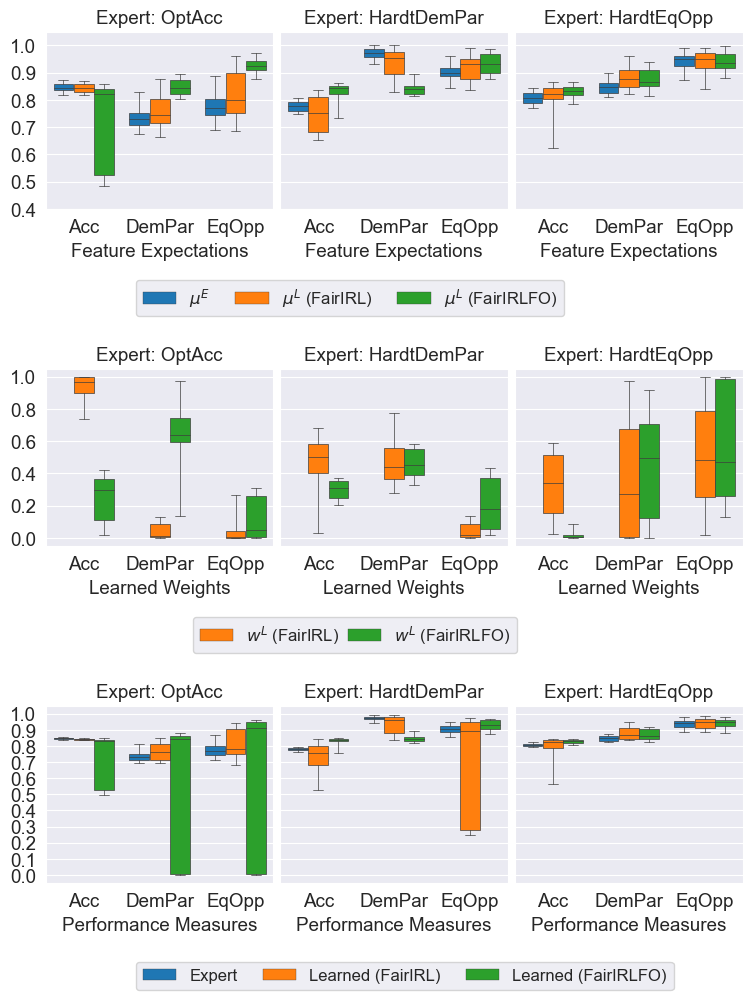

In [135]:
size_mult = 1.5
plt.rc('axes', titlesize=9*size_mult)     # fontsize of the axes title
plt.rc('axes', labelsize=9*size_mult)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=9*size_mult)    # fontsize of the tick labels
plt.rc('ytick', labelsize=9*size_mult)    # fontsize of the tick labels
plt.rc('ytick', labelsize=9*size_mult)    # fontsize of the tick labels
plt.rc('legend', fontsize=8*size_mult)    # legend fontsize
plt.rc('figure', titlesize=9*size_mult)  # fontsize of the figure title

print('Experiment ID:', exp_info['EXPERIMENT_NAME'])
    
fig, axes, mu_dfs, w_dfs, perf_dfs = plot_results_source_domain_only(
    feat_objective_set_names=base_exp_info['FEAT_EXP_OBJECTIVE_NAMES'],
    perf_objective_set_names=base_exp_info['PERF_MEAS_OBJECTIVE_NAMES'],
#     expert_algos=np.unique([exp['EXPERT_ALGO'] for exp in experiments]),
    expert_algos=['OptAcc', 'HardtDemPar', 'HardtEqOpp'],
    dataset=base_exp_info['DATASET'],
    mu_noise_factor=.05,
    perf_noise_factor=.01,
    w_noise_factor=.01,
    mu_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    perf_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    w_hue_order=[None, 'wL (FairIRL)', 'wL (FairIRLFO)'],
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
    min_mu_value=0.4,
    max_mu_value=1,
    min_w_value=0,
    mu_yticks=np.linspace(0, 1, 11).round(1),
    mu_ylim=(.4, 1.05),
    mu_whis=[1, 99],
    w_yticks = np.linspace(0, 1, 6).round(1),
    w_ylim=(-.05, 1.05),
    w_whis=[5, 95],
    perf_ylim=(-.05, 1.05),
    perf_yticks=np.linspace(0, 1, 11).round(1),
    size_mult=size_mult,
)

# Compare results with target domain

Experiment ID: thesis_7
SOURCE DATASET: Boston
TARGET DATASET: COMPAS


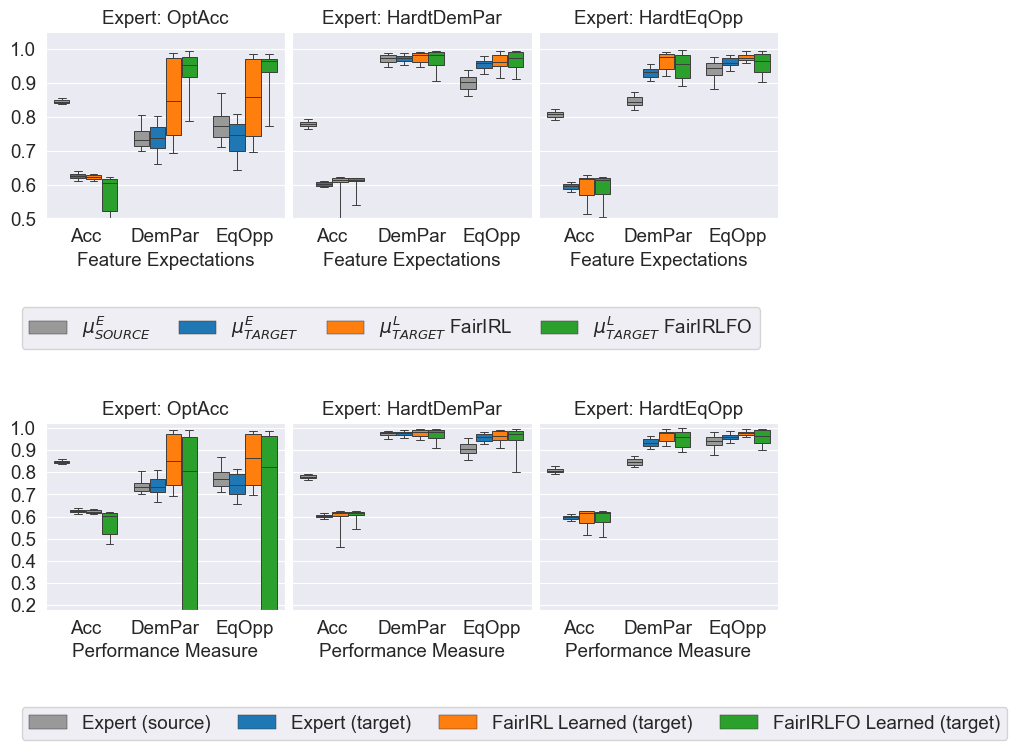

In [131]:
## plt.rc('axes', titlesize=11)     # fontsize of the axes title
size_mult = 1.5
plt.rc('axes', labelsize=9*size_mult)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=9*size_mult)    # fontsize of the tick labels
plt.rc('ytick', labelsize=9*size_mult)    # fontsize of the tick labels
plt.rc('legend', fontsize=9*size_mult)    # legend fontsize
plt.rc('figure', titlesize=9*size_mult)  # fontsize of the figure title

print('Experiment ID:', exp_info['EXPERIMENT_NAME'])

result, mu_df, w_df, perf_df = plot_results_target_domain(
    feat_objective_set_names=base_exp_info['FEAT_EXP_OBJECTIVE_NAMES'],
    perf_objective_set_names=base_exp_info['PERF_MEAS_OBJECTIVE_NAMES'],
#     expert_algos=np.unique([exp['EXPERT_ALGO'] for exp in experiments]),
    expert_algos=['OptAcc', 'HardtDemPar', 'HardtEqOpp'],
    source_dataset=base_exp_info['DATASET'],
    target_dataset=base_exp_info['TARGET_DATASET'],
    mu_noise_factor=.001,
    extra_skip_conditions=skip_by_name,
    min_exp_timestamp=min_exp_timestamp,
    min_mu_value=.4,
    mu_yticks=np.linspace(0, 1, 11).round(1),
    mu_ylim=(.5, 1.05),
    mu_whis=[5, 95],
    perf_noise_factor=.01,
    perf_hue_order=['muE', 'muL (FairIRL)', 'muL (FairIRLFO)'],
    perf_yticks=np.linspace(.2, 1, 9).round(1),
    perf_ylim=(.18, 1.02),
    size_mult=size_mult,
)

# Scratch

In [170]:
exp_info = dict(base_exp_info)
exp_info['FEAT_EXP_OBJECTIVE_NAMES'] = [
    'TPR_Z0', 'TPR_Z1',
#     'TNR_Z0', 'TNR_Z1',
    'FPR_Z0', 'FPR_Z1',
#     'FNR_Z0', 'FNR_Z1',
#     'Acc',
#     'DemPar',
#     'EqOpp',
#     'PredPar',
]
exp_info['RESTRICT_Y_ACTION'] = True

X, y, ft = generate_compas_dataset(20_000)
# X, y, ft = generate_adult_dataset(20_000)

# Initiate objectives
objectives = []
for obj_name in exp_info['FEAT_EXP_OBJECTIVE_NAMES']:
    objectives.append(OBJ_LOOKUP_BY_NAME[obj_name]())
feat_obj_set = ObjectiveSet(objectives)
del objectives
# Reset the objective set since they get fitted in each trial run
feat_obj_set.reset()


X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=.2,
)
del X, y


# Fit a classifier that predicts `y` from `X`.
clf = sklearn_clf_pipeline(
    feature_types=ft,
    clf_inst=RandomForestClassifier(),
)
clf.fit(X_train, y_train)

# Initiate variables needed to run IRL Loop
x_cols = (
    ft['boolean']
    + ft['categoric']
    + ft['continuous']
)
x_cols.remove('z')

# wi = [.2, .3, -.15, -.2]  # .598, .881, .906
# wi = [.195, .22, -.205, -.17]  # .608, .984, .994
wi = [.2, .3, .15, .2]  # .598, .881, .906
# wi = [.9, .02, .02]


reward_weights = { obj.name: wi[j] for j, obj in enumerate(feat_obj_set.objectives) }

test_df = X_test.copy()
test_df['y'] = y_test
# test_df = X_train.copy()
# test_df['y'] = y_train
# test_df['y'] = clf.predict(X_test)

clf_pol = compute_optimal_policy(
    clf_df=test_df,  # NOT the dataset used to train the C_{Y_Z,X} clf
    clf=clf,
    x_cols=x_cols,
    obj_set=feat_obj_set,
    reward_weights=reward_weights,
    skip_error_terms=True,
    method=exp_info['METHOD'],
    min_freq_fill_pct=exp_info['MIN_FREQ_FILL_PCT'],
)

demo = generate_demo(clf_pol, X_train, y_train, can_observe_y=False)
muj = feat_obj_set.compute_demo_feature_exp(demo)
print(f"\t\t muL = {np.round(muj, 3)}")


print('Acc', AccuracyObjective().compute_feat_exp(demo).round(3))
print('DemPar', DemographicParityObjective().compute_feat_exp(demo).round(3))
print('EqOpp', EqualOpportunityObjective().compute_feat_exp(demo).round(3))

display(demo.groupby(['z', 'y'])[['yhat']].agg(['count', 'mean', 'sum']))
display(demo.groupby(['z'])[['yhat']].agg(['count', 'mean', 'sum']))

		 muL = [0.748 0.776 0.503 0.396]
Acc 0.605
DemPar 0.947
EqOpp 0.972


yhat                  
    count      mean     sum
z y                        
0 0  4608  0.496745  2289.0
  1  4768  0.748112  3567.0
1 0  2650  0.604151  1601.0
  1  1970  0.776142  1529.0

yhat                  
  count      mean     sum
z                        
0  9376  0.624573  5856.0
1  4620  0.677489  3130.0

# HW Scratch

In [11]:
from math import comb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Problem 1

In [28]:
def expected_4_cliques(n, p):
    return comb(n, 4) * p**6

In [45]:
def thresh_4_clique(n):
    return comb(n, 4)**(-(1/6))

In [120]:
expected_4_cliques(int(1e15), p=1e-9)

41666.66666666643

100000 0.0007883266647717149
1000000 0.0001698383027949114
10000000 3.659052019222436e-05


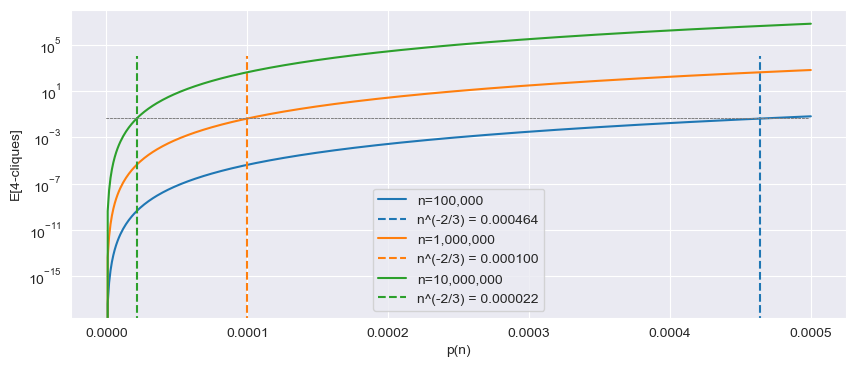

In [237]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
cp = sns.color_palette()

for i, n in enumerate([100_000, 1_000_000, 10_000_000]):
    x = np.linspace(0, .0005, 501)
    y = [expected_4_cliques(n, p) for p in x]
    ax.plot(x, y, label=f"n={n:,}", c=cp[i])
    ax.set_xlabel('p(n)')
    ax.set_ylabel('E[4-cliques]')
    print(n, thresh_4_clique(n))
    
    thresh = n**(-2/3)
    threshx = [thresh for _ in range(10)]
    threshy = np.linspace(0, 1e4, 10)
    ax.plot(threshx, threshy, ls='--', label=f"n^(-2/3) = {thresh:.6f}", c=cp[i])
    
    x2 = np.linspace(0, .95*ax.get_xlim()[1], 2)
    y2 = .05*np.ones(2)
    ax.plot(x2, y2, ls='--', lw=.5, c='gray')

# ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
pass

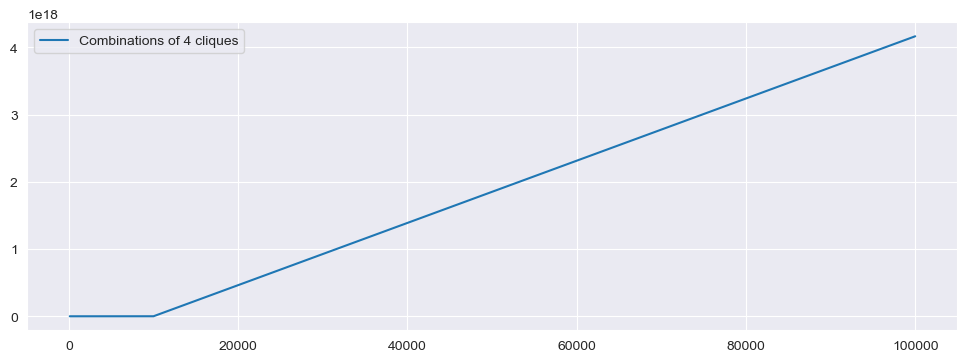

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
x1 = [100, 1_000, 10_000, 100_000]
y1 = [comb(n, 4) for n in x1]
x2 = np.linspace(0, 1, 101)
y2 = [p**6 for p in x2]
ax.plot(x1, y1, label='Combinations of 4 cliques')
# ax.plot(x2, y2, label='p^6(n)')
ax.legend()

In [42]:
comb(1000, 4) * 2**(-(comb(4, 2)))

647142574.21875

In [43]:
2**(-(comb(4, 2)))

0.015625

### Problem 4

In [157]:
def prob_vertex_has_deg_k(n, k, p):
    return comb(n, k) * (p**k) * (1-p)**(n-k)

In [197]:
k_range = [
    3,
    int(np.log(n)),
    int(np.sqrt(n)),
    int(n-1),
]
n = 1_000
d = 100
p = d / n

for k in k_range:
    output = n * comb(n, k) * (p**k)
    print(k, ':', output)

3 : 166167000.00000003
6 : 1368173298991.5005
31 : 7.602322407769473e+30
999 : 0.0
